# Pandas: exploratory data analysis

### План:
* Соединения таблиц
* Типы переменных
* Работа с категориальными переменными
* Работа с датой и временем
* Пропущенные значения
* Обнаружение аномалий

In [4]:
%pip install numpy
%pip install pandas
%pip install scipy
%pip install matplotlib
%pip install seaborn




Note: you may need to restart the kernel to use updated packages.
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   -------------------------- ------------- 5.2/7.8 MB 29.0 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 32.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 30.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 36.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



Также по ходу знакомимся с визуализацией, но подробнее об этом на следующей паре

In [5]:
import numpy as np         # библиотека для матриц и математики
import pandas as pd        # библиотека для работы с табличками
from scipy import stats    # модуль для работы со статистикой

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')    # стиль графиков
%matplotlib inline 

## Соединения таблиц

Часто хранить информацию в одной таблице бывает довольно неудобно. Когда у вас очень крупная IT-компания, данных настолько много, что если их добавить в одну таблицу, работать с ней будет очень неэффективно по времени и памяти. Поэтому информацию кладут в кучу разных таблиц, а над ними строят специальные *отношения* - так называемые колонки, по которым можно эти таблицы объединять. 

Пример устройства такой структуры хранения данных:

### 1. Join

In [7]:
df1 = pd.DataFrame({
    'Student': ['Tom', 'Ujin', 'Ann', 'Polina','Sam'],
    'group': ['01', '02', '02', '01','02'],
})
df2 = pd.DataFrame({
    'Name': ['Tom', 'Ujin', 'Ann', 'Polina', 'Kit'],
    'GPA': ['7.8', '6.4', '8.3', '9', '10'],
})
display(df1, df2)

,Student,group
0,Tom,01
1,Ujin,02
2,Ann,02
3,Polina,01
4,Sam,02


,Name,GPA
0,Tom,7.8
1,Ujin,6.4
2,Ann,8.3
3,Polina,9
4,Kit,10


In [8]:
# inner join по умолчанию 
pd.merge(df1, df2, left_on='Student', right_on='Name')

,Student,group,Name,GPA
0,Tom,01,Tom,7.8
1,Ujin,02,Ujin,6.4
2,Ann,02,Ann,8.3
3,Polina,01,Polina,9


In [9]:
# left join - оставляем все, что в левой таблице
pd.merge(df1, df2, left_on='Student', right_on='Name', how='left')

,Student,group,Name,GPA
0,Tom,01,Tom,7.8
1,Ujin,02,Ujin,6.4
2,Ann,02,Ann,8.3
3,Polina,01,Polina,9
4,Sam,02,NaN,NaN


In [10]:
# outer join
pd.merge(df1, df2, left_on='Student', right_on='Name', how='outer')

,Student,group,Name,GPA
0,Ann,02,Ann,8.3
1,NaN,NaN,Kit,10
2,Polina,01,Polina,9
3,Sam,02,NaN,NaN
4,Tom,01,Tom,7.8
5,Ujin,02,Ujin,6.4


### 2. Конкатенация строк

In [11]:
df1 = pd.DataFrame({'name': ['Max', 'Phil', 'Vlad', 'Nastya'], 'students': [20, 21, 30, 42]})
df2 = pd.DataFrame({'name': ['Ahmed', 'Andrey'], 'students': [50, 40]})

display(df1, df2)

,name,students
0,Max,20
1,Phil,21
2,Vlad,30
3,Nastya,42


,name,students
0,Ahmed,50
1,Andrey,40


In [15]:
pd.concat([df1, df2]).reset_index(drop=True)

,name,students
0,Max,20
1,Phil,21
2,Vlad,30
3,Nastya,42
4,Ahmed,50
5,Andrey,40


### Пример на клипах по ютубу

Работать в дальнейшем будем с базой данных, содержащей информацию о клипах ютуба. В базе несколько таблиц, между которыми выстроены соединения. Структура выглядит таким образом:  



<center>
<img src="https://github.com/hse-econ-data-science/dap_2021_spring/blob/main/sem09_pandas/images/struct.png?raw=true" height="300" width="1000">
</center>

__Описание колонок:__

* `id_title` $-$ уникальный id названия видео
* `id_music_style` $-$ уникальный id жанра
* `id_performer` $-$ уникальный id исполнителя
* `title` $-$ название видео
* `commentCount` $-$ число комментариев
* `dislikeCount` $-$ число дизлайков
* `likeCount` $-$ число лайков
* `music_style` $-$ музыкальный стиль
* `performer` $-$ исполнитель
* `viewCount` $-$ число просмотров
* `commentators_uniq` $-$ число уникальных комментаторов
* `comments_obscene_cnt` $-$ число негативных комментариев
* `video_age` $-$ возраст видео в днях (на момент '2019-03-15')

In [17]:
# подгрузим все таблицы
df_perf = pd.read_csv('data/performer_table.csv', sep=';')
df_title = pd.read_csv('data/title_table.csv', sep=';')
df_genre = pd.read_csv('data/music_style_table.csv', sep=';')

df_stat = pd.read_csv('data/title_stat_table.csv', sep=';')

### Задача №1:

Какой исполнитель получает больше всего хейта? (хейт определяется числом негативных комментариев) 

In [32]:
## Ваш код
max_m = max(df_stat["comments_obscene_cnt"])
# print(max_m)

# df_stat.loc[ [df_stat["comments_obscene_cnt"] == max_m] ]

In [60]:
df = pd.merge(df_stat, df_perf, left_on = 'id_performer', right_on='id_performer')
# agg = df.groupby('performer')['comments_obscene_cnt'].sum()

# agg.sort_values(ascending=False)[:10]


### Задача №2:

Для каждого жанра выведите число просмотров самого популярного клипа? Кто его исполнитель? Как называется клип?

In [64]:
## Ваш код

# df = pd.merge(df, df_title, on='id_title')
# df = pd.merge(df, df_genre, on='id_music_style')

# df['music_style']
agg = df.groupby('music_style')['viewCount'].idxmax()
agg

music_style
classic     9256
estrada    13660
indi       10301
popsa       2409
rap        18293
rock        7229
shanson    15602
Name: viewCount, dtype: int64

## Типы переменных

__Классификация переменных по типу данных:__  

* `int` $-$ числовой, целые числа (1000, 0, -1)
* `float` $-$ числовой, вещественные числа (1.0, 2.564523)
* `object` $-$ строковый (бутырка, JPMorgan, f12aaz//)
* `bool` $-$ булевский (True, False)
* `datetime` $-$ дата (2020-01-12, 23.Jan.20)


__Классификация переменных по смыслу:__  

* `Непрерывные` $-$ содержат непрерывное множество значений на каком-то промежутке (з/п, рост человека, вес буханки хлеба и тд)
* `Категориальные` $-$ содержат конечное небольшое множество значений (возраст детей, тип магазина)
* `Бинарные` $-$ подтип категориальной переменной, имеющей только 2 категории (пол, столицы двух стран)

In [ ]:
# количественная (числовая)
# 1. непрерывная
# 2. дискретная (можно посчитать целочисленно)

# категориальная (качественная)
# 1. номинальная (фрукты)
# 2. порядковая (уровень образования)
# 3. бинарная

In [65]:
df = pd.read_csv('data/youtube_data_short.csv', sep='\t')

In [66]:
# смотрим на типы переменных 
df.dtypes

title                    object
commentCount            float64
dislikeCount            float64
likeCount               float64
music_style              object
performer                object
viewCount               float64
commentators_uniq       float64
comments_obscene_cnt    float64
video_age                 int64
dtype: object

## Работа с категориальными переменными

### Когда категории две:

Отберем только клипы жанра `rock` и `rap`. Представим, что только они нас интересуют. 

In [70]:
genres_to_keep = ['rock', 'rap']

df_small = df[df.music_style.isin(genres_to_keep)]
# df_small = df[df['music_style'].isin(genres_to_keep)]
df_small.head()

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age
8,"""Hey Tovarish"" Video Shooting",10.0,1.0,34.0,rock,мумий_тролль,3815.0,9.0,0.0,2539
15,"""SOS Матросу!"" - тизер фильма",10.0,4.0,68.0,rock,мумий_тролль,7632.0,5.0,0.0,1739
36,"""ВОИН ДУМА""",4.0,0.0,49.0,rock,король_и_шут,1950.0,NaN,NaN,3819
38,"""Виктор Цой. 50 лет"" Кукрыниксы - Печаль, Конч...",2.0,4.0,65.0,rock,кукрыниксы,9986.0,2.0,0.0,2351
40,"""Всё, что было"". Начало.",23.0,5.0,171.0,rock,ария,11168.0,21.0,1.0,2351


В таком "поддатафрейме" наша колонка `music_style` **имеет тип object** (т.к. в ней находятся строки), а также **является бинарной**, так как содержит всего два значения (`rock` и `rap`)

Однако проблема строковых переменных в том, что многие модели не умеют с ними работать. Компьютеру привычнее оперировать с числами. 

Именно поэтому над строковыми бинарными переменными производят нехитрые манипуляции. Либо кодируют их в числа 1 / 0, либо создают булевский тип True / False, что в какой-то степени тоже самое. 

Попробуем преобразовать нашу бинарную строковую переменную music_style:

In [73]:
d = {'rock': 1, 'rap': 0}

df_small['is_rock'] = df_small['music_style'].map(d)

C:\Users\guppi\AppData\Local\Temp\ipykernel_47964\2939754451.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['is_rock'] = df_small['music_style'].map(d)


In [74]:
df_small.head(2)

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age,is_rock
8,"""Hey Tovarish"" Video Shooting",10.0,1.0,34.0,rock,мумий_тролль,3815.0,9.0,0.0,2539,1
15,"""SOS Матросу!"" - тизер фильма",10.0,4.0,68.0,rock,мумий_тролль,7632.0,5.0,0.0,1739,1


### Задача №3: 
Какая доля наблюдений обоих жанров?

In [80]:
## Ваш код
df_small['is_rock'].value_counts()


is_rock
1    5888
0    2028
Name: count, dtype: int64

In [79]:
df_small['is_rock'].value_counts(normalize=True)
# df['music_style'].value_counts()

is_rock
1    0.74381
0    0.25619
Name: proportion, dtype: float64

<Axes: ylabel='proportion'>

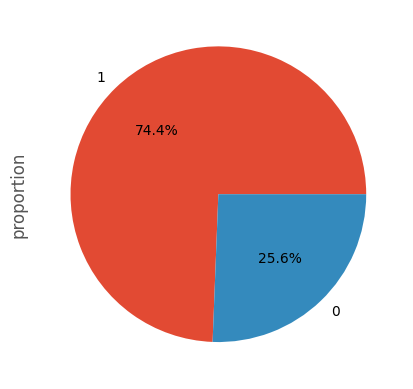

In [86]:
df_small['is_rock'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%')

### Когда категорий больше двух

Вернемся к нашему полному датафрейму. В нем music_style принимает не 2 значения, а целых 7. Что делать в таком случае?

**Наивный метод:** Давайте каждому значению из music_style сопоставим какое-нибудь число. Такой метод называется Label Encoding. Заранее подумайте, какие проблемы может создать такой способ?

In [ ]:
df1 = sorted(df.music_style.unique())
df1

['classic', 'estrada', 'indi', 'popsa', 'rap', 'rock', 'shanson']

In [92]:
# создадим словарь
d = dict(zip(df.music_style.unique(), np.arange(7)))
print(d)

# сделаем преобразование
df['music_style_int'] = df['music_style'].map(d)

{'popsa': np.int64(0), 'rock': np.int64(1), 'classic': np.int64(2), 'indi': np.int64(3), 'estrada': np.int64(4), 'shanson': np.int64(5), 'rap': np.int64(6)}


Однако проблема такого способа в том, что мы непроизвольным образом установили **порядок** на наших категориях:
$6 > 5 > 4 > 3 > 2 > 1 > 0 \Rightarrow rap > shanson > estrada > indi > classic > rock > popsa$ 


Чтобы такого избежать, чаще используется другой метод: **One Hot Encoding**

В pandas такое преобразование можно сделать с помощью функции `get_dummies()`

In [93]:
pd.get_dummies(df['music_style']).head()

,classic,estrada,indi,popsa,rap,rock,shanson
0,False,False,False,True,False,False,False
1,False,False,False,True,False,False,False
2,False,False,False,True,False,False,False
3,False,False,False,True,False,False,False
4,False,False,False,True,False,False,False


Такой метод тоже имеет свои проблемы, которые выходят за рамки нашего курса. Например, это полная мультиколлинеарность (или линейная зависимость) столбцов. Подробнее об этом можно посмотреть здесь: https://www.youtube.com/watch?v=k9PPuTmTLMk

## Работа с датой и временем

Для даты и времени в python есть свой тип переменных: datetime / timestamp. Все полезные методы, оперирующие над датами можно найти либо в пакете pandas, либо в дополнительном пакете `datetime`

In [94]:
# получим дату из строки
pd.to_datetime('01/01/20')

Timestamp('2020-01-01 00:00:00')

In [95]:
# можно получить сегодняшнее число
from datetime import datetime

datetime.today()

datetime.datetime(2024, 11, 18, 19, 5, 32, 707318)

In [96]:
# какой сегодня год?
datetime.today().year

2024

In [97]:
# преобразуем в строку удобного нам формата
datetime.today().strftime('%d/%m/%Y')

'18/11/2024'

In [98]:
from datetime import timedelta

# какой месяц был 50 дней назад?
(datetime.today() - timedelta(days=50)).month

9

### Задача №4: 

В нашем датасете есть колонка `video_age`, которая показывает нам возраст нашего клипа в днях с 15 марта 2019 года. Опираясь на нее, получите для каждого клипа дату его публикации и сохраните в новую колонку. 

In [118]:
## Ваш код
datetime(2019, 3, 15) - df['video_age'].apply(lambda x: timedelta(days=x))
# df['date'] = datetime(2019, 3, 15) - df['video_age'].apply(lambda x: timedelta(days=x))
# df = df.drop(columns=['date'])
# df['date'] = datetime(2019, 3, 15) - df['video_age'].apply(lambda x: timedelta(days=x))
df['year'] = df['date'].dt.year
# df

### Задача №5:

Какое распределение кол-ва выпущенных клипов по годам? 

In [109]:
## Ваш код
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19124 entries, 0 to 19123
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   title                 19124 non-null  object        
 1   commentCount          18914 non-null  float64       
 2   dislikeCount          18850 non-null  float64       
 3   likeCount             18850 non-null  float64       
 4   music_style           19124 non-null  object        
 5   performer             19124 non-null  object        
 6   viewCount             19123 non-null  float64       
 7   commentators_uniq     12314 non-null  float64       
 8   comments_obscene_cnt  12314 non-null  float64       
 9   video_age             19124 non-null  int64         
 10  music_style_int       19124 non-null  int64         
 11  date                  19124 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(2), object(3)
memory usage: 1.8+ M

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age,music_style_int,date
0,"""#2Маши ""Свободные линии""",34.0,43.0,1402.0,popsa,2маши,214301.0,24.0,0.0,1141,0,2016-01-29
1,"""ALARM"" СЕРГЕЙ ЛАЗАРЕВ ( SERGEY LAZAREV )",NaN,690.0,10532.0,popsa,лазарев,2221419.0,NaN,NaN,3217,0,2010-05-24
2,"""EARTH SONG"" SERGEY LAZAREV. DEDICATED TO MIC...",26.0,10.0,269.0,popsa,лазарев,40327.0,23.0,0.0,3546,0,2009-06-29
3,"""Earth song"" премия МУЗ-тВ 2010 (LIVE)",12.0,7.0,163.0,popsa,лазарев,11907.0,11.0,0.0,3189,0,2010-06-21
4,"""FAKE"" СЕРГЕЙ ЛАЗАРЕВ (SERGEY)",46.0,19.0,597.0,popsa,лазарев,91483.0,33.0,1.0,3361,0,2009-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...
19119,♫♪Мы расстаемся ♫♪ Бутырка new2019,2.0,0.0,11.0,shanson,бутырка,1107.0,NaN,NaN,44,5,2019-01-30
19120,❤ 2 ЧАСА ❤ МОЦАРТ Для Младенцев - Колыбельная ...,94.0,431.0,1837.0,classic,classical_channel,391836.0,37.0,1.0,239,2,2018-07-19
19121,モスクワライブショー ' 17,4872.0,15494.0,30603.0,rap,элджей,1187340.0,1788.0,352.0,339,6,2018-04-10
19122,舞梅鬼 - 新年好宝贝 / Mumiy Troll - Happy New Year ...,59.0,10.0,260.0,rock,мумий_тролль,10147.0,19.0,0.0,997,1,2016-06-21


### Задача №6:

Выведите месяц, в течение которого на ютуб опубликовали больше всего клипов

In [120]:
## Ваш код
df['month'] = df['date'].dt.month_name()


## Пропущенные значения

Пропуски в данных $-$ это противная проблема, с которой можно столкнуться при работе. Пропуски возникают практически всегда. Причинами пропусков может быть, например, технические возможности вашего парсера, который не смог достать часть информации из сайта, либо, например, если вы Юрий Дудь и опрашиваете людей об их заработке, собирая статистику для дальнейшего исследования, то вряд ли каждый человек захочет вам ответить. 

### Выявление

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19124 entries, 0 to 19123
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   title                 19124 non-null  object        
 1   commentCount          18914 non-null  float64       
 2   dislikeCount          18850 non-null  float64       
 3   likeCount             18850 non-null  float64       
 4   music_style           19124 non-null  object        
 5   performer             19124 non-null  object        
 6   viewCount             19123 non-null  float64       
 7   commentators_uniq     12314 non-null  float64       
 8   comments_obscene_cnt  12314 non-null  float64       
 9   video_age             19124 non-null  int64         
 10  music_style_int       19124 non-null  int64         
 11  date                  19124 non-null  datetime64[ns]
 12  year                  19124 non-null  int32         
 13  month           

In [124]:
df.isnull().sum()
# df.isna().sum()

title                      0
commentCount             210
dislikeCount             274
likeCount                274
music_style                0
performer                  0
viewCount                  1
commentators_uniq       6810
comments_obscene_cnt    6810
video_age                  0
music_style_int            0
date                       0
year                       0
month                      0
dtype: int64

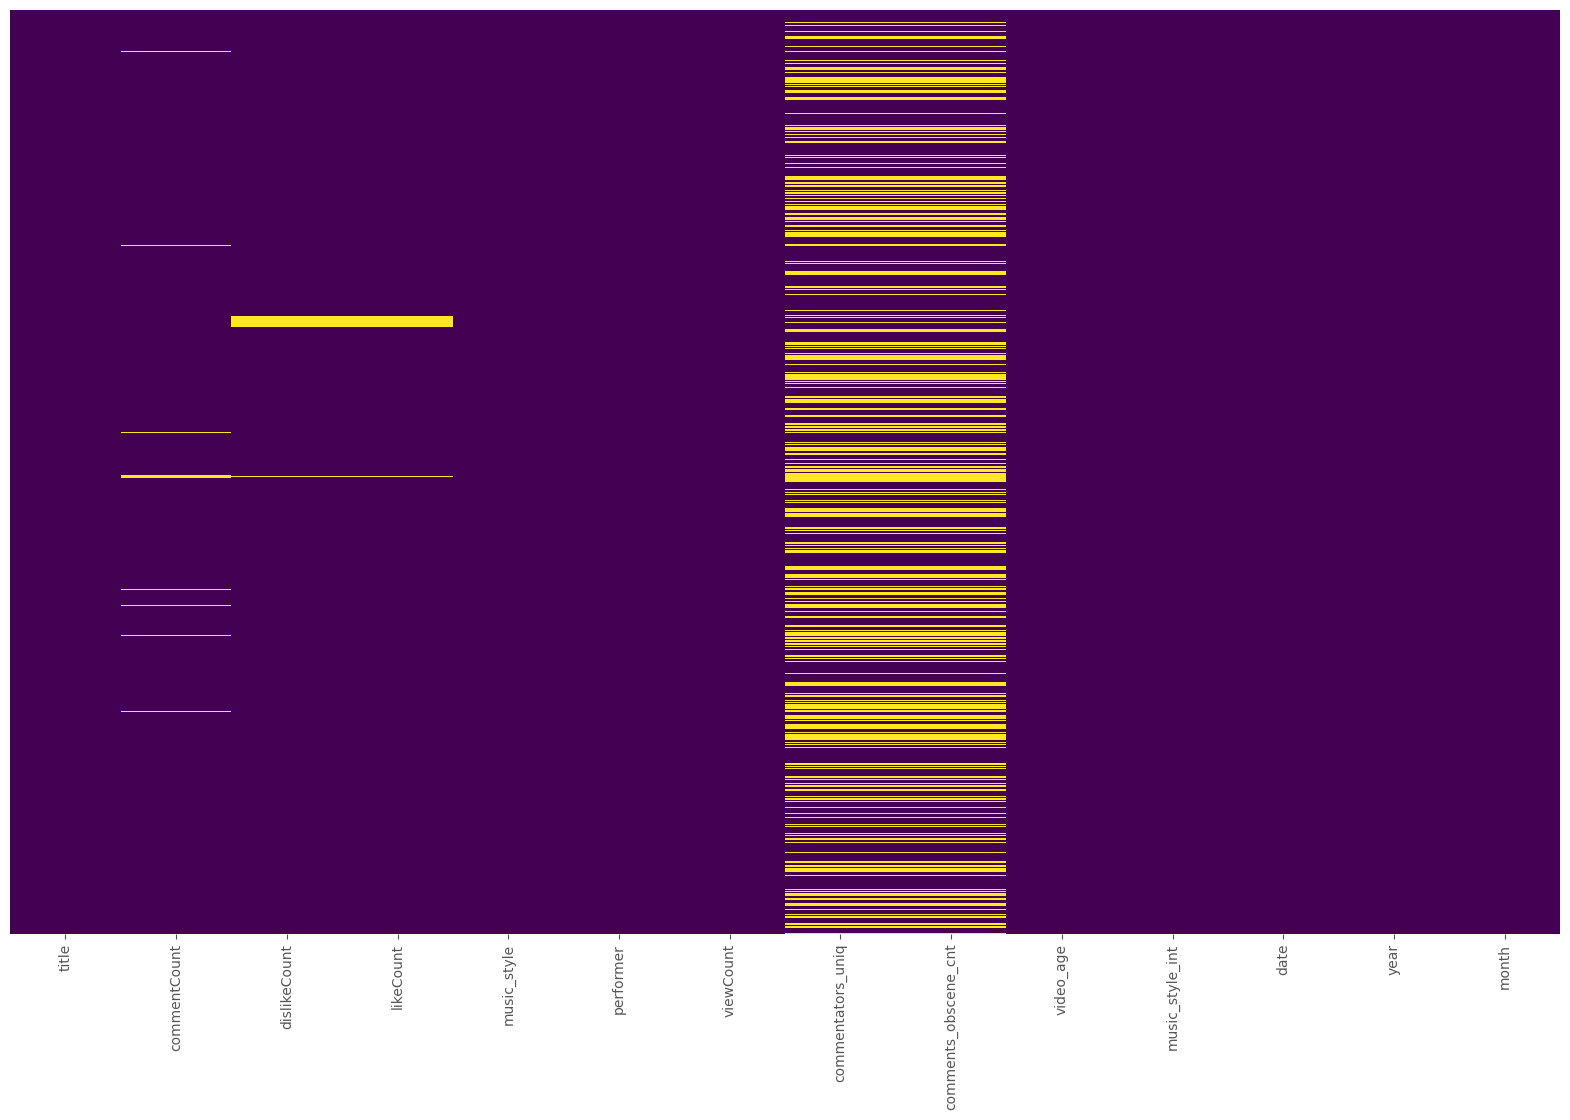

In [127]:
fig, ax = plt.subplots(figsize=(20, 12))
sns_heatmap = sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Удаление

In [128]:
print(df.shape)

# по умолчанию удаляет строки, где есть na
print(df.dropna().shape)

# можем удалять столбцы, где есть хотя бы один пропуск
print(df.dropna(axis=1).shape)

(19124, 14)
(12116, 14)
(19124, 8)


Часто удаление слишком дорогая операция, так как избавляемся от кучи данных, которых и так частенько бывает мало

### Заполнение

In [129]:
# было
ser = pd.Series([24, np.nan, 27, 2])
ser

0    24.0
1     NaN
2    27.0
3     2.0
dtype: float64

In [130]:
# заполняем нулем
ser.fillna(0).head()

0    24.0
1     0.0
2    27.0
3     2.0
dtype: float64

In [131]:
# заполняем предыдущим значением
ser.fillna(method='ffill').head()

C:\Users\guppi\AppData\Local\Temp\ipykernel_47964\3150618662.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ser.fillna(method='ffill').head()


0    24.0
1    24.0
2    27.0
3     2.0
dtype: float64

In [132]:
# заполняем последующим значением
ser.fillna(method='bfill').head()

C:\Users\guppi\AppData\Local\Temp\ipykernel_47964\368201073.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ser.fillna(method='bfill').head()


0    24.0
1    27.0
2    27.0
3     2.0
dtype: float64

### Задача №7:

Заполните пропуски в столбцах таблицы по клипам средними

In [134]:
## Ваш код

df.mean()

TypeError: Could not convert ['"#2Маши "Свободные линии""ALARM" СЕРГЕЙ ЛАЗАРЕВ ( SERGEY LAZAREV )"EARTH SONG"  SERGEY LAZAREV. DEDICATED TO MICHAEL JACKSON ( Cover version)"Earth song" премия МУЗ-тВ 2010 (LIVE)"FAKE" СЕРГЕЙ ЛАЗАРЕВ (SERGEY)"Feelin High" Сергей Лазарев Sergey Lazarev live"Girlfriend" Сергей Лазарев (SERGEY)"Heartbeat" Сергей Лазарев (Sergey Lazarev)"Hey Tovarish" Video Shooting"LAZERBOY" Сергей Лазарев (SERGEY) feat. TИМАТИ (Timati)"LAZERBOY"( Michael Yousher videoremix) Сергей Лазарев (SERGEY) и ТИМАТИ"Lost without your love" Сергей Лазарев (SERGEY)"Love Radio": Съемки клипа НЮШИ "Наедине""Ru Music": НЮША сняла новый клип!"Ru Новости": НЮША чудом вернулась в Москву!"SOS Матросу!" - тизер фильма"STEREO" (LIVE) Сергей Лазарев (SERGEY)"Shattered dreams" Сергей Лазарев (SERGEY)"Tv or radio" Сергей Лазарев (SERGEY)"You Are The Only One" - Sergey Lazarev /MadWalk Fashion Music Show"Аве Мария" Весь зал плакал. Вика 11 лет"Антоха МС - Советы для молодожёнов /2017/""Большая семья" Игоря Крутого - часть 1"Большая семья" Игоря Крутого - часть 2"Большая семья" Игоря Крутого - часть 3"Большая семья" Игоря Крутого - часть 4"Большая семья" Игоря Крутого - часть 6"Большая семья" Игоря Крутого - часть 7"Большая семья" Игоря Крутого - часть 8"Большая семья" Игоря Крутого - часть 9"Большая семья" Игоря Николаева  - часть 2"Большая семья" Игоря Николаева - часть 1"Большая семья" Игоря Николаева - часть 3"В теме" на Ю: НЮША"В теме" на Ю: НЮША любимый артист портала Woman.ru"ВИА Гра. Тайны производства" ("Моя правда" на "СТБ")"ВОИН ДУМА""Вечерний Ургант" Валерия в гостях у Ивана Урганта."Виктор Цой. 50 лет" Кукрыниксы - Печаль, Кончится лето..."Владимирский Централ" песня под гитару"Всё, что было". Начало."Где ты" [Москва, 2012г.]"Глаза - убийцы". Первые впечатления"Глаза - убийцы". Первые впечатления"Глаза - убийцы". Первые впечатления"Глаза - убийцы". Первые впечатления"Глаза - убийцы". Первые впечатления"Говорим и показываем". Бенефис ВАЛЕРИИ! НТВ 2012"Горыгоры" - вторая песня, записанная на съемках "Вечернего Урганта""ДОЧКИ МАТЕРИ" (Audio) - гр. "Воровайки". Слова Виктории В. Ветровой, муз. Юрия Алмазова"ДОстояние РЕспублики" - Игорь Николаев (1)"ДОстояние РЕспублики" - Игорь Николаев (2)"ДОстояние РЕспублики" - Игорь Николаев (3)"ДОстояние РЕспублики" - Игорь Николаев (4)"Давайте мириться" [2011г.]"Дерево Победы 2013" в Челябинске"Дивизия" приглашает на "Городских Птичек""Дивизия" приглашает на фестиваль "Троица""Донбасс - моя Спарта". Документальный проект Максима Фадеева и Юлии Чичериной"Дорога от души к душе" [Зеленоград, 2013г.]"Ещё не вечер. Отдам все за жилье" (Елена Ваенга) 18.11.2011."Женский взгляд" Игорь Николаев и Юля Проскурякова (1)"Женский взгляд" Игорь Николаев и Юля Проскурякова (2)"Женский взгляд" Игорь Николаев и Юля Проскурякова (3)"Живут же люди!" на НТВ [2010г.]"Живут же люди" Игорь Николаев и Юля Проскурякова (1)"Живут же люди" Игорь Николаев и Юля Проскурякова (2)"Живут же люди" Игорь Николаев и Юля Проскурякова (3)"Заноза" (запись новой песни Би-2 на студии "Stasrecords")"Звёздный ринг" [2010г.]"КРАЯ РОДНЫЕ" гр. "Воровайки", слова Виктории В. Ветровой, музыка Юрия Алмазова"Как уходили кумиры.Михаил Круг" [2007г.]"Комсомольская правда": НЮША"Королевство Кривых Зеркал" Игорь Николаев (1988г.)"Король и Шут" - 15 лет"Кто хочет стать миллионером" И. Николаев и Ю. Проскурякова"Лето" 2018 | фильм Кирилла Серебренникова | тизер"Личные вещи" Игоря Николаева"Лучшее видео"- Валерия и Валерий Меладзе "Не теряй меня" Муз-Тв 2014"Любить не страшно" [Зеленоград, 2013г.]"М1": НЮША сняла клип в Киеве!"Масленица 2013" в Лондоне, выступление  Олега Газманова"Молодость" - это проза"Моя любимая кухня". Дорада на скорую руку"Моя любимая кухня". Спецвыпуск. Что мы покупаем  на рынке?"Моя правда. Михаил Круг" [2007г.]"Музыкальные пристрастия" с Артуром Гаспаряном"Мумий Тролль" уходит в море. Отход "Седова"."Мы - это LOUNA" (концерт LOUNA в ARENA MOSCOW 14.12.13)"Мы - это LOUNA" The Movie СКОРО!"НАЙДИ МЕНЯ" Сергей Лазарев (SERGEY)"НАШЕ УТРО" на концерте LOUNA в "Б2" 04.09.2011"НАШЕСТВИЕ 2013" - Алексей Горшенёв (пресс-конференция)"НЕ УБЕРЕГЛА ЛЮБОВЬ" (Audio) гр. "Воровайки", слова Виктории В. Ветровой, музыка Юрия Алмазова"Несчастный случай" в фильме "Прорва", 1992 г."Новая волна 2016" // “Уходит праздник“"Новая волна 2016" Творческий вечер Олега Газманова"Ногу Свело!" -  SOS in the Ass"Океаны" (acoustic home version)"Остров Юрий""ПОДВЕНЕЧНОЕ БЕЛОЕ ПЛАТЬЕ - 2" гр. Воровайки, слова Виктории В. Ветровой, музыка Юрия Алмазова"ПОДВЕНЕЧНОЕ БЕЛОЕ ПЛАТЬЕ" (1-ая)-гр. "Воровайки", слова Виктории В. Ветровой, муз. Юрия Алмазова"ПОРУЧИК""Партийная ZONA" на МУЗ ТВ: Интервью с НЮШЕЙ"Партийная ZONA" на МУЗ ТВ: НЮША"Первая четверть" Юбилейный концерт в Олимпийском (анонс)"Первая четверть" юбилейный концерт Дианы Арбениной. Ночных Снайперов в Олимпийском"Перелётная птица" [Москва, 2012г.]"Пока ещё не поздно". Михаил Круг. Жизнь и любовь. [2013г.]"Пока ещё не поздно". Михаил Круг. Любовь и смерть. [2013г.]"Последний герой" с Дианой Арбениной - премьера второго сезона!"Последний герой: Павел Кашин (тизер программы от 15.02.2017)"Приходите в мой дом" [Москва, 2012г.]"Прости меня". Концерт памяти М.Танича [2012г.]"Прости меня". Ээхх, Разгуляй [2014г.]"Простые вопросы." Амур-Инфо. 22 марта 2013."Пусть говорят" [2008г.]"Пусть говорят" [2013г.]"Пусть говорят.Звездный бэби-бум" [2013г.]"РАЗЛУКА" исполняет гр. "Воровайки", слова Виктории В. Ветровой, музыка Юрия Алмазова"Радио 101" - 5-летний юбилей"Ракеты из России" на "Нашествии 2012": рубилово под Nirvana"Русский чарт" с НЮШЕЙ на МУЗе"Русский чарт" с НЮШЕЙ на МУЗе"Русский чарт" с НЮШЕЙ на МУЗе"Сказочка" [Зеленоград, 2013г.]"Спокойной ночи, малыши" с участием Валерии"Сто вопросов к взрослому" - Игорь Николаев (часть 1)"Сто вопросов к взрослому" - Игорь Николаев (часть 2)"Сто вопросов к взрослому" - Игорь Николаев (часть 3)"Сто вопросов к взрослому" - Игорь Николаев (часть 4)"Стол заказов" на RU.TV: НЮША"Субботник по-арийски""Субботник" с Игорем Николаевым и Юлей Проскуряковой"Тебе, моя последняя любовь" [Зеленоград, 2013г.]"Тебе, моя последняя любовь" [Шансон года-2012]"Топ лист. Итоги года" на RU.TV: НЮША"УКРАДЕННАЯ ЛЮБОВЬ" (AUDIO) - гр. "Воровайки". Слова Виктории В. Ветровой, муз. Юрия Алмазова"Утро России" на "Россия 1": НЮША"Утро России": О мультфильме "Семейка Крудс""Хочу в ВИА Гру" (Выпуск №1. Кастинг в Украине)"Хочу в ВИА Гру" (Выпуск №2. Кастинг в России)"Хочу в ВИА Гру" (Выпуск №3. Кастинг в Казахстане и Белоруссии)"Хочу в ВИА Гру" (Выпуск №4. Второй тур)"Хочу в ВИА Гру" (Выпуск №5. Борьба за наставниц)"Хочу в ВИА Гру" (Выпуск №6. Полуфинал)"Хочу в ВИА Гру" (Выпуск №7. Финал)"Хочу в ВИА Гру" (Выпуск №8. Гранд-финал)"Хочу в ВИА Гру". Дополнительный кастинг в Киеве"Хочу в ВИА Гру". Замужество или ВИА Гра?"Хочу в ВИА Гру". Звание прапорщика или ВИА Гра?"Хочу в ВИА Гру". Смогут ли бывшие солистки ужиться друг с другом и помочь Константину Меладзе?"Хочу в ВИА Гру". Финальный гала-концерт шоу. 20 октября в Crocus City Hall"Хочу в ВИА Гру". Финальный гала-концерт шоу. 20 октября в Crocus City Hall"Хочу в ВИА Гру". Шестой размер или четыре октавы?"Частная история: Валерия""Честное слово с Юрием Николаевым".  Гость Сергей Лазарев.  Выпуск от 08.10.2017"Чистосердечное признание" [2008г.]"Чрезвычайные истории" [2007г.]"Школа выживания" от Арии"Я прочитаю в глазах твоих". Концерт ко дню города"Я так люблю тебя, когда ты далеко" [Москва, 2012г.]# 2 МАШИ  "Теперь Нас Двое"# 2 Маши " Мысли" ..# 2 Маши - "Теперь нас двое"#16плюсTour @ Stadium Live - новый проект на planeta.ru#2 Маши   "Свободные линии"#2Mashi  - Descalza  (Acoustic)#2Mashi - Descalza#2Maши VLOG  [ Как мы снимали клип на песню "Мама, я Танцую" ]#2МАШИ "ИЗВЕСТИЯ HALL"  [ 22.10.2017 ]#2МАШИ "Теперь нас двое" (ТИЗЕР)#2МАШИ - ФИЛЬМ о СТЕРВЫХ  и РЕЖИССЕРКАЯ версия КЛИПА#2МАШИ - ЭКСКЛЮЗИВ !  RUTV со съемок клипа!!#2Маши   "Мы выбираем" рядио МАЯК LIVE#2Маши   "Стервы"  LIVE#2Маши  "Мы выбираем" LIVE !#2Маши  "тут тебя жду тебя я"#2Маши  - "СТЕРВЫ"   Квартирник.#2Маши  - Красное Белое [ AUDIO ]#2Маши  Фотосессия #backstage#2Маши "Босая"  ТИЗЕР#2Маши "Босая" ( КАРАОКЕ )#2Маши "Босая" (Акустика LIVE) Живой звуК#2Маши "Босая" [ репетиция для Вечернего УРГАНТА" ]#2Маши "Вселенная У."#2Маши "МАМА, Я ТАНЦУЮ " [ ПРЕМЬЕРА КЛИПА ]#2Маши "Мама, я танцую" ПРЕМЬЕРА  [ AUDIO ]#2Маши "Мир раскололся на 2 части" [Live Session]#2Маши "Мы выбираем" Backstage !!#2Маши "Мы выбираем" ТИЗЕР#2Маши "Наше кино про поездку в Таллин" [ Март 2018 ]#2Маши "Птицы"#2Маши "СВОБОДНЫЕ ЛИНИИ" VOLTA#2Маши "Теперь нас двое" LIVE Session#2Маши "Теперь нас двое" улично Питерский  вариант#2Маши "Тут тебя жду тебя я "#2Маши "Факты"  [ официальный клип ]#2Маши "Я К ТЕБЕ"#2Маши "с приветом с чудо острова Koh Phangan"#2Маши -  Босая ( Lyric Video / Лирик Видео ) ПРЕМЬЕРА#2Маши - "Мы голосуем"#2Маши - "СТЕРВЫ"#2Маши - "Тут тебя жду тебя я"#2Маши - 16Тонн#2Маши - Босая#2Маши - Босая#2Маши - ВРЕМЯ [ Премьера 2017 ]#2Маши - Выступление в ночном  клубе#2Маши - Красное Белое#2Маши - Мы выбираем (live)#2Маши - Мы выбираем (клип)#2Маши - Стервы (Премьера клипа, 2017)#2Маши - Факты [ AUDIO ]#2Маши - как мы записывали "Звезды"#2Маши - сюжет RUTV  о концерте в ИЗВЕСТИЯ Hall#2Маши 4 ноября в RED#2Маши Mannequin Challenge#2Маши «Время» (Acoustic LIVE)#2Маши «Звёзды» [ прогулка по Бурано•Италия]#2Маши «Рижский влог»#2Маши «Сезоны» [ Lyric Video ]#2Маши Время [AUDIO]#2Маши Квартирник#2Маши МАЯК "Теперь нас двое"#2Маши НА КУХНЕ  "Красное - Белое"#2Маши НА КУХНЕ "Босая"#2Маши НА КУХНЕ "ЗВЕЗДЫ"#2Маши Радио Маяк#2Маши СЮЖЕТ RUSSIANMUSICBOX со съемок клипа "Мы выбираем"#2Маши на кухне «Тут тебя жду тебя я»#2Маши.Концерт в 16Тонн.Презентация альбома.Репортаж RussianMusicBox#BSM - Будь собой (official video)#BSM - Будь собой (track)#BSM COMING SOON#GazgolderLive#GazgolderLive#GazgolderLive#GazgolderLive [16.07]#GazgolderLive [DFM] – 11.08 – Invisibl Skratch Piklz#GazgolderLive [DFM] – 12.01 – The Best Part 3#GazgolderLive [DFM] – 13.10 – Tony Tonite и Кравц#GazgolderLive [DFM] – 19.01– The Best#GazgolderLive [DFM] – 27.10 – In Da Mix 4 (при участии Slider &a Magnit)#GazgolderLive — 12 выпуск#GazgolderLive — 15 выпуск#GazgolderLive — 16 выпуск#GazgolderLive — 18 выпуск#GazgolderLive — 4 выпуск#GazgolderLive — 8 выпуск#GazgolderLive — 9 выпуск#GazgolderLive — 9 выпуск#NOIZEMCREW: Итоги конкурса#VKLIVE - Елена Темникова - Первый в истории поп-концерт на высоте 2320 метров - 6 августа в 17:00#VKLIVE на высоте 2320м - Движения - Елена Темникова#VKLIVE на высоте 2320м - Зависимость - Елена Темникова#VKLIVE на высоте 2320м - Извини - Елена Темникова#VKLIVE на высоте 2320м - Импульсы - Елена Темникова#VKLIVE на высоте 2320м - Наверно - Елена Темникова#VKLIVE на высоте 2320м - Ревность - Елена Темникова#VKLIVE на высоте 2320м - Тепло - Елена Темникова#VKLIVE на высоте 2320м - Улетаем - Елена Темникова#VKLive: Би-2. Курс на «Лайки»#VideoGaz#kreedstime vlog Алматы (live)#mtvselfienews на концерте Антохи МС#mtvselfienews со съемок клипа Юлианны Карауловой#z_tour2016 Спасибо#АНШЛАГ #Стас Михайлов #LIVE  Томск 27 10 2017#АНШЛАГ #Стас Михайлов #LIVE Екатеринбург 21 12 2017#АНШЛАГ #Стас Михайлов #LIVE Казань 05 11 2017#АНШЛАГ #Стас Михайлов #LIVE Кемерово 26 10 2017#АНШЛАГ #Стас Михайлов #LIVE Кострома 22 11 2017#АНШЛАГ #Стас Михайлов #LIVE Нижневартовск 14 10 2017#АНШЛАГ #Стас Михайлов #LIVE Новосибирск 23 10 2017#АНШЛАГ #Стас Михайлов #LIVE Новосибирск 23 10 2017#АНШЛАГ #Стас Михайлов #LIVE Новый Уренгой 18 10 2017#АНШЛАГ #Стас Михайлов #LIVE Сургут 12 10 2017#АНШЛАГ #Стас Михайлов #LIVE Сургут 12 10 2017#АНШЛАГ #Стас Михайлов #LIVE Ташкент 13 12 2017#АНШЛАГ #Стас Михайлов #LIVE Томск 27 10 2017#АНШЛАГ #Стас Михайлов #LIVE Ярославль 20 11 2017#АнтохаМС - ВРЕМЯ | Родня 2016 |#АнтохаМС - коробка / Ирина Ушакова#ГазгольдерТур - Санкт Петербург: 28 февраля (отчет)#ГазгольдерТур - Челябинск: 14 марта (отчет)#ГазгольдерФильм#ДАВАЙДОСВИДАНИЯ (OFFICIAL TRACK)#ДАВАЙДОСВИДАНИЯ (OFFICIAL VIDEO)#ДеньНюши | 5 упражнений от Нюши (6+)#ДеньНюши | Big Love Show 2018#ДеньНюши | Snow Party в "Олимпийском" (6+)#ДеньНюши | Любимый завтрак Нюши#ДеньНюши | Новогоднее блюдо от Нюши#ДеньНюши | Фитнес-советы от Нюши (6+)#ЗВЕРИТУР2018 | Екатеринбург | 17.03.2018#КлаваРекомендует: ТОП-10 продуктов для макияжа#КлаваТурист : из Норвегии в Швецию / Из пещеры в цивилизацию / Нападение зомби#КлаваТурист: 5 стран за 5 дней/ Меня преследуют / Нарушение закона в Европе#КлаваТурист: В Амстердаме пахнет/Мерседес за шоколадку/Трогаю пресс Бибера#КокаПелла - LOBODA / SuperSTAR (acapella cover by Клава Кока)#КокаПелла - Too good at goodbyes / Sam Smith (acapella cover by Клава Кока)#КокаПелла - Мот / Соло (acapella cover by Клава Кока)#КокаПелла - Мурашки (acapella by Клава Кока вместе с вами)#КокаПелла - Новогодние песни акапелльно (New Year\'s hits - acapella by Клава Кока)#КокаПелла - Розовое вино / Элджей & Feduk (acapella cover by Клава Кока)#КокаПелла - Тролль / Время и Стекло (acapella cover by Клава Кока)#КокаПелла - Улети / T-Fest (acapella cover by Клава Кока)#КокаПелла - Цвет настроения синий / acapella cover by Клава Кока#КокаПелла: Клава Кока - Крутишь (acapella)#Кокареку: Марьяна Ро - МЕГА-ЗВЕЗДА (chicken cover)#Маши "Тут тебя жду тебя я" ТИЗЕР#НеМодные. Вечеринка 18 апреля. Москва#ПарКультуры - Василий Вакуленко#РукиВверхСтрана: Архангельск 2017#РукиВверхСтрана: Архангельск 2018#РукиВверхСтрана: Астрахань#ХеллоуПипл - 5 серия (репортаж со съемок клипа "Хьюстон")#ЩедрыйВторник — Международный день благотворительности/Алексей Кортнев#ЭТОМОЕ (Участники конкурса)#ЯНАРУТВ#спокойненько потрясли Владивосток#тамада (Караоке версия)#тамада (Сингл)#яШураБи2: тур Би-2 по солнечному Кавказу!(4) План Ломоносова - Осенний тур - 2014(Караоке) Круг Михаил - Владимирский централ*ЗАЧЕМ КАССИР НАЖАЛ ТЫ КНОПКУ...*/МИХАИЛ ШУФУТИНСКИЙ/.........*Здравствуй Мама* Михаил Круг-140-Игорь Николаев - Мельница (аудио). Руки Вверх! – Доброй, нежной, ласковой @ Crocus City Hall, 07.11.15...001 A\'Studio – Ангел (аудио)01 A\'Studio – Девочка танго (аудио)01 A\'Studio – Джулия (аудио)01 A\'Studio – Джулия (аудио)01 A\'Studio – Меня не проведёшь (аудио)01 A\'Studio – Ночь подруга Remix (аудио)01 A\'Studio – Снег в пустыне (аудио)01 A\'Studio – Такие дела (аудио)01 A\'Studio – Эти тёплые летние дни (аудио)01 Несчастный случай ― Машенька01 Юлия Проскурякова - Как я могла жить без тебя (Аудио)01.01.2011 - Первый Канал "Оливье Шоу"02 A\'Studio – Бегу к тебе (аудио)02 A\'Studio – Белая река (аудио)02 A\'Studio – Будь осторожна (аудио)02 A\'Studio – Вчера (аудио)02 A\'Studio – Ди ги дай (аудио)02 A\'Studio – Лето в слезах (аудио)02 A\'Studio – Незнакомка (аудио)02 A\'Studio – Погибаю (аудио)02 A\'Studio – Улетаю (аудио)02 Несчастный случай ― Уголочек неба02 Юлия Проскурякова - Ты мое счастье (Аудио)03 A\'Studio – Белые ночи любви (аудио)03 A\'Studio – Был мой сон (аудио)03 A\'Studio – Был мой сон (аудио)03 A\'Studio – В райском саду (аудио)03 A\'Studio – Душа (аудио)03 A\'Studio – Колыбельная (аудио)03 A\'Studio – Отпусти (аудио)03 A\'Studio – Солдат любви (аудио)03 A\'Studio – Художник (аудио)03 Юлия Проскурякова - Голос (Аудио)04 A\'Studio – S O S Remix (аудио)04 A\'Studio – Грешная страсть (аудио)04 A\'Studio – Ещё люблю (аудио)04 A\'Studio – Освободи сердце мое (аудио)04 A\'Studio – Серенада (аудио)04 A\'Studio – Скажи мне да (аудио)04 A\'Studio – Сновидения (аудио)04 Юлия Проскурякова - Хочу не разлюбить (Аудио)04. PHARAOH & BOULEVARD DEPO x White Punk - ZATOICHI05 A\'Studio – My world Natasha Baccardi & Denis Rublev RADIO MIX (аудио)05 A\'Studio – Белая река (аудио)05 A\'Studio – Нелюбимая (аудио)05 A\'Studio – Неразлучная моя Кимасым05 A\'Studio – Осень (аудио)05 A\'Studio – Осень (аудио)05 A\'Studio – Полнолуние (аудио)05 A\'Studio – Сердце между двух огней (аудио)05 A\'Studio – Стань моей молитвой (аудио)05 Юлия Проскурякова - Ты любишь (Аудио)06 A\'Studio – You Appreciate (аудио)06 A\'Studio – Корабли любви (аудио)06 A\'Studio – Кто ждёт совета (аудио)06 A\'Studio – Любовь река (аудио)06 A\'Studio – Мальчик пинг понг (аудио)06 A\'Studio – Мальчик пинг понг (аудио)06 A\'Studio – Ты и я (аудио)06 A\'Studio – Я не твой (аудио)06 Юлия Проскурякова - Королева снежная (Аудио)06.04. НАИВ. Презентация альбома. Видеоприглашение. 16+07 A\'Studio – I`ll be Around feat Mr Slan (аудио)07 A\'Studio – Гавань моей любви (аудио)07 A\'Studio – Летний ливень (аудио)07 A\'Studio – Любовь накрывает (аудио)07 A\'Studio – Помни это (аудио)07 A\'Studio – Птица свободы (аудио)07 A\'Studio – Саулемай (аудио)07 A\'Studio – Я не забыл (аудио)07 Несчастный случай ― Про Галю07 Юлия Проскурякова - Иду за своей мечтой (Аудио)08 A\'Studio – Кот на крыше (аудио)08 A\'Studio – Лето умчалось в осень (аудио)08 A\'Studio – Пальто (аудио)08 A\'Studio – Путь без остановок (аудио)08 A\'Studio – Сезон дождей (аудио)08 A\'Studio – Ты feat Mr Zied (аудио)08 A\'Studio – Элегия (аудио)08 A\'Studio – Южное солнце (аудио)08 A\'Studio – Я верю в тебя (аудио)08 A\'Studio – Я не забыл (аудио)08 Несчастный случай ― Нет-нет08 Юлия Проскурякова - Найди меня (Аудио)09 A\'Studio – S O S (аудио)09 A\'Studio – Корлан Естай (аудио)09 A\'Studio – Мой друг (аудио)09 A\'Studio – Потанцуй со мной (аудио)09 A\'Studio – Учкудук (аудио)09 Несчастный случай ― Блюз для тех, кто спит со мной09 Юлия Проскурякова - Девочка ждет любви (Аудио)1 Час - Прекрасная Классика - Лучшее / The Best of Classical Music1 января — Тараканы! @ Arbat Hall: Полноприводная Акустика1-800-Siemensixone1. Антоха МС - Время1. конф.10 A\'Studio – Бегу к тебе Remix (аудио)10 A\'Studio – Джулия Remix (аудио)10 A\'Studio – Ночь подруга танго (аудио)10 A\'Studio – Попурри: Осень, Эти тёплые летние дни, Малчик пинг-понг, Сезон дождей (аудио)10 A\'Studio – Эти тёплые летние дни Remix (аудио)10 Несчастный случай ― Последние деньки в раю10 Юлия Проскурякова и Игорь Николаев - SMS (Аудио)10 клипов от Serebro10 лет вместе - Свадьба Валерии и Иосифа10 ноября Питер Зал Ожидания План Ломоносова10-ый десантный батальон100 ый концерт Ф Киркорова в Сочи100-й концерт в Ялте (часть 1)100-й концерт в Ялте (часть 2)1000 лет1000 москитов104 x Truwer x Blud x Скриптонит - Нет выбора. OST: Конверт. (Lyric Video)10:0 фристайл11 A\'Studio – Стоп, ночь Remix (аудио)11 Юлия Проскурякова и Игорь Николаев  Ну зачем мы ссоримся (Аудио)110012 A\'Studio – Такие дела Remix (аудио)12 Несчастный случай ― Мясо криля12 Юлия Проскурякова и Игорь Николаев - Сегодня наш день (Аудио)12/21/1213 Юлия Проскурякова и Игорь Николаев - Что то в этом есть (Аудио)13 апреля - Elizaveta в 16 тонн! Special guest: Шура Би-2. [skaiprepa]13 октября 2018 !#2Маши Большой сольный концерт !!143 \' INTRO15 Юлия Проскурякова и Игорь Николаев - Две звезды (Аудио)15 лет фильму БРАТ 2 #смысловыегаллюцинации16 +. НЮША "Певица года"!16-ти этажка16.03 - Москва, 17.03 - С.-Петербург LOUNA LIVE!16:45 (без четверти пять)17:05 (feat. Наадя)18 A\'Studio – Белая река (аудио)18 и 19 мая — Би-2 с симфоническим оркестром в Москве18 октября премьера нового клипа !18+ ONLY! НОВОГОДНЕЕ ПОЗДРАВЛЕНИЕ ОТ LOUNA: CENSORED ADULT VERSION!18/10/14 | Noize MC на Сахалине / Фристайл-приглос180 см. (Единочество. Часть I)19 августа - НОГУ СВЕЛО! на Дне города Екатеринбурга19.08.20131905199619992  Антоха МС -  Провода2 РАЗА2 раза2-0-1-52. конф.20 ШЕДЕВРОВ ВЕЛИКИХ КОМПОЗИТОРОВ20022121 июля - сольный концерт Лу (Louna, Tracktor Bowling) @ China-Town-Cafe21.11.2013 План Ломоносова клуб Театръ22 апреля на «MTV Россия» пройдет премьера фильма о V-ROX 201622+2823 и 24 марта – Москва, Би-2 с симфоническим оркестром #mannequinchallenge23:13 Предновогодняя речь = ) 2013 ГОД !!!24.10 Калининград - План Ломоносова в Кури Бамбук25 (Пропавший без вести)25 день луны25 ноября. Москва. «Горизонт событий»!25.09.13 Анонс25.09.2013 БКЗ Октябрьский. Часть 1.25.09.2013 БКЗ Октябрьский. Часть 2. Советские песни.25.09.2013 БКЗ Октябрьский. Часть 3.25.10.13 Большой сольный концерт LOBODA в Киеве (STEREOplaza)26 ДЕКАБРЯ - FEDUK & TOOBE - ДВОЙНАЯ ПРЕЗЕНТАЦИЯ2600 голосов в унисон - L\'ONE (Известия HALL 22 марта)27 августа — онлайн-концерт группы «Тараканы!» в формате 360°27 октября. Олимпийский. Горизонт событий. Все хиты. Это @#%$! | 6+27.12.2018 - Эфир на радио Maximum 103.7 FM /анонс/27.2.1228-го января 2016 года Валерия выступит с концертной программой "Формула Счастья" в Лондоне28.11.2013 - КОРОЛЬ И ШУТ @ Минск, Дворец Спорта28/10 | Видео-чат с Noize MC на Google+ /// Приглашение29 ноября концерт Тимати в Crocus city hall3  Антоха МС - Родина3 августа Мумий Тролль "Морская20" во Владивостоке в Фетисов Арене3 миллиарда ватт3-е октября 2012 - Кукрыниксы - Движение3-е октября 2012 - Кукрыниксы - Дорогая3-е октября 2012 - Кукрыниксы - Есенин3-е октября 2012 - Кукрыниксы - Мой бог3-е октября 2012 - Кукрыниксы - Никто3-е октября 2012 - Кукрыниксы - Скоро кончится лето3. конф.3.10.12 - Кукрыниксы - Колокола3.10.12 - Кукрыниксы - Страхи30 Let30/30:  Ногу Свело!  1995  - Водка с пивом, три ствола.30/30:  Ногу Свело!  2001  - Конь в пальто.30/30:  Ногу Свело!  2003  - Последний герой и другие.30/30: Ногу Свело! 1987-198830/30: Ногу Свело! 198930/30: Ногу Свело! 199030/30: Ногу Свело! 199130/30: Ногу Свело! 199230/30: Ногу Свело! 199330/30: Ногу Свело! 1994 - Бандитские разборки VS Евровидение30/30: Ногу Свело! 1996 - Пугачёва VS нищиe.30/30: Ногу Свело! 1997 - Еще одна любовь и синяя беременность30/30: Ногу Свело! 1998 - С днем рождения, волки!30/30: Ногу Свело! 1999 - Шило в жопе круглый год30/30: Ногу Свело! 2000 - На рубеже тысячелетий30/30: Ногу Свело! 2002 - Голоса в темноте.30/30: Ногу Свело! 2004 - Опять не последний герой30/30: Ногу Свело! 2005 - Потерянный поезд идет на восток!30/30: Ногу Свело! 2006 - Апрельское Танго30/30: Ногу Свело! 2007 - Время больших перемен30/30: Ногу Свело! 2008 - Новая жизнь в новом составе.30/30: Ногу Свело! 2009 - Твоя Звезда из Алма-Аты.30/30: Ногу Свело! 2010 - В состоянии невесомости .30/30: Ногу Свело! 2011 - Лабораторные работы30/30: Ногу Свело! 2012 - Хорошего полета, Макс!30/30: Ногу Свело! 2013 - Критическая масса.30/30: Ногу Свело! 2014 - Маму этого года е@л.30/30: Ногу Свело! 2015 - Отходняк.30/30: Ногу Свело! 2016 - Еще шевелимся.30/30: Ногу Свело! 2017 - За год до тридцатника.30/30: Ногу Свело! 2018 - 30 лет назло шоубизнесу.30/30: Ногу Свело! Стрим  - Ответы на вопросы.303 Каратиста - Опиум360° - PREQUEL / SAYONARASHOP.RU4  Антоха МС  - СТАЖ4. конф.40 дней4044D (Последний день августа)5  Антоха МС  - ДЕНЬ5 prichin5 лет вместе5 летие План Ломоносова - Вася (Distemper)5 летие План Ломоносова - Саша Растич (7раса)5-летие План Ломоносова - Алексей Назаров и Женя Прокофьев (Not Single Break!)5-летие План Ломоносова - Вася Лопатин (Тараканы!)5-летие План Ломоносова - Сергей Захаров5. конф.5.Поезда -  Михаил Шуфутинский  Соловьиная ночь.avi5/26  Антоха МС  -  КАРТИНА6 декабря Эксклюзивный концерт Валерии в «Доме Музыки» (анонс)6 июня Звери. Зеленый театр6 кадров - Дикий бард6. конф.7  Антоха МС - ГОДЫ7 Wonders7 цифр.  Закрытие чемпионата мира. Казань, 09.08.20157. конф.7/48  Антоха МС - ПОЙ8 минут8. конф.80%879  Антоха МС  - Красная Звезда9-я рота9090 (Fred Falke Remix) (Dance / Electronica Song)=Великолепная музыка скрипки==Играет Шопена скрестив руки==Моцарт - Лучшие произведения=A Love StoryA Studio в МинскеA bird in cageA man\'s heartA million rubleA momentA ticket to CopenhagenA\'Studio - Fashion girl & Так же как все (Bridge Media Party, 2012)A\'Studio - ДжулияA\'Studio - Искала (Премия Муз ТВ, 2013)A\'Studio - Летний дождь [ДО РЕ]A\'Studio - НелюбимаяA\'Studio - Птица свободыA\'Studio - Тик-такA\'Studio - Тик-так (lyric video) | Новый трек группы A\'StudioA\'Studio - Ты (съемки клипа)A\'Studio feat. Leonid Rudenko – «Утренняя гимнастика» (Смеяться разрешается, Россия 1, 2013)A\'Studio feat. The Jigits – Прощай (Премьера клипа 2018) 12+A\'Studio в «Новой фабрике звёзд»A\'Studio в гостях у Одноклассников в офисе Mail.ru.A\'Studio в программе «До звезды» на канале «Жара»A\'Studio в прямом эфире на Ru.TV.A\'Studio в прямом эфире на радио «Серебряный дождь»A\'Studio выступают в Shore House.A\'Studio выступают в World Class и ТРЦ «Европейский».A\'Studio выступают в Барвихе Luxary Village.A\'Studio выступают в ЗвенигородеA\'Studio готовятся к концерту Symphony\'A (Лорак, Лепс, Jigits).A\'Studio дают живой концерт на «Авторадио»A\'Studio дают концерт на «Крыше 24»A\'Studio и  The Jigits – «Попурри» (Симфони\'А, НТВ, 11 июня 2016)A\'Studio и Centr снимают клип на песню «Далеко».A\'Studio и Centr – Сюжет Rusong.TV о съёмках клипа «Далеко»A\'Studio и Emin снимают клип «Если ты рядом».A\'Studio и Emin – Amor (Начистоту, 2015)A\'Studio и Emin – «Если ты рядом» (Новогодний голубой огонёк 2018)A\'Studio и Emin – «Если ты рядом» (Фестиваль «Жара 2017»)A\'Studio и Emin – «Если ты рядом» Backstage тизерA\'Studio и Emin– «Если ты рядом» (Все звёзды в Новый год, 2.1.2018)A\'Studio и Emin– «Если ты рядом» (Рождество 2018)A\'Studio и Leonid Rudenko – «Утренняя гимнастика» (Когда поют мужчины, Россия 1, 2013)A\'Studio и Slim (Centr) – «Далеко» (Новая волна 2016)A\'Studio и The Jigits – «Прощай» (Все звёзды в Новый год, 31.12.2018)A\'Studio и The Jigits – «Прощай» (Новое исполнение песен Леонида Агутина)A\'Studio и Tomas N\'evergreen –  Falling for you (Новая волна, 2014)A\'Studio и promo-день «Жары» в Vegas Крокус Сити.A\'Studio и А. Панайотов – «Я искала тебя» (Главный новогодний концерт 2018)A\'Studio и Алексей Чумаков – «Эти тёплые летние дни» (Симфони\'А, НТВ, 11 июня 2016)A\'Studio и Ани Лорак – «Белая река» (Симфони\'А, НТВ, 11 июня 2016)A\'Studio и Валерия – «Она не твоя» (О чём поют мужчины, 2015)A\'Studio и Вилена Хикматуллина — «Ангел» (Рождественская песенка года, эфир: 8 января 2016)A\'Studio и Владимир Пресняков в программе «Главная сцена».A\'Studio и Владимир Пресняков – «Сезон дождей» (Симфони\'А, НТВ, 11 июня 2016)A\'Studio и Гиорги Надибаидзе – «Она не твоя» (Новая волна 2016)A\'Studio и Григорий Лепс – «Ещё люблю» (Симфони\'А, НТВ, 11 июня 2016)A\'Studio и И. Крутой – «Папа, мама» (В жизни раз бывает 60! 2014)A\'Studio и И. Крутой – «Папа, мама» (Песня года 2013, Россия HD)A\'Studio и Игорь Крутой — Папа, мамаA\'Studio и Игорь Крутой – «Папа, мама» (Новая волна, 2013)A\'Studio и Иосиф Кобзон – «Синий иней» (Голубой огонёк на Шабаловке, 2014)A\'Studio и Катя Манешина — «Вот она любовь» (Рождественская песенка года, эфир: 6 января 2015)A\'Studio и Мухаммедали Жугунусов – «Так же, как все», 2015A\'Studio и Отпетые Мошенники — Сердцем к сердцуA\'Studio и Отпетые мошенники – «Сердцем к сердцу» (Концерт «Россия молодая», 2014)A\'Studio и Паша Артёмов – «Папа, мама» (Рождественская песенка, 2013)A\'Studio и Сосо Павлиашвили – «Без тебя» (Главный новогодний концерт, 13.1.2019)A\'Studio и Сосо Павлиашвили – «Без тебя» (Новая волна 2015, Россия HD)A\'Studio и Тамара Гвердцители «Капельки дождя» (Юбилейный концерт,  4 марта 2018)A\'Studio и благотворительный фонд «Быть вместе».A\'Studio и группа «Непоседы» – «Облака» (Праздничный концерт «Взрослые и дети», 2014)A\'Studio и симфонический оркестр: 25 октября 2014A\'Studio и фотосессия для гламурных журналов.A\'Studio на Big Love Show и на Муз-ТВ.A\'Studio на «Звуковой дорожке» в Кремле.A\'Studio на «Шоу в Вегасе» в Крокусе.A\'Studio на Дне рождения МУЗ-ТВ в Крокусе.A\'Studio на первой репетиции после отпуска Кети.A\'Studio на праздновании Дня святого Валентина в Кремле.A\'Studio на премии «Муз-ТВ 2016. Энергия будущего».A\'Studio на пресс-завтраке премии Муз-ТВ 2015.A\'Studio на репетиции шоу «Голос. Дети».A\'Studio на съёмках «Песенки года» в Лужниках.A\'Studio поздравлениеA\'Studio репетируют концерт памяти Батыра (Гурцкая, Маршал, Павлиашвили, Агутин).A\'Studio репетируют перед юбилейными шоу в МосквеA\'Studio репетируют песню «Далеко» с группой Centr.A\'Studio репетируют шоу «Однажды в Вегасе».A\'Studio репетируют: Ю. Караулова, В. Меладзе, Thomas, А. Шоуа, JigitsA\'Studio репетиция Crocus City HallA\'Studio снимают клип «Вот она любовь», backstage.A\'Studio снимают клип «Только с тобой» (Backstage).A\'Studio участвуют в съёмках для «Жары»A\'Studio – 10 и 11 ноября юбилейный концерт «30 лет»A\'Studio – 10 и 11 ноября, Crocus City Hall, шоу Powered by MusicA\'Studio – Fashion Girl (MTV Open Air, 2013)A\'Studio – Fashion Girl (Взрослые и дети, Россия HD, 2013)A\'Studio – Fashion Girl (Шоу «Живой звук», Россия HD, 2013)A\'Studio – Fashion Girl (Шоу «Живой звук», Россия HD, 2013)A\'Studio – Love never felt so good (Новая волна, 2014)A\'Studio – Mammy Blue (Концерт, посвященный 75-летию Муслима Магомаева)A\'Studio – Woman in love (Если я влюблена), НТВ The best, 2014A\'Studio – «Fashion Girl» (Симфони\'А, НТВ, 11 июня 2016)A\'Studio – «My World» (Симфони\'А, НТВ, 11 июня 2016)A\'Studio – «Symphony\'A за кулисами» TrailerA\'Studio – «Ангел» (Рождественская песенка года, 2014)A\'Studio – «Бегу к тебе» (Симфони\'А, НТВ, 11 июня 2016)A\'Studio – «Белая река» (Песня года, 1 января 2019)A\'Studio – «Белые розы» (Праздничный концерт «Неголубой огонёк», 2014)A\'Studio – «Вот она любовь» (Official video)A\'Studio – «Вот она любовь» (Новая волна 2015, Россия HD)A\'Studio – «Вот она любовь» (Новый год на Муз-ТВ, 2016)A\'Studio – «Вот она любовь» (Песня года 2015, эфир от 1 января 2016)A\'Studio – «Вот она любовь» (Праздник для всех влюблённых, Муз-ТВ, 14.02.2016)A\'Studio – «Вот она любовь» (Праздник для всех влюблённых, Муз-ТВ, 2015)A\'Studio – «Вот она любовь» (Праздничное шоу Валентина Юдашкина, 8 марта 2016)A\'Studio – «Вот она любовь» (Симфони\'А, НТВ, 11 июня 2016)A\'Studio – «Вот она любовь» (Триколор ТВ – 10 лет, Кремль, эфир 5 декабря 2015)A\'Studio – «Вот она любовь» (Фестиваль «ЖАРА», 2016)A\'Studio – «Вот она любовь» (Шоу в Вегасе, RU.TV, 2015)A\'Studio – «Вот она любовь» и «Каменный город» (Шоу в Вегасе, 2015)A\'Studio – «Все бегут, а я танцую».A\'Studio – «Дождись» (Юбилейный концерт О. Газманова, Новая волна 2016)A\'Studio – «Ещё люблю» (Все звёзды для любимой, 2008)A\'Studio – «Ещё люблю» (Лучшие песни, 2007)A\'Studio – «Знаешь, всё еще будет» (Фестиваль «Алина», 2014)A\'Studio – «Каменный город» (Новогодний голубой огонёк, 1 января 2016)A\'Studio – «Каменный город» (Симфони\'А, НТВ, 11 июня 2016)A\'Studio – «Нам нужна одна победа»A\'Studio – «Не дай упасть в твоих глазах» (Юбилейный концерт Игоря Саруханова, 3 мая 2016)A\'Studio – «Несвободное падение» (Симфони\'А, НТВ, 11 июня 2016)A\'Studio – «Ночь-подруга» (Московский комсомолец, 2007)A\'Studio – «Оставайся» (Фестиваль «Алина», Россия 1, 2013)A\'Studio – «Папа, мама» (Белые ночи, Первый HD)A\'Studio – «Папа, мама» (Выпускной бал с Ru.TV в Крокус сити холле, 2013)A\'Studio – «Папа, мама» (Давай поженимся, Первый канал, 2013)A\'Studio – «Папа, мама» (Лучшие песни, 2013)A\'Studio – «Папа, мама» (Мисс Русское радио, 2013)A\'Studio – «Папа, мама» (Новогодний вечер, 2014)A\'Studio – «Папа, мама» (Праздничный концерт ко дню спасателя Российской Федерации, 2013)A\'Studio – «Папа, мама» (Праздничный концерт: 35 лет газете «Аргументы и факты», 2013)A\'Studio – «Папа, мама» (Россия 1, 2013)A\'Studio – «Папа, мама» (Симфони\'А, НТВ, 11 июня 2016)A\'Studio – «Папа, мама» (Телешоу «Наш выход», Россия HD, 2013)A\'Studio – «Папа, мама» (Цветы и песни весны, Россия 1)A\'Studio – «Папа, мама» (Шоу Валентина Юдашкина, Россия 1, 2013)A\'Studio – «Позвони мне, позвони» (Новогодняя ночь на Первом, 2015)A\'Studio – «Половина сердца» (Голубой огонёк на Шаболовке, 2014)A\'Studio – «Половина сердца» (Творческий вечер Леонида Агутина, 2013)A\'Studio – «Помни это» (Симфони\'А, НТВ, 11 июня 2016)A\'Studio – «Привет, Андрей» (Бенефис И. Аллегровой, Новая волна 2018)A\'Studio – «Просто прощай» (Песня года, 2012)A\'Studio – «Просто прощай» (Праздничный концерт ко Дню России, 2013)A\'Studio – «Просто прощай» (Сегодня. Вечер. Шоу, 2014)A\'Studio – «Просто прощай» (Симфони\'А, НТВ, 11 июня 2016)A\'Studio – «Соловьиная роща» (О чём поют мужчины, 8 марта 2016)A\'Studio – «Так же как все» (Юбилейный концерт Леонида Дербенёва, 7 мая 2016)A\'Studio – «Так же, как все» (Выпускник 2009, Муз-ТВ)A\'Studio – «Так же, как все» (Детский фестиваль «Алина 2016», Россия HD, 5 июня 2016)A\'Studio – «Так же, как все» (Достояние республики, Первый канал, 2013)A\'Studio – «Так же, как все» (Концерт «Добрый вечер, Москва!», ТВЦ)A\'Studio – «Так же, как все» (Новая волна, 2014. Вечер Аллы Пугачёвой)A\'Studio – «Так же, как все» (Песенка про меня, Концерт к 90-летию Александра Зацепина)A\'Studio – «Так же, как все» (Праздничный концерт «Мы едины», 2014)A\'Studio – «Так же, как все» (Сегодня. Вечер. Шоу, 2014)A\'Studio – «Так же, как все» (Симфони\'А, НТВ, 11 июня 2016)A\'Studio – «Так же, как все» (Субботний вечер, Россия HD, 2013)A\'Studio – «Так же, как все» (Угадай мелодию, Первый канал, 2013)A\'Studio – «Так же, как все» (Центральное телевидение, 2013)A\'Studio – «Так же, как все» (Юбилей балета Todes, НТВ, 2012)A\'Studio – «Тик-Так» (Голубой огонёк, 1.1.2019)A\'Studio – «Тик-Так» (Лучшие песни. Праздничный концерт 31.12.2018)A\'Studio – «Тик-так» (Песня года, 1.1.2018)A\'Studio – «Тик-так» (Рождество 2018)A\'Studio – «Тик-так» (Фестиваль «Жара 2017»)A\'Studio – «Только с тобой» (Все звёзды в Новый год, 31 декабря 2016)A\'Studio – «Только с тобой» (День всех влюблённых в Кремле, 14 февраля 2017)A\'Studio – «Только с тобой» (Лучшие песни, 31 декабря 2016)A\'Studio – «Только с тобой» (Новая волна 2016)A\'Studio – «Только с тобой» (Песня года 2016, эфир 1 января 2017)A\'Studio – «Ты» (Новогодний голубой огонёк, 1 января 2017)A\'Studio – «Улетаю» (Гала-концерт в рамках акции «Всем миром», Первый канал, 2013)A\'Studio – «Улетаю» (Золотой граммофон, Первый канал, 2005)A\'Studio – «Улетаю» (Россия молодая, 2014)A\'Studio – «Улетаю» (Россия, HD)A\'Studio – «Улетаю» (Симфони\'А, НТВ, 11 июня 2016)A\'Studio – «Хочу влюбиться» (Выпускной бал с Ru.TV в Крокус сити холле, 2013)A\'Studio – «Хочу влюбиться» (Новая волна, 2013)A\'Studio – «Хочу влюбиться» (Рождественские встречи с Аллой Пугачёвой, 2013)A\'Studio – «Хочу влюбиться» (Субботний вечер, Планета РТР, 2013)A\'Studio – «Хочу влюбиться» (Шоу Валентина Юдашкина, 2014)A\'Studio – «Хочу влюбиться», «Папа, мама» (Гала-концерт «Дыши свободно», 2013)A\'Studio – «Хочу влюбиться», «Папа, мама» (Дискотека Муз-ТВ, Новая волна, 2013)A\'Studio – «Это Москва» (Новогодняя ночь на Первом, 2018 – 2019)A\'Studio – «Я искала тебя» (Симфони\'А, НТВ, 11 июня 2016)A\'Studio – «Я искала тебя» (Субботний вечер, 2014)A\'Studio – «Я искала тебя», «Папа, мама», 2014.A\'Studio – Бенефис на Новой волне 2018A\'Studio – Пусть говорят (11 марта 2012)A\'Studio – Фильм «Symphony\'A за кулисами»A\'Studio – Шоу в Вегасе (Ru.tv, 2015)A\'Studio – официальный канал на YouTubeA\'Studio – приглашем на концерты 10 и 11 ноября!A\'Studio – промо-заставка для канала Ru.tvA\'Studio – юбилейное шоу «30 лет» в АлматыA\'Studio – юбилейное шоу в АстанеA\'Studio – юбилейное шоу в АстанеA\'Studio — Бегу к тебеA\'Studio — ДжулияA\'Studio — Ещё люблюA\'Studio — Ночь-подругаA\'Studio — Папа, мама (Шоу Юдашкина, 2013)A\'Studio — Помни этоA\'Studio — Просто прощайA\'Studio, Пресняков, Чумаков, The Jigits – «Белая река» (Симфони\'А, НТВ, 11 июня 2016)A\'Studio, Саша Санта и С. Ибрагимов – Опять метель (Главная сцена, 2016)A\'Studio: «Папа, мама» (Новогодний эфир НТВ, 2015)A\'Studio: Стол заказов на Ru.tv (4 сентября 2015)A\'Studio: Шоу в ВегасеA\'Studio: выбор победителей в конкурсе по соцсетям (полная версия).A\'Studio: приглашение на праздник 14 февраля.A\'Studio: репетиция «Однажды в Вегасе» / Инстаграм-трансляция 31.5.2017A\'Studio: репетиция в Сочи (Новая волна 2015)A\'Studio: саундчек и концерт на «Крыше 24» / Инстаграм-трансляция 7.7.2017A\'Studio: съёмки клипа «Тик-Так» (Backstage).A\'studio - Караван любвиA2 Санкт-Петербург - Елена Темникова (13.10.17)ADLETTE - In Love (Official Audio 2018)AK - 47 - Приглашение | КрымALL THE YOUNG DUDES | OST ЛЕТОANACONDAZ приглашает 6 марта в YOTASPACE!ANDREA BOCELLI (HQ) AVE MARIA (SCHUBERT)ARIA. XXX-Files #1ARMIA feat. Dj Mendez - Люби меняAVERYHOTA`STUDIO - концерт в Crocus City Hall Symphony`A (сюжет Russian Music Box)A`STUDIO - концерт в Crocus City Hall. Sympony`A (Эфир МУЗ-ТВ PRO Новости)A`Studio & DJ Леонид Руденко — Утренняя зарядкаA`Studio & Tomas — Falling For YouA`Studio - ДушаA`Studio - Моя история (Концерт памяти Мурата Насырова 2008)A`Studio - Соловьиная роща ("Новая Волна 2010")A`Studio - Так же как всеA`Studio - Так же как все ("Россия молодая")A`Studio - Так же как все (Новая волна 2011)A`Studio - УлетаюA`Studio feat Polina — S. O. S.A`Studio feat Ziёd — ТыA`Studio на красной дорожке Премии Муз-ТВ 2012A`Studio — Fashion girlA`Studio — «Две половинки» (Новый год 2015 на РТР)A`Studio — «Душа» (День сотрудника органов внутренних дел, 2014)A`Studio — «Душа» (Песня года 2014)A`Studio — АнгелA`Studio — ДжулияA`Studio — Так же как всеA`Studio — Такие делаA`Studio — УлетаюAboutAbout A Stupid BoyAbout A Stupid GirlAbrakadabraAdele - Hello / Lacrimosa (Mozart) – The Piano GuysAdeli RayAdeste FidelesAfter the holidayAftermovie с юбилейного концерта группы НАИВ в московском ГлавClub Green ConcertAgainstAh , Zoya , Zoechka (Ах , Зоя , Зоечка)Ai No Wana (Japanese version of)AkulzarAlcosongAlenkaAleshkaAlice JaceAll is WellAll is not lostAll of Mine (Colima) — Mumiy Troll (Live music video)All the Pretty GirlsAll the rubbishAllo, Pops — Mumiy Troll. Pokhititeli Knig (LIVE).Allo, Pops! Rock po-flotski @ Vladivostok. Mumiy TrollAlmazami — Mumiy Troll. Afisha Picnic 2010.AmnesiaAmor, AmorAnd I do not have mountains of goldAnd I want to stay like that!And love has no boundariesAndrea Bocelli & Alexander Gradsky O SOLE MIO (For You!)Andrea Bocelli - Vivo per leiAndrea Bocelli, Ariana Grande - E Più Ti PensoAndrea Bocelli, Céline Dion - The PrayerAndrea Bocelli, Sarah Brightman - Time To Say Goodbye (Live)AngelAngel SeksaAngel vs. Devil (+ ИНТЕРАКТИВ)AngerburgAnimal Джаz & MакSим - ЖивиAnnoyanceAnnoyanceAnother Man\'s WifeAntonio Vivaldi - I Solisti VenetiAntonio Vivaldi - The Four Seasons| Антонио Вивальди - Времена годаAntreib — Тронь меня! (Тараканы! cover для проекта «Улица Свободных»)Anythin 4 loveApelsinyAquariusAra (Astra)Arash Nyusha Pitbull Blanco  - Goalie Goalie (Official video)Arash Nyusha Pitbull Blanco – Goalie Goalie (Making-of)Argentine TangoArina — Зачем? Зачем!As the war (DJ Remixed)AsteroidAt the end of the earthAugustineAutomatic LadyAutostoppers (Ft. Bad Balance)AutumnAutumn WaltzAvansAve MariaAve MariaAvto-matAway In A MangerAx, Eti Nochi (Ах , Эти Ночи)A’STUDIO - Только с тобойA’Studio 30 live – Vol.1 Интро | Просто прощай | Так же как все | Часть 1A’Studio 30 live – Vol.2 Каменный город | Папа, мама | Вот она любовь | Часть 2A’Studio 30 live – Vol.3 Любовь река | S.O.S. | Такие дела | Часть 3A’Studio 30 live – Vol.4 Fashion girl | Несвободное падение | Я искала | Часть 4A’Studio 30 live – Vol.6 | Помни это | Душа | Ещё люблю | Часть 6A’Studio 30 live – Vol.7  My world | УЛЕТАЮ | Часть 7A’Studio 30 live – Vol.8  Бегу к тебе | Белая река | Часть 8A’Studio 30 live – Увертюра | Нелюбимая | Девочка в платьице белом | Джулия | Солдат любви | Часть 5B.K. Feat. DJ Mike - MessageB2 Heart / БИ-2 Сердце, Live WashingtonBACH, J.S. ♪ MÚSICA P/ RAMOS ROSA ♪ \'Goldberg\' Variations (incompletas) Glenn Gould 1981BACKSTAGE -  Диана Арбенина. Ночные Снайперы "Инстаграм"BACKSTAGE: Градусы - Здорово, великолепноBACKSTAGE: Клава Кока - Где ты (Я у мамы режиссер)BACKSTAGE: Клава Кока - Нету Времени / Продолжение клипа "Я УСТАЛА"? / Я опять режиссерBACKSTAGE: Клава Кока - Прости / Незаконная съемка. Пошли на криминал!BACKSTAGE: Тимати & Егор Крид - Гучи / Самые дорогие 3 секунды клипаBLACK STAR  TV  - Pashu\'s BirthDay @ RAИ clubBLACK STAR MAFIA - ST. TROPEZ 2012 (PART 1)BURANOV - Замерзает солнце ( Official audio )BURANOV - Лайкали ( Премьера 2018 )BUZCOIN - (Ольга Бузова о Бузкоине, test sale и о самом ICO )Baby (Daddy)Backstage # 1Backstage #2Backstage - как записывали альбом "The Best"Backstage Music Hayk "Хочу сказать"Backstage Антоха МСBackstage Би-2 feat. John Grant – ВискиBackstage КомпромиссBackstage видео фотосессии певицы Нюши для журнала "Magia magazine"Backstage концерт МакSим - Другая реальностьBackstage со съемок клипа "Наши Дети" артиста Music HaykBackstage со съемок клипа "Штампы"Backstage со съёмок клипа A\'Studio и Centr – «Далеко»BalalaikaBalletBandy — Mumiy TrollBandy — Mumiy Troll. AMBA.BankaBanzai. Sliyanie i Pogloshenie. Mumiy TrollBarkhatnyi Sezon (Бархатный сезон)BastardBe My SkyBe with me all night longBeautifulBeautiful wifeBeautyBeethoven - Sonata Claro de Luna (60 Minutos) - Música Clásica Piano para Estudiar y ConcentrarseBeethoven - Sonata No. 21 Op. 53 in C MajorBelaja GorjachkaBelieve Me TonightBeloeBeloe Tango (Белое танго)Belyi Ogon\'Belyj MusorBengalskie ogni (Lubov Orlova)Beregi Sebya (Береги себя)Bermudy — Mumiy Troll. (Live @ Berezniki 2008)Bermudy — Mumiy Troll. (Live @ St. Petersburg 2007)Bermudy — Mumiy Troll. AMBA.Best from KDIMB 2013Best of на Дальнем ВостокеBetween The Sky And HeavenBez Obmana — Mumiy TrollBez Obmana. Rtut Aloe XXI - Olimpiyskiy 2001. Mumiy TrollBicycles for Afghanistan — Счастье будет твоим (Тараканы! cover для проекта «Улица Свободных»)Bien sûrBilan & Anastacia on MUZ TV Green carpetBilanPholiyaBlack SiemensBlack Star Band - РепетицияBlack Star Burger - Тимати, Киркоров, ЛепсBlack Star Burger: Тимати убивает ценами!Black Star Inc. - Courchevel classixBlack Star Inc. @ Rolling stone BARBlack Star Inc. Club Show @ Soho Rooms (Moscow)Black Star Inc. in EGYPTBlack Star Inc. in USABlack Star Inc. presents: новый альбом Тимати "SWAGG"Black Star Mafia (Backstage)Black Star Mafia (Мот, L\'ONE, Тимати) - Найди свою силу (премьера клипа, 2017)Black Star Mafia - #AMG Boys - Reebok is backBlack Star Mafia - В Щепки (CVPELLV x Paul Murashov remix)Black Star Mafia - Найди свою силу (премьера трека, 2017)Black Star Mafia - Найди свою силу (репортаж со съемок клипа)Black Star Mafia - Туса ( Backstage, новый клип )Black Star Mafia - Туса (Official Video)Black Star Wear by Timati ( Коллекция осень-зима 2013/14 )Black Star by Timati and Андрей ПономаревBlack Star объявляет конкурс для битмейкеровBlack flowersBlackStar Inc. @ WE ARE FAMILY clubBlackStar Inc. в Нью-ЙоркеBlagoslavlyau etot vecherBlbuli HidBludlivie Koti - Neobiknovenniy Koncert - Gostiny Dvor 2000. Mumiy TrollBludlivie Koti. DK Gorbunova - 1998. Mumiy TrollBogatye Tozhe PlachutBokserskiy Vals "Karamel". Sliyanie i Pogloshenie. Mumiy TrollBokserskiy vals "Karamel" — Mumiy Troll. Pokhititeli Knig (LIVE).Bol\'shaja i malen\'kajaBolshe snovBomzhBomzhBon ApetitBooking Machine Festival, 25 августа 2018, парк "Коломенское"Bootleggers (Non-Alkohol Gorbacheff Mix)Boris Grebenshikov - The Postcard (Official Video)Boy-Beauty (R & B Remix by Al Solo)Boy-Beauty (Remix by DJ Lenar)Boy-Beauty (Rock Version Remix by Al Solo)Brahms - The Violin Sonatas (Anne-Sophie Mutter/ Lambert Orkis)Bratia Stereo - Ayayay (ft. Tony Tonite)Bratia Stereo - Bitches Love MoneyBratia Stereo - ClapBratia Stereo - Ding DongBratia Stereo - IllusionBratia Stereo - Look Into SkyBratia Stereo - Moscow Electoronic (ft. Tati)Bratia Stereo - Real Psycho (ft. Tony Tonite)Bratia Stereo - Rock\'n\'Roll Not DeadBratia Stereo - Rocket U.S.ABratia Stereo - VovremyaBrave New WorldBreakthroughBreakwaterBrosayBublichki (Бублички)BullyBum - Bum (Бум - Бум)Burning Down The Candles CryBushBusinessBut it was gone (DJ Club Edit)But the factButirka - KochegarkaButirka- Do Dona 2010Butyrka - Po tu storonu Zabora NEW 2010C.Франк  Прелюдия  - Дыхание моря...CENTR - Далеко (ft. A\'STUDIO)CLAUDE DEBUSSY:  CLAIR DE LUNECTC Love. Программа #ЛавСтайл! Лена ТемниковаCVPELLV x Тимати - Запретный плодCabby , Let\'s Go to ArbatCadillacCall the AmbulanceCan no Laditi (Здесь родился я)Can\'t Let You Go (Earphones Mix)CaramelCarouselCassiopeiaChacha & The Voice Of Omerica - "Russian or American?" (NOFX cover)ChainsawChampagne Squirt (feat. Boulevard Depo)ChargeCharusha - 16 (remix)Charusha - Сансара (при уч. Скриптонит)Chase the Comet — Вся планета Земля (Тараканы! cover для проекта «Улица Свободных»)Cheating City (Remix by Mr.Simon)Cheese People — Dolya Riska (Mumiy Troll tribute)Chelovek vlublennyi v SakhalinChernaja MagijaChernaya Dira. DK Gorbunova - 1998. Mumiy TrollChernaya LunaChernyy VurdalakChica ChicaChinaChiron: live at the art house 30.12.96Chiron: live at the palace, 1997Chopin - Spring Waltz (Mariage d\'Amour) [Please Read Description]Chopin Ballade no.4 Opus 52City of Deception (Ft. Aria)Classical Music for Anti-Stress Effect & Stress Relief: Bach and MozartClassical Music for Babies: Relaxing Bedtime Music, Sleeping Music, LullabiesCold SiemensCold lights Sheremetyevo-2Colorful fairCome & DanceCome on, Come on (Vamdam Mix)Comedy Club с ЯнГо / Чулочки Кристины Си / Мужики на концерте в ПитереConfessionsCosmopolitan Live - Музеон (зрительская версия)CrackhouseCranzCrazy (Крейзи)Crown Plaza NOX Kazahstan live - Мария ЗайцеваCruxCry About ItCrystal and ChampagneCrystallineCulpritCuriosityCurtainCЕРГЕЙ ЛАЗАРЕВ "ЯИЧКО ВСМЯТКУ" (СПЕЦИАЛЬНО ДЛЯ "ВЕЧЕРНЕГО УРГАНТА"CегодняCохранив любовь feat. ВалерияCпектакль "Sorry angel"  (feat. Лёва Би-2)Cтас Михайлов & Dan McСafferty  - Позволь мне вести тебя / Let Me Be Your LeaderDISTEMPER приглашает 5 марта в YOTASPACE!DJ Dlee R.I.P. — 9 ДнейDJ Dlee — интервью из архивов Rap.RuDJ M.E.G. feat SEREBRO - "УГАР"DJ Philchansky feat. L\'ONE - Благословляю На Рейв (Премьера клипа)DJ Philchansky feat. L\'ONE - Благословляю На Рейв (репортаж со съемок)DJ Smash Feat. Тимати - Фокусы (official video)DJ Smash ft. Timati "Фокусы" (track)DJ\'и сходят с умаDVOE - "Падали" (Official Video)DZA — Skorost (Mumiy Troll tribute)Daleko Neprostoe Lyubopytstvo (Далеко непростое любопытство)Daleko. DK Gorbunova - 1998. Mumiy TrollDanceDancing in SpanishDark WaltzDasha (Даша)Dasha Lux — Delay Menya Tochno (Mumiy Troll tribute)Davay TantcevatDavay rasstanemsyaDavay-davayDawn (Ft. Master SHEFF)Dead SeasonDeath of King ArthurDeep blueDeep cycle bassDeine ZärtlichkeitDelay Yu-Yu. DK Gorbunova - 1998. Mumiy TrollDelay ljubov\'Delfiny.  Ice Palace - Saint-Petersburg - 2010. Mumiy TrollDelfiny. DK Gorbunova - 1998. Mumiy TrollDelovye (Деловые)DemobilizatsijaDen\' RojdeniaDen\' rozhdenija i zveriDen\'gi ne v schetDepressionDesireDetka, PoslushaiDevilDevochka - Neobiknovenniy Koncert - Gostiny Dvor 2000. Mumiy TrollDevochka. DK Gorbunova - 1998. Mumiy TrollDevochka. Meamury - Luzhniki 2002. Mumiy TrollDevochka. Rtut Aloe XXI - Olimpiyskiy 2001. Mumiy Troll.Devochki-emancipe. Rock po-flotski @ Vladivostok. Mumiy TrollDiamond ColaDigital капотня (feat. Acid Drop King)Dima Bilan - \'Po param\' video shootingDima Bilan - Home Video 2004 (part 1)Dima Bilan - Home Video 2004 (part 2)Dima Bilan - Home Video 2004 (part 3)Dima Bilan - LonelyDima Bilan - O Sole Mio (OST Глянец)Dima Bilan - Rock my lifeDima Bilan - Дорогие мои москвичи (OST Глянец)Dima Bilan - Стань для меняDima Bilan answers your questions from AustraliaDima Bilan answers your questions pt 1Dima Bilan answers your questions pt 2Dima Bilan answers your questions pt 3Dima Bilan in CubaDima Bilan in Thailand - Дима Билан в ТайландеDima Bilan on vkontakte.ruDima Bilan\'s message to women on 8th March [SUBS]Dinamit LadyDinozavrDirty kissDj Dlee R.I.P.Dj Kan & Миша Марвин feat. Тимати - Ну Что За ДелаDlyu Etoy Muziki Mig ReprizaDmitri Shostakovich -  Waltz No. 2Dmitri Shostakovich - The Second WaltzDmitri Shostakovich - Вальс,вальс, вальс....Do It for MeDo Me RightDo not Give (Impotent Club Mix)Do not Play In the Box (Ft. Voice of Donbass)Do not get discouraged (Mist Version by Al Solo)Do not get discouraged (R & B Remix DJ Lenar)Do not get discouraged (R & B Remix by Mark Vasiliev)Do not rushDo not shootDo not shootDo you knowDobroe Utro, Planeta! Meamury - Luzhniki 2002. Mumiy TrollDobroe Utro, Planeta! Palace of Sports - Minsk - 2010. Mumiy TrollDobryi Den (Добрый день)DoigralisDoleti (Долети)Dolphins — Infinity of SoundDolya Riska — Mumiy Troll. (Live @ Berezniki 2008)Dolya Riska — Mumiy Troll. Afisha Picnic 2010.DomoyDomoy (New)Don\'t Cry (feat. Рем Дигга)Don\'t LeaveDon\'t Waste Your TimeDoradoDorogaya , Prochtite Listok (Дорогая ,)Dorogi V Nebo - s gruppoi "Shtar" (Дороги в небо - с группой "Штар")Dorogoi Dlinnoyu (Дорогой длинною)Dorogoi Moi Chelovek (Дорогой мой человек)Dream (The other day in the morning)Druz\'ya (Друзья - песня из сериала"Полный вперед")DubrovskyDurakDurakiDve Svechi (Две свечи)ELDZHEY - SAINT PETERSBURG \' 18ELLA - ВРЕМЯ ТОК (cover Антоха МС)EMIN & A\'STUDIO -  Если ты рядом (Official Video)EMIN & Григорий Лепс - Розы (Большой рождественский концерт-2019)EMIN & Полина Гагарина - В невесомостиEMIN - Начистоту// Новая Волна 2014 // ПРЕМЬЕРАEMIN И Григорий Лепс - В пробкахEUROVISION 2016 СЕРГЕЙ ЛАЗАРЕВEat you upEbenrodeEdvard Grieg - Эдвард Григ -  Концерт для ф-но с оркестром ля-минор часть1  Зимнее величие...Eh , Gipsy Girl (Эх , цыганка)Eh ,Ma (Эх , ма)Ein Zwei Drei WaltzElizabeth (Элизабет)Ella - О Музыка | Антоха МС cover |Ellipse (HAARPS Remix)Ellipse (Koloah Remix)Ellipse (Original Mix)Ellipse (The Other Side Remix)Emili (Эмили)EmotionsEmpire Strikes BackEmu Ne Vzyat Tebya - Neobiknovenniy Koncert - Gostiny Dvor 2000. Mumiy TrollEnemy of the StateEnter! The TripErjankutyan 100 RopeEsli Miloy Ulybki Ne Stalo — Mumiy Troll. Pokhititeli Knig (LIVE).Etap Za Ural (Этап за Урал)EtazhiEtazhi#2EtherEto Ochen\' Legko (Ето Очень Легко)Eto Po Lubvi  — Mumiy Troll (LIVE)Eto Po Lubvi. Meamury - Luzhniki 2002. Mumiy TrollEto Po Lubvi. Rock po-flotski @ Vladivostok. Mumiy TrollEto moya lyubovEtot DenEurovision 2016 RussiaEvery Day (English version of K)Every Night and Every Day (Днем и ночью)Everything Is Going According To The PlanEverything Is Going According To The PlanEverything Is Going According To The PlanEverything Is Going According To The PlanEverything Like Other People\'sEverything Like Other People\'sEverything Like Other People\'sEvil BringerEx Ty,Zhizn (Эх ты,жизнь)Ezdit\' po pravilamF1 Europa Plus Fest 2017 #LIVE - Елена Темникова (Счастье, Тепло, Движения, Импульсы)FACE - PAWSFACE - SLIMEFACE - БУРГЕР (prod. by PackMan)FACE - Бляяя Фэйс Вот Ты Флексишь (prod. by hellasketchy)FACE - ВОРОВАННЫЙ ВОЗДУХFACE - Гоша Рубчинский (prod. by Tommy Kruise)FACE - ЗАТОЧКАFACE - ЗЕМФИРАFACE - ИЗ ОКНАFACE - МОЛИТВАFACE - НАШ МЕНТАЛИТЕТFACE - НИКАКОЙ ЛЮБВИFACE - ОНА ХОЧЕТ МЕНЯFACE - ПОДРУГА ПОДРУГFACE - РЫТЬFACE - САЛАМFACE - СПАСАТЕЛЬНЫЙ КРУГFACE - ЧЕТВЁРТЫЙ ВСАДНИКFACE - ЭТО FACEFACE - Я РОНЯЮ ЗАПАД (prod. by JuloOntheTrack)FACE x ENIQUE - Megan Fox (prod. by K Swisha)FACE – SOUTHSIDE BABYFACE – WOOFFACE – МОЙ КАЛАШНИКОВFACE – ЮМОРИСТ (Original Motion Picture Soundtrack)FATA MORGANA - MAKING-OF (2017)FEDUK & Toobe - Не одно и то жеFEDUK & Toobe - Улофа Пальме (mellowmatix prod.)FEDUK - BIRTHDAY PARTY | 12 ФЕВРАЛЯ/МОСКВАFEDUK - Bassline Bitches (Explicit)FEDUK - Fresh!FEDUK - GrooveFEDUK - MORE LOVE (Album Sampler)FEDUK - MORE LOVE (prod by. Qoss)FEDUK - OPEN AIR 17 ИЮНЯFEDUK - АКВАРЕЛЬ (F&Q) (prod. by Qoss)FEDUK - АкварельFEDUK - Были ли мыFEDUK - Вокруг КремляFEDUK - Здесь никого нет (prod. by Qoss)FEDUK - КУЛЬТУРНЫЙ АГРЕССОР (prod. by DHM)FEDUK - Луна-паркFEDUK - МорякFEDUK - Моряк (live)FEDUK - Перебрал (PROD. BY DALEBOT BEATS)FEDUK - После удара по струнамFEDUK - Последний День Лета (feat. Лия) LIVE!FEDUK - Приглашение на концерт в ГлавClub (29/XI МОСКВА)FEDUK - СкитFEDUK - Тулу туFEDUK - Хлопья летят наверхFEDUK - Хлопья летят наверх (Official Video)FEDUK - Я взрываю!FEDUK - Я хочу летатьFEDUK 08.06.18 | ДЖИПСИFEDUK 09.03.18 | ГЛАВКЛАБFEDUK 18.11.18 | ADRENALINE STADIUMFEDUK FEAT. NO LAZY BOYSFEDUK ONE VLOG #1: Бэкстэйдж клипа Розовое виноFEDUK ONE VLOG #2 Вечерний Ургант, Фрешмен Николаев, Моряк, ТурFEDUK ONE VLOG #3 Бэкстэйдж клипа Хлопья летят наверхFEDUK ONE VLOG #4 Пишу альбомFEDUK ONE VLOG #5 RANDOM TOURFEDUK x ANTIOSOV - МОСКВАFEDUK x FOLKPRO - НА ЭТАЖЕ (prod.PRVZ)FEDUK | 16 TONN | 10.06.2017FEDUK – Intro (prod. by Qoss)FEDUK – NO (prod. by Qoss)FEDUK – You (prod. by Qoss)FEDUK – АмазонкаFEDUK – Амазонка (prod. by Qoss)FEDUK – Влюблены (prod. by Qoss)FEDUK – Где ты была (prod. by Qoss)FEDUK – Дождь (prod. by Qoss)FEDUK – Луна (Acoustic) (prod. by Qoss)FEDUK – Модели (Acoustic) (prod. by Qoss)FEDUK – Моряк (Acoustic) (prod. by Qoss)FEDUK – По волнам (prod. by Qoss)FEDUK –\xa0По волнам (prod. by Qoss)FIFA FAN FEST / Закрытие ЧМ2018 / Елена ТемниковаFIFA FAN FEST 2018 FINAL - Елена Темникова (Москва, Воробьевы Горы)Fake (Gay Club Video Remix) Сергей Лазарев (SERGEY)Falling leavesFantastikaFantastika. Ice Palace - Saint-Petersburg - 2010. Mumiy TrollFar From Moscow Festival ’16. Los Angeles, UCLAFarewell WaltzFarewell to LoveFashion-показ одежды Black Star Wear by TIMATI (ТЦ "РИО").Fate\'s Rusty PailFatherFebruary 2017. Video diaryFeduk & Tony Tonite - На лайтеFeduk - More Love (ПРЕМЬЕРА КЛИПА 2019)Feduk - Tour De France (Live @HipHopMayDay)Feduk - Бич Слэп АкустикFeduk - Бьет Солнце ( Bali live )Feduk - Волна Пошла ( Bali live )Feduk - Закрывай глазаFeduk - Заметался Пожар Голубой (cover)Feduk - Лопнутые ГубыFeduk - Моряк (prod. by yangy)Feduk - Мы ждёмFeduk - Мы ждём (acoustic)Feduk - ОблепихаFeduk - Около ФутболаFeduk - По волнамFeduk - Равнина [RNDM]Feduk OneFeduk Ukulele На Рынке На БалиFeduk msk records ugar naprimerFeellingsFerma 666Fight ClubFileds of My LoveFinale (Финал)Fire ManFire in My HeartFive Reasons Ice WaterFlamenko "Krasotki" — Mumiy Troll. Pokhititeli Knig (LIVE).Flight on a hang gliderFly Love (Rock Version Remix Master SHEFF & Gromchik)FlyingFollow me on TwitterFonari (Фонари)For You (Ft. Aibolit)For youForbidden LoveForgive, GoodbyeFormacja Nieżywych Schabuff — Свобода (Ленинград cover)ForrestFortune (Судьба)Four Seasons ~ VivaldiFranky - Все в порядкеFreaky tonightFreeFreedomFreedomFreedom (Ft. Aibolit & Cross)Freedom-jazz - Постой, мущина! (LOBODA cover)FriedlandFrom Dusk Till DawnFrom the love of the earth rotatesFrom what I laugh all dayFrеdеric Chopin Nocturne 2 - Весеняя рапсодияFuck the Money (feat. TumaniYO)Fun art из Твери - Это ДжаззFunny BulgariaFunny PapersGADAR - Intro [Loboda - Харьков 11.10.2016]GADAR - Не плачь [AUDIO]GADAR — Не плачь [Официальное видео]GADAR — Не плачь [ТИЗЕР]GAZLIVE | Big Russian BossGAZLIVE | KYIVSTONER vs Young PimpGAZLIVE | LOBODAGAZLIVE | Александр РевваGAZLIVE | Амиран СардаровGAZLIVE | Василий УткинGAZLIVE | Елена МалышеваGAZLIVE | Игорь АкинфеевGAZLIVE | Ксения СобчакGAZLIVE | Максим ГалкинGAZLIVE | РОЗЫГРЫШ ОТ РЕВВЫGAZLIVE | СВИДАНИЕ С РЕВВОЙGAZLIVE | СкриптонитGOLOS IZ TEMOTY (LIVE DTH)GOOD TIMES приглашает 6 марта в YOTASPACE!Galun i Kvartet im. I.A. Krylova — Nevesta? (Mumiy Troll tribute)Gangster BenyaGarçon Number 2GazpromGde Takoi Ya? — Mumiy Troll. Pokhititeli Knig (LIVE).Gde Takoy Ya? Ice Palace - Saint-Petersburg - 2010. Mumiy TrollGde Takoy Ya? — Mumiy Troll.Gde tyGde ty (HomeVers)GeminiGentlemen of FortuneGeorgy Sviridov - The Greatest Hits (Full album)Georgy Sviridov - Waltz "Snowstorm"GertrudaGet Outta My WayGeva Lorozia - Фотовыставка (репортаж)Gilles Luka feat Nyusha "Plus près (We Can Make It Right)" 3-эпизодGilles Luka feat Nyusha "Plus près (We Can Make It Right)" 4-эпизодGilles Luka feat Nyusha "Plus près (We Can Make It Right)" 5-эпизодGirl In Peugeot (Remix Yaaaman & Master SHEFF)Girl Student (Rock Version Remix Al Solo)Girl second-handGitarushka (Гитарушка)Give UpGiving up smokingGlintshake & Sergei Letov — Без пятнадцати пять / Quarter to Five (live @ Konstruktor, Moscow)Glintshake & Sergei Letov — Без пятнадцати пять / Quarter to Five (live)Glintshake - Dive @ Gorky ParkGlintshake - Evil @ Gorky ParkGlintshake - Wiuwiuwiu/Teenage God @ Afisha Picnic 2014Glintshake @ the Looming Waves festival 26.09.2014 TeaserGlintshake — Dark Ass @ Gorky ParkGlintshake — Dive (Live @ Tagansky Park)Glintshake — Evil (Live @ Tagansky Park)Glintshake — Kids (Live @ Tagansky Park)Glintshake — Land (live @ 16 Tons, 19 NOV 2014)Glintshake — Land live @ More, SpbGlintshake — Mu (very first version) @ Volta ClubGlintshake — Mu live @ More, SpbGlintshake — Teenage God @ Gorky ParkGlintshake — Wiuwiuwiu (live @ 16 Tons, 19 NOV 2014)Glintshake — Wrong Anthem live @ 16 Tons, 19 nov 2014Glintshake — Wrong Anthem live @ More, SpbGlintshake — Без пятнадцати пять (live @ ЦДХ)Glintshake — Без пятнадцати пять / Quarter to FiveGlintshake — ГШ и Фабрика Боровик — Степь is the Place (live @ Форма festival)Glintshake — Голубиный гриппGlintshake — Мой новый стиль (live @ SPB)Glintshake — Мой новый стиль (live @ ЦДХ)Glintshake — Предприятие реализует (live @ ЦДХ)Glintshake — Руки—Это Бывшие НогиGlintshake — Степь is the PlaceGlintshake — Убожество (концерт в ЦДХ)\xa0— HQ audio, VHS videoGod BlessGod DamnGod\'s pilgrimGoing underGolos Iz TemnotyGolub`Golub` (Remix)GoluboyGone sunny daysGood Mood (Dubinin `s Twilight Mix)Good Morning (Remix Master SHEFF & Gromchik)Good Morning, Daddy! (English version of G)Good night, kids (Triller Debil Mix)Gori , Gori (Гори , гори)Gori. Eto vse — Mumiy Troll. AMBA.Gorkie SlezyGorod obmana#2GranadaGrand Hit Mega-MixGrandmother"s red-flag division  - Poupee de cire poupee de son Ikra (13).mp4Great Adagios: Liszt Consolation No. 3 in D Flat Major S.172 - Riccardo Caramella, pianoGreju schast\'eGrjaznaja Krov`GrowingGrozniyGrustnaya pesnyaGuarda che Luna - Филипп и Бедрос КиркоровыGulliver (Гулливер)GummyGypsy Girl (Цыганка)HARLEM SHAKE BY KReeDHBOHD. Сергей Трофимов "Бьюсь, как рыба". 2015г.HD. Сергей Трофимов "Пасха". 2015г.HD. Сергей Трофимов "С добрым утром". 2015г.HD. Сергей Трофимов "Судьба". 2015г.HOME SKIN (LIVE DTH)HOP FEDUK ONE LOVEHOPSTPEOFLI ХОПСТЕОФЛАЙHajime (Intro)Hands OffHappiness (Ft. Al Solo)Hard to LoveHari-KariHari-KariHark! The Herald Angels SingHarlekinoHe Said She SaidHe Saw The SunHearts of SteelHey, boy!Hey,Tovarishch! Ice Palace - Saint-Petersburg - 2010. Mumiy TrollHold Me Closer (English version of O)Home SkinHomelandHomeless God (feat. Jeembo)Hong Kong Girl (Ft. Cooper)Hop Hey la la LeiHop, musarok (remix DJ Vasya)Hussars do not take the money!HustleHydraI Can Fly (feat. Drew)I Can Fly (feat. Drew)I Don\'t Believe In AnarchyI Esli Chestno — Mumiy Troll. AMBA.I Got Love (feat. Рем Дигга)I L\'etsya Pesnya (И льется песня)I Need LoveI Shit On My FaceI Shit On My FaceI Shit On My FaceI Shit On My FaceI Want To Be A Movie StarI Want To Be A Movie Star (Ft. Mr.Simon)I Want to Be a Movie Star (feat. Mr. Simon)I Want to Be a Movie Star (feat. Mr. Simon)I believe, I hopeI did not trust and believe will notI embrace my loveI got My WayI knew loveI love you, Tima!I walked along the edgeI любовь youI\'ll Be FoundI\'ll Be Found (Feki Remix)I\'ll Be Found (MXXN Remix)I\'ll Be Found (PrayForYourself Remix)I\'ll Be Found (Sidewalks and Skeletons Remix)I\'ll Be Found (Tyler Tastemaker Remix)I\'ll Be Home For ChristmasI\'m GoneI\'m going to rescue a woman (Remix)I\'m on Gagarin koptelI\'m on to you, as in war (DJ Remix)I1 feat Oxxxymiron - Честно (Q-Unique instrumental)ICON - Елена Темникова (7.10.17)INSTADRAMA. Запись песни на EastWest Studios (Backstage/Making of)INTERMEZZO (Бетховен, Мендельсон, Гендель и др.)INTERMEZZO (Мендельсон, Бах, Штраус и др.)INTRO - ЖекаIOWA & Антон Беляев - Бьёт Бит // Crocus City Hall 2018IOWA & Елена Темникова - Импульсы // Crocus City Hall 2018IOWA -  Одно и то же live. СПб, А2 Green ConcertIOWA -  большой сольный концерт в А2,СПбIOWA - 140IOWA - 140 live. СПб, А2 Green Concert, 2016IOWA - 140. BackstageIOWA - 140. Backstage. Part1IOWA - 140. ТизерIOWA - 20 лет MTVIOWA - Бьёт БитIOWA - Бьёт Бит live. СПб, А2 Green ConcertIOWA - Бьёт Бит. ТизерIOWA - Бьёт бит live. Москва, Crocus City HallIOWA - Бьёт бит. BackstageIOWA - ВеснаIOWA - Весна live (аcoustic version)IOWA - Ищу мужаIOWA - Ищу мужа live. СПб, А2 Green ConcertIOWA - КрасотаIOWA - Красота live. СПб, A2 Green Concert, 2017IOWA - МамаIOWA - Мама live. Москва, Crocus City HallIOWA - МаршруткаIOWA - Маршрутка live, СПб А2IOWA - Маршрутка. Один день в Париже (backstage)IOWA - Маршрутка. Прямое включение из Парижа!IOWA - Мои стихи, твоя гитараIOWA - Мои стихи, твоя гитара. Backstage 2IOWA - Мои стихи. ТизерIOWA - Молчишь на меняIOWA - Молчишь на меня // Crocus City Hall 2018IOWA - Молчишь на меня. ТизерIOWA - НевестаIOWA - Немею live. СПб А2IOWA - Новый клип. BackstageIOWA - Одно И То Же. Тизер #1IOWA - Одно и То Же. Тизер #2IOWA - Одно и То Же. Тизер #3IOWA - Одно и То Же. Тизер #4IOWA - Одно и То Же. Тизер #5IOWA - Одно и то жеIOWA - Одно и то же (Ivan Spell Remix)IOWA - ПадайIOWA - Падай // Crocus City Hall 2018IOWA - Плохо ТанцеватьIOWA - Плохо танцевать live. А2 Green ConcertIOWA - Приглашение на большой сольный концерт в СПбIOWA - Приглашение на концерт в YotaSpaceIOWA - Приглашение на сольный концерт в Москве, YotaSpaceIOWA - Простая ПесняIOWA - Простая Песня liveIOWA - Простая песня live. Москва, Crocus City HallIOWA - Простая песня live. СПб, А2 Green Concert, 2016IOWA - Три дня холодаIOWA - Три дня холода live. СПб, A2 Green Concert, 2017IOWA - Три дня холода. ВackstageIOWA - Три дня холода. ТизерIOWA - УлыбайсяIOWA - Улыбайся Live, СПб А2IOWA - Я заболела тобой // Live, Roof Music FestIOWA - Я заболела тобой. Премьера!IOWA - Я сошла с ума live. СПб, А2 Green ConcertIOWA - Я так люблю (Bestoloch Remix) АудиоIOWA - Я так люблю (Вокзалы) // Live, Roof Music FestIOWA - интервью о новом альбоме ImportIOWA - новое шоу "Бьёт Бит". Backstage. 23.10.2015, СПб, клуб А2IOWA-teaser-веснаIdi Dorogoy SvoeyIdi, Ya Budu — Mumiy TrollIdi, Ya Budu — Mumiy Troll. Pokhititeli Knig (LIVE).Idiot BulletIf you leaveIgor Nikolaev "Say it in Russian" (music for the movie)Igral Skripach (Играл скрипач)Igral skripach - Michail ShufutinskyIl`ja MurometsImpotentIn CirclesIn El PasoIn Love (feat. KADI)In Memory of CarusoIn My Lonely LifeIn city of SochiIn the evening on the bench (Kolhoz Love Mix)InWhite — Obeshaniya (Mumiy Troll tribute)Inoplanetniy Gost. DK Gorbunova - 1998. Mumiy TrollInoplanetniy Gost. Rtut Aloe XXI - Olimpiyskiy 2001. Mumiy TrollInsectsInsideInsterburgIntroIntro (Na Yady). DK Gorbunova - 1998. Mumiy TrollIntro (Единочество. Часть I)Iris. Sliyanie i Pogloshenie. Mumiy TrollIsterikaIstrebiteli VampirovIt\'s time to loveIvory GullIzmena (Измена)J. S. Bach -  Suite in D "Air" И.С. Бах  - Сюита  3JEEMBO x PHARAOH – CHAINSAW (БЕЗ МАТА И ПОШЛОСТЕЙ)Ja - Mraz`Ja Mochilsja V Noch`Ja tebja budu zhdat\'Ja v pechaliJacquelineJadrena Vosh`Jahmal [TGK] - БездельныйJahmal [TGK] - Я Убираюсь При Уч. VibeTGK @vibetgkJak Na KhutoreJan A.P. Kaczmarek - Goodbye (ost Hachiko)JavaJava (Harley-Davidson Mega Mix)Jenia Lubich - And the snow is fallingJenia Lubich - Aussi belle q\'une balleJenia Lubich - BellsJenia Lubich - C\'est la Vie // Женя Любич - С\'est la vieJenia Lubich - Clinical RecordJenia Lubich - Code MorseJenia Lubich - Colour of LoveJenia Lubich - EiffelJenia Lubich - Futbolka (t-shirt reggae)Jenia Lubich - Jeanne d\'ArcJenia Lubich - L\'Amour LibreJenia Lubich - L\'EtoileJenia Lubich - MerciJenia Lubich - RockJenia Lubich - Russian Girl // Женя Любич - Russian Girl (Official video) clipJenia Lubich - SeasonsJenia Lubich - Snowfall // Женя Любич - МетелицаJenia Lubich Ft. Neon Lights SPB - Double Nature (Live)Jewish Taylor (Еврейский портной)Jillzay - Поднять и потратить (feat. Bro Upgrade, Скриптонит, 104)Jim Beam (Live Уфа 1997)Jizn Svou Tebe DaruJohann STRAUSS - The Greatest Hits (Full album)Johann Sebastian Bach (1685-1750) Violin ConcertosJohann Sebastian Bach - The Greatest Hits (Full album)Johannes Brahms - Sonata for Violin and Piano No. 1, 2, 3 (Verbier Festival 2013)Johnyboy  - Полумертвые (2018) ПремьераJohnyboy + Ivan Reys – Под КайфомJohnyboy - HOODIE (Премьера клипа, 2019)Johnyboy - Intro (Behind the scenes)Johnyboy - Intro (Премьера, 2018)Johnyboy - VVV (Behind the scenes)Johnyboy - VVV (Премьера, 2018)Johnyboy - XXL Freshmen Diss (Соня Мармеладова Challenge)Johnyboy - Близость - максимум (Премьера, 2018)Johnyboy - Возвращение на сцену (2018)Johnyboy - Гимн пропущенных вечеринокJohnyboy - Девять миллиардовJohnyboy - На всю башкуJohnyboy - Напоминай мнеJohnyboy - Настоящие монстрыJohnyboy - Не надо учитьJohnyboy - Не чувствовать больJohnyboy - Нереальная (Премьера, 2019)Johnyboy - Ольга БузоваJohnyboy - Письмо в кармане рубашки (Премьера, 2018)Johnyboy - Русский рижанинJohnyboy - Русский Камикадзе (Премьера, 2018)Johnyboy - Сам себе другJohnyboy - Сильнее (п.у. Stinie Whizz)Johnyboy x Elvira T - ZeroJohnyboy x Ivan Reys - Алкоголь и ДымJohnyboy. - BassboostedJokes from Buynov \'Italian Polka\'\'Jokes from BuynovaJudas Will Be In HeavenKETA — KamchatkaKETA — SobakaKETA ― ClownKETA ― Clown (Artem Loskot version)KETA ― DerzostiKOTD - Oxxxymiron (RU) vs Dizaster (USA) | #WDVIIKREED - HALLOWEEN (OFFICIAL VIDEO)KReeD - Вдохновение LIVE 2012 (Санкт-Петербург)KReeD - Видеообращение (2 марта 19:00 г.Питер "Октябрьский")KReeD - Видеообращение по голосованию vk.com/zvezdaKReeD - Видеоприглашение на концерт в ПитерKReeD - Видеоприглашение на концерты Ростов и КраснодарKReeD - Для тебя (piano version)KReeD - Дневник Жизни [ТИЗЕР]KReeD - Занятие теннисомKReeD - Любовь в сети [ под гитару ]KReeD - Поверь в любовь (ПРЕМЬЕРА) + ТекстKReeD - Про неё [ под Гитарку ]KReeD - Я тебя цепляю (official track)KReeD - в программе "Утро на 5"KReeD - вручение ГРАН-ПРИ "Звезда вконтакте"KReeD - нарисуй крылья нашей любви (Linkin Park inst.)KReeD : Запись новой песни в студии. Концерт в ПитереKReeD : Запись песни "Не прекращаю" (Studio)KReeD в ШколеKReeD и Николай Булаткин - "Просыпайся" под гитаруKReeD и Тимур Спб - P.S. Вернись,простиKReeD на ВВЦ (в программе Reflex)KReeD\'s Time | Ростов (Live)KReeD\'s Time | Саратов (Live)KabakKak Budto — Mumiy Troll. (Live @ Berezniki 2008)Kak Budto — Mumiy Troll. AMBA.Kak Na VoineKak Vyshlo Tak (Как вышло так)Kakaya grustnaya pesnyaKakie Nashi Gody (Какие наши годы)Kaplya Teploty feat Alika Smekhova (Капля теплоты (с Аликой Смеховой)KaravanKarina Koks - Летать ВысокоKarnavala.net — Mumiy TrollKarnavala.net — Mumiy Troll. (Live @ Berezniki 2008)Karnavala.net. Ice Palace - Saint-Petersburg - 2010. Mumiy TrollKarnavala.net. Meamury - Luzhniki 2002. Mumiy TrollKarnavala.net. Rtut Aloe XXI - Olimpiyskiy 2001. Mumiy TrollKassiopeya — Medveditsa (Mumiy Troll tribute)Kawaii / WarriorKaz KVNKazach`jaKazachok (Казачок)Keaton Simons & Diana Arbenina - Kite RunnerKeep Your Mouth ShutKhataKhischnik — Mumiy TrollKhochuKhorosho V Derevne LetomKill LoveKill My Girlfriend (English version of U)Kitay (V Dumah o Devushke...) DK Gorbunova - 1998. Mumiy TrollKlavdia Coca & BackStream - Мой герой (Live @ Moscow)Klavdia Coca - You are beautiful (James Blunt cover)Klubnichnaya — Mumiy TrollKogda - To feat Toto Cotugno (Когда- то - с Тото Кутуньо)Kogda Pomresh`Kogda Ty Byla — Mumiy Troll. (Live @ Berezniki 2008)Kogda Ty Uydesh - Neobiknovenniy Koncert - Gostiny Dvor 2000. Mumiy TrollKoleya (Колея)Kolkhoz punk (Navoz Zhlob Mix)KolkhoznajaKolkhoznyy PankKolokol daley nebesnykhKolokol daley nebesnykh#2Kolybel`najaKomaryKonsueloKontrabandy — Mumiy Troll. (Live @ Berezniki 2008)Kontrabandy. Ice Palace - Saint-Petersburg - 2010. Mumiy TrollKoralli.  Rock po-flotski @ Sevastopol. Mumiy TrollKoralli. Sliyanie i Pogloshenie. Mumiy TrollKorney at workKorobochka (Коробочка)Koroleva Rocka — Mumiy Troll (Live @ Berezniki 2008)Koroleva Rocka — Mumiy Troll. AMBA.Koster Lyubvi (Костер Любви)Kostrovaya (Костровая)Kot Kota. DK Gorbunova - 1998. Mumiy TrollKot Kota. Rtut Aloe XXI - Olimpiyskiy 2001. Mumiy TrollKrasnoznamennaya Diviziya Imeni Moey Babushki —  Lunnye Devitsy (Mumiy Troll tribute)KrikKrym (Крым)Ksuha - VitekKto Byl Nichem,Tot Stal Nikem (Кто был Ничем,тот стал Никем)Ku-kuKukremix - Ekkleziast (live 18.12.14)Kukremix - This World (Michael Thompson feat. Vagon live Moscow GlavClub 24.05.2014)KumaKung-Fu Panda russian trailerKurochka (Курочка)Kurortnye Romany (Курортные романы)KusokKипелов - Сastlevania (V лет, бонус)L\' ONE #качдонтстап часть 1L\' ONE #качдонтстап часть 2L\'Eight - Анестезия (Тараканы! cover)L\'ONE - ZODIAK 16 (Episode 2)L\'ONE - ZODIAK 16 (Episode 3)L\'ONE - ZODIAK 16 (Episode 4)L\'ONE - Zodiak 16 (Episode 1)L\'ONE - Zodiak 16 (Episode 5)L\'ONE - Баскетбольный день в Питере (5/10/2016)L\'ONE - Бери своё ( Новый клип, 2014 )L\'ONE - Большой летний концерт в Зеленом театре (Видеоотчет)L\'ONE - ВСЁ ИЛИ НИЧЕГО (Команда тура)L\'ONE - Возвращение (OST «Притяжение»)L\'ONE - Время первых (премьера клипа, 2017)L\'ONE - Время первых (премьера трека, 2017)L\'ONE - Все Танцуют Локтями ( prod. by Dj Booch ) Official VideoL\'ONE - Всё или ничего (репортаж со съемок)L\'ONE - Концерт в Stadium Live (Москва, 20.05.17)L\'ONE - Медаль на медаль (премьера клипа, 2017)L\'ONE - Мистер Хайзенберг (Премьера клипа)L\'ONE - Мистер Хайзенберг (Репортаж со съёмок клипа)L\'ONE - Огонь и вода (премьера клипа, 2017)L\'ONE - Океан (feat. Фидель) - Премьера видеоклипа, 2014L\'ONE - Презентация альбома «Гравитация» (Ледовый Дворец, СПб. 2016)L\'ONE - Приглашение на концерт 9 октябряL\'ONE - С Самых низов (премьера клипа, 2016)L\'ONE - Самая простая песня (премьера клипа, 2017)L\'ONE - Тигр (премьера клипа, 2016)L\'ONE - Тигр (репортаж со съемок клипа)L\'ONE - ТрёхочковыйL\'ONE - Тур "ВCЁ! ИЛИ НИЧЕГО" ( Эпизод 3. Владивосток )L\'ONE - Тур "ВCЁ! ИЛИ НИЧЕГО" (Команда тура. Выпуск 5)L\'ONE - Тур "ВСЁ! ИЛИ НИЧЕГО"  ( Кухня )L\'ONE - Тур "ВСЁ! ИЛИ НИЧЕГО" ( Эпизод 4. Петропавловск-Камчатский )L\'ONE - Тур "ВСЁ! ИЛИ НИЧЕГО" (Команда тура. Выпуск 4)L\'ONE - Тур "ВСЁ! ИЛИ НИЧЕГО" (Команда. Выпуск 6)L\'ONE - Тур "ВСЁ! ИЛИ НИЧЕГО" (Команда. Выпуск 8)L\'ONE - Тур "ВСЁ! ИЛИ НИЧЕГО" (Кухня. Выпуск 3)L\'ONE - Тур "ВСЁ! ИЛИ НИЧЕГО" (Кухня. Выпуск 4)L\'ONE - Тур "ВСЁ! ИЛИ НИЧЕГО" (Кухня. Выпуск 6)L\'ONE - Тур "ВСЁ! ИЛИ НИЧЕГО" (Кухня. Выпуск 7)L\'ONE - Тур "ВСЁ! ИЛИ НИЧЕГО" (Кухня. Выпуск 8)L\'ONE - Тур "ВСЁ! ИЛИ НИЧЕГО" (Специальный выпуск. Волгоград)L\'ONE - Тур "ВСЁ! ИЛИ НИЧЕГО" (Эпизод 12. Казань)L\'ONE - Тур "ВСЁ! ИЛИ НИЧЕГО" (Эпизод 13. Чебоксары)L\'ONE - Тур "ВСЁ! ИЛИ НИЧЕГО" (Эпизод 14. Нижний Новгород)L\'ONE - Тур "ВСЁ! ИЛИ НИЧЕГО" (Эпизод 15. Киров)L\'ONE - Тур "ВСЁ! ИЛИ НИЧЕГО" (Эпизод 17. Омск)L\'ONE - Тур "ВСЁ! ИЛИ НИЧЕГО" (Эпизод 21. Саратов)L\'ONE - Тур "ВСЁ! ИЛИ НИЧЕГО" (Эпизод 23. Белгород)L\'ONE - Тур "ВСЁ! ИЛИ НИЧЕГО" (Эпизод 24. Воронеж)L\'ONE - Тур "ВСЁ! ИЛИ НИЧЕГО" (Эпизод 25. Ярославль)L\'ONE - Тур "ВСЁ! ИЛИ НИЧЕГО" (Эпизод 26. Архангельск)L\'ONE - Тур "ВСЁ! ИЛИ НИЧЕГО" (Эпизод 27. Калининград)L\'ONE - Тур "ВСЁ! ИЛИ НИЧЕГО" (Эпизод 28. Санкт-Петербург)L\'ONE - Тур "ВСЁ! ИЛИ НИЧЕГО" (Эпизод 29. Москва)L\'ONE - Тур "ВСЁ! ИЛИ НИЧЕГО" (Эпизод 5. Уфа)L\'ONE - Тур ВСЁ! ИЛИ НИЧЕГО ( Эпизод 7. Екатеринбург )L\'ONE - Тур ВСЁ! ИЛИ НИЧЕГО (Команда тура. Выпуск 2)L\'ONE - Тур ВСЁ! ИЛИ НИЧЕГО (Кухня. Выпуск 2)L\'ONE - Тур ВСЁ! ИЛИ НИЧЕГО (Кухня. Выпуск 5)L\'ONE - Тур ВСЁ! ИЛИ НИЧЕГО (Эпизод 10. Ростов-на-Дону)L\'ONE - Тур ВСЁ! ИЛИ НИЧЕГО (Эпизод 11. Ставрополь)L\'ONE - Тур ВСЁ! ИЛИ НИЧЕГО (Эпизод 16. Красноярск)L\'ONE - Тур ВСЁ! ИЛИ НИЧЕГО (Эпизод 18. Новосибирск)L\'ONE - Тур ВСЁ! ИЛИ НИЧЕГО (Эпизод 19. Самара)L\'ONE - Тур ВСЁ! ИЛИ НИЧЕГО (Эпизод 22. Волгоград)L\'ONE - Тур ВСЁ! ИЛИ НИЧЕГО (Эпизод 6. Челябинск)L\'ONE - Тур ВСЁ! ИЛИ НИЧЕГО (Эпизод 8. Тюмень)L\'ONE - Тур ВСЁ! ИЛИ НИЧЕГО (Эпизод 9. Краснодар)L\'ONE - Тур Всё или ничего ! ( Эпизод 1. Якутск )L\'ONE - Тур Всё или ничего ! ( Эпизод 2. Хабаровск )L\'ONE - Чёрный умеет блестеть (премьера клипа, 2018)L\'ONE - Эй, Бро! (премьера клипа, 2015)L\'ONE - Я БУДУ ТАМ (ВИДЕОПРИГЛАШЕНИЕ)L\'ONE - Якутяночка (feat. Варвара Визбор)L\'ONE VS. PLC - RAP BATTLE FOR AZEROTHL\'ONE feat. Jasmine - Дорога (премьера клипа, 2017)L\'ONE feat. Jasmine - Дорога (репортаж со съемок клипа)L\'ONE feat. MONATIK - Сон (премьера клипа, 2016)L\'ONE feat. MONATIK - Сон (репортаж со съемок клипа)L\'ONE feat. NEL - Марс (премьера клипа, 2015)L\'ONE feat. NEL - Марс (репортаж со съемок клипа)L\'ONE feat. Nel - Хоккеисты (премьера клипа, 2017)L\'ONE feat. Ёлка - Шанс (премьера клипа, 2017)L\'ONE feat. Ёлка - Шанс (репортаж со съемок клипа)L\'ONE feat. Варвара Визбор - Мы эхо (премьера клипа, 2017)L\'ONE feat. Варвара Визбор - Якутяночка (репортаж со съемок клипа)L\'ONE feat. Найк Борзов - Супергерой (премьера трека, 2016)L\'ONE ft. Kristina Si - Бонни и Клайд (Live, Известия Hall)L\'ONE ft. Павел Мурашов - Твой день настал (Live, Известия HALL)L\'ONE – FROM RUSSIA WITH LOVE (Документальный Фильм)L\'ONE — From Russia With Love (Тур в США, видеоприглашение)L\'ONE — Последний концерт (СК «Олимпийский»)L\'One & Timati : Олимпийские 16 ТОННL\'One - Ae Ae (official video)L\'One - Буду молодым ( Новый клип 2013, HD )L\'One - Всё или ничего (Премьера клипа, 2015)L\'One - Понедельник (Official video)L\'One - Понедельник (official track)L\'One - Тур "ВСЁ! ИЛИ НИЧЕГО" (Команда тура. Выпуск 3)L\'One - Тур "ВСЁ! ИЛИ НИЧЕГО" (Команда. Выпуск 7)L\'One - приглашает Всех Танцевать Локтями! (конкурс!)L\'One feat Молодой Майкл - Бамблби (репортаж о создании трека и озвучивании фильма)L\'One ft. Тимати - Будущее где-то рядом (Премьера, новый клип)LENINGRAD — And nobody else (LiVE @ Sziget festival 12.08.2012)LENINGRAD — And so on (LiVE @ Sziget festival 12.08.2012)LENINGRAD — BananyLENINGRAD — Birthday (LiVE @ Sziget festival 12.08.2012)LENINGRAD — BlyadiLENINGRAD — DachnikiLENINGRAD — Den rozhdeniyaLENINGRAD — Fire and Ice /encore (LiVE @ Sziget festival 12.08.2012)LENINGRAD — Fucking Bored Me (LiVE @ Sziget festival 12.08.2012)LENINGRAD — How much is the bells toll worth? (LiVE @ Sziget festival 12.08.2012)LENINGRAD — HuinjaLENINGRAD — Huyamba (LiVE @ Sziget festival 12.08.2012)LENINGRAD — Intro (LiVE @ Sziget festival 12.08.2012)LENINGRAD — Kogda Net DenegLENINGRAD — Music for a Man (LiVE @ Sziget festival 12.08.2012)LENINGRAD — No and No Again (LiVE @ Sziget festival 12.08.2012)LENINGRAD — Novij godLENINGRAD — Our people like (LiVE @ Sziget festival 12.08.2012)LENINGRAD — Paganini (LiVE @ Sziget festival 12.08.2012)LENINGRAD — PidarasiLENINGRAD — Polnie karmaniLENINGRAD — Prognoz pogodiLENINGRAD — Pussytalker (LiVE @ Sziget festival 12.08.2012)LENINGRAD — Rock \'N\' Roll Star (LiVE @ Sziget festival 12.08.2012)LENINGRAD — Ruki iz karmanovLENINGRAD — Shou-biznesLENINGRAD — Showbiz /encore (LiVE @ Sziget festival 12.08.2012)LENINGRAD — Summer (LiVE @ Sziget festival 12.08.2012)LENINGRAD — Sweet Dream (LiVE @ Sziget festival 12.08.2012)LENINGRAD — TerminatorLENINGRAD — Turboboy (LiVE @ Sziget festival 12.08.2012)LENINGRAD — Two women (LiVE @ Sziget festival 12.08.2012)LENINGRAD — WWW (LiVE @ Sziget festival 12.08.2012)LENINGRAD — When there is no money (LiVE @ Sziget festival 12.08.2012)LES ANGES CLIP - Gilles Luka feat Nyusha - Plus prèsLIL MORTY & PHARAOH - ГЛУШИТЕЛЬ (prod. by LAPI)LITTLE BIG & РУКИ ВВЕРХ! - СЛЭМЯТСЯ ПАЦАНЫLIVE! Ростов-на-Дону 05.10.17 Белый ад и Ледяной дождь. Отрывки.LIVE: 10 лет Noize MC / Новогодняя ночь на MTVLOBODA & Barskih. Пресс конференция в Полтаве.LOBODA & Макс Барских - Твои глаза / Туманы (МУЗ ТВ 2017)LOBODA -  ГастролерыLOBODA - "40 Градусов" ("Нравится"), 2012LOBODA - "40 Градусов" (Рождественские встречи 2013)LOBODA - "40 Градусов" ТИЗЕР 2LOBODA - "40 Градусов". Рождественские Встречи 2013. FULL VERSIONLOBODA - "40 градусов" (Нравится), ТИЗЕРLOBODA - "Rolling in the Deep" (Машина времени - 06.12.2013)LOBODA - "Голос Дети". КатокLOBODA - "Город под запретом" (GPz)LOBODA - 40 Градусов (Big Love Show 2013)LOBODA - 40 Градусов (Live) (Донецк. Концерт)LOBODA - 40 Градусов (Making Of)LOBODA - 40 Градусов (Soundcheck)LOBODA - 40 Градусов (acoustic version)LOBODA - 40 Градусов (Новый год на Муз-ТВ 2012-2013)LOBODA - 40 Градусов (Нравится)LOBODA - 40 Градусов (Первая реальная премия Music Box)LOBODA - 40 Градусов. 20 Лучших Песен - Красная Звезда (Первый канал)LOBODA - 40 Градусов. Церемония награждения ФАУLOBODA - 40 градусов (Шоу «Красное или черное»)LOBODA - 40 градусов! (Crimea Music Fest-2012)LOBODA - 40ºC (Official Remix) Viva! Самые красивые 2012LOBODA - 40ºC, Official Remix (Alex Ortega & Ivan Demsoff Remix)LOBODA - 9 мая! Десятый Наш Десантный Батальон!LOBODA - Be My Valentine / Спасибо (live)LOBODA - Big Love Show 2018 [Backstage]LOBODA - Concert! Сады Победы. АфишаLOBODA - H2LO  [Премьера альбома]LOBODA - Happy New Year (ABBA cover)LOBODA - INSTADRAMA [AUDIO]LOBODA - INSTADRAMA [Премьера клипа, 2019]LOBODA - InstaDrama [Teaser]LOBODA - LIVE SHOW «H2LO» 8 марта в 22:20 на Интере (Анонс)LOBODA - Oblaka (Ivan Demsoff, Burzhuy Remix)LOBODA - Oblaka (t.m. remix)LOBODA - Radmir, concert. НачалоLOBODA - Radmir, concert. Не мачеLOBODA - Rolling In The Deep (ADELE cover)LOBODA - Stereoplaza. live show \' NACHALO\'LOBODA - SuperSTAR  [Audio]LOBODA - SuperSTAR  [Teaser Clip]LOBODA - SuperSTAR (promo-teaser)LOBODA - SuperSTAR (Премия МУЗ-ТВ 2018)LOBODA - SuperSTAR [Promo-teaser Making of]LOBODA - SuperSTAR [Официальное видео]LOBODA - club Лица. 40ºCLOBODA - club Лица. Постой, мущинаLOBODA - concert, "5 Element"LOBODA - onlineLOBODA - promo Джельсамино. 40 Градусов. MskLOBODA - Але, Директор!? (анонс 4)LOBODA - Але, директор (выпуск 2)LOBODA - Але, директор!? (Выпуск 7)LOBODA - Але, директор!? (ролик)LOBODA - Без меня (Шоу \'\'Одна семья\'\' /"Одна родина"/) (Интер) (08.12.2013)LOBODA - Большой сольный концерт. 2 января. Интер.LOBODA - Вези меня в TSARSKY. Мечты сбываются.LOBODA - Весна (VV cover)LOBODA - Вечер памяти Николая МозговогоLOBODA - Видеочат со звездой на МУЗ-ТВLOBODA - Голос Дети. Finish!LOBODA - Город Под Запретом (GPz) - «Песня Года 2013»LOBODA - Город под запретом (GPz)LOBODA - Два веселых гуся (Lady Gaga COVER)LOBODA - Дворец Спорта [Киев - 08. 03. 2017] (LIVE)LOBODA - Десятый наш десантный батальон (Концерт "Победа. Одна на всех", ИНТЕР)LOBODA - До свидания, мальчики (Победа. Одна на всех)LOBODA - Женщина- преступница (Облака)LOBODA - Женщина- преступница (Облака)LOBODA - Женщина-преступница! Трейлер.LOBODA - Жить ЛегкоLOBODA - Журавли (Концерт "Победа. Одна на всех", ИНТЕР)LOBODA - Инстаграм (Отрывок)LOBODA - К ЧЕРТУ ЛЮБОВЬLOBODA - К черту любовь (Big Love Show 2016)LOBODA - К черту любовь («Кохана, ми вбиваємо дітей», 29.12.2015)LOBODA - К черту любовь (Премия «ВЫСШАЯ ЛИГА»)LOBODA - К черту любовь (ТИЗЕР)LOBODA - К черту любовь. MAKING OFLOBODA - К чёрту любовь («Поверь в мечту!» 31.12.2015)LOBODA - К чёрту любовь (Танцы. Битва сезонов)LOBODA - КоханаLOBODA - Кохана (Live, «Живи в Украине», 24.08.13)LOBODA - Кохана (Концерт памяти Николая Мозгового, 1+1)LOBODA - Крыса-ревность (Творческий вечер Григория Лепса) [Фестиваль ЖАРА]LOBODA - Крыса-ревность [AUDIO]LOBODA - Лети (OST «Гоголь. Вий») [Teaser]LOBODA - Лети (OST «Гоголь. Вий») [Официальное видео]LOBODA - Лети [Сингл]LOBODA - Мишка "Свiтське життя "Золотий капелюх"LOBODA - Мишка, гадкий мальчишкаLOBODA - НЕ НУЖНА (Тизер, 2015)LOBODA - На Свете (15 лет ИНТЕРу)LOBODA - На Свете (Jazz Version)LOBODA - На Свете (Ti.M original mix)LOBODA - На Свете (Ti.M. Original Mix) HDLOBODA - На Свете (live)LOBODA - На Свете (Шустер LIVE)LOBODA - Начало (Live @ BONO Beach Club)LOBODA - Не нужнаLOBODA - Не нужна (аудио)LOBODA - Нежность (23 февраля в большом городе)LOBODA - Нежность (backstage)LOBODA - Нікому то не треба (Скрябін. Концерт пам\'яті)LOBODA - ОАЭ 2013LOBODA - ОБЛАКА (Crimea Music Fest 2012)LOBODA - ОБЛИШ -(тизер)-LOBODA - ОблакаLOBODA - ОблакаLOBODA - Облака (M1, live)LOBODA - Облака (VIVA! live)LOBODA - Облака-  Новая Волна 2012 (Юрмала)LOBODA - Облиш («Кохана, ми вбиваємо дітей», 29.12.2015)LOBODA - ПРЕМИЯ ТЕЛЕТРИУМФ " 40 Градусов"LOBODA - Парень (DJ Antonio Remix)LOBODA - Парень (Премия «Жара» 2018)LOBODA - Парень [AUDIO]LOBODA - Парень [Making of]LOBODA - Партийная зона. Муз-ТВLOBODA - Под ЛедLOBODA - Под ЛедLOBODA - Под Лед (Remake)LOBODA - Под Лед (Трейлер)LOBODA - Пора домойLOBODA - Пора домой (Dj Antonio Remix)LOBODA - Пора домой (Мисс Украина 2015)LOBODA - Пора домой (Поверь в мечту! 31.12.2015)LOBODA - Пора домой (ТИЗЕР, 2015)LOBODA - Прогон «Под Лед»LOBODA - Промо STEREOplaza (Киев, 25.10.13)LOBODA - РЕВОЛЮЦИЯ (Live show ко Дню Независимости Украины)LOBODA - РЕВОЛЮЦИЯ! С 21.09.2010.LOBODA - РеволюцияLOBODA - РеволюцияLOBODA - Революция (INTER live)LOBODA - Революция (LIVE)LOBODA - Революция (Live, «Живи в Украине», 24.08.13)LOBODA - Революция (Remake live)LOBODA - Революция (трейлер клипа)LOBODA - Революция [Making Of]LOBODA - Сердце БьетсяLOBODA - Скрипач на крыше ("Раймонд Паулс. Святая к музыке любовь")LOBODA - Скрябін. Нiкому то не треба (Львов)LOBODA - Случайная (Звезды Русского Радио 2017)LOBODA - Случайная [Making of]LOBODA - СпасибоLOBODA - Спасибо (Live @ Харьков, НК «Bolero»)LOBODA - Спасибо (Шустер LIVE Piano version)LOBODA - Твои Глаза (MAKING OF)LOBODA - Твои Глаза, Пора домой, Под снегом (ИНТЕР-"Остаемся зимовать")LOBODA - Твои глаза [AUDIO]LOBODA - Твои глаза [ТИЗЕР]LOBODA - концерт  в КишенёвеLOBODA - о семье, работе, Виа Гре, проекте "Голос. Дети"LOBODA - презентация клипа "40 Градусов". MSK. ВидеоотчетLOBODA - тур " Под запретом ". Донецк, ЛуганскLOBODA - шоу «Пора домой». АнонсLOBODA Live Show (30.08) - ОДЕССАLOBODA Photo Shooting BackstageLOBODA Presents "Nachalo" Msc, videoLOBODA Web-конференция (12.05.2014)LOBODA feat EMIN "Смотришь в небо"LOBODA feat. EMIN - Смотришь в небо(Remake)LOBODA soundtrack «ПОСЛЕДНИЙ ГЕРОЙ»LOBODA vs Football - What about U (E. 2012)LOBODA Харьков ArizonaLOBODA в "Пусть Говорят"LOBODA в BONO Beach Club (Live Performance)LOBODA в «Світське життя» (18.12.2015)LOBODA в гостях Guten Morgen (канал M1)LOBODA в кулинарном шоу «Время обедать!» на Первом каналеLOBODA в передаче Стол Заказов (RU TV)LOBODA в программе «Вечір. Паша. Зорі»LOBODA в программе «Все буде добре» (17.11.15)LOBODA в программе «Север. Непридуманные истории» на RU.TVLOBODA в шоу Голос Страны (анонс)LOBODA всеукраинский тур "Под запретом" 2014LOBODA говорит о имени дочери!LOBODA на «Летней кухне» с Дмитрием ШепелевымLOBODA на Русском РадиоLOBODA разбила Rolls-Royce Рhantom (Backstage Случайная)LOBODA — «Dolce Vita» | Египет 24.08.2016LOBODA — День Рождения [18.10.2016 | Николаев]LOBODA — Парень [Официальное видео]LOBODA — Случайная [AUDIO]LOBODA — Случайная [TEASER]LOBODA — Случайная [Официальное видео]LOBODA — Стерва — Часть #1 [ВИРУС]LOBODA — Танцую волосами — Часть #3 [ВИРУС]LOBODA — Твои ГлазаLOBODA — Твои Глаза [DJ Antonio Extended REMIX]LOBODA — Твои глаза — Часть #5 [ВИРУС]LOBODA — Твои глаза. Творческий вечер Константина МеладзеLOBODA — Текила-любовь — Часть #2 [ВИРУС]LOBODA — Текила-любовь. Творческий вечер Константина МеладзеLOBODA — Убей меня — Часть #4 [ВИРУС]LOBODA, IBIZA (Live show) 17.08.14LOBODA, Итака 10.07.15LOBODA- Але, директор!?LOBODA- Без меня тебе любимый мой (И.Резник)LOBODA- Концерт на "Донбасс Арене"LOBODA- ОБЛИШ ( Тизер 2 )LOBODA- репортажLOBODA. 1й прогон Революции на Крым Мьюзик Фест!LOBODA. Club Freedom (8 Марта)LOBODA. FREEDOM. CONCERTLOBODA. Palladium. ConcertLOBODA. Stepping OutLOBODA. Голос.Діти. Анонс 2LOBODA. Дворец Украина (29.11.15) - БИСLOBODA. Донецк. НК ЛицаLOBODA. Концерт. Світське життя.LOBODA. Отчет полуфинала "Голос Дети"LOBODA. Поздравление с Новым 2011 годом!!!!LOBODA. Тур. 2013LOBODA: Алё, директор?! (Анонс 10)LOBODA: Алё, директор?! (Анонс 11)LOBODA: Алё, директор?! (Анонс 12)LOBODA: Алё, директор?! (Анонс 13)LOBODA: Алё, директор?! (Анонс 14)LOBODA: Алё, директор?! (Анонс 5)LOBODA: Алё, директор?! (Анонс 6)LOBODA: Алё, директор?! (Анонс 8)LOBODA: Алё, директор?! (Анонс)LOBODA: Алё, директор?! (Выпуск 10)LOBODA: Алё, директор?! (Выпуск 11)LOBODA: Ответы на вопросы поклонниковLONE - Тур "ВСЁ! ИЛИ НИЧЕГО" (Эпизод 20. Пермь)LOUNA -  Время Х (LIVE HD)LOUNA - 1984 (LIVE HD)LOUNA - Армагеддон / OFFICIAL VIDEO / 2009LOUNA - Бизнес (LIVE HD)LOUNA - Бойцовский клуб (LIVE HD)LOUNA - Бойцовский клуб (live in P!PL, Moscow, 03.03.12)LOUNA - Бойцовский клуб (live, 2012, с субтитрами)LOUNA - Вендетта (LIVE HD)LOUNA - Во мне (LIVE HD)LOUNA - Время Х (live in P!PL, Moscow, 03.03.12)LOUNA - Время Х (live, 2012, с субтитрами)LOUNA - Громче и злей! / OFFICIAL VIDEO / LIVE / 2017LOUNA - ДИВНЫЙ НОВЫЙ ТУР 2017 - ЧАСТЬ IILOUNA - Действуй! (LIVE HD)LOUNA - Доброфест 2018LOUNA - Жесты (LIVE HD)LOUNA - Жесты (live in P!PL, Moscow, 03.03.12)LOUNA - Жесты (live, 2012, с субтитрами)LOUNA - Запись бэк-вокала для нового альбома с акционерами PLANETA.RULOUNA - Зачем? / LIVE / 2009LOUNA - Зачем? / Live /  "Парный Прогон", A-ONELOUNA - Зачем? / OFFICIAL VIDEO / 2010LOUNA - Искусство (Тизер)LOUNA - Искусство / OFFICIAL VIDEO / 2018LOUNA - Каждый вправе (LIVE HD)LOUNA - Карма мира / OFFICIAL VIDEO / 2011LOUNA - Колыбельная (Тизер)LOUNA - Колыбельная / 0+ / OFFICIAL VIDEO / 2018LOUNA - Кому веришь ты? (LIVE HD)LOUNA - Кризис Крайст Суперзвезда (LIVE HD)LOUNA - Кто, если не мы? (LIVE HD)LOUNA - Люди смотрят вверх (TRAILER, 2012)LOUNA - Люди смотрят вверх / OFFICIAL VIDEO / 2012LOUNA - Мама / OFFICIAL VIDEO / 2012LOUNA - Мир и любовь (LIVE HD)LOUNA - Мой рок-н-ролл / OFFICIAL VIDEO / 2011LOUNA - Ночь, дорога и рок / OFFICIAL VIDEO / 2013LOUNA - Обычный человек / OFFICIAL VIDEO / 2016LOUNA - Огня / 0+ / OFFICIAL LIVE VIDEO / 2018LOUNA - Огня / LIVE (Тизер)LOUNA - Пока не поздно / Live /  "Парный Прогон", A-ONELOUNA - Полюса / OFFICIAL VIDEO / 2018LOUNA - Проект на Planeta.ru: книга, фильм о группе и CD к 10-летиюLOUNA - Проснись и пой! / LIVE / OFFICIAL VIDEO / 2013LOUNA - Против всех (LIVE HD)LOUNA - Родина / OFFICIAL VIDEO / 2017LOUNA - С тобой / OFFICIAL VIDEO / 2014LOUNA - Свобода (LIVE HD)LOUNA - Сделай громче! (LIVE HD)LOUNA - Сделай громче! / OFFICIAL VIDEO / 2010LOUNA - Словно Форрест Гамп (live in P!PL, Moscow, 03.03.12)LOUNA - Солнце / LIVE / 2009LOUNA - ТУР ПОЛЮСА / Барнаул - НовосибирскLOUNA - ТУР ПОЛЮСА / Бишкек - Алматы - КарагандаLOUNA - ТУР ПОЛЮСА / Екатеринбург - ЧелябинскLOUNA - ТУР ПОЛЮСА / Иркутск - КрасноярскLOUNA - ТУР ПОЛЮСА / Киров - ИжевскLOUNA - ТУР ПОЛЮСА / Нижний НовгородLOUNA - ТУР ПОЛЮСА / Пермь - ЧитаLOUNA - Фестиваль "НАШИ в городе" 2018LOUNA - Чартова Дюжина 2018LOUNA - Штурмуя небеса (LIVE HD)LOUNA - Ящик пандоры (LIVE HD)LOUNA feat. ПОРНОФИЛЬМЫ - Весна / OFFICIAL VIDEO / LIVE / 2017LOUNA feat. Порнофильмы - Весна / LIVE (Тизер)LOUNA feat. Тэм (LUMEN) - Кому веришь ты? / LIVE / 20.11.2011LOUNA feat. Тэм (LUMEN) - Моя Оборона (ГрОб & Nirvana cover) / LIVE / 20.02.2011LOUNA ПОЗДРАВЛЯЕТ ВСЕХ С НОВЫМ 2012 ГОДОМ!LOUNA ПРИГЛАШАЕТ ВСЕХ НА STARS FUCKTORY WINTER EDITION 2012!LOUNA на фестивале Atlas Weekend 2018LOUNA на фестивале FROST FEST 2018LOUNA поздравляют всех с наступающим 2016-м!LOUNA приглашает 8 марта в YOTASPACE!LOUNA — Улица Свободы (Тараканы! cover для проекта «Улица Свободных»)LOUNA: TOUR VIDEOLOUNA: Запись нового альбома. Проект на PLANETA.RU открыт!LSDLSD (LIVE DTH)LUCAVEROS - Мясо и костиLabiauLabrador Tea BlossomsLadyLalala! Cover show #5: Back to school (М. Круг - "Владимирский централ")Lasca De MadeiraLasdehnenLasha Chanturia - Владимирский централ - (Alanya) 2014Last Message (Ft. Al Solo)LateLavaLazerBond (show\xad teaser)Lazy (Hidden)Le blanc danseLeningrad — 007 / Ленинград — 007Leningrad — Babubudu / Ленинград — БабубудуLeningrad — Babubudu / Ленинград — БабубудуLeningrad — Bad and Good / Ленинград — П и ХLeningrad — Bez tebya / Ленинград — Без тебяLeningrad — Bitter dream / Горький сон — гр. ЛенинградLeningrad — Come On Everybody / Ленинград — Комон эврибадиLeningrad — Dachniki / Ленинград — ДачникиLeningrad — Den\' rozhdeniya / Ленинград — День рожденияLeningrad — Do You Love Me / Ленинград — Ду ю лав ми (Дай любви)Leningrad — Dorogi / Ленинград — ДорогиLeningrad — Dr. House (Final episode)Leningrad — Dr. House (Full version) Full HD 1080pLeningrad — Dr. House (S08E01)Leningrad — F.C. / Ленинград — Ф.К.Leningrad — Gelendzhik / Ленинград — ГеленджикLeningrad — Gruppa krovi / Ленинград — Группа кровиLeningrad — Guboshlep / Ленинград — ГубошлёпLeningrad — Huyamba / Ленинград — ХуямбаLeningrad — Huyamba / Ленинград — ХуямбаLeningrad — I love you / Ленинград — Я так люблю тебяLeningrad — Is it a real Rock \'n\' Roll? (Какой в пизду рок-н-ролл?)Leningrad — Iskala / Ленинград — ИскалаLeningrad — It can\'t be true / Ленинград — Не может быть [HD]Leningrad — Just a Toy / Ленинград — Просто игрушкаLeningrad — K@k@-in / Ленинград — K@k@-inLeningrad — Khimki Forest / гр. Ленинград — Химкинский лесLeningrad — Kogda net deneg / Ленинград — Когда нет денегLeningrad — Kto kogo / Ленинград — Кто когоLeningrad — Lenin-Grad / Ленинград — Ленин-градLeningrad — Lyubov\' i bol\' / Ленинград — Любовь и больLeningrad — Manager / Ленинград — МенеджерLeningrad — Manager / Ленинград — МенеджерLeningrad — Mne by v nebo / Ленинград — Мне бы в небоLeningrad — Money / Ленинград — MoneyLeningrad — Motorcycle / Ленинград — Мотоцикл (2009)Leningrad — Music for Man / Ленинград — МДМLeningrad — Na ne / Ленинград — На неLeningrad — Nebesniy tennis / Ленинград — Небесный теннисLeningrad — Neft\' / Ленинград — НефтьLeningrad — No future / Ленинград — Ноу Ноу ФьючеLeningrad — No future / Ленинград — Ноу Ноу ФьючеLeningrad — Pidarasi / Ленинград — ПидарасыLeningrad — Pussy-talker / гр. Ленинград — ПиздаболLeningrad — Raspizdyai / Ленинград — РаспиздяйLeningrad — Raspizdyai / Ленинград — РаспиздяйLeningrad — Roads / Ленинград — ДорогиLeningrad — Svoboda / Ленинград — СвободаLeningrad — Terminator / Ленинград — ТерминаторLeningrad — Up in the Air / Ленинград — Мне бы в небоLeningrad — Vse eto reiv / Ленинград — Всё это рейвLeningrad — WWW / Ленинград — WWWLeningrad — WWW / Ленинград — WWWLeningrad — When there\'s no money (Uncensored) / Ленинград — Когда нет денег (без цензуры)Leningrad — When there\'s no money / Ленинград — КогDа net DенегLeningrad — Who will / Ленинград — Кто когоLeningrad — Ya tebya / Ленинград — Я тебяLeningrad — Zina / Ленинград — ЗинаLeningrad — Zina / Ленинград — ЗинаLenta.ru, «Портрет» ГШ (Glintshake)Lentini - Stabat MaterLeshaLeshaesLet It Go (Disney\'s "Frozen") Vivaldi\'s Winter - The Piano GuysLet Me Go 2Let Me Introduce My Mama (English version of P)Let me goLet me go bossLet\'s Get LouderLetMeOutCoda 2Leti, LizaLeti, Liza#2Letnij Roman (Летний роман)Leva Би-2, Авив Бортник, Давид Бортник – Молитва (Crocus City Hall, 20-21 ноября 2015г.)Levyi Bereg Dona New Version (Левый берег Дона новая версия)LifeLike (feat. Slider & Magnit)Like A Rolling StoneLike A Rolling StoneLike a Rolling StoneLil Dik - Будь моей сучкойLil Dik - Ты не тру (Дисс на рэпера Сяву)Lil Kate ft. Баста - СамолетыLil Kate ft. Смоки Мо - ЛоконыLil Melon feat. Feduk - Турки (prod. by Lil Melon)Lil Toe x T-Fest - Search Me UpLirikaLirikaList`ja Prazdnichnykh Klenov (I Wanna Take All Night To Tell You I Love You)Listen to Your HeartLittle Big - SKIBIDI (cover by Клава Кока) / ChallengeLittle SwallowLive as you knowLive На Новом радио (Один день с Ю)LiveFest 2018 -  День 1 (Backstage)LiveFest 2018 -  День 2 (Backstage)LiveFest 2018 - Вдох (Елена Темникова)LiveFest 2018: Urban Day - Мне нормально, Фиолетовый, Подсыпал (Елена Темникова)Lizzard v PidzhakeLjubov` RaskumarennajaLjubov` ZagrobnajaLoader Crane\'s DaughterLoboda Pictures presents - "В поисках Лободы"Loboda presents "Nachalo" Msc STAKANLoboda! ЗАСЛУЖЕННАЯ! (Сюжет СТБ)LobotamyLodka (Лодка)Look at HaitiLook at My EyesLook at the ScarsLookoutLord have mercyLouis Vuitton Kiss (feat. Boulevard Depo)Louna - Лопасти, 2018Louna - Так, 2018Love Radio: НЮША дала концерт в Санкт - ПетербургеLove Sonic DeathLove the piano playerLozhis, Podpolkovnik! DK Gorbunova - 1998. Mumiy TrollLubov OrlovaLucky Bride? — Mumiy TrollLudovico Einaudi - "Elegy for the Arctic" - Official Live (Greenpeace)Lullaby of SilenceLyraLyric video: Ольга Бузова - Под Звуки Поцелуев (DJ PitkiN Remix) (Official remix)Lyubovnichek (Любовничек)Lyubovnye Zapiski (Любовные записки)Lyusya (Люся)LОВОDА – Твои глаза [Если бы песня была о том, что происходит в клипе]L’ONE - ПАНГЕЯ / Люди из разных стран впервые слушают альбомL’One - 450 пар. Личная коллекция Air Jordan и Nike.M. Krug  accordion Михаил Круг Владимирский централ шансон аккордеонMARIA   "Гармония" (Tumi bhaja re mana)MARIA "Cижу на диване"MARIA "HARMONY" (Tumi bhaja re mana)MARIA "It happened so "MARIA "WHY DID I LOVE YOU SO"MARIA "Zavisimost"MARIA "Всё начинается с любви"MARIA "Сижу на диване"MATRANG -  АкулаMATRANG - БредилMATRANG - ВодаMATRANG - ЗаменителиMATRANG - ЗимаMATRANG - Знаешь какMATRANG - ИдиMATRANG - ИмяMATRANG - ИмяMATRANG - КаменьMATRANG - ЛицаMATRANG - МедузаMATRANG - МедузаMATRANG - О мой богMATRANG - Со мнойMATRANG - ТемнотаMATRANG - Я не расскажуMAX BARSKIHMC AR$ENI - Чёрный Плащ (PHARAOH)MC Снеговик - Побрей ЗвездуMORDOR и Алексей Горшенёв «Чёрный Ворон»!MTV 12 злобных зрителей - Антоха МСMTV Special: TimatiMTV Special: Нюша (06.11.2011)MTV Тайн.net - НюшаMTV. KReeD & Алексей ВоробьевMTV.Съемки клипа KReeD & Алексея ВоробьеваMachoMafiaMake It RedMake You SayMaking off  #BSM (Black Star Mafia)Making off (съемка клипа) Тимати и P.Diddy "Im on You"Making off со съемок клипа Timati&Diddy - Im on YouMal\'chikMal\'chik-krasavchik#2Malchik-Soldat - Neobiknovenniy Koncert - Gostiny Dvor 2000. Mumiy TrollMalen\'kie chelovechkiMalenkaya dochkaMaloletka (Малолетка)MamaMamaMan Lives (Drama Version by Al Solo)Mango - KETA. Olimpiyskiy 2010Manicure — Kassetnyi Malchik (Mumiy Troll tribute)Mardzhandzha (Марджанджа)MargaretaMaria   "Pray for Japan"Marinka (Маринка)Markul feat Oxxxymiron - FATA MORGANA (2017)Markul feat Oxxxymiron / TEASERMarky Ramone & Tarakany!Marsh NarkomanovMasha (Маша)MasturbatsijaMax Barksih - Z.Dance - Back in 90thMax Barskih  - Z.Dance - NightMax Barskih - Fuck OFF (Z.Dance)Max Barskih - LOST IN LOVEMax Barskih - Z.Dance - AliveMax Barskih - Z.Dance - DanceMax Barskih - Z.Dance - DowntownMax Barskih - Z.Dance - EgoMax Barskih - Z.Dance - Fuck OffMax Barskih - Z.Dance - HigherMax Barskih - Z.Dance - InvisibleMax Barskih - Z.Dance - Only OneMax Barskih - Глаза-убийцыMax Barskih - Пылай / AliveMax Pokrovskiy and Tim Stephens in LAMaxim CC 240714 CG Preview 003MaybeMaybeMazhorMaкSим - Это же я | КлипMechta Xrustal\'naya (Мечта хрустальная)Medlenno Padaet Sneg (Медленно падает снег)Medsestrichka (Медсестричка)Medveditsa — Mumiy TrollMedveditsa — Mumiy Troll. Afisha Picnic 2010.Medveditsa — Mumiy Troll. Pokhititeli Knig (LIVE).Medveditsa. Ice Palace - 2010. Saint-Petersburg. Mumiy TrollMedveditsa. Rock po-flotski @ Vladivostok. Mumiy TrollMedveditsa. Sliyanie i Pogloshenie. Mumiy TrollMein Lieber TanzMein Lieber TanzMejor Que un SueñoMentMercedes-Benz Fashion Week Russia 23/2011Mertvyy V DomeMestnyeMetamorfozaMetro 2033 Круг - Владимирский централMezza Morta, Jamille, Смоки Мо - Оставь меняMi Snova ZdesMichael Thompson - Hope (Just One KukreFix)Michael Thompson Kukremix - Nobody (live)Mihail - Dans nocturn (Official Music Video)Mihail - Who You Are (Official Video HD)Mihail Krug Vladimirskiy Central pojot Pascha Михаил Круг - Владимирский централMilaya Zhena (Милая жена)Million scarlet rosesMimicMir MachineMirajiMisha Shufutinskiy  / Nochnoi gost(audio only) ночной гостьMiss RazlukaMistakesMiyaGi & Эндшпиль   Лабиринты Video Clip 2016 NEWMiyaGi & Эндшпиль   Пламя ft  Намо Миниган Unofficial clip 2018MiyaGi & Эндшпиль  – Там где рассвет(2016)MiyaGi & Эндшпиль - Be My Sky (feat. Amigo) (2017)MiyaGi & Эндшпиль - Believe Me Tonight (feat. Amigo)MiyaGi & Эндшпиль - GOD BLESSMiyaGi & Эндшпиль - God Damn (feat. Amigo)MiyaGi & Эндшпиль - HAJIME (От первого лица)MiyaGi & Эндшпиль - Hustle( new clip 2018)MiyaGi & Эндшпиль - I Got My Way (feat. Amigo)MiyaGi & Эндшпиль - When I Win (2017)MiyaGi & Эндшпиль - Бэйба судьбаMiyaGi & Эндшпиль - ВетромMiyaGi & Эндшпиль - Заплаканная (feat. Amigo)MiyaGi & Эндшпиль - Пламя ft. Намо Миниган (Unofficial clip 2018)MiyaGi & Эндшпиль - Умшакалака (feat. Amigo)MiyaGi & Эндшпиль - ФАЯMiyaGi & Эндшпиль ft. 9 Грамм - Рапапапам (ДЕВОЧКИ ЖГУТ)MiyaGi - Вера.Клип+Текст песни.OFFICIAL AUDIO(Отрывок трека)MiyaGi - Половина моя (Lyrics)MiyaGi [Λ S Λ T Λ] & Эндшпиль – КОТMiyaGi- Колибри.. (Жирный BeatZzz Prod.)Miyagi & Эндшпиль  - Нутро (Audio)🎧Miyagi & Эндшпиль  Fuck the Money(Lyrics)(Текст)Miyagi & Эндшпиль & N.E.R.A.K. -  DLBM (Audio)🎧Miyagi & Эндшпиль - Chillim (2017)Miyagi & Эндшпиль - Fire Man (2018) (Lyrics)Miyagi & Эндшпиль - Listen to Your Heart (2018)Miyagi & Эндшпиль - Look at the Scars (2018) (Lyrics)Miyagi & Эндшпиль - Untouchable (feat. Рем Дигга)Miyagi & Эндшпиль - Бошка (Official Video)Miyagi & Эндшпиль - В последний раз  (Lyric Video) | YouTube ExclusiveMiyagi & Эндшпиль - Вавилон (Audio)🎧Miyagi & Эндшпиль - Дама (2018)Miyagi & Эндшпиль - Дизлайк (Lyric Video) | YouTube ExclusiveMiyagi & Эндшпиль - За идею (Audio)🎧Miyagi & Эндшпиль - За миражами (Audio)🎧Miyagi & Эндшпиль - Именно та (feat. NERAK)Miyagi & Эндшпиль - Колизей (Премьера клипа 2018)Miyagi & Эндшпиль - Отцу отсыпь (feat. Amigo)Miyagi & Эндшпиль - Санавабич (Lyric Video) | YouTube ExclusiveMiyagi & Эндшпиль - Я хочу любитьMiyagi & Эндшпиль Ft.TumaniYO - Fuck The Money 2018 (Премьера Клип )Miyagi & Эндшпиль feat. Amigo  - I Got My Way (Lyric Video) | YouTube ExclusiveMiyagi & Эндшпиль feat. Amigo - Райзап (Official Video)Miyagi & Эндшпиль feat. KADI - In LoveMiyagi & Эндшпиль feat. Truwer - No Reason (Audio)🎧Miyagi & Эндшпиль feat. Рем Дигга - I Got Love (Official Video)Miyagi & Эндшпиль feat. Типси Тип  - Красота (Audio)🎧Miyagi & Эндшпиль На Шоу Голос - НирванаMiyagi & Эндшпиль – Малибу (Audio)🎧Miyagi Эндшпиль   СамаяMne Ochen Zhal\' (Мне очень жаль)Mne Vse RavnoMne by v tvoi snyMne by v tvoi sny#2Moi Roga-moe Bogatstvo (Roga)Moja Smert`Money on LoveMonocerosMonologue of a schizophrenicMonsterMorevnutriMorevnutri#2MorningMorskaya Bolezn — Mumiy Troll. (Live @ Berezniki 2008)Morskaya Kapusta — Mumiy TrollMorskaya Kapusta.  Rock po-flotski @ Sevastopol. Mumiy TrollMorskaya Kapusta. Meamury - Luzhniki 2002. Mumiy TrollMoscowMoscow Metal Meeting 2014 Кипелов Видеоотчет.Moscow to CaliforniaMoscow-Vladivostok (Москва - Владивосток)MotherMother-in-law (Remix)MotherlandMotherlandMotorama - Above The CloudsMotorama - AlpsMotorama - Bering Island (Audio)Motorama - By Your SideMotorama - CoronaMotorama - DeepMotorama - Devoid Of Color (Audio)Motorama - Dialogues (Album Trailer)Motorama - Dispersed EnergyMotorama - Empty BedMotorama - EyesMotorama - GhostMotorama - Hard TimesMotorama - He Will Disappear (Audio)Motorama - Heavy WaveMotorama - Holy DayMotorama - Homewards (Audio)Motorama - I See YouMotorama - Impractical AdviceMotorama - Kissing The Ground (Audio)Motorama - Many Nights (Album trailer)Motorama - Many Nights (Full Album)Motorama - No More Time (Audio)Motorama - NormandyMotorama - One MomentMotorama - Poverty (Album Trailer)Motorama - Rose In The VaseMotorama - ScarsMotorama - Second PartMotorama - Second Part (Audio)Motorama - She Is ThereMotorama - Tell MeMotorama - This NightMotorama - This Night (Audio)Motorama - To The SouthMotorama - Voice From The Choir (Audio)Motorama - Wind In Her HairMotorama - You & The Others (Audio)Motorama - Young RiverMoya Pevitsa — Mumiy TrollMoya Pevitsa. Rtut Aloe XXI - Olimpiyskiy 2001. Mumiy TrollMoya Zhizn (Моя жизнь)Moya lubov ne umerlaMoya poslednya neznost\'MozartMr.Brue Home Brewery: Maximum Hoppy (варка и дегустация пива)Multicoloured trade fairsMumiy Troll  — Love Contraband (Official music video)Mumiy Troll - Golden HeartMumiy Troll - Late Late Show with Craig FergusonMumiy Troll - Medveditsa (Polar Bear). Vladivostok 2010Mumiy Troll - Speed (Official music video)Mumiy Troll aboard Sea Shepherd performing acoustic version of "Swimming with Sharks"Mumiy Troll feat. WuMeiGui — Utekay (Flow Away) 2014Mumiy Troll on air: Nashe Radio, VozduhMumiy Troll — Fantastica (English version) Official VideoMumiy Troll — Hey Tovarish! (Official music video)Mumiy Troll — November (Official music video)Mumiy Troll — Paradise AheadMumiy Troll — Polar BearMumiy Troll — Swimming With Sharks  (Official music video)Mumiy Troll, Run Run Run & Losers. Live @ Arena Riga / LatviaMumiy Troll. Canada - Mexico. October 2009Mumiy Troll. MUZ-TV 2011 AwardsMumiy Troll. Navy Tour. TrailerMumiy Troll. Redkie Zemli Tour 2011. Part 1Mumiy Troll. Russia\'s Independence Day.Murka - VorovaykiMurka - VorovaykiMusic Hayk - Happy BirthdayMusic Hayk - Let It BeMusic Hayk - Love is... (track)Music Hayk - Без тебяMusic Hayk - Бесконечность (New Wave 2010)Music Hayk - Деньги и слава (Official video)Music Hayk - Деньги и слава (трек)Music Hayk - Любовь (remix by DJ Perets)Music Hayk - Любовь... (official video)Music Hayk - Любовь... (teaser)Music Hayk - Наши Дети (track)Music Hayk - Презентация Клипа "Без тебя"Music Hayk - Хочу сказать (Official video)Music Hayk - Чувства (official video)Music Hayk video presentationMusic Under My SkinMusic for Stress Relief, Classical Music for Relaxation, Instrumental Music, Mozart, ♫E092Music playsMusya - the waitressMutnaya reka vospominanyiMuzyka Lyubvi (Музыка Любви)My DefenseMy DefenseMy Little LoomMy Mind Is ClearMy MotherlandMy NeighborMy Rock\'n RollMy WayMy nikogda ne budem vdvojomMy-sovkovye RebjataMyshonok (Мышонок)MакSим - Бэкстейдж клипа "Дура" FULLN. Rimsky - Korsakov - Н. Ри́мский-Ко́рсаков - Песня Индийского гостяN1NT3ND0 - Буду погибать мАло. дымN1NT3ND0 - Гив Ми МаниN1NT3ND0 - Инь ЯньN1NT3ND0 - КриминалN1NT3ND0 - ОтмелиN1NT3ND0 - Ран Вася ранN1NT3ND0 - ЧПN1NT3ND0 ft. Крестная Семья - ОтмелиNAIVE - XXX YEARS OF  PUNK-ROCK IN 2018NBANEW! PHARAOH – Мой Ангел Убил Себя, Я Не Успел С Ним Попрощаться ( Клип ) Новый трекNEW! Валерия и Валерий Меладзе - Не теряй меня (Премьера)NEWS BOX: Съемки клипа НЮШИ "Наедине"NO KANIFOL\' ft. Feduk - Былым временам (2011)NUMBER ONE BLOG [ENG SUBS] В ожидании счастья от Димы БиланаNUMBER ONE BLOG [ENG SUBS] Декорации для Димы БиланаNUMBER ONE BLOG [ENG SUBS] Космическая одиссеяNUMBER ONE BLOG [ENG SUBS] Яна Рудковская на съемках "Мечтателей"NUMBER ONE BLOG [ENG SUBS]: Эксперименты над Димой Биланом!NUMBER ONE BLOG На крыльях любвиNUMBER ONE БЛОГ Первый взгляд на ремикс песни «Мечтатели»NUMBER ONE БЛОГ: Дима Билан в образе лосяNY2017NYUSHA  - Тебя любить, Шоу Валентина Юдашкина, 08.03.17NYUSHA - #MadeInRu, Europa plus TV, 14.12.16NYUSHA - #ХеллоуПипл!, 14.01.17NYUSHA - News box, 21.11.16NYUSHA - News box, 28.11.16NYUSHA - News box, 29.12.16NYUSHA - Week & Star, Europa plus, 11.12.16NYUSHA - Анонс концерта, Сочи, 06.01.17NYUSHA - Видеочат со звездой, Муз-тв, 11.10.16NYUSHA - Где ты, там я, #SNOWПАТИ2, 01.01.17NYUSHA - Где ты, там я, Субботний вечер, 29.10.16NYUSHA - Драйв-шоу "Поехали", Авторадио, 22.02.17NYUSHA - Звенит январская вьюга, 10.11.16NYUSHA - Кабы не было зимы, Живой новый год, 31.12.16NYUSHA - Нарисовать мечту, Новая волна - 2016, 09.09.16NYUSHA - Нарисовать мечту, Рождественская песенка года - 2016, 07.01.17NYUSHA - Новая волна - 2016. Дискотека Муз-тв, 01.10.16NYUSHA - Ой, мамочки!, 03.12.16NYUSHA - Остров, Субботний вечер, 08.10.16NYUSHA - Поздравление официальной группы ВК с 200к участниковNYUSHA - Про новости, 07.11.16NYUSHA - Про новости, 13.01.17NYUSHA - Про новости, 25.01.17NYUSHA - Про новости, 25.10.16NYUSHA - Реальная премия MUSICBOX - 2016, 17.11.16NYUSHA - Ру новости, 03.11.16NYUSHA - Ру новости, 12.01.17NYUSHA - Ру новости, 16.01.17NYUSHA - Ру новости, 19.01.17NYUSHA - Ру новости, 22.12.16NYUSHA - Ру новости, 24.10.16NYUSHA - Синий платочек, 12.03.17NYUSHA - Смак, 15.10.16NYUSHA - Стол заказов, 25.10.16NYUSHA - Стол заказов, 26.09.16NYUSHA - Супермарафон Муз-тв, 20.11.16NYUSHA - Тебя любить (official lyric video)NYUSHA - Тебя любить, #SNOWПАТИ2, 01.01.17NYUSHA - Тизер (1) "#нюша9жизней"NYUSHA - Тизер (2) "#нюша9жизней"NYUSHA - Тизер (5) "#нюша9жизней"NYUSHA - Тизер (6) "#нюша9жизней"NYUSHA - У меня появился другой, Роза Хутор, 08.01.17NYUSHA - Целуй, #SNOWПАТИ2, 01.01.17NYUSHA - Целуй, Все хиты "Юмора", 04.11.16NYUSHA - Целуй, Все хиты юмора, 03.01.17NYUSHA - Целуй, Голубой огонёк - 2016, 01.01.17NYUSHA - Целуй, Золотой граммофон - 2016, 03.02.17NYUSHA - Целуй, Золотой граммофон - 2016, 19.11.16NYUSHA - Целуй, Лучшие песни - 2016, 31.12.16NYUSHA - Целуй, Новая волна - 2016, 10.09.16NYUSHA - Целуй, Новогодняя ночь на Первом, 01.01.17NYUSHA - Целуй, Песня года - 2016, 01.01.17NYUSHA - Целуй, Премия "Высшая лига", 24.12.16NYUSHA - Целуй, Роза Хутор. Рождество - 2017, 07.01.16NYUSHA - Целуй, Субботний вечер, 11.03.17NYUSHA - Цунами, «Синяя вечность», 31.07.16NYUSHA - Цунами, Субботний вечер, 01.10.16NYUSHA - Это новый год, Рождественская песенка года - 2016, 14.01.17NYUSHA / НЮША & Gilles Luka. EXCLUSIVE! Making The Video  Plus Près (We Can Make It Right)NYUSHA / НЮША -  В теме Kids, Ю, 21.02.19NYUSHA / НЮША -  Ночь (Official Video)NYUSHA / НЮША -  Ночь (Премьера песни 2018)NYUSHA / НЮША - Backstage клипа «Ночь»NYUSHA / НЮША - Don\'t You Wanna StayNYUSHA / НЮША - \xa0Не боюсь (Official Video) 0+NYUSHA / НЮША - Больно (Official clip)NYUSHA / НЮША - Больно (Официальный клип)NYUSHA / НЮША - Воспоминание (Official clip) HDNYUSHA / НЮША - Вою на луну (Full HD)NYUSHA / НЮША - Вою на луну (Official clip)NYUSHA / НЮША - Вою на луну (ремикс)NYUSHA / НЮША - Выбирать чудо (Full HD)NYUSHA / НЮША - Выше (Full HD)NYUSHA / НЮША - Выше (Official clip) HDNYUSHA / НЮША - Где ты, там я (Official clip) HDNYUSHA / НЮША - Наедине (Official Clip) HDNYUSHA / НЮША - Не перебивай (Full HD)NYUSHA / НЮША - Не перебивай (Official clip) HDNYUSHA / НЮША - Ночь 🔥 (Leo Burn Remix)NYUSHA / НЮША - Ночь, Звёзды Русского радио, 12.04.18NYUSHA / НЮША - Ночь, Музыкальная премия Жара - 2018, 01.07.18NYUSHA / НЮША - Ночь, Шоу Валентина Юдашкина, 08.03.18NYUSHA / НЮША - Ру новости, 04.07.18NYUSHA / НЮША - Тебя любить (Official clip) HDNYUSHA / НЮША - Только... (Official clip) HDNYUSHA / НЮША - Целуй (official lyric video)NYUSHA / НЮША - Цунами (Official clip HD2K)NYUSHA / НЮША - Цунами, День России, 12.06.18NYUSHA / НЮША - Цунами, Народная марка в Кремле, 11.03.18NYUSHA / НЮША - Это Новый Год (Official clip) HDNYUSHA / НЮША и Градусы - Хочется, Необыкновенный Огонёк, 12.01.18NYUSHA / НЮША и Мария Шурочкины - Однажды, 12.05.18NYUSHA / НЮША – «Целуй» (Премьера клипа 2016)NYUSHA / НЮША — За кулисам.NYUSHA / Нюша  и Игорь Николаев - Дельфин и Русалка, 08.04.17NYUSHA / Нюша -  Звездный допрос МузТВNYUSHA / Нюша - Europa plus live - 2017, 29.07.17NYUSHA / Нюша - Feel you energy of life, Всемирный фестиваль молодёжи и студентов - 2017, 15.10.17NYUSHA / Нюша - Fly Away, Top Disco Pop, 29.04.17NYUSHA / Нюша - News box, 16.05.17NYUSHA / Нюша - News box, 21.06.17NYUSHA / Нюша - PRO клип, 29.05.17NYUSHA / Нюша - Артек, Детская Новая волна - 2017, 10.06.17NYUSHA / Нюша - Белый снег, Голубой огонек - 2018, 01.01.18NYUSHA / Нюша - В стиле, 11.06.17NYUSHA / Нюша - Виртуальная правда, 25.11.17NYUSHA / Нюша - Второе большое шоу "Объединение", 02.11.13NYUSHA / Нюша - Выбирать чудо, Россия Объединяет, 04.11.17NYUSHA / Нюша - Выбирать чудо, Супер Новый год, 31.12.17NYUSHA / Нюша - Выбирать чудо, Я - Россия, 12.06.17NYUSHA / Нюша - Доброе утро, 30.11.17NYUSHA / Нюша - Засеки звезду, 06.05.17NYUSHA / Нюша - Идеальный ремонт, 24.06.17NYUSHA / Нюша - Как Челентано, Главный новогодний концерт, 31.12.17NYUSHA / Нюша - Маёвка лайв, 20.05.17NYUSHA / Нюша - МузРаскрутка, 26.10.17NYUSHA / Нюша - Нарисовать мечту, Детская Новая волна - 2017, 10.06.17NYUSHA / Нюша - Нарисовать мечту, Новый год, дети и все все все!, 31.12.17NYUSHA / Нюша - Не боюсь  (Тизер №1 HD)NYUSHA / Нюша - Не боюсь  (Тизер №2 HD)NYUSHA / Нюша - Не боюсь, Голубой огонек - 2018, 01.01.18NYUSHA / Нюша - Не боюсь, Лучшие песни - 2017, 31.12.17NYUSHA / Нюша - Не боюсь, Новая волна - 2017, 04.01.18NYUSHA / Нюша - Первое большое шоу  "Выбирай своё чудо", 28.04.12NYUSHA / Нюша - Первый этап кастинга в шоу-балет певицы.NYUSHA / Нюша - Премия Муз-тв - 2017, 09.06.17NYUSHA / Нюша - Премия Ру тв - 2017, 27.05.17NYUSHA / Нюша - Премия журнала Hello, 17.04.17NYUSHA / Нюша - Про новости, 17.10.17NYUSHA / Нюша - Про новости, 31.05.17NYUSHA / Нюша - Про новости, 31.07.17NYUSHA / Нюша - Ру новости, 02.05.17NYUSHA / Нюша - Ру новости, 12.09.17NYUSHA / Нюша - Ру новости, 15.05.17NYUSHA / Нюша - Ру новости, 25.05.17NYUSHA / Нюша - Ру новости, 31.05.17NYUSHA / Нюша - Русский хит, 11.04.17NYUSHA / Нюша - Специальная номинация VK, Реальная премия MusicBox - 2017, 23.09.17NYUSHA / Нюша - Стань единым целым, Всемирный фестиваль молодёжи и студентов - 2017, 15.10.17NYUSHA / Нюша - Стол заказов, 15.11.17NYUSHA / Нюша - Стол заказов, 24.05.17NYUSHA / Нюша - Тебя любить, Звёзды русского радио, 07.05.17NYUSHA / Нюша - Тебя любить, Новая волна - 2017, 17.09.17NYUSHA / Нюша - Тебя любить, Новогодняя ночь на Первом, 01.01.18NYUSHA / Нюша - Тебя любить, Песня года - 2017, 02.01.18NYUSHA / Нюша - Тебя любить, Реальная премия MusicBox - 2017, 23.09.17NYUSHA / Нюша - Тебя любить, Рождество на Роза-Хутор, 07.01.18NYUSHA / Нюша - Тебя любить, Славянский базар - 2017, 14.07.17NYUSHA / Нюша - Тебя любить, Субботний вечер, 13.05.17NYUSHA / Нюша - Тольятти в деталях, 06.03.17NYUSHA / Нюша - Церемония закрытия сезона КХЛ 2016/2017, 24.05.17NYUSHA / Нюша - Это новый год, Новый год, дети и все все все!, 01.01.18NYUSHA / Нюша - Это новый год, Рождественская песенка года - 2017, 06.01.18NYUSHA / Нюша и Ева Медведь - Выбирать чудо, Взрослые и дети, 04.06.17NYUSHA / Нюша и Зина Куприянович - Цунами, Новая Фабрика Звезд, 23.09.17NYUSHA / Нюша и Сергей Лазарев - Церемония открытия Кубка Конфедераций - 2017, 17.06.17NYUSHA / Нюша – Таю (Official Single) 0+NYUSHA / Нюша – Таю (Official Teaser)NYUSHA / Нюша – Таю (Official Video) 12+NYUSHA / Нюша – Таю (Remix) 🔥NYUSHA в гостях у life78, 26.11.16NYUSHA для CosmopolitanNYUSHA и Kristjan Kasearu - Была любовь, Новая волна - 2016, 06.09.16NYUSHA и Анна Плутахина - Отпусти и забудь, Лучше всех, 25.12.16NYUSHA и Мария Шурочкины - Без церемоний, 22.10.16NYUSHA и Юрий Стоянов, Субботний вечер, 10.12.16NYUSHA, Глюкоза, Александр Ревва - Как Челентано, 08.03.17NYUSHA-Нюша - Выше (Девушки моей мечты, ТВЦ)NYUSHA/НЮША  "Выбирать чудо" (Премия Золотой Пояс 2011)NYUSHA/НЮША "Воспоминание" (Дискотека МУЗ ТВ)NYUSHA/НЮША "Воспоминание" (Дискотека МУЗ ТВ)NYUSHA/НЮША "Воспоминание" (Премия RU.TV 2012)NYUSHA/НЮША "Выбирать чудо" ("Субботний вечер")NYUSHA/НЮША "Выбирать чудо" (Телеканал ТВЦ)NYUSHA/НЮША "Выше" ("Новая волна 2012")NYUSHA/НЮША "Выше" ("Славянский базар 2012")NYUSHA/НЮША "Выше" ("ТВЦ: 15 лет вместе")NYUSHA/НЮША "Выше" (Пижамная вечеринка)NYUSHA/НЮША "Выше" (Субботний вечер)NYUSHA/НЮША - "Ангел" ("Рождественская песенка года")NYUSHA/НЮША - "Больно" (RMX, "Голубой огонек 2013")NYUSHA/НЮША - "Воспоминание" ("Big Love Show 2013")NYUSHA/НЮША - "Воспоминание" ("Второй Новогодний вечер")NYUSHA/НЮША - "Воспоминание" ("Звезды - детям")NYUSHA/НЮША - "Воспоминание" ("Золотой граммофон 2012")NYUSHA/НЮША - "Воспоминание" ("Новый год на Russian Musicbox")NYUSHA/НЮША - "Воспоминание" (Красная звезда)NYUSHA/НЮША - "Воспоминание" (Шоу "Большие танцы")NYUSHA/НЮША - "Вою на луну" (Школа музыки)NYUSHA/НЮША - "Выбирать чудо" ("Рождественская встреча НТВ")NYUSHA/НЮША - "Выше" ("20 лучших песен")NYUSHA/НЮША - "Выше" ("Big Love Show 2013")NYUSHA/НЮША - "Выше" ("Песня года 2012")NYUSHA/НЮША - "Выше" ("Проводы Старого года")NYUSHA/НЮША - "Выше" (90 лет ЦСКА)NYUSHA/НЮША - "Леди совершенство" ("Алина - 2013")NYUSHA/НЮША - "Наедине" ("Взрослые и дети")NYUSHA/НЮША - "Наедине" (Премия RU.TV 2013)NYUSHA/НЮША - "Это Новый год" ("Давай поженимся!")NYUSHA/НЮША - "Это Новый год" ("Новый год на Ю")NYUSHA/НЮША - Цунами (тизер HD)NYUSHA/НЮША для Concept ClubNYUSHA/НЮША для Russia.ruNYUSHA/НЮША и др. - "Буратино" ("Достояние республики")NYUSHA/НЮША и др. - "В лесу родилась ёлочка" ("Две звезды")NYUSHA/Нюша "Ангел" ("Europa Plus Live 2012")NYUSHA/Нюша "Антигейша" (Новая волна 2012)NYUSHA/Нюша "Воспоминание" (Премия "МУЗ ТВ" 2012. Алматы)NYUSHA/Нюша "Выбирать чудо" (Премия "МУЗ ТВ" 2012. Алматы)NYUSHA/Нюша "Выше" (Премия "МУЗ ТВ" 2012. Алматы)Na Polputi K Tebe (На полпути к тебе)Na Samoi Yuzhnoi Riv\'ere (На самой южной Ривьере)Na Udachu. Meamury - Luzhniki 2002. Mumiy TrollNa bol\'shom vozdushnom shareNa krai svetaNachts, wenn die Nebel ziehenNarezkaNarisuy Mne Nebo (DJ Sasha Dith Remix)Narisuy mne neboNarisuy mne neboNarisuy mne nebo (DJ Squeeze Remix)NarkomanNarkotikam - Net! - Novogodniy ogonyok - Ikra Moscow - 2008 Mumiy TrollNas Zhdut Iz TemnotyNash MirNash Zvezdniy ChasNauseaNaverh V OblakaNavsegdaNazhmi Na GazNe DaetNe Nado Lgat\' , Madam (Не Надо Лгать , Мадам)Ne Ochen. Rtut Aloe XXI - Olimpiyskiy 2001. Mumiy TrollNe Strelyaite v Belyx Lebedei (Не стреляйте в белых лебедей)Ne Zevaem - Ne Spim!Ne Zvezda - Neobiknovenniy Koncert - Gostiny Dvor 2000. Mumiy TrollNe Zvezda — Mumiy Troll. Afisha Picnic 2010.Ne Zvezda. DK Gorbunova - 1998. Mumiy TrollNe Zvezda. Rtut Aloe XXI - Olimpiyskiy 2001. Mumiy TrollNedoponimaushaya. Meamury - Luzhniki 2002. Mumiy TrollNegro Spirituals & Gospel songs - концерт Яны и Саши из КДИМБ в "Циферблате"Nepokoj. Sliyanie i Pogloshenie. Mumiy TrollNeskuchnyi Sad (Нескучный сад)NeuhausenNeukuhrenNever be goodNevestaNevesta? Ice Palace - 2010. Saint-Petersburg. Mumiy TrollNevesta? Palace of Sports - Minsk - 2010. Mumiy TrollNevesta? — Mumiy Troll. Pokhititeli Knig (LIVE).New Project Я+R "Второе Я" - Филипп КиркоровNew TruthNew video! Валерия - По серпантину (Full HD) ПремьераNew! Валерия - Мой любимый (Премьера клипа)New! Валерия - Мы боимся любить. Премьера клипа!New! Валерия - Это время любви (Премьера клипа)New! Валерия - Я буду ждать тебя! (OST "Полярный рейс")New! Валерия и Анна Шульгина - Ты моя (Премьера клипа)New! Валерия и Руслан Алехно - Сердце из стекла (Премьера клипа)News Block MTV с SerebroNews Block на MTV: НЮША представила свое "Чудо"News Block на MTV: НЮША сняла скандальный клип!News Block на MTV: Сестры Маша и НЮША ШурочкиныNewsBlock MTV: Мэйси Грэй рассказала, что думает о НЮШЕNewsbox: Анастасия Кулешова (20.05.2015)Next to Your House (Hardcore Zaznoba Mix)Ni Tam Ni TutNick McCord ft. Timati -  Takin You HomeNobody Told MeNobody Wanted To DieNoch (Ночь)Noch` Pered RozhdestvomNoch` StrakhaNochnaya ptitcaNochnoi BerlinNochnoi Gost\' (Ночной гость)Nochnoi bulvarNochnoy provans (DJ Lenar Remix)Nogu Svelo! - Christmas LullabyNogu Svelo! - Demoralization of loveNogu Svelo! - Have a Nice FlightNogu Svelo! - My Name Is DickNogu Svelo! - My Name Is DickNogu Svelo! - The MessageNoise №1 (Иначе)Noise №2 (Иначе)Noize MC "10 суток (Сталинград)"Noize MC "Гимн Понаехавших Провинциалов"Noize MC "Жизнь без наркотиков" (live at Kubana)Noize MC "Кантемировская"Noize MC "Мизантроп-рэп"Noize MC "Ниже нуля" (неофициальное видео)Noize MC "Палево"Noize MC "Пушкинский рэп"Noize MC "Пушкинский рэп" с эпиграфом КопейкинаNoize MC "Фанк Соул Браза (Rockafeller Skank)"Noize MC & Staisha "Мерседес 777"Noize MC & Titan / AftermovieNoize MC & Vоплi Viдоплясова (feat. 1Shot) — "Танцi"Noize MC & W.K.? - фристайл о ведущемNoize MC - Cнайпер (official live-video)Noize MC - Cохрани Мою Речь (Official video)Noize MC - Jingle BellzNoize MC - Jingle Bellz (Live in Moscow @ RED)Noize MC - Live на АрбатеNoize MC - Make Some Noize (official video)Noize MC - U!Noize MC - U! (Making of Official Video)Noize MC - Yes Future! (official 360-video)Noize MC - adidas all originals party promoNoize MC - Бассейн трейлерNoize MC - Говорящие Головы (A-One Teaser)Noize MC - Говорящие Головы (Teaser)Noize MC - Говорящие Головы (making of official video)Noize MC - Говорящие Головы (official video)Noize MC - Голос & Струны (видео-приглашение на концерт в музее ERARTA / СПб)Noize MC - Жвачка (тизер)Noize MC - Коррозия хип-хопа (Live in Kiev @ Atlas)Noize MC - Коррозия хип-хопа (Премьера 2017)Noize MC - МарафонNoize MC - Марафон (Live in San Francisco)Noize MC - Промо концерта в "Б1"Noize MC - Промо концерта в "Зале ожидания"Noize MC - Промо концерта в "Икре"Noize MC - Промо концерта в Roll HallNoize MC - Промо концерта в Тель-АвивеNoize MC - Роботы (official backstage video)Noize MC - Роботы (teaser)Noize MC - Роботы / 噪音MC-机器人 (official video)Noize MC - Чайлдфри (feat. монеточка)Noize MC - Чайлдфри (teaser)Noize MC - Эмпайр Стэйт (Москва, "Зелёный театр", 14.07.2017)Noize MC - промо презентации "Последнего альбома"Noize MC -- Фристайл в МГУNoize MC -- ШлакваШаклассика!Noize MC @ "За обедом" (Москва 24)Noize MC @ «Максимальное Приближение» (Москва 24)Noize MC @ Подъём (Новый Канал; Киев)Noize MC on Tour 2016 (о новом альбоме "Царь Горы")Noize MC on Tour 2016 part II (о новом альбоме "Царь Горы")Noize MC «Капитан Америка (Не Берёт Трубу)» / BackstageNoize MC Премьера клипа Yes Future!Noize MC и DJ Mos — фристайл про МосаNoize MC и Ляпис Трубецкой — Болт (Official Music Video)Noize MC и С. Белоголовцев "Чебурашка и Пятачок"Noize MC спел ИЗ ОКНА трамвая в ЕкатеринбургеNoize MC спел в Парке ГорькогоNoize MC – !L!VE! (видеоприглашение на презентацию альбома "ЦАРЬ ГОРЫ")Noize MC – Грабли (Official Video)Noize MC – Грабли (Teaser)Noize MC – Питерские крышиNoize MC — 200+Noize MC — Come $ome All (Тоталитарный Трэпъ)Noize MC — Come $ome All (Тоталитарный Трэпъ) [Teaser]Noize MC — Бассейн (Official Music Video)Noize MC — Без нас (Хипхопера «Орфей & Эвридика») feat. LeilaNoize MC — Брынь-брынь-брынь (Official Music Video)Noize MC — Влиятельные Покровители (Official Music Video)Noize MC — Вселенная бесконечна? (Official Music Video)Noize MC — Выдыхай (Official Music Video)Noize MC — Голос & Cтруны (Хипхопера «Орфей & Эвридика»)Noize MC — Дело ПетраNoize MC — Жвачка (Official Music Video)Noize MC — За закрытой дверью (Official Music Video)Noize MC — Из окна (Official Music Video)Noize MC — Иордан (LIVE с оркестром русских народных инструментов Белгородской филармонии)Noize MC — Капитан Америка (Не Берёт Трубу)Noize MC — Капитан Америка (Не Берёт Трубу) [TEASER]Noize MC — Люди с автоматами (Live @ Минск)Noize MC — Меняются ЛицаNoize MC — Моё море (Official Music Video)Noize MC — На Марсе классно (LIVE с оркестром русских народных инструментов Белгородской филармонии)Noize MC — Нету Паспорта (Official Music Video)Noize MC — Нету Паспорта (teaser)Noize MC — Нету паспорта (Live @ KontrTV)Noize MC — Общага (D.I.Y. video by NFP Lab.)Noize MC — Панелька (Live @ ЯБудуПетьСвоюМузыку)Noize MC — Песня для радио (Official Music Video)Noize MC — Питерские крыши (Teaser)Noize MC — Ругань из-за стены (Official Music Video)Noize MC — Сам (Live @ Россия 2)Noize MC — Сгораю (Official Music Video)Noize MC — Следы на спине (Премьера!)Noize MC — Сохрани мою речь (LIVE с оркестром русских народных инструментов Белгородской филармонии)Noize MC — Танцi (Live @ Stadium)Noize MC — Фристайл во двореNoize MC — Хипхопера «Орфей & Эвридика» (полная аудиоверсия)Noize MC: Два концерта в Курске (СТС Курск)Noize MC: Мини-репортаж из Stadium Live (MusicBox)Noize MС "Я ухожу из рэпа (Show Must Go On)"NoizeMC\'s Special Video for EminemBookNoone Wanted To DieNorth SpringNoskiNot Single Break! приглашает 6 и 7 марта в YOTASPACE!Not Understandable SongNot Understandable SongNot a Single Break! — Улица Свободы (Тараканы! cover для проекта «Улица Свободных»)Not bull fraerok (remix DJ Vasya)Not in ParisNot worth it anymoreNothing Is RightNothing is Coming BackNouvelle Vague with Jenia - This Is Not A Love SongNovaya Luna Aprelya - Neobiknovenniy Koncert - Gostiny Dvor 2000. Mumiy TrollNovoe neboNovoe nebo#2Novogodnie Sny (Новогодние сны)Novogodnjaja (Novyy God, S Novoy Strochki)Nu , Igrai (Ну , играй)Nu I Radi Boga (Ну и ради бога)Nyusha / Нюша - Выбирать чудо ( Добрый вечер Москва)Nyusha / Нюша - Выбирать чудо (20 лучших песен)Nyusha / Нюша - Выбирать чудо (Песня года 2010)Nyusha / Нюша - Не перебивай (Fan Zone Muz TV 2010)Nyusha / Нюша - саундтрек к фильму " Зачарованная"Nyusha / Нюша «Ангел», дуэт с Дианой.Nyusha Live - Kristall-ClubNyusha, Станция Свободы – приглашаю в школу танцев на день открытых дверейNyusha/Нюша - Выше (Красная звезда)O Holy NightO.NataliOMYTOXXXYMIRON - BACK TO EUROPE TOUR / TEASER 1: TALLINNOXXXYMIRON - BACK TO EUROPE TOUR / TEASER 2: RIGAOXXXYMIRON - BACK TO EUROPE TOUR / TEASER 3: VILNIUSOXXXYMIRON - BACK TO EUROPE TOUR / TEASER 4: KALININGRADOXXXYMIRON - BACK TO EUROPE TOUR / TEASER 5: WARSAWOXXXYMIRON - BACK TO EUROPE TOUR / TEASER 6: KRAKOWOXXXYMIRON - BACK TO EUROPE TOUR / TEASER 7: PRAGUE, HAMBURG, BERLINOXXXYMIRON - BACK TO EUROPE TOUR / TEASER 8: COLOGNEOXXXYMIRON - BACK TO EUROPE TOUR / TEASER 9: PARISOXXXYMIRON - Back To Europe TOUR (July 2016)OXXXYMIRON - IMPERIVM TOUR diaries / Часть 1: Санкт-ПетербургOXXXYMIRON - IMPERIVM TOUR diaries / Часть 2: Москва, Иркутск, НовосибирскOXXXYMIRON - IMPERIVM TOUR diaries / Часть 3: Екатеринбург, Самара, КазаньOXXXYMIRON - IMPERIVM TOUR diaries / Часть 4: Нижний Новгород, Ростов-на-Дону, КраснодарOXXXYMIRON - IMPERIVM TOUR diaries / Часть 5: Краснодар, Воронеж, Киев, МинскOXXXYMIRON - ОЛИМПИЙСКИЙ TEASER by ALT PAXOXXXYMIRON / "Горгород" / 13.11.15 / ГЛАВCLUB / СПбOXXXYMIRON.COM/shop VS ПОЧТА РОССИИObe Dve — Zabavy (Mumiy Troll tribute)Oboroten`Obozhayu (Обожаю)Ochi Chernye (Очи Черные)Odessa - Mama feat Susanna Tepper (Одесса - Мама - с Сюзанной Теппер)Odessu Mamu Ne Prodam (Одессу Маму Не Продам)OdinokyiOdnaOdna#2Off/OnOh , Zhenshiny (О , женщины)Oh, Ray! Ice Palace - Saint-Petersburg - 2010. Mumiy TrollOh, Ray! Palace of Sports - Minsk - 2010. Mumiy TrollOkolo tebjaOkolo tebja#2Old Russian Waltz "The Birch" - Старинный вальс "Березка"Olé OléOn Mount Fuji (Ft. Cooper)On the kidOn the other sideOn the rivieraOn the rivieraOneLoveOnline Stream с группой «ГРАДУСЫ»OparyshOpen the windowsOpheliaOpium Dlya NikogoOpjat` SegodnjaOptimismOptimismOsen V Philadelphii (Осень в Филадельфии)Osennie Kanikuly Dushi (Осенние каникулы души)Ostanovite (Остановите)OstrovOt Punkta Ya Do Punkta Ty ("От пункта "Я" до пункта "Ты)Ot Zvonka Do Zvonka (От Звонка до Звонка)Otec (Отец)OtpuskayuOtpusti Menya (Отпусти меня)Otpustite Vracha (Отпустите врача)Ouh, babyOxxxymiron & ОХРА - Больше Бена (Неваляшка VS Мордор Тур, Часть 2: МСК, СПБ, Юг, Прибалтика)Oxxxymiron - "арХХХеология" TOUR 2014 w/ Sedated, Porchy, OXPAOxxxymiron - 8 городов за 8 дней [приглашение]Oxxxymiron - IMPERIVM TOUR 2017Oxxxymiron - Город под подошвой (2015)Oxxxymiron - Девочка Пиздец Live in Kiev 23/11/2016Oxxxymiron - Детектор ЛжиOxxxymiron - Концертюнинг (Тур 2012)Oxxxymiron - Не от мира сегоOxxxymiron - Неваляшка (Неизданное видео, 2012)Oxxxymiron - Песенка ГремлинаOxxxymiron - Признаки жизниOxxxymiron - Хитиновый Покров / Пролив ДрейкаOxxxymiron - арХХХеология TOUR DIARY, спецвыпуск: КАЗАНЬ И ЭЛЕКТРИЧЕСТВОOxxxymiron - арХХХеология TOUR DIARY, ч.1 (СПБ - МИНСК)Oxxxymiron - арХХХеология TOUR DIARY, ч.2 (МИНСК - БРЯНСК)Oxxxymiron - арХХХеология TOUR DIARY, ч.3 (БРЯНСК - ТУЛА)Oxxxymiron - арХХХеология TOUR DIARY, ч.4 (ТУЛА - РЯЗАНЬ - ВОРОНЕЖ)Oxxxymiron - арХХХеология TOUR DIARY, ч.5 (ВОРОНЕЖ - РОСТОВ - КРАСНОДАР)Oxxxymiron - арХХХеология TOUR DIARY, ч.6 (КРАСНОДАР - САРАТОВ - ОРЕНБУРГ)Oxxxymiron - арХХХеология TOUR DIARY, ч.7 (УФА - ЧЕЛЯБИНСК - ЕКАТЕРИНБУРГ)Oxxxymiron - арХХХеология TOUR DIARY, ч.8 (ОМСК - НОВОСИБ - БАРНАУЛ - КРАСНОЯРСК)Oxxxymiron - арХХХеология TOUR DIARY, ч.9 (ИРКУТСК - САМАРА - КАЗАНЬ - Н. ЧЕЛНЫ - ИЖЕВСК - РЯЗАНЬ)Oxxxymiron - арХХХеология TOUR DIARY, часть 10-ая (ФИНАЛЬНАЯ)Oxxxymiron / Porchy / OXPA @ Ростов, 30.04.16Oxxxymiron / арХХХеология TOUR DIARIES 2: TRAILEROxxxymiron feat. Madchild - Darkside (prod. Porchy & Jaime Menezes)Oxxxymiron о дате выхода второго альбомаOxxxymiron о продолжении TAKEOVER 2, тейпе и подгонеOxxxymiron про ЛСП и трек "Imperial" (05/04/2016)Oxxxymiron сыграет Митру в фильме Empire V (Анонс 2017)Oxxxymiron: Неваляшка VS Мордор TOUR 2013 / Часть 1: СибирьOxxxymiron: анонс сольного шоу в Олимпийском 06.11.2017PP\'yanym, chem obmanutymP. S. Сам (Айя)PHARAOH   Новая эраPHARAOH   Порнозвезда ft  Noa RemixPHARAOH   РтутьPHARAOH & BOULEVARD DEPO - CHAMPAGNE SQUIRT (PROD. BY CRAZIE MUGG)PHARAOH & BOULEVARD DEPO - Плакшери (2016)PHARAOH & BOULEVARD DEPO - Сюр (2016)PHARAOH & BOULEVARD DEPO ft  iSIXONE   Послушай Сука 2016PHARAOH & BOULEVARD DEPO ft. iSIXONE - Cabernet Sauvignon (2016)PHARAOH & Boulevard Depo - 5 Минут НазадPHARAOH & GHOSTEMANE - BLOOD OCEANS (How Many?) РЕЛИЗ ТРЕКА ФАРАОНА И ГОСТМЕЙНА + ТЕКСТ!!!PHARAOH & JEEMBO - DEZZA (премьера трека, 2016)PHARAOH & JEEMBO - HOMELESS GOD (prod. by FrozenGangBeatz + BRYTE)PHARAOH & ЛСП в Минске | 18.11| RE:PublicPHARAOH & ЛСП – Клюква ( ФАРАОН НОВЫЙ КЛИП )PHARAOH & Скриптонит – Вальс (видео)PHARAOH - 10:0 фристайл (PHARAOH - PHUNERAL)PHARAOH - 1996 (PHARAOH - PHUNERAL)PHARAOH - Cadillac (Eric Dingus instr.)PHARAOH - CaramelPHARAOH - Digital Капотня Feat  ACID DROP KINGPHARAOH - Louis Vuitton Kiss (feat. Boulevard Depo) [Prod. By White Punk]PHARAOH - RAWPHARAOH - RAW 2 (PHARAOH - PHUNERAL)PHARAOH - Smart (Prod By. Meep)PHARAOH - Unplugged 2: Love Kills [feat. White Punk]PHARAOH - X-RAYPHARAOH - БОЙСБЭНДPHARAOH - Без Меня (feat. Mnogoznaal) [Prod. by DIMVRS & Fortnox Pockets]PHARAOH - В ЗонеPHARAOH - Виноградный день (prod. by PHARAOH)PHARAOH - Вспоминая О Светлом (Prod. By FrozenGangBeatz)PHARAOH - Выродок (Prod. By Yung Meep)PHARAOH - ГОЛОЕ ДЕРЕВО fan clipPHARAOH - ДИКО, НАПРИМЕРPHARAOH - Давай Останемся Дома (PROD. BY YUNG MEEP)PHARAOH - Дефект (2018)PHARAOH - Зачем Ты Это Слушаешь, Выключи (prod. By White Punk)PHARAOH - ИДОЛ (PROD. BY WHITE PUNK)PHARAOH - ИсходPHARAOH - Конечно Оригинал, Заказывал Из Штатов (Prod. By White Punk)PHARAOH - ЛАЛЛИПАПPHARAOH - ЛантанаPHARAOH - Листопад (prod. by PHARAOH)PHARAOH - Мелисса / Моя Сука [Prod. by StereoRYZE, White Punk & Noa]PHARAOH - Мертвый Сутенер  feat. Acid Drop King (prod.by Lostvund)PHARAOH - Мой Мрак (Feat. Jeembo) (Prod. By White Punk)PHARAOH - Мой кайф (Video)PHARAOH - Морион (Prod. By Southgarden)PHARAOH - Мотая На Кисть (Feat. Techno) (Prod. By White Punk)PHARAOH - НА ТВОЕМ ТЕЛЕ (EVIAN VOAG REMIX)PHARAOH - НЕ ПО ПУТИ (feat. Mishaal)PHARAOH - На ДноPHARAOH - На ЛунеPHARAOH - Надеюсь У Тебя Нет Аллергии На Клубнику (Prod. By White Punk)PHARAOH - Невыносимая Боль (feat. SUPERIOR.CAT.PROTEUS)PHARAOH - ОДНИМ ЦЕЛЫМPHARAOH - Одинокая Звезда (2017)PHARAOH - Омертвение (2018)PHARAOH - Откровение успешного человека (PHARAOH - PHUNERAL)PHARAOH - ПЛОМБИР (КЛИП) prod. by visnuPHARAOH - ПОЖАР (prod.by Crazie Mugg & SOUTHGARDEN)PHARAOH - Передай Привет ( ФАРАОН НОВЫЙ КЛИП )PHARAOH - Последний трек на стене (Lyrics / Текст) (2018)PHARAOH - Псы Всегда Попадают В Рай (Feat. Acid Drop King) (Prod. By FrozenGangBeatz)PHARAOH - Пэрис Хилтон хоум видео (PHARAOH - PHUNERAL)PHARAOH - Реквием По Эго (Dj Sabik Remix)PHARAOH - СКР СКР СКР (ДЕРЕВЕНСКАЯ ПАРОДИЯ)PHARAOH - Солярис (PHARAOH - PHUNERAL)PHARAOH - Сфагнум (Prod. By White Punk)PHARAOH - Твоё Место (feat. Acid Drop King) [Prod. by ColdSiemens & Noa]PHARAOH - Ты, На Луне, Забери Меня Нах_й Отсюда (Prod. By White Punk)PHARAOH - УБИЙЦАPHARAOH - УЗЫ МОБА (prod. by FrozenGangBeatz)PHARAOH - Уаджет (prod. by SALUKI)PHARAOH - ФОСФОР (PROD. BY COLDSIEMENS)PHARAOH - Фак Ми Айм ДэдPHARAOH - Флора + Давай Останемся Дома (prod. by LOSTSVUND)PHARAOH - Фруктовый LIVE @ ДИЧ (04.04.2015)PHARAOH - Шипучка (feat. Big Baby Tape)PHARAOH - Школа (ft. Morty Mort & 39)PHARAOH - Я Помню, Как Мы Сожгли Письма У Канала (Prod. By White Punk)PHARAOH feat. РУБЛЬ - Флешгроб (PHARAOH - PHUNERAL)PHARAOH ft. Mnogoznaal & Ноггано - Герой (2017)PHARAOH x BOULEVARD DEPO - Max Payne feat. preachernicky (prod.  by Granzhe)PHARAOH x BOULEVARD DEPO - В Сердце Тьмы (prod. by Versace Tearz)PHARAOH x BOULEVARD DEPO - До Харвеста (prod. by Ocean B)PHARAOH x BOULEVARD DEPO - Проснись и Пеки feat. BOOTYCHAAAIN (prod. by FrozenGangBeatz)PHARAOH – Cold Siemens ( ФАРАОН НОВЫЙ КЛИП )PHARAOH – MM ( ФАРАОН НОВЫЙ КЛИП )PHARAOH – RUSTRELL (feat. ACID DROP KING) (prod. by CAKEboy)PHARAOH – Unplugged (Interlude) ft. White Punk & NoaPHARAOH – Беги От МеняPHARAOH – В ВаннойPHARAOH – КозловскийPHARAOH – Проблемы (feat.  the Chemodan) ПРЕМЬЕРА 2017PHARAOH – Разложение (PROD. BY SOCKS PICTURES)PHARAOH – Слякоть (1080p HD)PHARAOH – Спроси Моих ДрузейPHARAOH — 2002PHARAOH(фараон)-Нет сетиPHARAOH-Позволив молодости житьPHARAOH\xa0–\xa0Много Дел (Lyrics)POMPEYA - 90 (Fred Falke Remix)POMPEYA - 90 (Korablove Remix)POMPEYA - 90 (Navigateur Remix)POMPEYA - 90 (The Papers Remix)POMPEYA - Brokn WindowPOMPEYA - Cheenese (Illuminated Faces Remix)POMPEYA - Cheenese (Live in Izhevsk City)POMPEYA - Cheenese (The Midnight Clock Remix)POMPEYA - Does (Live on TV Moscow 24, 4 July 2014)POMPEYA - InvitersPOMPEYA - Lazy (Demo) Unofficial VideoPOMPEYA - Live at Moscow HallPOMPEYA - MPD Live on TV Rain (23 Dec. 2010)POMPEYA - Nobody\'s Truth (Live on TV Rain, 23 July 2012)POMPEYA - Power (Dominic Pierce Remix)POMPEYA - Power (Jimmy Edgar Remix)POMPEYA - Power (Official Video)POMPEYA - Power (Simple Symmetry & Lipelis Remix)POMPEYA - Power II (Dance In The Courtyard)POMPEYA - Slaver (Official Video)POMPEYA - Slaver (Psychemagik Remix)POMPEYA - SlowPOMPEYA - Slow (Live on TV Rain, 23 July 2012)POMPEYA - TWINS X-MAS TEASERPOMPEYA - Tropical (Mind Fair Totally Tropical Mix)POMPEYA - Wait (Cayce Remix)POMPEYA - Wait (Just The Tip\'s No Wiri Nairi Remake)POMPEYA - Wait (Live on TV Rain, 23 July 2012)POMPEYA - Wait (Young & Wild OST)POMPEYA - We Like Songs (Jonas LR Remix)POMPEYA - Y.A.H.T.B.M.F. (Official Video)POMPEYA - YAHTBMF (Felix Da Housecat Heavenly House Mix)POMPEYA - YAHTBMF (POKO COX Remix)POMPEYA in Prime Time on RTPOMPEYA x Almaty TeaserPOMPEYA x Barbarella Chisinau TeaserPOMPEYA x FIRMA - Untitled (2011)POMPEYA x STRELKA MOSCOW - Tropical (2011)POMPEYA x TV RAIN, 19.02.2012POMPEYA: MOSCOW CHRISTMASS LIVE 2017 / DEC 25-26PORCHY, MAY WAVE$, JEEMBO, LOQIEMEAN, THOMAS MRAZ, TVETH, SOULOUD, MARKUL, OXXXYMIRON - KONSTRUKTPRO - Новости: НЮША озвучила новый мультфильм!PRO Новости на МУЗе: Лучшая песня НЮША "Выше"PRO Новости: Не пара!PSYCHO KILLER | OST ЛетоPacany (Пацаны)PainPamyati Vertinskogo (Памяти Вертинского)PaparazziParaPara#2Para-pa-ba-baParadiseParallel\'nyeParisPaskhaPatriotPatron (Патрон)Paul Mauriat - Russian Album (1965) [Full Album]PaybackPerdunPerekrestki (Перекрестки)Perelomany (Переломаны)Peresylka (Пересылка)Perevedi Chasy Nazad feat Susanna Tepper (Переведи часы назад - с...Periscope - "Перел Выходом"Periscope - [2015-11-10 20-16] Женщины года 😻Periscope - [2015-11-10 21-09] Glamour 😱😱😱Periscope - [2015-11-10 21-33] И сноваPeriscope - [2015-11-10 21-39] Дима 😍😍😍Periscope - [2015-11-11 20-17] В пробке с красавчикомPeriscope - [2015-11-11 21-33] Показ ЧапуринаPeriscope - [2015-11-12 09-21] Русское радио. Все будет хорошоPeriscope - [2015-11-12 21-26] Brandon 😍😍😍Periscope - [2015-11-12 21-42] Brandon FlowersPeriscope - [2015-11-15 00-58] Послеее концертаPeriscope - [2015-11-16 09-13] Доброе утро 😻Periscope - [2015-11-16 09-35] LifenewsPeriscope - [2015-11-17 16-30] Перед эфиром на Russian MusicboxPeriscope - [2015-11-17 16-42] Продолжаем)Periscope - [2015-11-17 21-49] Кто здесьPeriscope - Ии... Женщина года 2015...Pesnya MorduPesnya MorduPeterburgskaya Osen\' (Петербургская Осень)Peterburgski Dozhd\' (Петербургский Дождь)PharaoH - Pink PhloydPharaoh & Boulevard Depo - PokenavPharaoh & Boulevard Depo - Tekken ThugPharaoh & Boulevard Depo - Внутренности в кейсе (Feat. Jeembo)Pharaoh & Boulevard Depo – Ведьмин дом HQPharaoh - 404Pharaoh - Пекло (feat. Mnogoznaal)Pharaoh - Посейдон (feat. Ca$$Xttx)Pharaoh x i61 - CALL THE AMBULANCE (Prod. Stereoryze)Philipp Kirkorov The BestPhilosophicasl Song About A BulletPhlow.iso (feat. I61)Phone (Ft. B & B)Pianoboy — Utekay (Mumiy Troll tribute)Pie JesuPiligrimPillauPink PhloydPistol- This Is A HolidayPivo - Vody (Пиво - воды)Plach MashinePlanPlanet TyumenPlasticPloughing-woogie (Remix)Plugi-vugiPlugi-vugi (Remix)Plus 28. Meamury - Luzhniki 2002. Mumiy TrollPo Donu (По Дону)Pobeda , Volshebnoe Slovo (Победа , волшебное слово)PodkupPodmoskovnaya Reka (Подмосковная река)PogrustiPoi , Skripochka (Пой , скрипочка)Poidu Odnazhdy Po Rusi (Пойду однажды по Руси)Pojaluista, ne plach\'Polina Gagarina - A Million Voices (Russia Eurovision 2015)Polina Gagarina - DayPolina Gagarina - Любовь тебя найдет (OST "Одной левой")Polina Gagarina - НавекPolina Gagarina - НетPolina Gagarina - ОсколкиPolina Gagarina - Спектакль оконченPolina Gagarina Где-то живет любовь Live (soundcheck, Dubai,07.10.15)Polina Gagarina Кукушка Live (19/12/15)Polina Gagarina ШагайPomolchim (Помолчим)Pompeya  - Do (Official Music Video)Pompeya - 90 (Official Video)Pompeya - Anyway (Official Music Video)Pompeya - DoesPompeya - DominoPompeya - Hot Summer+July (Official Music Video)Pompeya - Hysteria [Audio Stream]Pompeya - Las Terrenas PromocionPompeya - Last One [Audio Stream]Pompeya - Liar (Official Music Video)Pompeya - Night (Single)Pompeya - OOOOO (Cry About It) [Official Music Video]Pompeya - Pasadena (Official Music Video)Pompeya - Real (Official Music Video) + Mystery Skulls RemixPompeya - Tell Me, Tell Me [Audio Stream]Pompeya - Tell Me, Tell mePompeya - To A Kid [Audio Stream]Pompeya - To The Orient [Audio Stream]Pompeya - Y.A.H.T.B.M.F. (Polvo Disco Remix)Pompeya — Last One (Redux)Pop Song (Pop Mix)PopetsPora (Harpes Remix)Pora DomoyPorchy feat. Oxxxymiron - TabascoPosadka Na Reis (Посадка на рейс)Pospi Rock-n-Roll — Mumiy Troll (LIVE)Pospi, Rock\'n\'roll. Palace of Sports - Minsk - 2010. Mumiy TrollPospi, rock-n-roll. Rock po-flotski @ Vladivostok. Mumiy TrollPost ScriptumPost-TelegraphistPosvjascenie Dennisu SilkuPosylochka (Посылочка)Potantsuem do konca lubviPovoruyu - PerestanuPozornaya ZvezdaPr.EylauPrayer (with Povaliy)PrekrasnaPrekrasna#2Prekratit\' tusit\'Prikhodila bol\'PrincessPrivatizatsiya — Mumiy TrollPro-новости 16.11.15. О сольном концерте Сергея Лазарева в МосквеPro-новости Муз 2018.04.02. Сергею Лазареву - 35ProkhozhiyProkhozhiy#2ProntoPropazha (Пропажа)Prosti, Kiska! Ice Palace - Saint-Petersburg - 2010. Mumiy TrollProsti, Kiska! Meamury - Luzhniki 2002. Mumiy TrollProsti, Kiska! Palace of Sports - Minsk - 2010. Mumiy TrollProsti, Kiska! Sliyanie i Pogloshenie. Mumiy TrollProsto vse proshloProvansPutana (Путана)Pyanaya Struna — Mumiy Troll. (Live @ Berezniki 2008)Pyatak (Пятак)Pyatnadtcyat\' letPyotr Tchaikovsky - Pas de Deux (The Nutcracker)PyxisQo HetqereQuartzQuelle JoieQuick-fire questions for Dima Bilan - Блиц опросQuo vadis?RAWRAW 2RU - Новости: НЮША ищет квартируRU - Новости: НЮША о Полине ГагаринойRU - Новости: НЮША стала Гердой!RU Новости: НЮША сняла клип на песню "Наедине"RU Новости: НЮША стала "Лучшей певицей года"RU Новости: Презентация клипа Егор Крид и Вика Боня - Надо ЛиRU.DA — Mumiy TrollRU.DA — Mumiy Troll. AMBA.RU.TV Стол Заказов - Премьера клипа ИмпульсыRU.TV Супер 20 - 1 место #Ревность - Елена ТемниковаRUSTRELL (feat. Acid Drop King)Radio BolRadio SilenceRage Mode (Killing Spree)Rain (DJ Remix)Rain ManRainsRaise Granite (Ft. Capa)Ranetka - Neobiknovenniy Koncert - Gostiny Dvor 2000. Mumiy TrollRanetka — Mumiy TrollRanetka — Mumiy Troll. Afisha Picnic 2010.Ranetka. DK Gorbunova - 1998. Mumiy TrollRanetka. Meamury - Luzhniki 2002. Mumiy TrollRanetka. Rtut Aloe XXI - Olimpiyskiy 2001. Mumiy TrollRauschenRazmenyaite (Разменяйте)RealReal Slow TodayReally ReallyReally Really (Original Mix)ReboundRecharged - Владимирский централ (М.Круг cover)Recording new songs!Red (HOPES & DISASTERS) приглашает 8 марта в YOTASPACE!ResignationRhythm / РитмRichard Wagner - Ride of the Valkyries -  Рихард Вагнер - Полёт валькирийRights of Love (DJ Remix)Rigos feat. Oxxxymiron - ДежавюRingletRiseRobotRock Your BodyRock for China fest, Beijing, China, september 2007Rocket ManRomans Pro Izyu Shnieersona (Романс про Изю Шниеерсона)Romeo i Dzhul\'ettaRozi dlya papyRu Новости.Съемки клипа KReeD & Алексей ВоробьевRu Новости: Чем занимается НЮША на выходных?Ruka K Ruke, DrujneeRussian EveningRussian Filed Of ExperimentsRussian Filed Of ExperimentsRussian NirvanaRussian SoldierRussian mat (Huy Vam Remix)Russian mat (Remix)Russian superstar Valeriya discusses Avon VoicesRussian winterRusskiy MatRusskiy Mat (Remix)Russlan And Ludmilla (Overture) / Orchestra Of Mariinsky TheatreS Novym Godom, Kroshka! DK Gorbunova - 1998. Mumiy TrollS ljubimymi ne rasstavaytes\'S novim godom, kroshka! - Novogodniy ogonyok - Ikra Moscow - 2008 Mumiy TrollSCiSEREBRO   \'ЗВЕЗДА\'  Рождественская Песенка ГодаSEREBRO   \'Мама Люба\'  Рождественская Песенка ГодаSEREBRO   нарезка моментов с Песни Года 2011SEREBRO   сюжет из Большой РазницыSEREBRO  \'10 самых звездных марионеток\'SEREBRO  \'Mama Luba\' на Оливье Шоу НГ2012SEREBRO  \'Зимняя Ыбица\'   интервьюSEREBRO  \'Мама Люба\'   Песня Года 2011SEREBRO  \'Планета ШоуБиз\' 11 10 2010SEREBRO  MAMU LJUBU DAVAJ!SEREBRO  MTVnews  Сколько надо денег на клипSEREBRO  NewsblockMTV 18 10 2010SEREBRO  PROновости   конкурс ремейков МАМЫ ЛЮБЫSEREBRO  Завершение конкурса \'Мама Люба давай\'SEREBRO  Звезды зажигают  \'Звездная конкуренция\'SEREBRO  Звезды зажигают \'Звёздный зимний спорт\'SEREBRO  Звёзды зажигают  \'Грациозные звёзды\'SEREBRO  Интервью MTV на Европе Plus LiveSEREBRO  Оля Серябкина в проекте ПОДИУМSEREBRO  казус с туфелькой золушкиSEREBRO  с Новым Годом зрители МузТВSEREBRO & DJ FEEL - YOUNG YUMMY LOVE (Премьера песни 2017)SEREBRO & M Fadeev  Программа МАКСИМУМ!SEREBRO & Чика ПроНовости 24 10 11SEREBRO \'SONG#1\' Алые Паруса 2007SEREBRO \'Главная дорога\' НТВSEREBRO \'Давай держаться за руки\' TVCSEREBRO \'Клуб знаменитых хулиганов\'SEREBRO \'Крокодил\' 11 10 2010 Part1 3SEREBRO \'Крокодил\' 11 10 2010 Part3 3SEREBRO \'Лапша на уши\'SEREBRO \'Мама люба\' за 5000$SEREBRO \'Проверка слухов\' 08 10 11SEREBRO \'Сладкие Звездные губки\'SEREBRO - "Давай держаться за руки" (NEW WAVE 2011 rehearsal)SEREBRO - 10 самых эпатажных нарядов 2011 годаSEREBRO - 111307SEREBRO - Backstage Big Love Show 2012SEREBRO - CHICO LOCO (Премьера клипа, 2018)SEREBRO - Gun (Official HD Video)SEREBRO - KISSSEREBRO - Mi Mi Mi (Official Video)SEREBRO - My Money (Official Video)SEREBRO - SEXY ASS . Single premiere!SEREBRO - STORM / OFFICIAL AUDIO ! 2016SEREBRO - В КОСМОСЕ 🌏 (Премьера клипа 2017)SEREBRO - Видеовстреча на Google+SEREBRO - Давай держаться за руки / ПРЕМЬЕРА!!!SEREBRO - МАЛО ТЕБЯSEREBRO - МАМА ЛЮБАSEREBRO - Мама Люба ["Давно Не Виделись!" ТВ-Центр]SEREBRO - Между нами любовь (премьера клипа 2017)SEREBRO - НЕ НАДО БОЛЬНЕЕSEREBRO - Не Время [Live, Big Love Show 2011]SEREBRO - Новый годSEREBRO - ОТПУСТИ МЕНЯ | Премьера клипа 2016SEREBRO - Ответ на поздравление поклонниковSEREBRO - Пятница (Премьера клипа, 2018)SEREBRO - Я ТЕБЯ НЕ ОТДАМSEREBRO Jan Frenkel ZhuravliSEREBRO Newsblock 01 08 11SEREBRO PROnews TOPHIT2011SEREBRO mtvNEWS Как праздновать НГSEREBRO tain net MTVSEREBRO ДДЗР \'20 лучших песен\'SEREBRO ДР PRO новостейSEREBRO ИТОГИ ШОУ ПроНовостиSEREBRO Лагутенко   \'Убойный ёрш\'SEREBRO Оля Серябкина \'Русская 10\' на MTVSEREBRO Первые ТВ интервьюSEREBRO Польша 2007 Дыши & W Y PSEREBRO ПроНовости День рождения МосквыSEREBRO в программе Hot SecretsSEREBRO в программе Тайн Net на MTVSEREBRO в столе заказов RU TVSEREBRO звёзды зажигают \'Звездная аллея\'SEREBRO звёзды зажигают \'Звездные копии\'SEREBRO на Фабрике звезд7SEREBRO новости на TV \'Москва24\'SEREBRO трешит в Париже!SEREBRO хит парад MTV \'Поющие трусы\'SEREBRO – Get Lost with Me | OFFICIAL AUDIO 2016SEREBRO – See You Again | OFFICIAL AUDIO 2016SEREBRO – ПЕРЕПУТАЛАSEREBRO – Пройдёт (Mood Video)SEREBRO – СЛОМАНАSEREBRO — CHOCOLATE | Matvey Emerson Fitness RemixSEREBRO. "Скажи, не молчи"  HDSERGEY LAZAREV " TAKE IT OFF "  NEW SONG 2012 (СЕРГЕЙ ЛАЗАРЕВ)SERGEY LAZAREV "Take It Off" making of the video (OFFICIAL)SIBERIAN MEAT GRINDER приглашает 8 марта в YOTASPACE!SMEX — Моя идеология (Тараканы! cover для проекта «Улица Свободных»)SOLD OUT! Всем респект, кто успел купить билеты на мой концерт!SOON / MOSCOW / 10 NOVEMBER / ADRENALINE STADIUMSOON / SAINT PETERSBURG / 23 NOVEMBER / A2SOS Матросу - ТрейлерSOS Матросу - трейлер фильмаSOVI - Crazy Lazy Dance feat. Tony ToniteST приглашает на БлагЗабег в НовосибирскеSTREETS (LIVE DTH)SUMMER PRESTOSUZUKI BACKSTAGESV Hutor — Tak Nado (Mumiy Troll tribute)SabotageSagittaSalt - Lake - CitySambaSamogonchik (Самогончик)SamogonscikiSanta BarbaraSanya (Саня)SatelliteScattered rosesScorpio Rising — Brett Anderson & Ilya LagutenkoSearchingSecret Garden - Songs From A Secret GardenSektor GazaSel`skiy KayfSel`skiy TualetSellout —  Моя идеология (Тараканы! cover для проекта «Улица Свободных»)Sema (Сема)SenoritaSeparationSeptember 2017. Video diarySerdce moyeSerebro \'Звёзды на ладони\' 22 10 11Serebro на big love show piter 2012Sergei Prokofiev. Romeo and Juliet. Dance of the Knights / Teodor Currentzis, musicAeternaSergei Trofimov - The Cossack Kosher (EqHQ)Sergey  Lazarev Сергей Лазарев "EARTH SONG"Sergey Lazarev  "LAZERBOY"  LIVE ( St.Petersburg) Сергей ЛазаревSergey Lazarev  Сергей Лазарев "Ponaroshku"Sergey Lazarev & Helena Paparizou - You Are The Only One (Mad Video Music Awards 2016Sergey Lazarev - Almost Sorry ( Сергей Лазарев )Sergey Lazarev - Breaking Away (Official Video)Sergey Lazarev - Cure The Thunder  ft. T-PainSergey Lazarev - InstantlySergey Lazarev - Scream - Eurovision 2019 ( Russia )Sergey Lazarev - Stumblin\'Sergey Lazarev - Vdrebezgi (Pseudo Video)Sergey Lazarev - You are the only one  (Eurovision 2016 Russia)Sergey Lazarev - You are the only one / THE MAKING OF  (Eurovision 2016 Russia)Sergey Lazarev feat T-Pain Cure the thunder MAKING OF the videoSergey Lazarev Сергей Лазарев "FLYER" Новая волна 2008 дискоSergey Lazarev Сергей Лазарев "Fake"Sergey Lazarev Сергей Лазарев "I love to hate you"Sergey Lazarev Сергей Лазарев "Shattered dreams"Sergey Lazarev Сергей Лазарев "Shattered dreams" 1St ChannelSergey Lazarev Сергей Лазарев "Shattered dreams" ВЫПУСКНОЙSergey Lazarev Сергей Лазарев "Tv or Radio" LIVESergey Lazarev Сергей Лазарев"Даже если ты уйдешь"Sergey Lazarev “You Are The Only One” LIVE @ The Late Night Show with Ivan IvanovicSergey Lazarev\'s Birthday party ! 33 ! in MoscowSergey Lazarev.Press Conference in Moscow.Russian Pre-Party Eurovision 2016Sergey Shnurov & Seva Antonov: interviewSergey Shnurov — Lyubov i bol / Сергей Шнуров — Любовь и больSex Pistols in Russia #1Sex Pistols in Russia #2Sexy AutomaticSeychas Ili NikogdaShadow Kingdoms (feat. Craig Mabbit, Kevin Thrasher)Shake It (DJ Dan Remix)Shake It (Ft. Mr.Simon)Shake It (Remix DJ Dan)Shake It (Remix Dan)Shake It (feat. Mr. Simon)Shake It! (feat. Mr. Simon)Shake It! (feat. Mr. Simon)Shamamany. Rtut Aloe XXI - Olimpiyskiy 2001. Mumiy TrollShambalaSharada Noch\' feat Katya Lel\' (Шарада ночь - с Катей Лель)Sharada-Noch feat Katya Lel\' (Шарада-ночь (с Катей Лель)Shariki (Шарики)SharyShattered DreamsShe IsShe SaidShiverShlyapa Chernaya (Шляпа черная)ShmonShnur Around the World (Uncensored) — DUBAIShnur Around the World (Uncensored) — KENYAShokoladkaShooting new videoShooting new videoShooting new video 2Shooting new video 3Show "THE BEST"  Moscow. November 24, 2016 . Crocus City Hall. ( teaser)Shuga-shanga (Remix)Shuher VasyaShura , Shurochka (Шура , Шурочка)Siamskie Serdtsa. DK Gorbunova - 1998. Mumiy TrollSiamskie Serdtsa. Ice Palace - Saint-Petersburg - 2010. Mumiy TrollSiamskie Serdtsa. Meamury - Luzhniki 2002. Mumiy TrollSifonSignaly. Palace of Sports - Minsk - 2010. Mumiy TrollSilence factory rec. - Владимирский централ (М. Круг)Silent NightSirenevyi Tuman (Сиреневый Туман)SisterSkazochnaya TaigaSkorost. DK Gorbunova - 1998. Mumiy TrollSkotnikSladkij VatnikSlavyanskaya Dusha (Славянская душа)Slovetskii & Tony Tonite - RazbegSlow MoSlowly the snow fallsSluchainosti - Neobiknovenniy Koncert - Gostiny Dvor 2000. Mumiy TrollSluchainosti. Rtut Aloe XXI - Olimpiyskiy 2001. Mumiy TrollSmartSmash!! Belle  Новая Волна 2002Smeisya, Smeisya Gromche Vseh — Mumiy Troll. Pokhititeli Knig (LIVE).Smog.  Rock po-flotski @ Sevastopol. Mumiy TrollSnegiri (Снегири)Snoop Dogg ft. Timati - Groove On (VIP ROOM)SnupiSo SadSociety "Memory"Socks (Portianki Super Mix)Solo (Соло)Somebody ElseSomeone ElseSomeone Like YouSong (La-La-La Remix)Song (Remix)Song of the Kalinin hanygahSound sleepSovetskiy ParfyumSozhzhennaja Ved`ma (Zhertvam Srednevekovoy Inkvizitsii Posvjascaetsja)Space ArkSpace Goth DreamSpitfire — Nastroenie (official clip)Splean feat. David Cain - War of the WorldsSplean. Is this video ?Spokoynoy Nochi, MalyshiSporSpringSpring 2016 TourSt1m feat. Руки Вверх! - Девочка Из ПрошлогоStaisha feat. Noize MC "Ctrl+Alt+Del"StambulStand by me (Denis First & Reznikov Remix)Staryi Park feat Lyubov Uspenskaya (Старый парк - с Любовью Успенской)Staryi znakomyiStas Baretskiy — Dom-2 / Стас Барецкий — Дом-2StateSteamboatsStefaniyaStella MarisStill Waters Run DeepStolik na dvoihStoned Boys   StrainStop the pocketsStop the pocketsStop! Stop! Stop! (Стоп! Стоп! Стоп!)StormStorming Heaven (Michael Carey Remix)Strakhu Net — Mumiy TrollStrakhu Net. Sliyanie i Pogloshenie. Mumiy TrollStranger KDIMB  episode 1Stranger KDIMB  episode 2Stranger KDIMB  episode 3Stranger KDIMB  episode 4Stranger KDIMB  episode 5Sudack TV: Рыбный день ISudack TV: Рыбный день IISudack TV: Рыбный день IIISudack TV: Рыбный день IV (путевые заметки)Sudack TV: Рыбный день IXSudack TV: Рыбный день V: Ты Судак!Sudack TV: Рыбный день VISudack TV: Рыбный день VIISudack TV: Рыбный день VIIISudack TV: Рыбный день XSudack TV: Рыбный день XISudack TV: Рыбный день XIISuka-ljubov\'Suka-ljubov\'#2Sumasshedshiy TrupSummer Is OverSummer RomanceSunnySunny#2Supchik Iz Cvetnoi Kapusty (Супчик из цветной капусты)Super GoodSuper Sonic Love MachineSvad`baSvadba (Свадьба)Svetlana Loboda - Be My Valentine (Anti-crisis Girl)! (Ukraine)Svetlana Loboda - Be My Valentine (Eurovision 2009, final)Svidanie s Otcom (Свидание с отцом)Svideteli — Mumiy Troll. AMBA.SvinSvjataja VoynaSwanky Tunes x Temnikova - Диджей (Official audio)SystemSystemSystemSystemSystem DestroysSzesnasty x Pavulo - TAYET LOD REMIXSzymanowski - Violin concerto No. 1 op. 35/Symphony No 1, Brahms - Symphony No. 1 op. 68T-Fest -  Всё в моём доме естьT-Fest -  Не помнюT-Fest - STEREO | Киев | 25.05T-Fest - ГлавClub 23.03T-Fest - ГрязьT-Fest - ГрязьT-Fest - ИностранецT-Fest - КрасотаT-Fest - Молись за себяT-Fest - МолодостьT-Fest - Не для меняT-Fest - ОкноT-Fest - Приглашение на Gazgolder LiveT-Fest - Скандал (feat. Баста)T-Fest - УлетиT-Fest - ЦветиT-Fest feat. Баста - Скандал (Piano Version)T-Fest | ГлавClub | 10/11T-Fest Х Скриптонит - ЛамбадаTARAKANY! 20 years tour Part 1 .mpgTARAKANY! 20 years tour Part 2 - KhabarovskTCHAIKOVSKY - The SEASONS, Op.37bTEASER № 2: Dima Bilan - НЕДЕЛИМЫЕ / INSEPARABLETEASER: Dima Bilan - НЕДЕЛИМЫЕ / INSEPARABLETECHNO & PHARAOH - ProntoTEMNIKOVA 2 DOC: Часть 1 - СтудияTEMNIKOVA 2 DOC: Часть 2 - Альбом для тураTEMNIKOVA 2 DOC: Часть 3 - Разбор программы тура и репыTEMNIKOVA 2 DOC: Часть 4 - Собрание руководителей проектаTEMNIKOVA 2 SHOW REEL - Премьера нового альбомаTEMNIKOVA 4 - Елена Темникова (Премьера альбома, 2019)TEMNIKOVA 4. DOC: Серия 1. СтудияTEMNIKOVA 4. DOC: Серия 2. ВокалTEMNIKOVA 4. DOC: Серия 3. СветTEMNIKOVA 4. DOC: Серия 4. ДизайнTEMNIKOVA 4. DOC: Серия 5. ШоуTEMNIKOVA 4. DOC: Серия 6. ИнтервьюTEMNIKOVA I - EP (DEMO)TEMNIKOVA I PROMO TOUR - Москва - 22.10.16 (Duran Bar Moscow)TEMNIKOVA III: Не модные (Трейлер)TEMNIKOVA SOAP 1/10 - Елена Темникова. Почти мыльный сериалTEMNIKOVA SOAP 2/10 - Елена Темникова. Почти мыльный сериалTEMNIKOVA SOAP 3/10 - Елена Темникова. Почти мыльный сериалTHIS IS POMPEYA! Episode 1: PanikaTHIS IS POMPEYA! Episode 2: The Problems Are RealTIMATI - НЕ СХОДИ С УМА (COVER BY KReeD)TIMATI feat. Mariya & Busta Rhymes - Love YouTIMATI ft. BUSTA RHYMES & MARIYA  «LOVE YOU» (TRAILER)TIMATI&CARRERA TOUR - 2011TODD: актёрский кастинг (Москва, 5 и 6 июня 2012)TUSIT\' (LIVE DTH)Taganka New Version (Таганка - новая версия)Tak Nado — Mumiy Troll. Pokhititeli Knig (LIVE).Takbyvayetnesluchayno. Sliyanie i Pogloshenie. Mumiy TrollTakie Devchonki — Mumiy Troll. Pokhititeli Knig (LIVE).Tale Quale & Антоха МС - ДругTaleQuale & Антоха МС - ДругTancuet Nochnoe More feat "Vkus Meda" (Танцует ночное море - с дуэтом...Tancy Staroi Moskvy (Танцы старой Москвы)TangoTango (Remix)Tango de Roxanne - (исполняет Mariano Oliva)Tantsy Posle PorevaTapiauTarakany! "Schlechte Tänzer" (feat. Rod of Die Ärzte) / "Плохие танцоры" (нем. версия)Tarakany! (Тараканы!) - Dog\'s Heart (Собачье Сердце)Tarakany! (Тараканы!) - Два по сто (2 х 100) live at B2 club, Moscow. 04/12/11Tarakany! (Тараканы!) - Поезд / Панк-рок песня / Дурная башка /Tarakany! (Тараканы!) - Тишина это смерть / Я смотрю на нихTarakany! (Тараканы!) - Улица Свободы / Причина для ненавистиTarakany! (Тараканы!) - ФМ молчит (FM is silent) / Я не верю (I dont believe)Tarakany! - "Killing Pigs" w/ guests from Anti-Flag, Good Riddance, Useless ID, Antillectual, RogersTarakany! - Lie For Lie (Official Video)Tarakany! / Useless ID: Split Album coming April 20Tarakany! feat. Chris Barker (Anti-Flag) - God and Police / "Бог и полиция"Tarakany! feat. Yotam Ben Horin (Useless ID) — Hummus to RussiaTarakany! feat. Yotam Ben Horin — Hummus to Russia / «Много шума из ничего». День 7Tarakany! «I want to thank you»  (With englsih subtitles)Tarakany! «Rat\'s Races» with English SubtitlesTarusaTaurusTaxiTaxi, TaxiTchaikovsky - Romeo and Juliet - Overture - FantasiaTearzTeaser - Антоха МС - О Музыка !Tekila Bum - Сергей ТрофимовTell me, girlsTelo ofigeloTemnikova x Calzedonia 2017TescaTesca (Remix)Thai 2009. Happy New Year !Thank You For The Summer (English version of S)That Voice AgainThat\'s Where I\'ll Belong (Slow Version)The AnthemThe Best of @ Crocus City HallThe Best of BachThe Best of Baroque MusicThe Best of BeethovenThe Best of ChopinThe Best of Classical Music - Mozart, Beethoven, Bach, Chopin... Classical Music Piano Playlist MixThe Best of MozartThe Best of PianoThe Best of StraussThe Best of TchaikovskyThe Best of VerdiThe Best of VivaldiThe Best of WagnerThe CallThe Cathedral of ChristThe End of PeaceThe Fastest Plane On EarthThe First NoelThe FlyerThe God Is GuyThe Green Leaves of Summer  - Ennio Morricone  -  Зеленые листья летаThe Holiday is OverThe Last Leaf (Последний Лист)The Mares Of Reckless AbandonThe MarriageThe MuseThe MysteryThe Piano Guys Live at Red Butte Garden - Beethoven\'s 5 Secrets (Cello/Orchestral Cover)The Producers – «Это любовь» Backstage, Главная сцена.The Resort Novel (Ft. X-Team)The Riot Gang — Восклицания знаки (Тараканы! cover для проекта «Улица Свободных»)The Second EchelonThe Snow MaidenThe TimeThe TrooperThe Troops Didn\'t Notice That They Had Lost A ManThe Troops Didn\'t Notice That They Had Lost A ManThe WeddingThe Wedding WaltzThe White veilThe WindThe apple flavorThe boysThe cabaretThe case in the city parkThe crossbowThe day will comeThe doctor timeThe flight on a hang gliderThe green lightThe mystery of the universeThe parallel wayThe pigeon (Remix)The river of childhoodThe two wingsThe village nightsThe white crowThe widow (Remix)The words uttered by Thee (Ft. B & B)There, in SeptemberThere, in SeptemberThimblesThis World Is SickThree MinutesThree SistersThree Ways (Remix DJ Lenar)Three Ways (Remix Mr.Simon)Through The Hole In My HeadThrough The Hole In My HeadTigers (Тигры)TilsitTimati & BlackStar Band - US TOUR \'09 (review)Timati & Snoop Dogg на красной ковровой дорожке COMET AWARDS 09.Timati & Timbaland ft. Grooya, La La Land, Max C - Not all about the moneyTimati & co  club show in Aura (Турция)Timati & co club show in Aura (Турция)Timati - Big Solo Concert In Kaunas, Lithuania (Official)Timati - Crocus City Hall 2012 - Всем спасибо! (фрагмент выступления)Timati - Documentary (English subtitles)Timati - RockStar (РокСтар) (official video)Timati - Tour USA (Часть 3 - Атлантик-Сити/США)Timati - Лос-АнжелесTimati - Презентация обложки VKLYBE.TVTimati - Торонто/ КанадаTimati Documentary (документальный фильм)Timati a.k.a. Mr Black Star 2006 - 2011Timati and Snoop Dogg (Live on COMET AWARDS 2009)Timati and Timbaland - Miami Studio Session (Official Video)Timati feat. Eve - Money in the Bank (official video)Timati feat. Flo Rida - I Don\'t Mind ( Official video, HD )Timati feat. Snoop Dogg & Big Ali - "Groove On" (remix)Timati feat. Snoop Dogg -  Groove on (official video)Timati feat. Snoop Dogg - Magical ( OST "Odnoklassniki.ru: наCLICKай удачу" )Timati for Philipp Plein (photosession)Timati ft Eve - Money in the bank (DJ Miller remix)Timati ft. B.K. - Forever (Новая Волна 2009)Timati ft. Busta Rhymes & Mariya - Love you (official video)Timati ft. DJ Smash - Moscow Never Sleeps (official video)Timati ft. Mario Winans - Forever (official video)Timati ft. P.Diddy - I\'m on You (official video)Timati ft. P.Diddy - Im on you (track)Timati ft. Snoop Dogg - Groove on (Official trailer)Timati na RuTVTimati и Джиган на LoveRadio part 1Timati\'s !!! NEW !!! Album "The Boss" photosession pt. 1Time StopTo Andrew GorelovTo all blind and deafTo my friendsToast OrlovskyToday I Say —  Mumiy TrollTol`ko Ty Ne Plach`Tom\'n\'Jerry Feat. Тимати  & Анна Семенович -  "Любовь И Мир"Tony Tonite - Cold StarTony Tonite - IFTony Tonite ft. Кравц - Я хотел бы знатьTony Tonite ft. Тати - My OnlyTony Tonite и Slovetskii - КамуфляжTony Tonite и Словетский - Камуфляж (tiser)Tony Tonite – ОткровениеTony Tonite – Ю [EP]TopHit Music Awards 2017 - Елена Темникова (Счастье, Движения, Тепло, Импульсы)TopHit Чарт с НЮШЕЙ на МУЗеTopHit Чарт с НЮШЕЙ на МУЗеTopHit Чарт с НЮШЕЙ на МУЗеTopHit Чарт с НЮШЕЙ на МУЗеTopHit Чарт с НЮШЕЙ на МУЗеToska Bez KontsaTotal Twisted Tomatos feat. Дмитрий Спирин — Джонни РиперTrainsTramTransformice "Михаил Круг-Владимирский Централ"Treasures of the Black SeaTri Devochki (Три девочки)TriangulumTrofimov_Ballada_o_soldate.mpegTropicalTroubleTrudno Predstavit\' (Трудно Представить)Tsepi - lentyTsepi - lenty#2Tu y YoTumanTvoy ZvonokTvoya ulibkaTwo PoleTwo Roses (Acoustic Version Mikitozz)Ty Daleko (Ты далеко)Ty Prosti Menya (Ты прости меня)Ty U Menya Edinstvennaya feat Susanna Tepper (Ты у меня единственная - с...Ty na svete est\'Ty znaesh\' (feat. Burito)Ty-Zhenshina feat Alexander Cernyi (Ты - Женщина - с Александром Черным)Tú,Tú,TúUSB и Сергей Жуков - Скажи зачемUkus VampiraUletaite Vorony (Улетайте вороны)Un Día FelizUnder pressureUnder the Christmas TreeUnder the MoonUnderground City (Ft. Mr.Simon)Unplugged (Interlude) (feat. White Punk, Noa)Unplugged 2: Love Kills (feat. White Punk)UntitledUntouchable (feat. Рем Дигга)Up ThereUratsakidogi - Black Hop IX / Оставь это себе (Тараканы! cover для проекта «Улица Свободных»)Useless ID — Yearbook (Tarakany! cover)Utekay 2 — Mumiy TrollUtekay — Mumiy Troll. Pokhititeli Knig (LIVE).Utekay.  Ice Palace - 2010. Saint-Petersburg. Mumiy TrollUtekay. Rock po-flotski @ Vladivostok. Mumiy TrollUtoplennikV EpitsentreV Lesu Rodilas ElochkaV Reys. Meamury - Luzhniki 2002. Mumiy TrollV TemnoteV Temnote (Brodsky Version)V nashih glazah (remix DJ Karas & DJ MarDee)V-ROX 2015 International TrailerVALERIYA - Back to Love LIVE in ManchesterVALERIYA - The Party\'s Over LIVE on the New Wave 2008VALERIYA - Wild!VALERIYA and Robin Gibb - Stayin\' Alive LIVE. New Wave 2008VALERIYA at BBC channelVALERIYA at The O2 Arena in LondonVALERIYA on the BBC BreakfastVALERIYA speaks on Human Trafficking for IOM TV SPOTVJ Mixxxa "Биография Noize MC"VK Fest: наличие рэпа и отсутствие чувства юмораVLOG / Казахстан / Егор КридVLOG / Турция / Егор КридVLOG 1 / Ночь откровений... / Егор Крид / KReeDVLOG 2 / ОДЕССА МАМА / Егор Крид / KReeDVLOG 3 / КАТОК ГОРЬКОГО / Егор Крид / KReeDVLOG 4 / кирOFF / Егор Крид / KReeDVLOG 5 / Тульский Пряник / Егор Крид / KReeDVLOG 7/ Зимние Каникулы/ Егор Крид (KReeD)VLOG 8 / USA / Егор Крид (KReeD)VLOG. ЕГОР КРИД / Выбираю себе близняшек / Отнял у Хача i8 / Сьемки клипа #ЭТОМОЕVLOG. Егор Крид / Дневник Хача моими глазами. Тур по ЕвропеVLOG. Егор Крид / ДубайVLOG: Германия-Уфа-МузТв-Тверь / Егор КридVLOG: ОДИНОЧЕСТВО / Признания Билана, Валентины Рубцовой (Саша Таня)VLOG: Поздравления с Днём Рождения / Егор Крид 21VLOG: Славянский Базар / Егор КридVadimsVal`purgieva Noch`Valeriy Meladze feat. VIA GRA - Ocean And Three RiversValeriya feat.Uri Geller - Merry Christmas to the World 1992 годValeriya live concert in London (The Royal Albert Hall) Грандиозный концерт Валерии в Лондоне!VampiryVanka MorosovVdovaVdova (Remix)Vdrug Ushli Poezda. Ice Palace - Saint-Petersburg - 2010. Mumiy TrollVdrug Ushli Poezda. Palace of Sports - Minsk - 2010. Mumiy TrollVecher - Neobiknovenniy Koncert - Gostiny Dvor 2000. Mumiy TrollVecherom Na LavochkeVelvet SeasonVents - locksVera - Nadezhda (Вера - Надежда)VernisageVeryu YaVespercellos — Восклицания знаки (Тараканы! cover для проекта «Улица Свободных»)Veter Severnyi (Ветер северный)Vezhlivyi (Вежливый)Vibe [TGK] - ФлагVibeTGK ft. MC Пузырь - Теоритические ЭлектродинамикиVictoryVidakVidak (Remix)Vidak (Remix)Vika LightVipusknoy Vesenniy Muzikl (Medley)VirgoVitamins — Mumiy Troll (Official music video 3D)Vitamins — Mumiy Troll (Official music video)VivaViva KalmanViva La RevolutionViva kalmanVivaldi - Concerto en la menorVivaldi - Four SeasonsVkus Vishnevoi Smoly (Вкус вишневой смолы)Vladimir Central 2 (Jewish Prisoner)Vladivostok 2000 v.2. Rock po-flotski @ Vladivostok. Mumiy TrollVladivostok 2000. Ice Palace - 2010. Saint-Petersburg. Mumiy TrollVladivostok 2000. Palace of Sports - Minsk - 2010. Mumiy TrollVladivostok 2000. Rock po-flotski @ Vladivostok. Mumiy TrollVladivostok 2000. Sliyanie i Pogloshenie. Mumiy TrollVladivostok Vacation — Mumiy TrollVladocheg - Владимирский централ (М.Круг) (соло)Vladocheg - Владимирский централ (соло) (акустика)Vladocheg - Владимирский централ 2 (соло) (акустика)Vniz Po Reke (Вниз по реке - песня из сериала"Полный вперед")Vodka,Vodka (Водка,Водка)Vodopady Slez — Mumiy Troll. Pokhititeli Knig (LIVE).Vol\'nica (Вольница)VorovaykiVospitannik Upavshey Zvezdy - Neobiknovenniy Koncert - Gostiny Dvor 2000. Mumiy TrollVospitannik Upavshey Zvezdy. DK Gorbunova - 1998. Mumiy TrollVoynaVozdushnyi korablikVozle Doma TvoegoVozvrashenie (Возвращение)Vpusti muzykuVse horoshoVsego Polshaga (Repriza)Vsjo zavisit ot nasVsjo zavisit ot nasVstrecha (Встреча)Vstrecha Ryby — Karnavala.net (Mumiy Troll tribute)VurdalakVyidu Ya Na Palubu (Выйду я на палубу)VylazkaVzjal Vinu Na SebjaVzjal Vinu Na SebjaW.A.  Mozart -  Lacrimosa -  Моцарт - ЛакримозаWHITE THRASH (LIVE DTH)WIFIWORK&ROCK by Мумий Тролль - новый проект от Мумий Тролль и Ballantine`sWOW,brought life!WarriorWarrior\'s WayWe Like SongsWe Put Down Many LivesWe are with you - \'Heroes\'WebgirlWelcome To Saint Tropes by T-PainWhats Your ProblemWhere I\'m Gonna Find My Love (English version of C)White ChristmasWho slutWho\'s In Dreams Nights! (Remix DJ Lenar)WhyWhy! (Ft. Master SHEFF)Wicked wayWinWinterWinterWith YouWolvesWonderingWondrously sideWorld in My EyesWorld without youWuMeiGui aka Mumiy Troll — Flow away (Kuaizoukai) 2014 (mandarin version)X-RayXXXXXX SHOP (Oxxxymiron, Chronz, Porchy)XXX-Files #10XXX-Files #11XXX-Files #12XXX-Files #13XXX-Files #14XXX-Files #15XXX-Files #16XXX-Files #17XXX-Files #18XXX-Files #19XXX-Files #2XXX-Files #20XXX-Files #21XXX-Files #3XXX-Files #4XXX-Files #5XXX-Files #6XXX-Files #7XXX-Files #8XXX-Files #9XXX-Files. Новогодний выпускXXX-filesYOTAM — специальный гость на концертах «Тараканов!»Ya Etu Zhenshinu Lyubil (Я эту женщину любил)Ya Ne Budu Balovat\' (Я не буду баловать)Ya Ne Znayu (Я не знаю)Ya Tak Ne Xochu (Я так не хочу)Ya skazal sebe "stop"Ya takoi kak ty ne vstrechu nikogdaYadernye stantsii.  Rock po-flotski @ Vladivostok. Mumiy TrollYadovitaya Zvezda — Mumiy Troll. AMBA.Yadrena louse (Remix)Yamshik (Ямщик)Yellow JaketYesterdayYesterdayYnaya boginyaYotam Ben Horin (Useless ID) feat. Tarakany! — True Punk Rocker (acoustic)Yotam Ben Horin feat. Tarakany! — Under the SunYou Are The Only One (Live)  выступление Сергея Лазарева на открытии "Новой волны-2016"You put out the fireYou\'d Better Believe MeYouTube Symphony Orchestra, VALERIYA and you...?YouTube-трансляция концерта Земфиры 14 декабря в 20:00Yuri Kane - Right BackZD Аwards 2018. Диана Арбенина - РаскаленныеZHEKA - Dreier im 3er [German Hip Hop]Zabavy - Neobiknovenniy Koncert - Gostiny Dvor 2000. Mumiy TrollZabavy — Mumiy Troll. (Live @ Berezniki 2008)Zachem (Зачем)Zaja, JA Ljublju TebjaZanovo (Заново)Zanovo (Заново)Zavedi Moj Pul\'sZdravstvuydosvidania — Mumiy TrollZdravstvuydosvidaniya. Sliyanie i Pogloshenie. Mumiy TrollZdravstvuyte, DetishkiZemfira - Во мнеZemfira - Девушка с коробкойZemfira - Жить в твоей головеZeroZhabry. Rtut Aloe XXI - Olimpiyskiy 2001. Mumiy TrollZhelten\'kii Pidzhak (Желтенький пиджак)Zheltye Korabliki (Желтые кораблики)Zhuravli (Журавли)Zhvachki, zlye medvedi i FedjaZimnie mesyaсyZlaja Noch`Znaki voprosaZnakomym Stolichnym. Meamury - Luzhniki 2002. Mumiy TrollZolotaya zenshinaZoloto i ladan - Novogodniy ogonyok - Ikra Moscow - 2008 Mumiy TrollZolotoi Ierogliph (Золотий иероглиф)Zolotye Vorota — Mumiy Troll. Pokhititeli Knig (LIVE).Zolotye Vorota. Ice Palace - Saint-Petersburg - 2010. Mumiy TrollZone - no AIDS!ZooZuby MudrostiZvezdnaja Bolezn`Zvezdy, zvezdy....Zvjozdy, zvjozdy[11][13][15][17][19][1][2015-11-10 22-07] Премия glamour[21][3][5][7][9][ENG SUBS] Дима Билан - Реалити фильм - Серия 03 [Полный метр 1:21:17] Full HD[HD] Тараканы! - Два по сто / 2 по 100 (официальное видео)[T! GUITAR HERO] Volodya Kim (Uzb) - Улица свободы[T! GUITAR HERO] Дима Зинин — Я смотрю на них[T! GUITAR HERO] Илья Денисов - Тишина - это смерть[T! GUITAR HERO] Олейник Павел - Собачье Сердце[T! видео-конкурс]  А. Глускин - Слово из четырех букв[T! видео-конкурс] А. Грачев - Мужчины с электрогитарами[T! видео-конкурс] Александр Климов - Новые Звёзды[T! видео-конкурс] Анонимус - Унылое Говно[T! видео-конкурс] Вадим Зенкевич - Счастье будет твоим[T! видео-конкурс] И. Ерофеев - Военкомат/Кто-то из нас[Наверное] хватит[Новая песня] КИПЕЛОВ - Ледяной Дождь. [Демо качество]\\*Дни за днями катятся*\\Михаил Шуфутинский\\видео к\\фильм *Жестокий романс*1984\\Дороги\\ Михаил Круг\\видео--...Лондон..Париж..Брайтон-Бич...\\\\\\andreybutirka tvoyo teplobutirka zeleny dom 2010cover Михаил Круг - Владимирский централdimafeduk feat. 158 - БТЛ (Буду Тебя Любить)feduk pedik (с)feduk/toobe/chikaLika - One LovefingersiPad читает рэп / iPad reads rapiPhone 4 / 8GB - "Ноггано 228"iSIXONE & PHARAOH - CRACKHOUSEiSIXONE & PHARAOH – 1-800-SIEMENSIXONE (prod. by stereoRYZE)instagram.com/antohamcitisrollinguspoorosttheToughBeardtviй формат: LOBODAxxx xxx xxx (Калуга, 12 октября, 2012)«BOBO in Paradise» в коллаборации с Антохой МС представляют «Город Солнца»«Making of» клипа Noize MC «Yes Future!»«Бал Лицемеров» - НОВАЯ ПЕСНЯ [9.04.2010 - Москва]«Ведь нет другой такой»«Горизонт событий» LIVE — лучшие моменты!«Горизонт событий» в Екатеринбурге!«Горизонт событий» в Питере — это будет ...!«Доброфест 2016»  Алексей Горшенёв - Интервью (Полная версия)«Живьём с Максом» - группа «Несчастный случай»«К чёрту эту гордость»: что осталось за кадром клипа «Руки Вверх!» HD«КДИМБ» — «Лунные девицы» (Mumiy troll cover)«КДИМБ» — «Лунные девицы» (Mumiy troll cover)«Король и Шут» - soundcheck перед выступлением на Bike Fest 2010«Король и Шут» - «Ели Мясо Мужики»«Король и Шут» - «Месть Гарри»«Король и Шут» - «Проклятый Старый Дом»«Король и Шут» - «Ром»«Король и Шут» - «Фокусник» (репортаж А-ONE)«Король и Шут» - «Фокусник» [официальный видеоклип]«Король и Шут» - гастрольный дневник. Вологда, 30.09.2010«Король и Шут» - репетиция с оркестром «Глобалис»«Король и Шут» на фестивале «Рок над Волгой 2010»«Король и Шут» открывает «НАШЕСТВИЕ 2010»«Король и Шут» поздравляют всех с Новым Годом на последнем концерте«Король и Шут» приглашают на «Чартову Дюжину. ТОP-13»«Король и Шут»: Съёмки видеоклипа «Фокусник»«Кукрыниксы» - «Горшенёв-Есенин» - «Жизнь поэта»«Кукрыниксы» - живой концерт в программе Захара Прилепина «Соль» на РЕН ТВ! (TVRip)«Кукрыниксы» -концерт в программе Захара Прилепина «Соль» на РЕН ТВ! (HD)«Кукрыниксы» — 20 лет. Прощальный концерт в Смоленске«Ленинградский фронт». 4-ая серия  «Освобождение»«Ленинградский фронт». Вторая серия «Враг у ворот»«Ленинградский фронт». Первая серия «Вторжение»«Ленинградский фронт». Третья серия «Прорыв»«Несчастный случай» в программе «Антропология»  (2000 г.)«Несчастный случай» на гастролях в Чехословакии (1990)«Несчастный случай» — «05-07-033»«Несчастный случай» — «21.12.2012»«Несчастный случай» — «Lenin is always here»«Несчастный случай» — «Балалаечка»«Несчастный случай» — «Белочка»«Несчастный случай» — «Если б не было тебя»«Несчастный случай» — «Жаворонки и совы»«Несчастный случай» — «Му-Му»«Несчастный случай» — «Мужские игры» (номер со стаканами)«Несчастный случай» — «На фиг, на фиг»«Несчастный случай» — «Ночной ларёк»«Несчастный случай» — «Овощное танго»«Несчастный случай» — «Про Катю»«Несчастный случай» — «С 1 по 13»«Несчастный случай» — «С одесского кичмана»«Несчастный случай» — «Сказ о битве атамана Парамонова»«Несчастный случай» — «Снежинка»«Несчастный случай» — «Товарищ прапорщик». 13.09.2013 - 30 лет!«Несчастный случай» — «Что ты имела в виду?»«Несчастный случай» ― 05-07-033«Несчастный случай» ― Batman Is Back«Несчастный случай» ― Murka«Несчастный случай» ― Аркадий«Несчастный случай» ― Армагеддон«Несчастный случай» ― Военноподанный романс«Несчастный случай» ― Выбора«Несчастный случай» ― Генералы (не дают мне спать)«Несчастный случай» ― Если б не было тебя«Несчастный случай» ― Закат багров«Несчастный случай» ― На фиг, на фиг«Несчастный случай» ― С Одесского кичмана«Несчастный случай» ― Сел и поехал«Несчастный случай» ― Снежинка«Несчастный случай» ― Со страху (Алкоголизм)«Несчастный случай» ― Уголочек неба«О чём говорят мужчины. Продолжение» — небольшой черновик«Парный Прогон от 03.05.2011»«Первая четверть» на «отлично»: юбилейный концерт Дианы Арбениной. Ночных Снайперов«Плачешь в темноте»: что осталось за кадром клипа «Руки Вверх!»«Рандеву с Лаймой Вайкуле» …И нам суждено повстречаться…«Рубль» — «Мы круче» live«Рубль» — «Охуеть» @ Барнаул 22.08.2009«ТАРАКАНЫ!»: запись Нового альбома и съемки Сериала на Planeta.ru«Тараканы!» в AURORA 24.03.2017 (часть 1)«Тараканы!» в AURORA 24.03.2017 (часть 2)«Тараканы!» в AURORA 24.03.2017 (часть 3)«Тараканы!» в AURORA 24.03.2017 (часть 4)«Тараканы!» в AURORA 24.03.2017 (часть 5)«Тараканы!» в AURORA 24.03.2017 (часть 6)«Тараканы!» в AURORA 24.03.2017 (часть 7)«Тараканы!» в AURORA 24.03.2017 (часть 8)«Тараканы!» в AURORA 24.03.2017 (часть 9)«Тараканы!» в Караганде. Программа «АРТ Полет»«Тараканы!» в Ярославле. Репортаж ЯТС ТНТ«Тараканы!» в акустике на телеканале ДОЖДЬ«Тараканы!» поздравляют вас с Новым 2016 годом!«Тараканы!» приглашают 3 ноября в Bud Arena!«Тараканы!» приглашают на фестиваль ANABUK 28 мая!«Тараканы!»: Документальный сериал о группе (трейлер 2)«Тараканы!»: Документальный сериал о группе (трейлер 3)«Тараканы!»: Документальный сериал о группе (трейлер)«Тодес» & Филипп Киркоров, 7 января 2010 г.«Цвет настроения синий» флешмоб!«Частный случай» в «Гнезде глухаря» (часть 1)«Частный случай» в «Гнезде глухаря» (часть 2)«Эпидемия» feat. Алексей Горшенёв - запись на студииЁлка приглашает на БлагЗабегЁлки TREE (Ваенга)А ДУША  ЕЕ  ЖДЕТ   МИХАИЛ   ШУФУТИНСКИЙ   КЛИПЫ  ПО ЗАКАЗУА Ты Меня Достала!А где ты, мамаА для вас я никтоА для вас я никтоА для вас я никтоА для вас я никтоА для вас я никтоА для вас я никто (Live)А для вас я никто (Live)А для вас я никто (Live)А для вас я никто (Remix)А для вас я никто (Remix)А зима не летоА зима не летоА зима не летоА знаешь, всё ещё будетА знаешь, всё ещё будетА с чего вы начинаете свой день?) #Coffee (remake)А сечку жрите сами (Live)А сечку жрите сами (Live)А ты какую музыку любишь Пеппа ?А ты не зналА ты не зналА ты уже купил билет на концерт Тимати 29 ноября?А, а даА. Марчелло - Адажио - Музыка и вечность... A.Marcello AdagioА. Петровская и О. Алексеева. Потеряла я колечко (28.01.11)А. Петровская, А. Мушак, Е. Баранова. Зелен клен. (28.01.2012)А. Петровская, А. Мушак, Е. Баранова. Иоане. (Тель-Авив.)А. Петровская. А. Мушак. Е. Баранова. КупалинкаА.Петровская, А. Мушак и Е.Баранова. Иоане. (Хайфа.)АДЮЛЬТЕРАК-47 - А ты чё думал (ft. Восточный округ)АК-47 - Алё, Это Пакистан?АК-47 - Второй альбом по счёту (ft.Володя Бывший)АК-47 - Домашняя Работа (feat. Школьник и Бау & DJ Mixoid)АК-47 - Еду в ЛенинградАК-47 - Здесь не Голливуд (feat. Tony Tonite)АК-47 - Оля ЛукинаАК-47 - Предприниматель ЛюбаАК-47 - Приглашение в Зеленый Театр 2014АК-47 - Приглашение во ВладимирАК-47 - Русский TRAP (feat. DJ Mixoid)АК-47 - Урал (feat. Liman, Восточный Округ, Маэстро, Tip, DJ Mixoid)АК-47 - Ху-Й-На-Нэ (feat. Ноггано, DJ Mixoid)АК-47 ft. Иосиф Кобзон - Вспомни обо мне (#ГазгольдерФильм)АК-47 ft. Тати - Большая ДамаАЛЕНА ДВОЙЧЕНКОВА / ГРИБЫ - БАЗАРУ НЕТАЛОЭВЕРА - БЕРЕГА (BalconyTV)АННА КАРЕНИНА 720x576АНОНС: Sedated (USA) - Первый сольный концерт (20 окт, МСК, клуб Seven)АНОНС: Специальный Проект "30x30" (с 8 мая)АНТОХА МС  -  Искра/ СаратовАНТОХА МС  - Интервью для Геометрии в ЕкатеринбургеАНТОХА МС - ПРЯМОЙ ЭФИР КОНЦЕРТААНТОХА МС - ЭТО ДЖАЗАНТОХА МС О МУЗЫКА / СТАС САФОНОВ BASS COVER /АНШЛАГ Стас Михайлов LIVE Miami 17 01 2018АРИЯ - В лесу родилась Елочка...АРИЯ - Варяг (Lyric Video)АРИЯ - Тореро. Юбилейный концерт "30 лет"АбордажАватария|Клип|Фараон-ЛикантропияАве Мария Ф.ШубертАвстралиецАвтобиография Ромы Зверя "Солнце за нас"АвтобусАвтобусные туры на концерт LOUNA в Москве!Автограф-сессия LOBODA в ТЦ Ocean PlazaАвтопилотАгидель (Белая река) (Это всё)Ад для героевАдажиоАдам и Ева (Пропавший без вести)Адвоката требую!   ЖекаАделаидаАдреналин текилаАзбука Морзе/ Code Morse/  Jenia Lubich/ Женя Любич/ tentative versionАзизаАзиза Трофим   Весенний блюзАист на крышеАист на крышеАйлавьюАйнур МазитовАйсбергАйсбергАйсберг \'98АйседораАквариум - АртурАквариум - Архангельск (Full Album)Аквариум - Беспечный русский бродягаАквариум - Боже, Храни Полярников (Official Video)Аквариум - Бой-баба ( Official Video )Аквариум - ГиневерАквариум - Глядя в ТелевизорАквариум - Два ТрактористаАквариум - Девушка с весломАквариум - Лошадь белаяАквариум - Мама, я не могу больше пить (Official Video)Аквариум - Маша и медведь ( official video )Аквариум - Мир как мы его знали (Official Video)Аквариум - Не могу оторвать глаз от тебя ( Official Video )Аквариум - Палёное виски и толчёный мел (Official Video)Аквариум - Пепел ( Official Video )Аквариум - Песни Нелюбимых (Official Video)Аквариум - Песни Нелюбимых. LiveАквариум - Поезд в огне (Official Video)Аквариум - РастафараАквариум - С Новым Годом 2017!!!Аквариум - Слова Растамана (Official Video)Аквариум - Сны (Official Video)Аквариум - Собачий Вальс (Official Video)Аквариум - СонетАквариум - Твоей ЗвездеАквариум - Хавай Меня Хавай (official video)Аквариум - ЧайАквариум - Что нам делать с пьяным матросом? (Official Video)Аквариум -Танцы На Грани Весны (Official Video)Актриса Весна (Пластун)Актриса весна (Актриса весна)Акулы или Паука — Мумий Тролль — V-ROX, Владивосток, август 2013Александр Арсеньев и Екатерина Баранова. Му-му. (28.01.2012)Александр Арсеньев. Белеет мой парус. (30.11.2012)Александр Вестов с гр. Бутырка - Осень в золотеАлександр Домогаров || Артист (ко дню рождения актера)Александр Дюмин   КленАлександр Дюмин   Кто страдаетАлександр Дюмин   Одна у меняАлександр Дюмин   РыбакАлександр Дюмин   ТополяАлександр Дюмин - БольАлександр Дюмин - ВолчицаАлександр Дюмин - ВремечкоАлександр Дюмин - Друзья клипАлександр Дюмин - ЖуравлиАлександр Дюмин - ИнтервьюАлександр Дюмин - ЛюберцыАлександр Дюмин - ПартакиАлександр Дюмин - ПацаныАлександр Дюмин - Пили водочкуАлександр Дюмин - СибирякАлександр Дюмин - Сказочная беседкаАлександр Дюмин - СонАлександр Дюмин - Так и покатил я..Александр Дюмин - Тук-тук-тукАлександр Дюмин - ШпанаАлександр Дюмин для наших Пацанов 2013 год шансон хит пацаныАлександр Дюмин и Жека - БайкалАлександр Ильин Мл. на Красной площади читает стихи Роберта РождественскогоАлександр Кальянов "Будь здоров, дружок"Александр Кальянов "Провожающим покинуть борт судна"Александр Конвисер на презентации «Театра Демона»Александр Чача Иванов, НАИВ: Эфир на [Фонтанка.ОФис]Александрия Лаптева и Филипп Киркоров - Viva La Diva (Live, ЖАРА KIDS S.T.A.R.S 2018)Алексей Гоман приглашает на БлагЗабегАлексей Кортнев/SealАлексей Глызин  “Письма издалека“ // Песни Игоря Николаева в исполнении звезд эстрадыАлексей Горшенёв (Кукрыниксы 2012)Алексей Горшенёв (Кукрыниксы) - приглашение на прощальные концерты.Алексей Горшенёв. Приглашение на концерты памяти Михаила Горшенёва.Алексей Горшенёв: пресс-конференция (КМ 26.09.2013)Алексей Кортнев  - «Разговор в поезде»Алексей Кортнев - Бумажный голубок (2013)Алексей Кортнев - Интервью ОРТВ, апрель 2011Алексей Кортнев - Песня про ГалюАлексей Кортнев - Шла Саша по шоссе (24.12.2011)Алексей Кортнев в «Угадай мелодию»Алексей Кортнев в программе «100 вопросов взрослому»Алексей Кортнев и Валдис Пельш - "Мужские игры"Алексей Кортнев и Валдис Пельш в программе «Смак» (2007)Алексей Кортнев и Валдис Пельш в проекте «Две звезды»Алексей Кортнев и Валдис Пельш в проекте «Две звезды»Алексей Кортнев и Валдис Пельш в проекте «Две звезды»Алексей Кортнев и Валдис Пельш в проекте «Две звезды»Алексей Кортнев и Валдис Пельш в проекте «Две звезды»Алексей Кортнев и Валдис Пельш в проекте «Две звезды»Алексей Кортнев и Валдис Пельш в проекте «Две звезды»Алексей Кортнев и Валдис Пельш в проекте «Две звезды»Алексей Кортнев и Валдис Пельш в проекте «Две звезды»Алексей Кортнев и Валдис Пельш в проекте «Две звезды»Алексей Кортнев и Валдис Пельш в проекте «Две звезды»Алексей Кортнев и Валдис Пельш. 2 звезды.ПостскриптумАлексей Кортнев и Валдис Пельш. «Детектив»Алексей Кортнев и Камиль Ларин. Два по 50. Приглашение от Александра ДемидоваАлексей Кортнев и Камиль Ларин. Два по 50. Приглашение от Анатолия БелогоАлексей Кортнев и Камиль Ларин. Два по 50. Приглашение от Дмитрия ПевцоваАлексей Кортнев и Камиль Ларин. Два по 50. Приглашение от Леонида Бараца.Алексей Кортнев и Камиль Ларин. Два по 50. Приглашение от Максима Виторгана.Алексей Кортнев и Камиль Ларин. Два по 50. Приглашение от Михаила ЕфремоваАлексей Кортнев и Камиль Ларин. Два по 50. Приглашение от Михаила ПолицеймакоАлексей Кортнев и Камиль Ларин. Два по 50. Приглашение от Нонны ГришаевойАлексей Кортнев и Камиль Ларин. Два по 50. Приглашение от группы "БИ-2"Алексей Кортнев и Камиль Ларин. Два по 50. Приглашение от группы "Ундервуд"Алексей Кортнев на канале Ля-минор ТВАлексей Кортнев —\ufeff Зачем?Алексей Кортнев. "Левая нога"Алексей Кортнев. Новый год на НТВАлексей Кортнев/Борис ГребенщиковАлексей Потехин – Лето-зима @ Crocus City Hall, 2016Алена Петровская "Купалинка"Алена Петровская. Ах, если бы Земля умела говорить 31.10.13Алена Петровская. Течет река Волга (27.10.10)Алена Петровская. Течет река Волга. (Тель-Авив.)Алена Петровская. Чарiвна скрипка(25.10.10)АленкаАлешкаАлина КузинаАлина СоколАлина ТкачукАлкашАлкашАлкаш 2 (Бонус-трек)АлкоголикАлкоголь мой врагАлла Пугачева "Айсберг"Алла Пугачева "Айсберг" // Юбилейный концерт Игоря Николаева в Crocus City HallАлла Пугачева "Алло" // Творческий вечер "Миллион красивых женщин"Алла Пугачева "Близкие люди" // Творческий вечер "Миллион красивых женщин"Алла Пугачева "Мимоходом" // Творческий вечер "Миллион красивых женщин"Алла Пугачева "Осенний поцелуй"Алла Пугачева "Осенний поцелуй" // Юбилейный концерт Игоря Николаева в Crocus City HallАлла Пугачева "Свирель" // Творческий вечер "Миллион красивых женщин"Алла Пугачева и Игорь Николаев "Расскажите, птицы" // Юбилейный концерт Игоря НиколаеваАллергияАллоАллоАлло-аллоАлоэ Вера - Кто Вы | Sofar MoscowАлоэВера - БегиАлоэВера - ГладьАлоэВера - Каждую мою веснуАлоэВера - КрасивоАлоэВера - Не БылоАлоэВера - Ты что такой (LIVE 5 лет)АлоэВера -- Стыд (live@TVRain)АлхимикАлые парусаАльбом «Сила одного» на виниле в магазине Maximum Vinyl!АльпыАльпы (Koloah Remix)АльраунеАльтернатива (Галя ходи)Алёна Аня Катя. Иоане. Е.Ваенга. Гуцулочка. (Беер-Шева.)Алёна Петровская. Ой у вишневому саду. (28.01.2012)Алёна Петровская. Ой у вишневому саду. (31.01.2012)Алёна, Аня и Катя. Цвіте терен. (Беер-Шева.)АмерикаАмнезияАмнистияАмнистияАмокАмплуаАмурский тигр на трассе Владивосток - ХабаровскАнапский дневник: винá Юга России и best of с симфоническим оркестромАнархияАнархия (Да будет)Анастасия МустафинаАнгара, ГлавКлубАнгелАнгел с грязным лицомАнгел снаАнгел усталАнгел-ХранительАнгел-хранительАнгел-хранительАнгелы небаАнгельская пыльАндеграунд Города (feat. Mr. Simon)Андеграунд Города (feat. Mr. Simon)Андрей Князев «KняZz» и Алексей Горшенёв «Кукрыниксы» на студии - запись новой песниАндрей Князев и Агата Нигровская на НАШЕм РадиоАндрей Князев поёт под фонограммуАндрей Макаревич в программе "Последний герой": анонсАндрей Пономарев - креативный директор Black StarАндрей Титков - Прелюдия (ДВД "Выжить вопреки, 2013)Андрей Чёс - ( песня М . Круга) - СветочкаАндрей чёс (песня М Круга) -  Владимирский централАнжелика Варум и Леонид Агутин "Прости, поверь"АнжелинаАни Лорак "Разве ты любил?" // Премьера песни на стихи Игоря НиколаеваАни Лорак "Снится сон" // Юбилейный концерт Игоря Николаева в Crocus City HallАни Лорак и детский хор - Снится Сон  // Новая Волна 2014Ани Лорак, Игорь Николаев и Игорь Крутой - Снится сонАниме клип - Проект Кей_Копы не любят насАнна КаренинаАнна Мушак. А у полi бяроза. (Славянский Базар. 2011)Анна Мушак. Беловежская пуща (27.10.10)Анна Мушак. Беловежская пуща. (Тель-Авив.)Анна Мушак. Любовь настала. Елена Ваенга. Перрон. (31.11.12)Анна Мушак. Песня царевны Забавы. (28.01.2012)Анна Шульгина - Прости (Концерт Валерии @ Crocus City Hall, "По серпантину", 2013)Анонс интервью с Нюшей в Музыкальном чарте BY TEMNIKOVA на RutubeАнонс концерта Дианы Арбениной. Ночных Снайперов в ОлимпийскомАнонс концерта Елены Ваенги на Славянском базаре. Шансон ТВАнонс концерта в БКЗ 07.07.17Анонс на 10/12/17: НАИВ - живой концерт в программе «Соль» на РЕН ТВ!Анонс нового альбома группы Кипелов "Звезды и Кресты"Анонс ответов на вопросы.Ансамбль Иверия и Елена ВаенгаАнсамбль СУЛИКО - Ростов на донуАнтананаривуАнтверпен 23.04.2010 г. Европейский тур Филиппа КиркороваАнтихристАнтон Зацепин "Книжки о любви!"Антон Кузнецов письмо приглашение.Антонио Вивальди - Времена года - Весна ч.1 .  - Antonio Vivaldi - spring  1.AllegroАнтонио Вивальди(8 часов) - Antonio Vivaldi Four SeasonsАнтонио Вивальди. Времена года "Весна"АнтохА МС & BOBO IN PARADISEАнтоха MC  - Интервью для Громадське ТелевиденияАнтоха MC - ВРЕМЯ ТОК /LiveАнтоха MC - Ритм Сердца l Фан версияАнтоха MC - СПб / Эрарта / 03.03.2017Антоха MC - интервью для locals mdАнтоха MC — 2x2=5Антоха МС  -  Это ДжазАнтоха МС  - Mash-upАнтоха МС  - Время ТОК / Караоке /Антоха МС  - Время Ток - LIETUVIŠKAIАнтоха МС  - Для тебяАнтоха МС  - КоробкаАнтоха МС  - Лето приёмАнтоха МС  - Лето приём (балалайка)Антоха МС  - О музыкаАнтоха МС  - От всей душиАнтоха МС  - От того что естьАнтоха МС  - Ритм сердца /Fan art/Антоха МС  | antohamc.ruАнтоха МС & Atomic Simao - ИмпровизацияАнтоха МС & BMB - Это летоАнтоха МС & BMB - Это летоАнтоха МС & BMB - Это лето - СБорник ремиксовАнтоха МС & Impilo Mapantsula - Ритм сердцаАнтоха МС & Иван Дорн - НовогодняяАнтоха МС & ПасошАнтоха МС -  Время ток  ( by ShapovaLOVEa )Антоха МС -  Давай в плясАнтоха МС -  Лето приёмАнтоха МС -  РощаАнтоха МС - 2009 годАнтоха МС - 22|10 - УФААнтоха МС - 2х2=5Антоха МС - Atlas Weekend 2017Антоха МС - Dance Dance эври бадиАнтоха МС - Funky Dunky Jingle /JIPIE prd/Антоха МС - JazzдуетАнтоха МС - LBWSK BAR (Обнинск)Антоха МС - slowriddim (vtgnike rmx)Антоха МС - А БейбаАнтоха МС - А бейбаАнтоха МС - Алма-Ата | 2 декабря !Антоха МС - Алматы / Baza HostelАнтоха МС - АнтохаАнтоха МС - АнтохаАнтоха МС - Бросай ТАБАКАнтоха МС - Будь Здоров !Антоха МС - В Наших глазах /кавер/Антоха МС - В наших глазахАнтоха МС - В наших глазахАнтоха МС - ВРЕМЯ REWORK by  Hollaw CuleАнтоха МС - ВРЕМЯ ТОКАнтоха МС - ВеснаАнтоха МС - Видео приглашение (Обнинск)Антоха МС - Волгоград - Друзья БарАнтоха МС - Время ТОКАнтоха МС - Время ТОК / piano cover by Никита Козырев /Антоха МС - Время ТокАнтоха МС - Время Ток (Extence Remix)Антоха МС - Время Ток (НА АККОРДЕОНЕ)Антоха МС - Время Ток (демо)Антоха МС - Время Ток /LLVN & Cadans Remix/Антоха МС - Время Ток cover by Slava ProxАнтоха МС - Время токАнтоха МС - Всё пройдетАнтоха МС - Всех с Новым ГодомАнтоха МС - Всё ПройдётАнтоха МС - ВышеАнтоха МС - ВышеАнтоха МС - ВышеАнтоха МС - ВышеАнтоха МС - ВышеАнтоха МС - Выше /teaser/Антоха МС - Вэр бай байАнтоха МС - Город СолнцаАнтоха МС - Давай в плясАнтоха МС - Давай в пляс (art)Антоха МС - Давай в пляс (art)Антоха МС - ДебриАнтоха МС - Демо записи новых песенАнтоха МС - Для тебяАнтоха МС - ДождьАнтоха МС - ДругАнтоха МС - ДругАнтоха МС - ЕКАТЕРИНБУРГ - 10 НОЯБРЯАнтоха МС - Если не можешьАнтоха МС - Если не можешь /scratch DJ Vanya Yazykov/Антоха МС - ЗарядкаАнтоха МС - ЗарядкаАнтоха МС - Здоровый малыйАнтоха МС - Земля - Goku Remix V2Антоха МС - Золотая Горгулья 2016Антоха МС - Иван Дурак Время храмоготворчестваАнтоха МС - Импульс СердцаАнтоха МС - Импульс сердца (fun art)Антоха МС - Интервью для Ху из MusicАнтоха МС - Интервью для телеканал ЕТВАнтоха МС - КиевАнтоха МС - КоробкаАнтоха МС - КоробкаАнтоха МС - Коробка /2009/Антоха МС - КраснодарАнтоха МС - Лето ПриёмАнтоха МС - Лето приёмАнтоха МС - Лето приём (live)Антоха МС - Любите Любимых / кавер/Антоха МС - Люди греют рукиАнтоха МС - Мама (трибьют Михея)Антоха МС - МинскАнтоха МС - На велеАнтоха МС - НовогодняяАнтоха МС - Новогодняя песня 2011Антоха МС - Новогодняя песня 2012 YO!Антоха МС - О МузыкаАнтоха МС - О МузыкаАнтоха МС - О Музыка /br Remix/Антоха МС - О любвиАнтоха МС - О музыкаАнтоха МС - О музыка (AJ cover)Антоха МС - О музыка | Live |Антоха МС - ОНИ.ЗвукиАнтоха МС - От всей душиАнтоха МС - От того что естьАнтоха МС - Отчётный роликАнтоха МС - Отчётный ролик с концерта в РигеАнтоха МС - ПРОВОДААнтоха МС - ПетрозаводскАнтоха МС - ПроводаАнтоха МС - ПроводаАнтоха МС - Провода (филиал Зябликово)Антоха МС - Провода / FULL HD /Антоха МС - Провода / acoustic by vesnapridurok/Антоха МС - Проще будьАнтоха МС - Пух с ДРАнтоха МС - РОДИНААнтоха МС - Раз ДваАнтоха МС - РаскачалоАнтоха МС - РаскачалоАнтоха МС - Решать тебеАнтоха МС - РигаАнтоха МС - Ритм Сердца / Bop Remix /Антоха МС - Ритм Сердца / Хореография - Никита ЗацепинАнтоха МС - Ритм сердцаАнтоха МС - Ритм сердцаАнтоха МС - Ритм сердца / Антоха МС remix /Антоха МС - Родина /fun art/Антоха МС - Роща /ротоскопинг/Антоха МС - СеверяниАнтоха МС - СеверяниАнтоха МС - Сладкий Чай /демо/Антоха МС - Сладкий чай (Aslamin remix)Антоха МС - Советы для молодожёнов /2017/Антоха МС - Соу мач КоробкаАнтоха МС - Спокойная Ночь /кавер на группу Кино/Антоха МС - СтажАнтоха МС - Стеллаж "Антошка"Антоха МС - СтишокАнтоха МС - Студия Владимира МатецкогоАнтоха МС - Танец (трэк Зима)Антоха МС - Твой путьАнтоха МС - ТелепортАнтоха МС - ТоляАнтоха МС - ТоляАнтоха МС - ТяжелоАнтоха МС - Формула ОтличникаАнтоха МС - Футбольный мячАнтоха МС - Футбольный мяч /Helden85 Remix/Антоха МС - Футбольный мяч /Kostenko Brothers Remix/Антоха МС - Футбольный мяч /Makee Remix/Антоха МС - Футбольный мяч /Mucity Remix/Антоха МС - Футбольный мяч /Souljam Movie Orchestra Remix/Антоха МС - Футбольный мяч /Sudorgy Remix/Антоха МС - Футбольный мяч /The Other Side Remix/Антоха МС - Футбольный мяч /Zvёzdkin Remix/Антоха МС - Футбольный мячАнтоха МС - Футбольный мячАнтоха МС - Футбольный мяч (Live на радио Маяк)Антоха МС - Что к чемуАнтоха МС - Что к чемуАнтоха МС - Что к чемуАнтоха МС - Это ДжазАнтоха МС - Это Джаз  (live)Антоха МС - Это Джаз / Corn\'s Children and ZiGGa  (Igor Lider)Антоха МС - Это Джаз /live/Антоха МС - Это Джаз /выступление на джеме 30 граней тебя/Антоха МС - Это Лето / TaleQuale Funky Remix /Антоха МС - Это джаз (Live)Антоха МС - Это твой путьАнтоха МС - Эфир на На Megapolis FM у Тима АминоваАнтоха МС - интервью в КалининградеАнтоха МС - концерт в ЕкатеринбургеАнтоха МС - на репетицииАнтоха МС - нарезка с концерта в РигеАнтоха МС - приглашениеАнтоха МС - про концертыАнтоха МС - соло на трубеАнтоха МС - танцыАнтоха МС -Футбольный мяч /Kostya Rhino Remix/Антоха МС /2010 год/Антоха МС @ Altas Weekend  2017Антоха МС feat. ЛАУД & CREAM SODA - НЕБЕСААнтоха МС feat. ЛАУД & CREAM SODA - НебесаАнтоха МС | Иван Дорн | Sunsay - О музыка !Антоха МС | Пятница с Региной (20.07.2018)Антоха МС в КосмонавтеАнтоха МС в гостях у "Еды"Антоха МС в отелеАнтоха МС в передаче СтартерАнтоха МС едет в турАнтоха МС и Виталий Боровик / Фестиваль ФОРМА /Антоха МС и Вписка — о работе учителем, русском рэпе и о том, сколько денег нужно для счастьяАнтоха МС и Ирина Ушакова - Танцуем )Антоха МС интервью + конкурсАнтоха МС интервью для Buro 24/7 KazakhstanАнтоха МС на радио МаякАнтоха МС на репетицииАнтоха МС на телеканале ДождьАнтоха МС нарезка концертаАнтоха МС по просьбе зрителей 360 flipАнтоха МС поздравление с Новым годом !Антоха МС – Лето приём / Live@MTV EMA pre party 2016Антоха МС – О Музыка!  /Live@MTV EMA pre party 2016/Антоха МС – Родина /Live@MTV EMA pre party 2016/Антоха МС–Время Ток ● на пианино | Piano CoverАнфасы и профилиАнчуков Евгений "Владимирский централ "Апокалипсис (Рожденный в СССР)Арабатский конь - Кейко Матсуи (Arabat Steed - Keiko Matsui)Арабский козел и SPIRINMUSIC.RUАрам Хачатурян - Вальс из кф Маскарад HDАргентинское тангоАрена Мoscow, 14 апреля 2012Арина Перчик (видеоприглашение в Гараж - KReeD )Ария  Хроники XIV  Часть 2Ария  Через Все Времена, Ray Just Arena 28 03 2015Ария - "Бесы" (2016)Ария - Беспечный ангел 14/04/12Ария - Бой продолжается 2009 (ARIA, Boy Prodoljaetsia)Ария - В Поисках Новой Жертвы (Live 2001)Ария - Ессентуки (ARIA, sound-check)Ария - Кировоград (ARIA)Ария - Новогодний концерт 2017Ария - Осколок льда (Альтернативная версия)Ария - Птючка (ARIA - Ptuchka)Ария - Пусть Будет Так (Lyric Video)Ария - Точка невозврата (Official Video)Ария - Убить Дракона (Official video)Ария - Херсон 08.11.09 (ARIA - KHerson)Ария - концертный костюм (ARIA - concert suit)Ария Время Затмений Official Lyric VideoАрия роботаАрия, Саратов 20.11.09Ария-Поле битвы (репетиция)Ария. Видеоотчёт 15/02/2019Ария. Кровь за Кровь 25 лет!Ария. Кровь за Кровь-25. Концерт в Зеленом театре парка ГорькогоАрия. Хроники XIV. Часть 3Ария: Хроники XIV,  ч.1АркадийАрлекиноАрлекиноАрлекиноАрлекино - прологАрмагеддон-попсАрмянеАрсений Шульгин - "Ария Фигаро" (Валерия @ Crocus City Hall, "По серпантину", 2013)Арсений Шульгин - Фрагмент концерта для фортепиано с оркестром (The Royal Albert Hall)Арсений Шульгин. Концерт  В.-А.Моцарт, Э.Григ.Артист. Группа Кукрыниксы - живой концерт. Соль Захара Прилепина на РЕН ТВАрхистратигАссольАстана: еврошоу в Казахстане, Окуджава и когда Шура заведёт инстаграм?!Атака мертвецовАтомАттестатАттестатАттестатАттестатАттестат (Live)Аттестат (Live)Аусвайс на небоАфрикаАфрика (feat. Женя Борзых)АфриканкаАх ВовочкаАх, как живётся мне сегодняАх, как хочется житьАх, эти ночиБ***иБ. Серкебаев, А. Косинский, А. Сергеев, А. Коновалов – «Это любовь» (Главная сцена, финал, 2016)БАЛ У КНЯЗЯ ТЬМЫБГ - Гори, гори, моя звездаБЕГИБИ 2 feat Женя Любич - Мой Рок-н-РоллБИ-2 в клубе "Б2" 16.11.07 - (part 1) "Феллини" с ВаноБУРЛЕСК (М.Круг cover) - Владимирский централБУТЫРКА   Дожди омывают крестыБУТЫРКА .  ПОЛУЧКАБУТЫРКА ГДЕ ТЫ МАМА.БЬЮТИ ЧАЙНИК #1 (Масленников, Глазунов, Хохоликов, Даник)Баба МашаБабай, с Днём Рождения!БабароботБабский тест-драйв / Таксую за 700 / Где отдыхает ПрезидентБабцыБагдадБазару нетБайгали Серкебаев в передаче "Утренний кофе"Байгали Серкебаев – Моя историяБайки из тураБалетБалетБаллада о Бедном Цирюльнике (Ария Бродяги)Баллада о древнерусском воинеБаллада о солдатеБалтийский берегБалтийское море (Галя ходи)БандерольБандформирование «Ленинград» — «День рождения»БаняБарон Тузенбах - Чело\xadБрателлоБарселона. Европейский Тур Филиппа Киркорова.Барышня черешняБаста - 8800Баста - Baby BoyБаста - CrazyMFLoveБаста - CrazyMFLove (OST: Газгольдер. Клубаре)Баста - Hands up!Баста - OST: Родина - Там, где нас нетБаста - OST: Родина - Там, где нас нет | ТизерБаста - STAYБаста - Америка, салют! (North American Tour 2019)Баста - Большой концерт в Крокус Сити ХоллБаста - Бонни и КлайдБаста - Босанова (HD)Баста - БудуБаста - В преддверии большого концертаБаста - ВеснаБаста - Видеоприглашение | КрымБаста - Внутренний БоецБаста - Всем нашим братьям (ft. Ноггано)Баста - Выпускной (Медлячок)Баста - Выпускной (Медлячок)Баста - Город в огнеБаста - Дай МнеБаста - ДеньгиБаста - Детка ft. Dj Dasha PushkinaБаста - Дискуссионный клуб в ДК "Лофт"Баста - Интро (Мое время в пути)Баста - Интро с альбома #Баста4Баста - КастингБаста - Крымский Берег | ОтчетБаста - МамаБаста - Мама (cover: Михей - Мама)Баста - Миллион Голосов (Remake "Colors" by Jason Derulo)Баста - Мне Нужен БитБаста - Моё время пришлоБаста - Мои разбитые мечтыБаста - Моя Вселенная (ft. Тати)Баста - Моя Игра (ft. Гуф)Баста - Нами прожитые дниБаста - Нас не нужно жалетьБаста - ОсеньБаста - ОсеньБаста - Папа What\'s UpБаста - Приглашение в МегаспортБаста - Приглашение на концерты в АмерикеБаста - Пуэрчик ПокрепчеБаста - Раз и НавсегдаБаста - Раз и НавсегдаБаста - Райские Яблоки (1 Канал, LIVE)Баста - Райские Яблоки (В.С. Высоцкий)Баста - Райские яблоки (Видео из студии)Баста - РостовБаста - Рэп, который по-лютому претБаста - США / USAБаста - Сансара (при уч. Д.Арбенина, A.Ф.Скляр, С.Бобунец, SunSay, Ант (25/17) и Скриптонит)Баста - Скрипка СтрадивариБаста - Солнца Не ВидноБаста - Супергерой (OST: Новый Человек Паук. высокое Напряжение)Баста - Темная НочьБаста - ТроллейбусБаста - Ты та ...Баста - УрбанБаста - Хендс АпБаста - ЧК (Чистый Кайф)Баста - Чайный ПьяницаБаста - Чайный ПьяницаБаста - Это Дороже ДенегБаста - Это Дороже Денег (trailer)Баста - Я почти погибБаста - Я рано научился летатьБаста - Я смотрю на небо (OST: КЕ-ДЫ)Баста / Гуф -  ЧПБаста / Гуф - Другая ВолнаБаста / Гуф - Заколоченное ( OST: #ГазгольдерФильм)Баста / Гуф - Зеленый Театр 2012Баста / Гуф - СамурайБаста / Гуф на Украине + Хип Хоп TV (Выпуск Девятый)Баста / Смоки Мо - АллилуйяБаста / Смоки Мо - Каменные цветы (при уч. Елена Ваенга)Баста / Смоки Мо - Лёд (ft. Скриптонит)Баста / Смоки Мо - Миллионер из трущоб (ft. Скриптонит)Баста / Смоки Мо - Музыка МафияБаста / Смоки Мо - Старая ШколаБаста / Смоки Мо – #ЖивемумиратьБаста / Смоки Мо – Добро (skit)Баста / Смоки Мо – ИнтроБаста / Смоки Мо – Каменные цветы (при участии Елена Ваенга)Баста / Смоки Мо – Музыкант vs МузыкантБаста / Смоки Мо – Раненный СолджаБаста feat. QП - СложноБаста feat. Алсу - Мы с тобойБаста ft. Алена Омаргалиева - Я поднимаюсь над землейБаста ft. ГИГА - ЗдрастеБаста ft. Город 312 - ОбернисьБаста ft. Гуф - ВязкиБаста ft. Гуф - ЗеркалоБаста ft. Гуф - Как ЕстьБаста ft. Гуф - Китай (scratch Dj Mixoid)Баста ft. Гуф - Личное ДелоБаста ft. Гуф - Моя ИграБаста ft. Гуф - Самурай (scratch Dj Beka)Баста ft. Гуф - СоответственноБаста ft. Гуф - Только СегодняБаста ft. Гуф - Ходим По КраюБаста ft. Гуф - ЧПБаста ft. Дворецкая - Без тебяБаста ft. Леся Верба - СонБаста ft. Мага - Моя Игра (Live)Баста ft. Максим - Наше ЛетоБаста ft. Пелагея - Под палящим огнем  (OST: Т-34)Баста ft. Полина Гагарина - ГолосБаста ft. Софи - Родная (Калинов Мост Cover)Баста ft. Тати - Любовь Без Памяти (OST "Антикиллер")Баста ft. Тати - Моя Вселенная (audio | #Баста4)Баста ft. Тати - ФонариБаста ft. Тати - Хочу к ТебеБаста ft. Тати / Смоки Мо - Приглашение в Зеленый Театр 2014Баста в Минске (Видео-Репортаж: 27.04.2014)Баста и Jason Derulo на студии GazgolderБаста и Аглая Шиловская - Слон (OST: КЕ-ДЫ)Баста про пенсионную реформуБаста+ АК-47, Смоки Мо, Словетский, Тати, ТГК, QП - Зеленый ТеатрБаста, Словетский, Смоки Мо, Тати, Билли - СвободаБаста. Голос. Финал.Баста: Вильнюс – 25 февраля 2016БатареяБатонБатырхан Шукенов & A`Studio - ДжулияБатырхан Шукенов и группа "А-СТУДИО" "Расскажите, птицы"БахБах лучшее 2016Баю-баю-баюшокБаядераБаянБеги за солнцемБеги от меняБеги от меняБеглецБеглецБегом! План Ломоносова BadaBoom Fest 2017Бегущий человекБедаБедный бананБедрос Киркоров - Guarda che lunaБезБез ТебяБез баб и водкиБез баб и водкиБез выходныхБез матаБез меняБез меняБез меняБез меняБез меня (Live)Без меня (Live)Без меня (feat. Mnogoznaal)Без насБез обидБез обид (feat. Maxifam)Без тебяБез тебяБез тебя п****ц (Инструментальная версия)Безбилетный пассажирБеззатейноБезумицаБейба судьбаБелая дверьБелая дверьБелая зимаБелая магияБелая ночь (Это всё)Белая панамаБелая чайкаБелая чайкаБелое безмолвиеБелочкаБелые ночи Санкт-Петербурга 2018.07.22 Сергей Лазарев - СдавайсяБелые слоныБелые солдатыБелые солдаты (Live)Белый дым (Галя ходи)Белый конь (Live)Белый снегБелый снегБелый танецБелый танец (Remix)Бенефис Мисс Вагоши Лера Крик Владимирский централ (official video)Берега-небесаБерезы-тополя (Акустическая)Бери грибыБери шинель (Like a Rolling Stone)Бери шинель (Like a Rolling Stone)Бери шинель (Like a Rolling Stone)Бери шинель (Like a Rolling Stone) (Live)Бери шинель (Like a Rolling Stone) (Live)Бери шинель (Like a Rolling Stone) (Live)Берлин. Европейский Тур Филиппа Киркорова.Бескозырка (feat. Родион Газманов)Бесплатный входБеспокойныйБеспонтовый пирожокБеспонтовый пирожокБеспорядки в ПитереБесса мэ...БессоницаБессонницаБессонницаБетховен Лунная Соната =1 час=Бетховен Симфония № 9Бетховен: "Тройной концерт" для скрипки, виолончели и фортепианоБи-2 "В гостях у Аллы" на радио "Алла". Алла ПугачеваБи-2 "День радио" с tophit.ruБи-2 #16плюсTourБи-2 #FinalShow тура #16плюсБи-2 #Хипстер TeaserБи-2 & Brainstorm - Скользкие улицы (2004)Би-2 & Prague Metropolitan Symphonic orchestra - Безвоздушная тревога feat. Т. ГвердцителиБи-2 & Агата Кристи - Всё, как он сказал (Нечётный воин - 2, 2008)Би-2 & Квартет И – Письма и песни – 19/03 в Москве!Би-2 & Чайф - Достучаться до небес (2003)Би-2 -  Не умирать молодым (Live, 16плюсTour @ Stadium Live, 17.04.2015)Би-2 - Bowie (2009)Би-2 - Cеребро (2000)Би-2 - Cеребро (2000)Би-2 - Flamenco (2005)Би-2 - g-star (1996)Би-2 - Адреса в небеса (2004)Би-2 - Ангелы. LIVE Квартирник (акустика). #Би2триконцертаБи-2 - Блеф (2012)Би-2 - Блюз 16+ (Live, 16плюсTour @ Stadium Live, 17.04.2015)Би-2 - В этом городе (2005)Би-2 - ВарвараБи-2 - Варвара (1999)Би-2 - Вечная призрачная встречнаяБи-2 - Девушки (Uncensored Version, 2012)Би-2 - Девушки (Yuri Usachev XXX Remix)Би-2 - Держаться за воздух (2006)Би-2 - Держаться за воздух (2006)Би-2 - Для друзей (1996)Би-2 - Дом (1996)Би-2 - Дурочка (2006)Би-2 - Дурочка / B-2 - Dummy (2006)Би-2 - Её глаза. LIVE с оркестром. #Би2триконцертаБи-2 - Зажигать (2002)Би-2 - Компромисс (Live, 16плюсTour @ Stadium Live, 17.04.2015)Би-2 - Компромисс TeaserБи-2 - Лёд (1995)Би-2 - Майор (1994)Би-2 - Мать (Live, 16плюсTour @ Stadium Live, 17.04.2015)Би-2 - Мой рок-н-ролл (2002)Би-2 - Мой рок-н-ролл feat. Чичерина. LIVE с оркестром. #Би2триконцертаБи-2 - Молитва. LIVE с оркестром. #Би2триконцертаБи-2 - Молитва. Рождественские встречи 2013Би-2 - Моя любовь (2001)Би-2 - Муза (2008)Би-2 - Муза / B-2 - MuseБи-2 - Мяу кисс ми (2002)Би-2 - Научи меня быть счастливым (2007)Би-2 - Научи меня быть счастливым (2007)Би-2 - Невероятная история (2004)Би-2 - Нечетный воин (2002)Би-2 - Никто не придет (1999)Би-2 - Никто не придёт (No one is coming) (1999)Би-2 - Ом (where we live differently) (1996)Би-2 - Он плохо кончил (2006)Би-2 - Оптимист (2011)Би-2 - Оптимист. LIVE. Spirit-тур в Stadium Live. #Би2триконцертаБи-2 - Отражение (1996)Би-2 - Песок (2003)Би-2 - Полковнику никто не пишет (2000)Би-2 - Полковнику никто не пишет. LIVE. Spirit-тур в Stadium Live. #Би2триконцертаБи-2 - Радиовьетнам (2007)Би-2 - Ребекка (проект "Нечетный воин 2")Би-2 - Революция (2004)Би-2 - Свадебная песня (1998)Би-2 - Серебро. LIVE. Квартирник (акустика). #Би2триконцертаБи-2 - Только любовь починит feat. Elizaveta feat. А. Заворотнюк (OST «Мамы 3»), 2014Би-2 - Три сантиметра над землей (OST Клинч)Би-2 - Три сантиметра над землёй (OST Клинч) TeaserБи-2 - Тёмные небеса (Live, 16плюсTour @ Stadium Live, 17.04.2015)Би-2 - Феллини (2001)Би-2 - Цветы (1996)Би-2 - ШамбалаБи-2 - Шар земной (2009)Би-2 - Школа танцевБи-2 -- лучшая рок-группа по версии телеканала RU.TV!Би-2 / B-2 backstage at Red Square (за сценой)Би-2 10.06 в Дублине и 11.06 ЛондонеБи-2 16 августа 2015 в Риге! #16плюсБи-2 @ Crocus City Hall. #16плюс. 20.11.2014Би-2 @ «Лестница в небо»: как это былоБи-2 FEST — 120 000 ❤️Би-2 FEST. Made in БобруйскБи-2 FEST. Документальный фильм. TeaserБи-2 Happy New Year 2011!Би-2 LIVE Квартирник (акустика). 17.05.13Би-2 feat. John Grant – ВискиБи-2 feat. Oxxxymiron - Пора возвращаться домой (Lyric Video)Би-2 feat. Oxxxymiron - Пора возвращаться домой (Lyric Video)Би-2 feat. Oxxxymiron — Пора возвращаться домой («Круг света», Театральная площадь)Би-2 feat. Punk TV - Белый лист (2008)Би-2 feat. Sevidov "Бумажный змей" (Запись в студии)Би-2 feat. Sevidov для проекта "Песни для Аллы"Би-2 feat. Д. Арбенина - Из-за меня (OST "Я остаюсь") (2007)Би-2 feat. Д. Арбенина - Медленная звезда (Нечётный воин, 2005)Би-2 feat. Д. Арбенина – Тише и тише (OST "Клинч")Би-2 feat. Квартет И - Реки любви (OST "О чем говорят мужчины")Би-2 feat. Нейромонах Феофан – Виски (LIVE @ КИНОпробы, Окуловка)Би-2 feat. Олег Нестеров – Дебют (short movie)Би-2 feat. Т. Гвердцители - Безвоздушная тревога (2011)Би-2 feat. Чичерина - Падает снегБи-2 meet&greet #летоБи2Би-2 Презентация альбома "ЛУНАПАРК"Би-2 Студия Большакова 2009Би-2 Шар земной Live АлматыБи-2 в Stadium Live. Презентация альбома SpiritБи-2 в Австралии часть2Би-2 в Австралии часть3Би-2 в Австралии часть5Би-2 в Австралии часть6Би-2 в Австралии. The EndБи-2 в Альметьевске: ДР Лёвы, болгарский перец и пульт, который сгорел!Би-2 в Баку – 30 мая 2015 – Зелёный театр, презентация альбома #16плюсБи-2 в Братске 19.04.2017Би-2 в Вашингтоне и Нью-ЙоркеБи-2 в Гомеле, 01.04.2015 (видеоприглашение)Би-2 в Гродно, 03.04.2015 (видеоприглашение)Би-2 в ИркутскеБи-2 в Йошкар-Оле: упоротый журналист-тамада и брат Лёвы!Би-2 в Казани: борода, «perfection», рок!Би-2 в Калуге: миллион автографов, убитая обувь и какой русский..?Би-2 в Кирове: «Родина», хайп и рок-н-роллБи-2 в Коврове: сольные выступления и вечное детство 👧🏻🤘🏻Би-2 в Курске: как Звонок ногу сломал и что с этим делать? Жечь на концертах!Би-2 в Минске (02.04.17)Би-2 в Минске — 31 марта!Би-2 в Минске, 04.04.2015 (видеоприглашение)Би-2 в Москве: серьёзная подготовка и несерьёзный backstageБи-2 в Нижнем Новгороде: «Компромисс» хором и весомые аргументыБи-2 в Олимпийском 💥💥💥Би-2 в Орле: подробно об экране на сцене и... славянском базареБи-2 в Питере — пора возвращаться домой!Би-2 в Питере: nishtyak, космос и... домойБи-2 в Ростове: гуляем по городу и вводим новую систему координатБи-2 в Рязани: шутка века и выход за горизонты простых концертовБи-2 в Самаре, Тольятти, Пензе и Саратове!Би-2 в Сибири!Би-2 в Сибири: 25.11 - Иркутск, 26.11 - Чита, 28.11 - КрасноярскБи-2 в Тель-Авиве 10 маяБи-2 в Томске: торт, почти «Оскар» и милота!Би-2 в Улан-Удэ: концерт и квартира в голове ЛенинаБи-2 в Чите: «Чито грито» и отличный концерт!Би-2 и "Ундервуд" - "Моя любовь" - liveБи-2 и В.С. Пушкин в Набережных Челнах!Би-2 и Чичерина в Санкт-ПетербургеБи-2 на Big day out МельбурнБи-2 на VK Fest 2017!Би-2 поздравляют с Новым годом! \'2013Би-2 с Ильичом в Ульяновске: часть перваяБи-2 с Эстонским симфоническим оркестром (Таллинн 12.04.08)Би-2 с симфоническим оркестромБи-2 с симфоническим оркестром @ Crocus City Hall (20, 21 и 22 ноября 2015)Би-2 с симфоническим оркестром @ Crocus City Hall, 23.11.13Би-2 с симфоническим оркестром в КремлеБи-2 с симфоническим оркестром в Кремле (LIVE 24.03.17)Би-2 съемки клипа "Оптимист"Би-2 съёмки клипа "Безвоздушная тревога"Би-2 съёмки клипа "Вечная призрачная встречная"Би-2 съёмки клипа "Падает снег"Би-2 – #16плюсTour @ Stadium LiveБи-2 – #ХипстерБи-2 – Moloko (Live @ Apelsin club, 8/12/2006)Би-2 – Алиса (памяти А. Ротаня)Би-2 – Алиса (памяти А. Ротаня) (lyric video)Би-2 – Блюз 16+ (2015)Би-2 – Блюз 16+ (teaser #16плюс)Би-2 – Великие Луки – 17 февраля 2015, Квартирник (акустика), ДК ЛКБи-2 – Горизонт событий LIVEБи-2 – Детство (Горизонт событий LIVE)Би-2 – Её глаза (#VKLive «Курс на «Лайки»)Би-2 – Забрали в армиюБи-2 – Квартирник у МаргулисаБи-2 – КомпромиссБи-2 – Компромисс (LIVE @ Золотой граммофон 2017)Би-2 – ЛайкиБи-2 – Лайки (DJ Noiz Remix)Би-2 – Лайки (Teaser 1)Би-2 – Лайки (Teaser 2)Би-2 – Лайки (lyric video)Би-2 – Лайки feat. Тина Кузнецова LIVE @ Кремль (24.03.2017)Би-2 – Ля-ля тополя (OST «О чём говорят мужчины. Продолжение»)Би-2 – Ля-ля тополя (teaser) (OST «О чём говорят мужчины. Продолжение»)Би-2 – ЛётчикБи-2 – Лётчик (mini backstage)Би-2 – Лётчик (оригинальная версия)Би-2 – Мой рок-н-ролл (Горизонт событий LIVE)Би-2 – Молитва (OST "Метро")Би-2 – Москва, Stadium Live – 17 апреля 2015, #16плюсTourБи-2 – Над пропастью во ржи (#VKLive «Курс на «Лайки»)Би-2 – Нижний Новгород – 12 февраля 2015, Milo Concert HallБи-2 – Полковнику никто не пишет + Серебро 360° LIVE @ КремльБи-2 – Пора возвращаться домой (Горизонт событий LIVE)Би-2 – Птица на подоконнике (animated video)Би-2 – Революция 360° LIVE @ Crocus City HallБи-2 – Родина (lyric video)Би-2 – Родина (Горизонт событий LIVE)Би-2 – Серебро (#VKLive «Курс на «Лайки»)Би-2 – Серебро («Горизонт событий» LIVE)Би-2 – Скользкие улицы (Горизонт событий LIVE)Би-2 – Тема века LIVE: teaser концертного фильма «Горизонт событий» (25/11/2017 @ Москва)Би-2 – Трава у домаБи-2 – Чебоксары – 11 февраля 2015, КРЦ «MEGA GALAXY»Би-2 – Чёрное солнцеБи-2 – Чёрное солнце (LIVE @ ВОЗДУХ)Би-2 – Чёрное солнце (Midnight Faces Remix) [Lyric Video]Би-2 – Шамбала (#VKLive «Курс на «Лайки»)Би-2 – с Новым 2015 годом!Би-2 — Приглашение на Би-2 FestБи-2 — Унисон (Нечётный воин 4.  Часть 2.  Retro Edition) [lyric video]Би-2 — Чёрное солнце (Российская национальная музыкальная премия «Виктория»)Би-2, Арбенина, Шахрин, Найк, Настя, Карасёв, Могилевский, Тотибадзе – Птица на подоконникеБи-2. #FinalShow в «Зелёном театре»Би-2. Backstage перед #FinalShow тура #16плюсБи-2. Автограф-сессия в летнем «Пионере»Би-2. Квартирник (акустика)Би-2. Квартирник, 05.03.16 (концепт-разработчик шоу "Всегда красиво")Би-2. Нашествие 2011. Live #НашествиеБи-2. Новый альбом #16плюсБи-2. Новый альбом «Горизонт событий»!Би-2. Презентация альбома #16плюс в Минске, 4.04.15Би-2. Саундчек Квартирник (акустика)Би-2. Саундчек перед #FinalShow тура #16плюсБи-2. Тройное концертное видео! Видеообращение Лёвы и ШурыБи-2. Фильм-концерт «Горизонт событий» на Planeta.ru!Би-2: "Звезды меняют профессию" с Левой би-2Би-2: "Концерт для девочек" (Мяу кисс ми тур - на сцене)Би-2: "Ночной ларек", "Все, как он сказал", "Счастье" + drum soloБи-2: "Реки", 2004Би-2: В пути (slide show)Би-2: Варвара (slide show)Би-2: Восток, live (Мельбурн \'99)Би-2: Мельбурн 2009, прощальная вечеринкаБи-2: Мяу кисс ми тур (за сценой) - uncensored!!!Би-2: Полковник 2000Би-2: выступление на дне рождения у Васи Шугалея, Минск,Би-2: документальный фильм "Зажигай!"Би-2: концерт в клубе "Greyhound", Мельбурн 29.10.98Би-2: съемки за сценойБи-2: фильм "Молоко"Би-2@презентация альбома #16плюс. 15.09.14Би2, Диана Арбенина и другие - Полковнику никто не пишетБивни чёрных скалБиение сердца со зрителемБилан 35 - Mannequin Challenge (16.11.2016 Crocus City Hall)Билан/Лазарев - Прости меня (Making-of)Билет в одну сторонуБилеты проданыБилли Новик (Billy\'s Band) репетирует партию МясникаБиртман — Слово из четырех букв (Тараканы! cover для проекта «Улица Свободных»)Битва хоров. \'Есаул\'. Хор Краснодарского края и Олег Газманов. (27.10.2013)Благовещение - П.Масканьи Интермеццо - Annunciation MascagniБлаговещенск: рок-н-ролл и шашлык от БорянаБлаготворительный концерт НЮШИ в ЭлистеБлатной концерт Елены ВаенгиБлижеБлижеБлизкиеБлизкие людиБлики солнца на водеБлистающий мирБлиц с ВАЛЕРИЕЙ 2010Блиц-опрос на Премии МУЗ-ТВ 2017Блок RAK\' IN Rоллоув (Рожденный в СССР)БлокадаБлохаБлюзБлюзБога нетБогородица МарияБоевой стимулБоевой стимулБои без правилБои без правилБойсбэнд (feat. Ca$$xttx)Боли Буйство (Live)Болота НевыБоль боль больБольничкаБольшакБольшакБольше адаБольше денегБольше нет силБольше никогдаБольшое интервью с Бастой в Челябинске (Geometria.ru)Большой концерт Басты на A-One! (22 и 23 февраля)Большой прямой эфир (Говори, говори, почему же ты молчишь?) от 16.02.19БолюшкаБомбилаБомжовочка (Акустическая)Бонус-видео на песню Обнимай, CD «Экклезиаст».Борис Гребенщиков - Время На..........Борис Гребенщиков - Город (Горы Далёкие)Борис Гребенщиков - ГубернаторБорис Гребенщиков - Если Я УйдуБорис Гребенщиков - Любовь Во Время ВойныБорис Гребенщиков - ПоутруБорис Гребенщиков - Праздник Урожая Во Дворце ТрудаБорис Гребенщиков - Пришел пить водуБорис Гребенщиков - Русский альбом (Full Album)Борис Гребенщиков - СОЛЬ (Full Album)Борис Гребенщиков - Трачу Своё ВремяБосота или один день мишаниной бригадыБошка (feat. Brick Bazuka)Бошка (feat. Brick Bazuka)Браво и Д.Спирин - Плохой, хороший, злой (Нашествие 2011)Браво, брависсимоБрамс - Концерт для скрипки - Третьяков, БашметБратец КроликБратск: саундчек и метаморфозы БориБратское сердцеБратья Круг / М.Круг - Владимирский централБредБремен. Европейский Тур Филиппа Киркорова.Бременские Музыканты (Ария)БриллиантикиБриллиантыБродягаБродяга (Метель августа)Бросайте мужейБрось сигаретуБубен шаманаБубль гумБудем веселитьсяБудет как будет !!! #2Маши "Мы выбираем"Будешь или нет?Буду ждать (Bonus Track)Будущий бывшийБудущий бывшийБудь большимБудь или не будьБудь или не будь (feat. Максим Галкин)Бузова “Модная революция в Липецке“БукаБумажный голубокБумажный змейБумажный змейБургас. Тур по БолгарииБурлакБуряБутырка   Два полюса Среднее качество ]Бутырка   СвадьбаБутырка   только МамаБутырка  - А Зима Не ЛетоБутырка  - Почтальон, в моем исполнении на синтезаторе Ямаха мотиф ХС7Бутырка  - Что же это было (feat  Наталья Сигаева)Бутырка  Загуляем осеньБутырка -  Ни пенсии, ни хатыБутырка - А для вас я никтоБутырка - Баба МашаБутырка - БандерольБутырка - Без баб и водкиБутырка - Безбилетный пассажирБутырка - Быть воромБутырка - ВдоваБутырка - Воздушный шарикБутырка - Вот и всеБутырка - ВременноБутырка - Встреча 2015 (новая песня)Бутырка - Город ВстречБутырка - ГревБутырка - Гуляй, КрасавицаБутырка - Гулял сентябрьБутырка - Дарья (новая песня 2014)Бутырка - День РожденияБутырка - День свободы (Аудио 2015)Бутырка - ДорожкиБутырка - ЖенщинаБутырка - За Ростовскую братвуБутырка - Картинка - медсестраБутырка - КрестыБутырка - МетеоритБутырка - Не Крутите ГлобусБутырка - Не плачь, родная матьБутырка - Никуда не полетимБутырка - Отсижу за чужие грехиБутырка - ПересылочкиБутырка - По этапуБутырка - Подогреем РежимБутырка - Пойду я с ГосподомБутырка - Последний рассветБутырка - Сорвутся голубиБутырка - Спешили не зналиБутырка - Тает снегБутырка - Тебя ждутБутырка - ХулиганБутырка - ЧечёточкаБутырка - ШарикБутырка - Я душу к небу отпущуБутырка - под песни Наговицына , хватит  мурку петь :)Бутырка -- Недопел недолюбилБутырка Бутырская тюрьмаБутырка Вернусь домойБутырка Запах воска (ЛУЧШЕЕ КАЧЕСТВО)Бутырка И полетят рубли по ветруБутырка Качнем вагонБутырка ЛЕТО В ФОРТОЧКУБутырка Небеса (ЛУЧШЕЕ КАЧЕСТВО)Бутырка Парад осениБутырка ПерекрестокБутырка Покатилась жизньБутырка Прощай тюрьмаБутырка СубботникБутырка Улица свободыБутырка и Воровайки -  Гулял СентябрьБутырка – Бродяга не скучай | RUБутырка"Не мучь меня!"Бутырка- Аттестат.aviБутырка.   Поезда дуэт с Я. ПавловойБутырка.- Зеркалом блестит река.Бутырская тюрьмаБутырская тюрьмаБутырская тюрьмаБутырская тюрьма (Live)Бутырская тюрьма (Live)БухлоБыло однаждыБыстряк (Инструментальная версия)Быть воромБыть воромБэкстейдж клипа "Дура"Бэкстейдж клипа Noize MC «Капитан Америка (Не Берёт Трубу)» [TEASER]Бэкстейдж клипа “Монеточка   Последняя Дискотека“Бэкстейдж съемки обложки альбома "Хорошо"БэтменВ 14 летВ Бокс Не Играют (feat. Голос Донбасса)В ЗенитеВ КИНО с Би-2! 24 мая, 21:30, Летний "Пионер" в Парке ГорькогоВ Ленинских горахВ Петербурге сегодня дождиВ Питере - питьВ ЭФИРЕ РАДИО ШАНСОН 2019 ✬ МИХАИЛ КРУГ — КРАСНЫЕ КАРМАНЫВ адВ бареВ бой (Пропавший без вести)В ваннойВ водуВ воду войдуВ воду войдуВ воду войдуВ гостях у соседаВ десяткуВ доме суетаВ землянкеВ зонеВ интересах революцииВ интересах революцииВ каждом городеВ каждом домеВ клубе модномВ конце альбомаВ метроВ моём домеВ очереди за правдой (Прозрачный)В поле растёт молочайВ последнюю осень (Актриса весна)В родном краюВ стену головойВ таксиВ те дни, когда она была моей [В те дни]В час когда усну (Метель августа)В этом ты профессорВ. А.  Моцарт  "Турецкий марш - W. A.  Mozart   "Turkish March"В. Цой - Минск (1989)В.А.Моцарт - Фантазия ре минорВ.В. Путин вручил Филиппу Киркорову награду - Орден ПочётаВАЛЕРИЯ & Patricia Kaas - Elle Voulait Jouer Cabaret LIVE 2010ВАЛЕРИЯ (VALERIYA) - I Know LIVE. Премия Муз-ТВ 2010ВАЛЕРИЯ - "Лучшая исполнительница". Муз-ТВ 2010ВАЛЕРИЯ - Arrivederci Roma. "Призрак оперы". 1 каналВАЛЕРИЯ - Back to Love LIVE. Отборочный тур Евровидения 2009ВАЛЕРИЯ - Break it AllВАЛЕРИЯ - Happy New Year. Новый год 2008, РоссияВАЛЕРИЯ - I Love You Baby. Новый год на Первом 2007ВАЛЕРИЯ - Mambo Italiano, Новый год на 1 канале 2006ВАЛЕРИЯ - Padam. Новый год 2011, Россия1ВАЛЕРИЯ - Pardonne-moi. Золотой ключик 2009, Россия1ВАЛЕРИЯ - Spente le stelle. Новая волна 2007ВАЛЕРИЯ - Stayin\' Alive. Музыкальный ринг НТВВАЛЕРИЯ - The Party\'s Over. Вечерний квартал, IHTEP 2008ВАЛЕРИЯ - The Party\'s Over. Субботний вечер, Россия1ВАЛЕРИЯ - WILD! LIVE. Премия Муз-ТВ 2009ВАЛЕРИЯ - WILD! Зелёна-Гура 2010ВАЛЕРИЯ - Wild! Музыкальный ринг НТВВАЛЕРИЯ - Ария Далилы. "Призрак оперы". 1 каналВАЛЕРИЯ - Ария Магдалины. "Призрак оперы". 1 каналВАЛЕРИЯ - Благодарю тебя LIVE. ДОстояние РЕспублики 2011ВАЛЕРИЯ - Боль!ВАЛЕРИЯ - Была любовьВАЛЕРИЯ - Была любовь LIVE. Хиты и звезды 2010ВАЛЕРИЯ - Была любовь. Возвращение! Премия Муз-ТВ 2003ВАЛЕРИЯ - Была любовь. Субботний вечер 2010ВАЛЕРИЯ - В городском саду играет духовой оркестрВАЛЕРИЯ - В твоих глазах не я. РТР Планета 2008ВАЛЕРИЯ - Во мне моя любовь. Марш Avon 2010ВАЛЕРИЯ - Волшебный дом. Витебск 2010ВАЛЕРИЯ - Волшебный дом. Субботний вечер 2010ВАЛЕРИЯ - Донюшка-Любушка. "Призрак оперы". 1 каналВАЛЕРИЯ - ЖальВАЛЕРИЯ - Жаль. ОРТ 2000 годВАЛЕРИЯ - Жди меня. Детская Новая Волна 2011ВАЛЕРИЯ - Жди меня. Концерт Росатом 2011ВАЛЕРИЯ - Жди меня. Праздничное шоу Валентина ЮдашкинаВАЛЕРИЯ - Жди меня. Премьера!ВАЛЕРИЯ - Калитка. Музыкальный ринг НТВВАЛЕРИЯ - КапелькоюВАЛЕРИЯ - КапелькоюВАЛЕРИЯ - Капелькою (Vengerov & Fedoroff remix)ВАЛЕРИЯ - Капелькою (remix) LIVE. Витебск 2010ВАЛЕРИЯ - Капелькою (remix). Новая волна 2010, Муз-ТВВАЛЕРИЯ - Капелькою. ZD Awards 2010ВАЛЕРИЯ - Капелькою. Все песни для любимой 2010ВАЛЕРИЯ - Капелькою. День России 2010ВАЛЕРИЯ - Капелькою. Новая волна 2010ВАЛЕРИЯ - Капелькою. Песня года 2010ВАЛЕРИЯ - Капелькою. Субботний вечер, Россия1ВАЛЕРИЯ - Капелькою. Удачные песни 2010, Россия 1ВАЛЕРИЯ - Ключики, Была любовь LIVE 2006ВАЛЕРИЯ - Ключики. Новые Песни о Главном 2005ВАЛЕРИЯ - Кривое зеркало. Новая волна 2009ВАЛЕРИЯ - Кривое зеркало. Субботний вечер 2010ВАЛЕРИЯ - Кривое зеркало. Субботний вечер, РоссияВАЛЕРИЯ - Маленький принцВАЛЕРИЯ - Маленький принц LIVE. ДОстояние РЕспублики 2010ВАЛЕРИЯ - Маленький принц. Первый каналВАЛЕРИЯ - Маленький принц. Россия 2008ВАЛЕРИЯ - Маленький самолётВАЛЕРИЯ - Маленький самолёт. Парад звёзд 2011ВАЛЕРИЯ - Маленький самолёт. Субботний вечер, Россия1ВАЛЕРИЯ - Меняемся игрушками. Концерт в Артеке 2011ВАЛЕРИЯ - Меняемся игрушками. Субботний вечер 2009ВАЛЕРИЯ - МетелицаВАЛЕРИЯ - Москва слезам не веритВАЛЕРИЯ - Моя МоскваВАЛЕРИЯ - Моя любовьВАЛЕРИЯ - Мы вместеВАЛЕРИЯ - Мы вместеВАЛЕРИЯ - Мы вместе. Рождественская "Песенка года" 2011ВАЛЕРИЯ - Мы вместе. Субботний вечер, РоссияВАЛЕРИЯ - Не обижай меняВАЛЕРИЯ - Не обманывайВАЛЕРИЯ - Не обманывай. Песня года 2001ВАЛЕРИЯ - Небо звездами. "Девушки моей мечты - 2012"ВАЛЕРИЯ - Небо звездами. Юбилейный вечер Юрия НикулинаВАЛЕРИЯ - Нежность мояВАЛЕРИЯ - Нежность моя. Детская Новая волна 2010ВАЛЕРИЯ - Нежность моя. Фабрика звезд 2006 годВАЛЕРИЯ - Ненаглядный мойВАЛЕРИЯ - Неподконтрольно. Субботний вечер, Россия1ВАЛЕРИЯ - Несёт меня течение. Концерт Юрия Антонова 2010ВАЛЕРИЯ - Несёт меня течение. Новая волна 2009ВАЛЕРИЯ - Никто, как ты... (french version) / Personne comme toiВАЛЕРИЯ - Никто, как ты... Золотой граммофон 2009ВАЛЕРИЯ - Никто, как ты... Лучшие песни 2009ВАЛЕРИЯ - Никто, как ты... Парад звёзд 2011 Россия1ВАЛЕРИЯ - Никто, как ты... Песня года 2009ВАЛЕРИЯ - Никто, как ты... Юрмала, Новая волна 2009ВАЛЕРИЯ - Нищая (романс). "Призрак оперы". 1 каналВАЛЕРИЯ - Одни дома (СТС) 1ВАЛЕРИЯ - Одни дома (СТС) 2ВАЛЕРИЯ - Одни дома (СТС) 3ВАЛЕРИЯ - Оправдаешь ли ты...ВАЛЕРИЯ - Оправдаешь ли ты... Вечер Вячеслава ТихоноваВАЛЕРИЯ - От разлуки до любви 2009 (Сочи 2014)ВАЛЕРИЯ - Отпусти меняВАЛЕРИЯ - Отпусти меня. Зелёна-Гура 2010ВАЛЕРИЯ - Отцвели уж давно хризантемы в садуВАЛЕРИЯ - Песня Вани. "Призрак оперы". 1 каналВАЛЕРИЯ - По дороге любвиВАЛЕРИЯ - По дороге любви. День защиты детей 2009ВАЛЕРИЯ - Подберу музыку LIVE. Витебск 2010ВАЛЕРИЯ - Последняя поэма LIVE. ДОстояние РЕспублики 2010ВАЛЕРИЯ - Птица-разлука. Золотой граммофон 2011ВАЛЕРИЯ - Птица-разлука. Новая волна 2010ВАЛЕРИЯ - Птица-разлука. Субботний вечер 2010ВАЛЕРИЯ - Птица-разлука. Субботний вечер 2010ВАЛЕРИЯ - Птица-разлука. Шоу Валентина Юдашкина 2010ВАЛЕРИЯ - Радуга-дугаВАЛЕРИЯ - Рига-МоскваВАЛЕРИЯ - Рига-Москва. Детская Новая Волна 2011ВАЛЕРИЯ - Рига-Москва. Новая волна 2011ВАЛЕРИЯ - Рига-Москва. Субботний вечер. Россия 1ВАЛЕРИЯ - С добрым утромВАЛЕРИЯ - СамолётВАЛЕРИЯ - Самолёт LIVE. 6 Песен на Бис 1996 годВАЛЕРИЯ - Самолёт. Музыкальный ринг НТВВАЛЕРИЯ - Снежинка. Канал Бибигон. Новый год 2008ВАЛЕРИЯ - ТаюВАЛЕРИЯ - Только раз бывает в жизни встречаВАЛЕРИЯ - ЦветыВАЛЕРИЯ - Часики LIVE 2006ВАЛЕРИЯ - Часики LIVE. ДОстояние РЕспублики 2010ВАЛЕРИЯ - Часики LIVE. Мурзилки International. Авторадио 2011ВАЛЕРИЯ - Часики LIVE. Хиты и звезды 2010ВАЛЕРИЯ - Часики. Музыкальный ринг НТВВАЛЕРИЯ - Часики. Премия Муз-ТВ 2004ВАЛЕРИЯ - Часики. Тотальное шоу MTVВАЛЕРИЯ - Человек дождя. Субботний вечер, Россия1ВАЛЕРИЯ - Черно-белый цветВАЛЕРИЯ - Чёрно-белый цвет LIVE 2006ВАЛЕРИЯ - Чёрно-белый цвет LIVE in Kiev, UkraineВАЛЕРИЯ - Я лечу LIVE 2006ВАЛЕРИЯ - Я лечу. Праздничный вечер, Россия1 2011ВАЛЕРИЯ - Я тебя отпустила. Премьера песни! NEW 2012ВАЛЕРИЯ И АЛЕКСЕЙ ГЛЫЗИН - ОН И ОНА (OFFICIAL VIDEO)ВАЛЕРИЯ в Оренбурге. Тур "По дороге любви" 2009ВАЛЕРИЯ в программе "НТВ утром" 17 апреля 2012ВАЛЕРИЯ в программе "Пока все дома". 1 канал 2012ВАЛЕРИЯ в программе "Смак" с Андреем МакаревичемВАЛЕРИЯ в программе "Субботник" с Татьяной ЛазаревойВАЛЕРИЯ в проекте "Девчата" на канале Россия1ВАЛЕРИЯ и Goran Bregovic - На Ивана Купала. Новая волна 2011ВАЛЕРИЯ и А. Маршал - Как упоительны в России вечераВАЛЕРИЯ и Александр Буйнов - Сердце. Премьера песни!ВАЛЕРИЯ и Басков - Сохранив любовь. Стиляги-шоу 2011ВАЛЕРИЯ и Василий Герелло - Parlami d\'amore. "Призрак оперы"ВАЛЕРИЯ и Виктория Дайнеко - Радуга-дуга. Фабрика звездВАЛЕРИЯ и Дима Билан - The Prayer. "Призрак оперы". 1 каналВАЛЕРИЯ и И.Кобзон - Ноктюрн.К юбилею Р.РождественскогоВАЛЕРИЯ и И.Крутой - Я тебя отпустила. Новая Волна 2012ВАЛЕРИЯ и Иосиф Пригожин. Первая передача, НТВВАЛЕРИЯ и Иосиф в док. фильме "С ног на голову", 1 каналВАЛЕРИЯ и Иосиф в проекте Екатерины РождественскойВАЛЕРИЯ и Н. Басков - Сохранив любовь. Голубой огонёк 2012ВАЛЕРИЯ и Н. Басков - Сохранив любовь. Песня года 2011ВАЛЕРИЯ и Н.Басков - Сохранив любовь. Новая Волна - 2012ВАЛЕРИЯ и Н.Басков - Сохранив любовь. Субботний вечерВАЛЕРИЯ и Николай Басков - Сохранив любовьВАЛЕРИЯ и Николай Басков - Сохранив любовьВАЛЕРИЯ и Николай Басков - Сохранив любовь. "Disco Дача"ВАЛЕРИЯ и Родион Заболотский - Перелей водаВАЛЕРИЯ и С. Пьеха - Ты грустишь. Золотой граммофон 2005ВАЛЕРИЯ и Сливки общества - Восточная песня (2010)ВАЛЕРИЯ и Сливки общества - Неудачное свидание (2010)ВАЛЕРИЯ и Сливки общества - Ночное рандеву (2008)ВАЛЕРИЯ и Стас Пьеха - РасставаниеВАЛЕРИЯ и Стас Пьеха - Ты грустишьВАЛЕРИЯ и Стас Пьеха - Ты грустишьВАЛЕРИЯ и Стас Пьеха - Ты грустишь. "Хиты и звезды"ВАЛЕРИЯ и Юрий Антонов - Крыша дома твоего (2009)ВАЛЕРИЯ и другие - Гимн России. "Россия молодая" 2011ВАЛЕРИЯ и участники концерта - Гимн России 2010ВАЛЕРИЯ и участники концерта - Притяжение земли (2010)ВАЛЕРИЯ о Юрии НиколаевеВАЛЕРИЯ о детях. Доброе утро (1 канал)ВАЛЕРИЯ, Арсений и Анна - It Is You. Детская новая волнаВАЛЕРИЯ. "Большая семья" (Planeta RTR)ВАЛЕРИЯ. "Музыкальные пристрастия" интервью 2011ВАЛЕРИЯ. "О самом главном". Выпуск от 10 октября 2011ВАЛЕРИЯ. "О самом главном". Выпуск от 12 октября 2011ВАЛЕРИЯ. "Прямой эфир" с Михаилом Зеленским (2011)ВАЛЕРИЯ. "Ты и Я". Канал Россия (1)ВАЛЕРИЯ. "Ты и Я". Канал Россия (3)ВАЛЕРИЯ. Гид по стилю. MTV Ретроспектива клиповВАЛЕРИЯ. Звезда в кубе, MTV (1 часть)ВАЛЕРИЯ. Звезда в кубе, MTV (2 часть)ВАЛЕРИЯ. Звезда в кубе, MTV (3 часть)ВАЛЕРИЯ. Интервью. Семейный подряд, STCtv 2011ВАЛЕРИЯ. Куплеты Периколы. "Призрак оперы". 1 каналВАЛЕРИЯ. Личные вещи. 5 канал (1 часть)ВАЛЕРИЯ. Моя родословная, Первый канал (1 часть)ВАЛЕРИЯ. Необыкновенные судьбы, Домашний 2010ВАЛЕРИЯ. Праздничный концерт. 23 февраля 2011, 5 каналВАЛЕРИЯ. Русские романсы. Концерт 2 декабря в Кремле!ВАЛЕРИЯ. Сериал "Была любовь". Фильм о фильме 2012ВЕЛИЧАЙШИЕ ХИТЫ РУССКОЙ КЛАССИЧЕСКОЙ МУЗЫКИ / GREATEST HITS RUSSIAN CLASSICAL MUSICВЕСЕЛО | тизерВИА "До свидания молодость" \xad ТвистВИА ГРА - Алло, мамВИА ГРА - ПеремириеВИА ГРА - Это было прекрасноВИА ГРА feat. Вахтанг - У меня появился другойВИА Гра - EmancipationВИА Гра - Good morning, папа!ВИА Гра - Stop! Stop! Stop!ВИА Гра - Алло, мамВИА Гра - Алло, мам (Audio)ВИА Гра - Американская женаВИА Гра - Анти ГейшаВИА Гра - Белая стрекоза любви (Live "Премия Муз-ТВ 2012")ВИА Гра - БомбаВИА Гра - БриллиантыВИА Гра - Кто ты мне?ВИА Гра - Обними меняВИА Гра - Ой, говорила чиста вода (Live "Мы едины!")ВИА Гра - Параллельные (Audio)ВИА Гра - ПеремириеВИА Гра - Перемирие (DJ Ed & DJ Nicky Rich Remix)ВИА Гра - Перемирие (Live "Анатомия года")ВИА Гра - Перемирие (Live "Говорит Украина")ВИА Гра - Перемирие (Live "Золотой граммофон 2014")ВИА Гра - Перемирие (Live "Песня года 2014")ВИА Гра - Перемирие (Live "Премия RU.TV 2014")ВИА Гра - Перемирие (ПРЕМЬЕРА ПЕСНИ)ВИА Гра - Попытка №5ВИА Гра - Попытка №5 (Live "Говорит Украина")ВИА Гра - Пошел Вон!ВИА Гра - Стоп! Стоп! Стоп!ВИА Гра - СумасшедшийВИА Гра - Так сильноВИА Гра - Убей мою подругуВИА Гра - Хочется быть (Spice Girls "Wannabe" cover. Live "The Best - Лучшее")ВИА Гра - Это было прекрасно (НОВАЯ ПЕСНЯ)ВИА Гра - Я не вернусьВИА Гра feat. Вахтанг - У меня появился другойВИА Гра feat. Вахтанг - У меня появился другой (Live "Премия RU.TV 2015")ВИА Гра feat. Вахтанг - У меня появился другой (Live "Реальная премия MUSICBOX 2014")ВИА Гра feat. Вахтанг - У меня появился другой (Live "Хочу к Меладзе")ВИА Гра и Сергей Лазарев - Звенит январская вьюгаВИА Гра. Передозировка ("Моя правда")ВИА Гра. Тайны производства ("Моя правда")ВИА Гра. Фабрика невест ("Моя правда")ВИПВКонтакте Live - Юлианна  с премьерой клипа "Хьюстон"ВЛАДИМИРСКИЙ ЦЕНТРАЛВЛАДИМИРСКИЙ ЦЕНТРАЛ - Влад НЕЖНЫЙВЛАДИМИРСКИЙ ЦЕНТРАЛ НА ГИТАРЕВЛОГ: Баклажан Тимати / в кино с Сашей Спилберг / Новый ХИТВЛОГ: ВИА Гра умеет петь / Миша Марвин изменяет мне / Kristina Si и Саша Спилберг на Fashion weekВЛОГ: Время первых с Сашей Спилберг / Утонула в бассейне / Брови от ХанныВЛОГ: Вызвали на танцевальный Versus, фотосессия Black Star MafiaВЛОГ: Для чего L\'One крем для рук? / Сочный и мощный BlackStar Burger / Призрак в ДоспехахВЛОГ: Дружко хайпует на донышке / Джарахов поет - Я устала / Марьяна обожает Black StarВЛОГ: Егор Крид ... / вечеринка BlackStar / Мое новое ТАТУ и песня.ВЛОГ: Заблудилась в джунглях / Гастроли на море / Промокла насквозьВЛОГ: Захватили кремль с Kristina Si и Natan / Меня уволили?? / Секреты красоты от Ирины ГорбачевойВЛОГ: Концерт Егора Крида / отрываемся на Fashion Week / Кулинарный поединокВЛОГ: Концерт в Санкт-Петербурге / День в офисе ВКонтакте / Угнала тачку Гусейна ГасановаВЛОГ: Концерт в Якутске / Катаюсь на оленях / Как выжить в -50?ВЛОГ: Лучший день в моей жизни  / Первый сольный концерт в Санкт-ПетербургеВЛОГ: Марьяна Ро обзывается / Разорвали после концерта / Новая песня?ВЛОГ: Моё утро, сессия и звукозапись с тараканамиВЛОГ: Операция без наркоза? / Худеем к лету / Задавили поклонникиВЛОГ: Премия МУЗ-ТВ / Что общего у нас с Бритни Спирс? / Покрасилась в синийВЛОГ: Самый страшный аттракцион и уроки пикапа в ИзраилеВЛОГ: Сбежала из России / Отдыхаю на мореВЛОГ: Фотосессия с Тимати / Разгромили хату / Благотворительный концертВЛОГ: Чем пахнет BlackStar? Уровень IQ моделей / Natan, Артем Пиндюра и Наталья Рудова, KAN, MC DoniВЛОГ: Шоппинг с Хилькевич/ Томер даёт интервью/ Масленников читает рэпВЛОГ: Я нравлюсь Егору Криду / Планы Тимати и Мота / Концерт в ОлимпийскомВЛОГ: Я устала и за меня пел зал / Первый сольный концерт в МосквеВОКРУГ ТАК МНОГО ВСЕГО (feat. Хаски)ВОРОВАЙКИ - НАКОЛОЧКИ / VOROVAIKI -  NAKOLOCHKIВОСКРЕСЕНЬЕВОСТОК ❌ СЕВЕРОЗАПАД: дневник записи альбома (Часть 1)ВОСТОК ❌ СЕВЕРОЗАПАД: дневник записи альбома (Часть 2)ВОСТОК ❌ СЕВЕРОЗАПАД: дневник записи альбома (Часть 3)ВОСТОК ❌ СЕВЕРОЗАПАД: дневник записи альбома (Часть 4)Вагнер-Лучшее(Wagner Best)Ваенга Елена и Гарик МартиросянВаенга СтихотворениеВаенга запела по-новомуВажноВалдис Пельш в программе «100 вопросов взрослому»ВалентинаВалерий Кипелов отвечает на вопросы поклонниковВалерий Кипелов отвечает на вопросы поклонниковВалерий Кипелов отвечает на вопросы поклонников. 2015Валерий Леонтьев "Паромщик" и "Комарово" // Юбилейный концерт Игоря Николаева в Crocus City HallВалерий Леонтьев "Пароходы"Валерий Меладзе "Малиновое вино"Валерий Меладзе (Шаги к успеху об Алекснадре Ревзине)Валерий Меладзе - JamaicaВалерий Меладзе - Limbo Live (Детская Волна)Валерий Меладзе - Love Story (Интервью)Валерий Меладзе - TV Шоу Вольности Вольновой 1Валерий Меладзе - TV Шоу Вольности Вольновой 2Валерий Меладзе - TV Шоу Вольности Вольновой 3Валерий Меладзе - Актриса Live (Песня-1996)Валерий Меладзе - Балерина LiveВалерий Меладзе - Без суетыВалерий Меладзе - Вопреки (к/ф Адмиралъ)Валерий Меладзе - Вопреки LiveВалерий Меладзе - Вопреки LiveВалерий Меладзе - Вопреки LiveВалерий Меладзе - Вопреки Live (Золотой Граммофон)Валерий Меладзе - Девушки из высшего обществаВалерий Меладзе - Девушки из высшего общества LiveВалерий Меладзе - Ей никогда не быть моей LiveВалерий Меладзе - Ей никогда не быть моей LiveВалерий Меладзе - Звездные каникулыВалерий Меладзе - ЗвездочкаВалерий Меладзе - ИностранецВалерий Меладзе - Интервью на Таврийских ИграхВалерий Меладзе - История (Часть 2)Валерий Меладзе - История (Часть 3)Валерий Меладзе - История (Часть 4)Валерий Меладзе - История (Часть1)Валерий Меладзе - Как ты красива сегодняВалерий Меладзе - КомедиантВалерий Меладзе - Лимбо LiveВалерий Меладзе - МечтаВалерий Меладзе - Не тревожь мне душу, скрипкаВалерий Меладзе - Ночь накануне РождестваВалерий Меладзе - Ночь накануне Рождества LiveВалерий Меладзе - О себе и о семьеВалерий Меладзе - Один день Live (1991)Валерий Меладзе - Одиночество LiveВалерий Меладзе - Осколки летаВалерий Меладзе - ПараллельныеВалерий Меладзе - Параллельные LiveВалерий Меладзе - Параллельные Live (Балет А6)Валерий Меладзе - Под снегомВалерий Меладзе - Посредине летаВалерий Меладзе - Примадонна LiveВалерий Меладзе - Рабочие кадры (Вопреки)Валерий Меладзе - Разведи огонь LiveВалерий Меладзе - Разведи огонь LiveВалерий Меладзе - Разведи огонь Live (Фабрика 7)Валерий Меладзе - РассветнаяВалерий Меладзе - Салют, ВераВалерий Меладзе - Салют, Вера Live (День России 2005)Валерий Меладзе - Самба белого мотылькаВалерий Меладзе - Самба белого мотылька (Новая версия)Валерий Меладзе - Сахара не надоВалерий Меладзе - Сахара не надо LiveВалерий Меладзе - Сахара не надо LiveВалерий Меладзе - Се ля виВалерий Меладзе - Смак с Макаревичем Часть 1Валерий Меладзе - Смак с Макаревичем Часть 2Валерий Меладзе - Спрячем слезы от посторонних LiveВалерий Меладзе - Старый годВалерий Меладзе - СэраВалерий Меладзе - Сэра LiveВалерий Меладзе - Сэра Live (Песня-1995)Валерий Меладзе - Текила Любовь LiveВалерий Меладзе - Текила любовьВалерий Меладзе - Ты понравилась мнеВалерий Меладзе - Червона Рута LiveВалерий Меладзе - Чуть ниже небес Live (Кинотавр 2009)Валерий Меладзе - Я не могу без тебяВалерий Меладзе - Я не могу без тебя LiveВалерий Меладзе в Программе Доброй ночи 2007 (фрагмент)Валерий Меладзе в Программе Звезды в МодеВалерий Меладзе в Программе Рандеву со ЗвездойВалерий Меладзе и  Ани Лорак - Верни мою любовьВалерий Меладзе и Street Jazz (Золотой граммофон 2006)Валерий Меладзе и Анастасия Приходько - БезответноВалерий Меладзе и Анастасия Приходько - Безответно LiveВалерий Меладзе и Анастасия Приходько - Вспыхнет светВалерий Меладзе и ВИА Гра - Океан и три рекиВалерий Меладзе и ВИА Гра - Океан и три реки LiveВалерий Меладзе и ВИА Гра - Океан и три реки LiveВалерий Меладзе и ВИА Гра - Притяженья больше нетВалерий Меладзе и ВИА Гра - Притяженья больше нет LiveВалерий Меладзе и ВИА Гра - Текила Любовь LiveВалерий Меладзе и Виа Гра - Океан и три рекиВалерий Меладзе и Виа Гра - Притяженья больше нетВалерий Меладзе и Григорий Лепс - ОбернитесьВалерий Меладзе и Григорий Лепс - Обернитесь LiveВалерий Меладзе и Ева Бушмина - Вопреки LiveВалерий Меладзе и Екатерина Гусева - Актриса LiveВалерий Меладзе и Зара - Иностранец LiveВалерий Меладзе и Инь-Ян - Красиво LiveВалерий Меладзе и Мария Кац - ОдиночествоВалерий Меладзе и Полина Гагарина - Мечта LiveВалерий Меладзе и София Ротару - Не купишь любовьВалерий Меладзе и София Ротару - Не купишь любовь LiveВалерий Меладзе и София Ротару - Новый год LiveВалерий Меладзе и Цветы - Звездочка моя ясная LiveВалерий Меладзе о группе ЦветыВалерий и Константин Меладзе - Вопреки Live (Песня года)Валерий и Константин Меладзе в Шоу О.Марченко 1Валерий и Константин Меладзе в Шоу О.Марченко 3Валерий и Константин Меладзе в Шоу О.Марченко 4Валерий и Константин Меладзе в шоу О.Марченко 2Валерий и Констатин Меладзе - Новогодняя ночьВалерия    Pardonne moi  Проводы старого годаВалерия    По серпантину \'Народная марка\' в КремлеВалерия   Метелица  Голубой огонек 2014Валерия   Метелица  День работника органов безопасностиВалерия   Мы боимся любить  Песня года 2013Валерия "Анатомия спорта" с Эдуардом БезугловымВалерия "Доброе утро"Валерия "Забывай меня" Голубой огонёк , 2016Валерия "Мы вместе". Митинг в поддержку КрымаВалерия "От разлуки до любви"Валерия "Пик популярности"Валерия "Это время любви"Валерия & Валерий Меладзе "Не теряй меня" (Песни для любимых)Валерия & Валерий Меладзе - Не теряй меня (The Royal Albert Hall)Валерия & Кристина Орбакайте - Любовь не продается (Юбилейный вечер Виктора Дробыша, "Россия 1")Валерия & Стас Пьеха -  Ты грустишь (The Royal Albert Hall)Валерия & Стас Пьеха - Ты грустишь (Юбилейный вечер Виктора Дробыша, "Россия 1")Валерия \'Угадай мелодию\'Валерия (Valeriya): Avon Anew Genics "Формула молодости"Валерия -  Напрасные слова (Юбилейный концерт "Русские романсы", ГКД, 2011)Валерия -  Оправдаешь ли ты (Юбилейный концерт "Русские романсы", ГКД, 2011)Валерия -  Хризантемы (Юбилейный концерт "Русские романсы", ГКД, 2011)Валерия - "Здесь лапы у елей дрожат на весу..." ("Своя колея", концерт памяти Владимира Высоцкого)Валерия - 5 минутВалерия - Back to LoveВалерия - Le Chemin de l\'AmourВалерия - Parlami d\'amore (The Royal Albert Hall)Валерия - Sky belongs to me (The Royal Albert Hall)Валерия - The Party\'s OverВалерия - The sky belongs to me (@ Crocus City Hall, "По серпантину", 2013)Валерия - The sky belongs to me (live at The Royal Albert Hall)Валерия - А напоследок я скажу (Юбилейный концерт "Русские романсы", ГКД, 2011)Валерия - Бегу (Юбилейный концерт "К солнцу", Crocus City Hall, 2018)Валерия - Была любовь (Концерт @ Страна Любви, Кремль 2003)Валерия - Была любовь (Юбилейный концерт "К солнцу", Crocus City Hall, 2018)Валерия - Была любовь (г. Дюссельдорф, Германия, 25 февраля)Валерия - В твоём мире (Юбилейный концерт "К солнцу", Crocus City Hall, 2018)Валерия - Верни мне надежду (Премьера клипа, 2019) 0+Валерия - Волшебный домВалерия - Время Любить (@ Фестиваль "Жара-2017", Юбилейный вечер Софии Ротару, Баку)Валерия - Дай БогВалерия - Дай Бог (@ Crocus City Hall, "По серпантину", 2013)Валерия - Дай Бог (The Royal Albert Hall)Валерия - Дай Бог (Юбилейный концерт "Русские романсы", ГКД, 2011)Валерия - Забывай меня (Народная марка в Кремле)Валерия - Звуковая дорожка 2015Валерия - Как хороши те очи (The Royal Albert Hall)Валерия - Как хороши те очи (Юбилейный концерт "Русские романсы", ГКД, 2011)Валерия - Калитка (Юбилейный концерт "Русские романсы", ГКД, 2011)Валерия - КапелькойВалерия - Капелькою (@ Crocus City Hall, "По серпантину", 2013)Валерия - Капелькою. Концерт "Россия молодая"Валерия - Капелькою. Славянский Базар - 2012Валерия - Космос (Премьера клипа, 2018)Валерия - Космос (Юбилейный концерт "К солнцу", Crocus City Hall, 2018)Валерия - Любовь и боль (Премьера клипа, 2018)Валерия - Любовь насталаВалерия - Любовь настала (@ Crocus City Hall, "По серпантину", 2013)Валерия - Любовь настала (The Royal Albert Hall)Валерия - Любовь настала (Юбилейный концерт "Русские романсы", ГКД, 2011)Валерия - Любовь настала. К юбилею Р. РождественскогоВалерия - Любовь не продаётся (Юбилейный концерт "К солнцу", Crocus City Hall, 2018)Валерия - МетелицаВалерия - Метелица (@ Crocus City Hall, "По серпантину", 2013)Валерия - Метелица (The Royal Albert Hall)Валерия - Метелица (Юбилейный концерт "К солнцу", Crocus City Hall, 2018)Валерия - МикроинфарктыВалерия - Микроинфаркты («Радиомания-2017», Crocus City Hall)Валерия - Микроинфаркты (Премьера песни)Валерия - Микроинфаркты (Юбилейный концерт "К солнцу", Crocus City Hall, 2018)Валерия - Можно я побуду счастливой? (Премьера клипа, 2017)Валерия - Моя любовь (@ Crocus City Hall, "По серпантину", 2013)Валерия - Моя любовь (The Royal Albert Hall)Валерия - Мы боимся любить (The Royal Albert Hall)Валерия - Мы боимся любить (Юбилейный концерт "К солнцу", Crocus City Hall, 2018)Валерия - Мы вместе. Концерт "Подари жизнь"Валерия - Не обижай меняВалерия - Не обижай меня (@ Crocus City Hall, "По серпантину", 2013)Валерия - Не обижай меня (Юбилейный концерт "К солнцу", Crocus City Hall, 2018)Валерия - Небо звездами (Юбилейный концерт "Русские романсы", ГКД, 2011)Валерия - Небо звёздамиВалерия - Небо звёздами (@ Crocus City Hall, "По серпантину", 2013)Валерия - Нежность мояВалерия - Нежность моя (@ Crocus City Hall, "По серпантину", 2013)Валерия - Нежность моя (Юбилейный концерт "К солнцу", Crocus City Hall, 2018)Валерия - Ничего личного (Премьера клипа, 2018)Валерия - Нищая (The Royal Albert Hall)Валерия - Обо мне вспоминайВалерия - Обо мне вспоминай (Концерт @ Страна Любви, Кремль 2003)Валерия - Обычные Дела (LIVE-концерт на Авторадио)Валерия - Океаны (#LIVE Авторадио)Валерия - Океаны (Открытие футбольного сезона, г. Грозный, Ахмат-Арена, 16 июля 2017 года)Валерия - Океаны (Праздничный концерт к 80-летию Госавтоинспекции)Валерия - Океаны (Премьера клипа, 2017). Хиты январь 2017.Валерия - Океаны (Субботйний вечер 24.09.2016)Валерия - Океаны | Детская Новая Волна 2016Валерия - Перелей вода (Концерт @ Страна Любви, Кремль 2003)Валерия - По серпантинуВалерия - По серпантинуВалерия - По серпантину (LIVE-концерт на Авторадио)Валерия - Подберу музыку (Юбилейный концерт "Русские романсы", ГКД, 2011)Валерия - Пока на улице январь (Юбилейный концерт "Русские романсы", ГКД, 2011)Валерия - Поставь эту песню еще раз (Премьера клипа, 2018)Валерия - Поставь эту песню ещё раз (Official Lyric Video)Валерия - Поставь эту песню ещё раз (тизер)Валерия - Радуга-Дуга (Концерт @ Страна Любви, Кремль 2003)Валерия - Радуга-дуга. Новая Волна - 2012Валерия - Рига МоскваВалерия - Рига Москва (#LIVE Авторадио)Валерия - Рига-Москва (@ Crocus City Hall, "По серпантину", 2013)Валерия - Рига-Москва (Юбилейный концерт "К солнцу", Crocus City Hall, 2018)Валерия - Розовый туман (Концерт @ Страна Любви, Кремль 2003)Валерия - Руки (Юбилейный концерт "Русские романсы", ГКД, 2011)Валерия - С ангеломВалерия - С ангелом (@ Crocus City Hall, "По серпантину", 2013)Валерия - С такими, как ты (Премьера клипа, 2018)Валерия - С такими, как ты (Юбилейный концерт "К солнцу", Crocus City Hall, 2018)Валерия - СамолетВалерия - Самолет (г. Минск, 11 февраля)Валерия - Самолёт (Юбилейный концерт "К солнцу", Crocus City Hall, 2018)Валерия - Свет моих глаз (OST м/ф «Сказ о Петре и Февронии»)Валерия - Сердце разорвано ("Все звёзды Дорожного радио")Валерия - Сердце разорвано (#LIVE Авторадио)Валерия - Сердце разорвано (Премьера клипа, 2017)Валерия - Сердце разорвано (Премьера песни 2017)Валерия - Сильные женщиныВалерия - Сильные женщины (Тизер) Скоро!Валерия - Страна любви (Концерт @ Страна Любви, Кремль 2003)Валерия - ТаюВалерия - Таю (Юбилейный концерт "К солнцу", Crocus City Hall, 2018)Валерия - Тело Хочет Любви (Премьера клипа, 2016)Валерия - Тело хочет любви (Юбилейный вечер Виктора Дробыша, "Россия 1")Валерия - Ты где-то там (@ Crocus City Hall, "По серпантину", 2013)Валерия - Ты где-то там (The Royal Albert Hall)Валерия - Ты пришел (Концерт @ Страна Любви, Кремль 2003)Валерия - Формула счастья (Официальный клип)Валерия - Формула счастья (Тизер)Валерия - Цветок и нож. Новая Волна - 2012Валерия - Цветы (The Royal Albert Hall)Валерия - ЧасикиВалерия - Часики (@ Crocus City Hall, "По серпантину", 2013)Валерия - Часики (The Royal Albert Hall)Валерия - Часики (Концерт @ Страна Любви, Кремль 2003)Валерия - Часики (Юбилейный вечер Виктора Дробыша, "Россия 1")Валерия - Часики (Юбилейный концерт "К солнцу", Crocus City Hall, 2018)Валерия - Черно-белый цвет (Концерт @ Страна Любви, Кремль 2003)Валерия - Это время любви (Юбилейный концерт "К солнцу", Crocus City Hall, 2018)Валерия - Я буду ждать тебяВалерия - Я живу (Юбилейный концерт "К солнцу", Crocus City Hall, 2018)Валерия - Я тебя отпустила (@ Crocus City Hall, "По серпантину", 2013)Валерия - Я тебя отпустила (The Royal Albert Hall)Валерия - Я тебя отпустила (Юбилейный концерт "К солнцу", Crocus City Hall, 2018)Валерия - Я тебя отпустила. Концерт "Disco Дача"Валерия - живой концерт в программе "Соль" на РЕН ТВВалерия - интервью для 2Capitales Radio (Съемки клипа "Сердце разорвано", Франция)Валерия - концерт "Формула Счастья" в Лондоне - 28-е января 2016г.Валерия -Город детства (ДОстояние РЕспублики Эдита Пьеха)Валерия / "Bel Suono" - Свет моих глаз (День Семьи, Любви и Верности, 2017)Валерия @ Crocus City Hall, "По серпантину", 2013Валерия @ Crocus City Hall. Юбилейный концерт 2018 (Полный концерт).Валерия Новый год (Новогодняя ночь на Первом)Валерия в концерте к юбилею Владимира Высоцкого  на Первом! (Анонс)Валерия в майском номере журнала PSYCHOLOGIES (анонс)Валерия в образе Эдит Пиаф "Padam"Валерия в передаче "Наедине со всеми" (Эфир от 07.12.2016)Валерия в програме "Сегодня вечером" с Андреем Малаховым Россия1Валерия в программе "Битва хоров" - "Мы боимся любить"Валерия в программе АББАВСЁМ ТОЧКА NEWS ⁄ ЖАРА ⁄ Выпуск от 16.02.2019Валерия в проекте #ДайтешанснамечтуВалерия в шоу Захара Прилепина - "Соль" на РЕН ТВ (анонс)Валерия гость программы "Сегодня вечером"Валерия и Robin Gibb - Stayin\' Alive. Премия МУЗ-ТВВалерия и Александр Буйнов - Сердце (@ Crocus City Hall, "По серпантину", 2013)Валерия и Александр Коган - Обо мне вспоминай (@ Crocus City Hall, "По серпантину", 2013)Валерия и Алексей Глызин - ОН и ОНА (Премьера песни)Валерия и Анна Шульгина  -Метелица (Угадай мелодию 2016)Валерия и Анна Шульгина - Мы вместе (День Семьи, Любви и Верности, 2017)Валерия и Анна Шульгина - Ты мояВалерия и Анна Шульгина - Ты моя (Юбилейный концерт "К солнцу", Crocus City Hall, 2018)Валерия и Анна Шульгина - Ты моя. Муз твВалерия и Анна Шульгина в передаче "Стол заказов" на RU.TVВалерия и Анна Шульгина- Ты мояВалерия и Анна Шульгина- Ты мояВалерия и Басков сняли клип! News Блок MTVВалерия и Валерий Меладзе   Не теряй меня  Песня года 2013Валерия и Валерий Меладзе - Не теряй меняВалерия и Валерий Меладзе - Не теряй меня (@ Crocus City Hall, "По серпантину", 2013)Валерия и Валерий Меладзе - Не теряй меня (Юбилейный концерт "К солнцу", Crocus City Hall, 2018)Валерия и Василий Герелло - Parlami d\'amore (@ Crocus City Hall, "По серпантину", 2013)Валерия и Василий Герелло - На крылечке твоем (Юбилейный концерт "Русские романсы", ГКД, 2011)Валерия и Василий Герелло - Что такое сердце (Юбилейный концерт "Русские романсы", ГКД, 2011)Валерия и И.Крутой "Я тебя отпустила"Валерия и Игорь Крутой - Я тебя отпустила (Юбилейный концерт "Русские романсы", ГКД, 2011)Валерия и Иосиф Кобзон - НоктюрнВалерия и Иосиф Кобзон - Ноктюрн (@ Crocus City Hall, "По серпантину", 2013)Валерия и Иосиф Кобзон — Ноктюрн (Юбилейный вечер Иосифа Кобзона в Кремле)Валерия и Иосиф Пригожин "Похудин!"Валерия и Иосиф Пригожин "Прямой эфир с Б Корчевником"Валерия и Иосиф Пригожин - "Пока все дома" (выпуск от 25.12.2016)Валерия и Иосиф Пригожин - Эксклюзивное интервью для "Пензаконцерта"Валерия и Иосиф Пригожин в программе "Постскриптум" на ТВЦВалерия и Иосиф Пригожин в проекте «Умный дом» на НТВВалерия и Иосиф Пригожин на Красной ковровой дорожке (Фестиваль "Жара-2017", Баку)Валерия и Иосиф Пригожин о Стасе МихайловеВалерия и Иосиф Пригожин- "Большой папа"Валерия и Кристина Орбакайте - Любовь не продаётся (@ Реальная Премия MusicBox 2017)Валерия и Кристина Орбакайте - Любовь не продаётся (@Субботний вечер, 2017)Валерия и Николай Басков "Сохранив любовь"Валерия и Николай Басков - Сохранив Любовь (@ Crocus City Hall, "По серпантину", 2013)Валерия и Николай Басков - Сохранив любовьВалерия и Николай Басков - Сохранив любовьВалерия и Николай Басков - Сохранив любовь ("Все звёзды Дорожного радио")Валерия и Олег Митяев - Волшебный дом (@ Crocus City Hall, "По серпантину", 2013)Валерия и Олег Скрипка - Любовь (@ Crocus City Hall, "По серпантину", 2013)Валерия и Руслан Алехно "Сердце из стекла"Валерия и Руслан Алехно "Сердце из стекла"Валерия и С.Пьеха - Ты грустишьВалерия и Стас Пьеха - Ты грустишьВалерия и Ю  Антонов   Не говорите мне прощай  Голубой огонек 2014Валерия и балет "Тодес" - Тело хочет любви (Шоу «30 лет балету „Тодес“»)Валерия и звёзды   Веселья час  Новогодняя ночь на ПервомВалерия на Творческом вечере Никиты Михалкова и Эдуарда АртемьеваВалерия на радиостанции Европа Плюс. Шоу Week & StarВалерия первой из европейцев стала послом большой пандыВалерия – Любовь настала Р. Рымбаева (LIVE-концерт на Авторадио)Валерия – Самолет (LIVE-концерт на Авторадио)Валерия, Emin, Ани Лорак - Сбежим в Баку (@ Фестиваль "Жара-2017", Баку)Валерия, «Непоседы» — Куда уходит детство (@ Юбилейный вечер Александра Зацепина)Валерия, И Кобзон, О Газманов - Песенка про санкцииВалерия, Иосиф Пригожин, Анна Шульгина, Арсений Шульгин на ковровой дорожке Премии МУЗ-ТВ 2017Валерия, Кети Топурия - "Она не твоя" ( "О чем поют мужчины")Валерия, Кристина Орбакайте и балет "Тодес" - Любовь не продается (Шоу «30 лет балету „Тодес“»)Валерия, Стас Пьеха - Ты грустишь (Роза Хутор)Валерия- Дай БогВалерия- Мальчики не плачутВалерия- Я буду ждать тебяВалерия- Я тебя отпустилаВалерия- гость программы "СМАК"Валерия. Страна любви. Live (Концерт)Валерия: "I Европейские игры в Баку должны стать чем-то особенным"Валет и дама (Live)Валех  \nАхмедов-Эх \nЦыганка      +994517173888ВальсВальсВальс (feat. Скриптонит)Вальс (Единочество. Часть I)Вальс дождяВальс дождя(Ярослав Никитин и Сергей Кузнецов)ВампирВанино вступление. БКЗ Октябрьский. 21.09.2018Варна, часть 1. Тур по Болгарии 2010 г.Варна, часть 2. Тур по Болгарии 2010 г.ВасастанВасилийВасилий Вакуленко в родной Школе №32Василий Вакуленко о Российской Государственной Академии Интеллектуальной СобственностиВася Обломов и г. Ленинград — От душиВася Обломов, Сергей Шнуров, Noize MC - ПравдаВатрушкаВдальВдвоёмВдоваВдова (Live)Вдох - Елена Темникова (Премьера сингла 2017)Вдох - Елена Темникова (Тизер клипа #1)Вдох - Елена Темникова (Тизер клипа #2)Вдруг ушли поезда. Гитарные секреты альбома МОРСКАЯ группы Мумий ТролльВедиВеликВеликие вальсыВеликие произведения (Weber, Bartholdy, Schumann, Sarasate, Bach, Mozart, Schubert, Haydn)Вена, 5 мая. Европейский тур Филиппа КиркороваВенский оркестр Имре Кальмана. Гранд-Гала/ Wiener Kalman Orchester. Grand-GalaВера Брежнева - Каждый деньВера. Группа Кукрыниксы - живой концерт. Соль Захара Прилепина на РЕН ТВВервольфВервольфВервульваВерим, в Сочи нас ждет успехВерная женаВернусь домойВертухайский вертухайВершки и корешкиВершки и корешкиВершки и корешкиВершки и корешки (Live)Вершки и корешки (Live)Верю в тебяВесёлые ребятаВесна (Live)Весна (feat. Владимир Котляров)Весна в моих снахВесна... Ф. Лист - Утешение - Ferenc LisztВесна...С. Рахманинов -  Рапсодия  -S. Rachmaninov  - Rhapsody On A Theme Of Paganini Op  43 Var  18ВеснушкиВести  О съемках фильма Любовь в большом городе 3ВесточкаВесточкаВесточкаВесточкаВесточкаВесточка - БутыркаВесь мирВесёлый мирВетерВетерВетерВетер (Это всё)Ветер буйныйВетер вольныйВетер с моряВетер северныйВетер северный   Михаил ШуфутинскийВетеранВетеранВетеранВетеранВетеранВетерок (feat. БумеR)ВеткаВетка озябшаяВетраВетром стать (Санкт-Петербург, БКЗ, Сольный концерт "Это же я")Ветры (Пластун)Вечер ПричёсокВечеринкаВечеринкаВечеринкаВечерний Ургант  Сплин   «Тепло родного дома» 22 12 2017Вечерний Ургант. Сплин - «Тепло родного дома»(22.12.2017)Вечерний Ургант: LOBODA (19.10.2018)Вечерняя серенада - Andre Rieu - Romance - Evening serenadeВечная весна (Live)Вечная весна (Live)Вечная жизньВечная любовьВечно молодой (2015)Вечно молодой (2019 Remix)ВечноеВечный взрывВечный огонь...  (из к/ф «Офицеры»)Вешние воды (Live)Взвешен (feat. Наадя)Взгляд из-за кулисВиа Гра - Don\'t Ever Leave Me LoveВиа Гра - EmancipationВиа Гра - Take you backВиа Гра - Анти ГейшаВиа Гра - БиологияВиа Гра - БомбаВиа Гра - БриллиантыВиа Гра - Вот такие делаВиа Гра - День без тебяВиа Гра - ЛМЛВиа Гра - Мир о котором я не знала до тебяВиа Гра - Не оставляй меня любимыйВиа Гра - Обмани, но останьсяВиа Гра - Обними меняВиа Гра - ПоцелуиВиа Гра - Пошёл вонВиа Гра - СумасшедшийВиа Гра - Цветок и ножВиа Гра - Я не боюсьВиа Гра feat.TNMK - Нет ничего хужеВивальди - VIVALDI (Concerti per Flauto Traversiere)Вивальди-Четвертый сезон(Vivaldi-Four Seasons)Видео гастрольный график Black Star на сентябрь 2011Видео интервью о предстоящих новогодних концертах.Видео со свадьбы Игоря Николаева и Юли ПроскуряковойВидео-встреча с Ильей Лагутенко (14 августа 2014)Видео-отчет - GazgolderLive 2017Видео-презентация «Театра Демона» для «НАШЕго Радио»Видео-приглашение на концерт "Нойз в Музее"Видеовстреча с Макс БарскихВидеообращение P.Diddy со съемок клипа "I\'m on You"Видеообращение Владимира ХолстининаВидеоотчет "Нойз в музее" (8.08.2015 @ МУЗЕОН, Москва)Видеоотчет с концерта Юлианны Карауловой "Чувство Ю"Видеопоздравление поклонников для Лёвы Би-2Видеоприглашение A\'Studio на концерт в Тбилиси 10 мая 2016.Видеоприглашение Тимати в Crocus City Hall (29/11/2012)Видеоприглашение в Лужники от KReeDВидеоприглашение на концерт 19/04/2014 @ Aurora (СПб)Видеоприглашение на концерт 22/12/14 в СПб (фристайл)Видеоприглашение на концерт KReeD 22 сентября (Москва Холл)Видеоприглашение на концерт КДИМБ 13 ноября в клубе ТеатрВидеоприглашение на концерт в Москве 29/11/2013 @ Megapolis / ФРИСТАЙЛВидеоприглашение на концерт в Самаре 03.10.2013Видеоприглашение на концерт в Санкт-Петербурге 23/11/2013Видеоприглашение на концерт в Уфе 02.10.2013Видеоприглашение на концерты Noize MC в Прибалтике 2016Видеоприглашение на съемки клипа Noize MCВидеоприглашение на украинские концерты Noize MCВидеоприглашение от Юлианны Карауловой (Казань)Видеоразбор песни М  Круга Владимирский централ, часть 1  исп  А  ТолошмановВидеоразбор песни М  Круга Владимирский централ, часть 2 исп  А  ТолошмановВидеотрансляция "Авторадио": НЮШАВидеотрансляция с радио NRJ: НЮШАВидеочарт с НЮШЕЙ на МУЗ ТВ!Видеочат с Леной Темниковой и Натаном на ОдноклассникахВидеочат со звездой на МУЗ-ТВ: A\'StudioВизит Тимати в детскую клиническую больницуВика Цыганова - Дорога дальняяВиктор Цой - Группа Крови (Донецк)Виктор Цой - Легенда (Алма-Ата)Виктор Цой - Перемен! (Алма-Ата)Виктор Цой - Перемен! (Донецк)Виктор Цой - Последний герой (Алма-Ата)Виктор Цой - Следи за собой (Алма-Ата)Виктор Цой - Спокойная ночь (Алма-Ата)Виктор Цой - Транквилизатор (Алма-Ата)Виктор Цой - Троллейбус (Алма-Ата)Виктор Цой - Электричка (Алма-Ата)Виктор Цой - Алюминиевые огурцы (Акустика)Виктор Цой - БездельникВиктор Цой - Бездельник (ДК Связи)Виктор Цой - Бошетунмай (V рок-фестиваль)Виктор Цой - Бошетунмай (Донецк)Виктор Цой - Бошетунмай (Пермь)Виктор Цой - Бошетунмай (Последний концерт)Виктор Цой - В Наших Глазах (Донецк)Виктор Цой - В наших глазах (V рок-фестиваль)Виктор Цой - Верь (Пермь)Виктор Цой - Видели ночьВиктор Цой - Война (V рок-фестиваль)Виктор Цой - Война (Донецк)Виктор Цой - Война (Пермь)Виктор Цой - Война (Последний концерт)Виктор Цой - Восьмиклассница (ДК Связи)Виктор Цой - Восьмиклассница (ДКЖ)Виктор Цой - Время есть, а денег нет (ДК Связи)Виктор Цой - Генерал (ДК Связи)Виктор Цой - Город (ДК Связи)Виктор Цой - Группа Крови LiveВиктор Цой - Группа крови (V рок-фестиваль)Виктор Цой - Группа крови (ДКЖ)Виктор Цой - Группа крови (Пермь)Виктор Цой - Группа крови (Последний концерт)Виктор Цой - Дальше действовать будем мыВиктор Цой - Закрой за мной дверь (ДКЖ)Виктор Цой - Закрой за мной дверь (Пермь)Виктор Цой - Звезда по имени Солнце (Донецк)Виктор Цой - Звезда по имени Солнце (Пермь)Виктор Цой - Звезда по имени Солнце (Последний концерт)Виктор Цой - Звезда по имени солнцеВиктор Цой - Интервью в Мурманске (Часть 1 из 3)Виктор Цой - Интервью в Мурманске (Часть 2 из 3)Виктор Цой - Интервью в Мурманске (Часть 3 из 3)Виктор Цой - Интервью на кинофестивалеВиктор Цой - Каждую ночь (ДК Связи)Виктор Цой - Камчатка (Алма-Ата)Виктор Цой - Камчатка (ДК Связи)Виктор Цой - Когда твоя девушка больна (ДКЖ)Виктор Цой - Конец Каникул (Часть 1 из 3)Виктор Цой - Конец Каникул (Часть 2 из 3)Виктор Цой - Конец Каникул (Часть 3 из 3)Виктор Цой - Концерт памяти Башлачёва (1 из 7)Виктор Цой - Концерт памяти Башлачёва (2 из 7)Виктор Цой - Концерт памяти Башлачёва (3 из 7)Виктор Цой - Концерт памяти Башлачёва (4 из 7)Виктор Цой - Концерт памяти Башлачёва (5 из 7)Виктор Цой - Концерт памяти Башлачёва (6 из 7)Виктор Цой - Концерт памяти Башлачёва (7 из 7)Виктор Цой - ЛегендаВиктор Цой - Легенда (V рок-фестиваль)Виктор Цой - Мама, мы все сошли с ума (V рок-фестиваль)Виктор Цой - Мама, мы все сошли с ума (Алма-Ата)Виктор Цой - Мама, мы все сошли с ума (ДКЖ)Виктор Цой - Музыка волн (ДК Связи)Виктор Цой - Мы хотим танцевать (ДК Связи)Виктор Цой - Ночь (ДКЖ)Виктор Цой - Одно из последних интервьюВиктор Цой - Ответы на записки (ДК Связи)Виктор Цой - Пачка Сигарет (Донецк)Виктор Цой - Пачка сигаретВиктор Цой - Пачка сигарет (Пермь)Виктор Цой - Пачка сигарет (Последний концерт)Виктор Цой - ПеременВиктор Цой - Перемен (ДК Связи)Виктор Цой - Перемен (ДКЖ)Виктор Цой - Перемен (Пермь)Виктор Цой - Перемен (Последний концерт)Виктор Цой - Перемен (Рок-клуб)Виктор Цой - Песня без слов (Пермь)Виктор Цой - ПечальВиктор Цой - Печаль (Последний концерт)Виктор Цой - Последний Герой (Донецк)Виктор Цой - Последний герой (ДК Связи)Виктор Цой - Последний герой (ДКЖ)Виктор Цой - Пролог (Последний концерт)Виктор Цой - Прохожий (V рок-фестиваль)Виктор Цой - Следи за собой (V рок-фестиваль)Виктор Цой - Следи за собой (ДКЖ)Виктор Цой - Следи за собой (Рок-клуб)Виктор Цой - Солнечные дни (ДК Связи)Виктор Цой - Солнечные дни (ДКЖ)Виктор Цой - Солнечные дни (Часть 1 из 4)Виктор Цой - Солнечные дни (Часть 2 из 4)Виктор Цой - Солнечные дни (Часть 3 из 4)Виктор Цой - Солнечные дни (Часть 4 из 4)Виктор Цой - Спокойная ночь (ДК Связи)Виктор Цой - Спокойная ночь (Пермь)Виктор Цой - Спокойная ночь (Рок-клуб)Виктор Цой - Стук (Донецк)Виктор Цой - Транквилизатор (ДК Связи)Виктор Цой - Транквилизатор (Рок-клуб)Виктор Цой - Троллейбус (ДК Связи)Виктор Цой - Уходи (ДК Связи)Виктор Цой - Электричка (ДК Связи)Виктор Цой - Электричка (ДКЖ)Виктор Цой - Электричка (Рок-клуб)Виктор Цой - Это не любовь (ДК Связи)Виктор Цой - Это не любовь (Рок-клуб)Виктор Цой - перед концертомВиктор Цой и Александр Башлачев в кочегаркеВиктория ТимкоВиновата яВиноградный деньВинтовкаВинтовка (Всё летит в пизду) (Live)Винтовка - это праздникВинтовка — это праздник (Live)Виртуозная игра пианиста (Рахманинов)Витебский вокзалВитя АК - Отвези Меня ДомойВишневый садВключай!Влад Соколовский приглашает на БлагЗабегВладивистокВладивосток (Backstage) - TEMNIKOVA TOUR 17/18 (Елена Темникова)Владивосток (Выступление) - TEMNIKOVA TOUR 17/18 (Елена Темникова)Владивосток 2000. Гитарные секреты альбома МОРСКАЯ группы Мумий ТролльВладимир Винокур и Игорь Николаев "На посошок"Владимир Жириновский - Владимирский централ (Live)Владимир Котляров — Техносфера (Стихи)Владимир Пресняков "Там нет меня"Владимир Пресняков "Там нет меня" //  Юбилейный концерт Игоря Николаева в Crocus City HallВладимир Пресняков и Наталья Подольская "Дождь"Владимир Путин вручил Валерии Орден ДружбыВладимир: Боря, б@$#%, давай без самодеятельностиВладимирский централ (студия 3 часа ночи)Владимирский Централ Ветер Северный.Владимирский Централ М. Круг КараокеВладимирский централВладимирский централВладимирский централВладимирский централВладимирский централВладимирский централВладимирский централВладимирский централВладимирский централВладимирский централ   Под гитаруВладимирский централ  в рэп стиле.mp4Владимирский централ (2003 Version)Владимирский централ (Live)Владимирский централ (cover version from Dobryanka town)Владимирский централ (feat. Попутчик) (Version 2003)Владимирский централ (Вступление) (Live)Владимирский централ (М. Круг шансон гитара БАЛАЛАЙКА)Владимирский централ (М. Круг) Аккорды на гитареВладимирский централ (разборка), М. КругВладимирский централ ,поет лусше чем "Михаил Круг"Владимирский централ - Круг МихаилВладимирский централ - М.Круг (cover) под гитаруВладимирский централ - исполняет Стародубцев ИгорьВладимирский централ Vladimir central jail.aviВладимирский централ coverВладимирский централ КараокеВладимирский централ аккордыВладимирский централ гитараВладимирский централ гитараВладимирский централ звучит теперь в филармонияхВладимирский централ, Михаил Круг, кавер | Vladimirskiy Central, coverВладимирский централ, в исполнении Виктора Вайс.Владимирский централ, светлая память Михаилу КругуВладимирский централ- Саша СеверныйВладислав СкороходовВладлена Котова, Виктория Оганисян, Анастасия Титова "Аве Мария"  - Битвы - Голос.Дети - Сезон1Влюблённый альфонсВлюблённый альфонс (Remastered)Вместе в День Победы! Обращение Олега Газманова.Вместо меня (Live)Вне времениВнедорожникВнутривенноВо мнеВован в караоке -  владимирский централ (М.Круг)ВодкаВодочку пьёмВодочку пьём (Live)Водочку пьём (Live)Водочку пьём (Live)Водяные да лешиеВодяные да лешиеВоеннаяВозвращениеВозвращениеВозвращение АлисыВозвращение КолдунаВоздух  Несчастный случайВоздушный шарикВоздушный шарикВозня в грязи (Из к/ф "Дэдпул 2")Возьми Моё СердцеВозьми меняВойнаВокзал (Галя ходи)Вокруг светаВолгоград, 13.03.12Волгоград, 13.03.12 (Бабы-бабы)ВолкВолки и вороныВолнаВолна патриотизмаВолныВолодя Котляров  — Прости. Прощай. Привет. (Акустика)Володя Котляров  — Я так боюсь (Акустика)Володя Котляров  — Я так соскучился (Акустика)Володя Котляров — Система (Акустика)ВолонтёрВолосыВолшебная музыка скрипки "Бах - сонаты для скрипки"Волшебная музыка фортепианоВолшебник-недоучкаВолшебник-недоучкаВолшебник-недоучкаВолшебник-недоучкаВолшебник-недоучка (Из к/ф "Отважный Ширак")Волшебник-недоучка (Из к/ф "Отважный Ширак")Волшебник-недоучка (Из к/ф "Отважный Ширак")Вольно!Вольфганг Амадей Моцарт - Свадьба Фигаро (Увертюра)Воля и Разум. Калуга 2017. "Зеленый концерт".Воля и разумВоля-вольнаВооруженная лига неизданных писателейВор с воровочкойВоробьи (Live)Воробьи (Live)Воровайки   ПетухиВоровайки   Пожизненный срокВоровайки   Привет, Ростов AudioВоровайки   Утомлённые солнцемВоровайки   Форточки замочкиВоровайки   звездаВоровайки  "На таганке"Воровайки  - Смешной (Official Audio 2018)Воровайки (Кто шалава?) - Авария(1989)+За последней чертой(1991)+Такси-Блюз(1990)Воровайки -  Хоп, мусорок (Цифровой ремастеринг)Воровайки - «Руковички»Воровайки - Алмазик (Audio)Воровайки - Алёнка (Audio)Воровайки - Андрюшка (Audio)Воровайки - Андрюшка (Audio)Воровайки - Бабий остров (Audio)Воровайки - Бен Ладен и Буш (Audio)Воровайки - Близкий-далёкий (Audio)Воровайки - Ветра и холода (Audio)Воровайки - Вовочка (Audio)Воровайки - Воля и неволя (Audio)Воровайки - Вор (Audio)Воровайки - Вороваечки (Audio)Воровайки - Воровайки, воровайки, воровайки (Audio)Воровайки - Всё ерунда (Audio)Воровайки - Гаси карманчики (Audio)Воровайки - Говорила мне мать (Audio)Воровайки - Голубое такси (Audio)Воровайки - Девчонка рыжаяВоровайки - Девчонка рыжая (Audio)Воровайки - Детки-паечки (Audio)Воровайки - Жиган-лимонВоровайки - Жиган-лимон (Audio)Воровайки - Жизнь блатнаяВоровайки - Жизнь блатная (Audio)Воровайки - Журавли над зоной (Audio)Воровайки - За последней чертой (Audio)Воровайки - Закон (Audio)Воровайки - Звезда (Audio)Воровайки - Зечки-тоже человечки (Audio)Воровайки - Знает только небо... (Audio)Воровайки - Как мне жить без тебя (Audio)Воровайки - КаманчаВоровайки - Каманча (Audio)Воровайки - Канарейка (Audio)Воровайки - КапитанВоровайки - Капитан (Audio)Воровайки - Колечко (Audio)Воровайки - Комсомольцы (Audio)Воровайки - Конвой (Audio)Воровайки - Ксюха + Витёк (Audio)Воровайки - Люблю, тоскую, скучаю (Audio)Воровайки - Мама (Audio)Воровайки - Мамины любовники (Audio)Воровайки - Мамочка-воровочка (Audio)Воровайки - Мачо (Audio)Воровайки - Молодой вор (Audio)Воровайки - МотылькиВоровайки - Мурки-воровайки (Audio)Воровайки - Мусор на пенсии (Audio)Воровайки - Мусорёнок (Audio)Воровайки - На лазурном берегу (Audio)Воровайки - На малолетке (Audio)Воровайки - НаколочкиВоровайки - Народный суд (Audio)Воровайки - Наш ОМОН (Audio)Воровайки - Не быкуй, фраерок (Audio)Воровайки - Не воровка, не шалава (Audio)Воровайки - Не стреляйте (Audio)Воровайки - Обама-мама (Audio)Воровайки - Осень (Audio)Воровайки - Папаша (Audio)Воровайки - ПисьмоВоровайки - Письмо Жириновскому (Audio)Воровайки - Под черной шалью (Audio)Воровайки - Под черной шалью (Audio)Воровайки - Подружка (Audio)Воровайки - Пой мальчик, пой (Audio)Воровайки - Привет, Ростов (Audio)Воровайки - Проволока колючая (Audio)Воровайки - Птица-лебедь (Audio)Воровайки - Рожа протокольная (Audio)Воровайки - Рожа протокольная (LIVE)Воровайки - Роза ветров (Audio)Воровайки - С Юга на Восток (Audio)Воровайки - Сашенька (Audio)Воровайки - Свобода / Гуляй моя душа (Audio)Воровайки - Синеглазый (Audio)Воровайки - Сирота (Audio)Воровайки - Сирота казанская (Audio)Воровайки - Столовка (Audio)Воровайки - Суд присяжных (Audio)Воровайки - Тополь (Audio)Воровайки - Ты меня достала (feat. Виктор Королёв) AudioВоровайки - Тюльпаны (Audio)Воровайки - Утомленная солнцем (Audio)Воровайки - Фабрика звёзд (Audio)Воровайки - Федя (Audio)Воровайки - Форточки-замочки (Audio)Воровайки - Хоп, мусорок (Audio)Воровайки - Чебуреки (Audio)Воровайки - Шмон (Audio)Воровайки - Шухер, Вася (Audio)Воровайки - Эх раз, ещё раз (Audio)Воровайки - Я буду ждать весну (Audio)Воровайки - Я молю (Audio)Воровайки - Я не верю (Audio)Воровайки - Я не знаю как мне дальше жить (Audio)Воровайки - Я обниму мою любовь (Audio)Воровайки feat. Алексин - Стриптизёрки (Audio)Воровайки feat. Михаил Гулько - Столыпин (Audio)Воровайки Знает только небоВоровайки ПолицейскийВоровайки ТангоВоровайки-Душа любвиВоровайки.мусоренокВоровка и сынВоровка и сынВоровка и сынВоронВоронеж (Backstage) - TEMNIKOVA TOUR 17/18 (Елена Темникова)Воронеж (Выступление) - TEMNIKOVA TOUR 17/18 (Елена Темникова)Воронеж - Бэкстейдж - TEMNIKOVA TOUR \'19Воронеж - Шоу - TEMNIKOVA TOUR \'19ВороныВороны (Любовь)ВоскресеньеВоскресеньеВоспоминание (Ох, как часто девчонки рыдают...) (Live)Восхитительный Владикавказ!Вот и всеВот и всеВот и всёВот и всёВот и всёВот и всёВот и лето прошлоВот какое небоВот какое небоВот пришел Новый годВот так случилось, мамаВот так случилось, мамаВот так случилось, мамаВперед, Россия! (Концерт "Россия молодая")Вперёд!Впусти музыкуВраг народаВрачиВремена (Прозрачный)ВременноВременноВременноВременноВременноВремечкоВремя (Время)Время NВремя XВремя подождетВремя подождетВремя подождетВремя тепла. Гитарные секреты альбома МОРСКАЯ группы Мумий ТролльВряд ли боги соблаговолят намВсадники СветаВсе Как У ЛюдейВсе в твоих рукахВсе для любимых женщинВсе идет по плануВсе идет по плануВсе идет по плануВсе как один (feat. Александр Чача Иванов)Все как у людейВсе как у людейВсе мои друзьяВсе не важноВсе силы даже прилагаяВсе силы даже прилагаяВсе совсем не тоВсе твои паденияВсе ушли в осеньВсе цветыВсе, что я люблюВселеннаяВселенская большая любовьВселенская большая любовь (Live)Вспоминай (Oligarkh Remix)ВспоминайВспоминая о светломВстань, страх преодолейВстретимся, обещайВстречаВстречаВстречаВстречаВстречаВстреча (Иначе)Встреча Тимати и P.Diddy в Майами 11/2010 годВстреча в путиВступление (Live)Вступление (Live)Вступление - Сергей ТрофимовВся правда о Юлии Чичериной (РЕН ТВ 17.04.16)Вся правда о съёмках на ТВ / Возвращение домой / Дедушка отжигает / Солд-аут в ЕКБВсяческая суетаВсё будет волшебноВсё было такВсё и ничтоВсё идёт по плануВсё идёт по плануВсё идёт по плану (Live)Всё идёт по плану (Live)Всё идёт по плану (Live)Всё идёт по плану (Live)Всё как у людейВсё как у людейВсё как у людейВсё как у людей (Live)Всё могут королиВсё могут королиВсё могут королиВсё мы делим пополамВсё начинается там, где кончается ночьВсё о "Хоре Кубани" и Олеге Газманове в проекте "Битва Хоров"Всё отдам я за любовьВсё сбудется (Live)Всё сбудется (Live)Всё совсем не тоВсё совсем не тоВсё совсем не тоВсё хоросёВсё хорошоВсё что осталосьВсё это с тобойВсё это — лишнееВсё-всёВторой фронтВторой эшелонВторой эшелонВторой эшелонВторой эшелонВторяки не чайВторяки не чайВторяки не чай (Live)Вторяки не чай (Live)ВтроемВхожу в любовьВыВы не спешите говоритьВыборВызов принят: Разбили бокал голосомВыиграй билет на концерт Игоря Николаева в Москве в ЦКИ "Меридиан"Выиграй билет на концерт Игоря Николаева!Выпить мореВыпуск новостей Ru.TV (19.05.2015)Выпуск фильма-концерта о группе «Король и Шут» на Planeta.ruВыпускной марафон / Моя Лав Стори / Хороший Дима МасленниковВыродокВысокоВысоко и низкоВыстрелВыступление Дианы Арбениной. Ночных Снайперов на Новой волне 2018Выступление НЮШИ на "Europa plus live 2012"Выступление Сергея Лазарева на Europa Plus Live 25.07.2015Выход Судьи (Ария Судьи)Выход из Роли. Группа Кукрыниксы - живой концерт. Соль Захара Прилепина на РЕН ТВВыходнойВыходнойВыходной (Jackethat "Silver Medal" Remix)Выходной (Simple Symmetry Remix)Выходной (Xi Zhuang Remix)Выше крыш. Acoustic Live. Вдох (Teaser) - Елена ТемниковаВыше крыш. Acoustic Live. Мне нормально (Teaser) - Елена ТемниковаВыше крыш. Acoustic Live. Не модные (Teaser)  - Елена ТемниковаВыше крыш. Acoustic Live. Что-то не так (Teaser) - Елена ТемниковаВыше облаковВышкаВячеслав (Live)Вячеслав Цереня - Ах, Зоя, Зоечка !Г. Лепс и А. Розенбаум - Перевал любвиГ. Свиридов  Метель - G.Sviridov RomanceГ.Свиридов  - Отзвуки вальса - C Новым годом!Г.Свиридов "Метель" Вальс - Georgi Sviridov WaltzГЛЮКИ прыгают с парашютами!ГОЛОС ОМЕРИКИ & ЧАЧА — ТЕОРИЯ ЗАГОВОРА (Official Video)ГОРШЕНЁВ-ЕСЕНИН - Грубым даётся радость  «Жизнь поэта»ГРАДУСЫ "БЫТЬ ОДНОЙ"  Премьера!ГРАДУСЫ приглашают на концерт в Москве 30 апреляГРУППА БУТЫРКА-ЗА СУРГУТСКИЙ КРАЙ-ПРЕЗЕНТАЦИЯ10 АЛЬБОМА ВЛАДИМИРА КУРСКОГО РОЗА ВЕТРОВГШ (Glintshake) — Мой новый стиль (на фестивале «Кровь с молоком»)ГШ (Glintshake) — Семена (гр. Мегаполис) в Гоголь ЦентреГШ (Glintshake) —\xa0ПолучеловекГШ / Glintshake — Live in HamburgГШ @ Tallinn Music Week 2017ГШ — Live in AmsterdamГШ — Live in GröningenГШ — Live in RotterdamГШ — Live in RotterdamГШ — Получеловек (концерт на Киевском вокзале)ГШ — Симпатичный МужчинаГШ — Тени (live @ ЦДХ)ГШ — ФениксГШ — поэма «Оэщ Магзиу»Гавр приглашает на БлагЗабегГаг Асланян Владимирский централ, Михаил КругГадалкаГазгольдер Фильм - #ГазгольдерФильм - Большой ТрейлерГазгольдер. Клубаре - Трейлер №2. В кино с 11 октября!Газгольдер. Клубаре - в кино с 11 октября!Галактика - Женя Любич / Galaxy - Jenia LubichГалерея классической музыкиГаля ходи (Галя ходи)Гаманцы-карманчики - ЖекаГамбург. Европейский Тур Филиппа Киркорова.Гараж Тимати (MTV News Блок)ГаражиГастроли Елены Ваенги и Михаила Бублика в ГерманииГастроли: Баста в Тель-АвивеГастрольная жизнь. Часть 1Гастрольная жизнь. Часть 2Гастрольная жизнь. Часть 3Гастрольная жизнь. Часть 4Гастрольная жизнь. Часть 5ГдеГде ждёт любовьГде же ваши руки?Где мы естьГде-тоГде-то междуГде-то на Камчатке. Mumiy Troll @ Kamchatka 2011Где-то, не со мнойГеленджик: «обезьянка», батя и полковникГендель. Скрипичные СонатыГенералисимус Суворов (feat. Ансамбль песни и пляски...Геннадий ГаврицынГеоргиныГерои клипа «Четвертый троллейбус», кто они?Герой (feat. Mnogoznaal, Ноггано)Герой (Мир номер ноль)Герой асфальтаГетеросексуалистГибель эскадры \xad Путин и ХристосГимн (Прозрачный)Гимн Артека ("О дружбе") (feat. "Домисолька")Гимн Российской ФедерацииГимн СССР. Версия программы «Оба-На!»Гимн телеканала "Пятница"Гиссен. Европейский Тур Филиппа Киркорова.ГитараГитарное оборудование альбома "Морская"Гитарное оборудование альбома "Морская": Fender StratocasterГитарное оборудование альбома "Морская": акустическая гитараГитарное оборудование альбома "Морская": гитарные эффектыГитарное оборудование альбома "Морская": усилитель VOXГитарные секреты альбома МОРСКАЯ группы Мумий ТролльГлавный герой - Сергей ШнуровГлавный новогодний концерт 2017.12.31 Грустные людиГлаза в глазаГлазища (Это всё)ГлобальностьГлубинаГлушитель (feat. ЛИЛ МОРТИ)ГлюкиГляди пешком (Рожденный в СССР)Гномы каннибалыГовори мне словаГовори, говори, почему же ты молчишь? Пенсионная реформа, Децл, неуважение в интернетеГовори, говори, почему же ты молчишь? Эфир от 1.03.19Говори, говори, почему же ты молчишь? Эфир от 16.02.19Говори, говори, почему же ты молчишь? Эфир от 19.02.19Говори, говори, почему же ты молчишь? Эфир от 23.02.18 + DJ Set Bratia StereoГовори, говори, почему же ты молчишь? Эфир от 26.02.19Говорила - Елена Темникова (Official audio) TEMNIKOVA 4Говорила мамаГоворили было многоГоды моиГоловаГолое деревоГолос & струныГолос тишиныГолос. Дети 14.03.2014 Виктория Оганисян - Ария Дивы ПлавалагуныГолосуй за группу SEREBRO на EMA 2012Голосуй за меня на Муз ТВ и Ру ТВ !Голубиное словоГолубкаГолубкаГолубой кот (Из к/ф "Фантазии Веснухина")Голубой кот (Посмотрите на кота)Голубой цветочекГолубь сизокрылыйГолые - Елена Темникова (Official Audio, Премьера 2017)Голые - Елена Темникова (Воронеж 24.06.17)ГонкаГонка за славойГонконг / Клип за 5 дней /#ЗабериМеня backstageГоняясь за бизономГораГордое слово в остывшей золеГоризонтГородГород (Live)Город МойГород Мой!Город ОбманаГород Обмана (Mr. Simon\'s Remix)Город Обмана (RMX by Mr. Simon) (Live)Город Обмана (Remix Mr. Simon)Город встречГород детстваГород золотой (Из к/ф "Асса")Город мертвецовГорчиво виноГоршок и Князь дают интервью  НАШЕму РадиоГоршок и ПелагеяГоршок на Радио MaximumГоршок о премьере новых песен 25 мартаГорыГорящая СтрелаГосподи дайГосподи, прости…Гости концертов OXXXY: Chronz (UK), ЛСП, Markul & Damany (UK), Тёма МамайГосударствоГосударствоГосударствоГосударство (Live)Государство (Live)ГосударыняГрабительГрадусы  - ГоловастикиГрадусы "ОНА"  официальный клипГрадусы & Кравц - Выходи за меняГрадусы ,последний раз осенью (Online Stream)Градусы - #Валигуляй  (Официальный клип)Градусы - #Валигуляй (Backstage)Градусы - Бледные поганкиГрадусы - В городе NГрадусы - ВодкаГрадусы - Градус 100Градусы - ЗаметаетГрадусы - Здорово великолепно (Официальный клип)Градусы - КакашкиГрадусы - КокаинГрадусы - ЛохГрадусы - Научиться бы не паритьсяГрадусы - НефтиГрадусы - Привычка сбегать из дома (тизер)Градусы - РомантикиГрадусы - ТонуГрадусы - ХочетсяГрадусы - Хочется (Live)Градусы - ЧердакГрадусы - Что я делаю не такГрадусы - трейлер для канала youtubeГрадусы ft AsSa снова в деле (Online Stream)Градусы ft. AsSa (Online Stream)Градусы в наТуре #1 | С молотка в НебоГрадусы в наТуре #10 I Берёзовский, Кемерово, День Шахтёра, группа Блестящие, группа НА-НА | часть 1Градусы в наТуре #11 I Берёзовский, Кемерово, День Шахтёра, Стас Костюшкин A-DESSA | часть 2Градусы в наТуре #12 I Берёзовский, Кемерово, День Шахтёра, то самое сэлфи, группа НА-НА  | часть 3Градусы в наТуре #13 I едем в Одессу, клуб MINISTERIUM, вещает одесситка хештэг #малышка? | часть1Градусы в наТуре #14 I Одесса - мама, клуб MINISTERIUM, самые одесские подарки, капкейки  | часть 2Градусы в наТуре #15 I Одесса - мама, MINISTERIUM, цыганочка, трубашу оставят в Одессе? | часть 3Градусы в наТуре #16 I Концерт Муз-тв: 20 лет, Кремль, гримёрка, Лёня Руденко, TODES | часть1Градусы в наТуре #17 I Муз-тв: 20 лет, лайфхак: как получить 2 награды, KAN, Время и Стекло | часть2Градусы в наТуре #18 I как проходят репетиции группы "Градусы" & кружок юного музыкального деятеляГрадусы в наТуре #2 | МинскГрадусы в наТуре #3 | Минск, ресторан ДрузьяГрадусы в наТуре #4 | МинскГрадусы в наТуре #5 I Киселевск, День Шахтёра, группа Блестящие, группа НА-НА, Басков приёмГрадусы в наТуре #6 I Киселевск, День Шахтёра, группа НА-НА, хаски, ШОК! Голый барабанщикГрадусы в наТуре #7 I Живой Завтрак с Бригадой У, Европа Плюс, Kris Kross Amsterdam, SHAZAM ГрадусовГрадусы в наТуре #8 I Best Moments: Градус 100, Кравц, Дима Колдун, Базиль, репы, пишем песниГрадусы в наТуре #9 | Москва: премии Elle Decoration & Радиомания, что происходит в гримёрках?Градусы о съемках клипа «Вали, гуляй!»Градусы поздравляют с 8 мартаГрадусы приглашают на концерт в Минске 20 мая (Prime Hall)Градусы — Голая (Официальный клип!)Градусы — Грязные стекла (Официальный клип)Градусы — Заметает (Live, 2012)Градусы — Привычка сбегать из дома  (Официальный клип)Градусы — Радио Дождь (Официальный клип)Градусы — Режиссер (Официальный клип!)Градусы — Я Всегда Помню О Главном (Официальный клип)Градусы — Я больше никогда (Официальный клип!)Градусы- Время МоеГражданка (Метель августа)ГрачГревГревГрезыГречка - ВзлетаешьГречка - КартинаГречка - Кем же мы сталиГречка - Мама прости (2017)Гречка - Мы просто с других планетГречка - Твои рукиГречка - Улетай, Исчезай 2019 ПремьераГречка - Школа для дураковГречка - Юные мечтателиГречка – Всю грусть (2017)Гречка – Вы жалкие (2017)Гречка – Люби меня люби (2017)Гречка – Подростки (2017)Гречка – Подружки-наркоманки (2017)Гречка – Скоростной марафон (2017)Гречка – Тебе всё равноГречка — Анимешница (Новый Альбом 2018)Гречка — Каждую секунду (Новый Альбом 2018)Гречка — Крики (Новый Альбом 2018)Гречка — Лето (Новый Альбом 2018)Гречка — Хочем (2018)Гречка-Мир сходит с умаГрешный путьГрибы - Бери грибы (2016)Грибы - Велик (Daniil Svetlov Drum Remix)Грибы - Интро (2016)Грибы - Любовь (2016)Грибы - Минимал (2016)Грибы - Пудинг (2016)Григорий Лепс - Московская Песня (Lyrics Video)Григорий ЛЕПС - Live in CASINO DE PARIS 11_03_2018Григорий ЛЕПС - Я поднимаю рукиГригорий Лепc - Концерт Парус - песни Владимира ВысоцкогоГригорий Лепс  #Высоцкий 80Григорий Лепс  -  Reprise  (Парус. Альбом 2004)Григорий Лепс  -  Sail Away  ( В центре Земли. Альбом 2006)Григорий Лепс  -  Ангел ушёл в запой (Бокарёву А  Р  посвящается)   Гангстер №1Григорий Лепс  -  Безопасность Live   (Полный вперёд! Live In Crocus City Hall. Альбом 2012)Григорий Лепс  -  Безопасность.Полный вперёд! (Альбом 2012)Григорий Лепс  -  Быстрее (Гангстер №1 Альбом 2014)Григорий Лепс  -  В городе дождь (Натали. Альбом 1995)Григорий Лепс  -  В центре Земли   ( В центре Земли. Альбом 2006)Григорий Лепс  -  Водопадом  (Live)Григорий Лепс  -  Водопадом.Полный вперёд! (Альбом 2012)Григорий Лепс  -  Где то за тучами Live    (Полный вперёд! Live In Crocus City Hall. Альбом 2012)Григорий Лепс  -  Где то за тучами.   Полный вперёд! (Альбом 2012)Григорий Лепс  -  Двое у окна.  (Пенсне  2011)Григорий Лепс  -  Корабли   (Парус. Альбом 2004)Григорий Лепс  -  Крыса - ревность  (Official video 2000)Григорий Лепс  -  Крыса ревность   (Спасибо, люди.Альбом 2000)Григорий Лепс  -  Летай   (На струнах дождя. Альбом 2002)Григорий Лепс  -  Люди.   Полный вперёд! (Альбом 2012)Григорий Лепс  -  Моя цыганская  (Парус. Альбом 2004)Григорий Лепс  -  Не уверен   Гангстер №1 (Альбом 2014)Григорий Лепс  -  Небо на ладони.   Гангстер №1 (Альбом 2014)Григорий Лепс  -  Нет, нет, нет  (Лабиринт. Альбом 2006)Григорий Лепс  -  Обернитесь Live  (Полный вперёд! Live In Crocus City Hall. Альбом 2012)Григорий Лепс  -  Песня императора   (Водопад  2009)Григорий Лепс  -  Раздумья мои (Натали. Альбом 1995)Григорий Лепс  -  Ранняя тишина Live   (Полный вперёд! Live In Crocus City Hall. Альбом 2012)Григорий Лепс  -  Ранняя тишина.   Полный вперёд! (Альбом 2012)Григорий Лепс  -  Расскажи (Вся жизнь моя дорога 2007)Григорий Лепс  -  Се ля ви. Полный вперёд! (Альбом 2012)Григорий Лепс  -  Спасите наши души   (Парус. Альбом 2004)Григорий Лепс  -  Судьба зима.   Полный вперёд! (Альбом 2012)Григорий Лепс  -  Что ж ты натворила (Live)Григорий Лепс  -  Что может человек Live  (Полный вперёд! Live In Crocus City Hall. Альбом 2012)Григорий Лепс  -  Я поднимаю руки (Live)Григорий Лепс  -  Я слушал дождь (Натали. Альбом 1995)Григорий Лепс  -  Я счастливый (Live)Григорий Лепс  - Ангел завтрашнего дня  (На струнах дождя. Альбом 2002)Григорий Лепс  - Ангел завтрашнего дня (Вся жизнь моя дорога 2007)Григорий Лепс  - Афганская вьюга. (Берега чистого братства. Альбом  2011)Григорий Лепс  - Баллада о борьбе   (Второй  2007)Григорий Лепс  - Беги по небу   (Водопад 2009)Григорий Лепс  - Беленькие облака (На струнах дождя. Альбом 2002)Григорий Лепс  - Берега (Водопад 2009)Григорий Лепс  - Берега Live  (Полный вперёд! Live In Crocus City Hall. Альбом 2012)Григорий Лепс  - Бессонница (Водопад 2009)Григорий Лепс  - Бессонница (Вся жизнь моя дорога 2007)Григорий Лепс  - Больше не будет  - Гангстер №1 (Альбом 2014)Григорий Лепс  - Брат никотин [feat  Тимати & Артём Лоик]  (Гангстер №1)Григорий Лепс  - Брат никотин feat  Тимати & Артём Лоик   (Гангстер №1 Альбом 2014)Григорий Лепс  - Был развесёлый розовый восход (Второй  2007)Григорий Лепс  - В центре Земли (Вся жизнь моя дорога 2007)Григорий Лепс  - Вавилон. (Пенсне  2011)Григорий Лепс  - Выбрось из головы  (Гангстер №1)Григорий Лепс  - Вьюга (Вся жизнь моя дорога 2007)Григорий Лепс  - Вялотекущая шизофрения. (Берега чистого братства   2011)Григорий Лепс  - Гоп стоп. (Берега чистого братства   2011)Григорий Лепс  - Господи дай мне сил (Official Video)Григорий Лепс  - Девчонка из ночного варьете (Натали. Альбом 1995)Григорий Лепс  - Дом хрустальный (Парус. Альбом 2004)Григорий Лепс  - Дорога  ( В центре Земли. Альбом 2006)Григорий Лепс  - Дорога (Вся жизнь моя дорога 2007)Григорий Лепс  - Замерзает Солнце (Вся жизнь моя дорога 2007)Григорий Лепс  - Замерзает солнце  ( В центре Земли. Альбом 2006)Григорий Лепс  - Запой Live  (Полный вперёд! Live In Crocus City Hall. Альбом 2012)Григорий Лепс  - Запой.   Полный вперёд! (Альбом 2012)Григорий Лепс  - Здесь   (Лабиринт. Альбом 2006)Григорий Лепс  - Здесь лапы у елей дрожат на весу (Парус. Альбом 2004)Григорий Лепс  - Здесь лапы у елей дрожат на весу... (песни Владимира Высоцкого), LiveГригорий Лепс  - Зима. (Пенсне   2011)Григорий Лепс  - Золотая клетка. (Берега чистого братства   2011)Григорий Лепс  - Игрок  (Натали. Альбом 1995)Григорий Лепс  - Игрок (Вся жизнь моя дорога 2007)Григорий Лепс  - Кино на белой простыне  (На струнах дождя. Альбом 2002)Григорий Лепс  - Клуб одиноких сердец подполковника Пеппера.(Пенсне   2011)Григорий Лепс  - Кошки. (Берега чистого братства   2011)Григорий Лепс  - Кроссовки ( В центре Земли. Альбом 2006)Григорий Лепс  - Крыса ревность (Вся жизнь моя дорога 2007)Григорий Лепс  - Купола (Парус. Альбом 2004)Григорий Лепс  - Лабиринт (Вся жизнь моя дорога 2007)Григорий Лепс  - Лабиринт (Лабиринт. Альбом 2006)Григорий Лепс  - Лето  (Спасибо, люди.Альбом 2000)Григорий Лепс  - Лето (Вся жизнь моя дорога 2007)Григорий Лепс  - Лондон Live   (Полный вперёд! Live In Crocus City Hall. Альбом 2012)Григорий Лепс  - Люди Live   (Полный вперёд! Live In Crocus City Hall. Альбом 2012)Григорий Лепс  - Медленный блюз   (Спасибо, люди.Альбом 2000)Григорий Лепс  - Мой сон  ( В центре Земли. Альбом 2006)Григорий Лепс  - Мой сон  (Вся жизнь моя дорога 2007)Григорий Лепс  - Моя цыганская (Вся жизнь моя дорога 2007)Григорий Лепс  - На мосту.   Гангстер №1 (Альбом 2014)Григорий Лепс  - На небесах   ( В центре Земли. Альбом 2006)Григорий Лепс  - На струнах дождя (Вся жизнь моя дорога 2007)Григорий Лепс  - Настоящая женщина.   (Пенсне 2011)Григорий Лепс  - Натали (Вся жизнь моя дорога 2007)Григорий Лепс  - Натали (Натали. Альбом 1995)Григорий Лепс  - Не печалься, девочка моя (Натали. Альбом 1995)Григорий Лепс  - Не подарок  ( В центре Земли. Альбом 2006)Григорий Лепс  - Не подарок (Вся жизнь моя дорога 2007)Григорий Лепс  - Небо   ( В центре Земли. Альбом 2006)Григорий Лепс  - Небо (Вся жизнь моя дорога 2007)Григорий Лепс  - Небо Live   (Полный вперёд! Live In Crocus City Hall. Альбом 2012)Григорий Лепс  - Новый год  (Водопад 2009)Григорий Лепс  - Ностальгия  (Натали. Альбом 1995)Григорий Лепс  - Ночной кабак. (Берега чистого братства   2011)Григорий Лепс  - Ну и что  (Спасибо, люди.Альбом 2000)Григорий Лепс  - Ну и что (Вся жизнь моя дорога 2007)Григорий Лепс  - Ну и что Live   (Полный вперёд! Live In Crocus City Hall. Альбом 2012)Григорий Лепс  - Озеро надежды (Водопад 2009)Григорий Лепс  - Он был старше её Live  (Полный вперёд! Live In Crocus City Hall. Альбом 2012)Григорий Лепс  - Он был старше её.   Полный вперёд! (Альбом 2012)Григорий Лепс  - Она  (Лабиринт. Альбом 2006)Григорий Лепс  - Она (Вся жизнь моя дорога 2007)Григорий Лепс  - Она Live  (Полный вперёд! Live In Crocus City Hall. Альбом 2012)Григорий Лепс  - Падают листья  (Спасибо, люди.Альбом 2000)Григорий Лепс  - Падают листья Live  (Полный вперёд! Live In Crocus City Hall. Альбом 2012)Григорий Лепс  - Парус (Парус. Альбом 2004)Григорий Лепс  - Парус Live   (Полный вперёд! Live In Crocus City Hall. Альбом 2012)Григорий Лепс  - Певец у микрофона (Второй  2007)Григорий Лепс  - Первый день рожденья   (Спасибо, люди.Альбом 2000)Григорий Лепс  - Первый день рожденья  (Вся жизнь моя дорога 2007)Григорий Лепс  - Песня Вани у Марии (Парус. Альбом 2004)Григорий Лепс  - Песня о друге (Парус. Альбом 2004)Григорий Лепс  - Песня самолёта истребителя  (Второй  2007)Григорий Лепс  - Последний рейс.  (Берега чистого братства   2011)Григорий Лепс  - Послесловие (Натали. Альбом 1995)Григорий Лепс  - Приказ   (Спасибо, люди.Альбом 2000)Григорий Лепс  - Приказ  (Вся жизнь моя дорога 2007)Григорий Лепс  - Прощание с горами (Парус. Альбом 2004)Григорий Лепс  - Разбойничья (Второй  2007)Григорий Лепс  - Разные люди   (Лабиринт. Альбом 2006)Григорий Лепс  - Разные люди (Вся жизнь моя дорога 2007)Григорий Лепс  - Райские яблоки  (Второй  2007)Григорий Лепс  - Расскажи  (Спасибо, люди.Альбом 2000)Григорий Лепс  - Рок н ролл  (Лабиринт. Альбом 2006)Григорий Лепс  - Рок н ролл (Вся жизнь моя дорога 2007)Григорий Лепс  - Роковая любовь (На струнах дождя. Альбом 2002)Григорий Лепс  - Романс  (Парус. Альбом 2004)Григорий Лепс  - Рюмка водки на столе (Вся жизнь моя дорога 2007)Григорий Лепс  - Рюмка водки на столе Live  (Полный вперёд! Live In Crocus City Hall. Альбом 2012)Григорий Лепс  - Самый лучший день Live   (Полный вперёд! Live In Crocus City Hall. Альбом 2012)Григорий Лепс  - Свои Live (Полный вперёд! Live In Crocus City Hall. Альбом 2012)Григорий Лепс  - Се ля ви Live   (Полный вперёд! Live In Crocus City Hall. Альбом 2012)Григорий Лепс  - Слова  (Водопад  2009)Григорий Лепс  - Спокойной ночи, господа  (Спасибо, люди.Альбом 2000)Григорий Лепс  - Спокойной ночи, господа (Вся жизнь моя дорога 2007)Григорий Лепс  - Стаканы (Гангстер №1)Григорий Лепс  - Странная любовь (На струнах дождя. Альбом 2002)Григорий Лепс  - Танго разбитых сердец  (На струнах дождя. Альбом 2002)Григорий Лепс  - Танго разбитых сердец Live   (Полный вперёд! Live In Crocus City Hall. Альбом 2012)Григорий Лепс  - Ты мой ангел. (Берега чистого братства   2011)Григорий Лепс  - Ты опоздала (Водопад  2009)Григорий Лепс  - Ты пришла  (Гангстер №1)Григорий Лепс  - Ты пришла. Гангстер №1 (Альбом 2014)Григорий Лепс  - Уходи красиво Live  (Полный вперёд! Live In Crocus City Hall. Альбом 2012)Григорий Лепс  - Храни Вас Бог   (Натали. Альбом 1995)Григорий Лепс  - Человек за бортом (Второй  2007)Григорий Лепс  - Четвертиночка.  (Берега чистого братства   2011)Григорий Лепс  - Чёрный дождь   (Лабиринт. Альбом 2006)Григорий Лепс  - Чёрный снегопад (Водопад   2009)Григорий Лепс  - Ша, братва! (Берега чистого братства   2011)Григорий Лепс  - Шелест  (Спасибо, люди.Альбом 2000)Григорий Лепс  - Я верю, я дождусь (Вся жизнь моя дорога 2007)Григорий Лепс  - Я слушал дождь Live   (Полный вперёд! Live In Crocus City Hall. Альбом 2012)Григорий Лепс  - Я счастливый Live  (Полный вперёд! Live In Crocus City Hall. Альбом 2012)Григорий Лепс  - Я тебя не люблю    (Водопад   2009)Григорий Лепс  - Я тебя не люблю Live  (Полный вперёд! Live In Crocus City Hall. Альбом 2012)Григорий Лепс  feat  Emin -  С добрым утром, Земля. Апгрэйд #Upgrade Deluxe Edition (Альбом 2016)Григорий Лепс  feat  Диана Гурцкая - Птица -  молодость моя   ( Пенсне 2011)Григорий Лепс  feat  Ирина Аллегрова - Я тебе не верю  (Водопад   2009)Григорий Лепс  в клипе Филиппа Киркорова - Цвет настроения СинийГригорий Лепс  дуэт с Тимати - Лондон.   Полный вперёд! (Альбом 2012)Григорий Лепс  и Максим Фадеев - Орлы или вороны (Official Audio )Григорий Лепс "На Заре"Григорий Лепс "Озеро надежды"Григорий Лепс "Озеро надежды" // Юбилейный концерт Игоря Николаева в Crocus City HallГригорий Лепс & Александр Панайотов & Артем Лоик\xa0- СансараГригорий Лепс & Диана Арбенина — Очень хотела / Ночные снайперы. 25 летГригорий Лепс & Сергей Шнуров - Терминатор (Live, 2018)Григорий Лепс -  Боже, как долго ( В центре Земли. Альбом 2006)Григорий Лепс -  Больше не будет  (Гангстер №1)Григорий Лепс -  Братские могилы  (Второй  2007)Григорий Лепс -  Взрослые игры.ТыЧегоТакойСерьёзный (Альбом 2017)Григорий Лепс -  Водопадом Live    (Полный вперёд! Live In Crocus City Hall. Альбом 2012)Григорий Лепс -  Волки. ТыЧегоТакойСерьёзный (Альбом 2017)Григорий Лепс -  Вьюга   (Лабиринт. Альбом 2006)Григорий Лепс -  Вьюга. Апгрэйд #Upgrade Deluxe Edition (Альбом 2016)Григорий Лепс -  Горизонт  (Второй  2007)Григорий Лепс -  Дом   (Лабиринт. Альбом 2006)Григорий Лепс -  Если хочешь, уходи   Гангстер №1 (Альбом 2014)Григорий Лепс -  Крыса ревность.Апгрэйд #Upgrade Deluxe Edition (Альбом 2016)Григорий Лепс -  Купола (Вся жизнь моя дорога 2007)Григорий Лепс -  Лабиринт. Апгрэйд #Upgrade Deluxe Edition (Альбом 2016)Григорий Лепс -  Лодка (Водопад 2009)Григорий Лепс -  На дальний берег   (Спасибо, люди.Альбом 2000)Григорий Лепс -  На заре. Апгрэйд #Upgrade Deluxe Edition(Альбом 2016)Григорий Лепс -  Небо. Апгрэйд #Upgrade Deluxe Edition (Альбом 2016)Григорий Лепс -  Нет, нет, нет (Вся жизнь моя дорога 2007)Григорий Лепс -  Нет, нет, нет. Апгрэйд #Upgrade Deluxe Edition (Альбом 2016)Григорий Лепс -  Ну и что. Апгрэйд #Upgrade Deluxe Edition(Альбом 2016)Григорий Лепс -  Одиноко. Апгрэйд #Upgrade Deluxe Edition (Альбом 2016)Григорий Лепс -  Она. Апгрэйд #Upgrade Deluxe Edition (Альбом 2016)Григорий Лепс -  Падают листья. Апгрэйд #Upgrade Deluxe Edition (Альбом 2016)Григорий Лепс -  Посвящение Мандельштаму.(Берега чистого братства   2011)Григорий Лепс -  Прощаемся с 2018, встречаем 2019!Григорий Лепс -  Разбитая любовь. ТыЧегоТакойСерьёзный (Альбом 2017)Григорий Лепс -  Расстрел горного эха  (Парус. Альбом 2004)Григорий Лепс -  Роковая любовь (Вся жизнь моя дорога 2007)Григорий Лепс -  Роковая любовь. Апгрэйд #Upgrade Deluxe Edition (Альбом 2016)Григорий Лепс -  Рюмка водки на столе (На струнах дождя. Альбом 2002)Григорий Лепс -  Рюмка водки на столе. Апгрэйд #Upgrade Deluxe Edition(Альбом 2016)Григорий Лепс -  Свои   (Водопад  2009)Григорий Лепс -  Ты просто жжёшь Посвящение Элтону Джону. ТыЧегоТакойСерьёзный (Альбом 2017)Григорий Лепс -  Уходи красиво. Апгрэйд #Upgrade Deluxe Edition (Альбом 2016)Григорий Лепс -  Что ж ты натворила. ТыЧегоТакойСерьёзный (Альбом 2017)Григорий Лепс -  Шелест (Вся жизнь моя дорога 2007)Григорий Лепс -  Шелест.Апгрэйд #Upgrade Deluxe Edition (Альбом 2016)Григорий Лепс -  Я верю, я дождусь (На струнах дождя. Альбом 2002)Григорий Лепс -  Я слушал дождь. Апгрэйд #Upgrade Deluxe Edition(Альбом 2016)Григорий Лепс -  Я тебя не люблю (Live)Григорий Лепс - Insta _Life_Smile_)))Григорий Лепс - LIFE IS GOODГригорий Лепс - Live in Berlin 2018Григорий Лепс - Live in Braunschweig 2018Григорий Лепс - Live in Crimea, 2018Григорий Лепс - Live in METROГригорий Лепс - Live in Munich 2018Григорий Лепс - The Best (Альбом 2016)Григорий Лепс - АПГРЭЙД #UPGRADE (Альбом 2016)Григорий Лепс - АминьГригорий Лепс - Аминь (Fan Video Live, Тверь  24 03 2018)Григорий Лепс - Аминь (Live, Премия Шансон Года 2018)Григорий Лепс - Аминь (Official Audio)Григорий Лепс - Аминь (backstage)Григорий Лепс - Аминь (Песня года 2018)Григорий Лепс - Ангел ушёл в запой (Бокарёву А.Р.  посвящается)  (Гангстер №1)Григорий Лепс - Афиша - Концерты 2018Григорий Лепс - Аэропорты (Новая волна 2018, Live)Григорий Лепс - Беги по небу (Live)Григорий Лепс - Без тебя (Official video)Григорий Лепс - Бессонница (Official Video 2007)Григорий Лепс - Бессонница (Official video)Григорий Лепс - Бессонница (Official video)Григорий Лепс - Быстрее  (Гангстер №1)Григорий Лепс - Вавилон (Пенсне. Аудио)Григорий Лепс - Взрослые игрыГригорий Лепс - Водопадом (Official Video)Григорий Лепс - Водопадом (Official video)Григорий Лепс - ВолкиГригорий Лепс - ВремяГригорий Лепс - Встреча с поклонниками, ОК, 29.05.2018.Григорий Лепс - Вьюга (LIVE)Григорий Лепс - Вьюга (Official video)Григорий Лепс - Вьюга (Official video)Григорий Лепс - Гангстер №1 (Альбом 2014)Григорий Лепс - Господи, дай мне сил! (Official Video) ПРЕМЬЕРА 2014!Григорий Лепс - Давай убежим (feat. Ромади)Григорий Лепс - Два Колумба   ПРЕМЬЕРА ПЕСНИ!Григорий Лепс - Два Колумба (ЖАРА В БАКУ Live, 2018)Григорий Лепс - Два Колумба (Песня года 2018)Григорий Лепс - Двое у окна (Пенсне. Аудио)Григорий Лепс - Дом хрустальный (песни Владимира Высоцкого), LiveГригорий Лепс - Если хочешь, уходи  (Гангстер №1)Григорий Лепс - Если хочешь, уходи (Live)Григорий Лепс - Ждем всех на большом Трибьют-концерте в Олимпийском!Григорий Лепс - Жил был я (live)Григорий Лепс - Зае ... е рожи (премьера)Григорий Лепс - Замерзает солнце  (Official video)Григорий Лепс - Замерзает солнце (Official Video 2006)Григорий Лепс - Зачем тебе я? (Пенсне. Аудио)Григорий Лепс - Зеркала [feat  Ани Лорак] (Гангстер №1)Григорий Лепс - Зима (Пенсне. Аудио)Григорий Лепс - Зола.Апгрэйд #Upgrade Deluxe Edition(Альбом 2016)Григорий Лепс - Зона (Live, 2009)Григорий Лепс - Измены (Пенсне. Аудио)Григорий Лепс - Интервью телеканалу ОНТ / 2019Григорий Лепс - Клуб Пеппера (Пенсне. Аудио)Григорий Лепс - Кольщик (Live)Григорий Лепс - Кольщик (Official Audio)Григорий Лепс - Концерт " Самый лучший день ", Live in Crocus City Hall 2013Григорий Лепс - Концерт в Паланге (FanVideo,  Live 2018 )Григорий Лепс - Концерт музыкальный фестиваль ЖАРА, 2017Григорий Лепс - Концерты в Crocus City Hall 2017Григорий Лепс - Корабли (Fan Video)Григорий Лепс - Корабли (песни Владимира Высоцкого), LiveГригорий Лепс - Кровь, пот, слезы, любовь (Official Video 2005)Григорий Лепс - Крыса (Official video)Григорий Лепс - Купола  (песни Владимира Высоцкого), LiveГригорий Лепс - Купола. (Песни Владимира Высоцкого)Григорий Лепс - Лабиринт ( Live)Григорий Лепс - Лабиринт (Official Video 2006)Григорий Лепс - Лабиринт (Official video)Григорий Лепс - Лебединая (Official Audio)Григорий Лепс - Лондон (Full HD, Live 2017)Григорий Лепс - Лучшие песни (Видеография 1995 - 2017)Григорий Лепс - Мафия не умираетГригорий Лепс - Мафия не умирает (Live, Fan Video)Григорий Лепс - Мафия не умирает.ТыЧегоТакойСерьёзный (Альбом 2017)Григорий Лепс - Мы за мирГригорий Лепс - На мосту (Гангстер №1)Григорий Лепс - На струнах дождя. Апгрэйд #Upgrade Deluxe Edition (Альбом 2016)Григорий Лепс - Настоящая женщина (Live)Григорий Лепс - Настоящая женщина (Пенсне. Аудио)Григорий Лепс - Натали (Live)Григорий Лепс - Натали (Official Video)Григорий Лепс - Научись летать (Пенсне. Аудио)Григорий Лепс - Не уверен  (Гангстер №1)Григорий Лепс - Небо на ладони  (Гангстер №1)Григорий Лепс - Но ты   не я. Апгрэйд #Upgrade Deluxe Edition(Альбом 2016)Григорий Лепс - Новогодняя (Single 2016)Григорий Лепс - Новый год [bonus track]  (Гангстер №1)Григорий Лепс - Ну и что (Full HD, Live 2017)Григорий Лепс - Ну и что (Live, 2018)Григорий Лепс - Ну и что (Official video)Григорий Лепс - О песне З ... е РожиГригорий Лепс - О таланте, стиле, новом альбоме и флейте )))Григорий Лепс - Один фигГригорий Лепс - Один фиг.ТыЧегоТакойСерьёзный (Альбом 2017)Григорий Лепс - Она (Official Video)Григорий Лепс - Она (Official video)Григорий Лепс - Официальный Канал TVГригорий Лепс - Параллельные (ЖАРА В БАКУ Live, 2018)Григорий Лепс - Парус (Official video)Григорий Лепс - Парус (песни Владимира Высоцкого) Official VideoГригорий Лепс - Парус (песни Владимира Высоцкого), LiveГригорий Лепс - Первый день рожденья (Official video)Григорий Лепс - Первый день рожденья (Official video)Григорий Лепс - Перевал любви. (Берега чистого братства   2011)Григорий Лепс - Песня о друге (песни Владимира Высоцкого), LiveГригорий Лепс - Плен [feat  Артём Лоик]  (Гангстер №1)Григорий Лепс - ПолетелиГригорий Лепс - Полный Вперед! - Юбилейный концерт 5.12.20112 FULL HDГригорий Лепс - Продюсерский центрГригорий Лепс - Пропади ты пропадом (Live, ЖАРА В БАКУ 2018)Григорий Лепс - Птица-молодость моя (Пенсне. Аудио)Григорий Лепс - Разбитая любовьГригорий Лепс - Раздумья моиГригорий Лепс - Раздумья мои (Official video)Григорий Лепс - Расскажи (Парус. Live)Григорий Лепс - Расстрел горного эха (песни Владимира Высоцкого), LiveГригорий Лепс - Рюмка водки (Full HD, Live 2017)Григорий Лепс - Рюмка водки (Live 2015)Григорий Лепс - Рюмка водки на столе (Official Video)Григорий Лепс - СКОРО - Концерты в ИзраилеГригорий Лепс - Самолеты, поезда или машины (feat. Артем Лоик)Григорий Лепс - Самый лучший день (Full HD, Live 2017)Григорий Лепс - Самый лучший день (Live 2015)Григорий Лепс - Самый лучший день (Live)Григорий Лепс - Самый лучший день (Пенсне. Аудио)Григорий Лепс - СнегаГригорий Лепс - Снега (Live)Григорий Лепс - Снега (Single 2017)Григорий Лепс - Спасибо, Ребята (Live 2018)Григорий Лепс - Спасибо, ребята (Праздничный концерт-2019)Григорий Лепс - Спасите наши души (песни Владимира Высоцкого), LiveГригорий Лепс - СтаканыГригорий Лепс - Стаканы (Full HD, Live 2017)Григорий Лепс - ТерминаторГригорий Лепс - Терминатор. ТыЧегоТакойСерьёзный (Альбом 2017)Григорий Лепс - Ты просто жжёшь (посвящение Элтону Джону)Григорий Лепс - ТыЧегоТакойСерьезный (feat. Тимати)Григорий Лепс - ТыЧегоТакойСерьёзный (Альбом 2017)Григорий Лепс - Уходи красиво (Live)Григорий Лепс - Уходи красиво (Official video)Григорий Лепс - Уходи красиво (Official video)Григорий Лепс - Храни Вас Бог (Official video)Григорий Лепс - Храни Вас Бог (Official video)Григорий Лепс - Черная кошка (Пенсне. Аудио)Григорий Лепс - Чистые прудыГригорий Лепс - Что ж ты натворилаГригорий Лепс - Что ж ты натворила (Official Audio)Григорий Лепс - Что может человек (Official video 2010)Григорий Лепс - Что может человек (Official video)Григорий Лепс - ШелестГригорий Лепс - Шелест (Official video)Григорий Лепс - Это стоит ПРЕМЬЕРА ПЕСНИ!Григорий Лепс - Я верю, я дождусь (Official video)Григорий Лепс - Я верю, я дождусь (Official video)Григорий Лепс - Я поднимаю руки. Апгрэйд #Upgrade Deluxe Edition (Альбом 2016)Григорий Лепс - Я скучаю по нам по прежним   (Single 2017)Григорий Лепс - Я скучаю по нам, по прежним (Live, Премия Шансон Года 2018)Григорий Лепс - Я стану водопадом (Full HD, Live 2017)Григорий Лепс - Я счастливый (Full HD, Live 2017)Григорий Лепс - Я счастливый (Live 2015)Григорий Лепс - Я счастливый (Live in Moscow,18.03.2018)Григорий Лепс - Я счастливый (Live, Лужники, Москва, 03 03 2018)Григорий Лепс - Я такой, как есть (Full HD, Live 2017)Григорий Лепс - Я тебе верю (Single 2016)Григорий Лепс - в гостях программы " На ночь глядя "Григорий Лепс feat  Green Grey  - Бабоссы боссам. Апгрэйд #Upgrade Deluxe Edition (Альбом 2016)Григорий Лепс feat  Ани Лорак -  Уходи по английски.Апгрэйд #Upgrade Deluxe Edition (Альбом 2016)Григорий Лепс feat  Артём Лоик - Самолёты, поезда или машины. ТыЧегоТакойСерьёзный (Альбом 2017)Григорий Лепс feat  Виктория Ильинская -  Измены. (Пенсне   2011)Григорий Лепс feat  Ромади -  Давай убежим. ТыЧегоТакойСерьёзный (Альбом 2017)Григорий Лепс feat  Стас Пьеха - Она не твоя  (Водопад 2009)Григорий Лепс feat  Тимати -  Дай мне уйти.Апгрэйд #Upgrade Deluxe Edition (Альбом 2016)Григорий Лепс feat Шариф & Нико Неман - Чёт или нечёт. Апгрэйд #Upgrade Deluxe Edition (Альбом 2016)Григорий Лепс feat. Green Gray - Бабосы босам (Official Video)Григорий Лепс feat. Наталия Власова - Бай байГригорий Лепс и EMIN - С добрым утром, земля ! (Full HD, Live 2017)Григорий Лепс и EMIN - С добрым утром, земля (Live)Григорий Лепс и Александр Маршал  - Я поднимаю руки  (Full HD, Live 2017)Григорий Лепс и Александр Маршал - Я поднимаю руки (Live)Григорий Лепс и Александр Панайотов  - Я слушал дождь (Full HD, Live 2017)Григорий Лепс и Александр Панайотов - Сансара (Fan Video)Григорий Лепс и Александр Панайотов - Я слушал дождь (Live in Crocus City Hall)Григорий Лепс и Александр Панайотов - Я слушал дождь (Live)Григорий Лепс и Ани Лорак  -  Зеркала (Live)Григорий Лепс и Ани Лорак  -  Уходи по английски (Live)Григорий Лепс и Ани Лорак - Зеркала (Official Video)Григорий Лепс и Ани Лорак — Зеркала - Репортаж со съёмок клипаГригорий Лепс и Валерий Меладзе - Обернитесь  (Full HD, Live 2017)Григорий Лепс и Валерий Меладзе - Обернитесь (Live)Григорий Лепс и Валерий Меладзе - Обернитесь (Live)Григорий Лепс и Валерий Меладзе - Обернитесь (Official Video)Григорий Лепс и Валерий Меладзе - Обернитесь (ЖАРА В БАКУ Live, 2018)Григорий Лепс и Виктория Ильинская - Измены (Official Video 2010)Григорий Лепс и Владимир Пресняков - Беги по небу  (Full HD, Live 2017)Григорий Лепс и Владимир Пресняков - Беги по небу (Live)Григорий Лепс и Диана Арбенина - Берега (Live)Григорий Лепс и Диана Арбенина - Очень хотела (Live)Григорий Лепс и Дима Билан - Небо (Full HD, Live 2017)Григорий Лепс и Ирина Алегрова - Я тебе не верю (Official Video)Григорий Лепс и Ирина Аллегрова - Лебединая  (Новая волна 2017  3 й конкурсный день)Григорий Лепс и Ирина Аллегрова - Я тебе Не верю (Live)Григорий Лепс и Ирина Аллегрова - Я тебе не верю (Live 2015)Григорий Лепс и Ирина Аллегрова - Я тебе не верю (Official video)Григорий Лепс и Ленинград  -  Терминатор (Live)Григорий Лепс и Максим Фадеев - Орлы или вороныГригорий Лепс и Максим Фадеев - Орлы или вороныГригорий Лепс и Максим Фадеев - Орлы или вороны (Золотой граммофон 2018)Григорий Лепс и Ромади  - Уходи по-английски (Full HD, Live 2017)Григорий Лепс и Сосо Павлиашвили - Небо на ладони (Live)Григорий Лепс и София Ротару - Я ж его любила (Live)Григорий Лепс и Стас Пьеха - Она не твоя (Live)Григорий Лепс и Стас Пьеха - Она не твоя (Official Video)Григорий Лепс и Стас Пьеха - Она не твоя (Official video)Григорий Лепс и Тимати  -  Лондон (Live)Григорий Лепс и Тимати - Лондон (Live)Григорий Лепс и Тимати - Лондон (Official Video)Григорий Лепс и Тимати - Лондон (Official video)Григорий Лепс и Тимати - Реквием по любви (Official video 2012)Григорий Лепс и артисты Продюсерского центра Григория Лепса   Новогодняя 1080pГригорий Лепс играет на барабанах / Ночные снайперы. 25 летГригорий Лепс – Недосказанная (OST «Годунов»)Григорий Лепс — Архангел Михаил (Live)Григорий Лепс — Водопадом - Репортаж со съёмок клипаГригорий Лепс, 16 июля, Трибьют Концерт в Олимпийском. Видеоприглашение.Григорий Лепс, EMIN и Сергей Лазарев - Я нравлюсь женщинам (Live)Григорий Лепс, Филипп Киркоров, Эмин, Николай Басков и Алексей Воробьев - Синяя вечность (Live)Григорий Лепс, Шариф и Нико Неман - Чёт или нечёт (Live)Григорий Лепс, Шариф, Нико Неман - Чет или нечетГрирорий Лепс - Скоро Жара 2018 !!!ГробовщикГрохот сердцаГруппа "Кипелов". За сценой фестиваля "Рок над Волгой 2013"Группа LOUNA приглашает на свои юбилейные концерты!Группа LOUNA приглашает на фестиваль "НАШЕСТВИЕ"!Группа «Opium PROJECT» и Сергей Жуков - Я буду с тобой @ Crocus City Hall, 07.11.15Группа «АлоэВера» — «Капитан»Группа «АлоэВера» — «Морем»Группа «АлоэВера» — «Несуразная»Группа «Градусы» в Backstage (анонс)Группа «Несчастный случай» в игре «Что? Где? Когда?»Группа Градусы - Кто ты? (Официальный клип!)Группа Градусы — Премия Муз-ТВ 2011Группа ЗВЕРИ на премии GQ "Человек года 2016"Группа Кипелов. Москва и Санкт-Петербург. Декабрь 2013Группа План Ломоносова пишет альбом 6Группа План Ломоносова пишет альбом 7Группа Серебро на радио Mix FM 102 7 FM РигаГруппа Фабрика приглашает на БлагЗабегГруппировка Ленинград. 2 сентября. Невский проспектГрустная девчонкаГрустная сукаГрустноГрязный стильГрязьГрязьГрязьГуд бай, Микки Маус!Гуляй, красавицаГуляй, красавицаГулял сентябрьГулял сентябрьГулял сентябрьГулял сентябрь (feat. Воровайки)Гуф - 200 Строк, Только Там, Красная Стрела| Hip Hop All StarsГуф - Для НееГуф - Как это было давноГуф - На ПолГуф - Приглашение в Зеленый Театр 2014Гуф - Приглашение в тур ГазгольдерГуф - Сегодня - ЗавтраГуф ft. Баста - Гуф УмерГуф | Ответы на ВопросыГуф: специальное интервьюД-д-динозаврД.Арбенина и К.Миядзава: проект СимаутаДАВАЙ ОСТАНЕМСЯ ДРУЗЬЯМИДЕВУШКИ vs ПАРНИ - кто круче водит? Я врезалась в Диму МасленниковаДИМА БИЛАН - Малыш | КлипДО РЕ Вячеслав БутусовДОстояние РЕспублики:  Анна Шульгина-СамолетДОстояние РЕспублики:  Валерия. Эфир 23.01.2016ДаДаДа / НетДа здравствует сюрприз)Да здравствует футболДа ладноДа, да, нет, даДавай заставим этот город танцеватьДавайДавайДавай джазуДавай останемся домаДавай поговорим (Live)Давай поговорим (Live)Давай поговорим (Live)Давай поговорим (Live)Давай улетим - Елена Темникова (Official Lyrics Video, Audio)Давай улетим - Елена Темникова (Трейлер песни #1)Давай улетим - Елена Темникова (Трейлер песни #2)Давай-давайДагонДадим шар земной детямДадим шар земной детямДай 5ять feat. Noize MC — Нам нельзяДай мне ответДай Руку МнеДай жаруДай мне делать мое делоДай мне понятьДай мне руку (Я пожму её)Дай огня, деткаДайте мне чего-нибудьДалекоДалеко бежит дорога (Впереди веселья много)Далеко бежит дорога (Впереди веселья много) (Live)Далеко далеко (Любовь)ДалилаДальний светДальнобойщики. Трофим - У времени рекиДамаДарсонвальДарьяДарья ДарьяДарья ШеяноваДачникиДаша РымжинаДаша Суворова и Макс Барских - Досi люблюДаю советы Амирану / Николай Соболев хочет стать певцом Black Star / Выступила на ДворцовойДва венца на каретеДва вора и монетаДва друга и разбойники (Live)Два заданияДва корабляДва корабля (Remix)Два крылаДва орлаДва орлаДва осетраДва по 50. Алексей Кортнев и Камиль Ларин "С днем рождения тебя!"Два по 50. Евгений Маргулис и Андрей Макаревич "Снежинка"Два полюсаДва полюсаДве РозыДве Розы (Acoustic Version Mikitozz)Две душиДве души - К.Глюк - Мелодия из оперы Орфей и Эвридика -  К.Gluk - melody from -OrpheyДве жены. Эфир от 19.12.2015. Иосиф ПригожинДве звездыДве звездыДве звездыДве звездыДве звезды (feat. Владимир Кузьмин)Две звезды - Нонна Гришаева и «Несчастный случай»Две рюмкиДвигайсяДвигайсяДвижениеДвижения - Елена Темникова (Тизер клипа) #1Движения - Елена Темникова (Тизер клипа) #2 #КОНКУРСДвижения / Елена Темникова / Роза Холл (1 мая 2017)Двое против ветра \xad Снежинка (Live)ДворникДебилиадаДева вода Crimea Music Fest 2012Девочка - Студентка (Rock Version Remix Al Solo)Девочка В ПежоДевочка В ПежоДевочка В Пежо (Romantic Distortion Remix Яaaman)Девочка В Пежо (Romantic Distortion Remix)Девочка Гонк-Конга (feat. Купер)Девочка Студентка (Hardcore rmx)Девочка в пежоДевочка из другого городаДевочка с другого городаДевочка секонд-хендДевочка-СтуденткаДевочка-СтуденткаДевочка-Студентка (Al Solo Remix)Девочка-пай (Live)Девочка-пай (Live)Девочка-пай (Live)Девочка-пай (Live)Девочка-пай (Live)Девочка-пай (Live)Девочка-пай (Live)Девочка-пай 2Девочка-пай 2Девочка-пай 2 (Live)Девочка-пай 2 (Version 2009)Девочка-пай, Ч. 1 (Live)Девочка-пай, Ч. 2 (Live)Девочка. Гитарные секреты альбома МОРСКАЯ группы Мумий ТролльДевочки воровочкиДевушка с понятиемДевушка\xa0с опасными глазамиДевчонка - Сергей ТрофимовДевчонка рыжая (Live)Девчонка с центраДевчонка с центраДевчонка с центраДевчонка с центраДевчонка с центраДевчонка с центраДевчонки сентябряДедуля проникся Антохой МСДежурный ангелДежурный ангелДезертирДекадансДекадансДелу времяДенис Майданов feat Филипп Киркоров - Стеклянная любовьДенис РузавинДенис Хромых: экскурсия по райдеруДенис Юсков приглашает на БлагЗабег!День Памяти Михаила Горшенёва (19.07.2014)День Победы  Михаил Круг "Мой сосед"День Рождение ТиматиДень Рождения / Егор Крид 22День Рождения Ольги БузовойДень России. Красная Площадь - ИмпульсыДень города Луганска. На передовойДень как деньДень как день (Live)День как день (Version 2009)День рождение Пашу в клубе "Рай"День рожденияДень рожденияДень рожденияДень рожденияДень рождения Егора Крида. Что подарил МОТ и Миша Марвин? Почему мы заплакали ?День рождения ПашуДень рождения и звери 2011День с Клавой Кокой / Регина Тодоренко Подставила / Мне нашли жениха?День свободыДень свободыДеньгиДеньги на ветер!Дерево Победы 2013 - Олег ГазмановДеревьяДержи вораДержи меня соломинкаДержи меня соломинка (Соломинка)Держи меня, соломинкаДесять стрелДети подмосковные вечераДетка конфеткаДетская Новая Волна 2010Детский доктор сказал "Ништяк"Детский мирДетский мир (Live)Детский хоспис в Санкт-Петербурге.Детство и школьные годы Игоря Николаева // Фрагмент фильма "Влюбиться в человека"Детство моёДефектДжа на нашей сторонеДжаз, два, три! - Everytime I Feel the SpiritДжаз-клуб РККАДжиган feat. МакSим - Дождь (Премьера клипа)Джиган ft. Стас Михайлов - Любовь-наркоз (Премьера клипа, 2016)Джиган ft. Юлия Савичева - Отпусти (трек)Джиги дзагиДжино feat. Oxxxymiron - Под дождем (2019)Джозеф (feat. Mujuice)ДжокерДжокерДжон и Катапульты \xad 48 часовДжулио Каччини - Владимир Вавилов.  Аве Мария – Ave MariaДиагноз - Трофимов СергейДиана Арбенина  -- "Транзитный пассажир" Новая волна 2018Диана Арбенина & Григорий Лепс - Берега (Концерт в Олимпийском 16.07.2018)Диана Арбенина & Григорий Лепс - оченьхотела (Юбилейный концерт в Олимпийском)Диана Арбенина (Ночные Снайперы) - этонемнеДиана Арбенина - Hallelujah (2015)Диана Арбенина - Hallelujah (Запись для проекта «5775»)Диана Арбенина - Hallelujah (Зеленый театр, ВДНХ, 05.09.2014)Диана Арбенина - «Битва талантов», Муз ТВ (эпизод #2)Диана Арбенина - «Битва талантов», Муз ТВ (эпизод #3)Диана Арбенина - «Битва талантов», Муз ТВ (эпизод #4)Диана Арбенина - «Мальчик на шаре» (Предпрослушивание 02.07.2014)Диана Арбенина - Автограф-сессия в RESPUBLIKA (08.09.2014)Диана Арбенина - Анонс песни "оченьхотела"Диана Арбенина - Брату (2015)Диана Арбенина - Влажный блеск (Череповец, 2016)Диана Арбенина - Время года зима. Новый год с Юрием БашметомДиана Арбенина - Голубой слон (Театр эстрады 2016)Диана Арбенина - Греция (Aurora Concert Hall, 03.01.2017)Диана Арбенина - Греция (Театр эстрады 2016)Диана Арбенина - Греция (премьера!)Диана Арбенина - Да. Так начинается жизнь (2014)Диана Арбенина - ЖуравлиДиана Арбенина - Засiялi зоркi (02.07.2016)Диана Арбенина - Иди ко мне (Современник, 18.10.2014)Диана Арбенина - Инстаграм (фестиваль Жара в Баку 2018)Диана Арбенина - Квартирник, часть 1 (Дума, 21.12.2014)Диана Арбенина - Книги в парках (19.07.2013)Диана Арбенина - Кони привередливые (В. Высоцкий)Диана Арбенина - Короны (Премьера клипа 2018)Диана Арбенина - Легенда (2015)Диана Арбенина - Лети, моя душа. Церемония "Ника"Диана Арбенина - Марина (Берлин, 2016)Диана Арбенина - Мастер-класс с гитарами Gibson (НАШЕСТВИЕ, 05.07.2014)Диана Арбенина - Наше Радио, 30 03 2015Диана Арбенина - Не кури при мне (2008)Диана Арбенина - Нежность (Достояние Республики, 2011)Диана Арбенина - Ножи (Дрезден, 2016)Диана Арбенина - Пионерские чтения (Плес, 11.06.2014)Диана Арбенина - Пионерские чтения (ЦДЛ, 08.09.2014)Диана Арбенина - Презентация «Мальчика на шаре» (Artplay, 09.07.2014)Диана Арбенина - Разбуди меня [«Жара - 2017»] Музыкальный Фестиваль в БакуДиана Арбенина - Регги (2015)Диана Арбенина - РеквиемДиана Арбенина - Реквием [«Жара - 2017»] Музыкальный Фестиваль в БакуДиана Арбенина - Скалолазы ("Живые", 2013)Диана Арбенина - Сны (Театр эстрады 2016)Диана Арбенина - Стихи (Театр Эстрады, 2016)Диана Арбенина - Только ты [Cаунд-трек к художественному фильму "Кармен"]Диана Арбенина - Это не мне (Квартирник в Думе, 21.12.2014)Диана Арбенина - Юнкерская (2015)Диана Арбенина - Я люблю того кто не придет (Амстердам, 2016)Диана Арбенина - Я сижу у окна (2005)Диана Арбенина - Я сижу у окна (2015)Диана Арбенина - запись песни "Наотмашь"Диана Арбенина - интервью в Иваново (10.03.2015)Диана Арбенина - интервью в Ростове-на-Дону (2015)Диана Арбенина - интервью для LifeNews (2015)Диана Арбенина - интервью журналу ПОВЬЕТНАМУ.RUДиана Арбенина - интервью на Первом канале (08.07.2011)Диана Арбенина - квартирник в Думе (2006)Диана Арбенина - квартирник в Думе (2008)Диана Арбенина - оченьхотела (2016)Диана Арбенина «ДЕМОНЫ» OST к кинофильму «Распутин»Диана Арбенина в "Поколении Маугли" (Петербург-2015)Диана Арбенина в ИзраилеДиана Арбенина в Петрозаводске: автограф-сессия (2016)Диана Арбенина в программе "Близкие люди"Диана Арбенина в программе "Добрый вечер с Максимом Галкиным"Диана Арбенина в программе "Синдеева": анонсДиана Арбенина в проекте "Голос страны"Диана Арбенина и #студияснайперовДиана Арбенина и Андрей Муратов - Кельн, 01.05.2016Диана Арбенина и Андрей Титков - ЧинаскиДиана Арбенина и Владимир Шахрин: репетицияДиана Арбенина и Григорий Лепс - Берега [«Жара - 2017»]Диана Арбенина и Марта на Детских пионерских чтенияхДиана Арбенина и Ночные Снайперы - 31-я ВеснаДиана Арбенина и Ночные Снайперы - Аисты (Москва. Зеленый театр. 02.06.2017)Диана Арбенина и Ночные Снайперы - Бонни и Клайд. Концерт в клубе "16 тонн" (9 марта 2017)Диана Арбенина и Ночные Снайперы - ГРУСТНЫЕ ЛЮДИ [backstage]Диана Арбенина и Ночные Снайперы - Грустные людиДиана Арбенина и Ночные Снайперы - ГуглДиана Арбенина и Ночные Снайперы - Звучи (Москва. Зеленый театр. 02.06.2017)Диана Арбенина и Ночные Снайперы - ИнстаграмДиана Арбенина и Ночные Снайперы - ИнстаграмДиана Арбенина и Ночные Снайперы - Инстаграм (ПРЕМЬЕРА КЛИПА)Диана Арбенина и Ночные Снайперы - Инстаграм. Наше радиоДиана Арбенина и Ночные Снайперы - Инстаграм. Русское радиоДиана Арбенина и Ночные Снайперы - Инстаграм. Скоро!Диана Арбенина и Ночные Снайперы - Инстаграм. Скоро!Диана Арбенина и Ночные Снайперы - Инстаграм. ТизерДиана Арбенина и Ночные Снайперы - ИсторияДиана Арбенина и Ночные Снайперы - История. Концерт в клубе "16 тонн" (9 марта 2017)Диана Арбенина и Ночные Снайперы - КатастрофическиДиана Арбенина и Ночные Снайперы - Наотмашь. Концерт в клубе "16 тонн" (9 марта 2017)Диана Арбенина и Ночные Снайперы - Не дариДиана Арбенина и Ночные Снайперы - Нецке (Москва, Зеленый театр ВДНХ. 29 июня 2017 г.)Диана Арбенина и Ночные Снайперы - Очень летний концерт (02.06.2017 Зелёный Театр)Диана Арбенина и Ночные Снайперы - Очень хотелаДиана Арбенина и Ночные Снайперы - Очень хотела («Соль. От первого лица», РЕН ТВ)Диана Арбенина и Ночные Снайперы - Пусть нам повезет (Москва. Зеленый театр. 02.06.2017)Диана Арбенина и Ночные Снайперы - РубежДиана Арбенина и Ночные Снайперы - Сенбернары. Концерт в клубе "16 тонн" (9 марта 2017)Диана Арбенина и Ночные Снайперы - СтолицаДиана Арбенина и Ночные Снайперы - Странные дниДиана Арбенина и Ночные Снайперы - УедемДиана Арбенина и Ночные Снайперы - Фиеста (Москва. Зеленый театр. 02.06.2017)Диана Арбенина и Ночные Снайперы - ЦОЙДиана Арбенина и Ночные Снайперы - ЦунамиДиана Арбенина и Ночные Снайперы - грустные люди [ПРЕМЬЕРА ВИДЕО]Диана Арбенина и Ночные Снайперы - концерт в клубе "16 тонн" (9 марта 2017)Диана Арбенина и Ночные Снайперы - оченьхотелаДиана Арбенина и Ночные Снайперы - этонемне . Концерт в клубе "16 тонн" (9 марта 2017)Диана Арбенина и Ночные Снайперы на Нашествии-2016Диана Арбенина и Ночные Снайперы — Разбуди меня [TEASER]Диана Арбенина и Ночные Снайперы — Разбуди меня [ПРЕМЬЕРА КЛИПА]Диана Арбенина и Ночные Снайперы — оченьхотела [ПРЕМЬЕРА КЛИПА]Диана Арбенина и Ночные Снайперы. Юбилейный тур.Диана Арбенина и Ночные Снайперы. Юбилейный тур.Диана Арбенина и Ночные Снайперы. Юбилейный тур.Диана Арбенина и Ночные Снайперы. Юбилейный тур.Диана Арбенина и Ночные Снайперы. Юбилейный тур.Диана Арбенина и Ночные Снайперы. Юбилейный тур.Диана Арбенина и Ночные Снайперы. Юбилейный тур. За кадромДиана Арбенина и Ночные Снайперы. Юбилейный тур. За кадромДиана Арбенина и Сергей Лазарев - Грустные люди (Екатеринбург. Юбилейный тур)Диана Арбенина и Соня Пятница: репетицияДиана Арбенина и Тамара Гвердцители - Арго (Оливье-шоу, 31.12.2010)Диана Арбенина и Тамара Гвердцители - Столица (2011)Диана Арбенина и Чулпан Хаматова - Южный полюсДиана Арбенина и Шура Би2 - Тише и тишеДиана Арбенина и Юрий Башмет — 31 весна [Сочи 2017]Диана Арбенина и Юрий Башмет — Ma Vie [Сочи 2017]Диана Арбенина и Юрий Башмет — Бонни и Клайд [Сочи 2017]Диана Арбенина и Юрий Башмет — Брамс [Сочи 2017]Диана Арбенина и Юрий Башмет — Время года зима[Сочи 2017]Диана Арбенина и Юрий Башмет — Коктебель [Сочи 2017]Диана Арбенина и Юрий Башмет — Лети моя душа [Сочи 2017]Диана Арбенина и Юрий Башмет — Пусть нам повезет [Сочи 2017]Диана Арбенина и Юрий Башмет — Южный Полюс [Сочи 2017]Диана Арбенина и Юрий Башмет — этонемне [Сочи 2017]Диана Арбенина и группа «Би2» - Медленная звезда (2005)Диана Арбенина и динозаврДиана Арбенина и оркестр «Новая Россия» под управлением Юрия Башмета - Время года зимаДиана Арбенина и оркестр «Новая Россия» под управлением Юрия Башмета - грустные людиДиана Арбенина и оркестр Юрия Башмета - АсфальтДиана Арбенина и оркестр Юрия Башмета - ГуглДиана Арбенина и оркестр Юрия Башмета - На ГраницеДиана Арбенина на Нашествии-2005Диана Арбенина на Пионерских чтениях. 14.10.2015Диана Арбенина на Пятом канале. 7 декабря 2012 года.Диана Арбенина на Радио Сибирь в Омске (фрагмент) 09.04.2016Диана Арбенина на Рождественском концерте Григория Лепса 07 января 2019Диана Арбенина на Тотальном диктантеДиана Арбенина на вечере памяти Иосифа Бродского. Нью-Йорк 14.05.18Диана Арбенина на вечере, посвященном Андрею ВознесенскомуДиана Арбенина на пресс-конференции фестиваля Нашествие 2018Диана Арбенина на съемках «Главной сцены»Диана Арбенина на церемонии вручения премии MusicBox 2016Диана Арбенина на юбилее Алексея Кортнева (2016)Диана Арбенина награждена премией Mama Award 2018Диана Арбенина о Вячеславе БутусовеДиана Арбенина о Чулпан ХаматовойДиана Арбенина о клипе  Инстаграм (Making-of полная версия)Диана Арбенина о клипе - Инстаграм (Часть 1)Диана Арбенина о клипе - Инстаграм (Часть 2)Диана Арбенина о клипе - Инстаграм (Часть 4)Диана Арбенина о клипе Инстаграм (Часть 5)Диана Арбенина о премии "Чартова Дюжина"Диана Арбенина о сериале «Винил»Диана Арбенина облилась ледяной водойДиана Арбенина поздравляет всех с днем рождения "Ночных Снайперов"Диана Арбенина приглашает на концерт в КрокусеДиана Арбенина приглашает на концерты в ИзраилеДиана Арбенина рассказывает о песне "Россия 37"Диана Арбенина читает "Войну и мир"Диана Арбенина. Концерт, посвященный 75-летию снятия блокады ЛенинградаДиана Арбенина. Ночные Снайперы -  раскаленные (премьера песни 2018) lyric videoДиана Арбенина. Ночные Снайперы - Инстаграм (Street Video) Премьера 2018Диана Арбенина. Ночные Снайперы #квартирникраскаленныеДиана Арбенина. Ночные Снайперы - Актриса (Юбилейный тур. Калуга 05.02.2019)Диана Арбенина. Ночные Снайперы - Асфальт (Новосибирск. Юбилейный тур)Диана Арбенина. Ночные Снайперы - Гугл (Екатеринбург. Юбилейный тур 22.11.2018)Диана Арбенина. Ночные Снайперы - Гугл (Сидней. Юбилейный тур. 17.02.2019 )Диана Арбенина. Ночные Снайперы - Если не слабо...Диана Арбенина. Ночные Снайперы - Катастрофически (Череповец \xa021.09.2018)Диана Арбенина. Ночные Снайперы - Нашествие 2018Диана Арбенина. Ночные Снайперы - Ночь. Нам стало тесно вдвоемДиана Арбенина. Ночные Снайперы - Питер. Ледовый дворец 29 марта (анонс)Диана Арбенина. Ночные Снайперы - ПитерскаяДиана Арбенина. Ночные Снайперы - Раскаленные (Teaser)Диана Арбенина. Ночные Снайперы - Раскалённые (ПРЕМЬЕРА КЛИПА 2019)Диана Арбенина. Ночные Снайперы - Рингтоном (Lyric Video) 2019Диана Арбенина. Ночные Снайперы - СК Олимпийский 4 ноября (анонс)Диана Арбенина. Ночные Снайперы - Юбилейный тур (Лимассол 27.0918)Диана Арбенина. Ночные Снайперы - Юбилейный тур. НовосибирскДиана Арбенина. Ночные Снайперы. Калуга. Юбилейный тур. 05.02.2019Диана Арбенина. Ночные Снайперы. Олимпийский 4 ноября - специальный гость Григорий ЛепсДиана Арбенина. Ночные снайперы \'Инстаграм\'  Новая волна 2018Диана Арбенина. Ночные снайперы #квартирникраскаленные (полная версия)Диана Арбенина. Ночные снайперы #квартирникраскаленыеДиана Арбенина. Ночные снайперы - Андрей (Квартирник 2018)Диана Арбенина. Ночные снайперы. Рыбинск. Юбилейный тур 24.01.2019Диана Арбенина. Фестиваль Жара в Баку 2018Диана Арбенина: "Заприте меня"Диана Арбенина: "Любовь - это безрассудство!"Диана Арбенина: "Мы приехали в Пермь!"Диана Арбенина: "Неизвестный рассказ Василия Шукшина"Диана Арбенина: "Солнце" и "Наотмашь" (Прага-2016)Диана Арбенина: "Черная кровь земли"Диана Арбенина: "Я еду в Ростов!"Диана Арбенина: Квартирник, часть 2 (Дума, 21.12.2014)Диана Арбенина: анонс концертов в Барселоне, 29-30.01.2017Диана Арбенина: анонс программы "Последний герой" (25.11.2016)Диана Арбенина: анонс программы "Последний герой" с В.ШахринымДиана Арбенина: анонс проекта на Planeta.ruДиана Арбенина: интервью в СочиДиана Арбенина: о проекте #студияснайперовДиана Арбенина: обращение к Снайперскому хоруДиана Арбенина: премьера песни! (24.12.2016)Диана Арбенина: саундчек перед акустикой в Новосибирске. Часть 2Диана Гурцкая "Ты здесь"Диана СладкаяДиванян Нарине "Встретились глаза"Дивный новый мирДивный новый мирДикая Северо-Западная Ложа Великих Дворников и Беспечных РыбаковДикий мужчинаДико Дикая Мята!Дико, напримерДико, напримерДилайлаДима Билан  - Время рекаДима Билан  - Это была любовьДима Билан "Porque aun te amo". Презентация альбомаДима Билан "Всё ускорилось" [Audio Teaser] New album "Dotyanis" coming soon!Дима Билан "Странница" [Audio Teaser] New album "Dotyanis" coming soon!Дима Билан "Улетаю" - "Uletayu" [Audio Teaser] New album "Dotyanis" coming soonДима Билан "Улыбка ангела" [Audio Teaser] New album "Dotyanis" coming soon!Дима Билан "Холодные огни" [Audio Teaser] New album "Dotyanis" coming soon!Дима Билан "Часы" [Audio Teaser] New album "Dotyanis" coming soon!Дима Билан "Я просто люблю тебя". Презентация МечтательДима Билан & Polina -  Пьяная любовь 2Дима Билан & Polina - Пьяная любовь (Making-of)Дима Билан & Polina - Пьяная любовь (премьера клипа, 2018)Дима Билан - "Believe" 12/12. Презентация альбома "Дотянись" - FULL HD [ENG SUBS]Дима Билан - "Changes". Презентация альбома "Мечтатель"Дима Билан - "Number One Fan" 10/12. Презентация альбома "Дотянись" - FULL HD [ENG SUBS]Дима Билан - "Всё ускорилось" 1/12. Презентация альбома "Дотянись" - FULL HD [ENG SUBS]Дима Билан - "Дотянись" 5/12. Презентация альбома "Дотянись" FULL HD [ENG SUBS]Дима Билан - "Задыхаюсь" 8/12. Презентация альбома "Дотянись" FULL HD [ENG SUBS]Дима Билан - "Когда растает лед" - OST Снежный КорольДима Билан - "Лови мои цветные сны" 9/12. Презентация альбома "Дотянись" - FULL HDДима Билан - "Лови". Презентация альбома "Мечтатель"Дима Билан - "На берегу неба". Презентация альбомаДима Билан - "Не отрекаются любя" 7/12. Презентация альбома "Дотянись" FULL HD [ENG SUBS]Дима Билан - "Он хотел". Презентация альбома "Мечтатель"Дима Билан - "От 30 и старше". Эпическая трилогия. Часть перваяДима Билан - "По парам". Презентация альбома "Мечтатель"Дима Билан - "Так, так не бывает" 4/12. Презентация альбома "Дотянись" FULL HD [ENG SUBS]Дима Билан - "Холодные огни" 3/12. Презентация альбома "Дотянись" FULL HD [ENG SUBS]Дима Билан - "Часы" 6/12. Презентация альбома "Дотянись" - FULL HDДима Билан - "Я просто люблю тебя" 11/12. Презентация альбома "Дотянись" - FULL HD [ENG SUBS]Дима Билан - #Билан35 "Неделимые" - 15, 16 ноября, Crocus Сity HallДима Билан - \'Safety\' feat. \'Spoof on Anastacia\'. Презентация альбомаДима Билан - BelieveДима Билан - ChangesДима Билан - ChangesДима Билан - Kalina cafe - ЗадыхаюсьДима Билан - Kalina cafe - Лови мои цветные сныДима Билан - Kalina cafe - МечтателиДима Билан - Kalina cafe - По парамДима Билан - Kalina cafe - Я просто люблю тебяДима Билан - LadyДима Билан - Lady FlameДима Билан - Lady FlameДима Билан - Never Let You GoДима Билан - Not That SimpleДима Билан - Number One FanДима Билан - See What I SeeДима Билан - Take me with youДима Билан - Австралия, заповедникДима Билан - Болен тобойДима Билан - Бум / Dima Bilan Bum (Boom)Дима Билан - В твоей голове (Making-of)Дима Билан - В твоей голове (премьера клипа, 2016)Дима Билан - Время РекаДима Билан - Горе зимаДима Билан - Девочка, не плачь (Making-of)Дима Билан - Девочка, не плачь (премьера клипа, 2018)Дима Билан - Держи (Making-of)Дима Билан - Держи (премьера клипа, 2017)Дима Билан - ДотянисьДима Билан - Задыхаюсь [Official video] HDДима Билан - Как хотел яДима Билан - Космос | Dima Bilan - CosmosДима Билан - ЛабиринтыДима Билан - Лови мои цветные сныДима Билан - МечтателиДима Билан - Мечтатели [Official video]Дима Билан - Молния (Making-of)Дима Билан - Молния (премьера клипа, 2018)Дима Билан - Монстры в твоей голове (премьера клипа, 2017)Дима Билан - МулаткаДима Билан - НЕДЕЛИМЫЕ (OFFICIAL VIDEO)Дима Билан - На берегу небаДима Билан - Не молчи / Dima Bilan - Ne molchiДима Билан - Невозможное возможноДима Билан - Ночной ХулиганДима Билан - Океан (премьера клипа, 2019)Дима Билан - Осень / Dima Bilan - Osen\'Дима Билан - По парамДима Билан - ПоздравляюДима Билан - Так не бываетДима Билан - Ты должна рядом бытьДима Билан - Ты, только тыДима Билан - Тёмная ночьДима Билан - ЧасыДима Билан - Это была любовьДима Билан - Я ошибся, я попалДима Билан - Я просто люблю тебяДима Билан - Я так люблю тебяДима Билан - Я тебя помнюДима Билан - презентация альбома "Мечтатель".Трейлер [HD]Дима Билан -"Мечтатели".Презентация альбома "Мечтатель"Дима Билан feat. Anastacia - Safety [Official video] HQДима Билан в #Rio2016Дима Билан и Александр Филин - Прости (OST Лебединое озеро)Дима Билан и Аня Белан - Звезда. Презентация альбомаДима Билан и Никки Джамал "Обними меня". ТрейлерДима Билан и Никки Джамал - Обними меняДима Билан и Юля Волкова - Любовь - СукаДима Билан играет на аккордеонеДима Билан на премьере фильма "Герой" в ЛондонеДима Билан поздравляет милых дам с 8 марта (2013)Дима Билан, Ian Somerhalder - Слепая любовь (Blind Love)Дима Билан, Лиза Анохина и Академия Stars - "Звезда" (OST шоу "Щелкунчик")Динозавр 2011Диоды — PCДискоДискотекаДискотека (live)Дискотека Авария приглашает на БлагЗабегДитёДля тебяДмитрий Спирин (Тараканы!)Дмитрий Спирин (соло) - Отличные парниДмитрий Спирин (соло) - Спасибо тебеДмитрий Спирин (соло) - Я смотрю на нихДмитрий Спирин (соло) - Я умею мечтатьДмитрий Спирин - 2 письма для OffspringДмитрий Спирин - Письмо ПрэзидэнтуДмитрий Спирин в программе «Беседка» на телеканале «Санкт-Петербург»Дмитрий Спирин в программе «Как всё начиналось» (телеканал Дождь)Дмитрий Спирин в программе «Проездом» на «РЕН ТВ Рязань»Дмитрий Спирин в программе «Хорошее утро» на ТК «Санкт-Петербург»Дмитрий Спирин и Yotam (Useless ID): совместный мини-турДмитрий Спирин о клипе «Что я могу изменить?» (Козырев Online)Дмитрий Спирин про «Крым Фест» (Козырев Online)Дмитрий Спирин: впервые в Израиле! 1 сентября, Тель-АвивДневник нелюбимойДнепропетровск, 18 октября 2009Днём и ночьюДо ДонаДо встречиДо донаДо осениДо свидания, Юрмала // Новая волна 2014До свидания, лето! (Из к/ф "Центровой из поднебесья")Добрая, глупая, давняяДобрая, глупая, давняя (Version 2009)Добро в ... (Прозрачный)Добро пожаловать на Sudack TV!Добро пожаловать на наш канал!Доброе УтроДоброе Утро (Remix Мастер ШЕFF, Громчик)Доброе утроДоброе утро  Валерия  \'Бультерьер\'Доброфест 2015 - Приезжай!Добрые Люди (Хор нищих)Добрый вечер, Москва (Елена Ваенга)Добрый вечер, господа ШуфутинскийДожди омывают крестыДожди омывают крестыДождисьДождливый этюдДождьДождьДождьДождь (Актриса весна)Дождь (Из к/ф "Последняя сказка Риты")Дождь смывает всё!ДокторДоктор ХаусДоктор Шнур и Медбратва — News V.1Документальный фильм о фестивале V-ROX 2014 во ВладивостокеДолгая счастливая жизньДолгая счастливая жизнь (Live)Долгая счастливая жизнь (Live)Долгая счастливая жизнь (Live)Долгая счастливая жизнь (Live)Долгой дорогойДомДомДом (Время)Дом 2 / Где логика у Натана? / Кто расцарапал мне лицо?Домашний зоопарк Юлии ЧичеринойДомбра для Ильи ЛагутенкоДомойДонбасс.охота на людей.свидетельства очевидцев.декабрь 2018Донести Синь (Мир номер ноль)Донецк, 19 октября 2009ДорогаДорога бойцаДорога на МосквуДорога паукаДорога паукаДорогиДороги (Live)Дороги (Пластун)ДорогиеДорожкиДорожнаяДорожная (Время)Достояние Республики (анонс) Валерия, эфир 23. 01. 2015Достояние Республики 26.09.2015. Сергей Лазарев - ВьюгаДохлая собака (Время)ДоченькаДочка вурдалакаДочь воровайкиДочь воровайкиДочь морякаДрака Скруджи и Миши Марвина. Получила награду от NRJ. Два концерта за день!ДроздыДруGoy Crimea Music Fest 2012ДругДругДругДруг (Remastered)Друг (feat. Thomas Mraz)Друг друга мы нашлиДругая реальность (Санкт-Петербург, БКЗ, Сольный концерт "Это же я")ДругиеДрузьяДрузья (Ты и я)Друзья и коллеги о Сергее Чекрыжове и его музыкеДрузьям красивая музыка для души!ДудуДумай, сердце!ДумаюДуняДурманДух войныДухи (Рожденный в СССР)Душа и песняДуша любвиДуша любвиДуша любвиДуша любвиДуша любвиДуэт "Голимые ветром" \xad Прощай, не горюйДуэт "Поволжские перезвоны" \xad Куплеты (редакция...Дуэт "Поволжские перезвоны" \xad Романс об...Дуэт ЧК  - Постперестроечный блюзДуэт с Егором Кридом / Корпоратив Black Star / Уничтожение на тренировкеДым (Пропавший без вести)Дым без огняДышиДышиДьявольский знойДюмин - За друзейДюмин - Зараза, бросьДюссельдорф. 29 апреля 2010 г.Дядя ПашаЕ.  Ваенга. Девочка. Оловянное сердце.  Шансон года 2011.Е. Ваенга и А. Мушак. Балерина. (БКЗ. 30.01.2011)Е. Ваенга и А. Петровская. Полынь трава. (БКЗ. 30.01.2011)Е. Ваенга и А. Петровская. Свадебная песня. (БКЗ. 30.01.2011.)Е. Ваенга и В. Дробыш. Шопен.Е. Ваенга и В. Дробыш. Шопен. (Золотой Граммофон 2011)Е. Ваенга и С.Павлиашвили. По мотивам песни желаю.Е. Ваенга. Абсент.Е. Ваенга. Аэропорт.Е. Ваенга. М. Бублик - Что мы наделали. А. Мушак - Звон. Е. Ваенга - Города.Е. Ваенга. Шопен. Золотой Граммофон 2011.ЕВГЕНИЙ ГРИГОРЬЕВ - "ЦВЕТ ШАФРАНА" ("ЭЭХХ, РАЗГУЛЯЙ!" 2016)ЕЛЕНА ВАЕНГА - ПО МОЕЙ ЩЕКЕ / Lyrics Video / VAENGA ELENAЕЛЕНА ВАЕНГА — КУРЮ ★ ЛУЧШИЕ РЕСТОРАННЫЕ ХИТЫ ★ ЗВЕЗДА КАРАОКЕ ★ЕЛЕНА ВАЕНГА — ТЫ ЕДЕШЬ, БЛЕДНАЯ... ❀ РОМАНТИКА РОМАНСА ❀ ЛЮБИМЫЕ РОМАНСЫ НА ВСЕ ВРЕМЕНАЕЛЕНА ВАЕНГА ✬ ВИСКИ ✬ РУССКИЙ РАДИО ХИТ ✬ЕЛЕНА ВАЕНГА ✬ ЖИЗНЬ МОЯ ✬ РУССКИЙ РАДИО ХИТ ✬ЕЛЕНА ВАЕНГА ✬ КОНИ ✬ РУССКИЙ РАДИО ХИТ ✬ЕЛЕНА ВАЕНГА ✬ КОСЫ ✬ РУССКИЙ РАДИО ХИТ ✬ЕЛЕНА ВАЕНГА ✬ РЕ, ЛЯ ✬ РУССКИЙ РАДИО ХИТ ✬ЕЛЕНА ВАЕНГА ✬ ШОПЕН ✬ РУССКИЙ РАДИО ХИТ ✬ЕвангелиеЕвангелиеЕвгений Григорьев (ЖЕКА) - Мама простит (Official Audio 2018)Евгений Григорьев - Белые пчелы (Official video 2017)Евгений Григорьев - Только так (Премьера клипа, 2018)Евгений Григорьев Жека   АйфонЕвгений Григорьев ПУШИНКА ...NEW2013Евгений МатюкевичЕвгений Ряховский из ANIMAL ДЖАZ приглашает 6 марта в YOTASPACE!Евгений Хавтан (БРАВО) приглашает 6 марта в YOTASPACE!Евдокия ++++++Европа 2013Европа плюсЕвропа плюс liveЕго там не былоЕгор Крид & MOLLY - Если ты меня не любишь (КЛАВА КОКА cover)Егор Крид & MOLLY - Если ты меня не любишь (премьера клипа, 2017)Егор Крид & Валерия - Часики (Lyric Video)Егор Крид (KReeD) - Старлетка (official video)Егор Крид (KReeD) feat. Алексей Воробьев - Больше чем любовь (official video)Егор Крид (KReeD) ft. Polina Faith - Расстояния (Official video)Егор Крид - #ЭТОМОЕ (премьера клипа, 2017)(18+)Егор Крид - You\'re my Galaxy (Премьера клипа, 2015)Егор Крид - Берегу (премьера клипа, 2017)Егор Крид - Будильник (премьера клипа, 2015)Егор Крид - Время не пришло (премьера клипа, 2019)Егор Крид - Крутой (премьера клипа, 2019)Егор Крид - Мало так мало (премьера клипа, 2016)Егор Крид - Миллион алых роз (премьера клипа, 2018)Егор Крид - Мне нравится (премьера клипа, 2016)Егор Крид - Невеста (Премьера клипа, 2015)Егор Крид - Папина дочка (OST "Завтрак у папы")Егор Крид - Потрачу (премьера клипа, 2017)Егор Крид - Самая Самая (Звуковая Дорожка)Егор Крид - Самая Самая (Премьера клипа, 2014)Егор Крид - Самба белого мотылька (премьера трека, 2017)Егор Крид - Семья сказала (премьера трека, 2018)Егор Крид - Слеза (премьера клипа, 2018)Егор Крид - Слеза (тизер клипа)Егор Крид - ЧЁТКИЙ ЗАКАЗ В МАКДАКЕ | Mcdonald\'s RapЕгор Крид - Что они знают?Егор Крид - Что скажет мама? (mood video)Егор Крид / KReeD - ДНЕВНИК ЖИЗНИЕгор Крид / KReeD - Если ты готовЕгор Крид / KReeD - Любовь в сетиЕгор Крид / KReeD - Не прекращаю (новая песня live)Егор Крид / KReeD Black Star inc (Day With David Sarkisyan)Егор Крид / KReeD и Polina Faith - Расстояния + текст песниЕгор Крид / Бургеры от Тимати. #MANNEQUINCHALLENGE. Семья и Поклонники.Егор Крид / Давай Поженимся на Сцене. Предновогодние концерты. СуздальЕгор Крид / Приключения в Сибири. Серебро на Halloween. Слепой музыкант.Егор Крид feat. Филипп Киркоров - Цвет настроения черный (премьера клипа, 2018)Егор Крид feat. Филипп Киркоров - Цвет настроения черный (премьера трека, 2018)Егор Крид и "Garnier Чистая Кожа" ищут самую-самую.Егор Крид и Виктория Боня - Надо Ли (Премьера клипа, 2014)Егор Крид перепел Меладзе - Самба белого мотылька (2017 Сочи. Роза Хутор)Егор Крид – Миллион алых роз (тизер клипа)Егор Крид – Я у твоих ног (Cover Version)Егор Крид — Слеза (репортаж со съемок)Егор Крид, Валерия - Часики (Lyric Video)ЕееЕй наплеватьЕкатерина Баранова и Александр Арсеньев. Му-му. (31.01.2012)Екатерина Баранова. Jamaica. (30.11.2012)Екатерина Лещева "Как в тумане"Екатерина МусоноваЕкатерина ПакЕкатерина СергееваЕкатерина ФурсоваЕкатеринбург - 2010Екатеринбург День России, Олег ГазмановЕкатеринбург: 6000 голосов в унисонЕлен Ваенга. Лодочка (27.10.10)Елена ВАЕНГА в гостях у Алексея ЛушниковаЕлена ВАЕНГА. СОЛЬНЫЙ КОНЦЕРТ на СЛАВЯНСКОМ БАЗАРЕЕлена Ваенга  ВанечкаЕлена Ваенга  СортиЕлена Ваенга  ШопенЕлена Ваенга "Sortie"Елена Ваенга "Абсент"Елена Ваенга "Аэропорт"Елена Ваенга "Белая птица"Елена Ваенга "Города"Елена Ваенга "Дон Кихот\'Елена Ваенга "Друг"Елена Ваенга "Желаю"Елена Ваенга "Желаю"Елена Ваенга "Желаю"Елена Ваенга "Желаю"Елена Ваенга "Закрываю дверь"Елена Ваенга "Закрываю дверь"Елена Ваенга "Калина"Елена Ваенга "Клавиши"Елена Ваенга "Кони"Елена Ваенга "Кони"Елена Ваенга "Косы"Елена Ваенга "Курю"Елена Ваенга "Мосты"Елена Ваенга "Мосты"Елена Ваенга "Не забывай"Елена Ваенга "Ой, да не будите"Елена Ваенга "Океаны (Любовь)"Елена Ваенга "Оловянное сердце"Елена Ваенга "Папа, нарисуй"Елена Ваенга "Принцесса"Елена Ваенга "Принцесса"Елена Ваенга "Скучаю" (БКЗ Октябрьский 27.10.12)Елена Ваенга "Странный господин"Елена Ваенга "Тайга"Елена Ваенга "Фиолетовая тень"Елена Ваенга "Шут"Елена Ваенга - "Желаю вам..." часть 1Елена Ваенга - "Желаю вам..." часть 2Елена Ваенга - "Желаю вам..." часть 6Елена Ваенга - "Желаю вам..." часть 7Елена Ваенга - БКЗ Октябрьский 25.09.2014 (Второе отделение)Елена Ваенга - БКЗ Октябрьский 25.09.2014. (Первое отделение)Елена Ваенга - Белая птица. Часть 1.Елена Ваенга - Белая птица. Часть 3.Елена Ваенга - Белая птица. Часть 4.Елена Ваенга - Где была?Елена Ваенга - Говори, говориЕлена Ваенга - ЖелаюЕлена Ваенга - Журавли. БКЗ Октябрьский 07.05.2014Елена Ваенга - Концерт в День РожденияЕлена Ваенга - Королева (БКЗ Октябрьский 25.09.2014)Елена Ваенга - Королева (БКЗ Октябрьский 25.09.2014)Елена Ваенга - Лаунж (БКЗ Октябрьский 25.09.2014)Елена Ваенга - Леди Ди / Премия Шансон года 2016Елена Ваенга - Ля-Минор 2007Елена Ваенга - Мамины глаза, ЛенинградкиЕлена Ваенга - Ой, да не будитеЕлена Ваенга - ОстановкаЕлена Ваенга - Песни военных лет. БКЗ Октябрьский 07.05.2014Елена Ваенга - По моей щекеЕлена Ваенга - Подруги (25.09.2015)Елена Ваенга - Радуйся. (21.01.2015)Елена Ваенга - Ресторан "Невский" часть 1Елена Ваенга - Ресторан "Невский" часть 2Елена Ваенга - Ресторан "Невский" часть 3Елена Ваенга - Ресторан "Невский" часть 9Елена Ваенга - Сердце напополам, ПодругиЕлена Ваенга - Сложная песняЕлена Ваенга - Сложная. 26.09.11Елена Ваенга - СмотриЕлена Ваенга - Туман. БКЗ Октябрьский 28.01.2014Елена Ваенга - Цветы (Official Audio 2018)Елена Ваенга - Шопен. Балерина. 26.09.11Елена Ваенга - Я не буду больше петь про любовь ( Все наоборот ) ( Official Audio 2017 )Елена Ваенга «Цветы»Елена Ваенга «Цветы»Елена Ваенга АэропортЕлена Ваенга Белая птицаЕлена Ваенга БольноЕлена Ваенга ВнутриЕлена Ваенга Говори, ГовориЕлена Ваенга ГолубиЕлена Ваенга ГородаЕлена Ваенга ГуцулочкаЕлена Ваенга Гуцулочка (Тель-Авив)Елена Ваенга ДевочкаЕлена Ваенга ДевочкаЕлена Ваенга Длинные коридорыЕлена Ваенга Достояние Республики (интервью)Елена Ваенга ДругуЕлена Ваенга ДюныЕлена Ваенга Желаю (Славянский базар) 2009 гЕлена Ваенга Золотая рыбкаЕлена Ваенга КалинаЕлена Ваенга КониЕлена Ваенга Косолапая любовьЕлена Ваенга КосыЕлена Ваенга КурюЕлена Ваенга ЛенаЕлена Ваенга Мама ты была праваЕлена Ваенга Мама, что ты плачешь... (Елена Ваенга МамочкаЕлена Ваенга Мы попали с тобой под дождьЕлена Ваенга НаливайЕлена Ваенга Не Рок-н-ролЕлена Ваенга Не любилЕлена Ваенга Не любилЕлена Ваенга Не любил 2008 г.Елена Ваенга Оловянное сердцеЕлена Ваенга ОрдынкаЕлена Ваенга Папа, нарисуй (25.10.10)Елена Ваенга Ре ЛяЕлена Ваенга Славянский базарЕлена Ваенга Сложная песняЕлена Ваенга СнегЕлена Ваенга ТайгаЕлена Ваенга Угостите даму сигаретойЕлена Ваенга Фиолетова теньЕлена Ваенга Фиолетовая теньЕлена Ваенга ЧеГевараЕлена Ваенга ШопенЕлена Ваенга в гостях у Алены Петровской. (30.09.2012)Елена Ваенга и Jein. Город на НевеЕлена Ваенга и Алена Петровская. А кто двару.Елена Ваенга и Алена Петровская. Калина. (БКЗ. 28.01.2011)Елена Ваенга и Анна Мушак. Балерина. (БКЗ. 28.01.2011)Елена Ваенга и Анна Мушак. Ягода. (БКЗ. 28.01.2011)Елена Ваенга и Ачи ПурцеладзеЕлена Ваенга и Валерий Меладзе. Сэра. Голубой огонек.Елена Ваенга и Варвара с песней Принцесса. (БКЗ. 30.02.2011)Елена Ваенга и Виктор Дробыш. Абсент. (Две звезды 2012)Елена Ваенга и Дмитрий Харатьян. Курю.Елена Ваенга и Интарс Бусулис Нева / Elena Vaenga & Intars Busulis - Neva (Official Lyric Video)Елена Ваенга и Интарс Бусулис. Нева.Елена Ваенга и Интарсия Бусулис. НеваЕлена Ваенга и Лайма Вайкуле NewЕлена Ваенга и Любовь Успенская. Песенка черепахи ТортилыЕлена Ваенга и Маша ЗолинаЕлена Ваенга и Методие Бужор. Маленький северный рай.Елена Ваенга и Михаил Бублик. Что мы наделали.Елена Ваенга и Михаил Никитин. На кухне играет радиоЕлена Ваенга и Роберто Кель Торрес. Mueve la cintura mulataЕлена Ваенга и ансамбль Иверия "Лалеби"Елена Ваенга на юбилейном концерте Иосифа КобзонаЕлена Ваенга об отмене концерта в Минске.Елена Ваенга под псевдонимом Саломея.Елена Ваенга — Принцесса (слайд-шоу)Елена Ваенга, Александр Арсеньев. Ром и сигары. (31.01.2012)Елена Ваенга, Шансон ТВ в Греции.Елена Ваенга-  Стихотворение "Мой муж"Елена Ваенга. "Блюз" (2008 год).Елена Ваенга. 21 сентября. БКЗ Октябрьский.Елена Ваенга. 22 июль. БКЗ Октябрьский 30.01.2018Елена Ваенга. 9 мая 2011 года.Елена Ваенга. El talismán. (30.11.2012)Елена Ваенга. Sortie. (БКЗ. 30.01.2011)Елена Ваенга. Абсент.Елена Ваенга. Абсент. (Славянский Базар. 2011)Елена Ваенга. Анна Мушак. (31.01.13)Елена Ваенга. Аэропорт. (22.11.2012)Елена Ваенга. Аэропорт. (30.11.2012)Елена Ваенга. Аэропорт. (БКЗ. 28.10.2011)Елена Ваенга. Аэропорт. (БКЗ. 30.01.2011)Елена Ваенга. Аэропорт. (Золотой граммофон 2010)Елена Ваенга. Аэропорт. (Русская сенсация-2011)Елена Ваенга. Аэропорт. (Тель-Авив)Елена Ваенга. Аэропорт. Курю. БКЗ Октябрьский 28.01.2014Елена Ваенга. Аэропорт. Оловянное сердце. Девочка 31.01.13Елена Ваенга. БКЗ Октябрьский 01.02.2018. Второе отделение.Елена Ваенга. БКЗ Октябрьский 01.02.2018. Первое отделениеЕлена Ваенга. БКЗ Октябрьский 04.03.2017. Второе отделениеЕлена Ваенга. БКЗ Октябрьский 04.03.2017. Первое отделение.Елена Ваенга. БКЗ Октябрьский 07.07.2017. Второе отделение.Елена Ваенга. БКЗ Октябрьский 07.07.2017. Первое отделение.Елена Ваенга. БКЗ Октябрьский 11.09.2016. Второе отделение.Елена Ваенга. БКЗ Октябрьский 11.09.2016. Первое отделение.Елена Ваенга. БКЗ Октябрьский 12.02.2016. Второе отделение.Елена Ваенга. БКЗ Октябрьский 12.02.2016. Первое отделение.Елена Ваенга. БКЗ Октябрьский 21.01.2015. Второе отделение.Елена Ваенга. БКЗ Октябрьский 21.09.2017. Второе отделение.Елена Ваенга. БКЗ Октябрьский 21.09.2017. Первое отделение.Елена Ваенга. БКЗ Октябрьский 21.09.2018. Второе отделение.Елена Ваенга. БКЗ Октябрьский 24.09.2016. Второе отделение.Елена Ваенга. БКЗ Октябрьский 24.09.2016. Первое отделение.Елена Ваенга. БКЗ Октябрьский 25.07.2013 Часть 2.Елена Ваенга. БКЗ Октябрьский 25.07.2013. Часть 1.Елена Ваенга. БКЗ Октябрьский 25.09.2015. Второе отделениеЕлена Ваенга. БКЗ Октябрьский 25.09.2015. Первое отделениеЕлена Ваенга. БКЗ Октябрьский 28.01.2015. Первое отделение.Елена Ваенга. БКЗ Октябрьский 28.01.2016. Второе отделение.Елена Ваенга. БКЗ Октябрьский 28.01.2016. Первое отделение.Елена Ваенга. БКЗ Октябрьский 28.01.2018. Второе отделение.Елена Ваенга. БКЗ Октябрьский 28.01.2018. Первое отделение.Елена Ваенга. БКЗ Октябрьский 28.02.2017. Первое отделениеЕлена Ваенга. БКЗ Октябрьский 30.01.2018. Второе отделение.Елена Ваенга. БКЗ Октябрьский 30.01.2018. Первое отделение.Елена Ваенга. БКЗ Октябрьский. 21.01.2015. Первое отделение.Елена Ваенга. БКЗ Октябрьский. 28.01.2015. Второе отделение.Елена Ваенга. Бабушка (25.10.10)Елена Ваенга. Баллада о короле. БКЗ Октябрьский 02.02.2019Елена Ваенга. Батальное полотно. Колыбельная. (31.01.13)Елена Ваенга. Беда. (28.01.2012)Елена Ваенга. Белая птица (25.10.10)Елена Ваенга. Белая птица (27.10.10)Елена Ваенга. Белое кимоно. (28.01.2012)Елена Ваенга. Белое кимоно. Сложная. (22.11.2012)Елена Ваенга. Белый песок. (22.11.2012)Елена Ваенга. Белый песок. БКЗ Октябрьский 02.02.2019Елена Ваенга. В саду при долине. (БКЗ. 28.01.2011)Елена Ваенга. Ванечка. Сердце напополам. (31.01.13)Елена Ваенга. Веночек. (28.01.2012)Елена Ваенга. Вести (Омск) 28.04.15Елена Ваенга. Ветер клонит. (Славянский Базар. 2011)Елена Ваенга. Внутри. (28.01.2012)Елена Ваенга. Внутри. Девочка. (19.11.2012)Елена Ваенга. Внутри. Папа, нарисуй. (31.01.2012)Елена Ваенга. Где была (27.10.10)Елена Ваенга. Где была. (30.11.2012)Елена Ваенга. Где была. (Голубой огонек 2012 год)Елена Ваенга. Где была. Золотой граммофон. 2012.Елена Ваенга. Где была. Первый новогодний вечер.Елена Ваенга. Где была. Песня года 2012.Елена Ваенга. Говори, говори. БКЗ Октябрьский 28.01.14Елена Ваенга. Город. (30.11.2012)Елена Ваенга. Город. Бабушка. (31.01.13)Елена Ваенга. Города.Елена Ваенга. Городок. (30.11.2012)Елена Ваенга. Гуцулочка (27.10.10)Елена Ваенга. Гуцулочка. (19.11.2012)Елена Ваенга. Гуцулочка. Нью. Принцесса. (30.11.2012)Елена Ваенга. Да Ладно! Первый канал. 08.09.2012Елена Ваенга. Двери. БКЗ Октябрьский 02.02.2019Елена Ваенга. Двери. БКЗ Октябрьский 28.01.2018Елена Ваенга. Девочка. (БКЗ. 28.01.2011)Елена Ваенга. Девочка. (Славянский Базар. 2011)Елена Ваенга. Девочка. (Тель-Авив.)Елена Ваенга. Девочка. (Хайфа.)Елена Ваенга. Девочка. 26.09.11.Елена Ваенга. Девочка. БКЗ Октябрьский. 21.09.2018Елена Ваенга. Девочка. Косы. БКЗ Октябрьский 28.01.2014Елена Ваенга. Длинные коридоры. (22.11.2012)Елена Ваенга. Дым. БКЗ Октябрьский 21.09.2018Елена Ваенга. Дым. БКЗ Октябрьский 30.01.2019Елена Ваенга. Дюны. Кимоно. (19.11.2012)Елена Ваенга. Дюны. Мосты (30.11.2012)Елена Ваенга. Ехал ко мне друг.Елена Ваенга. Ехал ко мне друг. (24.04.2011)Елена Ваенга. Ехал ко мне друг. 26.09.11Елена Ваенга. Ещё один раз. БКЗ Октябрьский 30.01.2019Елена Ваенга. Желаю солнца. Часть 1.Елена Ваенга. Желаю солнца. Часть 2.Елена Ваенга. Желаю. 26.09.11.Елена Ваенга. Желаю. Новогодняя ночь на первом.Елена Ваенга. Жираф. (31.01.2012)Елена Ваенга. Жираф. 25.04.2011.Елена Ваенга. Жозефин. БКЗ Октябрьский. 21.09.2018Елена Ваенга. Задымился вечер. (31.01.2012)Елена Ваенга. Золотая рыбка. (28.01.2012)Елена Ваенга. Золотая рыбка. Отойди, не гляди. (Хайфа).Елена Ваенга. Иерусалима дочь. (Тель-Авив.)Елена Ваенга. Иерусалима дочь. 26.09.11Елена Ваенга. Калина (27.10.10)Елена Ваенга. Каюсь. БКЗ Октябрьский 02.02.2019Елена Ваенга. Каюсь. БКЗ Окябрьский 21.09.2018Елена Ваенга. Клавиши. (30.11.2012)Елена Ваенга. Клавиши. (31.01.13)Елена Ваенга. Клавиши. (Славянский Базар. 2011)Елена Ваенга. Колыбельная. (19.11.2012)Елена Ваенга. Колыбельная. (30.11.2012)Елена Ваенга. Концерты ко дню рожденияЕлена Ваенга. Корабли. (БКЗ. 28.01.2011)Елена Ваенга. Корабли. (БКЗ. 30.01.2011)Елена Ваенга. Кремлевский концерт (21.12.11.)Елена Ваенга. Купец. (БКЗ. 28.01.2011)Елена Ваенга. Купец. БКЗ Октябрьский. 30.01.2019Елена Ваенга. Купола. БКЗ Октябрьский 30.01.19Елена Ваенга. Курю. (31.01.2012)Елена Ваенга. Курю. (75 лет ГИБДД. 01.07.2011)Елена Ваенга. Курю. (Золотой граммофон 2009)Елена Ваенга. Курю. (Тель-Авив.)Елена Ваенга. Курю. Абсент. (19.11.2012)Елена Ваенга. Курю. Абсент. (30.11.2012)Елена Ваенга. Курю. Абсент. Желаю. Скучаю. (31.01.13)Елена Ваенга. Курю. Абсент. Рыбка. (Беер-Шева.)Елена Ваенга. Курю. Желаю. (Славянский Базар 2010)Елена Ваенга. Ласточка (27.10.10)Елена Ваенга. Ленточка. (28.01.2012)Елена Ваенга. Ленточка. БКЗ Октябрьский 30.01.2018Елена Ваенга. Ленточка. Слякоть. (19.11.2012)Елена Ваенга. Любимый.Елена Ваенга. Любимый. (28.01.2012)Елена Ваенга. Любимый. (31.01.2012)Елена Ваенга. Маленький северный рай. (28.01.2012)Елена Ваенга. Мама моя родная.Елена Ваенга. Мамочка. (30.11.2012)Елена Ваенга. Мамочка. (Тель-Авив.)Елена Ваенга. Мамочка. (Хайфа.)Елена Ваенга. Матросы. (БКЗ.28.01.2011)Елена Ваенга. Мосты. Оловянное сердце. (22.11.2012)Елена Ваенга. Моя ангел. БКЗ Октябрьский. 21.09.2018Елена Ваенга. Мы на лодочке катались. (31.01.13)Елена Ваенга. Не любил. 25.04.2011.Елена Ваенга. Не любил. 26.09.2011Елена Ваенга. Не любил. БКЗ Октябрьский. 28.01.2014Елена Ваенга. Не любил. Скучаю. Города. (30.11.2012)Елена Ваенга. Номерок. (Славянский Базар. 2011)Елена Ваенга. Обычный человек (25.10.10)Елена Ваенга. Ой, чий то кінь стоїть. (Тель-Авив.)Елена Ваенга. Ой, чий то кінь стоїть. (Хайфа.)Елена Ваенга. Оловянное сердце. (Хайфа.)Елена Ваенга. Оловянное сердце. 26.09.11.Елена Ваенга. Осень. (БКЗ. 30.01.2011.)Елена Ваенга. Ответы на вопросы (начало).Елена Ваенга. Отойди, не гляди (25.10.10)Елена Ваенга. Отойди, не гляди. (Беер-Шева.)Елена Ваенга. Папа, нарисуй. (БКЗ. 28.01.2011)Елена Ваенга. Папа, нарисуй. (Хайфа.)Елена Ваенга. Пашка. (25.10.10)Елена Ваенга. Перрон. Второй новогодний вечер.Елена Ваенга. Перрон. Второй новогодний вечер.Елена Ваенга. Песня о друге. (31.01.13)Елена Ваенга. Письмо. (30.11.2012)Елена Ваенга. Письмо. Больно. (19.11.2012)Елена Ваенга. По моей щеке. (28.01.2012)Елена Ваенга. Поздравление с Днем Победы. 2017.Елена Ваенга. Полынь-трава.Елена Ваенга. Премьера песни. 28.11.11Елена Ваенга. Пресс-конференция в ЕкатеринбургеЕлена Ваенга. Принцесса.Елена Ваенга. Принцесса. (22.11.2012)Елена Ваенга. Принцесса. (28.01.2012)Елена Ваенга. Принцесса. (БКЗ. 30.01.2011)Елена Ваенга. Принцесса. БКЗ Октябрьский. 28.01.2014Елена Ваенга. Принцесса. Голубой огонек 2013.Елена Ваенга. Радуга (27.10.10)Елена Ваенга. Ром и сигары (25.10.10)Елена Ваенга. Ром и сигары. (28.01.2012)Елена Ваенга. Ром и сигары. (БКЗ. 30.01.2011)Елена Ваенга. Ром и сигары. (Славянский Базар. 2011)Елена Ваенга. Ром и сигары. (на бис.) (БКЗ. 30.01.2011.)Елена Ваенга. Ром и сигары. Абсент. (22.11.2012)Елена Ваенга. Романс-мечта. Ленточка. (31.01.2012)Елена Ваенга. Руки ивы (27.10.10)Елена Ваенга. Руки-Ивы. 26.09.11Елена Ваенга. Сани. Тайга. Города. 26.09.11.Елена Ваенга. Саночки. 26.09.11.Елена Ваенга. Север. БКЗ Октябрьский 28.01.2018Елена Ваенга. Скучаю. Города. (19.11.2012)Елена Ваенга. Сложная песня (27.10.10)Елена Ваенга. Слякоть. (28.01.2012)Елена Ваенга. Смотри. БКЗ Октябрьский 02.02.2019Елена Ваенга. Снег (27.10.10)Елена Ваенга. Снег.Елена Ваенга. Снег. (30.11.2012)Елена Ваенга. Снег. (БКЗ. 30.01.2011.)Елена Ваенга. Снег. (Тель-Авив.)Елена Ваенга. Снег. 28.01.2015Елена Ваенга. Снег. Больно. По моей щеке. (31.01.13)Елена Ваенга. Соломон. (Тель-Авив.)Елена Ваенга. Соломон. Снег. (Беер-Шева.)Елена Ваенга. Стихотворения (25.10.10)Елена Ваенга. Стихотворения: Манная каша и Тюбик (27.10.10)Елена Ваенга. Странный господин. (31.01.13)Елена Ваенга. Суженый мой. 26.09.2011.Елена Ваенга. Суженый. (30.11.2012)Елена Ваенга. Суженый. (31.01.2012)Елена Ваенга. Тайга (27.10.10)Елена Ваенга. Тайга. (31.01.2012)Елена Ваенга. Тайга. (БКЗ. 28.01.2011)Елена Ваенга. Тайга. (Хайфа.)Елена Ваенга. Так же как все. (30.11.2012)Елена Ваенга. Туман. БКЗ Октябрьский 28.01.2014Елена Ваенга. Ты да я. (22.11.2012)Елена Ваенга. Ты. (31.01.13)Елена Ваенга. Ты. БКЗ Октябрьский. 21.09.2018Елена Ваенга. У меня на губах. (21.01.2015)Елена Ваенга. Фиолетовая тень.Елена Ваенга. Фиолетовая тень. (БКЗ. 28.01.2011)Елена Ваенга. Фиолетовая тень. (БКЗ. 30.01.2011)Елена Ваенга. Фиолетовая тень. 25.04.2011.Елена Ваенга. Флейта. БКЗ Октябрьский 21.09.2017Елена Ваенга. Фонтанка. (30.11.2012)Елена Ваенга. Фонтанка. БКЗ Октябрьский 30.01.19Елена Ваенга. Фонтанка. Тайга... (31.01.13)Елена Ваенга. Холодная весна. БКЗ Октябрьский 28.01.2018.Елена Ваенга. Цветы. БКЗ Октябрьский 01.02.2018Елена Ваенга. Цыган.Елена Ваенга. Читаем по слогам. БКЗ Октябрьский 28.01.2018Елена Ваенга. Чёрный ворон. БКЗ Октябрьский. 02.02.2019Елена Ваенга. Шопен (27.10.10)Елена Ваенга. Я тебя поцеловала.Елена Есенина и Юлия Проскурякова "За доченьку"Елена Есенина и Юлия Проскурякова feat Maxim Galkin "Я мать"Елена Комарова группа "Калина Фолк" - "За тихой рекою".Официальное видео.Елена Север и Стас Михайлов - Не зови, Не слышу (ТРИ АККОРДА 2018)Елена Темникова - Бабочки (Official audio) Премьера трека 2019Елена Темникова - Бабочки (Премьера трека 2019)Елена Темникова - Вдох (Official Audio, 2017)Елена Темникова - Вдох (Интро)Елена Темникова - Вдох (Премьера клипа, 2017)Елена Темникова - Движения (Премьера клипа, 2016)Елена Темникова - День города, Москва - 10.09.16 (ВДНХ "АВТОРАДИО")Елена Темникова - День города, Москва - 11.09.16 (Манежная площадь)Елена Темникова - Зависимость (Lyrics)Елена Темникова - Импульсы (Репортаж со съемок)Елена Темникова - НавстречуЕлена Темникова - Навстречу (трейлер)Елена Темникова - Не обвиняй меня (Official Lyrics Video)Елена Темникова - Не обвиняй меня (Премьера клипа, 2017)Елена Темникова - Не обвиняй меня (Тизер клипа)Елена Темникова - Ревность (Lyrics, 2016)Елена Темникова - Ревность (Премьера клипа, 2016)Елена Темникова - Тепло (Lyrics, 2016)Елена Темникова - Тепло (Премьера клипа, 2016)Елена Темникова - Улетаем (Official Audio)Елена Темникова -\xa0Не обвиняй меня  (Official Audio)Елена Темникова ft. ST –\xa0Сумасшедший русский (OST Защитники) [Премьера клипа 2017]Елена Темникова впервые показала дочь: видеоэксклюзив HELLO.RUЕлена. Алена. Ксения. Ой, ко двору, ко двору (30.11.2012)Ели Мясо Мужики. FUZZ - 2005Ели Мясо Мужики. FUZZ - 2006ЕлизаветаЕлизавета МаксимоваЕлка НовогодняяЕлка НовогодняяЕнисейЕсли (Галя ходи)Если б я зналЕсли бы не тыЕсли ваш парень вас не поздравил, звоните! С 8 марта!Если долго мучатьсяЕсли долго мучиться (Из к/ф "Женщина, которая поёт")Если у вас нету тетиЕсли я делаю тебе хорошоЕсть!Ещё недавно было летоЕщё немногоЕщё разЖЕКА - Играет ДассенЖЕКА Удивительная ЖизньЖЕКА ФУФАЕЧКАЖИВАЯ МИШЕНЬЖИВАЯ наружная реклама !!!ЖабаЖадное мореЖалостьЖанна Эппле приглашает на БлагЗабегЖараЖара 2017. Сергей Лазарев - Лаки стрэнджерЖара-2017. Сергей Лазарев и Дима Билан -  Прости меняЖара-2018. Сергей Лазарев - СдавайсяЖди и помни меняЖека     ПопутчицаЖека   Глаза бедовыеЖека   ГородЖека   К свадьбе заживетЖека   Минус сорок с ветеркомЖека   На делоЖека   ОмутЖека   ПисьмоЖека   Плыть по морямЖека   Придорожный кустЖека   С этой осенью вдвоёмЖека   Скоро,СкороЖека   Там где мало дорогЖека   Тук ТукЖека   ФантикиЖека  листопадыЖека (Евгений Григорьев) - В тоннеле Третьего кольца - караоке (official video)Жека (Евгений Григорьев) - Гудбай (Audio)Жека (Евгений Григорьев) - Дорога в никуда (Audio)Жека (Евгений Григорьев) - Завяжу я курить (official video)Жека (Евгений Григорьев) - Зазвенит струна (Audio)Жека (Евгений Григорьев) - Кони (Audio)Жека (Евгений Григорьев) - Между небом и землёй (Audio)Жека (Евгений Григорьев) - Моя любовь (Audio)Жека (Евгений Григорьев) - П.М.Ж. (Audio)Жека (Евгений Григорьев) - Память - листва (Audio)Жека (Евгений Григорьев) - Петарды / С новым годом! (Official Video 2016)Жека (Евгений Григорьев) - Просто (Audio)Жека (Евгений Григорьев) - Словно в первый раз (Audio)Жека (Евгений Григорьев) - Стой (Audio)Жека (Евгений Григорьев) – 1000 дорог (Official video)Жека - Анти-тормоза (Audio)Жека - Байкал (Audio)Жека - Баллада о первом встречном (Live! Москва. СДК МАИ)Жека - Баллада о чайках (Live! Москва. СДК МАИ)Жека - Бедная душа (Audio)Жека - Без любви (Live! Москва. СДК МАИ)Жека - Белый свитерок (Audio)Жека - Браслеты (Audio)Жека - Братва (DVD "Волчья доля")Жека - Бродяга (Audio)Жека - Вдыхая друг другаЖека - Венеция | Новая песня 2016Жека - Гололёд ("Шансон под водочку")Жека - Девица судьба (DVD "Волчья доля")Жека - Дождь (DVD "Волчья доля")Жека - ЖребийЖека - ЖуравлиЖека - Звон серебрянныйЖека - Золотко (Live! Москва. СДК МАИ)Жека - КапиталЖека - Караганда (Audio)Жека - Кепка восьмиклинка (Audio)Жека - Колея (Audio)Жека - Коля Коля Коленька (DVD "Волчья доля")Жека - КрапиваЖека - КукушкаЖека - КуполаЖека - Курган (Audio)Жека - Лебеда (DVD "Волчья доля")Жека - ЛенаЖека - Ля минор (Audio)Жека - Молитва (Live! Москва. СДК МАИ)Жека - Моя весенняя МоскваЖека - Не зови назад (Audio)Жека - Одинаковые сныЖека - Опера (Audio)Жека - Остывший чай (Audio)Жека - Остывший чай (про нас)Жека - Пилят пилы (DVD "Волчья доля")Жека - Плавно падает снег (Live! Москва. СДК МАИ)Жека - По нулям (Live! Москва. СДК МАИ)Жека - Притяжение души (Audio)Жека - Проводы (Audio)Жека - Прости ("Шансон под водочку")Жека - Прошлогодний снег ("Шансон под водочку")Жека - Растревоженная птицаЖека - Рюмка водки на столеЖека - Синева (Live! Москва. СДК МАИ)Жека - Синеглазые озёраЖека - Сказочный лес (DVD "Волчья доля")Жека - Столыпин (DVD "Волчья доля")Жека - Стуканул движок (Live! Москва. СДК МАИ)Жека - ТаксистЖека - Фотокарточка (Audio)Жека - Цыганка (Audio)Жека - Чемоданчик (Audio)Жека - Черный ворон (Audio)Жека - Я, как осенний лист (Live! Москва. СДК МАИ)Жека - Яд (Audio)Жека Все как людиЖека Сидорук...Бесаме мучо....Жека в театре Эстрады 12 апреля 2013 годаЖека и Сергей Грубов – Годы Молодые (Студия Шура) клипы шансонЖека песня ТитаникЖека.Лагеря!!!Желаю счастья в личной жизниЖелаю счастья в личной жизниЖелезнодорожник (Любовь)Железный Дровосек \xad Чёрный ЛенинЖелудиЖена Напрокат (1/5)Жена Напрокат (2/5)Жена Напрокат (3/5)Жена Напрокат (4/5)Жена Напрокат (5/5)Женские глазаЖенский островЖенщинаЖенщинаЖенщинаЖенщина, которая поётЖенщинам всем любимым, родным - МТ поздравление с Марта восьмым!ЖенщиныЖеня Любич   2015Женя Любич -   Чёрное/  Jenia Lubich blackЖеня Любич - 149 лайков (Live)Женя Любич - Russian Girl (Live)Женя Любич - Астронавт (Live)Женя Любич - Белая Ночь (Live on TV Sankt-Petersburg)Женя Любич - ВеснаЖеня Любич - Весна (Live)Женя Любич - Выход из положенияЖеня Любич - Выход из положения (live acoustic)Женя Любич - Колыбельная - В Белых Облаках (OST from "Он - Дракон")Женя Любич - Колыбельная Тишины (Live)Женя Любич - Колыбельная тишины (Из к/ф "Он - дракон")Женя Любич - Нам не быть вместеЖеня Любич - Невзначай (Live)Женя Любич - НовогодняяЖеня Любич - ПожарЖеня Любич - Пожар, тизер.Женя Любич - Свободная Любовь (Live)Женя Любич - Степной Волк / Jenia Lubich - SteppenwolfЖеня Любич - Футболка (Live)Женя Любич - Хризантемы / Jenia Lubich - HrizantemyЖеня Любич - концерт в клубе Мастерская (проект "Струны") 26.09.2014Женя Любич - концерт на Ленинградском вокзале в Москве 09.04.2015Женя Любич - пагубноЖеня Любич / Jenia Lubich - "Hooligan  song" STEREOБАР 7.01.11 [BW]Женя Любич / Jenia Lubich - "Рок" STEREOБАР 7.01.11 [BW]Женя Любич / Jenia Lubich - "Свободная любовь" STEREOБАР 7.01.11 [BW]Женя Любич / Jenia Lubich - Lost and FoundЖеня Любич Ft. Mama Nature - Песня девушки (на стихи Р. Бёрнса, live)Женя Любич в передаче «Мгновения с Алексом Дубасом»Женя Любич в передаче «Новый Год с Михаилом Козыревым»Женя Любич в передаче «Сбежать в Петербург»Женя Любич/ Jenia LubichЖеня Мильковский (ex. Нервы) - Мы - МирЖеня Мильковский (ex. Нервы) - Скоро АльбомЖеня Мильковский (ex. Нервы) - Ты ПраваЖеня Отрадная "Первый поцелуй, первая печаль"Женя Шаповалов - Осень № 7 / Антоха МС - О МузыкаЖиви спокойно, странаЖиви хорошоЖиви хорошоЖиви хорошо (4 позиции Бруно ремикс)Живи хорошо (СВ Хутор Version)ЖивоеЖивой концерт  Антоха МС на радио МаякЖивой концерт Антоха МС на радио МАЯКЖивойЖивой Завтрак 2016 с Бригадой У - Елена ТемниковаЖивотный мир и Макс ПокровскийЖивут же люди! с НюшейЖиган-лимонЖиган-лимон (Live)Жиган-лимон (Live)Жиган-лимон (Live)Жиган-лимон (Live)Жиган-лимон (Live)Жиган-лимон (Live)Жиган-лимон (Live)ЖиголоЖизнь в зоопарке (трибьют группы «Зоопарк»)Жизнь задаромЖизнь красивая (Прозрачный)Жизнь моя цыганскаяЖизнь на месте (Это всё)Жириновский Владимирский Централ память Михаилу Кругу Защемит грустьЖиробомба — Кое-что абсолютно другое (Тараканы! cover для проекта «Улица Свободных»)ЖитьЖить - так жить!Жить вопреки (Олимпийский 2009)Жить красивоЖратьЖужаЖуравли, 8 мая 2003, Кремлевский Дворец СъездовЖуравликЖуравликЖутьЖёлудиЗАВИСИМЫЙЗАГОНЗАПИСЬ НОВОГО АЛЬБОМА LOUNA. PLANETA.RU - открыт проект!ЗВЕРИ - Весело (Видео 360)ЗВЕРИ - До скорой встречи (360°)ЗВЕРИ - КораблиЗВЕРИ - Маленькая "с"ЗВЕРИ - Никуда не надоЗВЕРИ - Серенада (Live)ЗВЕРИ | 6 УТРА | ЗВЕРИ В ЗООПАРКЕЗВЕРИ | Белое Красное | EP "Вино и космос"ЗВЕРИ | Владивосток | 30.04.2018ЗВЕРИ | Запись EP "Вино и космос"ЗВЕРИ | Запись EP "Вино и космос" | Манту (барабаны)ЗВЕРИ | Запись нового EPЗВЕРИ | Космический партизан | EP "Вино и космос"ЗВЕРИ | Манту | EP "Вино и космос"ЗВЕРИ | О новом EPЗВЕРИ | Подопечные центра "Антон тут рядом" читают текст "Танцуй-2"ЗВЕРИ | Районы - кварталы | 0+ | Ковров | 05.10.2017ЗВЕРИ | Танцуй-2 | EP "Вино и космос"ЗВЕРИ | Тур "Акустика. Лучшее" | Часть 1ЗВЕРИ | Ты так прекраснаЗВЕРИ | Хабаровск | 26.04.2018ЗВЕРИ | Я - молодец | EP "Вино и космос"ЗВЕРИ | запись альбомаЗВЕРИ в США и Канаде | 2017ЗВЕРИ поздравляют с Новым 2016 годом!ЗВЕРИ поздравляют с Новым годом!ЗВЕРИ – Всё, что тебя касается | MTV UnpluggedЗВЕРИ – Для тебя  | MTV UnpluggedЗВЕРИ – Дожди пистолеты | MTV UnpluggedЗВЕРИ – Квартира | MTV UnpluggedЗВЕРИ – Напитки | MTV UnpluggedЗВЕРИ – Никуда не надо | MTV UnpluggedЗВЕРИ – Облака из папирос | MTV UnpluggedЗВЕРИ – Пацифист | MTV UnpluggedЗВЕРИ – Просто такая сильная любовь | MTV UnpluggedЗВЕРИ – Рома, извини | MTV UnpluggedЗВЕРИ – Серенада | MTV UnpluggedЗВЕРИ – Южная ночь | MTV UnpluggedЗВЕРИ – Я с тобой | MTV UnpluggedЗВЕРИ: приглашение на концертЗОЖЗа 2 минуты до начала.За Ростовскую братву (Памяти Евгения Попова)За граньюЗа минуту до снега (римейк)За наших дам (Акустическая)За обедом Диана Арбенина о том, откуда взялись Ночные снайперыЗа ростовскую братвуЗа ростовскую братву (Памяти Евгения Попова)За сургутский крайЗа сургутский крайЗа сургутскй крайЗа сценой. За минуту до...За тобой пришли (Иначе)За ширмамиЗабирайЗабирай (feat. Олег Газманов)Забирай (feat. Олег Газманов)ЗаборыЗабота у нас такаяЗабытые очкиЗависимость (LIVE, Самара) / TEMNIKOVA TOUR 17/18 (Елена Темникова)Завтрак (feat. Мастер ШЕFF)Завтрак для качков, бля)))Загляни в мои глазаЗаговорЗагуляем осеньЗагуляем осеньЗагуляем осеньЗагуляем, осеньЗадай вопрос АК-47! #ак47триЗаебись!Заебись!ЗаебульЗажигалкиЗаземлиласьЗайки врозьЗакатЗаклинаниеЗаключительная песенкаЗакрой глазаЗакулисье тура в Барнауле - Елена Темникова TEMNIKOVA TOUR 17/18Закулисье тура в Екатеринбурге - Елена Темникова (TEMNIKOVA TOUR 17/18)Закулисье тура в Красноярске - Елена Темникова TEMNIKOVA TOUR 17/18Закулисье тура в Магнитогорске - Елена Темникова (TEMNIKOVA TOUR 17/18)Закулисье тура в Новокузнецке - Елена Темникова TEMNIKOVA TOUR 17/18Закулисье тура в Пятигорске - Елена Темникова (TEMNIKOVA TOUR 17/18)Закулисье тура в Санкт-Петербурге - Елена Темникова TEMNIKOVA TOUR 17/18Закулисье тура в Тюмени - Елена Темникова (TEMNIKOVA TOUR 17/18)Закулисье тура в Уфе - Елена Темникова (TEMNIKOVA TOUR 17/18)Закулисье тура в Челябинске - Елена Темникова (TEMNIKOVA TOUR 17/18)Закулисье: Live над облаками - Елена Темникова (концерт на высоте 2320 м)Зальцбургский фестиваль: Штраус, Вагнер, Брамс (2012)Замкнутый кругЗанавесЗанозы душиЗанозы душиЗанятные ДниЗападлоЗапах воскаЗапах пиваЗапахло веснойЗапахло веснойЗапахло веснойЗапахло веснойЗапахло веснойЗапахло веснойЗапахло веснойЗапахло веснойЗапахло весной (Live)Запахло весной (Live)Запахло весной (Remix 2010)Запись барабанов для нового сингла группы КипеловЗапись бас-гитары для сингла группы КипеловЗапись гитарных партий для нового синглаЗапись нового альбома группы LOUNAЗапись нового альбома группы LOUNA - часть IIЗапись нового альбома группы LOUNA - часть IIIЗапись нового альбома группы LOUNA - часть IVЗапись нового альбома группы LOUNA - часть VЗапись оркестра "Глобалис" для нового сингла.Запись оркестра "Глобалис" для сингла группы Кипелов часть 2Запись с Соколовским и Дакотой/ Руки-базуки/ Прыгаю с Машей Маевой/ Новогодний фотосетЗаплаканнаяЗаплата на заплатеЗаплата на заплатеЗаплата на заплатеЗаповедная песняЗаполняйте зал (с DVD "Live: Клуб Точка")Запомни и запишиЗапорожье, 21 октября 2009Зара и Стас Михайлов - Поделим (Live 2017)Засыпай (feat. Мот)Заткнись и держи меня за руку (feat. Шура Кузнецова)Заходите гости (Гости дорогие)Зачем Вам Это ЗнатьЗачем топтать мою любовьЗачем ты это слушаешь, выключиЗачем?Зачем?! (feat. Мастер ШЕFF)Зачем?! (feat. Мастер ШЕFF)ЗвездаЗвезда (Прозрачный)Звезда (Пропавший без вести)Звезда (Санкт-Петербург, БКЗ, Сольный концерт "Это же я")Звезда-старуха (Галя ходи)Звезда. Группа Кукрыниксы - живой концерт. Соль Захара Прилепина на РЕН ТВЗвездный гость МОТЗвездный лот от Нюши. Шорты из клипа "Больно"ЗвездопадЗвездопадЗвездочат с Дмитрием "Сидом" Спириным (часть 1)ЗвездочетЗвездочётЗвездочёт (Depressive Robot Version 2006)Звезды "Новой Волны" - Чем измерить Сочи?Звезды Русского радио в Крокусе, Др EuropaPlus, Formula1 (Один день с Ю)Звезды Шансона - Владимирский централЗвери - Брюнетки и блондинкиЗвери - Видео с съемок клипа "Клятвы"Звери - Все, что тебя касаетсяЗвери - ГовориЗвери - Для тебяЗвери - До скорой встречиЗвери - Дожди-пистолетыЗвери - КлятвыЗвери - Лето (Рома Зверь & Вячеслав Зарубов Remix)Звери - МолодежьЗвери - МухаЗвери - Напитки покрепчеЗвери - НикомуЗвери - ПрогулкиЗвери - Просто такая сильная любовьЗвери - Районы, кварталыЗвери - Рома, извиниЗвери - Страха НетЗвери - Страха нет (тизер)Звери - ТанцуйЗвери - ТебеЗвери - Тизер клипа "Клятвы"Звери - Южная ночьЗвери - Я с тобойЗвери | Зеленый Театр 18.06.2016ЗверьЗверьЗвоны огненных одеждЗвёздное гестапоЗвёздное летоЗвёздное летоЗвёздное летоЗвёздочкиЗвёздочкиЗвёздыЗвёзды и лунаЗвёзды шансона - Будем жить (Live! Москва. СДК МАИ)Здесь в лагерях - ЖекаЗдесь куют металлЗдорово и вечноЗдорово и вечноЗдоровье «Сбрось лишнее» с Валерией  06.03.2016Здоровэньки булу (Intro) (Live)ЗдравствуйЗдравствуй месяц мартЗдравствуй, ПитерЗдравствуй, печальЗдравствуй, чёрный понедельникЗдравствуй, чёрный понедельникЗдравствуйтеЗдравствуйте (2003 Version)Зеленый Слоник - Михаил Круг - Владимирский ЦентралЗелёный домЗелёный домЗелёный домЗелёный домЗелёный дом (Remix)ЗемфираЗемфира - Австралия (Москва. Крокус/Стрелка)Земфира - АриведерчиЗемфира - Ариведерчи (Москва. Крокус/Стрелка)Земфира - Ариведерчи | Зелёный театр в ЗемфиреЗемфира - БесконечностьЗемфира - Бесконечность (Москва. Крокус/Стрелка)Земфира - БлюзЗемфира - Брызги | Зелёный театр в ЗемфиреЗемфира - Главное (Москва. Крокус/Стрелка)Земфира - Город (Москва. Крокус/Стрелка)Земфира - ГосподаЗемфира - Доказано | Зелёный театр в ЗемфиреЗемфира - ДышиЗемфира - Земфира (Москва. Крокус/Стрелка)Земфира - ИскалаЗемфира - Искала (Москва. Крокус/Стрелка)Земфира - Искала | Москва (14.12.13)Земфира - ИтогиЗемфира - Кто? (Москва. Крокус/Стрелка)Земфира - Любовь как случайная смерть | Зелёный театр в ЗемфиреЗемфира - Маечки (Москва. Крокус/Стрелка)Земфира - Маечки | Зелёный театр в ЗемфиреЗемфира - Мальчик | Зелёный театр в ЗемфиреЗемфира - МачоЗемфира - Мечтой (Москва. Крокус/Стрелка)Земфира - Мы разбиваемсяЗемфира - Непошлое (Москва. Крокус/Стрелка)Земфира - Ощущения (Москва. Крокус/Стрелка)Земфира - П.М.М.Л. (Москва. Крокус/Стрелка)Земфира - ПММЛЗемфира - Попробуй спеть вместе со мнойЗемфира - Похоронила | Москва (14.12.13)Земфира - ПочемуЗемфира - Почему | Зелёный театр в ЗемфиреЗемфира - ПрогулкаЗемфира - Прости меня, моя любовь | Зелёный театр в ЗемфиреЗемфира - Ракеты | Зелёный театр в ЗемфиреЗемфира - Рассветы (Москва. Крокус/Стрелка)Земфира - Ромашки (Москва. Крокус/Стрелка)Земфира - Румба (Москва. Крокус/Стрелка)Земфира - СамолетЗемфира - Сигареты (Москва. Крокус/Стрелка)Земфира - Скандал (Москва. Крокус/Стрелка)Земфира - Снег начнётсяЗемфира - Созрела (Москва. Крокус/Стрелка)Земфира - Созрела | Зелёный театр в ЗемфиреЗемфира - Трафик | Зелёный театр в ЗемфиреЗемфира - Хочешь?Земфира - Хочешь? (Москва. Крокус/Стрелка)Земфира - Хочешь? | Зелёный театр в ЗемфиреЗемфира - Шкалят датчики | Зелёный театр в ЗемфиреЗемфира – Ариведерчи | Москва (14.12.13)Земфира – Без шансов | Москва (14.12.13)Земфира – Блюз | Москва (14.12.13)Земфира – В метро | Москва (14.12.13)Земфира – Деньги | Москва (14.12.13)Земфира – Если бы | Москва (14.12.13)Земфира – Жить в твоей голове | Москва (04.08.2018)Земфира – Жить в твоей голове | Москва (14.12.13)Земфира – Итоги | Москва (14.12.13)Земфира – Кофевино | Москва (14.12.13)Земфира – Кувырок | Москва (14.12.13)Земфира – Лондон | Зелёный театр в ЗемфиреЗемфира – Любовь как случайная смерть | Москва (14.12.13)Земфира – Мачо | Москва (14.12.13)Земфира – Мы разбиваемся | Москва (14.12.13)Земфира – Почему | Москва (14.12.13)Земфира – Прогулка | Москва (04.08.2018)Земфира – Прогулка | Москва (14.12.13)Земфира – Прости меня, моя любовь | Москва (14.12.13)Земфира – Рассветы | Москва (14.12.13)Земфира – Река | Москва (14.12.13)Земфира – Самолет | Москва (14.12.13)Земфира – Хочешь | Москва (14.12.13)Земфира – Чайка | Москва (14.12.13)ЗенитЗеркалаЗеркалоЗеркалом блестит рекаЗеркалом блестит река (Live)Зеркалом блестит река (Live)ЗимаЗимавсегда Ft. Женя Любич - Запуск Сердца (Live)Зимние сны молодого человекаЗлая пуляЗлодей и Шапка. FUZZ - 2006Злые пулиЗмей Петров (Пластун)Знаешь ли ты (Санкт-Петербург, БКЗ, Сольный концерт "Это же я")ЗнакЗнак зодиака, тигрЗнаменитые РапсодииЗначит, ураганЗов бездныЗолотая карусельЗолотая карусельЗолотая кнопка / Песни на ТНТ / Тимати и его игрыЗолотая свадьбаЗолото на голубом (Live)Золотой граммофон 2012. Ф.Киркоров Я отпускаю тебяЗолотой граммофон 2017 Стас Михайлов - Ты Всё, Не Зови Не СлышуЗолотые Хиты ЖЕКИ ГРИГОРЬЕВА Трескоеды, трескоедки  Видеостудия ДжонсонЗолотые куполаЗолотыми Рыбками (prod. by Ivan Martin & Tom Chaos)Золотыми рыбками (Санкт-Петербург, БКЗ, Сольный концерт "Это же я")ЗомбиЗомбиЗона отчужденияЗоологгиЗоопаркЗоопаркЗоопарк (Live)Зоопарк (Live)Зоопарк (Live)Зу-зуЗыбаю-позыбаюИ в этом вся моя винаИ кто виноватИ падает снег (feat. Marc Collin, Kevin Seddiki)И полетим...И полетим...И полетят рубли по ветруИ снова здравствуйтеИ снова здравствуйте (Елена Ваенга) НТВ 12.09.2010И снова темноИ снова темноИ снова темно (Live)И я уезжаюИ.  С.  Бах -   Сюита №2  -   Скерцо - J. S.  Bach -  Suite No  2 -  BadinerieИ. Николаев и Юлия Проскурякова "Ну зачем мы ссоримся"И. С. Бах - Страсти по Матфею – J. S. Bach - Passio Domini nostri Jesu Christi secundum MatthaeumИ. С. Бах Органная хоральная прелюдия фа минор - J.S. Bach  PreludeИ.Николаев в программе "Здоровье"И.Николаев и Ю. Проскурякова:"Говорим и показываем"И.Николаев и Ю.Проскурякова "Две звезды"И.Николаев и Ю.Проскурякова в передаче "Свадебный переполох"И.Николаев и Юлия Проскурякова "Одна надежда на любовь"И.Николаев, Н.Басков и В.Меладзе - "Сердце красавицы"И.С. Бах  Токката и фуга ре минор для органа  I Baсh Toссata i fuga re minor BWV 565И.С.Бах - Прелюдия до-мажорИ.С.Бах - Токката ре-минорИ.С.Бах/Б.Марчелло - Концерт ре минор BWV 974ИДИ КО МНЕ (фильм о фильме)ИЗДЕВАТЕЛЬСТВОИИСУСИКРА ТВ поздравляет с Новым Годом!ИНДАБЛЭК - Самообман (feat. Call me Artur) Премьера 2019ИРИНА ДУБЦОВА — Я ТАК ЛЮБЛЮ ТЕБЯ, КОГДА ТЫ ДАЛЕКО ★ КОНЦЕРТ ПАМЯТИ МИХАИЛА КРУГА ★ LIVE ★Иван Банников - Пелена любви (Official video)Иван ГовновИван Дорн & Антоха МС - Телепорт / live on Atlas Weekend \'17/Иван Дорн & Антоха МС – НовогодняяИван Дорн - О МузыкаИван Дорн и Антоха MC - О музыкаИван Дорн исполняет песню Антохи МС - О Музыка !Иван Иванович умер / Псалм (12 век) / Поэт (Время)Иван ИванычИвановИваново (Backstage) - TEMNIKOVA TOUR 17/18 (Елена Темникова)Иваново (Выступление) - TEMNIKOVA TOUR 17/18 (Елена Темникова)Игорь  Николаев "Ключ" // "Утренняя  почта" выпуск 1988  годаИгорь Крутой "Как ты прекрасна"Игорь Крутой "Как ты прекрасна"Игорь Крутой "Как ты прекрасна"Игорь Крутой и А\'Студио (Голубой огонёк 2013)Игорь Крутой и Игорь Николаев "Мой друг"Игорь Крутой и Игорь Николаев "Прости, поверь"Игорь Крутой и Ирина Аллегрова "Столик на двоих"Игорь Николаев  "Море, море"Игорь Николаев  - Выпьем за любовьИгорь Николаев  - Линия Жизни // Новая Волна 2014 // ПРЕМЬЕРАИгорь Николаев  - Линия жизниИгорь Николаев  -Приглашаю тебя (аудио)Игорь Николаев "Бездонные глаза" // Субботний вечер 2016Игорь Николаев "Бенгальские огни" // Творческий вечер Игоря Николаева "Миллион красивых женщин"Игорь Николаев "Благословляю этот вечер"Игорь Николаев "Благословляю этот вечер"Игорь Николаев "Бубенцы"Игорь Николаев "Бубенцы"Игорь Николаев "Витражи" // Творческий вечер Игоря Николаева "Миллион красивых женщин" 2003 годИгорь Николаев "Впусти меня в своё сердце" // "30 лет балету "Тодес"Игорь Николаев "Впусти меня в своё сердце" // "Голубой огонёк 2017"Игорь Николаев "Впусти меня в своё сердце" // Праздничный концерт ко Дню спасателя 2016Игорь Николаев "Выпьем за Любовь" // Новогодний выпуск "Поле Чудес" 30.12.2016Игорь Николаев "Выпьем за любовь" // Легенды Ретро FM 2016Игорь Николаев "Выпьем за любовь" // Юбилейный концерт Игоря Николаева в Crocus City HallИгорь Николаев "Две любви"Игорь Николаев "Две любви" // "Песня года" 02.01.2017Игорь Николаев "Две любви" // День Семьи, Любви и ВерностиИгорь Николаев "Две любви" // День премьер на "Новой волне 2016"Игорь Николаев "Две любви" // Поэт в России - больше, чем поэт // Вечер Евгения ЕвтушенкоИгорь Николаев "Две любви" // Субботний вечер  2016Игорь Николаев "Двенадцать дней" // Новогодний голубой огонёк 2018Игорь Николаев "Двенадцать дней" //"Измайловский парк" от 13.01.2018Игорь Николаев "День рождения" // Субботний вечер.Юбилей Филиппа КиркороваИгорь Николаев "Добрая песня" // Церемония награждения "Горячее сердце 2016"Игорь Николаев "Завораживает"Игорь Николаев "Звездопад"Игорь Николаев "Звездопад"Игорь Николаев "Звездопад" // Концерт, посвящённый 105-летию Воздушно-космических сил РФИгорь Николаев "Здравствуй" // Творческий вечер Игоря Николаева "Миллион красивых женщин"Игорь Николаев "Золотое время"Игорь Николаев "Исключение из правил" // Новогодняя ночь на ПервомИгорь Николаев "Как ты прекрасна"Игорь Николаев "Как ты прекрасна" (remix version)Игорь Николаев "Ключ"Игорь Николаев "Комарово"Игорь Николаев "Комарово" // Вечер памяти Михаила Танича "Всё хорошее - не забывается!"Игорь Николаев "Линия жизни"Игорь Николаев "Лучшая из лучших"Игорь Николаев "Лучшая из лучших"Игорь Николаев "Лучшая из лучших"Игорь Николаев "Лучшая из лучших" // "Измайловский парк" от 18.03.2017Игорь Николаев "Лучшая из лучших" // Disco Дача 2016Игорь Николаев "Лучшая из лучших" // Субботний вечер 2016Игорь Николаев "Лучшая их лучших" // "Лучшие песни 2016"Игорь Николаев "Любовь Орлова"Игорь Николаев "Маленькая дочка" (видеоклип)Игорь Николаев "Маленькая дочка" // Концерт "Миллион красивых женщин"Игорь Николаев "Мастер и Маргарита"Игорь Николаев "Море, море"Игорь Николаев "Моцарт"Игорь Николаев "Мы встречаемся не случайно"Игорь Николаев "Мы совпали с тобой"Игорь Николаев "Мы совпали с тобой"Игорь Николаев "Мы совпали с тобой"Игорь Николаев "Мы совпали с тобой"Игорь Николаев "Мы совпали с тобой"Игорь Николаев "Мы совпали с тобой" // 85 лет со дня рождения Роберта РождественскогоИгорь Николаев "Мы совпали с тобой" // День семьи, любви и верностиИгорь Николаев "Мы совпали с тобой" // Закрытие фестиваля "Новая волна 2016"Игорь Николаев "Мы совпали"Игорь Николаев "Мы совпали" // Юбилейный концерт Игоря Николаева в Crocus City HallИгорь Николаев "На обложке журнала" // Концерт "Миллион красивых женщин"Игорь Николаев "Не уходи" // "Звёзды дорожного радио 2017"Игорь Николаев "Не уходи" // "Измайловский парк" 10.02.2018Игорь Николаев "Не уходи" // "Песня года" эфир от 02.01.2018Игорь Николаев "Не уходи" // Новая волна 2017Игорь Николаев "Не уходи" ПРЕМЬЕРА ПЕСНИ // Жара в Вегасе 14.05.2017Игорь Николаев "Незнакомка"Игорь Николаев "Незнакомка" // Субботний вечер 2016Игорь Николаев "Немного жаль"Игорь Николаев "Ночной Берлин"Игорь Николаев "Ну что тебе сказать про Сахалин?"Игорь Николаев "Особенный день"Игорь Николаев "Пароходы"Игорь Николаев "Песня для тебя" // "Новая волна 2015"Игорь Николаев "По секрету"Игорь Николаев "Поздняя весна" // Юбилейный концерт Игоря Николаева в Crocus City HallИгорь Николаев "Портрет работы поднебесного Маэстро"Игорь Николаев "Приходила боль"Игорь Николаев "Прости и отпусти" // Концерт "Миллион красивых женщин"Игорь Николаев "Прости, поверь" // "Измайловский парк" выпуск от 04.03.2017Игорь Николаев "Прости, поверь" // "О чём поют мужчины 2017"Игорь Николаев "Прости, поверь" // О чем поют мужчины 2016Игорь Николаев "Прости, поверь" // О чем поют мужчины 2016 HDИгорь Николаев "Прости, поверь" // Праздничное шоу Валентина Юдашкина 2016Игорь Николаев "Прости, поверь" // Праздничный концерт ко Дню пограничникаИгорь Николаев "Пять причин"Игорь Николаев "Разбитая чашка любви"Игорь Николаев "Раскажите, птицы" // Праздничный концерт ко дню космонавтики 2016Игорь Николаев "Расскажите, птицы"Игорь Николаев "Расскажите, птицы"Игорь Николаев "Расскажите, птицы" // ДОстояние РЕспублики. Алла ПугачеваИгорь Николаев "Расскажите, птицы" // Праздничный концерт ко Дню ВВ МВД РоссииИгорь Николаев "Розы для папы"Игорь Николаев "Рояль в ночи"Игорь Николаев "Рояль в ночи"Игорь Николаев "Русские в Америке"Игорь Николаев "Русские любят красиво"Игорь Николаев "Русские любят красиво"Игорь Николаев "Русские любят красиво"Игорь Николаев "Русские любят красиво"Игорь Николаев "Русские любят красиво" // Концерт ко Дню войск национальной гвардии РФИгорь Николаев "Русские любят красиво" // Концерт ко дню Государственного флага РФ 2016Игорь Николаев "Русские любят красиво" // Народная марка в Кремле 2015Игорь Николаев "Русские любят красиво" // Юбилейный концерт Игоря Николаева в Crocus City HallИгорь Николаев "Русские любят красиво" //Концерт, посвященный 300-летию российской полицииИгорь Николаев "Русский ветер" // Концерт ко дню государственного флага РФИгорь Николаев "Самая родная"Игорь Николаев "Старая мельница"Игорь Николаев "Старая мельница" // Юбилейный концерт Игоря Николаева в Crocus City HallИгорь Николаев "Столик на двоих"Игорь Николаев "Счастливый дурачок" // Творческий вечер Игоря Николаева "Миллион красивых женщин"Игорь Николаев "Такси, такси"Игорь Николаев "Такси, такси" // Легенды Ретро FM 2016Игорь Николаев "Такси, такси" // Юбилейный концерт Игоря Николаева в Crocus City HallИгорь Николаев "Уезжай"Игорь Николаев "Уезжай"Игорь Николаев "Фантастика"Игорь Николаев "Холодные глаза"Игорь Николаев "Храни вас Бог!" // Творческий вечер "Миллион красивых женщин"Игорь Николаев "Человек, влюбленный в Сахалин"Игорь Николаев "Я люблю тебя до слёз"Игорь Николаев "Я люблю тебя до слёз" // Творческий вечер "Миллион красивых женщин"Игорь Николаев "Я люблю тебя до слёз" // Юбилейный концерт Игоря Николаева в Crocus City HallИгорь Николаев "Я не Рафаэль" // Юбилейный концерт Филиппа Киркорова на "Новой волне 2017"Игорь Николаев "Я становлюсь старше"Игорь Николаев "Я такой как ты не встречу никогда"Игорь Николаев (новогодний выпуск "Большая разница")Игорь Николаев - "Новогодний парад звезд"Игорь Николаев - Always for you (аудио)Игорь Николаев - Aquarius 1999 (аудио)Игорь Николаев - Апельсины (аудио)Игорь Николаев - Бедный Моцарт (аудио)Игорь Николаев - Бездонные глаза (аудио)Игорь Николаев - Бездонные глаза (аудио)Игорь Николаев - Белый огонь (аудио)Игорь Николаев - Бенгальские огни (аудио)Игорь Николаев - Воздушный кораблик (аудио)Игорь Николаев - Все хорошо (аудио)Игорь Николаев - Выключи свет (аудио)Игорь Николаев - Выпьем за любовь (аудио)Игорь Николаев - Выпьем за любовь (аудио)Игорь Николаев - День рождения (аудио)Игорь Николаев - Долгие проводы, лишние слезы (аудио)Игорь Николаев - Золотое время (аудио)Игорь Николаев - Как ты прекрасна (аудио)Игорь Николаев - Какая грустная песня (аудио)Игорь Николаев - Ключ (аудио)Игорь Николаев - Ключ (аудио)Игорь Николаев - Консуэло (аудио)Игорь Николаев - Королевство кривых зеркал (аудио)Игорь Николаев - Королевство кривых зеркал (аудио)Игорь Николаев - Котенок (аудио)Игорь Николаев - Лучшая из лучшихИгорь Николаев - Лучшая из лучшихИгорь Николаев - Лучшая из лучшихИгорь Николаев - Лучшая из лучшихИгорь Николаев - Лучшая из лучшихИгорь Николаев - Любить ее так, как я (аудио)Игорь Николаев - Любить ее так, как я (аудио)Игорь Николаев - Любовь Орлова (аудио)Игорь Николаев - Маленькая дочка (аудио)Игорь Николаев - Маленькая дочка (аудио)Игорь Николаев - Маленькая дочка (аудио)Игорь Николаев - Малиновое вино (аудио)Игорь Николаев - Малиновое вино (аудио)Игорь Николаев - Мастер и Маргарита (аудио)Игорь Николаев - Мельница (аудио)Игорь Николаев - Миллион красивых женщин (аудио)Игорь Николаев - Миллион красивых женщин (аудио)Игорь Николаев - Мисс разлука (аудио)Игорь Николаев - Моя последняя нежность (аудио)Игорь Николаев - Мутная река воспоминаний (аудио)Игорь Николаев - Мы встречаемся неслучайно (аудио)Игорь Николаев - Мы совпалиИгорь Николаев - На Николиной горе (аудио)Игорь Николаев - На обложке журнала (аудио)Игорь Николаев - Народная артистка (аудио)Игорь Николаев - Невеста (аудио)Игорь Николаев - НезнакомкаИгорь Николаев - Незнакомка (аудио)Игорь Николаев - Ночная птица (аудио)Игорь Николаев - Ночной Берлин (аудио)Игорь Николаев - Одиночка (аудио)Игорь Николаев - Одиночка (аудио)Игорь Николаев - Пароходы (аудио)Игорь Николаев - Песня для тебяИгорь Николаев - Песня для тебяИгорь Николаев - Пожалуйста, не плачь (аудио)Игорь Николаев - Поздняя веснаИгорь Николаев - Поздняя веснаИгорь Николаев - Поздняя весна (Аудио)Игорь Николаев - Поздравляю (аудио)Игорь Николаев - Потанцуем до конца любви (аудио)Игорь Николаев - Принцесса (аудио)Игорь Николаев - Принцесса (аудио)Игорь Николаев - Приходила боль (аудио)Игорь Николаев - Прости и отпусти (аудио)Игорь Николаев - Прощай, Наташка (аудио)Игорь Николаев - Пятнадцать лет (аудио)Игорь Николаев - Пять причин (аудио)Игорь Николаев - Пять родных сердец (аудио)Игорь Николаев - Раз, два, три (аудио)Игорь Николаев - Раскаты грома (аудио)Игорь Николаев - Расскажите, птицы (Фактор А-3)Игорь Николаев - Рзбитая чашка любви (аудио)Игорь Николаев - Розовый бант (аудио)Игорь Николаев - Розы для папы (аудио)Игорь Николаев - Русские в Америке (аудио)Игорь Николаев - Русские любят красивоИгорь Николаев - Садовник (аудио)Игорь Николаев - Самая родная (аудио)Игорь Николаев - Сегодня ничего не изменилось (аудио)Игорь Николаев - Скрипка, играй! (аудио)Игорь Николаев - Спасибо, Москва (аудио)Игорь Николаев - Стефания (аудио)Игорь Николаев - Счастливый дурачок (аудио)Игорь Николаев - Там нет меня (аудио)Игорь Николаев - Твоя улыбка (аудио)Игорь Николаев - Холодные глаза (аудио)Игорь Николаев - Храни Вас Бог! (аудио)Игорь Николаев - Человек влюбленный в Сахалин (аудио)Игорь Николаев - Человек, влюблённый в Сахалин (аудио)Игорь Николаев - Этого не было (аудио)Игорь Николаев - Юная богиня (аудио)Игорь Николаев - Я не ангел (аудио)Игорь Николаев -Мы совпали с тобойИгорь Николаев feat. гр. Стрелки "Я вернусь"Игорь Николаев в благотворительной акции "Всем миром"Игорь Николаев в образе Владимира Мулявина с песней "Рушники"Игорь Николаев в программе "Наедине со всеми. Быть собой". Анонс.Игорь Николаев в творческом вечере Николая Зиновьева. Мастер и МаргаритаИгорь Николаев в фильме "Мне нравится... Алла Пугачева"Игорь Николаев в фильме "Юрий Николаев. Не могу без ТВ"Игорь Николаев в фильме о Владимире Кузьмине "Счастье не приходит дважды"Игорь Николаев в фильме о Роберте РождественскомИгорь Николаев и  Игорь Крутой "Мой друг" // Концерт "Миллион красивых женщин"Игорь Николаев и Виктория Дайнеко "Метели"Игорь Николаев и Диана Гурцкая "Ромео и Джульетта" // Творческий вечер "Миллион красивых женщин"Игорь Николаев и Диана Гурцкая на телеканале "МУЗ-ТВ"Игорь Николаев и Доминик Джокер "Раскаты грома"Игорь Николаев и Жасмин "Выпьем за любовь"Игорь Николаев и Жасмин - Здравствуй (аудио)Игорь Николаев и Игорь Крутой "Мой друг"Игорь Николаев и Игорь Крутой "Мой друг" // "Песня года 2001" (отборочный тур)Игорь Николаев и Игорь Крутой "Мой друг" // Праздничный концерт ко Дню СпасателяИгорь Николаев и Игорь Крутой "Радость моя"Игорь Николаев и Ирина Аллегрова "Миражи"Игорь Николаев и Ирина Аллегрова "Миражи"Игорь Николаев и Ирина Аллегрова "Миражи" // Бенефис Ирины Аллегровой 2018Игорь Николаев и Ирина Аллегрова "Миражи" // Юбилейный концерт Игоря Николаева в Crocus City HallИгорь Николаев и Ирина Аллегрова "Старый знакомый"Игорь Николаев и Ирина Аллегрова "Старый знакомый"Игорь Николаев и Ирина Аллегрова "Старый знакомый" // " Творческий вечер "Миллион красивых женщин"Игорь Николаев и Ирина Аллегрова - Миражи (аудио)Игорь Николаев и Ирина Аллегрова - Старый знакомый (аудио)Игорь Николаев и Ирина Аллергрова - Миражи (аудио)Игорь Николаев и Ирина Дубцова "Раз, два, три"Игорь Николаев и Камалия "Такси, такси"Игорь Николаев и Катя Лель "Такси, такси" // Творческий вечер "Миллион красивых женщин"Игорь Николаев и Катя Лель - Такси, такси (аудио)Игорь Николаев и Лариса Белоброва "Морская душа"Игорь Николаев и Лариса Белоброва - Морская душаИгорь Николаев и Лолита "Одинокий" // Концерт Лолиты "Шоу разведенной женщины"Игорь Николаев и Михаил Боярский - Выпьем за любовьИгорь Николаев и Надежда Кадышева "Дурман-трава"Игорь Николаев и Наташа Королева "Дельфин и русалка"Игорь Николаев и Наташа Королева "Один вечер из жизни"Игорь Николаев и Наташа Королева - Дельфин и Русалка (аудио)Игорь Николаев и Наташа Королева - Зимние месяцы (аудио)Игорь Николаев и Наташа Королева - Ночной бульвар (аудио)Игорь Николаев и Наташа Королева - Ночной бульвар (аудио)Игорь Николаев и Наташа Королева - Такси, такси (аудио)Игорь Николаев и Наташа Королева - Такси, такси (аудио)Игорь Николаев и Наташа Королева — «Дельфин и русалка»  // Концерт Наташи Королевой  2016Игорь Николаев и Наташа Королева — «Такси, такси»  // Концерт Наташи КоролевойИгорь Николаев и Нюша "Дельфин и Русалка" // НеГолубой огонёк 2017Игорь Николаев и Олег Газманов - Я такой как ты не встречу никогда (аудио)Игорь Николаев и Роман Емельянов "Мой друг"Игорь Николаев и Сати Казанова "Пять причин" // Творческий вечер "Миллион красивых женщин"Игорь Николаев и Светлана Светличная вручили Премию RU.TVИгорь Николаев и Хулио Иглесиас младший "My Mistakes"Игорь Николаев и Юлия Николаева "Винни-Пух"Игорь Николаев и Юлия ПроскуряковаИгорь Николаев и Юлия Проскурякова "Две звезды"Игорь Николаев и Юлия Проскурякова "Новый год без тебя"Игорь Николаев и Юлия Проскурякова "СМС"Игорь Николаев и Юлия Проскурякова "СМС" // МУЗ-ТВ 20 лет в эфиреИгорь Николаев и Юлия Проскурякова "Сегодня наш день"Игорь Николаев и Юлия Проскурякова "Сегодня наш день"Игорь Николаев и Юлия Проскурякова "Смс"Игорь Николаев и Юлия Проскурякова "Смс"Игорь Николаев и Юлия Проскурякова "Что-то в этом есть"Игорь Николаев и Юлия Проскурякова - Две дороги, два путиИгорь Николаев и Юлия Проскурякова - Две звездыИгорь Николаев и Юлия Проскурякова - Сегодня наш деньИгорь Николаев и Юлия Проскурякова - СмсИгорь Николаев и Юлия Проскурякова - СмсИгорь Николаев и Юлия Проскурякова Новый год на НТВИгорь Николаев и Юля Проскурякова "Горная лаванда"Игорь Николаев и Юля Проскурякова "Две звезды"Игорь Николаев и Юля Проскурякова "СМС"Игорь Николаев и Юля Проскурякова "Сегодня наш день"Игорь Николаев и Юля Проскурякова "Сегодня наш день"Игорь Николаев и Юля Проскурякова "Ты - мое счастье"Игорь Николаев и Юля Проскурякова "Что-то в этом есть"Игорь Николаев и Юрий Антонов "Белый теплоход"Игорь Николаев и Юрий Антонов "Море, море"Игорь Николаев и Юрий Антонов "Переулочки Арбата"Игорь Николаев и группа "Непоседы" "100 друзей" // "Взрослые и дети 2017"Игорь Николаев и группа "Непоседы" "100 друзей" // "Непоседам 25"Игорь Николаев и группа Руки Вверх - Невеста (аудио)Игорь Николаев и группа Стрелки - Я вернусь (аудио)Игорь Николаев и группа Стрелки - Я вернусь (аудио)Игорь Николаев на телеканале "Настроение" // "Прости, поверь"Игорь Николаев читает стихи Евгения Евтушенко "Был я столько раз так больно ранен..."Игорь Николаев, Игорь Крутой и Иосиф КобзонИгорь Николаев, Игорь Крутой и Иосиф Кобзон "Москва слезам не верит"Игорь Николаев, Игорь Крутой и Олег Газманов "Доча" // Новая волна 2016Игорь Николаев, Игорь Крутой, Ани Лорак - съемки клипа - Снится сонИгорь Николаев, Юлия Николаева и "Непоседы" " Маленькая дочка" // Концерт "Взрослые и дети 2004"Игорю Николаеву вручают орден "Почетный гражданин России"ИграИгра в бисерИграя (feat. найтивыход)Игры не для насИдеальное местоИди (Санкт-Петербург, БКЗ, Сольный концерт "Это же я")ИдолИду из киноИз Калинина в ТверьИз Москвы — с букетом!Из Самары в Тольятти: 8 марта, стихи и нереальная публика 🔥Из головыИзвнеИзвне (Live)ИзвращениеИзменаИзмерение жизниИзраиль - 2 часть -Тимати feat. Subliminal - My CityИзраиль - Часть 1 -  ОчищениеИисусИкарИкеяИкея (Clip Version)ИконаИконаИконаИконаИкона (Live)Икона (Live)Икона (Live)Икона (Live)ИллюзииИллюзии, сны, миражиИллюзия - Филипп КиркоровИлона КудряшоваИлья Лагутенко в проекте WWF России «Гордиться — не значит помогать»Илья Лагутенко отвечает на вопросы о Владивостоке для телеканала ДождьИлья Лагутенко стал Генеральным директором и предлагает работу!Илья Разин Ft. Женя Любич - Сиреневый дождь (Live)ИммунитетИммунитет (Remastered)Импульсы #тизерИмпульсы (DJ Mos Remix) / Елена Темникова / Роза Холл (1 мая 2017)Импульсы (Remixes) - EP (Премьера, 2016)Импульсы города - Елена Темникова (Хит 2017)Инвалиды любвиИнспектор по...Инспектор по...ИнструменталИнструментальная музыка Игоря Николаева в фильме "Мне нравится... Алла Пугачёва"Интервью (Мир номер ноль)Интервью Алексея Горшенёва 10.11.11Интервью Алексея КортневаИнтервью Дианы Арбениной в АвстралииИнтервью Дианы Арбениной корреспонденту МКИнтервью Дианы Арбениной: «Не надо нравиться всем»Интервью Ирины Круг [2006г.]Интервью Князя порталу FUZZИнтервью ТОЛСТУХИ Светланы ЛободыИнтервью Ф. Киркорова в СамареИнтервью Филиппа Киркорова после игры "Что? Где? Когда?"Интервью группы A\'Studio (Москва 24)Интервью для телеканала МАТЧ ТВ ( Хоккей, СПАРТАК - ЦСК)Интервью с Noize MC (сайт newfuzz.ru)Интервью с Князем и ГоршкомИнтервью с Князем и ГоршкомИнтервью с Князем и Горшком в Ижевске (12.02.2011)Интервью с Лёвой и Шурой Би-2Интервью с Павлом Тетериным для fuzz-magazine.ruИнтервью с ПранкеромИнтересноИнтроИнтроИнтроИнтро (Из к/ф "Последняя сказка Риты")Интро (Теперь нас много)Интурист «Антисанитария» (спектакль «Микрофибра» в «16 тонн»)Интурист «Мужчина моего отца» (концерт в К.Ц. ЗИЛ)Интурист «Не неандерталец» (концерт на вечеринке «А» by Arma)Интурист «Не обещай» (концерт в Плутоне)Интурист «Окно» (концерт в К.Ц. ЗИЛ)Интурист «Сейчас подъедет человек» (концерт в Милютинском сквоте)Интурист «Сейчас подъедет человек» (концерт в Плутоне)Интурист «Шел бы ты отсюда»Интурист «Шел бы ты отсюда» (концерт в Плутоне)Интурист «Экономика» (концерт на рынке)Интурист — Никто (live)Интурист — ОкноИнтурист — Песенка шлакоблока (live at Powerhouse Moscow)Интурист — Сеанс прикладной магии (live at AVEC)Интурист — Ситуация 1Интурист — Ситуация 2Иордан - Noize MC feat. Atlantida ProjectИордан - Noize MC feat. Atlantida Project (A-one teaser)Иосиф Пригожин - Песенка про папуИосиф Пригожин и Валерия "Сам себе продюсер"("Вечерний Ургант")Ирина  Круг "Люблю и ненавижу" [2003г.]Ирина АверкинаИрина Аллегрова "Золото любви"Ирина Аллегрова "Императрица"Ирина Аллегрова "Императрица"Ирина Аллегрова "Императрица" // Творческий вечер Игоря Николаева "Миллион красивых женщин"Ирина Аллегрова "Императрица" // Юбилейный концерт Игоря Николаева в Crocus City HallИрина Аллегрова "Привет, Андрей"Ирина Аллегрова "Свадебные цветы"Ирина Аллегрова "Свадебные цветы"Ирина Аллегрова "Странник мой" // Юбилейный концерт Игоря Николаева в Crocus City HallИрина Аллегрова "Странник" // Творческий вечер Игоря Николаева "Миллион красивых женщин"Ирина Аллегрова - Одинокая, концерт "Моя звезда", 2004Ирина Аллегрова и Григорий Лепс - Я тебе не верю (Live)Ирина Аллегрова и Игорь Николаев "Императрица" // Бенефис Ирины Аллегровой 2018Ирина Аллегрова и Игорь Николаев "Странник мой" // Бенефис Ирины Аллегровой 2018Ирина Аллегрова и Михаил Шуфутинский - Новогодние сныИрина Дубцова "Суженый"Ирина КРУГ  (Звёздные истории. Без тебя)Ирина КРУГ (Моя правда о Михаиле Круге)Ирина КРУГ - Душевные песниИрина КРУГ - ЖИВОЙ концерт в Воронеже 08 04 2013Ирина КРУГ - История любви (передача  "В НАШЕ ВРЕМЯ")Ирина КРУГ - Любимый взглядИрина КРУГ - Роман (Live)Ирина КРУГ - ТыИрина Круг  "Юбочка" [Славянский Базар-2008]Ирина Круг  (передача "Живая струна"  20 мая 2014 года)Ирина Круг "Встретились глаза" [2009г.]Ирина Круг "Где ты" [2008г.]Ирина Круг "Где ты" [2009г.]Ирина Круг "Где ты" [Славянский Базар-2008]Ирина Круг "Где-то за морем" [Славянский Базар-2009]Ирина Круг "Дом на горе" [Шансон года-2011]Ирина Круг "Жиган-лимон" [2006г.]Ирина Круг "Ива" [Славянский Базар-2009]Ирина Круг "Любовь не обмануть" [2003г.]Ирина Круг "Напиши мне" [Славянский Базар-2009]Ирина Круг "Первая осень разлуки" [2003г.]Ирина Круг "Перелётная птица". Ээхх, Разгуляй [2011г.]Ирина Круг "Роман". Ээхх, Разгуляй [2012г.]Ирина Круг "Тебе, моя последняя любовь" [2009г.]Ирина Круг - Боль о тебеИрина Круг - Боль о тебеИрина Круг - Вернись из августа ко мнеИрина Круг - Вернись из августа ко мне (LIVE)Ирина Круг - Встретились глазаИрина Круг - Где-то за моремИрина Круг - Где-то за моремИрина Круг - Дом на гореИрина Круг - Дом на гореИрина Круг - Жиган-лимон (LIVE)Ирина Круг - ИваИрина Круг - Ищи не ищи (Премьера клипа 2018)Ирина Круг - Моя королеваИрина Круг - Моя королева (LIVE)Ирина Круг - Напиши мнеИрина Круг - Неужели любовь обманИрина Круг - Неужели любовь обман (LIVE)Ирина Круг - Ну, прощайИрина Круг - Остров любвиИрина Круг - ПАТЕФОНИрина Круг - Перелётная птицаИрина Круг - Пой, гитараИрина Круг - Поле зелёноеИрина Круг - Сколько летИрина Круг - Тебе, моя последняя любовьИрина Круг - Юбочка (LIVE)Ирина Круг - Я жду (official video)Ирина Круг - Я прочитаю в глазах твоихИрина Круг - Я прочитаю в глазах твоих (LIVE)Ирина Круг / Crocus City Hall / 28 марта 2014Ирина Круг / Crocus City Hall / 28 марта 2014Ирина Круг [Шансон года-2005]Ирина Круг и Анастасия Стрельцова "Ивушка"Ирина Круг и Виктор Королев - Букет из белых розИрина Круг и Виктор Королёв - Букет из белых розИрина Круг и Леонид Телешев "Воспоминания" [2004г.]Ирина Круг и Леонид Телешев "Дорога от души к душе"Ирина Круг и Михаил Круг - Встретились глазаИрина Круг и Михаил Круг - Тебе, моя последняя любовьИрина Круг на Славянском Базаре [2008г.]Ирина Круг на Славянском Базаре [2009г.]Ирина Круг — «Ищи, не ищи». Фестиваль «Ээхх, Разгуляй!». Первый Канал, 09.12.2018.Ирина Круг — «Шанель». «Три аккорда» в Кремле.Ирина Круг. "Пусть говорят " [2011г.]Ирина Круг. Доброе утроИрина Круг. Концерт памяти Михаила Круга [2003г.]Ирина Круг\xa0— «Я\xa0жду»  «Шансон года 2018».Ирина Круг\xa0— Промежутки любвиИрина МатлакИркутск (Backstage) - TEMNIKOVA TOUR 17/18 (Елена Темникова)Иркутск (Выступление) - TEMNIKOVA TOUR 17/18 (Елена Темникова)ИскушениеИспуганный ёжИстерикаИстерикаИстории в деталях - Ф. Киркоров (часть 1)Истории в деталях - Ф. Киркоров (часть 3)Истории в деталях - Ф. Киркоров (часть 4)Истории в деталях - Ф. Киркоров (часть 5)Истории в деталях — Андрей АнтоненкоИсторияИстория одного убийцыИстория успехаИсходИсчезли солнечные дниИсчезнет грустьИтальянская полька Сергей РахманиновИтервью Горшка порталу FUZZИтоги 2011 годаИуда будет в раюИуда будет в раюИуда будет в раюИуда будет в раю (Live)Иуда будет в раю (Live)Ищи меняЙОРШ приглашает 5 марта в YOTASPACE!Йозеф Гайдн. Скрипичные концертыЙорш — Вся планета Земля (Тараканы! cover для проекта «Улица Свободных»)Йошкар-Ола, Казань и Владимир — встречайте Би-2!Йумор и разгон «Горизонта событий» в Нижневартовске и СургутеК двадцать третьему февралЯ - рок от Мумий ТроллЯ!К тебеК тебе бегуК. Дебюсси -\'\'Грезы\'\'К. Ф. П. Р.К.Дебюсси - "Арабеска №1"К.Сен - Санс - ЛебедьК.Сен-Санс - Лебедь... - Camille Saint - Saens SwanКАНАЛ "20 ЛУЧШИХ ПЕСЕН ГОДА"КАРАОКЕ  #2Маши "Звезды"КГБ-рокКДИМБ - трейлерКДИМБ на "Своём радио" - Mannequin ChallengeКДиМБ - Видеоприглашение в Б2КЕ-ДЫ - Официальный Трейлер (№1)КЕ-ДЫ - Официальный Трейлер (№2)КЛАВА КОКА - ТЫ МОЙ КИСЛОРОД (клип)КЛАВДИЯ КОКА - полное выступление на шоу "Главная Сцена" / X-Factor RussiaКЛУБАРЕ. В КИНО С 11 ОКТЯБРЯ. ТРЕЙЛЕРКОГДА УЖЕ НЕ НУЖНО ЛИШНИХ СЛОВКОЛЕЯ _ Ир.Аллегрова & Мих.ШуфутинскийКОНВОЙ.КОНКУРС!! Выбираю новую гитару / Играю на всех одновременноКОНЦЕРТ ВИКТОРА ДРОБЫШАКа-тет feat. Oxxxymiron - Машина Прогресса (2017)Кабаре 03КабукиКаватина Нормы "Сasta Diva"Кавер на песню "Владимирский Централ" (М.Круг)Кавказские дневники — часть 2Кавказские дневники —\xa0часть 1Каждому — своёКаждый выбирает по себеКаждый деньКаждый раз самый важный разКаждый раз, когда мы пишем "Аххахах"! Узнаёте себя?)😂Кажэ Обойма ft. Баста - АнгелКазался странным - Елена Темникова (Official Audio)Казался странным - Елена Темникова (Премьера клипа, 2017)Казань (Backstage) - TEMNIKOVA TOUR 17/18 (Елена Темникова)Казань (Выступление) - TEMNIKOVA TOUR 17/18 (Елена Темникова)Казань - 2010Казань - Елена Темникова (Корстон, 24 марта 2017)Казачий хор г. Приволжска \xad Сказ о битве атамана...Кайф или большеКайф или большеКак  #2Маши  "мысли" записывали )Как Снимали Клип Тимати "ССЛ"Как богиКак бы мне влюбитьсяКак вчераКак группа LOUNA готовилась к концерту в CROCUS CITY HALL. Фильм Мелиссы Фокс.Как житьКак жить без милого?Как играть План Ломоносова песню Мосты ?Как листовкаКак листовкаКак листовкаКак листовкаКак мы записывали «Красное-Белое»Как мы растопили ледовый дворец в Сочи 🔥Как на войнеКак на войнеКак на войнеКак никто никогдаКак она прекраснаКак попасть в "Орел и Решка" / Моя историяКак попасть в Black Star? Что у нас с Кридом и Марвиным? С кем я сплю? Вопрос-ОтветКак приготовить домашние мюслиКак раньшеКак с помощью одного слова переключать события и управлять реальностью? Тренинг. Психология успеха.Как сметанаКак сметанаКак снимался клип IOWA - Одно и то же(Ivan Spell Remix)Как тревожен этот путьКак тревожен этот путьКак тревожен этот путьКак трудно ждатьКак трудно ждатьКак умирает любовьКак это было! Олимпийский. Диана Арбенина. Ночные Снайперы - РаскаленныеКак это было. День 1. VKLIVE 2017 на высоте 2км 320мКак это было. День 2. VKLIVE 2017 на высоте 2км 320мКак это было. Слёт ангелов!!!Как это было: Минск. Юбилейный тур 09.03.19Как это было: Премия "Звуковая дорожка 2019"Как это было? Клава Кока - Полюбила. Секреты создания рубрики #КокаПеллаКак-будтоКак-нибудьКак-нибудьКакая на сердце погодаКакие наши годы (Слова: Е. Муравьёв Музыка: А. Гарнизов)Каково тебе (Live)Какое мне делоКакое мне делоКакое мне дело (Live)Какое небоКакое небоКакя на сердце погодаКалейдоскопКалина (Live)Калина красная морозом вызрелаКалининград: первый концерт нового «Горизонта событий», а мы уж не те...Камеди Клаб с Блэк Стар / Закулисье / Я новый резидент ТНТКаменные цветыКаменный гостьКамень на дорогеКамень на сердцеКамера, мотор!Камнем по головеКамчаткаКанатоходкаКандагарКандидатКанительКанительКанканКап капКапитан арктикаКапитан белый снегКапитан, Вас засекли (Live)КапканКапустаКапустаКараваны птицКаравеллаКарамболь (Carambol) - Шуфутинский МихаилКарантинКараокеКараоке (минусовка) Михаил Круг - Владимирский централКараоке.ВЛАДИМИРСКИЙ ЦЕНТРАЛ .Михаил Круг .mpgКарапузы (feat. Родион Газманов)КарасикКарина Кокс "Все решено" (трейлер)Карина Кокс - Русская 10-ка на MTVКарлсонКарменКарнавалКартинка-медсестраКартинка-медсестраКарты правду говорилиКастинг актеров для клипа Марсианский ВальсКатерина Голицына и Михаил Шуфутинский "Новый год"КаторжанскаяКаторжник (Ария Тодда)КатюшаКатяКатяКатя (feat. Попутчик) (Version 2003)Катя IOWA - Оставайся собой. Саундтрек к мультфильму "Волки и овцы"Катя IOWA представляет новую тушь от Mark Big&ExtremeКафе для дураковКафе для дураков (Remastered)Кафе танцующих огнейКачели (Live)Качнём вагонКаширское тангоКвазарКварталамКекс в большом городе / NEW YORK fashion week / Конкурс!Керосиновая лампаКингисеппКино - Группа кровиКино - Группа крови LiveКино Хроника о первом концерте Аквариума в зале ОктябрьскийКинотавр 29 - План Ломоносова (полное выступление)Кипелов "Без Тебя" 29.03.14 РязаньКипелов - 55 (Trailer) Оформить предзаказКипелов - Castlevania (Путь наверх)Кипелов - Castlevania (Х лет)Кипелов - Анонс официального канала YoutubeКипелов - Ария Надира (LIVE Arena Moscow 2013)Кипелов - Без тебя (V лет)Кипелов - Белый Ад [Демо качество]Кипелов - Беспечный АнгелКипелов - Беспечный Ангел. Харьков. 2013Кипелов - Беспечный ангел (Путь наверх)Кипелов - Бесы (Путь наверх)Кипелов - Вавилон (V лет)Кипелов - Вавилон (Клип)Кипелов - Вавилон (Москва 2005)Кипелов - Вавилон (Х лет)Кипелов - Власть Огня. 2013 ДонецкКипелов - Власть огня (Х лет)Кипелов - Возьми мое сердце (V лет, бонус)Кипелов - Возьми мое сердце (Путь наверх)Кипелов - Воля и разум (V лет)Кипелов - Воля и разум (Путь наверх)Кипелов - Выше (Official video)Кипелов - Выше [Демо качество]Кипелов - Герой асфальта (Путь наверх)Кипелов - Гламурная птица (Олимпийский)Кипелов - Гламурная птица (Х лет)Кипелов - Грязь (V лет)Кипелов - Грязь (Москва 2005)Кипелов - Грязь (Путь наверх)Кипелов - Грязь (Х лет)Кипелов - Дама Пик [Демо качество]Кипелов - Дыхание последней любви (Днепропетровск)Кипелов - Дыхание последней любви (Х лет)Кипелов - Дыхание тьмы (Х лет)Кипелов - Дыханье тьмы (V лет)Кипелов - Дыханье тьмы (V лет, бонус)Кипелов - Дыханье тьмы (Москва 2005)Кипелов - Дьявольский зной (Путь наверх)Кипелов - Еще повоюем (Х лет)Кипелов - Жажда Невозможного  [Демо качество]Кипелов - Жить вопреки (Х лет)Кипелов - Закат (V лет, бонус)Кипелов - Закат (Путь наверх)Кипелов - ЗакулисьеКипелов - Звезды и Кресты (весь альбом) [Демо качество]Кипелов - Звезды и Кресты [Демо качество]Кипелов - Интро (Х лет)Кипелов - Интро [Демо качество]Кипелов - Колыбельная России (Arena Moscow)Кипелов - Косово Поле [Демо качество]Кипелов - Косово Поље (Српски поднаслови)Кипелов - Ледяной Дождь [Демо качество]Кипелов - Ледяной дождь (инструментал)Кипелов - Матричный Бог (V лет)Кипелов - Машина смерти (Путь наверх)Кипелов - Мертвая зона (V лет, бонус)Кипелов - Мертвая зона (Путь наверх)Кипелов - Мёртвая зона (Х лет)Кипелов - НЕПОКОРЕННЫЙ.  ЗА КАДРОМКипелов - На распутье (V лет)Кипелов - На распутье (Москва 2005)Кипелов - Наваждение (Х лет)Кипелов - Наважденье (V лет)Кипелов - Наважденье (Москва 2005)Кипелов - Не сейчас (V лет)Кипелов - Не сейчас (Клип)Кипелов - Не сейчас (Х лет)Кипелов - Непокоренный (Official video)Кипелов - Никто (V лет)Кипелов - Новогоднее поздравление 2013Кипелов - Ночь в июле (V лет, бонус)Кипелов - Ой то не вечер (Arena Moscow)Кипелов - Ой, то не вечер (Х лет)Кипелов - Поздравление с Новым Годом!Кипелов - Поппури (Х лет)Кипелов - Потерянный рай (Путь наверх)Кипелов - Потерянный рай (Х лет)Кипелов - Призрачный взводКипелов - Призрачный взвод (V лет)Кипелов - Призрачный взвод (Х лет)Кипелов - Пророк (V лет)Кипелов - Пророк (Москва 2005)Кипелов - Путь в никудаКипелов - Путь в никуда (V лет)Кипелов - Путь в никуда (Москва 2005)Кипелов - Путь в никуда (Путь наверх)Кипелов - Путь наверх (V лет)Кипелов - Путь наверх (Москва 2005)Кипелов - Путь наверх (Путь наверх)Кипелов - Реки Времен (V лет)Кипелов - Реки времен (Х лет)Кипелов - Рожденный летать [Демо качество]Кипелов - Санкт-Петербург on-line. Видеоверсия.Кипелов - Следуй за мной (V лет)Кипелов - Следуй за мной (Москва 2005)Кипелов - Следуй за мной (Путь наверх)Кипелов - Смутное время (V лет)Кипелов - Смутное время (Москва 2005)Кипелов - Темная Башня [Демо качество]Кипелов - Тореро (V лет, бонус)Кипелов - Тореро (Путь наверх)Кипелов - Тур УкраинаКипелов - Черная звезда (Одесса)Кипелов - Юбилейный концерт. Видео-отчет.Кипелов - Я здесь (V лет)Кипелов - Я здесь (Клип)Кипелов - Я здесь (Москва 2005)Кипелов - Я здесь (Х лет)Кипелов - Я не сошел с ума (Путь наверх)Кипелов - Я свободенКипелов - Я свободен (Клип)Кипелов - Я свободен (Москва 2005)Кипелов - Я свободен (Путь наверх)Кипелов - Я свободен (Х лет)Кипелов - Я свободен! (V лет)Кипелов 2015 Новогоднее поздравлениеКипелов 60. Концерт в Adrenaline Stadium 01.12.2018 (LIVE HD).Кипелов Не сейчас LIVE Малоярославец 2016Кипелов Я здесь LIVE Малоярославец 2016Кипелов поздравление с 9 мая.Кипелов совместно с Тарьей Турунен - Я здесь (Самара)Кипелов. За сценой концерта 01 декабря 2018.Кипелов. Запись нового альбома. 2017Кипелов. Косово поле. Новая песня. 06.12.2014Кипелов. Новогоднее видео 2016.Кипелов. Новый сингл 2015. Непокоренный.Кипелов. Открытие гастрольного сезона 2017.Кипелов. Приглашение на РокФест 2017.Кипелов. Пятилетняя хроника (часть 1) (V лет, бонус)Кипелов. Пятилетняя хроника (часть 2) (V лет, бонус)Киркоров - СнегКиркоров в жюри конкурса "Мисс Вселенная 2014"Кирпичи & Noize MC "Бред сивой кобылы"Кирпичи & Noize MC "Бред сивой кобылы" (тизер)Кисло-сладкий соусКитКитайКлава Кока & Alex-ike - Океан (L\'One ft. Фидель cover)Клава Кока & Никита Важенин - Я или ты (Баста ft.Tati cover)Клава Кока - DESPACITO на испанском и английском (Acoustic Cover) By Luis Fonsi, Justin BieberКлава Кока - Где ты? (премьера клипа, 2017)Клава Кока - Жить в твоей голове (Земфирa cover)Клава Кока - Забери меня / Воспоминание (acoustic mushup)Клава Кока - Крутишь (ПРЕМЬЕРА КЛИПА, 2018)Клава Кока - Кусто (piano version HD) liveКлава Кока - Май (премьера клипа, 2016)Клава Кока - Мало тебя (Serebro cover)Клава Кока - Мурашки (премьера клипа, 2017)Клава Кока - Не отпускайКлава Кока - Не отпускай (piano version)Клава Кока - Не отпускай (премьера песни, 2016)Клава Кока - Нету времени (премьера клипа, 2017)Клава Кока - Одинокий человек (премьера трека, 2019)Клава Кока - Оружие (Pizza cover)Клава Кока - Праздник к нам приходит (Coca-Cola cover)Клава Кока - Прости (премьера клипа, 2017)Клава Кока - Так прекрасно (acoustic)Клава Кока - Тише (Acoustic)Клава Кока - Тише (Lyric video)Клава Кока - Только (Нюша cover)Клава Кока - Ты мой кислород (live под гитару)Клава Кока - Я полюбила (#КокаПелла, премьера песни)Клава Кока - Я полюбила (Lyric video)Клава Кока - Я устала (acoustic verison) + Приглашение на концертКлава Кока - Я устала (премьера клипа, 2017)Клава Кока - Я устала (тизер клипа)Клава Кока - ночная Москва + новая песня под гитаркуКлава Кока feat. Ольга Бузова - Если...Клава Кока ВЛОГ: готовлю Black Star burger, покоряем крышу, отрывок новой песниКлава Кока играет по КРУПНОМУ -  царские гастроли в СОЧИ / Встреча с вамиКлава Кока – Быть собой feat. Gringo liveКлава Кока – Екатеринбург (отчёт с концерта)Клава Кока – Крутишь (Премьера трека, 2018)Клава Кока – Не обламывай (mood video)Клава Кока – Стала сильнее (OST Пацанки 3)Клава Кока — Воспоминание (live)Клава Кока — Воспоминание (премьера клипа, 2018)Клава Кока — Забери Меня (премьера клипа, 2018)Клава Кока — Ненавижу-обожаю (Премьера клипа, 2018)Клава Кока — Тик-так (Из проекта «Орел и решка») Lyric VideoКлава Кока — Я устала (live)Клава транслейт (зомби выпуск) - Mi Gente / J Balvin, Willy William (пародия на русском)Клава транслейт -  ДЕСПАСИТО (Luis Fonsi, Daddy Yankee - Despacito ft. Justin Bieber)Клава транслейт - 7 rings / Ariana Grande (кавер на русском)Клава транслейт - Attention (Charlie Puth)Клава транслейт - Dua Lipa / New Rules (пародия на русском)Клава транслейт - FAKE LOVE / BTS (feat. Дима Масленников) пародия на русскомКлава транслейт - Fetish / Selena Gomez (пародия на русском)Клава транслейт - Katy Perry ft. Nicki Minaj /  Swish Swish (пародия на русском)Клава транслейт - Maroon 5 / Sugar (пародия на русском)Клава транслейт - Side to side / Ariana Grande ft. Nicki Minaj (Пародия на русском)Клава транслейт - THAT\'S WHAT I LIKE / BRUNO MARS (Пародия на русском)Клава транслейт - Taylor Swift / Look What You Made Me Do (пародия на русском)Клава транслейт - Thunder (Imagine Dragons) / Пародия на русскомКлава транслейт / Ed Sheeran - Perfect (кавер на русском)Клава транслейт / Ed Sheeran - Shape of YouКлава транслейт / HAVANA by Camila Cabello (Пародия на русском)Клава транслейт / Justin Bieber - What Do You Mean? (пародия на русском)Клава транслейт / Rockstar by Post Malone feat. 21 Savage (Пародия на русском)Клава транслейт / The Weeknd - I Feel It ComingКлава транслейт / VENUS by Shocking Blue (Пародия на русском)Клава транслейт feat. ДЖАРАХОВ / Finesse by Bruno Mars & Cardi B (Пародия на русском)Клава транслейт – ПЛАКАЛА / KAZKA (Кавер на русском)Клава транслейт — Dusk till dawn (feat. Влад Соколовский & Рита Дакота) пародия на русскомКлавочкаКлалафуда клалафуКлассическая АРИЯ. Тур 2017Классическая Ария 2017-2018Классическая Ария 2018Классическая Музыка. Приятный Фон для Чтения, Обучения и Отдыха. Вольфганг Амадей МоцартКлассическая музыка - мировые хиты / Classical music. Шедевры классической музыки!Классическая музыка Петр Чайковский — Концерт для фортепиано с оркестром № 1Классическая музыка для детейКлассическая музыка на пианино(Classic Piano)Классическая музыка, Лучшая подборка ! Музыка достойная КоролейКлассическая музыка, Лучшая подборка ! Музыка достойная Королей.Классовая ненавистьКлинч (premiere video)Клип "Точка невозврата" (закулисные съемки)Клип на песню об утках.Клуб 18. До тлаКлуб 18. НачалоКлюкваКлючи от моих дверей (Live)Князь "30 лет группе Король и Шут" 2018 07 19   СКК, Санкт ПетербургКо мне приставали на улице. Было/Не было с Юлианной КарауловойКовбоиКовбойКовер-вертолетКовёр вертолётКогда весна придёт не знаю (Live)Когда един (Единочество. Часть I)Когда есть деньгиКогда забываешь, что у тебя нет девушки, которой нужно ответить или написать;)))😳😒 #ХолостякКогда меня ты позовешьКогда меня ты позовёшьКогда мне будет sixty fiveКогда по жизни не везетКогда тебе грустноКогда ты была здесь (Иначе)Когда ты далеко (Live)Когда ты далеко (Live)Когда ты далеко (Live)Когда ты умрёшьКогда я буду бабушкойКогда я буду бабушкойКогда я уйдуКогда-нибудь что-нибудь будет как я хочу?Когда-то ты был битником (Live)Кого - то ещеКого с тобой нетКого-то ещеКого-то ещёКого-то ещёКого-то ещё (Live)Кожаные туфли (Remastered)КозловскийКозловский (feat. I61, Techno, Acid Drop King) (Remix)КокаинКоконКолбаса-любовьКолдунКолеяКолеяКолеяКолеяКолизейКолизейКолоколаКоломбина. Сон-трава. Белая птица. Не любил (31.01.13)КолыбельнаяКолыбельнаяКолыбельнаяКолыбельнаяКолыбельнаяКолыбельнаяКолыбельная (Приходит ночь бесшумною тропою)Колыбельная (Приходит ночь бесшумною тропою)Кольцо дорогКольщикКольщикКольщикКольщикКольщикКольщикКольщикКольщикКольщикКольщикКольщик (2003 Version)Кольщик (Live)Кольщик (Live)Кольщик (feat. Попутчик) (Version 2003)Коля (Из к/ф "Последняя сказка Риты")Коля ROTOFF - Ich Liebe DichКоля ROTOFF - Live АстанаКоля ROTOFF - В ТибетКоля ROTOFF - В модной группе!Коля ROTOFF - Глаза странного цветаКоля ROTOFF - ДаДаДа! (feat. Задорожная)Коля ROTOFF - Детка-Конфетка. Экспромт!Коля ROTOFF - Закодируйся, Колян! (Квадро - live)Коля ROTOFF - Звезда (Live)Коля ROTOFF - Звезда (OST Любовь в большом городе 2)Коля ROTOFF - Катя СундуковаКоля ROTOFF - НефтегазКоля ROTOFF - САХАЛИН (Оху ли не любить!)Коля ROTOFF - Человек-Паук 2012Коля ROTOFF - Шиншилла (feat. Чичерина)Коля ROTOFF feat FASHION BEAT - Басков не козёл! (remix)Коля ROTOFF feat. Буба - Спасаю Мир (Live 2011)Коля ROTOFF feat. Буба - Спасаю Мир (секретная версия)Коля ROTOFF feat. Юля Михалкова - Звезда ГеленджикаКоля ROTOFF vs Горшок -  Басков не козёл!Коля Сокол и группа "Подворотня" \xad ВоровскаяКоманда 2018Команда Билана. НокаутыКоманда Билана. ПоединкиКоманда Билана. ПолуфиналКоманда Павла Банникова - видео на конкурс.КометаКоммивояжёрКоммунальный блюзКомнатаКомсомольск-на-Амуре: спойлер во время саундчека 😬Кому легкоКонвейер (Я получил эту роль)КондукторКонец светаКонечно оригинал, заказывал из штатовКони беспределаКонкурс "Маму Любу Давай!" в БелорусииКонкурс "Мисс Россия 2010"Конкурс Noize MC и Ritmix: Музыка в движенииКонкурс каверов на песню "Разбуди меня"Конкурс: #НайдиГраффитиКридаКонтактКонтрреволюция (Пропавший без вести)Контуры тел - Елена Темникова (Official audio) TEMNIKOVA 4Концерт "В кругу друзей" [Тверь, 2006г.]Концерт "В кругу друзей" [Тверь, 2007г]Концерт "В кругу друзей" [Тверь, 2009г]Концерт 21 октября в A2 Green ConcertКонцерт L\'ONE в клубе Известия HallКонцерт АРИЯ "КОТЕЛ ИСТОРИИ" на Честной Пивоварне, прямая трансляцияКонцерт Би-2 в Московском ПланетарииКонцерт Би-2 для друзей фонда «Подари жизнь»Концерт Валерии в Лондоне  (Интервью Profile Russia  )Концерт Газманова в Запорожье "Привет, Запорожье"Концерт Елены Ваенги (реклама)Концерт Елены Ваенги в Калининграде. АнонсКонцерт Елены Ваенги. Крокус Сити Холл. 22.03.13. Ч 1.Концерт Елены Ваенги. Крокус Сити Холл. 22.03.13. Ч 2.Концерт Олега Газманова в Севастополе 28.07.13 на День ВМФКонцерт Ольги БузовойКонцерт План Ломоносова по заявкам слушателей Москва ПитерКонцерт Тимати в клубе "16 Тонн" (19.12.13)Концерт Тимати в клубе Arena Moscow. Carrera Tour.Концерт Тимати в клубе Arena Moscow. Carrera tour (Ru Tv)Концерт в "Лазурном" [Тверь, 2007г.]Концерт в г Реутов. 17 апреляКонцерт в клубе Европа [2006г.]Концерт к юбилею Михаила Круга [Тверь, 2012г.]Концерт классической музыки из Северной Кореи =Cantata to Comrade Kim Jong Il=Концерт-презентация "Нечетного воина 2,5"Концертный клип на песню А. Куликова и М. Шуфутинского «Красавец Оливье»Концерты Елена Темникова / 2018Концерты Елены Ваенги в БКЗ Октябрьский 28.02 и 04.03Кончится летоКонёк-Горбунок (Прозрачный)КопыКопыКораблиКораблиКоралловые бусыКорвет уходит в небесаКорвет уходит в небесаКорень имбиря (Remastered)КоролеваКоролевские  детиКороль дорогиКороль и Шут  - репортаж МУЗ-ТВ (Москва, 28.11.2010)Король и Шут & Kery Kelly & Chris Holmes - Highway to Hell (AC/DC)Король и Шут & Kery Kelly & Chris Holmes - Paranoid (Black Sabbath)Король и Шут - 13 рана (live in Arena Moscow, 28.11.2010)Король и Шут - 15 июня 2013 @ Рок-фестиваль «Остров»Король и Шут - 24 мая 2013 @ Фестиваль «Парк Рока»Король и Шут - 29 мая 2013 @ Екатеринбург, TeleClubКороль и Шут - 30 лет группе в Москве (7.08.2018) 16+Король и Шут - 30 лет группе в Санкт-Петербурге (19.07.2018) 16+Король и Шут - 30 мая @ Челябинск, РК «Галактика Развлечений»Король и Шут - Live (Ижевск, 12.02.2011)Король и Шут - Live (Саров, 17.09.2010)Король и Шут - Live (Харьков, 03.03.2011)Король и Шут - «Доброфест 2011» (live 25.06.2011)Король и Шут - «Лесник» (live «Наши в Городе», 2011)Король и Шут - Бал Лицемеров (Киев, 25.02.2011)Король и Шут - Блуждают ТениКороль и Шут - В Париж - домой (ДК Ленсовета, 03.12.2010)Король и Шут - Внезапная головаКороль и Шут - ВолосокрадКороль и Шут - Воспоминания о былой любви (Астрахань, 14.12.2010)Король и Шут - Воспоминания о былой любви (ДК Ленсовета, 03.12.2010)Король и Шут - Воспоминания о былой любви (СДК МАИ, 25.12.2010)Король и Шут - Гимн Шута (СДК МАИ, 25.12.2010)Король и Шут - Демон (Зал Ожидания, 25.03.2010)Король и Шут - Дурак и МолнияКороль и Шут - Дурак и Молния (Космонавт, 30.12.2010)Король и Шут - Дурак и Молния (СДК МАИ, 25.12.2010)Король и Шут - Забытые Ботинки (Киев, 25.02.2011)Король и Шут - Забытые ботинки (ДК Ленсовета, 03.12.2010)Король и Шут - Камнем по Голове (Arena Moscow, 25.12.2011)Король и Шут - Киногерой (ДК Ленсовета, 03.12.2010)Король и Шут - Киногерой (Киев, 25.02.2011)Король и Шут - Коробейники (СК Олимпийский, Чартова Дюжина, 07.03.2010)Король и Шут - Король вечного сна (ДК Ленсовета, 03.12.2010)Король и Шут - Кто это всё придумал (Космонавт, 30.12.2010)Король и Шут - Кто это всё придумал (СДК МАИ, 25.12.2010)Король и Шут - Кукла Колдуна (ДК Ленсовета, 03.12.2010)Король и Шут - Кукла Колдуна (СДК МАИ, 25.12.2010)Король и Шут - ЛесникКороль и Шут - Лесник (СДК МАИ, 25.12.2010)Король и Шут - Мадам Жоржетт (Arena Moscow, 28.11.2010)Король и Шут - Мадам Жоржетт (Зал Ожидания, 25.03.2010)Король и Шут - Мадам Жоржетт (Казань, 14.02.2011)Король и Шут - Мадам Жоржетт (Киев, 25.02.2011)Король и Шут - Мадам Жоржетт (Ростов-на-Дону, 17.12.2010)Король и Шут - Мама-Анархия (ДС Юбилейный, 08.10.2010)Король и Шут - МарионеткиКороль и Шут - Марионетки (ДК Ленсовета, 03.12.2010)Король и Шут - Марионетки (Киев, 25.02.2011)Король и Шут - Марионетки (Космонавт, 30.12.2010)Король и Шут - Марионетки (СДК МАИ, 25.12.2010)Король и Шут - Медведь (Петрозаводск, 14.10.2008)Король и Шут - Медведь (СДК МАИ, 25.12.2010)Король и Шут - Мёртвый Анархист (Arena Moscow, 28.11.2010)Король и Шут - Мёртвый Анархист (Киев, 25.02.2011)Король и Шут - НОВАЯ ПЕСНЯ! [Репетиция концерта 25 марта]Король и Шут - На Краю (LIVE 4.10.2013, Астрахань)Король и Шут - На Краю (Live) 1080pКороль и Шут - На краю (Live)Король и Шут - Отражение (ДК Ленсовета, 03.12.2010)Король и Шут - Отражение (Ростов-на-Дону, 17.12.2010)Король и Шут - Отражение (СДК МАИ, 25.12.2010)Король и Шут - ОхотникКороль и Шут - Охотник (СДК МАИ, 25.12.2010)Король и Шут - Паника в селе (Космонавт, 30.12.2010)Король и Шут - Писатель Гудвин (Вологда, 30.09.2010)Король и Шут - Проклятый Старый Дом (Arena Moscow, 28.11.2010)Король и Шут - Проклятый старый дом (ДК Ленсовета, 03.12.2010)Король и Шут - Прыгну со скалы (Arena Moscow, 28.11.2010)Король и Шут - Прыгну со скалы (ДК Ленсовета, 03.12.2010)Король и Шут - Прыгну со скалы (СДК МАИ, 25.12.2010)Король и Шут - Ром (Arena Moscow, 28.11.2010)Король и Шут - Ром (СДК МАИ, 25.12.2010)Король и Шут - СадовникКороль и Шут - Северный Флот (СДК МАИ, 25.12.2010)Король и Шут - Следи за собой (КИНОпробы, live)Король и Шут - Следи за собой (СК Олимпийский, 07.10.2010)Король и Шут - Танец Злобного Гения (live Нашествие 2010)Король и Шут - Танец Злобного Гения (Зал Ожидания, 25.03.2010)Король и Шут - Танец Злобного Гения (Космонавт, 30.12.2010)Король и Шут - Танец Злобного Гения (СДК МАИ, 25.12.2010)Король и Шут - Танец Злобного Гения (СК Олимпийский, Чартова Дюжина, 07.03.2010)Король и Шут - Театральный Демон (ДК Ленсовета, 03.12.2010)Король и Шут - Театральный Демон (Киев, 25.02.2011)Король и Шут - Тринадцатая ранаКороль и Шут - Тяни (ДК Ленсовета, 03.12.2010)Король и Шут - Тяни! (Казань, 14.02.2011)Король и Шут - Тяни! (Киев, 25.02.2011)Король и Шут - Тёмный Учитель (ДК Ленсовета, 03.12.2010)Король и Шут - Фокусник (ДК Ленсовета, 03.12.2010)Король и Шут - Фокусник (Зал Ожидания, 25.03.2010)Король и Шут - Фокусник (СДК МАИ, 25.12.2010)Король и Шут - Шар Голубой (СК Олимпийский, Чартова Дюжина, 07.03.2010)Король и Шут - Энди Кауфман (Киев, 25.02.2011)Король и Шут - запись альбома зонг-оперы «TODD» (часть 1)Король и Шут - концерт в Харькове (28.10.2011)Король и Шут - приглашение на Новогодние Концерты (2011)Король и Шут - репортаж с концерта в Белгороде (10.09.2011)Король и Шут - трейлер к «Чартовой Дюжине. ТОP-13»Король и Шут 9 октября 2009Король и Шут в Казани (14.02.2011 - КСК «Уникс»)Король и Шут в Киеве (29.10.2011) | сюжет Music Box UAКороль и Шут в Орле и Брянске. ВидеоотчетКороль и Шут в Самаре - Репортаж (16.02.2011)Король и Шут в Челябинске (репортаж канала СТС, 08.11.2010)Король и Шут в клубе «Космонавт» (30.12.2010)Король и Шут в клубе «Космонавт» (саундчек, 16.12.2011)Король и Шут и Ляпис Трубецкой на Чартовой ДюжинеКороль и Шут — 20-летие «Акустического альбома» (19.07.2019, Питер, СК «Юбилейный»), 16+Король и Шут — 20-летие «Акустического альбома» (7.08.2019, Москва, Adrenaline Stadium), 16+Король и шут СКК 19.07.2018Кортнев и Багдасаров читают «Золотого телёнка»Кортнев и Пельш - О погодеКоса цивилизацийКосмосКострома и Иваново: соло Макса на барабанах и прикрытие БориКостя Цзю поддержал БлагЗабегКот кота (Вот и вся любовь). Гитарные секреты альбома МОРСКАЯ группы Мумий ТролльКочегаркаКочегаркаКошкаКошкиКошки академика Павлова \xad БелочкаКошки поют - Кошачья версия песни План ЛомоносоваКошмар ЭвридикиКошмарыКравц ft. Баста - Давай ЗажигатьКравц ft. Словетский, Дядя Серёжа - Всем СвоимКраденые встречиКрайние мерыКранты. Кино, которого не будетКрасавец-мерзавецКрасавица и Чудовище   Киркоров & БыстроваКрасавчик (Acoustic Version) (Live)Красивая музыка флейты и пианино (relax)Красивая музыка фортепиано (3 часа релаксации)Красивая песня о любви!!Маша Зайцева/Маша Шейх "Теперь нас двое".Красивая песня про Маму ..КрасивоКрасная девяткаКрасная книгаКрасная розаКрасная смородинаКрасная шапочкаКрасная шапочка (Gothic House Version 2006)Красно-Жёлтые дниКраснодарКраснодар (Выступление) - TEMNIKOVA TOUR 17/18 (Елена Темникова)Краснодар - Бэкстейдж - TEMNIKOVA TOUR \'19Краснодар, 15.03.12Красное знамяКраснознаменная Дивизия Им. Моей Бабушки - РождествоКраснознаменная Дивизия Имени Моей Бабушки - ИрисКраснознаменная Дивизия Имени Моей Бабушки - Мы Хотим Танцевать (Кино cover)Краснознаменная Дивизия Имени Моей Бабушки - Home (LCD soundsystem cover)Краснознаменная Дивизия Имени Моей Бабушки - ТостерКраснознаменная Дивизия Имени Моей Бабушки на PLAINSTOCK2009Краснознаменная Дивизия Имени Моей бабушки - Трубный битКраснознаменная Дивизия им. Моей Бабушки - АстронавтыКраснознаменная дивизия имени моей бабушки - КикиКраснознаменная дивизия имени моей бабушки - Кики (live@Fassbinder 2016)Краснознаменная дивизия имени моей бабушки - Концерт в ФассбиндереКраснознаменная дивизия имени моей бабушки - МетатрипКраснознаменная дивизия имени моей бабушки - Оса (live@Fassbinder 2016)Краснознаменная дивизия имени моей бабушки - Песочница (live с фестиваля КРОВЬ С МОЛОКОМ)Краснознаменная дивизия имени моей бабушки - Саундчек (live@Fassbinder 2016)Краснознаменная дивизия имени моей бабушки - Таити (lIve с фестиваля КРОВЬ С МОЛОКОМ)Краснознаменная дивизия имени моей бабушки - Таня, Саша и Съю (live@Fassbinder 2016)Краснознаменная дивизия имени моей бабушки - ТочкаКраснознаменная дивизия имени моей бабушки – Последнее лето детстваКрасноярск, Новосибирск - Елена Темникова (Максимилианс, 19-20 апреля)Красные карманыКрасные карманы (Live)Красный деньКрасный коньКрасный петухКрасотаКрасотаКрасота И СилаКраяКредитКрепчаемКрестовый поход птицКрестыКризис (Иначе)Кризис Крайст СуперстарКризис Момента (Вопрос к Президенту)Кризис моментаКрик моей душиКриминалКриминалистКристаллКристианКристина Орбакайте "Дельфин и русалка" // Творческий вечер "Миллион красивых женщин"Кристина Орбакайте "Поговорим"Кристина Орбакайте - Крылья // Новая Волна 2014 // ПРЕМЬЕРАКровь за Кровь 25 лет. Санкт-ПетербургКровь за кровьКровь королей (Live)КроликиКрошкаКрошка-ТузикКруг   Владимирский централКруг Владимирский централ ( кавер )Круг Михаил - У каких воротКруг- "Это было вчера.."Круглые и опиатыКрылатые качели)Крымский мостКрыса (Единочество. Часть I)КрысоловКрысоловКрысы в белых перчаткахКрыша пылает (Паш, ты всё?)Ксения МазловаКто По Ночам Мечтает!? (Remix DJ Lenar)Кто Ты?Кто ищет смыслКто кого?Кто сдохнет первымКто сдохнет первымКто сдохнет первымКто сильнее — тот и правКто сильнее — тот и правКто такая КЛАВА КОКА? / 30 фактов обо мне в песняхКто такой (Демон)Кто такой Филипп КиркоровКто тот герой?Кто украл мою звездуКто, если не мы?Кто-тоКубикиКудаКуда Terry потратит 5 ЛЯМОВ / Какие девушки нравятся DanyMuse / Любятинка в Black Star?Куда мы естьКуда пропали звёздыКуда уехал циркКуда уходит детствоКуда уходит детство (Из к/ф "Фантазии Веснухина")КуклаКукла Колдуна. FUZZ - 2006Кукрыниксы   Кайф ("FROST FEST" Питер, Аврора 3.01.2013)Кукрыниксы  - Не беда  (Зал Ожидания 25.01.2013)Кукрыниксы "Музыка"Кукрыниксы (Юрмала 2006) (скрипка Каспер)Кукрыниксы -  Весь этот рокКукрыниксы -  Проклятый старый дом  «Arena Moscow» 15 летКукрыниксы - "Myself" тур 2011 (часть 1)Кукрыниксы - 15.02.2013 клуб "Б2" (любительская съёмка 3Cam720HD )Кукрыниксы - Ray Just Arena 20.07.14 + ЮГКукрыниксы - SOS   (Зал Ожидания 25.01.2013)Кукрыниксы - SOS (Колпино 25.08.2012)Кукрыниксы - Байк-фест "Ночные Волки"Кукрыниксы - ВертикальКукрыниксы - Время (фотоальбом)Кукрыниксы - Всадники Света (Тюмень 07.04.2013) МоёTVКукрыниксы - Всадники Света.  (Зал Ожидания 25.01.2013)Кукрыниксы - Герой   (Зал Ожидания 25.01.2013)Кукрыниксы - День РожденияКукрыниксы - ДорогаяКукрыниксы - Дорогая   (Зал Ожидания 25.01.2013)Кукрыниксы - Дорогая (24.05.2014, Москва, Главклуб)Кукрыниксы - Дороги (30 мая 2013 года с участием Виктора Бастракова)Кукрыниксы - Дороги (DVD "MYSELF")Кукрыниксы - ЕсенинКукрыниксы - Есенин ("FROST FEST" Питер, Аврора 3.01.2013)Кукрыниксы - Есенин (Live) HD1080Кукрыниксы - Жизнь бывает разная   (Зал Ожидания 25.01.2013)Кукрыниксы - Жизнь бывает разная (Тюмень 07.04.2013) МоёTVКукрыниксы - З.Л.О (Москва 8.12.12 / клуб "Б2")Кукрыниксы - З.Л.О. (ost одноимённого романа Антона Соя)Кукрыниксы - ЗЛО  - Фестиваль «Мото-Малоярославец 2014»Кукрыниксы - ЗвездаКукрыниксы - Звезда (Колпино 25.08.2012)Кукрыниксы - Звезда (Тюмень 07.04.2013) МоёTVКукрыниксы - Здесь и Сейчас ("MYSELF" Москва 30.03.2012)Кукрыниксы - Зло  (Зал Ожидания 25.01.2013)Кукрыниксы - ЗнайКукрыниксы - Инструментал репетицияКукрыниксы - Исповедь самоубийцы (Москва 15.02. 2013)Кукрыниксы - Исповедь самоубийцы (Тюмень 07.04.2013) МоёTVКукрыниксы - Исповедь самоубийцы (на стихи С.А.Есенина)Кукрыниксы - Кайф  (Зал Ожидания 25.01.2013)Кукрыниксы - Как твои дела? (Зал Ожидания 25.01.2013)Кукрыниксы - КлеткаКукрыниксы - КолдовствоКукрыниксы - Колдовство   (Зал Ожидания 25.01.2013)Кукрыниксы - КолоколаКукрыниксы - Кончится лето (Питер, Цой. 50 лет 13.10.2012)Кукрыниксы - Летофесты 2014 (глазами барабанного техника)Кукрыниксы - Любовь (Live Москва 15.02.2013)Кукрыниксы - Любовь (Зал Ожидания 25.01.2013)Кукрыниксы - Мечта (презентация "MYSELF" Москва 30.03.2012)Кукрыниксы - Мне грустно «Жизнь поэта» (Измайлово Concert Hall) 1080HDКукрыниксы - Мой Бог (окна открой)Кукрыниксы - Надежда  ( Презентация альбома «Артист», Bud Arena)Кукрыниксы - Надежда (OFFICIAL VIDEO 2015)Кукрыниксы - Наше время (Презентация альбома «Артист», Bud Arena)Кукрыниксы - Не Беда (Тюмень 07.04.2013) МоёTVКукрыниксы - Не беда  - Фестиваль «Мото-Малоярославец 2014»Кукрыниксы - Не беда (Колпино 25.08.2012)Кукрыниксы - Не беда (Москва 15.02.2013)Кукрыниксы - Не беда «Питер - 30 мая 2013» 1080HDКукрыниксы - Никто (Колпино 25.08.2012)Кукрыниксы - Никто (Пикник 30 световых лет HD)Кукрыниксы - Никто (Тюмень 07.04.2013) МоёTVКукрыниксы - Обитель рока (байк-фест)Кукрыниксы - ОбнимайКукрыниксы - Огни (Питер, клуб Космонавт 26.10.2012)Кукрыниксы - Отрекаюсь скандалить «Жизнь поэта» (Измайлово Concert Hall) 1080HDКукрыниксы - Печаль (Санкт-Петербург Цой. 50 лет 13.10.2012)Кукрыниксы - По раскрашенной душеКукрыниксы - По раскрашенной душе (30 мая 2013 года с участием Виктора Бастракова)Кукрыниксы - По раскрашенной душе (30 световых лет HD)Кукрыниксы - По раскрашенной душе (Зал Ожидания 25.01.2013)Кукрыниксы - По раскрашенной душе (Тюмень 07.04.2013) МоёTVКукрыниксы - По раскрашенной душе FROST FEST" 3.01.2013)Кукрыниксы - ПопсаКукрыниксы - Режиссёр (презентация "MYSELF" Москва 30.03.2012)Кукрыниксы - Репетиция (разработка нового кавера)Кукрыниксы - Рязань (15 лет)Кукрыниксы - Серебряный сентябрь (Космонавт 26.10.2012)Кукрыниксы - Смутные дни  (Пикник кавер)Кукрыниксы - Смутные дни (Пикник cover HD)Кукрыниксы - Солдатская печаль (30 мая 2013 года с участием Виктора Бастракова)Кукрыниксы - Солдатская печаль (Тюмень 07.04.2013) МоёTVКукрыниксы - Страхи  (Зал Ожидания 25.01.2013)Кукрыниксы - Страхи (DVD "MYSELF")Кукрыниксы - Страхи (Тюмень 07.04.2013) МоёTVКукрыниксы - Страхи (акустика)Кукрыниксы - Съёмка клипа на песню «Надежда»Кукрыниксы - Тени в Театре   (Зал Ожидания 25.01.2013)Кукрыниксы - Тени в театре (Live Москва 15.02.2013) 3Cam 720HDКукрыниксы - Тени в театре (Live Питер 2011)Кукрыниксы - Тени в театре (Тюмень 07.04.2013) МоёTVКукрыниксы - Тур (Ижевск - Екатеринбург) Любительская съёмка 1 серияКукрыниксы - Тур (Омск-Тобольск) Любительская съёмка (2 серия)Кукрыниксы - Тёмный город (15.02.2013)Кукрыниксы - Фильм о клипе (на песню  «Дорогая»)Кукрыниксы - Хрустальный мирКукрыниксы - Хрустальный мир  (Зал Ожидания 25.01.2013)Кукрыниксы - Хрустальный мир (Тюмень 07.04.2013) МоёTVКукрыниксы - Черная невеста  ("FROST FEST" Аврора 3.01.2013)Кукрыниксы - Черный ворон ("FROST FEST" Питер, Аврора 3.01.2013)Кукрыниксы - Черный ворон (Зал Ожидания 25.01.2013)Кукрыниксы - Чучело (Тюмень 07.04.2013) МоёTVКукрыниксы - Чёрная Невеста (Тюмень 07.04.2013) МоёTVКукрыниксы - Чёрная невестаКукрыниксы - Чёрный ворон (Питер, клуб Космонавт 26.10.2012)Кукрыниксы - Чёрный ворон (Тюмень 07.04.2013) МоёTVКукрыниксы - Чёрный человек (Зал Ожидания 25.01.2013)Кукрыниксы - Чёрный человек (на стихи С.Есенина)Кукрыниксы - Экклезиаст (live A2 18.12.14 feat. Дягтерёв М. и Османов Ч.)Кукрыниксы - Это не бедаКукрыниксы - Это не беда ("FROST FEST" Питер, Аврора 3.01.2013)Кукрыниксы - Я объявляю войну (новая)Кукрыниксы - запись альбома Myself (интервью группы)Кукрыниксы - запись в студииКукрыниксы - запись на студии  «Экклезиаст»Кукрыниксы - концерт в клубе «Космонавт» (Live «15 лет» Питер)Кукрыниксы - концерт клуб "Б2" (Москва 15.02.2013 часть 2)Кукрыниксы - приглашение на прощальные концерты.Кукрыниксы - проект "Свежий воздух"(интервью Горшенёва)Кукрыниксы - тур 5 серия (Петропавловск-Кам. - Хабаровск - Владивосток)Кукрыниксы - тур «Горшенёв-Есенин» (приглашение)Кукрыниксы -Жизнь бывает разная (акустика)Кукрыниксы -Хрустальный мир (Колпино 25.08.2012)Кукрыниксы | Фестиваль «Мир без наркотиков» | Дмитрий ОганянКукрыниксы Герой - Колокола (Запись гитары 1)Кукрыниксы на "Морской капусте"Кукрыниксы на марафоне «Хватит убивать»Кукрыниксы – «Вера»Кукрыниксы – «Любовь»Кукрыниксы – «Надежда MIX» (KUKREMIX - М.Фомин)Кукрыниксы – «Надежда»Кукрыниксы – «Наше время» (06.12.2014)Кукрыниксы – «Экклезиаст (Kukremix)» (06.12.2014)Кукрыниксы – «Экклезиаст» (06.12.2014)Кукрыниксы-Мечта (Подъём на Казбек 09.12 Спасибо Одувану)Кукрыниксы-Холодно (Live Питер 25.03.2011)Кукрыниксы-Хрустальный мир ("FROST FEST" Питер, Аврора 3.01.2013)Кукрыниксы-Чёрный человек (презентуем live DVD "Myself")Кукрыниксы. Бонус-видео «За сценой». Прощальный концерт.Кукрынмксы - Полжизни (презентация "MYSELF" Москва 30.03.2012)КукушкаКуличКульт безличияКультпоходКультурный БагажКумаКумоваяКумовская любовьКурагаКурара и Смысловые Галлюцинации - Надо больше хорошегоКурган (Backstage) - TEMNIKOVA TOUR 17/18 (Елена Темникова)Курган (Выступление) - TEMNIKOVA TOUR 17/18 (Елена Темникова)КурицаКурортный РоманКуртки Кобейна – Молитвы мёртвых (Lyric video)Куртки Кобейна – Нити ДНК [Монеточка, Би-2]Куртки Кобейна – Охота на кузнечиков (Диана Арбенина feat. Shura Би-2) [Lyric video]Куршавель - Отдых  (1)Л. Бетховен - Лунная соната  - L. Beethoven - Moonlight SonataЛ. Бетховен, "Буря",соната №17, часть 3 (Allegretto) -  L.  Beethoven,  Sonata No 17Л.Бетховен "Лунная соната" - Ludwig Van Beethoven - Moonlight SonataЛ.Бетховен - "Лунная соната"Л.В. Бетховен - К Элизе - Beethoven - Fur EliseЛАВКА У ПРУДАЛБЮОВЬЛЕОНИД ТЕЛЕШЕВ — ЭЛЕКТРИЧКА ★ КОНЦЕРТ ПАМЯТИ МИХАИЛА КРУГА ★ LIVE ★ЛЕТО | официальный трейлер | 2018ЛЕТО | трейлер 2 | 2018ЛСД... ЛДС «Айсберг», Сочи, 20 июля!ЛСП & Oxxxymiron - Безумие (Remix)ЛСП - 16езумиеЛСП - HELL & BACK DOCUMENTARYЛСП - Белый танецЛСП - Боль х Atlas Weekend (Backstage)ЛСП - Бэйби (Remix)ЛСП - ВоскресениеЛСП - ДеньгинепроблемаЛСП - Еще один деньЛСП - Интерлюдия (п. у. Лёха Никонов)ЛСП - КанканЛСП - Конец светаЛСП - Лабиринт отраженийЛСП - Маленький принцЛСП - МонеткаЛСП - МонеткаЛСП - Монетка (Акустика)ЛСП - Москва/СПБ 2015ЛСП - ОКЛСП - ОтбросЛСП - Плевок в вечностьЛСП - ПолзатьЛСП - Приглашение на осенние концертыЛСП - ТелоЛСП - ТелоЛСП - Тело (Backstage)ЛСП | 04.06 - Urban Culture Fest | BackstageЛСП | 27 мая - Минск | Prime HallЛСП | 3 октября - Минск | RE: PUBLICЛСП | 30 апреля - Минск | RE: PUBLICЛСП || 19 МАРТА, НИЖНИЙ НОВГОРОД @ MILO CONCERT HALLЛСП || NEVER OVER TOUR || МАРТ 2016ЛСП || КОНЦЕРТЫ || ОСЕНЬ 2015ЛСП || МОСКВА, 20 СЕНТЯБРЯ @ ТЕАТРЪЛСП в Екатеринбурге (Backstage)ЛСП в Киеве. 30.11. Stereo Plaza.ЛСП в Санкт-Петербурге (Backstage)ЛСП на Urban Culture FestЛСП х 25/17 – Патрон (Премьера песни, 2019)ЛСП – Hell and back. Украина.ЛСП – За бортом (Live)ЛСП – Холостяк (Single version)ЛСП — Белый танец (Live + Приглашение на концерты)ЛСП — ВинегретЛСП — Зачем мне этот мирЛСП — КоктейльЛСП — Минск (Live)ЛСП — Потерян и не найденЛСП — ХиппиЛСП, Feduk, Егор Крид – ХолостякЛСП, Feduk, Егор Крид – ХолостякЛСП. ATLAS WEEKEND (КИЕВ). BACKSTAGE.ЛСП. Ирония судьбы или Tragic City.ЛСП. ОДЕССА. BACKSTAGE.ЛУЧШИЕ АРМЕЙСКИЕ ПЕСНИ ★ СЕРГЕЙ ТРОФИМОВ ★ 20 ЛЕТ ★ЛабиринтЛабиринтыЛадониЛазарев Сергей "НАЙДИ МЕНЯ" Sergey LazarevЛазарев в Самаре  LIVEЛазарев/Билан «Прости меня» - backstage клипаЛайма Вайкуле "Самый короткий роман" // Творческий вечер "Миллион красивых женщин"Лайф из факЛаллипапЛамбадаЛантанаЛапшаЛариса Долина "Наша тайна" // Концерт "Миллион красивых женщин"Лариса Долина "Поэма" // Концерт "Миллион красивых женщин"ЛасточкаЛасточкаЛауданумЛёдЛев Валерьяныч - Внукам не понять (премьера клипа, 2016)Лев Валерьяныч - Диско (премьера клипа, 2017)Лев Валерьяныч - Диско (репортаж со съемок клипа, 2017)Лев Валерьяныч - Старая школа (Премьера клипа, 2018)Лева и Шура Би-2 о новом альбоме "SPIRIT"ЛегендаЛегенда (Акустическая версия)ЛегионЛегчеЛедниковый период и Ночные Снайперы. Мария Петрова и Аскольд Запашный.Лейся, песня, на просторе (Live)Лена Темникова  Русская 10-ка на телеканале MTVЛена Темникова и Нюша на премии InstaAwards 2015 (РенТВ)Лена Темникова принимает поздравления с Днем РожденияЛена Тэ приобщает «Король и Шут» физкультуреЛенинградЛенинградЛенинградЛенинградЛенинград (feat. Группа "Ритм")Ленинград - 2019. Стадионный турЛенинград ft. Глюк’oZa (ft. ST) Жу-Жу / Leningrad ft. Gluk’oZа (ft. ST) Ju-JuЛенинград в Алматы 7 сентября 2014 годаЛенинград в Зените!Ленинград в Зените, 19 октября 2018Ленинград в МосквеЛенинград на Abbey RoadЛенинград – АнтидепрессантыЛенинград —  Властелин ключаЛенинград — 007Ленинград — 37-йЛенинград — Hello, Moscow!Ленинград — Hot WinterЛенинград — Love is...Ленинград — Love is....Ленинград — Ole-oleЛенинград — RussalkoЛенинград — UebanЛенинград — WWWЛенинград — Баба не моего масштабаЛенинград — БалиЛенинград — БаллыЛенинград — Батл КрасногоЛенинград — Без тебяЛенинград — БелугаЛенинград — БомбаЛенинград — БомбаЛенинград — В Питере - питьЛенинград — Винни Пух и все-все-всеЛенинград — ВипЛенинград — ВосхитительноЛенинград — Вояж / Leningrad — VoyageЛенинград — Все это рейвЛенинград — Всё, покаЛенинград — Где моя вода?Ленинград — Где?Ленинград — ГдебляЛенинград — Гол-ГолЛенинград — Группа кровиЛенинград — Дала, не далаЛенинград — ДачаЛенинград — Два раза нетЛенинград — Дельта реки Невы / Leningrad — Neva River DeltaЛенинград — День рожденияЛенинград — День рожденияЛенинград — ДорожнаяЛенинград — Ебубаб / Leningrad — EbubabЛенинград — ЗОЖЛенинград — За и против / Leningrad — Pro et ContraЛенинград — ЗаебалЛенинград — Заебала?Ленинград — ЗинаЛенинград — ЗолотоЛенинград — ИТДЛенинград — ИнтегралЛенинград — КабыЛенинград — КандидатЛенинград — КарасикЛенинград — Кержаков / Leningrad — KerzhakovЛенинград — Кислотный DJЛенинград — Когда нет денегЛенинград — КольщикЛенинград — Комон эврибадиЛенинград — КорочеЛенинград — КрымЛенинград — Лето / Leningrad — SummerЛенинград — Любит наш народ (TV)Ленинград — МДМЛенинград — МашинаЛенинград — МенеджерЛенинград — Мне бы в небоЛенинград — Мои хуиЛенинград — МолитвеннаяЛенинград — МусорЛенинград — Мы за все хорошееЛенинград — На дачеЛенинград — Не КрымЛенинград — Не ПарижЛенинград — Не хочу быть москвичомЛенинград — НиколаЛенинград — Новый годЛенинград — Обезьяна и ОрёлЛенинград — ОтпускнаяЛенинград — Очки СобчакЛенинград — П.П.Ленинград — ПаганиниЛенинград — ПаганиниЛенинград — ПарголовоЛенинград — Пару бабЛенинград — Патриотка | Leningrad — I\'m a true patriotЛенинград — ПидарасыЛенинград — ПлатьеЛенинград — ПлачуЛенинград — Пока живЛенинград — ПохороныЛенинград — Почём звонят колокола?Ленинград — ПриметыЛенинград — Про любовьЛенинград — Прогноз погодыЛенинград — РаспиздяйЛенинград — РоднаяЛенинград — Рыба / Leningrad — FishЛенинград — СИЗОннаяЛенинград — Самая любимаяЛенинград — СвободаЛенинград — Сила Руси / Leningrad — Russia\'s strengthЛенинград — СиськиЛенинград — Скоро в школуЛенинград — Сладкий сон / Leningrad — Sweet dreamЛенинград — СумкаЛенинград — Суть-Хуйнуть (2004) / Leningrad — Sut\'-Huinut\'Ленинград — СуходрочкаЛенинград — Такая крутая / Leningrad — Tough ChickЛенинград — ТерминаторЛенинград — ТурбобойЛенинград — Турбобой / Leningrad — TurboboyЛенинград — Ты охуительнаЛенинград — ФиаскоЛенинград — Фиаско (без цензуры)Ленинград — Финский заливЛенинград — Хуй-ХуйЛенинград — ХуйняЛенинград — ЦойЛенинград — ЦунамиЛенинград — Ч.П.Х.Ленинград — Чисто по-братскиЛенинград — Чёрное золотоЛенинград — ЭкспонатЛенинград — Экстаз / Leningrad — EcstasyЛенинград — всякое (сингл)Леонид Агутин и Анжелика Варум "Прости, поверь"Леонид Агутин приглашает на БлагЗабегЛеонид Телешев, Гарик Грин - Владимирский централЛепс, Розенбаум,  Кобзон - Вечерняя застольная (Official Video)ЛесЛесЛесные разбойникиЛестницаЛестницаЛетели облака (Метель августа)ЛетиЛети ЛюбовьЛети Любовь (Rock Version Remix Мастер ШЕFF, Громчик)Летние дворыЛетние дождиЛетний Лагерь 🌞Нюши и Станции СвободыЛетний сонЛетоЛетоЛетоЛето в форточкуЛето в форточкуЛето в форточкуЛето прошлоЛето прошлоЛето прошлоЛето, не зимаЛечебная музыка для снятия негатива, стресса, усталости, депрессии,Лечебная музыка под шум прибоя. Мощный Антистресс и АнтидепрессантЛеший Вова - Для тебяЛеший обиделсяЛижи её сукаЛизаЛиза Громова – ДурачокЛиза Громова – ЗимаЛиза Громова – ШагЛиза Роднянская и Bobina – Песенка @ Crocus City Hall, 2016ЛикантропияЛиловый Пурпурпур \xad Садо\xadмазоЛирическое настроениеЛистопадЛишних слов не надоЛоботомияЛоботомия (Live)Лоботомия (Live)Ложная тревогаЛожьЛолита - 9 жизней (Субботний вечер)Лолита - CексиЛолита - «Анатомия»Лолита - БЕЛЫЙ ФЛАГЛолита - Дотянуться до небаЛолита - ЖИЗНЬ ЗА ТЕБЯЛолита - Как жаль (2004)Лолита - Какую ты хочешь любовьЛолита - Когда я стану старенькойЛолита - КолыбельнаяЛолита - Люби меняЛолита - Любимого любимый портретЛолита - ЛюбовьЛолита - МУЗЫКА ТЕЛАЛолита - МачоЛолита - Моя ЛолитаЛолита - Моя любовьЛолита - НЕ ТВОЁ ДЕЛОЛолита - НИКТО НЕ ВИНОВАТЛолита - На ТитаникеЛолита - На скотчЛолита - Намисто (Live)Лолита - Не кури (2011)Лолита - Не совсем (Большая кухня)Лолита - Небо, небо, озероЛолита - ОСТАЛАСЬ НАДЕЖДАЛолита - Ожидание (Шоу «Хит»)Лолита - Она ангел (live)Лолита - Ориентация северЛолита - Остановите землюЛолита - ОтвалиЛолита - ПРОПАЩАЯЛолита - Песня про брюки (фрагмент)Лолита - ПомадаЛолита - Пошлю его на...Лолита - Правде в глаза (Премьера песни, 2017)Лолита - Приговоренная к любвиЛолита - Прощай,оружие!Лолита - Расскажи,как...Лолита - СамолетЛолита - СиротскаяЛолита - Снилось мне (Поём вместе любимые песни)Лолита - ТУ-ТУ-ТУ...Лолита - Такси (Муз.ринг)Лолита - Таксисты / LiveЛолита - Ты моё море (Премьера клипа, 2017)Лолита - Ты у меняЛолита - ЦветочкиЛолита - Чудо чудноеЛолита - ШампанскоеЛолита - Шампанское (Премьера клипа, 2019)Лолита - Шпилька-каблучок (Субботний вечер)Лолита - Этот деньЛолита - ЯЛолита - Я вжалюЛолита - Я ни то, ни этоЛолита - Я шагаю по МосквеЛолита feat. Алексей Романоф - Раневская (Высшая Лига - 2018)Лолита и Вахтанг - ЦелуюЛолита и Игорь Николаев "Одинокий" // "Миллион красивых женщин"Лолита и Татьяна Овсиенко - Танго двух подругЛомовые Хроники - Punk Цирк на Брянской земле #3Ломовые Хроники - Как пишутся хиты (трейлер)Ломовые Хроники - Рецепт музыкального хита #ялюбовь #4Ломовые Хроники - Человек Укулеле #2Ломовые Хроники Крым Размышления о музыкеЛомовые хроники -  Крафтовый Архангельдец #1ЛотманЛоя приглашает на БлагЗабег 6 сентябряЛунаЛунаЛунная соната Бетховена =3rd Movement=Лунный светЛучи - Дворец Спорта. Минск. 2010 - Мумий ТролльЛучшая Классическая музыка ( Сборник произведений )Лучшая классическая музыка Топ 100Лучшая ночь (Санкт-Петербург, БКЗ, Сольный концерт "Это же я")Лучшая реклама Градусов (RE: реклама скайпа)ЛучшеЛучшее из БахаЛучшее из Бетховена (часть I)Лучшее из Бетховена (часть II)Лучшее из БрамсаЛучшее из ВагнераЛучшее из ВивальдиЛучшее из Владимира ГоровицаЛучшее из ДебюссиЛучшее из МоцартаЛучшее из МусоргскогоЛучшее из ПаганиниЛучшее из РахманиноваЛучшее из Римского-КорсаковаЛучшее из Ференца ЛистаЛучшее из ЧайковскогоЛучшее из ШопенаЛучшее из ШтраусаЛучшее из ШубертаЛучшие друзья мальчиков — это бриллиантыЛучшие из лучших  Часть 8Лучшие из лучших . Часть 9Лучшие из лучших. Часть 1Лучшие из лучших. Часть 2Лучшие из лучших. Часть 3Лучшие из лучших. Часть 4Лучшие из лучших. Часть 5Лучшие из лучших. Часть 6Лучшие из лучших. Часть 7Лучший другЛюбаЛюбаЛюбаЛюба (Simple Symmetry "Tikhiy Don" Version)Люба-ЛюбонькаЛюбви не миновать (Live)ЛюберцыЛюби меняЛюби меня (feat. Симптом)Люби меня (feat. Симптом)Люби меня всегдаЛюбимаяЛюбимаяЛюбимаяЛюбимая мояЛюбимая мояЛюбимая мояЛюбимая мояЛюбимая мояЛюбимая мояЛюбимчик ПашкаЛюбит не любит,погадай,ромашка   ВоровайкиЛюблю, тоскую, скучаю1ЛюбоЛюбо (Live)ЛюбовникиЛюбовьЛюбовьЛюбовьЛюбовьЛюбовь (Любовь)Любовь без тормозовЛюбовь во время войныЛюбовь и ПропеллерЛюбовь и сладостиЛюбовь идёт на делоЛюбовь не пропала (Галя ходи)Любовь одна (Из к/ф "Тайник у красных камней")Любовь одна виноватаЛюбовь одна виноватаЛюбовь одна виновата (Из к/ф "Центровой из поднебесья")Любовь, похожая на сонЛюбовью за любовьЛюди ДобрыеЛюди летаютЛюди не летаютЛюди смотрят вверхЛюди, людиЛюди-василькиЛюди-птицыЛюдмила Соколова и Елена Ваенга. Кони. БКЗ Октябрьский. 21.09.2017ЛюсиЛёва и Шура Би-2 на радио Маяк. 11 мая 2013ЛёляЛётчикЛётчикиЛёха ПанинЛёха Шмель - ЖекаЛёша и Настя - Люби меня \\\\\\ ЧЗО 2 \\\\\\М Круг  Владимирский централМ Круг ДОБРАЯ, ГЛУПАЯ, ДАВНЯЯМ ШУФУТИНСКИЙ   море мореМ. Круг -  Новый Год порядки новыеМ. Круг - Владимирский централ (Piano cover)М. Круг - Владимирский централ - Аранжировка для Гитары Тональность ( Нm )М. Круг - Владимирский централ Тональность ( Нm ) Песни под гитаруМ. Круг -- Владимирский централ (dark ambient/drone version)М. Шуфутинский - Белые розыМ. Шуфутинский - Московское таксиМ.Горшенёв и Ю.Шевчук приглашают на НАШЕСТВИЕ 2010М.Круг - "Владимирский централ" на баяне (видеоурок)М.Круг - Владимирский Централ (Fahrenheit\'s  ЦЕНТРАЛ, by agale)М.Круг - Владимирский централ (на баяне)М.Круг-Владимирский Централ(Кувшиново)М.П. Мусоргский - "Старый замок"М.ШУФУТИНСКИЙ ДУША БОЛИТ.aviМ.Шуфутинский "Поседевшая любовь моя."(на Колыме)М.Шуфутинский - Заблудившееся летоМ.Шуфутинский - МостыМ.Шуфутинский - ПропажаМАКSИМ  Вечер в стиле WOW на Google+МАКSИМ - Колыбельная | КлипМАКSИМ - Небо-Самолеты | КлипМАКSИМ - Одиночка | КлипМАКSИМ - Я Буду Жить | Official VideoМАКSИМ - Я Ветер | КлипМАКС БАРСКИХ – ЗАЙМЕМСЯ ЛЮБОВЬЮМАЛАЙЗИЯ / Орёл и Решка (Слезы, Обезьяны и Мерзкий суп)МАЛЬДИВЫ / Орел и Решка (что остаётся за кадром?) VLOGМИХАИЛ КРУГ "КРАСАВИЦА"МИХАИЛ КРУГ - ВЛАДИМИРСКИЙ ЦЕНТРАЛ ( Лучшие песни ) / MIKHAIL KRUG - The BestМИХАИЛ КРУГ - ВЛАДИМИРСКИЙ ЦЕНТРАЛ / MIKHAIL KRUG - VLADIMIRSKY TSENTRALМИХАИЛ КРУГ - ВЛАДИМИРСКИЙ ЦЕНТРАЛ /1080p/HD/NEW 2014МИХАИЛ КРУГ - КОГДА ТЫ ДАЛЕКО(КОНЦЕРТ РАДИО РОКС) / MIKHAIL KRUG - KOGDA TY DALEKO( RADIO ROKS)МИХАИЛ КРУГ - У КАКИХ ВОРОТ (КОНЦЕРТ РАДИО РОКС) / MIKhAIL KRUG - U KAKIKH VOROTМИХАИЛ КРУГ ВЛАДИМИРСКИЙ ЦЕНТРАЛ™МИХАИЛ КРУГ-ДЕВОЧКА-ПАЙМИХАИЛ ШАФУТИНСКИЙ романс про ИзюМИХАИЛ ШУФУТИНСКИЙ  - "В городском саду".  Премьера 2018! Хит с нового альбома памяти Михаила Круга.МИХАИЛ ШУФУТИНСКИЙ — ЕВРЕЙСКИЙ ПОРТНОЙ ★ ЛУЧШИЕ РЕСТОРАННЫЕ ХИТЫ ★ ЗВЕЗДА КАРАОКЕ ★МИХАИЛ ШУФУТИНСКИЙ — ЗАХОДИТЕ К НАМ НА ОГОНЁК ❂ LIVE ❂ КОЛЛЕКЦИЯ ЛУЧШИХ ВЫСТУПЛЕНИЙ ❂ BEST VIDEO ❂ММ (Bonus Track)МНЕ ТАК СЛОЖНОМОЕ НАСТРОЕНИЕ | OST ЛЕТОМОЛДОВА 2004МОМЕНТЫ`17 | фильм о фестивалеМОТ - Когда исчезнет слово (КЛАВА КОКА cover) liveМОТ - Репортаж с концертов в Санкт-Петербурге и МосквеМТ новости 2016МТ новости 2017МТ новости: музыкантыМУЗЫКА ВЕСНЫМУЗЫКА ЭПОХИ РОМАНТИЗМАМУМИЙ ТРОЛЛЬ: дневник записи альбома ВОСТОК ❌ СЕВЕРОЗАПАД (Часть 5)МЫ ВЫБИРАЕМ ТИМАТИ!МагазиныМагдаленаМагияМадамМадам (Live)Мадам Бонжа - Сергей ТрофимовМадам БрошкинаМадам БрошкинаМадам Брошкина (Club Station Mix DJ Vartan)Мадам Брошкина (Crazy Dance Mix Влад Афанасов)Мадам Брошкина (DJ Бармалей & DJ ICE Remix)Мадам Брошкина (Disco 80 Mix Дмитрий Чижов)Мадам Брошкина (Instrumental Version)Мажоры (Время)МазератиМайМайские дождиМакSим (@maksimofficial) в Твиттере! Подписывайтесь!МакSим - GodМакSим - Весна (DJ VENGEROV REMIX)МакSим - Весна (официальный клип)МакSим - Ветром стать (официальный клип)МакSим - ДРУГАЯ РЕАЛЬНОСТЬ | КлипМакSим - Дождь (Lyrics video)МакSим - ДорогаМакSим - Дорога (Премия Муз-ТВ 2010)МакSим - Другая реальность (Как снимали клип) officialМакSим - ДураМакSим - Знаешь ли ты (официальный клип)МакSим - Золотыми РыбкамиМакSим - Золотыми Рыбками (Премьера песни)МакSим - Как летать? (аудио)МакSим - Как летать? (официальный клип)МакSим - Лучшая ночь (официальный клип)МакSим - Мои секретыМакSим - Мой Рай (официальный клип)МакSим - На ДвоихМакSим - На радиоволнах (аудио)МакSим - На радиоволнах (официальный клип)МакSим - Научусь летать (официальный клип)МакSим - Не выдыхайМакSим - Не отдам (официальный клип)МакSим - Нежность (официальный клип)МакSим - Отпускаю (официальный клип)МакSим - Сольный концерт "Это же я" в МосквеМакSим - Стала СвободнейМакSим - Трудный возраст (официальный клип)МакSим - ШтампыМакSим - Я Ветер (как снимали клип)МакSим ft. Лигалайз - Небо засыпай (официальный клип)МакSим поздравляет всех с наступающим Новым 2014 годом!Макс Барских  — USA/Canada Tour [Backstage]Макс Барских & Руслан Кузнецов и Алёна Венум — ВспоминатьМакс Барских - "Зірковий шлях"Макс Барских - HLOP, HLOP, HLOPМакс Барских - HLOP, HLOP, HLOP  [AUDIO]Макс Барских - Hero_In (История третья / Censored)Макс Барских - S.L. / Max Barskih - S.L.Макс Барских - Агония / Max Barskih - AgonyМакс Барских - Белый воронМакс Барских - Займемся любовьюМакс Барских - Займемся любовью [AUDIO]Макс Барских - МегамиксМакс Барских - Моя любовь [AUDIO]Макс Барских - НЕБО (История четвертая)Макс Барских - Отпусти (История пятая)Макс Барских - Письмо отца (Концерт "Победа. Одна на всех")Макс Барских - Подруга-ночь [AUDIO]Макс Барских - Попрошу [AUDIO]Макс Барских - Последний Летний День (Making of)Макс Барских - Последний летний день [AUDIO]Макс Барских - Пусто  / Max Barskih - EmptyМакс Барских - Пьяная луна [AUDIO]Макс Барских - Слёзы-вода [AUDIO]Макс Барских - Студент (Incognet Radio Mix)Макс Барских - Студент (S-Way Old Style remix)Макс Барских - Студент (Valentin Rich Remix)Макс Барских - Студент / Max Barskih - StudentМакс Барских - Студент [Making Of]Макс Барских - Теряю тебяМакс Барских - Туманы [AUDIO]Макс Барских - Февраль [AUDIO]Макс Барских - Хочу танцеватьМакс Барских - Хочу танцевать [AUDIO]Макс Барских - Я люблю тебя [AUDIO]Макс Барских - документальный фильм "По Фрейду"Макс Барских / Max Barskih - Demo 1Макс Барских / Max Barskih - Demo 2Макс Барских / Max Barskih - Demo 3Макс Барских / Max Barskih - Demo 4Макс Барских / Max Barskih - Demo 5Макс Барских feat. L\'One — Сделай громчеМакс Барских встретился с глазами-убийцы!Макс Барских и Миша Романова. Бэкстейдж XXLМакс Барских и Светлана Лобода - Сердце бьётсяМакс Барских исполнил мечту поклонниковМакс Барских — Miss Ukraine 2016Макс Барских — Tumany World TourМакс Барских — БЕРЕГАМакс Барских — Берега | AUDIO [Альбом 7]Макс Барских — Вспоминать [Lyric Video]Макс Барских — Вспоминать | AUDIO [Альбом 7]Макс Барских — Зачем | AUDIO [Альбом 7]Макс Барских — Моя любовьМакс Барских — Моя любовь [Making of]Макс Барских — Неземная | AUDIO [Альбом 7]Макс Барских — Никто | AUDIO [Альбом 7]Макс Барских — Ну и что | AUDIO [Альбом 7]Макс Барских — Полураздета [OST | «Секс и ничего личного»]Макс Барских — Последний Летний ДеньМакс Барских — Сделай громчеМакс Барских — Сделай громче [BACKSTAGE | PART 1]Макс Барских — Сделай громче [BACKSTAGE | PART 2]Макс Барских — Сделай громче [BACKSTAGE | PART 3]Макс Барских — Странная  LIVE VERSION [Шоу "7" 29.11.18]Макс Барских — Странная | AUDIO [Альбом 7]Макс Барских — ТуманоманияМакс Барских — Туманы/НевернаяМакс Барских — ФевральМакс Барских — Шоу "Семь" [FULL VERSION]Макс Барских: Музыка – саундтрек нашей жизниМакс Барських — Полураздета | Секс і нічого особистого [ТРЕЙЛЕР №2]Макс Брандт танцует стриптиз за еду / Провожу рум тур / Я устала петь ВКонтактеМакс Митенков - Поэты (Live)Макс Покровский  - ИстамбулМакс Покровский  - Шоппинг (2008)Макс Покровский - Глаза ЛюбвиМакс Покровский - Желтые ОчкиМакс Покровский - Московские пробкиМакс Покровский - Отдых 360. Звёзды (360° Подмосковье, 2014)Макс Покровский о новой песне "Игры с огнем" 2016Макс Покровский снимает со сцены в Минске / Angara live @MinskМакс Покровский эфир на Music Box 3.08.2015Макс Черченко / Стелин / Вова Старый - Владимирский Централ (М.Круг)Макс, останови машину!Максим Аверин приглашает на БлагЗабегМаксим Покровский - Азия-80Максим Покровский, 1 канал, апрель 2011Максим Родионов - Владимирский централМаксим приглашает на концертМаксюк - Владимирский централ (регги-централ)Мал помалуМал-помалуМаленькая Европа (feat. Neon Lights SPB)Маленькие человечки 2010Маленький зеленый крокодилМаленький мальчикМаленький остров (Ария Ловетт)Маленький принц возвращался домойМаленький принц возвращался домойМалецМалец (Live)Малец (Live)МалинаМалоМалышМалышМальбэк - Не твоя винаМальбэк - ПлаксаМальбэк - Плакса (Teaser)Мальбэк ft. Лиза Громова - ГлазаМальбэк ft. Сюзанна - ГипнозыМальбэк x Сюзанна - Я РыдаюМальбэк x Сюзанна – ВысотаМальбэк х Сюзанна - Весенний тур (Видеоприглашение)Мальбэк х Сюзанна - Рядом с тобой (Lyric video)Мальбэк х Сюзанна - Стильный битМальбэк х Сюзанна – ВодаМальбэк х Сюзанна – Волнует меняМальбэк х Сюзанна – Квазар (Санкт-Петербург 07.10.2018)Мальбэк х Сюзанна – Так, как мы с тобой (Москва, 18 октября)Мальбэк — ВладивостокМальбэк — Духи (при участии Petar Martic)Мальбэк — ЛюбовьМальбэк — НоваяМальбэк — Равнодушие ft. СюзаннаМальчикМальчик - КрасавчикМальчик - Красавчик (R & B Remix Al Solo)Мальчик - Красавчик (Remix DJ Lenar)Мальчик - Красавчик (Rock Version Remix Al Solo)Мальчик АндрюшкаМальчикиМальчики-мажоры (Я получил эту роль)МамаМамаМамаМамаМама (Live)Мама (Live)Мама (Live)Мама (Вновь с утра мне скажет мама)Мама (Вновь с утра мне скажет мама)Мама бляМама это рок-н-ролл (Единочество. Часть I)Мама, мы все сошли с ума (DJ Hitretz Remix)Мамины подружки (Live)Мамины подружки (Live)МандельштамМания величияМантра ОрфеяМаравихер (Live)Маравихер (Live)Маравихер (Live)Маравихер (Live)Маравихер (Live)Маравихер (Live)Маравихер (Live)Маравихер (Live)МаракасыМаргаретМарина ГутниченкоМарияМария Вэй в шоке! / Регина Тодоренко использует меня / Закопали кладМария Зайцева    "I BELONG TO YOU"   coverМария Зайцева  "Теряю Голову"Мария Зайцева "Down on my knees "Мария Зайцева "Листья летят" репетицияМария Зайцева "Листья летят"(Романтика Романса)Мария Зайцева "Ты не моё"Мария Зайцева и Георгий Юфа "Beauty and the beast"   "ГОЛОС"Мария МальцеваМария СавельеваМарк, Матфей, Иоанн и ЛукаМаркТишман приглашает БлагЗабегМаррадер из ПОРТ(812) приглашает 8 марта в YOTASPACE!Марш высотниковМарш дорожниковМаскаМаскиМастер ШЕFF feat. М. Шуфутинский - Бабы последнее делоМастер-киллерМастер-класс Сергея Захарова и Ивана Изотова [Часть 1]Мастер-класс Сергея Захарова и Ивана Изотова [Часть 2]Мастер-класс от Дианы АрбенинойМасштабМатМатерый волкМатросская Тишина - ЖекаМатросыМать-Россия простиМать-россия простиМачиМашина СмертиМашина Смерти (Ария Ловетт и Мясника)Машина Чичериной столкнулась с бензовозом в Тибете!МашиныМаэстроМаяковский: Облако в штанах: Железное горло звонка #17Маяковский: Облако в штанах: Золотые россыпи #7 ( клип)Маяковский: Облако в штанах: Миров приводные ремни #8Маяковский: Облако в штанах: Невероятная качка #12Маяковский: Облако в штанах: Обеспокоенные мыслью #11Медленно - Елена Темникова (Official Audio, Премьера 2018)МедлякМедляк (Remastered)Мейкап за $25 000/Остаюсь в США?/Звезды хотят меняМелисса / Моя сукаМелкие черепкиМелочи жизниМельбурн - Сидней. Как это было: Снайперский десант 2019Меня встречают лагеряМеня встречают лагеряМеня встречают лагеря (Live)Меня встречают лагеря (Live)Меня встречают лагеря (Live)Меня зовут ШнурМеня похитил Гусейн / Срыв концерта / Крушение воздушного шараМеня преследуют! ВК Фест и секретная вечеринка блогеров. Почему я провожу День Рождения в лесу?Мерседес S666 (Дорогу колеснице)Мертвый город Рождество (Рожденный в СССР)Мертвый человек (Галя ходи)МесяцМетель (Мир номер ноль)МетеоритМетеоритМетеорит (Live)Метеоры, кометы, болидыМетро (мама)Механик (Live)Механик (совместно с Патрик Кэш)МечтаМечта о замужествеМечтыМечтыМизрах Игорь  -  Бум бумМикроскопМикс артистов ПЦ В. Дробыша (Юбилейный концерт Валерии "К солнцу", Crocus City Hall, 2018)Милена ЗариповаМиленький ты мойМиллениумМиллиардМиллион Алых Роз(ремикс М.Шуфутинский) - изп. Борислав НедевМиллион алых розМиллион алых розМиллион алых розМиллион алых розМиллион алых розМиллион алых розМиллион голосовМилые алые зориМилый мой городМилый мой город (feat. Попутчик) (Version 2003)МимикрияМимикрияМимикрия (Live)МимоходомМинає День (1984)Мини-фильм "Мерседес 777"МинималМинималМинск (Backstage) - TEMNIKOVA TOUR 17/18 (Елена Темникова)Минск (Выступление) -  TEMNIKOVA TOUR 17/18 (Елена Темникова)Минск, 05 мая 2012Минута славы (Елена Ваенга) 11.09.11.МирМир Раскололся На  2 ЧастиМир Тимати на Russia.ru:  Dj Dlee R.I.P.Мир Тимати на Russia.ru:  Как Тимати делает это...Мир Тимати на Russia.ru: Мистер ВселеннаяМир Тимати на Russia.ru: Самые сексуальные одноклассницы.Мир Тимати на Russia.ru: Тимати и мокрые девочки.Мир Тимати на Russia.ru: Уроки самообороны.Мир полон войныМир. Би-2. Май!Мириам Дихтер - Dark Владимирский Централ 2010Мировой успех Тимати. МУЗ-ТВ Pro - обзор.Миром правит любовьМисс РоссияМистер твёрдый рассудокМихаил   Шуфутинский -  ЯмщикМихаил «Горшок» Горшенёв о войне (Дневники TVJAM)Михаил «Горшок» Горшенёв о жизни рокеров (Дневники TVJAM)Михаил «Горшок» Горшенёв о звучании (Дневники TVJAM)Михаил «Горшок» Горшенёв о мьюзкле (Дневники TVJAM)Михаил «Горшок» Горшенёв о панк-культуре (Дневники TVJAM)Михаил «Горшок» Горшенёв о революции (Дневники TVJAM)Михаил «Горшок» Горшенёв о религии (Дневники TVJAM)Михаил «Горшок» Горшенёв об unplugged (Дневники TVJAM)Михаил «Горшок» Горшенёв об обществе (Дневники TVJAM)Михаил БлатМихаил Горшенёв («Горшок») в студии НАШЕго РадиоМихаил Горшенёв о классической музыке (Дневники TVJAM)Михаил Горшенёв приглашает на «НАШЕСТВИЕ-2012»Михаил Жуков - Зая @ Crocus City Hall, 2017Михаил Жуков - Ты мое море @ Crocus City Hall, 2017Михаил КРУГ -  Девочка-пайМихаил КРУГ - "Две судьбы" (Audio)Михаил КРУГ - "Магадан" (Audio)Михаил КРУГ - "Свобода" (Audio)Михаил КРУГ - "Только для тебя" (Audio)Михаил КРУГ - Белый снег (Audio)Михаил КРУГ - Владимирский централ (Альбом)Михаил КРУГ - День как день [Official Video] HD/1994Михаил КРУГ - Каторжанская цыганочка (Audio)Михаил КРУГ - Когда с тобой мы встретились (Audio)Михаил КРУГ - Красные карманы 2 (Audio)Михаил КРУГ - Купола (Audio)Михаил КРУГ - Лебеди (Audio)Михаил КРУГ - Мышка (Audio)Михаил КРУГ - ПРИХОДИТЕ В МОЙ ДОМ /ВИДЕОКЛИП/Михаил КРУГ - Постой душа (Audio)Михаил КРУГ - Про гостей (Audio)Михаил КРУГ - Рубикон (Audio)Михаил КРУГ - Шансонье (Audio)Михаил КРУГ - Я знаю Вас (Audio)Михаил КРУГ /ВЛАДИМИРСКИЙ ЦЕНТРАЛ / КИНОФИЛЬМ / по мотивам песен Михаила КРУГАМихаил КРУГ — ВОДОЧКУ ПЬЕМ ♥ 365 ХИТОВ ШАНСОНА ♠ КАЖДЫЙ ДЕНЬ ПО ПЕСНЕ ♦ #227Михаил Казиник - Тайные знаки культурыМихаил Круг   БравоМихаил Круг   Владимирский ЦентралМихаил Круг   Владимирский централМихаил Круг   Владимирский централМихаил Круг   Владимирский централ  Cover VersionМихаил Круг   Владимирский централ 2013 HD+Текст песни (kkdjdls)Михаил Круг   ВоробьиМихаил Круг   Дороги  Тверь 1997Михаил Круг   Искры в каминеМихаил Круг   Красные карманыМихаил Круг   Про АфганистанМихаил Круг  "Не спалила - любила". 1995г.Михаил Круг  "Осенний дождь". 1995г.Михаил Круг  Ностальгия о будущей любвиМихаил Круг "Владимирский централ"Михаил Круг "Владимирский централ"-( cover  version)Михаил Круг "Владимирский централ". 1999г.Михаил Круг "Мой Бог". 1999г.Михаил Круг "Честный вор". 1999г.Михаил Круг #19"Прокурору зеленому слава"Михаил Круг (Владимирский централ)Михаил Круг (Владимирский централ)Михаил Круг -  Владимирский Централ (Cover)Михаил Круг -  Владимирский Централ (Разбор)Михаил Круг -  Владимирский Централ.Михаил Круг -  ИсповедьМихаил Круг -  Кольщик (Official Audio)Михаил Круг - "Кресты".Михаил Круг - В Лазурном 3 - Мышка /2000/Михаил Круг - В Лазурном 4 - Мышка /2000/Михаил Круг - Владимирский ЦентралМихаил Круг - Владимирский ЦентралМихаил Круг - Владимирский ЦентралМихаил Круг - Владимирский Централ (Cover Cuba)Михаил Круг - Владимирский Централ (Инструментальный Кавер)Михаил Круг - Владимирский Централ (Кавер от Worgant)Михаил Круг - Владимирский Централ (Караоке)Михаил Круг - Владимирский Централ (Любительская)Михаил Круг - Владимирский Централ (замедленный в 8 раз)Михаил Круг - Владимирский Централ (на пианино Synthesia)Михаил Круг - Владимирский Централ (современная обработка из Мариуполя)Михаил Круг - Владимирский Централ [Замедленный в 8 Раз]Михаил Круг - Владимирский Централ на белорусскомМихаил Круг - Владимирский Централ(Dark Ambient 8x slow)Михаил Круг - Владимирский централМихаил Круг - Владимирский централМихаил Круг - Владимирский централМихаил Круг - Владимирский централМихаил Круг - Владимирский централ (Котики-Стихоплетики)Михаил Круг - Владимирский централ (Лучшие песни)Михаил Круг - Владимирский централ (акустика)Михаил Круг - Владимирский централ (кавер)Михаил Круг - Владимирский централ (кавер)Михаил Круг - Владимирский централ (разбор)Михаил Круг - Владимирский централ /live/ - После третьей ходки /2001/Михаил Круг - Владимирский централ 2013 HD Lyrics Текст песниМихаил Круг - Владимирский централ : Papanga MihailМихаил Круг - Владимирский централ Style Korg HDМихаил Круг - Владимирский централ.mp4Михаил Круг - Воля и покойМихаил Круг - Горсад - Калина-малина /2008/Михаил Круг - Девочка пай (Любимые хиты)Михаил Круг - Девочка пай - 2 (Любимые хиты)Михаил Круг - Девочка-пайМихаил Круг - Девочка-пай 2Михаил Круг - День как день (Любимые хиты)Михаил Круг - Доброго пути (Audio)Михаил Круг - Женитьба (неизданное)Михаил Круг - Жиган-лимон (1994)Михаил Круг - Жизнь Коли - Калина-малина /2008/Михаил Круг - Запоздалый рубль (Audio)Михаил Круг - Здравствуйте (Любимые хиты)Михаил Круг - Здравствуйте - Калина-малина /2008/Михаил Круг - Зиночка-Зинуля - Калина-малина /2008/Михаил Круг - Идёт этап (Audio)Михаил Круг - Калина-малина - Калина-малина /2008/Михаил Круг - Каторжанская цыганочка - Магадан /2004/Михаил Круг - КатяМихаил Круг - Катя (Music video)Михаил Круг - Клава-сирень - Мышка /2000/Михаил Круг - Кольщик (Любимые хиты)Михаил Круг - Летний день (Audio)Михаил Круг - Лирическая - Калина-малина /2008/Михаил Круг - Мадам /live/ - После третьей ходки /2001/Михаил Круг - Маленький зелёный крокодил - Калина-малина /2008/Михаил Круг - Мамины подружкиМихаил Круг - Масть крестоваяМихаил Круг - Мечта о замужестве - Калина-малина /2008/Михаил Круг - Мне тебя не понять - Мышка /2000/Михаил Круг - Мой друг Хайм - Студентка /2011/Михаил Круг - Мой сосед /live/ - После третьей ходки /2001/Михаил Круг - Морозовский городок - Мышка /2000/Михаил Круг - Муся-буфетчицаМихаил Круг - На бывшей Новой - Мышка /2000/Михаил Круг - На военной машине - Калина-малина /2008/Михаил Круг - Не гаснет огонёк - Роза /1999/Михаил Круг - Не спалила - любила (Любимые хиты)Михаил Круг - Осенний дождь (Лучшие песни)Михаил Круг - Падал снег /live/ - После третьей ходки /2001/Михаил Круг - Пепс - Калина-малина /2008/Михаил Круг - Письмо маме (Любимые хиты)Михаил Круг - Письмо маме /live/ - После третьей ходки /2001/Михаил Круг - По-щенячьи и по-волчьи - Мышка /2000/Михаил Круг - После третьей ходки /live/ - После третьей ходки /2001/Михаил Круг - Про бичей - Калина-малина /2008/Михаил Круг - Прогулка с месяцем - Роза /1999/Михаил Круг - Пусти меня, мама (Любимые хиты)Михаил Круг - Пусти меня, мама /live/ - После третьей ходки /2001/Михаил Круг - Раз, два, три по почкамМихаил Круг - Раз, два, три по почкамМихаил Круг - Ранним утром - Калина-малина /2008/Михаил Круг - Роза (Audio)Михаил Круг - Светочка (Любимые хиты)Михаил Круг - Селигер (Любимые хиты)Михаил Круг - Селигер /live/ - После третьей ходки /2001/Михаил Круг - Синее платьеце (Audio)Михаил Круг - Синее платьице - Роза /1999/Михаил Круг - Слободки /live/ - После третьей ходки /2001/Михаил Круг - Студентка - Тебе, моя последняя любовь /2006/Михаил Круг - Тверь - Студентка /2011/Михаил Круг - Тишина (Любимые хиты)Михаил Круг - Умница (Audio)Михаил Круг - Чай с баранками (Audio)Михаил Круг - Чай с баранками - Роза /1999/Михаил Круг - Чиколда - Студентка /2011/Михаил Круг - Это имя /live/ - После третьей ходки /2001/Михаил Круг - Я Топ Профессионал (Владимирский Централ Remix)Михаил Круг - Я прошел Сибирь - J"ai traversé la SibérieМихаил Круг - Я сидел и тормошил чужое платье - Калина-малина /2008/Михаил Круг - Ярославская (Audio)Михаил Круг -- Владимирский централМихаил Круг Владимирский централМихаил Круг Тверичанка HDМихаил Круг а сечку жрите самиМихаил Круг и Александр Подервянский - Владимирский централМихаил Круг и Вика Цыганова - Шансонье - Посвящение /2002/Михаил Круг и Ирина Круг - Возвращайся - Дуэты /2012/Михаил Круг и Ирина Круг - Здравствуй - Дуэты /2012/Михаил Круг и Ирина Круг - Сколько лет - Дуэты /2012/Михаил Круг и Светлана Тернова - Давай поговорим - Дуэты /2012/Михаил Круг мой бог маравихер 2Михаил Круг помнишь были годыМихаил Круг — Владимирский Централ (Uzbek On The Moon Version)Михаил Круг, Михаил Шуфутинский, Владислав Медяник, Катя Огонёк, Герман Грач - Пацаны - Дуэты /2012/Михаил Круг-"зек-реп"Михаил Круг-Андрею ГореловуМихаил Круг-Владимирский ЦентралМихаил Круг-Владимирский централМихаил Круг-Не в Париже(неизданное)Михаил Круг-Сон(Намедни утром)1984 годМихаил Круг.   Я горько рыдаю.Михаил Круг.Владимирский централ (под гитару)Михаил Шуфутинский   Белый аист   360pМихаил Шуфутинский   Зи Зи Baseclips ruМихаил Шуфутинский   ОтецМихаил Шуфутинский   Порубаем в капустуМихаил Шуфутинский  НаколочкаМихаил Шуфутинский "Я родился в Москве" Концерт  "С днем рождения Москва!" Дорожное радио 2018Михаил Шуфутинский #1 "Дядя Паша"Михаил Шуфутинский #15 "Дочке кубики сложу"Михаил Шуфутинский #18 "От пункта Я до пункта Ты"Михаил Шуфутинский - 3-е сентябряМихаил Шуфутинский - Love Story (Официальный клип)Михаил Шуфутинский - Батька ДонМихаил Шуфутинский - Бутылка вина (Юбилейный концерт в МХАТ им.Горького)Михаил Шуфутинский - Вязаный жакет (Юбилейный концерт в МХАТ им.Горького)Михаил Шуфутинский - Гоп-Стоп (Юбилейный концерт в МХАТ им.Горького 2008)Михаил Шуфутинский - До свиданияМихаил Шуфутинский - Жила когда-то старая гадалкаМихаил Шуфутинский - Заходите к нам на огонек (Юбилейный концерт в МХАТ им. Горького 2008)Михаил Шуфутинский - Зачем Вам это знатьМихаил Шуфутинский - Зойка (Юбилейный концерт в МХАТ им.Горького 2008)Михаил Шуфутинский - Казачий Дон (Юбилейный концерт в МХАТ им.Горького 2008)Михаил Шуфутинский - Как же быть с любовью. Юбилейный концерт Дениса Майданова «Полжизни в пути»Михаил Шуфутинский - Калина краснаяМихаил Шуфутинский - ЛюбимаяМихаил Шуфутинский - Мама (Официальный клип)Михаил Шуфутинский - МаринаМихаил Шуфутинский - Медленно падает снегМихаил Шуфутинский - Москвичка (клип)Михаил Шуфутинский - Моя Одесса (Юбилейный концерт в МХАТ им.Горького 2008)Михаил Шуфутинский - Наливай, поговорим (CD rip)Михаил Шуфутинский - ОбожаюМихаил Шуфутинский - Она была совсем девчонкой (Премьера клипа, 2018)Михаил Шуфутинский - Перышки (Юбилейный концерт в МХАТ им.Горького 2008)Михаил Шуфутинский - Пойду однажды по РусиМихаил Шуфутинский - Провинциальный Джаз-БэндМихаил Шуфутинский - Свечи (Юбилейный концерт в МХАТ им.Горького 2008)Михаил Шуфутинский - Сингарелла (Юбилейный концерт в МХАТ им.Горького 2008)Михаил Шуфутинский - Скрипач Моня (Юбилейный концерт в МХАТ им.Горького 2008)Михаил Шуфутинский - Третье сентябряМихаил Шуфутинский - Улица портоваяМихаил Шуфутинский - Утиная охота (Юбилейный концерт в МХАТ им.Горького 2008)Михаил Шуфутинский - Червончики (Юбилейный концерт в МХАТ им.Горького 2008)Михаил Шуфутинский = Маша = (приколы) 18+Михаил Шуфутинский БЕЛОЕ ТАНГОМихаил Шуфутинский и Анастасия Спиридонова - Питер-МоскваМихаил Шуфутинский и В. Комиссарова - Любовь живаМихаил Шуфутинский – Москва-Владивосток (#LIVE Авторадио)Михаил Шуфутинский.   Дядя БоряМихаил Шуфутинский.   За меня невестаМихаил Шуфутинский.   Мама ушлаМихаил Шуфутинский.   Москва слезам не веритМихаил Шуфутинский. Нинка как картинкаМихаил Шуфутнский #5 "Крещатик"Михаил и Ирина Круг: "Я так люблю тебя, когда ты далеко." Слайд - шоу.МишаМиша Марвин feat. Мот - А может?!Миша Марвин feat. Мот - А может?! (тизер клипа)Миша Марвин feat. Тимати - 4 утра (премьера клипа, 2018)Миша Марвин feat. Тимати - 4 утра (тизер клипа)Мне Насрать На Мое ЛицоМне больше не хочется спатьМне говорилиМне насрать на мое лицоМне насрать на мое лицоМне насрать на моё лицоМне насрать на моё лицо (Live)Мне насрать на моё лицо (Live)Мне не жальМне нормально - Елена Темникова (Official Audio)Мне нравитсяМне нравится, что вы больны не мной... (Из к/ф "Ирония...Мне нравится, что вы больны не мной... (Из к/ф "Ирония...Мне нравится, что вы больны не мной... (Из к/ф "Ирония...Мне очень жальМне судьба такая выпалаМногих здесь я узнал (Live)Много делМобильный телефонМог бы (Пропавший без вести)Могущественные хорыМодная революция 2015 специальный гость Ольга БузоваМодные ребята со взглядом в пустотуМое весеннее тангО (Новая Волна 2011)Мои НиггерыМои друзья (feat. Антон Павлов)Мои златыеМои златыеМои златыеМои люди всегда со мнойМои фотографииМоим друзьям (Версия)Мой Инстаграм взломан! Помогите.Мой ангел убил себя, я не успел с ним попрощатьсяМой бог (Маравихер 2)Мой бог... - Михаил Круг.Мой городМой друг докторМой кайфМой мотоцикл (Live)Мой мрак (feat. Jeembo)Мой новый мирМой рай (Санкт-Петербург, БКЗ, Сольный концерт "Это же я")Мой рок-н-ролл (Би-2 feat. Елена Темникова, BUMBLE BEEZY, Вахтанг)МолитваМолитва. Сергей Лазарев и Влад Топалов. Юбилейный вечер Юрия Николаева 2018.12.23Молодой человек, пригласите танцеватьМолодостьМолодостьМолодостьМолодостьМолодостьМолодость (Radio Version)Молодость (Radio Version)Молодость МосквыМолодость проститМолодые львыМолодымМолчишь на меняМонеточка - 90 (prod. Витя Исаев)Монеточка - 90 (teaser)Монеточка - 90-е BackstageМонеточка - Ашановский маскарпоне "Каждый День"Монеточка - Запорожец (prod. Витя Исаев)Монеточка - Козырный тузМонеточка - Последняя дискотека (prod. Витя Исаев)Монеточка - Я поднимаю свой милкшееейкМонеточка в China-Town-Cafe. Концерт 13.10.2016Монеточка в Мумий Тролль Music Bar. Концерт 30.06.2016Монеточка в клубе 16 Тонн. Концерт 14.09.2017Монеточка в клубе ЯЩИК. Концерт 15.10.2016. Версия FullHD + песни на БИС!Монолог в ванной (Время)Монте-Карло (Акустическая)МореМореМорионМорская болезнь. Гитарные секреты альбома МОРСКАЯ группы Мумий ТролльМорская миля (из к/ф «Последний довод королей»)МорфингМорякМорякМорякМоряк (Live)МорячкаМорячкаМорячок и стюардессаМоскваМоскваМоскваМосква (live)Москва - Сергей Трофимов (Трофим).Москва, Crocus City Hall (Backstage) - TEMNIKOVA TOUR 17/18 (Елена Темникова)Москва, Crocus City Hall (Выступление) - TEMNIKOVA TOUR 17/18 (Елена Темникова)Москва, звонят колокола (feat. "Домисолька", хор...Москва-ОдессаМосква. Доверие "Нераскрытые тайны: Валерия"Московская барыня (Метель августа)Московский военный вальсМосковский номерМоскодискоМот - 92 дня (FAN VERSION)Мот - 92 дня (премьера клипа, 2016)Мот - Crocus City Hall / A2 (фильм о концертах, 2017)Мот - Crocus City Hall 2017Мот - Samsung Galaxy | ТурМот - Sold Out в "Известия Hall" 2015 (репортаж)Мот - Yellow SongМот - Белые Ночи (премьера трека, 2018)Мот - Далласский клуб злопыхателей (премьера клипа, 2017)Мот - День Рождения с размахом (16 Тонн, 2.03.14)Мот - День и Ночь (премьера клипа, 2015)Мот - Добрая музыка клавиш (новый альбом, 2017)Мот - Звуки пианино (премьера клипа, 2017)Мот - Капкан (премьера клипа, 2016)Мот - Капкан (премьера трека, 2016)Мот - Когда исчезнет слово (премьера клипа, 2017)Мот - Концерт в Ray Just Arena (SOLD OUT)Мот - Малая (премьера трека, 2018)Мот - Мама, я в Дубае (Премьера клипа, 2014)Мот - На дне (премьера клипа, 2016)Мот - На дне (премьера трека, 2016)Мот - На дне (репортаж со съемок клипа)Мот - Общество модных поэтов (премьера трека, 2018)Мот - Очень. Осень (премьера трека, 2017)Мот - Побег из шоубиза (премьера трека, 2018)Мот - Побег из шоубиза / Пролетая над коттеджами Барвихи (премьера клипа)Мот - Понедельник-ВторникМот - Пролетая над коттеджами Барвихи (премьера трека, 2018)Мот - Ча-Ча Ленд (премьера трека, 2018)Мот - Чао-Чао (видеоприглашение на концерты)Мот feat Бьянка - Абсолютно Всё (Премьера трека, 2015)Мот feat. Ани Лорак - Сопрано (Acoustic version)Мот feat. Ани Лорак - Сопрано (премьера клипа, 2017)Мот feat. Ани Лорак - Сопрано (премьера трека, 2017)Мот feat. Артем Пивоваров - Муссоны (премьера клипа, 2016)Мот feat. Артём Пивоваров - Муссоны (альбом "Наизнанку", 2016)Мот feat. Бьянка - Абсолютно Всё (Премьера клипа, 2015)Мот feat. Бьянка - Репортаж со съемок клипа "Абсолютно Всё"Мот feat. ВИА Гра - Кислород (DJ Sasha Dith & Steve Modana Remix)Мот feat. ВИА Гра - Кислород (НОВАЯ ПЕСНЯ)Мот feat. ВИА Гра - Кислород (ПРЕМЬЕРА КЛИПА)Мот feat. ВИА Гра - Кислород (Премьера клипа, 2014)Мот feat. ВИА Гра - Кислород (Тизер клипа)Мот feat. Валерий Меладзе – Сколько лет (премьера клипа, 2019)Мот feat. Валерий Меладзе – Сколько лет (репортаж о создании клипа)Мот feat. Валерий Меладзе - Сколько лет (премьера трека, 2019)Мот и ВИА Гра - Премьера трека в клубе "Artist"Мот приглашает на БлагЗабег 6 сентябряМот – Она не твоя (премьера трека, 2018)Мот – По буквам (Репортаж со съемок)Мот – По буквам (премьера трека, 2018)Мот — Yellow Song (премьера клипа, 2017)Мот — Белые ночи (премьера клипа, 2018)Мот — Карты, Деньги, Две Тарелки (премьера клипа, 2018)Мот — По Буквам (премьера клипа, 2018)Мот — СвадебнаяМот — Соло (премьера клипа, 2018)Мот — Тур «Добрая музыка клавиш»Мот — Шаманы (премьера трека, 2018)Мотая на кисть (feat. Techno)МотоциклМотоциклеткаМотоциклеткаМотылькиМотылькиМотылькиМотылькиМотылькиМотылькиМотылькиМотылькиМоцарт - W.A. Mozart - Symphony 40 -  AllegroМоцарт - Реквием (HD)Моцарт - Симфония No. 40, 41Моцарт для детейМоцарт для детей. Развивающая музыкаМоцарт для сна. Классическая музыка для детей перед сном без слов. Спокойной Ночи. Сон на 2 ЧАСА.Моцарт: Симфония №25Моя БандаМоя СпартаМоя голубкаМоя девчонкаМоя женаМоя звездаМоя любимая (Live)Моя любимая кухня.  Салат на скорую рукуМоя любовьМоя музыкаМоя оборонаМоя оборонаМоя оборонаМоя оборона (Live)Моя оборона (Live)Моя оборона (Live)Моя оборона (Live)Моя оборона (Live)Моя оксанаМоя родина - фотографияМоя свечаМоя соперница гитараМоя соперница гитараМоя судьбаМоя. Зависимость. Скоро.Моё сердце занятоМузaМуза и стерва (feat. Родион Газманов)Музей мадам ТюссоМузыка Для Души. Моцарт, Бетховен, Шопен, Бах, ЧайковскийМузыка в стиле БароккоМузыка для отдыхаМузыка для чтенияМузыка-мечтаМузыкальная КалугаМузыкальные чтения в гостинице!Музыкальный образ – I (Мир номер ноль)Музыкальный образ – II (Мир номер ноль)Музыкальный образ – III (Выход) (Мир номер ноль)Музыкальный ринг-1998Музыкальный ринг: И.Николаев и И.Крутой - часть 1Музыкальный ринг: И.Николаев и И.Крутой - часть 12Музыкальный ринг: И.Николаев и И.Крутой - часть 5МузыкантМузыкантМузыкантМузыкант (Прозрачный)Музыканты A\'Studio отвечают на вопросы из FacebookМузыканты подписали диски по предзаказу.Мумий Тролль  —  SOS Матросу!Мумий Тролль (feat. Yang Ge) — ПломбирМумий Тролль - "Отв. за Романтику" - live from MoscowМумий Тролль - ALL ACCESS  (#премьера)Мумий Тролль - MTV Живьем: смотри Вечерний Чай!Мумий Тролль - Алмазами (live @ Мумий Тролль Music Bar)Мумий Тролль - Банды (Live from Riga 31.12.06)Мумий Тролль - Бермуды (Live from Riga 31.12.06)Мумий Тролль - ВОСТОК Х СЕВЕРОЗАПАДМумий Тролль - Вечерний Чай 2018Мумий Тролль - Владивосток 2000Мумий Тролль - Владивосток 2000 (акустическая версия "Вечерний Чай")Мумий Тролль - ДельфиныМумий Тролль - Дельфины (Икра 21)Мумий Тролль - Зимняя песня Муми-троллейМумий Тролль - Золотое сердце (Lyric video)Мумий Тролль - Икра 21: так надо!Мумий Тролль - Инопланетный ГостьМумий Тролль - Кораллы (live from Piter, Алые Паруса 07)Мумий Тролль - Кораллы (live from Riga 31.12.06)Мумий Тролль - Кот КотаМумий Тролль - Куклы (графика Flakonkishochki) - тизерМумий Тролль - Лазурно-БирюзовыеМумий Тролль - Медведица (live from Piter, Алые Паруса 07)Мумий Тролль - Милота (official music video)Мумий Тролль - Милота (teaser)Мумий Тролль - Милота - Live  (teaser)Мумий Тролль - Милота. Live from UralМумий Тролль - Морская болезнь (live @ Мумий Тролль Music Bar)Мумий Тролль - Не звезда (Икра 21)Мумий Тролль - Не помню зачемМумий Тролль - Не помню зачем (Live video)Мумий Тролль - Не помню зачем (Lyric video)Мумий Тролль - О, райМумий Тролль - ОбещанияМумий Тролль - ОйМумий Тролль - Отв. за РомантикуМумий Тролль - Ранетка (live from Beach Party \'05)Мумий Тролль - С любимыми не расставайтесь (feat. Виви и Летиция Лагутенко)Мумий Тролль - С чистого листа (Вечерний Чай)Мумий Тролль - Такие ДевчонкиМумий Тролль - Утекай (live from Piter, Алые Паруса 07)Мумий Тролль - Юрмала, Латвия  (18.08.2018)Мумий Тролль - Ядовитая Звезда (live from LA 08.02.07)Мумий Тролль 2.0:  О смене деятельностиМумий Тролль 2.0: О Cаше DZAМумий Тролль 2.0: О джазовых музыкантахМумий Тролль 2.0: О звездных коллегахМумий Тролль 2.0: О кораблеМумий Тролль 2.0: О легендарной студииМумий Тролль 2.0: О любимой музыкеМумий Тролль 2.0: О первом магнитоальбомеМумий Тролль 2.0: О путешествиях в редкие землиМумий Тролль 2.0: О расстоянии до ВладивостокаМумий Тролль 2.0: О родных краяхМумий Тролль 2.0: О службе на флотеМумий Тролль 2.0: О современном искусствеМумий Тролль 2.0: Об азиатской музыкеМумий Тролль 2.0: Об архитектуреМумий Тролль 2.0: Рассказ Джеффа ГринбергаМумий Тролль 2.0: СигналыМумий Тролль в Азии. Осень 2014. КитайМумий Тролль в Минске. "Медведица"Мумий Тролль в проекте на "Планете"!Мумий Тролль выступит во Владивостоке!Мумий Тролль для улетающих — концерт в ШереметьевоМумий Тролль едет в тур по Европе!Мумий Тролль на НТВ (Главный Герой, июнь 2007) ч.1Мумий Тролль представит годовой отчет в Stadium LiveМумий Тролль с новой программой во Владивостоке!Мумий Тролль – Кажется (Lyric Video)Мумий Тролль – Куклы (Lyric Video)Мумий Тролль – Куклы (графика Flakonkishochki)Мумий Тролль – Мошка (Lyric Video)Мумий Тролль – Пиратские копии (Lyric Video)Мумий Тролль – Последний отпускной (Lyric Video)Мумий Тролль –Мошка  (графика Flakonkishochki)Мумий Тролль —  Грильяж (31 число) OST «Ёлки 5»Мумий Тролль — Somebody to Love (cover Jefferson Airplane\'s)Мумий Тролль — Акулы или ПаукаМумий Тролль — БермудыМумий Тролль — Брат ТриМумий Тролль — ВитаминыМумий Тролль — Витамины (Lyric Video)Мумий Тролль — Владивосток 3000Мумий Тролль — Где вы, девочки (Lyric video)Мумий Тролль — ДесертыМумий Тролль — Доброе утро, Планета!Мумий Тролль — Кажется  (графика Flakonkishochki)Мумий Тролль — КонтрабандыМумий Тролль — Кто будет спасать рок-н-ролл (Lyric Video)Мумий Тролль — ЛепесточкиМумий Тролль — Мастера Кунг-ФуМумий Тролль — Медленные танцы (Lyric video)Мумий Тролль — Молния (Lyric Video)Мумий Тролль — МолодостьМумий Тролль — Не звездаМумий Тролль — Невеста?Мумий Тролль — НоябрьМумий Тролль — Ноябрь (Lyric Video)Мумий Тролль — Пиратские копииМумий Тролль — Пиратские копии (альтернативная версия)Мумий Тролль — ПломбирМумий Тролль — Проспали We OversleptМумий Тролль — С чистого листаМумий Тролль — С чистого листа (Lyric Video)Мумий Тролль — СмогМумий Тролль — УтекайМумий Тролль — Утекай 2014  (с участием WuMeiGui)Мумий Тролль — ФантастикаМумий Тролль — Четвертый ТроллейбусМумий Тролль — Шторм (Lyric video)Мумий Тролль — Это по любвиМумий Тролль. Июнь 2009. Ростов-Ставрополь-КраснодарМумий Тролль. Музыкант. Одесса. Июнь 2009Мумий Тролль. НТВ - Ты не поверишь! (1)Мумий Тролль. Одесса. Июнь 2009. КонтрабандыМумий Тролль. Олег Пунгин отвечает на вопросы Ikra.tvМумий Тролль. Поспи, рок-н-ролл. Одесса. Июнь 2009Мумий Тролль. СТС - Истории в деталяхМумий Тролль. Сдвиг отвечает на вопросы Ikra.tvМумий Тролль: С чистого листа - 15.01.15МуравейникМурашки BACKSTAGE / Постельные сцены / Лакшери жизнь - это НЕ МОЕ...Мурзилки Int. - пародия «Владимирский централ» (М. Круг)МушкетёрыМчащийся сквозь грозуМы (Мир номер ноль)Мы - Вселенная (feat. NEOPOLEON) (Из к/ф "Хороший мальчик")Мы - это LOUNA. Фильм о группе.Мы будем умирать (А вы наблюдать)Мы в глубокой жопеМы в глубокой жопеМы в этой жизниМы в этой жизниМы взлетаемМы вместе (feat. "Домисолька")Мы идёмМы из Уфы (Периферия)Мы не любим друг другаМы не любим друг другаМы никогда не остановимсяМы отвергаем будниМы просто любили такМы расстаемсяМы с ЯнГо - самое строгое жюри. Опоздала на вручение диплома. Новый стиль Миши МарвинаМы сегодня домаМы стояли на плоскостиМы — лёдМы — лёд (Live)Мы — лёд (Live)Мышеловка (Live)Мышеловка (Live)Мышеловка (Live)МэриМёртвая зонаМёртвыеМёртвые (Live)Мёртвый сезонМёртвый сезонМёртвый сезон (Live)Мёртвый сезон (Live)Мёртвый сутенерНАВСЕГДАНАИВ -  Воспоминания о былой любви (live, KUBANA 2013)НАИВ - 15 лет альбому "Оптом и в Розницу" (тизер)НАИВ - 15 лет альбому "Оптом и в Розницу" (фильм)НАИВ - 16 апреля в «Известия Hall»НАИВ - 20 лет одиночества (Live@Крымфест 2015)НАИВ - 20 лет одиночества (Чартова Дюжина, 2008)НАИВ - Apple pie & honey kvasНАИВ - DehumanizedНАИВ - Fight, Rebel & Riot (Live@San Francisco, 2016)НАИВ - Live @ Planetarium Club (2009)НАИВ - My Way (Live)НАИВ - NME - Fuck off!!!НАИВ - Reunion Live @Kubana 2013НАИВ - XXX лет. Москва. Репортаж Тани ПульсНАИВ - «ГЕРОИ НАШЕГО ВРЕМЕНИ» (ПРЕМЬЕРА)НАИВ - ВасяНАИВ - Вася (DVD "На Арене")НАИВ - Вася (Live)НАИВ - Ветхие заветы (8 songs) LiveНАИВ - Воспоминания о былой любви (Live)НАИВ - Воспоминания о былой любви (Unplugged) - Чартова Дюжина (2008)НАИВ - Воспоминания о былой любви (Чартова Дюжина, 2008)НАИВ - Герои нашего времени (Live@78 канал, СПб, 2/11/18)НАИВ - Герои нашего времени | NAÏVE  - Heroes of Our Time (Official lyric video)НАИВ - Другие (DVD "На Арене")НАИВ - Думаешь Нет - Говоришь Да (Live)НАИВ - Думаешь Нет - Говоришь Да! (DVD "На Арене")НАИВ - Думаешь нет - говоришь да (Live @Kubana 2013)НАИВ - Живой концерт в программе «Воздух»НАИВ - И снова осень (LIVE @ Воздух, НАШЕ ТВ)НАИВ - Измена (Live)НАИВ - Иллюзия Свободы(Live)НАИВ - Концерт на "Москва 24", 1 часть (2013)НАИВ - Концерт на "Москва 24", 2 часть (2013)НАИВ - Мама-АнархияНАИВ - Мама-Анархия (Live)НАИВ - Мама-Анархия (Нашествие 2015)НАИВ - Мое сердце (не остановилось) LiveНАИВ - Моё сердце (Нашествие 2015)НАИВ - Моё сердце (не остановилось)НАИВ - Н.Н.Н.Н.З (Live)НАИВ - НЛОНАИВ - Надейся на себяНАИВ - Нашествие 2014НАИВ - Нашествие 2015НАИВ - Нашествие 2015. Другие. Начало.НАИВ - Не могу забыть тебяНАИВ - Не могу забыть тебя (Elvis Presley Cover) LiveНАИВ - Не хочуНАИВ - ОбывательНАИВ - Приглашение для МинскаНАИВ - Приглашение на концерты по заявкам в RED 22 и 23 апреляНАИВ - РОКНАИВ - Скоро и в твоем городе!НАИВ - СуперзвездаНАИВ - Суперзвезда (Live)НАИВ - Суперзвезда (Live@Крымфест 2015)НАИВ - Суперзвезда (Нашествие 2006)НАИВ - Схема (Live)НАИВ - Сэ-ля-виНАИВ - Танки-панкиНАИВ - Тотальное Шоу на MTV (2004)НАИВ - Трамп – Гоу Эвэй (Official Teaser)НАИВ - Трамп! Гоу Эвэй! (Official Video)НАИВ - Тройка [NEW 2014]НАИВ - ХХХ лет. Питер. РепортажНАИВ - Часики (Live)НАИВ - Часики (Live)НАИВ - Что нам делать?НАИВ - Что нам делать? (Live)НАИВ - Что нам делать? (Нашествие 2006)НАИВ - Я не знаю (Live)НАИВ - Я не знаю (Unplugged, Чартова Дюжина 2008)НАИВ - Я не шучуНАИВ - Я не шучу (diy version)НАИВ - Я не шучу (фрагмент) @ Kubana 2014НАИВ - Я не шучу - Чартова Дюжина. Топ-13 (2008)НАИВ - Я – Панк-Рокер и Алкоголик (LIVE)НАИВ - Я-панк-рокер и алкоголик (фрагмент)НАИВ / Stadium / 12 ноября 2017 г. / Приглашение на концертНАИВ в Екатеринбурге. 15 апреля. Концерт по заявкам!НАИВ в телемарафоне "Дальше действовать будем мы"НАИВ: MAKE NAÏVE GREAT AGAIN для SoundReliz.comНАТЕ! ТУР - Первая Часть.НАШЕ Утро и ГоршокНАШЕСТВИЕ - КукрыниксыНЕ МАМА ЛЮБА ))))))НЕ СМОТРИ НА МЕНЯНЕ УХОДИНЕЛЬЗЯ БЫТЬ МОЛОДЫМНИКТО НЕ ПОНИМАЕТ НАСНОВИНКА!Сергей ТРОФИМОВ - Интернет/1080p/HDНОВОГОДНЕЕ НАСТРОЕНИЕ! ❄ СЕРГЕЙ ТРОФИМОВ — НОВОГОДНЯЯ ❄НОГУ СВЕЛО! Макс Покровский о новой песне  Русский Алфавит!НОЖИНОЧЬЮНС - "Я бэтмен"НС в клубе "Космонавт"НТВ  "НОВОГОДНЯЯ НОЧЬ"НТВ - Всех хиты Юмор ФМ - Елена Темникова (Импульсы)НЮША / NYUSHA  - I am discovered ( на программе "Все по-взрослому" )НЮША / NYUSHA - ВЫБИРАТЬ ЧУДО (альбом 2010)НЮША / NYUSHA - ОБЪЕДИНЕНИЕ (альбом 2014)НЮША / NYUSHA - Только (Ivan Kit feat. Nyusha Team - remix)НЮША в программе "100 вопросов взрослому"НЮША в программе "Без Башни" (Телеканал СТС)НЮША в программе "Да ладно!" на Первом канале.НЮША в программе "Знакомство с родителями"НЮША в программе "Модный приговор"НЮША в программе "Простые вопросы"НЮША в программе Trendy на MTVНЮША в прямом эфире "Love Radio"НЮША и Влад Соколовский "Зайка моя" (Первый канал,ДО РЕ)НЮША и Дискотека Авария "Moscow never sleeps" (Премия МУЗ ТВ)НЮША на Ковровой дорожке "Премии МУЗ - ТВ"НЮША о концерте в Улан-УдэНЮША. День Майкла Джексона на "Europa Plus TV"НЮША. Марш в защиту детей!НЮША: мировая премьера "Семейки Крудс"На 2На Берлин!На Горе Фудзияма (feat. Купер)На ТаганкеНа ТаганкеНа ТихорецкуюНа Украине шоу ДругойНа балконеНа берегу пустынных водНа большом воздушном шареНа вершине мало местаНа войнеНа всю оставшуюся жизньНа высоких этажахНа горе Фудзияма (feat. Купер)На граниНа грани (Олимпийский 2009)На дальней станции сойдуНа днеНа дноНа дороге ожиданьяНа её сторонеНа запахНа зареНа краю земли ложится пухом снегНа лунеНа миллион одна CRIMEA MUSIC FEST 2012На моей планетеНа наших глазахНа наших глазахНа небе вороны (Рожденный в СССР)На несколько тёплых днейНа окраине ЗемлиНа разрыв ... Девушка читает свой стих.На ржавом ветруНа свете невозможное случаетсяНа службе силы злаНа старых сидениях кинотеатра (Remastered)На твоём телеНа той стороне - на другом берегуНа х** рок-н-роллНа хуйНа хуй (Live)НаваждениеНаваждениеНаваждениеНаваждениеНаваждение (Live)Наваждение (Live)Наверное хватит (Remix)НавеселеНавеселеНаводнениеНаводнениеНавсегдаНаграждение Ф. Киркорова WMAНад облаками (Live 2018) / Белый шум - Елена ТемниковаНад облаками (Live 2018) / Вдох - Елена ТемниковаНад облаками (Live 2018) / Импульсы - Елена ТемниковаНад облаками (Live 2018) / Казался странным - Елена ТемниковаНад облаками (Live 2018) / Медленно - Елена ТемниковаНад облаками (Live 2018) / Мне нормально - Елена ТемниковаНад облаками (Live 2018) / Не модные - Елена ТемниковаНад облаками (Live 2018) / Не сдерживай меня - Елена ТемниковаНад облаками (Live 2018) / Нетрезвыми - Елена ТемниковаНад облаками (Live 2018) / Фиолетовый - Елена ТемниковаНад облаками (Live 2018) / Что-то не так - Елена ТемниковаНадежда (feat. Михаил Фомин) (KukRemix)Надеюсь у тебя нет аллергии на клубникуНадо жеНадо же (Remix)Надо же!НадоелНадюша МаксимоваНадя ЛьвоваНаединеНаедине с Нюшей, (15.08.14)Наедине со всемиНаедине со всеми - Сергей Лазарев. 03.11.2015Назову его (Live)Найди свою силу - Black Star Mafia Тимати / MOT / L\'One (Клава Кока cover)Найди себе друга (Это не важно)Найди себе друга (Это не важно)Найти меняНаколочки (Live)Накосячу (с DVD "Live: Клуб "Точка")Накрыла стол на пол-ляма. Спела на MTV. Разрешила поцелуи во влогах!НалетчикиНалоговый инспекторНам с тобойНамяла жизнь бокаНаоборотНаоми Кембл поздравила ТиматиНападение акулы. Приморский край 2011Нападение на рок-фестиваль ТорнадоНаписать тебе песнюНапиши мне напиши (Иначе)Наполним небо добротой (Периферия)Напрашиваясь на встречу (Live)НапролётНаргиз ft. Баста - Прощай, любимый городНарисовать мечту (feat. "Домисолька")НаркоманНародная любовьНарцисс vs. ОрфейНас многоНасекомыеНасилиеНасилиеНасрать на мое лицоНасрать на моё лицоНасрать на моё лицо (Live)Настоящие героиНастоящие чувстваНастоящий Киркоров: неизвестная жизнь короля эстрады. Фильм НТВНастоящий полковникНастроение — лето!Наступает тишинаНаталья Кокорева и ансамбль "Бубенцы России" \xad Как у...Наташа Королева "Янтарь"Наташа Королева - Венеция (аудио)Наташа Королева - Московская Джульетта (аудио)Наташа Королева - На край света (аудио)Наташа Королева - Серые глаза (аудио)Наташа и Вадим | Агенты справедливостиНаташа, Наточка, НатуляНатуральный блондинНаучиНаучусь летать  (Санкт-Петербург, БКЗ, Сольный концерт "Это же я")НахичеваньНачни сначалаНаш заводНаш рок-н-ролл ❤Наша музыкаНаша правдаНаше киноНаше утро и ЧачаНаше шоуНашествие 2017 - Как это было с План Ломоносова ?Нашествие 2017 - План Ломоносова - #ялюбовьНашествие 2017 - План Ломоносова приглашениеНашествие 2018 Репетиция План ЛомоносоваНаши (Live)Наши юные смешные голоса. Концерт "Пятнадцатилетие" (2004)Не Выдыхай (Live, Ташкент)Не Надо Лгать, Мадам!Не Падай ДухомНе Падай Духом (Mist Version Al Solo)Не Падай Духом (R & B Remix DJ Lenar)Не Падай Духом (R & B Remix Mark Vasiliev)Не ПарижНе Париж 2Не беда. Группа Кукрыниксы - живой концерт. Соль Захара Прилепина на РЕН ТВНе боюсь темнотыНе будиНе было бы печалиНе было такойНе верю в анархиюНе верю яНе верю я - Елена Темникова (Official Audio)Не воровка , не шалаваНе вынестиНе делайте мне больно, господаНе делайте мне больно, господаНе для меняНе знать (Санкт-Петербург, БКЗ, Сольный концерт "Это же я")Не знаю тебяНе крутите глобусНе крутите глобусНе крутите глобусНе крутите глобусНе крутите глобусНе крутите глобусНе крутите глобусНе крутите глобус (Live)Не крутите глобус (Live)Не ложися на краюНе ломайте (Live)Не любиНе любиНе любиНе любилНе могуНе могу оторвать от тебя глазНе модные - Елена Темникова (Official Audio, Премьера 2018)Не модные - Елена Темникова (Вертикальный Фан-клип)Не модные - Елена Темникова (Вертикальный клип, starring Ивлеева, Миногарова, Коркунова)Не модные - Елена Темникова (Премьера клипа, 2018)Не мучь меняНе мучь меня (Live)Не мучь меня (Remix)Не мыНе надоНе надо (Из к/ф "Последняя сказка Риты")Не надо закрывать глазаНе обещайНе обижай меняНе обижай меняНе обманывайНе оставляй меняНе оставляй меня однуНе отдам (Санкт-Петербург, БКЗ, Сольный концерт "Это же я")Не отпускайНе отпускай (feat. Ifeyopa)Не отрекаются любяНе отрекаются любяНе отрекаются, любяНе пара (Из м/ф "Монстры на каникулах 2")Не печальтесь обо мне!Не плачьНе плачь родная матьНе плачь родная мать (Live)Не плачь родная мать (Live)Не плачь родная мать (Live)Не плачь, родная матьНе плачь, родная матьНе плачь,мамульНе по ГОСТу (ForeverLive bonus)Не по путиНе поздноНе помню, не слышуНе помню, не слышу (Acytota Remix)Не прощайтесь с любимымиНе сгорюНе сгорюНе сдерживай меня - Backstage (Клип) - Елена ТемниковаНе сдерживай меня - Елена Темникова (Official Audio, Премьера 2018)Не сдерживай меня - Елена Темникова (Премьера клипа, 2018)Не сдерживай меня - Елена Темникова (Тизер, 2018)Не скучай, бедный ангелНе слышны в садуНе смешноНе со мнойНе спалила, любилаНе спалила, любилаНе спалила, любила (Live)Не спалила, любила (feat. Попутчик) (Version 2003)Не спешиНе спимНе спорь со мнойНе стреляй! (Я получил эту роль)Не стреляйтеНе стреляйте в белых лебедей (ремикс) - Борислав НедевНе сходи с умаНе тотНе трогай осеньНе трогай осеньНе трогай осеньНе трогай осеньНе трогай осень (Live)Не трогай осень (Live)Не трогай осень (Live)Не улетайНе уходиНе уходиНе уходиНе хочешь - не верь мнеНебесаНебесаНебесаНебеса (Live)Небеса (Live)Небеса - BackstageНебесный Суд (Дуэт Судьи и Тодда)Небо (Саундтрек к Компьютерной Игре)Небо Тебя НайдетНебо как кофеНебо как кофе (Live)Небо на двоихНебо на земле (Мир номер ноль)Небо над озером (Пропавший без вести)НебожительНебомореоблакаНебу в лицо (Санкт-Петербург, БКЗ, Сольный концерт "Это же я")НебытиеНеважноНевезучийНевероятный концерт с оркестром в Кишинёве! 🤘🎸НевестаНевеста? - Людмила Гурченко и Мумий ТролльНевошедшее в «О чём говорят мужчины. Продолжение»Невский проспектНевыносимая боль (feat. Superior.cat.proteus.)Невыносимая лёгкость бытияНедовольная КисаНедопел, недолюбилНеживая водаНежностьНезаконченный романНезваный гостьНезнакомкаНеинтересно (feat. Свидание)Некоторые женятся (А некоторые так)НекромантНекрофилияНекрофилия (Live)Нельзя сказать корочеНемного Репетиционного #2МашиНемного землиНемного репетиционного ) #2Маши "теперь нас двое"НенавижуНенавижу женщин (Таких, как ты)Ненавижу красный цветНенавистьНенагляднаяНенаглядная сторонаНенастоящая любовьНенормалы \xad ВыбораНеожиданное появление Oxxxymiron на встрече слушателейНепогодаНепонятная песенкаНепонятная песенкаНепонятная песенкаНепонятная песенкаНепонятная песенкаНепонятная песенка (Live)Непонятный руководящий импульсНепонятный руководящий импульс (Remastered)НепошлоеНеправдаНепростоНервы - Домашний КонцертНервы - ДрузьяНервы - Не каждыйНервы - Приглашение на GazgolderLiveНервы - Слишком ВлюбленНервы - СчастьеНервы - Я здесьНесчастный случай - Если б не было тебяНесчастный случай - Мельник («В путь»)Несчастный случай - Ока (ЦДХ)Несчастный случай - Песня о Москве (ТВ6)Несчастный случай - Сегодня март (1989 г.)Несчастный случай. Прыг-скок.Несчастный Случай (НАШЕствие 2015)Несчастный Случай - Будда (клип)Несчастный Случай - В уголочке неба (1995 год)Несчастный Случай - Гоняясь за бизономНесчастный Случай - График (Нашествие-2012)Несчастный Случай - Делу времяНесчастный Случай - Запах пива (клип)Несчастный Случай - Зоология (2011)Несчастный Случай - Зоология (клип)Несчастный Случай - Клуб анонимных Дедов МорозовНесчастный Случай - Новый день (2006)Несчастный Случай - Оставьте меняНесчастный Случай - Оставьте меня (клип)Несчастный Случай - Притяжение ЗемлиНесчастный Случай - Радио (1991 год)Несчастный Случай - Радио (2009)Несчастный Случай - Радио (клип)Несчастный Случай - С Первого по ТриннадцатоеНесчастный Случай - С первого по тринадцатое (клип)Несчастный Случай - Слёзы мужчинНесчастный Случай - Снег идётНесчастный Случай - Снег идёт (2006)Несчастный Случай - Суета Сует (клип)Несчастный Случай - Улица ВавиловаНесчастный Случай - УчительницаНесчастный Случай - Фанки-фанки (2006)Несчастный Случай - Что ты имела (клип)Несчастный Случай - Что ты имела ввидуНесчастный Случай - Шла Саша по шоссе (клип)Несчастный Случай - Эти летние дождиНесчастный Случай -- Концерт в эфире МаякаНесчастный Случай 0,5 - 0,7 - 0,33Несчастный Случай – Халатный концерт 2000 («Утровечера»). Часть втораяНесчастный Случай – Халатный концерт 2000 («Утровечера»). Часть певраяНесчастный Случай – Халатный концерт 2000 («Утровечера»). Часть третьяНесчастный Случай – Халатный концерт 2000 («Утровечера»). Часть четвёртаяНесчастный Случай — «Корпоратив» (25 лет). Часть IНесчастный Случай — «Корпоратив» (25 лет). Часть IIНесчастный Случай — «Корпоратив» (25 лет). Часть IIIНесчастный Случай — «Корпоратив» (25 лет). Часть IVНесчастный Случай — Герасим и Му-му (2000)Несчастный Случай — Робот Виталий (клип)Несчастный Случай — СтолбыНесчастный Случай — Халатный концерт (часть I)Несчастный Случай — Халатный концерт (часть II)Несчастный Случай — Халатный концерт в ЦДХНесчастный Случай — ЦПКиОНесчастный Случай — Что ты имела в виду? (Что? Где? Когда?)Несчастный Случай — Я офигеваю, мама! (клип)Несчастный Случай — Я тебя люблюНесчастный Случай ― 05-07-033Несчастный Случай ― 48 часовНесчастный Случай ― 48 часов (День Радио)Несчастный Случай ― Batman is backНесчастный Случай ― Moorka, The CatНесчастный Случай ― Белочка (День Радио)Несчастный Случай ― Военноподданный романсНесчастный Случай ― Воровская (День выборов)Несчастный Случай ― ВыбораНесчастный Случай ― Выбора́ (День выборов)Несчастный Случай ― Если б не было тебя (частушки)Несчастный Случай ― Если б не было...Несчастный Случай ― КазачьяНесчастный Случай ― Казачья (День выборов)Несчастный Случай ― Как у девок во селеНесчастный Случай ― КуплетыНесчастный Случай ― МалышкаНесчастный Случай ― Мясо криляНесчастный Случай ― На фигНесчастный Случай ― Ночной ларёкНесчастный Случай ― Ночной ларёк (День Радио)Несчастный Случай ― Овощное тангоНесчастный Случай ― Про КатюНесчастный Случай ― Простуда!Несчастный Случай ― Путин и ХристосНесчастный Случай ― Радио (День Радио)Несчастный Случай ― Романс об избирательной урнеНесчастный Случай ― Романс об избирательной урне (День выборов)Несчастный Случай ― Садо-мазо (День Радио)Несчастный Случай ― Сел и поехалНесчастный Случай ― СнежинкаНесчастный Случай ― Снежинка (День Радио)Несчастный Случай ― СтоматологиНесчастный Случай ― ТвистНесчастный Случай ― Товарищ прапорщикНесчастный Случай ― Ты меня не любишьНесчастный Случай ― Ты трансвестит, Машка!Несчастный Случай ― Учительница первая моя (День Радио)Несчастный Случай ― Хо-хоНесчастный Случай ― Чело-брателло (День Радио)Несчастный Случай ― Что ты имелаНесчастный Случай ― Чёрный Ленин (День Радио)Несчастный Случай ― Шо ж воны роблять? (День Радио)Несчастный Случай ― Я офигеваю, мама!Несчастный Случай ― Я слишком пьянНесчастный случай - "Мужские игры, или Номер со стаканами"Несчастный случай - Mein Lieber TanzНесчастный случай - Oh, baby (клип)Несчастный случай - Ouh, baby!Несчастный случай - The Lenin (Дебилиада)Несчастный случай - Алкоголизм (16 тонн)Несчастный случай - Блюз для тех, кто спит со мнойНесчастный случай - БуратиноНесчастный случай - Весёлый концерт, ч. 1Несчастный случай - Весёлый концерт, ч. 2Несчастный случай - Вопросы Любви (ЦДХ)Несчастный случай - Генералы песчаных карьеров (клип)Несчастный случай - Гранёные стаканы (Галилео)Несчастный случай - Давайте негромкоНесчастный случай - Женщинам-космонавтам (пародия на Наутилус Помпилиус)Несчастный случай - Зима (получит всё)Несчастный случай - Концерт в ЦДХ (2009)Несчастный случай - Концертная программа ZIRKUS (2004)Несчастный случай - Краски на снегуНесчастный случай - Людикаклюди, 1996 г.Несчастный случай - Мальчик АндрюшкаНесчастный случай - Мыши (Крысы), 1996 г.Несчастный случай - На фиг, на фиг (клип)Несчастный случай - Наливай да пей (Нашествие-2012)Несчастный случай - Номер со стаканами (XX век)Несчастный случай - Номер со стаканами (XXI век)Несчастный случай - Овощное танго (клип)Несчастный случай - Партия народа (клип)Несчастный случай - Песня без названия/Batman is back (клип)Несчастный случай - Последние деньки в раю (1996 г.)Несчастный случай - Последние деньки в раю (2006)Несчастный случай - Прекрасная леди (клип)Несчастный случай - Простуда (16 тонн)Несчастный случай - Простуда!!!Несчастный случай - Простые числа (16 тонн)Несчастный случай - Сеньор Панталоне (Jagger, 05.09.2012)Несчастный случай - Товарищ Мордюков (1996)Несчастный случай - Уголочек неба (клип)Несчастный случай - Фанки (Jagger, 05.09.2012)Несчастный случай - Фанки-фанки (2010)Несчастный случай - Фарш с мясом (пародия на Наутилус Помпилиус)Несчастный случай - Финал КВН 1988 г.Несчастный случай - Халява (16 тонн)Несчастный случай - ЦПКиОНесчастный случай - Цветок (2001)Несчастный случай - Чего мы носим (Jagger, 05.09.2012)Несчастный случай - Чернослив и курага (2000 г.)Несчастный случай - подарокНесчастный случай и Нонна Гришаева. Две звездыНесчастный случай — Генералы (клип)Несчастный случай — Концерт в клубе «16 тонн»Несчастный случай ― Если б не было тебя (Zircus)Несчастный случай, "Овощное танго"-1999Несчастный случай_35 летНесчастный случай_35 лет. Алексей Кортнев и Валдис ПельшНесчастный случай_870-летие МосквыНесчастный случай_Moriarty Bar_16.02.2018Нет любвиНет связи - Елена Темникова (Official audio) TEMNIKOVA 4Нет сетиНет тебя прекраснейНет я не буду танцеватьНет, ты понял?НеумелоНеупокоенный (Ария Тодда)Неутешительные выводыНечего терятьНечего терять (Live)Нечего терять (Live)Нечего терять (Live)Нечётный воин 3 (сайд-проект Би-2). Документальный фильм о создании альбомаНечётный воин 3 - Далеко (Найк Борзов feat. Линда)Нечётный воин 3 - Забытый всеми (Би-2 feat. Чичерина)Нечётный воин 3 - Иду (Би-2 feat. В.Демидова)Нечётный воин 3 - Как все (Би-2)Нечётный воин 3 - Касаясь земли (Би-2, Ренарс Кауперс, Найк Борзов), 2013Нечётный воин 3 - Ты и я (Шклярский, Полева, Ефремов, Би-2)Нечётный воин 3. Видеообращение Лёвы и Шуры Би-2Ни в чем не виноватый (Акустическая)Ни пенсии ни хатыНи там ни тутНи шагу назад (Время)Ни шагу назад (Я получил эту роль)Ниже нуляНижний Новгород (Backstage) - TEMNIKOVA TOUR 17/18 (Елена Темникова)Нижний Новгород (Выступление) - TEMNIKOVA TOR 17/18 (Елена Темникова)НикакНикакой грустиНикита РязанскийНикогдаНикогдаНикогдаНикогда не просиНикого не будет в домеНиколай Трубач приглашает на БлагЗабегНиколай feat. НаталиНиколай Басков  - Рядом с тобой (видеоклип)Николай Басков "Будь моей женой"Николай Басков "Силы небесные"Николай Басков - Два венца на карете (Премьера клипа, 2018)Николай Басков - Зая, я люблю тебя | Official VideoНиколай Басков - Корабль судьбы (видеоклип)Николай Басков - Любовь - не слова (Официальный клип)Николай Басков - Натуральный блондин (видеоклип)Николай Басков - Ну кто сказалНиколай Басков - Ну кто сказал (видеоклип) HDНиколай Басков - Паяц (ария Канио) - видеоклип - 2007Николай Басков - Сердце (видеоклип)Николай Басков - СтранникНиколай Басков - Твои глаза маренго (Премьера клипа, 2017)Николай Басков - Тебе одной (видеоклип)Николай Басков -- "Вишневая любовь" (видеоклип)Николай Басков -- «Я подарю тебе любовь» (видеоклип)Николай Басков и Алина Август – «Ждать тебя» (видеоклип)Николай Басков и Натали - "Николай" (видеоклип)Николай Басков и Оксана Федорова "Блондин и красотка"Николай Басков и Софи – «Ты - мое счастье»Николай Басков и Т.Повалий - Ты далеко (видеоклип)Николай Басков и Таисия Повалий - Отпусти меня (видеоклип)Николай Басков – «Обниму тебя»Никто не любитНикто не хотел умиратьНикто не хотел умиратьНикто не хотел умиратьНикто не хотел умиратьНикто не хотел умиратьНикто не хотел умирать (Live)Никто. Группа Кукрыниксы - живой концерт. Соль Захара Прилепина на РЕН ТВНикуда не полетимНикуда не полетимНикулинНинкаНирвана (feat. Fuze Krec)Нирвана (feat. Fuze Krec)НисхождениеНичего Не Изменилось - PHARAOHНичего не изменилосьНичего я не хочуНиштяк, братокНиштяк, браток!НоваяНовая Волна 2016 - Импульсы - Елена ТемниковаНовая Пирожковая (Ария благородной толпы)Новая ПравдаНовая Россия (Иначе)Новая волна 2012   Игорь НиколаевНовая волна 2015.10.02. Сергей Лазарев - Это всё онаНовая волна 2016. Сергей Лазарев -  Идеальный мир (Live)Новая гитара Цалера производства СССРНовая коллекция Тимати "LOT # 1" (2011)Новая музыкальная платформа TBRG OPEN в коллаборации с Major Lazer и СкриптонитомНовая патриотическаяНовая правдаНовая правдаНовая правдаНовая правда (Live)Новая правда (Live)Новая фотосессия (Backstage)Новая эраНовинка 2018 Михаил Круг - Владимирский централ RemixНовинки Шансона -  Воровайки & БУМЕР -  Обмани меняНовинки Шансона - Воровайки & БумеR - ВетерокНовинки Шансона - Жека (Евгений Григорьев)  - Чартер на любовьНовогоднееНовогоднее Поздравления от артистовНовогоднее поздравление от Елены ВаенгиНовогоднее поздравление от Елены Ваенги 2013Новогоднее поздравление от Елены Ваенги 2014Новогоднее поздравление от группы «Градусы»Новогоднее поздравление от группы «Король и Шут»Новогоднее поздравление от группы АрияНовогоднее поздравление от группы Мумий ТролльНовогодние сныНовогодний сборник #1 2015Новогодний тост (Live)Новогодний тост (Live)НовогодняяНовогодняяНовогодняя ночьНовогодняя песенкаНовогодняя песняНовогодняя сказкаНовое искусствоНовое поколение Лободы в ДонецкеНовое сердце (Метель августа)Новое шоу “N-Tour“.НовосибирскНовосибирск (Backstage) - TEMNIKOVA TOUR 17/18 (Елена Темникова)Новосибирск (Выступление) - TEMNIKOVA TOUR 17/18 (Елена Темникова)Новостной выпуск )Новые русские сенсации эфир от 03.12. 2017Новые русские сенсации эфир от11.12. 2017Новый 2015 Год с План Ломоносова !Новый 37-йНовый DVD группы Кипелов X лет - Москва Крокус Сити ХоллНовый ГодНовый ГодНовый Год в лагереНовый Год в салоне самолетаНовый Хит 2018 ★ ЕЛЕНА ВАЕНГА & JEIN — ГОРОД НА НЕВЕ ★ НОВАЯ ПЕСНЯ ★ НОВЫЙ ХИТ ★Новый Хит 2018 ★ ЕЛЕНА ВАЕНГА & РОБЕРТО КЕЛЬ ТОРРЕС — MUEVE LA CINTURA MULATA ★ НОВАЯ ПЕСНЯ ★Новый альбом Елены Ваенги - NEW / Elena VaengaНовый альбом Ленинграда — РыбаНовый альбом Тимати  - 13  ( 26 октября Crocus City Hall )Новый балет Лазарева \xa0-\xa0\xa0LOLНовый годНовый деньНовый деньНовый дом Игоря Николаева и Юли ПроскуряковойНовый сериал от МТ. "Морская.20": S01 Е02Новый сериал от МТ. "Морская.20": S01 Е03Новый сериал от МТ. "Морская.20": S01 Е04Новый сериал от МТ. "Морская.20": S01Е01Новый сериал от МТ. "Морская.20": full S01Новый сингл Макса Барских - Студент. Скоро в эфире!Новый сингл Тимати: "Я буду ждать"Ноггано - Russian Paradise (ft. АК-47)Ноггано - Армия (Фан - Видео)Ноггано - В город на Неве (ft. QП)Ноггано - Дети Капитана ГрантаНоггано - ДуркаНоггано - Еб*ный Насос...Ноггано - ЗастрахуйНоггано - ЗятьНоггано - Играй ГитараНоггано - КирпичиНоггано - Кот, который тебя унизитНоггано - Не проворонь ВоронежНоггано - Облака (OST "Газгольдер")Ноггано - Облака (Видеозарисовка)Ноггано - Оп, Давай - Давай (ft. QП)Ноггано - Прикури от стволаНоггано - ПтицыНоггано - Роза ВетровНоггано - РолексыНоггано - Ростов - Город, Ростов - ДонНоггано - Собака съела товарНоггано - Только память и пепелНоггано ft.  Витёк - Кто вспомнит обо мнеНоггано ft. QП - Наше ГеттоНоггано ft. Витёк & Тати - Просто ВерьНоггано ft. Крёстная Семья - ВолгаНоггано ft. Сидр - Я не люблю наркотикиНоггано ft. Словецкий - Будь ЗдоровНоггано ft. Тати - КалифорнияНоггано и QП - ЛенинградНогу Свело - Голый клоун (Концерт 2004) Naked clown (Gig 2004)Ногу Свело - Хару Мамбуру live @ НашествиеНогу Свело!  - Туда-сюдаНогу Свело! & Асем - Твоя ЗвездаНогу Свело! -  My Name is Dick (Live @Kubana 2014)Ногу Свело! - "Самурай" (official video)Ногу Свело! - SOS in the ass (Концерт 2004) SOS In The Ass (Gig 2004)Ногу Свело! - SUDACK TV или три причины подписаться на наш каналНогу Свело! - VK FestНогу Свело! - Аве МарияНогу Свело! - Ангара (со сцены)Ногу Свело! - АпрельНогу Свело! - Бензин (Live)Ногу Свело! - Бензин (ГлавКлуб 23.07.2014)Ногу Свело! - Бензин (Концерт "Потерянный поезд") 2005Ногу Свело! - В темноте (Live)Ногу Свело! - ВатрушкиНогу Свело! - Ватрушки (Live)Ногу Свело! - ВолкиНогу Свело! - Волки (Live)Ногу Свело! - Вся раздета. Концерт "Потерянный поезд" (2005)Ногу Свело! - День рожденияНогу Свело! - День рождения (Концерт 2004) Birthday (Gig 2004)Ногу Свело! - Игры с огнем [ТИЗЕР]Ногу Свело! - Игры с огнёмНогу Свело! - Игры с огнём (Live)Ногу Свело! - Идем на Восток!Ногу Свело! - Идем на восток (Live)Ногу Свело! - Идём на Восток (Live). Концерт "Потерянный поезд" (2005)Ногу Свело! - Из Алма-АтыНогу Свело! - Из Алма-Аты (Live)Ногу Свело! - Из Алма-Аты (Live)Ногу Свело! - Инстаграм (Live)Ногу Свело! - КлязьмаНогу Свело! - Клязьма (Концерт 2004) Klyazma (Gig 2004)Ногу Свело! - Крокодиловый народ (Live)Ногу Свело! - КуклаНогу Свело! - Кукла (Live)Ногу Свело! - Кукла. Концерт "Потерянный поезд" (2005)Ногу Свело! - Леденец (Live)Ногу Свело! - Лето в Нашем ГеттоНогу Свело! - Лето в нашем Гетто (Official Lyric Video)Ногу Свело! - Лилипутская любовьНогу Свело! - Лилипутская любовь  (Live)Ногу Свело! - Лысая девочка (Live)Ногу Свело! - Марсианский вальсНогу Свело! - МаслоНогу Свело! - Материки моей планетыНогу Свело! - Материки моей планеты (Live)Ногу Свело! - Москва - ШавермаНогу Свело! - Московский романсНогу Свело! - Московский романс (Live)Ногу Свело! - Наши Юные Смешные Голоса ( Live) | New YorkНогу Свело! - Наши юные смешные голосаНогу Свело! - Наши юные смешные голоса (Live)Ногу Свело! - Наши юные смешные голоса (Live)Ногу Свело! - Наши юные смешные голоса (live 2016)Ногу Свело! - Наши юные смешные голоса (live 2016)Ногу Свело! - Наши юные смешные голоса (live @Yotaspace 7.10.2016)Ногу Свело! - Новогодняя частушка №1Ногу Свело! - Новогодняя частушка №2Ногу Свело! - Новогодняя частушка №3Ногу Свело! - Ольга (Концерт 2004) Olga (Gig 2004)Ногу Свело! - ПРЕМЬЕРА видео "Эротические Сны" feat. 25/17Ногу Свело! - Поликлиника live / Unusual set list - PoliklinikaНогу Свело! - Последнее тангоНогу Свело! - Презентация клипа «Съешь Мое Сердце», ресторан-яхта "Чайка"Ногу Свело! - Пятнадцатилетие (Live)Ногу Свело! - Рекламное место сдается (Your ad could be here)Ногу Свело! - Рок-Фестиваль "Все в Шоколаде"Ногу Свело! - Русский алфавитНогу Свело! - Русский алфавит (Live)Ногу Свело! - Самурай (Official Audio)Ногу Свело! - Сандуновские баниНогу Свело! - Семь планетНогу Свело! - Семь планет (Концерт 2004) - Seven Planets (Gig 2004)Ногу Свело! - Сибирская Любовь (фестиваль "Русская Зима", Лондон, 2007)Ногу Свело! - Сибирская любовь (Live)Ногу Свело! - СудакНогу Свело! - Судак (Live)Ногу Свело! - Съешь мое сердцеНогу Свело! - Туда-сюда (Live)Ногу Свело! - Фестиваль Нашествие - 2018Ногу Свело! - Фифашка №1Ногу Свело! - Фифашка №2Ногу Свело! - Фифашка №3Ногу Свело! - Хару МамбуруНогу Свело! - Хару Мамбуру (Live)Ногу Свело! - Хару Мамбуру (анимация)Ногу Свело! - Хочу быть деревом (UNCENSORED)Ногу Свело! - Хочу быть деревом (часть 2)Ногу Свело! - Часики.  Концерт Пятнадцатилетие (2004).Ногу Свело! - Черви (Концерт 2004) Worms (Gig 2004)Ногу Свело! - Чёрная рыжая (Live). Концерт "Потерянный поезд" (2005)Ногу Свело! - Эй, мутант! (Live). Концерт "Потерянный поезд" (2005)Ногу Свело! - Юбилейный концерт в Кремле 30 ноябряНогу Свело! - Я - не последний герой (Live)Ногу Свело! - Я не последний геройНогу Свело! - Я шагаю по МосквеНогу Свело! - Язык огня (Концерт 2004) Language of Fire (Gig 2004)Ногу Свело! - Яйца Фаберже (Live)Ногу Свело! - Яйца Фаберже live @ Ночь живых музыкантовНогу Свело! и Наталья Ветлицкая - РекиНогу Свело! — Ватрушки (репетиция). Песня уже в «Чартовой Дюжине»!Ногу Свело! — Судак (teaser)Ногу Свело! — Судак (репетиция). КОНКУРС в описании под видео!Ножи БодхисаттвыНомер 77Номинация "Лучшая песня": НЮША - "Воспоминание"Номинация "Лучшая песня": НЮША - ВышеНонна Гришаева о Елене ВаенгеНорвежский трип "Краснознаменной Дивизии Имени Моей Бабушки"Ностальгия о будущей любвиНостальгия о будущей любви (2003 Version)Ностальгия о будущей любви (feat. Попутчик) (Version 2003)Ночи и дниНочи напролётНочная музыкаНочная пьеса (Единочество. Часть I)Ночной маршрутНочные Cнайперы - Кони привередливые (В. Высоцкий)Ночные Cнайперы - Лети моя душа (Донецк 2011)Ночные Снайперы - Нашествие 2014 с хоромНочные Снайперы - грустные людиНочные Снайперы - оченьхотела (Кремлевский дворец, 2016)Ночные Снайперы — Цой [Official Audio]Ночные Снайперы  (Ярославль 23.04.2018)Ночные Снайперы  - Дублин - Юбилейный тур  10.11.2018Ночные Снайперы - "Москва", 04.01.2016. ИзбранноеНочные Снайперы - 31 весна (2001)Ночные Снайперы - 31 весна (Славянский базар-2016)Ночные Снайперы - Club27Ночные Снайперы - Don\'t call my name (премьера. Нью-Йорк, BB King Blues, 13.05.2016)Ночные Снайперы - FLY (2011)Ночные Снайперы - Jagger (Crocus City Hall, 03.12.2014)Ночные Снайперы - Live на НАШЕм Радио (06.08.2014)Ночные Снайперы - MA VIE (2015)Ночные Снайперы - New York (Artplay, 09.07.2014)Ночные Снайперы - Актриса (2006)Ночные Снайперы - Актриса (2016)Ночные Снайперы - Армия (2010)Ночные Снайперы - Асфальт (2004)Ночные Снайперы - Бонни и Клайд (Нашествие-2016)Ночные Снайперы - Брамс (Artplay, 09.07.2014)Ночные Снайперы - Бу-Бу (СПб, City Blues, 07.07.2017)Ночные Снайперы - Виноград (2015)Ночные Снайперы - Гонщик (2016)Ночные Снайперы - ДТНЖ ("Живой звук", 2014)Ночные Снайперы - Демоны (2013)Ночные Снайперы - Джаггер (Алматы, 30.10.2016)Ночные Снайперы - Джагер; Шагай (Иваново, 08.10.2016)Ночные Снайперы - Живой концерт в студии Весна FMНочные Снайперы - Звучи (16 тонн, 07.09.2014)Ночные Снайперы - Звучи (2015)Ночные Снайперы - Звучи [Калуга-2017]Ночные Снайперы - Иди ко мне (2013)Ночные Снайперы - ИсторияНочные Снайперы - ИсторияНочные Снайперы - История (2016)Ночные Снайперы - История (премьера песни)Ночные Снайперы - Катастрофически (2002)Ночные Снайперы - КафкаНочные Снайперы - Колыбельная (1999)Ночные Снайперы - Кошка Московская (2001)Ночные Снайперы - Куба (2005)Ночные Снайперы - Кукуруза (2006)Ночные Снайперы - Лети моя душа (2009)Ночные Снайперы - Лети моя душа (2015)Ночные Снайперы - Лети, моя душа (02.07.2016)Ночные Снайперы - Морячок (2007)Ночные Снайперы - Морячок (2016)Ночные Снайперы - Наотмашь (2016)Ночные Снайперы - Не дари (2016)Ночные Снайперы - Париж (Unplugged, 2014)Ночные Снайперы - Питерская (СПб, City Blues, 07.07.2017)Ночные Снайперы - Поговори со мной, Ольга (СПб, City Blues, 07.07.2017)Ночные Снайперы - Помолчим (Алматы, 30.10.2016)Ночные Снайперы - Помолчим (Портленд, 2016)Ночные Снайперы - Помолчим [29.06.2017]Ночные Снайперы - Помолчим [Калуга-2017]Ночные Снайперы - Прекрасных дней (2008)Ночные Снайперы - Прекрасных дней (СПб, City Blues, 07.07.2017)Ночные Снайперы - Разбуди меня (Making of)Ночные Снайперы - Разбуди меня (СПб, City Blues, 07.07.2017)Ночные Снайперы - Репетиция в Сочи. Диана АрбенинаНочные Снайперы - Россия 37 (2010)Ночные Снайперы - Рубеж (Алматы, 30.10.2016)Ночные Снайперы - Светофоры (2006)Ночные Снайперы - СенбернарыНочные Снайперы - Сенбернары (Artplay, 08.07.2014)Ночные Снайперы - Солнце (СПб, City Blues, 07.07.2017)Ночные Снайперы - Столица (2015)Ночные Снайперы - Ты город (СПб, City Blues, 07.07.2017)Ночные Снайперы - Ты дарила мне розы (2002)Ночные Снайперы - Уедем (Aurora Concert Hall, 03.01.2017)Ночные Снайперы - Уедем (Бруклин, 02.01.2015)Ночные Снайперы - Уедем (СПб, City Blues, 07.07.2017)Ночные Снайперы - Чего хотят эти люди (mix Мск-Спб)Ночные Снайперы - Чистые пруды (2015)Ночные Снайперы - Шагай (Тверь, 2015)Ночные Снайперы - Эфир «Вторая смена» (НАШЕ Радио, 26.06.2014)Ночные Снайперы - Юго 2 (2004)Ночные Снайперы - Южный полюсНочные Снайперы - бэкстейдж со съемок клипа "этонемне"Ночные Снайперы - грустные люди [TEASER]Ночные Снайперы - клуб Космонавт, 30.12.2015Ночные Снайперы - оченьхотела (Aurora Concert Hall, 03.01.2017)Ночные Снайперы - оченьхотела (СПб, City Blues, 07.07.2017)Ночные Снайперы - финал концерта в Хабаровске (MegaFonLive-2016)Ночные Снайперы - этонемне (Бруклин, 02.01.2015)Ночные Снайперы - этонемне (СПб, City Blues, 07.07.2017)Ночные Снайперы в Aurora Concert Hall: новогодний концертНочные Снайперы в Алматы (30.10.2016)Ночные Снайперы в Алматы - Зеленый концерт (30.10.2016)Ночные Снайперы в Караганде (29.10.2016)Ночные Снайперы в Ледовом: саундчек (26.11.2016)Ночные Снайперы в Серпухове (2015)Ночные Снайперы в питерском Ледовом: саундчекНочные Снайперы в программе ВОЗДУХ: анонсНочные Снайперы едут в Курган (бас-гитарист Сергей Макаров)Ночные Снайперы и Артем Арбенин - Помолчим (Нашествие 2016)Ночные Снайперы и Оркестр Башмета - Бонни и Клайд (21.02.2015)Ночные Снайперы и Оркестр Башмета - Гугл (02.12.2016)Ночные Снайперы и Оркестр Башмета - Лети моя душа (21.02.2015)Ночные Снайперы и Снайперский хор на Чартовой Дюжине. 13.02.2015Ночные Снайперы и оркестр Юрия Башмета - БрамсНочные Снайперы и оркестр Юрия Башмета - Грустные Люди (СПб, Ледовый Дворец, 14.03.2018)Ночные Снайперы и оркестр Юрия Башмета - Джаггер (Москва, Кремль, 20.10.2017)Ночные Снайперы и оркестр Юрия Башмета - Концерт в Crocus City HallНочные Снайперы и оркестр Юрия Башмета - Южный полюсНочные Снайперы и фонд "Подари жизнь" - Я раскрашивал небоНочные Снайперы на Кипре (2016)Ночные Снайперы на Нашествии-2001Ночные Снайперы на Нашествии-2002Ночные Снайперы на Нашествии-2004Ночные Снайперы на Нашествии-2006Ночные Снайперы на Нашествии-2013Ночные Снайперы на Нашествии-2015Ночные Снайперы на радио Весна FMНочные Снайперы: подготовка к Ледовому 26.11.2016Ночные Снайперы: с Новым годом!Ночные снайперы - Алые Паруса-2016Ночуя над головойНочь (Актриса весна)Ночь (Ах, эта ночь)Ночь - я твоя!Ночь Людмила (Метель августа)Ночь короче дня (Live in Studio)Ночь текилаНочь, дорога и рокНочьюНу вот, и ты ко мне спиной!Ну кто сказал тебе?Ну, погоди !!! пизнец   ;Ну, погоди!Нужен голНью-Йоркские страданияНюрнберг. Европейский Тур Филиппа Киркорова.Нюша   Тайн нет, MTV, 31 05 12Нюша  - Снегурочки По Вызову  (2 Серия)Нюша #нюша9жизней, История Восьмая.Зависимость.Нюша #нюша9жизней, История Вторая.Нюша #нюша9жизней, История ПерваяНюша #нюша9жизней, История Пятая.Нюша #нюша9жизней, История Седьмая.Нюша #нюша9жизней, История Третья.Нюша #нюша9жизней, История Четвертая.Нюша #нюша9жизней, История Шестая.Нюша - 10 самых звездных пристрастий (18.02.12 )Нюша - 10 самых красивых поп, 10.05.15Нюша - Big love show - 2016, 14.02.16Нюша - But I\'m a Good Girl. Премия "Glamour"Нюша - Cosmopolitan. Видеоверсия, Муз-тв, (18.02.12 )Нюша - MTV Звезды на ладони, 17.03.12Нюша - PROклип, Муз-тв, 16.06.16Нюша - Богатые и знаменитые, СТС, 17.04.12.Нюша - Больно ( Big Love Show 2012 )Нюша - Больно ( Песня Года 2012 )Нюша - Бригада У, Europa plus, 19.07.16Нюша - Вою на луну ( Песня года 2009 ) качествоНюша - Выбирать чудо ( BIG LOVE SHOW ) 2011Нюша - Выше (Голубой огонек 2012)Нюша - Выше (Очень новый год - НТВ 31.12.11)Нюша - Где ты, там я, Роза Хутор. Рождество - 2016, 07.01.16Нюша - Где ты, там я, Фестиваль "Жара", 16.07.16Нюша - Где ты, там я, Шоу Валентина Юдашкина, 08.03.16Нюша - Горячая линия, 29.09.15Нюша - Звездная примерка.Нюша - Звёздный допрос, 02.07.16Нюша - Интервью в Минске (2012)Нюша - Кулинарный поединок, 14.11.15Нюша - Наедине со всеми, 25.03.15Нюша - Не перебивай ( Песня 2010 - Киев)Нюша - Не перебивай (BIG LOVE SHOW ) 2011Нюша - Онлайн шоу "Ок на связи", 23.06.16Нюша - Остров, О чем поют мужчины, 08.03.16Нюша - Партийная зона, Муз-тв, 05.10.14Нюша - Партийная зона, Муз-тв, 13.12.15Нюша - Пик популярности, 27.01.16Нюша - Презентация Альбома (Ru-Tv)Нюша - Стол заказов RU.TV (08.02.2012)Нюша - Съёмки клипа Где ты, там яНюша - Только, OOPS! Choice Awards, 21.10.14Нюша - Целуй, Концерт к 80-летию Госавтоинспекции, 09.07.16Нюша - Цунами, Лучшие песни - 2015, 31.12.15Нюша - Цунами, Песня года - 2015, 02.01.16Нюша - Чудо (Снегодяи Уральские Пельмени 2012)Нюша - Шоу в Вегасе, 12.04.15Нюша - новый сайт. (2015) (http://nyusha.ru/)Нюша - оборотень (MTV)Нюша . Ответы на вопросы читателей BRAVOНюша / NYUSHA 2 ноября, Crocus City Hall. Новое шоу – 9 жизней.Нюша / Nyusha - Больно (Красная Звезда)Нюша / Nyusha - Выбирать чудо (Выпускной бал в Кремле 2011)Нюша / Nyusha - Выше (Европа плюс LIVE 2011)Нюша / Nyusha - Европа плюс LIVE 2009 ( Why )Нюша / Nyusha - Европа плюс LIVE 2009 ( Ангел )Нюша / Nyusha - Европа плюс LIVE 2009 ( Вою на луну )Нюша / Nyusha - Не перебивай (Европа плюс LIVE 2011)Нюша / Nyusha - Новогодняя песняНюша / Nyusha - Проект "Звезды против курения"Нюша / Nyusha - Съемки клипа Выше (Lifenews)Нюша / Nyusha - Съемки клипа Выше(Redstar.ru)Нюша / Nyusha - Чудо (Live.Шоколадная весна на МузЕ 2011)Нюша / Nyusha - Чудо (Европа плюс LIVE 2010)Нюша / Nyusha – «Тебя любить» #пазллюбвиНюша / Nyusha – Автограф-сессия, ЦДМ, 28 октябряНюша vs Д Джокер "Кулинарный поединок" (2011)Нюша в Таллине. Интервью, 02.07.15Нюша в Турции 1 — RU Новости — 26.5.11Нюша в Турции 2 — RU Новости — 26.5.11Нюша в гостях на реалити-шоу "Топ-модель по-русски"Нюша в фотосессии свадебного журнала "Wedding"Нюша готовится к \'Big Love Show 2012\'Нюша занималась тайским боксом ( MTV )Нюша и Влад Соколовкий - Недотрога (Две звезды 31.12.2011)Нюша и Влад Соколовский - Стиляги Шоу.Нюша и Мария Шурочкина о Детском телефоне доверияНюша и Митя Фомин - Секрет кухни (05.11.2011)Нюша и Тимур Родригез - Nobody Wants To Be Lonely (Стиляги Шоу)Нюша и Юрий Антонов - Я вспоминаю (Оливье-шоу 2012)Нюша и команда "Doberman" - реалити-шоу "Танцуй"Нюша на Europa Plus TV !Нюша на Дне Рожденья "Европы Плюс Казахстан"!Нюша на Золотом Граммофоне (2011. Питер)Нюша на Радио "Маяк" (Первый отряд) 2012Нюша на церемонии закрытия сезона КХЛ 2010-2011Нюша навестила детей в РДКБНюша о своем бренде – Nyusha WearНюша объявляет  результаты голосования Российского жюри конкурса «Евровидение-2016»!Нюша объявляет победителей конкурса «Сними своё видео на песню Целуй»(2016)Нюша показывает свой гардероб. Тренди 8.5.2011Нюша представит Россию на MTV EMA 2011Нюша приглашает Воронеж на шоу "9 Жизней" (2017)Нюша устроила эротику на камеру (RU Новости)Нюша — о Ларисе Анисимовой, которая стала жертвой мошенниковНюша, Доминик Джокер, Макпал  - Звёздное ЛетоНюша. News block MTV (съемки клипа "Больно" )Нюше вручили VOLVO C30 ( MTV )Ням-нямО выступлении Валерии в \'Шире круг\' в программе \'Сегодня вечером\'О городе КалининеО группе "Металика"...В Гостях АЛЕКСЕЙ ГОРШЕНЁВ.О концерте Валерии в Лондоне ( "Сегодня" НТВ)О любвиО любви не говориО любви не говориО отшествии преподобнаго в пустыню от славы...О том, как женщины ходили жаловаться на мужчин к богуО чём ещё говорят мужчины (2011) [трейлер]О, женщины! Поет М. Шуфутинский.ОДОЛЖИТЕ НАМ СВОЮ МАТЬ!ОН (Мир номер ноль)ОНКЕН-ONKEN-----МИША ШУФУТИНСКИЙ--- Прощальное письмоОНКЕН-ONKEN----МИША ШУФУТИНСКИЙ---- Зимний вечерОНКЕН-ONKEN----МИША ШУФУТИНСКИЙ----Ваня (народная)ОНКЕН-ONKEN---МИША ШУФУТИНСКИЙ-----Так вот какая тыОбезьяна и орёлОблакаОблака (Summer of Haze Remix)Облака (Саша Елина Remix)Облака и островаОбложка альбома "Пиратские копии"ОбманОбмани меня (feat. БумеR)Обнимай. Группа Кукрыниксы - живой концерт. Соль Захара Прилепина на РЕН ТВОбосраться и не житьОбращение Градусов об изменениях в группеОбращение Дианы Арбениной по гастрольному туруОбращение Елены Ваенги к своим поклонникам.Обращение Елены Ваенги к своим поклонникам.Общество "Память"Общество «Память»Общество «Память»ОбъятьяОвощиОглянись назадОглянись назадОгоньОгонькиОдеколон (Live)Одесса, 23 октября 2009Один год из жизни. Любовь и сцена (часть 11)Один год из жизни. Любовь и сцена (часть 4)Один день Ивана ДенисовичаОдин день Ивана Денисовича (Солженицын писал о...Один день с Ю  "Лесной шухер , мокренькая кисонька,предложение руки и сердца"Один день с Ю "Лагерь Артек, Баку, Жара17"Один день с Ю (Галопом по Европам и как снимали клип "Лети за мной")Один день с Ю -За кулисами шоу "Русский ниндзя" и сьемки клипа "Просто так"Один день с группой "Король и Шут"Один на светеОдин на светеОдинокая звездаОдинокий бакланОдиночествоОдна калинаОдна на миллионОдна наша субботаОдна ночьОднаждыОднаждыОднаждыОднажды 2017.06.17. Сергей ЛазаревОдним целымОдноразовая жизнь (Мир номер ноль)Озвучиваю Ривердейл с Ивлеевой, Любарской / Кого ждёт Ханна??Озвучка фильма "Щелкунчик"Озеро надеждыОй!Ок на связи - Светлана ЛободаОкаОкеаныОкленд. Как это было: Снайперский десант 2019Около тебяОколо тебяОктябрина Ганичкина в гостях у ВАЛЕРИИ!ОлегОлег Газманов "Болеем за РФ"Олег Газманов "Единственная"Олег Газманов "Знаешь"Олег Газманов "Измерение жизни"Олег Газманов "Мои ясные дни"Олег Газманов "Москва"Олег Газманов "Одинокие женщины"Олег Газманов "Песня года" 2012Олег Газманов "Песня года" Новогодние поздравление 2012Олег Газманов "Спасибо, Запорожье", концерт в ДЕНЬ ВДВОлег Газманов "Три вокзала"Олег Газманов - "Хор Кубани" подготовка к первому выпуску шоу "Битва хоров"Олег Газманов - А я девушек люблюОлег Газманов - АэрофлотОлег Газманов - Бессмертный полк (премьера клипа, 2018) (0+)Олег Газманов - Бессмертный полк 23.02.2018 Выступление в Кремле.Олег Газманов - БродягаОлег Газманов - Васильевский спуск (часть 1, 2005)Олег Газманов - Васильевский спуск (часть 2, 2005)Олег Газманов - Вперед, Россия!  (новая ссылка)Олег Газманов - Далекий домОлег Газманов - ДорогиОлег Газманов - ДочаОлег Газманов - Единственная Моя (Дискотека 80-х 2016)Олег Газманов - ЗагулялОлег Газманов - Закрой мои глазаОлег Газманов - Именно она (новая песня 2014)Олег Газманов - Когда мне будет sixty-five (lyric video)Олег Газманов - Концерт в СКК "Ленина"Олег Газманов - Концерт к 70 летию освобождения Севастополя.Олег Газманов - Лёд и Пламя (Официальный тизер клипа)Олег Газманов - Лёд и Пламя (Премьера клипа)Олег Газманов - Мама (Live)Олег Газманов - Марш СтроителейОлег Газманов - Мне не нравится дождьОлег Газманов - Мои ясные дниОлег Газманов - Мои ясные дни (Live)Олег Газманов - Мой храмОлег Газманов - МоскваОлег Газманов - МотылёкОлег Газманов - На закате плачет мачо (Новый клип 2017)Олег Газманов - На зареОлег Газманов - Надежда умирает последнейОлег Газманов - Никто, кроме нас! (новый клип 2015)Олег Газманов - Новая заряОлег Газманов - ОфицерыОлег Газманов - Офицеры (Live)Олег Газманов - Пермь, 9 мая 2015Олег Газманов - Песня о РоссииОлег Газманов - Помада (Live)Олег Газманов - Раненый зверьОлег Газманов - РодникиОлег Газманов - РодникиОлег Газманов - Сделан в СССРОлег Газманов - Сибирский полкОлег Газманов - Сольный концерт "Новая заря"Олег Газманов - Сольный концерт в Минске (часть 1)Олег Газманов - Сольный концерт в Минске (часть 2)Олег Газманов - Спасибо, НижнекамскОлег Газманов - ФутболОлег Газманов - Этот деньОлег Газманов - концерт "Песни Победы"Олег Газманов - концерт "Песни Победы" (2004)Олег Газманов ВКонтакте!Олег Газманов Жить так жить День сотрудника органов внутренних дел от 10.11.2017Олег Газманов На закате плачет мачо Концерт Лучшие песни 31 12 2017Олег Газманов выступление в день ВМФ в Санкт-Петербурге 27.07.2014Олег Газманов готовит "Хор Кубани" к битве ХоровОлег Газманов готовит "Хор Кубани" к второму конкурсному дню "Битвы Хоров"Олег Газманов и Александр Буйнов На закате плачет мачо Главный новогодний концерОлег Газманов и Данил Плужников - Два орла [Пресс-конференция фестиваля "Ангелы природы"]Олег Газманов и Нюша - Белый снег (Голубой Огонёк 2018)Олег Газманов и Сосо Павлиашвили "Два голоса"Олег Газманов и Тамара Гвердцители  - "Вороной" [ТИЗЕР]Олег Газманов и Тамара Гвердцители - Вороной [ПРЕМЬЕРА КЛИПА]Олег Газманов о записи Гимна РоссииОлег Газманов поздравляет Владимира Путина с днем рожденияОлег Газманов посадил "Дерево Победы 2013" в ЧелябинскеОлег Газманов приглашение на 7 мая 2013 в Серебряный БорОлег Газманов скоро в Вашем городе!Олег Газманов — Посвящение Эхо любви Концерт к 85-летию Роберта Рождественского  2017Олег Газманов, "Хор Кубани" и Олимпийский факел. (репетиция)Олег Газманов, запись с концертаОлег Груз - Еле ЦелОлег Груз - Мультфильм №1Олег Груз - РыбкаОлега Газманова о Секретах Здоровья!Оленька РыжикОлимпийский вальс // Новая волна 2014Ольга Билык - «Уж, вы мои ветры, ветерочки»Ольга Бузова  -  Алкоголь ( Премьера Lyric - video, альбом "Принимай меня" )Ольга Бузова  - Под звуки поцелуев ( "Зарядись удачей", НТВ )Ольга Бузова  - Хит - парад ( "Зарядись удачей", НТВ )Ольга Бузова & Леша Свик - Поцелуй на балконе - Премьера песни 2019Ольга Бузова -  Live.  Выпуск #1 , Отчетный мини-тур по Дальнему Востоку.Ольга Бузова -  Атомы ( "Зарядись удачей", НТВ )Ольга Бузова -  Губы ( Lyric - video, альбом "Принимай меня" )Ольга Бузова - Live. Выпуск #10 ( Давка в Тюмени, Премьера #Чемпион, Самая стильная девушка Росиии )Ольга Бузова - Live. Выпуск #11 ( Премия РУТВ, Ольга Бузова года, Концерты в Ижевске, Перми и Уфе )Ольга Бузова - Live. Выпуск #12 ( Татуировка с Олей, BuzGirls, Концерт в Лачи и Красноярске )Ольга Бузова - Live. Выпуск #13 ( Лучшая песня рунета Премии МузТВ, Открытие ресторана BuzFood )Ольга Бузова - Live. Выпуск #14 ( BuzFood, «Привет, Андрей», неожиданная встреча с бабушкой )Ольга Бузова - Live. Выпуск #15 ( Выпускной 2018, Настя Ивлеева про Элджея, ДР Ани Бузовой )Ольга Бузова - Live. Выпуск #15 ( Выпускной 2018, Настя Ивлеева про Элджея, ДР Ани Бузовой )Ольга Бузова - Live. Выпуск #16 ( Солд - аут в Рязани, цветы от Трансформатора )Ольга Бузова - Live. Выпуск #17 ( Россия - Хорватия, Запись новой песни, Овечкин и кубок Стэнли )Ольга Бузова - Live. Выпуск #18(VK FEST 2018. East Beach Fest. Автограф сессия. Встреча с бабушкой)Ольга Бузова - Live. Выпуск #19( Киркоров пригласил к себе, Тур «Под звуки поцелуев»,  Турция )Ольга Бузова - Live. Выпуск #2  ( ST кормит сосисками, Галустян просит паспорт, Батрутдинов комик )Ольга Бузова - Live. Выпуск #20( Тур по Черноморскому побережью:Адлер,Лазаревское,Ялта,Феодосия )Ольга Бузова - Live. Выпуск #21 ( Сургут, Новый хит "Принимай меня", Как придумали название шоу )Ольга Бузова - Live. Выпуск #3 ( Первая женщина в России , Buzcoin , фонд помощи , у Басты на газе )Ольга Бузова - Live. Выпуск #4 ( Откровение Киркорова, Оля показала белье, Самара и Тольятти )Ольга Бузова - Live. Выпуск #5 ( Архангельск, Гала-ужин МузТВ, Нагиев, Киркоров, Закулисная жизнь )Ольга Бузова - Live. Выпуск #6 ( У Малахова на руках, Волгоград, Секреты клипа «тоже музыка» )Ольга Бузова - Live. Выпуск #7 ( Бекстейдж клипа Вечерний Ургант, гастроли Ставрополь/Ессентуки )Ольга Бузова - Live. Выпуск #8 ( Новый хит, Остров любви Дом2, Сейшелы)Ольга Бузова - Live. Выпуск #9 ( #Чемпион. Бекстейдж клипа. Сейшелы: продолжение)Ольга Бузова - Megamix 2018 (Санкт Петербург,  Ледовый дворец)Ольга Бузова - Not enogh for me  (Премьера Lyric-video 2017)Ольга Бузова - WIFI ( Премьера клипа, 2018)Ольга Бузова - WIFI (official бекстэйдж, 2018)Ольга Бузова - Атомы ( Lyric - video, альбом "Принимай меня" )Ольга Бузова - Бери меня (Премьера клипа, 2018)Ольга Бузова - Девушка года  (Документальный фильм)Ольга Бузова - Люди не верили (official бекстейдж, 2017)Ольга Бузова - Люди не верили (премьера клипа, 2017)Ольга Бузова - Мало половин (премьера клипа, 2017)Ольга Бузова - Неправильная (Премьера клипа 2017)Ольга Бузова - Под звуки поцелуев (Remix by Dj Pitkin)Ольга Бузова - ПривыкаюОльга Бузова - Привыкаю /official video/Ольга Бузова - Привыкаю /official бекстейдж/Ольга Бузова - Принимай меня ( "Зарядись удачей", НТВ )Ольга Бузова - Принимай меня ( Премьера клипа, 2018 )Ольга Бузова - Пятница ( Премьера Lyric - video, альбом "Принимай меня" )Ольга Бузова - Хит-парад (Премьера клипа, 2017)Ольга Бузова - Чемпион  (Премьера клипа,  2018)Ольга Бузова - Шоу  "Под звуки поцелуев" (Москва,Известия Холл )Ольга Бузова - Эгоистка  клип 2019 🎬 "Любовницы"Ольга Бузова - Эгоистка ( Премьера Lyric - video, альбом "Принимай меня" )Ольга Бузова - видеоотчет с гастролей г. Орел, клуб ЧасыОльга Бузова -Шоу "Под звуки поцелуев"  (Полная версия концерта/official video)Ольга Бузова 26⁄11⁄2015   Немного красоты для chu and chu projectОльга Бузова feat Витя АК: На Доме-2Ольга Бузова и Дмитрий Тарасов - Всё для тебяОльга Бузова и Тимур Батрудинов  - Official backstage.Ольга Бузова на презентации своего клипаОльга Бузова устроила в Липецке модную революциюОльга Бузова-видеоотчет с концерта (Mriya resort & SPA)Ольга КанаеваОльга Р.ОмертвениеОмск (Backstage) - TEMNIKOVA TOUR 17/18 (Елена Темникова)Омск (Выступление) - TEMNIKOVA TOUR 17/18 (Елена Темникова)Омск (Дом MTV) - Елена ТемниковаОмск 2010ОмутОн увидел солнцеОн увидел солнцеОн увидел солнце (Live)Он. За сутки до женыОн. Зачем нам самочкаОн. Звонок с того светаОн. Мимо митингаОн. Папа пришёл домойОн. Учим английскийОнаОна не боитсяОна хочет домойОна. Знакомство в бареОна. Пересадка в ДюссельдорфеОна. Последний раз в Шереметьево DОна. Такси в аэропортОнанист (Любовь)Они (Резвые)Они летятОни летятОни наблюдаютОни рядомОнлайн-конференция Нюши с Владом Соколовским.Опиум для никогоОпиум для никогоОправданий нетОпрос о песне "Москва" в ЮрмалеОптимизмОптимизмОптимизмОптимизмОптимизм (Live)Органная музыка в Храме Гроба Господня, ИерусалимОрел и решка - Тайланд / ПОПАЛА В БОЛЬНИЦУОркестр Донецкой филармонии -Рвать   ЧичеринаОркестр Поля Мориа и лето...- Paul Mauriat, Franck Pourcel, Francis Lai & Raymond LefévreОркестровая увертюраОрфей vs. НарциссОрфей vs. ПрометейОсенние цветыОсенние цветыОсенний дождь (Live)Осенний дождь (Live)Осенний дождь (Live)Осенний дождь (Live)Осенний поцелуйОсенний поцелуйОсенняя (Единочество. Часть I)ОсеньОсеньОсеньОсень - дискоОсень в золотеОсень поздняяОсколкиОсколкиОсколки (Санкт-Петербург, БКЗ, Сольный концерт "Это же я")Осторожно, листопад!Остров затонувших кораблейОстроваОстывшее сердцеОт Большого УмаОт Питера до МосквыОт женщин кругом головаОт заката до рассветаОт любви поворотОт рассвета до закатаОтборнейший backstage с Золотого граммофонаОтветОтветы на вопросы.ОтвёрткаОтговорила роща золотаяОтдых в Куршавеле (2)Отдых в Куршевеле 2011Отдых и развлеченияОтецОтец и маски (Live)Отец яблокОткровение успешного человекаОткровения от Ольги Бузовой. Корона не жмет? Бэкстейдж клипа "Принимай меня"Открываем сезон. Часть 1: ST. TropezОткрывай мне небоОткрытая дверьОткрытие кафе «Любовь и сладости» VEGAS Каширское шоссеОткрытие кондитерской «Любовь и сладости» в ТРК VEGAS Крокус СитиОткрытие кондитерской «Любовь и сладости» на Усачёвском рынкеОткрытие кондитерской «Любовь и сладости» на Центральном рынкеОткрытие кулинарной рубрики Марии ЗайцевойОткрытие магазина Ольги Бузовой в АстраханиОткрытие мерч-бутика Тимати в ТЦ АтриумОтмена концерта в городе Дубна!Отношения = говноОтпетые Мошенники - А у реки @ Crocus City Hall, 2017Отпетые Мошенники - Девушки @ Crocus City Hall, 2017Отпетые Мошенники - Люби меня, люби @ Crocus City Hall, 2017Отпетые мошенники – Девушки @ Crocus City Hall, 2016Отпетые мошенники – Люби меня, люби @ Crocus City Hall, 2016Отпечатки наших рук на planeta.ru/gorizont!Отпускаю (Санкт-Петербург, БКЗ, Сольный концерт "Это же я")ОтпускнаяОтпусти меняОтпусти меня feat. Таисия ПовалийОтпустил бы ты меняОтражение в водеОтрыв в Нальчике 🙌Отряд не заметил потери бойцаОтряд не заметил потери бойцаОтряд не заметил потери бойцаОтряд не заметил потери бойцаОтсижу за чужие грехиОтцу ОтсыпьОтче СерафимеОтчет Москва 16.06. - План ЛомоносоваОтчет Муром 17.06 - План ЛомоносоваОтчёт с открытия бара PipaОтшельникОфелия (Live)Офелия (Live)Офисный работникОфициальное новогоднее поздравление Би-2 2019 👌Официальные стикеры TEMNIKOVAОфициальный сайтОфициальный трейлер будущего клипа LOUNA на песню "Мама"Официальный трейлер фильма "Друзья друзей"Оффенбах - Баркарола - "Сказки Гофмана" - Offenbach   Barcarolle  from "The Tales оf Hoffmann"Охота (из к/ф «Последний довод королей»)ОхотникОчевидное Невероятное - фокусы под План ЛомоносоваОчень вкусные роллы из баклажан ! РецептОчень красивая мелодия!!!(William Joseph - Standing The Storm)Очень хорошоОчки СобчакОщущеньяП******ыП****цП. И.  Чайковский — Апрель. Подснежник  Р. Tchaikovsky   April SnowdropП. И. Чайковский: "Три концерта" для фортепиано (Мацуев, Гергиев)П. И. Чайковский: Балетные сюитыП. М. М. Л.П.И. Чайковский - «Июнь Баркарола» - Тchaikovsky - The Seasons – «Barcarolle  June»П.И. Чайковский - балет "Щелкунчик", "Танец феи Драже"П.И. Чайковский, Адажио, Лебединое Озеро!П.И.Чайковский -  Осень.... "Октябрь"- Тchaikovsky -The Seasons - OctoberП.И.Чайковский - Вальс цветов - Tchaikovsky - Waltz of the FlowersП.И.Чайковский- "Сентиментальный вальс" -  Tchaikovsky "Valse Sentimentale"П.И.Чайковский. Симфония № 5. Дирижер - Евгений СветлановП.И.Чайковский. Щелкунчик. Вальс цветов.ПiдлiтокПiдлiток (Remastered)ПЕРВЫЕ ЛЮДИПЕРВЫЙ СНЕГ / ЭМОЦИИ как у РЕБЕНКА / Егор КридПЕРЕКРЫТИЕПЕСНИ ПОД ГИТАРУ ✬ НАМАСТЕ ✬ ЕЛЕНА ВАЕНГАПЕТУХИ.ПИОНЕРЛАГЕРЬ ПЫЛЬНАЯ РАДУГА @ OXXXYMIRON в СПб / МСКПОЗОВИТЕ ДОКТОРАПОПпури федук булгариПОРНОФИЛЬМЫ - Между отчаянием и надеждой LIVE Drum CamПОРНОФИЛЬМЫ приглашают 5 марта в YOTASPACE!ПОРНОФИЛЬМЫ — Pussy Riot (2012)ПОРНОФИЛЬМЫ — «Молодость и панк-рок»  (10/04/2016 YOTASPACE)ПОРНОФИЛЬМЫ — Арест (декабрь 2012)ПОРНОФИЛЬМЫ — Кто все эти люди? (RED, Москва, 16.10.2016)ПОРНОФИЛЬМЫ — Молодость. Frost Fest 2018 (A2 Green Concert С.-Петербург).ПОРНОФИЛЬМЫ — Нищая Страна [LIVE!] (27/10/2013, Питер)ПОРНОФИЛЬМЫ — Официальный отчет. Москва, YotaSpace 23.04.2017ПОРНОФИЛЬМЫ — Песня про любовь для рабочего района (Frost fest 2017)ПОРНОФИЛЬМЫ — Приезжай feat. Дария Ставрович (Слот) Frost Fest 2018 (A2 Green Concert С.-Петербург).ПОРНОФИЛЬМЫ — Прости. Прощай. Привет. Frost Fest 2018 (A2 Green Concert C.-Петербург )ПОРНОФИЛЬМЫ — ТРИПОРТ(812) feat. Антон Соя — Слово из четырех букв (Тараканы! cover для проекта «Улица Свободных»)ПОТЕРЯЛАСЬ В ИНДИИ / Орел и решка: Ченнай (за кадром)ПОШЛАЯ МОЛЛИПОШЛАЯ МОЛЛИПОШЛАЯ МОЛЛИ  -ДАЖЕ МОЯ БЭЙБИ НЕ ЗНАЕТ( Sentrum,Kiev)ПОШЛАЯ МОЛЛИ -  ПОРНХАБ КРИСМАС КЛАБПОШЛАЯ МОЛЛИ - CTRL+ZzzПОШЛАЯ МОЛЛИ - CTRL+ZzzПОШЛАЯ МОЛЛИ - Gluvclub green concert (from Moscow  2018)ПОШЛАЯ МОЛЛИ - ВСЕ ХОТЯТ МЕНЯ ПОЦЕЛОВАТЬ Ver. 2ПОШЛАЯ МОЛЛИ - ЛОЛПОШЛАЯ МОЛЛИ - ЛОЛПОШЛАЯ МОЛЛИ - ЛОЛ - BackstageПОШЛАЯ МОЛЛИ - ЛЮБИМАЯ ПЕСНЯ ТВОЕЙ СЕСТРЫПОШЛАЯ МОЛЛИ — ВСЕ ХОТЯТ МЕНЯ ПОЦЕЛОВАТЬПОШЛАЯ МОЛЛИ — ТИПИЧНАЯ ВЕЧЕРИНКА С БАССЕЙНОМПОЮЩАЯ ЗЕБРА!!!!!!!ППП (Парк Пубертатного Периода) \xad ПрыщиППШПРАВИЛЬНО РАССТАВЛЕННЫЕ ПРИОРИТЕТЫПРАЗДНИК ДРУЗЕЙПРЕДЗАКАЗ НОВОГО АЛЬБОМА ЕЛЕНЫ ВАЕНГИ ОТКРЫТПРЕМЬЕРА 2015 !!! Стас Михайлов - Любовь запретная (Lyric Video) / Stas Mikhailov - Forbidden LoveПРЕМЬЕРА 2015!!! Стас Михайлов - Мальчик задира (Lyric Video)ПРЕМЬЕРА КЛИПА! группа БУТЫРКА   Свиданка ⁄ 2016ПРЕМЬЕРА КЛИПА! группа БУТЫРКА - Золотая свадьба / 2016ПРЕМЬЕРА КЛИПА! группа БУТЫРКА - Любимая моя / 2016ПРЕМЬЕРА НА КАНАЛЕ!!! Сергей Трофимов - БоксерскаяПРЕМЬЕРА ПЕСНИ ! Михаил Шуфутинский - Я просто медленно люблю. (Lyrics Video)ПРЕМЬЕРА ПЕСНИ - БЛИЗКИЕПРЕМЬЕРА! NYUSHA/НЮША - "НАЕДИНЕ"ПРЕМЬЕРА! Кипелов - Жажда невозможного (Official video)ПРЕМЬЕРА! Лолита - SEXY (Official Lyric Video)ПРЕМЬЕРА! Новые песни проекта "КЕТА" (LIVE)ПРЕМЬЕРА! группа БУТЫРКА - Ветеран [Official video]ПРЕМЬЕРА! группа БУТЫРКА - Золотые Купола [памяти Михаила КРУГА]ПРЕМЬЕРА! группа БУТЫРКА - Улетают они [Official video]ПРЕМЬЕРА! группа БУТЫРКА - Черноморская [Audio]ПРИЧЁСКАПавел НабоковПаганини - Лучшее(Best Paganini)ПадаюПадающая звездаПадение (feat. Хелависа)ПазлПалачПаломники в КореюПальма де Майорка - Михаил ШуфутинскийПамятник (Пушкину) (Периферия)ПамятьПамятьПамять (Remix)Память о...ПанамаПантераПантераПантераПапаПапа был правПапа купил автомобильПапа купил автомобильПапа, папочка, папуляПарад осениПарад осениПарадоксПарадоксПарадоксПарадоксПараллелиПараноикПаранойяПаранойяПаратовПарень с девушкойПарень с девушкой гулялПарни не плачутПарни не плачут 2 (Акустическая Версия)ПарнишкаПарольПаромщикПаромщикПарусаПасхаПасхальное поздравление от Елены Ваенги.Патриот (клип)Паулина Андреева ft. Баста - Посмотри в глаза (OST: Мифы)ПацанчикПацанчикПацанчикПацанчикПацаныПацаны (Рожденный в СССР)Паша Киричук  Михаил Круг и Витас  Владимирский централ и Опера N2Паша Техник и FEDUK для MDKПашу. MTV Tайн.netПевица ВАЛЕРИЯ - Голос БЕКО / BEKO 2011Пей, гуляй, веселисьПекло (feat. Mnogoznaal)Пелагея приглашает на БлагЗабегПензаПензенские подарки 2015Первая кровь (Ария Священника и Тодда)Первая ночь нашей любвиПервый в России drums webinar LIFSHITS ONLINEПервый канал. Сегодня вечером (эфир от 26.09). Лена ТемниковаПервый канал. Сегодня вечером (эфир от 26.12). Лена ТемниковаПервый отряд выходит на ужинПервый шагПередай приветПередача Воздух 2017 - Экспресс ПЛАНерка #1ПерекрёстокПерекрёсток (Live)ПеременПеремен! (Live)Перемена ПогодыПеремена погодыПеремена погоды (Live)ПересветПерестань мечтать. Начни жить. Посвящается памяти Валентине ЛоточукПерестроище (Пластун)ПересылочкиПересылочкиПериферия/Частушки (Периферия)Пермь (Выступление) - TEMNIKOVA TOUR 17/18 (Елена Темникова)Пермь = 🔥🤘🏻💥Песенка о капрале (из к/ф «Последний довод королей»)Песенка о святости, мыше и камышеПесенка первоклассникаПесенка первоклассникаПесенка про меняПесенка про меня (Из к/ф "Женщина которая поёт")Песенка про меня (Из к/ф "Женщина, которая поёт")Песенка про меня (Из к/ф "Женщина, которая поёт")Песенка про меня (Из к/ф "Женщина, которая поёт")Песенка про меня (Песенка обо мне)Песенка про меня (Так же как все)Песенка про меня (Так же, как всё)Песенка про чёрную гуашь и про надеждуПесенка фронтового шофёраПесни малых городовПесни под гитару. Михаил Круг- Владимирский централ.ПесняПесня "Про зайцев"...-АрияПесня (Из к/ф "Белорусский вокзал")Песня Для Артёма АлексееваПесня Красной Шапочки из кинофильма - Красная шапочкаПесня барсукаПесня в реальном времени / Концерт в 16ТОННПесня года 2000 - "Огонь и вода"Песня года 2000 - КилиманджароПесня года 2000 - Роза КраснаяПесня года 2001 - Ты поверишьПесня года 2001 - Я за тебя умруПесня года 2002 -  Жестокая любовьПесня года 2002 - Влюбленный и безумно одинокийПесня года 2003 -  Немного жальПесня года 2003 -  Роза чайнаяПесня года 2005 -  Обычная историяПесня года 2005 -  Я эту жизнь тебе отдамПесня года 2006 -  ПолетелиПесня года 2006 - Холодно в городеПесня года 2007 - Сердце в 1000 свечейПесня года 2008 - ГалкиПесня года 2016 - Елена Темникова - ИмпульсыПесня года 2017 - Вдох - Елена ТемниковаПесня для тебя, ПОДРУГА!Песня красноармейцаПесня львёнка и черепахи (Live)Песня мушкетёров (Live)Песня на бисПесня на бисПесня наивного человекаПесня о ЛенинеПесня о Ленине - Сергей ТрофимовПесня о МосквеПесня о МосквеПесня о большом прожорищеПесня о времени (Иначе)Песня о китайском народном добровольце (Live)Песня о миреПесня о миреПесня о свободе (Иначе)Песня о циркачеПесня радости и счастья (Беспредельного житья)Песня старого фанатаПесня школьникаПесня, которая после последнейПесочные Люди ft. Баста - Весь Этот МирПесочные Люди ft. Баста - Весь Этот Мир (BackStage)ПетардыПетербург (Святой)Петр Ильич Чайковский - Лебединое озеро и Щелкунчик. Сюиты из балетов (Full album) 1987ПетухПетухиПетухиПечаль моя светлаПианиноПиво «Т!25» в Москве и области, Питере и ВолгоградеПивоварня УльваПика - Демоны ТуманаПинженин (Live)ПинкертонПиратПиратПиратский Мумий Тролль - С чистого листа (кавер-клип)Пиратское видео! Юля Проскурякова поет в караоке!!!ПиратыПираты (Live)Пираты (Love Cult Remix)ПисьмаПисьмоПисьмоПисьмо СальмыПисьмо мамеПисьмо маме (Live)Письмо маме (Live)Письмо маме (Live)ПитерПитерПитер ! Дорогой ! Это тебе ;)Питер (Метель августа)Питерское техноПицундаПицца - Лифт @ Crocus City Hall, 07.11.15Пицца - Оружие @ Crocus City Hall, 07.11.15Пишем книгу вместе с Мумий Троллем!ПламяПлан Ломносова - Фото панк  - (Концертное видео Витебск)План Ломоносова   Акустика на MOSVEGFESTПлан Ломоносова - Верное решение (7 апреля Санкт-Петербург: клуб Зал Ожидания))План Ломоносова - Взрыв мозга !План Ломоносова - Гон в полдень (Калинов Мост cover)План Ломоносова - Гром Городского Прибоя (В.Маяковский "Облако в штанах")План Ломоносова - Запись вокала (Козырь 1).MTSПлан Ломоносова - Запись вокала (ПанкТан 1)План Ломоносова - Запись вокала (ПанкТан 2)План Ломоносова - Козырь (бас+барабаны)План Ломоносова - Может быть (стихи В.Маяковский "Облако в штанах") ( клип)План Ломоносова - Нахальный и едкий (В.Маяковский "Облако в штанах")План Ломоносова - НачалоПлан Ломоносова - Не Торопись!План Ломоносова - Новый альбом (Скоро!)План Ломоносова - Океан - Минск -  выступление 27.09.14 в клубе REPUBLIC)План Ломоносова - Океан АОИО (клип)План Ломоносова - ПЕРВЫЙ АЛЬБОМ 2012г.План Ломоносова - Подготовка к записи песни Козырь.План Ломоносова - Полцарства за коня (feat  Валерий Скородед)План Ломоносова - Попробуй разбери!План Ломоносова - Прекрасно болен (В.Маяковский "Облако в штанах")План Ломоносова - Резкая как нате (официальный тизер)План Ломоносова - Резкая как нате! (В.Маяковский "Облако в штанах" )План Ломоносова - Славьте меня! (В.Маяковский "Облако в штанах")План Ломоносова - Урок игры на барабанах (часть 1)План Ломоносова - Фотопанк (официальный клип) 16+План Ломоносова - Что-то Хорошее (клуб Москва) 09.04.16План Ломоносова - запись вокала (Козырь 2)План Ломоносова 27 апреля Питер КосмонавтПлан Ломоносова 28мая КуриБамбук КалининградПлан Ломоносова IV 45. Москва-ПитерПлан Ломоносова IV 46. Калинов Гр.Об.План Ломоносова IV 47. Гаражная лирикаПлан Ломоносова IV 48. Ни к чему!План Ломоносова IV 49. Три ЧЕ feat.КэшПлан Ломоносова IV 50. Памяти Рок-н-РоллаПлан Ломоносова IV 51.Любовь, Смерть или ХПлан Ломоносова IV 52. Играть!План Ломоносова IV 53. Карету!План Ломоносова IV 54. МостыПлан Ломоносова IV 55. ГорнаяПлан Ломоносова vs.МодеМ - Три ЧЕ (официальный клип)План Ломоносова Газета Концерт по заявкамПлан Ломоносова Запись вокала (Божественный ветер ) 01План Ломоносова Запись вокала (Божественный ветер) 02План Ломоносова Итоги 2018План Ломоносова Концерты Тур Декабрь 2018План Ломоносова Москва Б2 6 маяПлан Ломоносова Нашествие 2018 ИнтервьюПлан Ломоносова Новый альбом 2018 (тур)План Ломоносова Распаковка Нового Альбома (CD)План Ломоносова Резкая как нате! (официальный клип )План Ломоносова Трейлер Концерт по заявкамПлан Ломоносова Трейлер МостыПлан Ломоносова выпускает винил IVПлан Ломоносова концерт Нашествие 2018План Ломоносова! Предстоящий концерт во Владимире!План Ломоносова. Предстоящий Концерт в Кёниге!План Ломоносова. Приглашение на концерт 18 июля Plan BПлан Ломоносова. Уникальное предложение!ПланетаПластилинПластилиновая девочкаПластун (Пластун)Платан (Live)Плачь, Скрипка!Плачь, скрипка моя, плачь    Михаил ШуфутинскийПломбир (Bonus)Плохая затеяПлохо Танцевать. Backstage.Пляски на могилеПо Трамвайным РельсамПо бабамПо грибыПо дороге в ДамаскПо низам / Елена Темникова / Роза Холл (1 мая 2017)По нулям - Елена Темникова (Official audio) TEMNIKOVA 4По самому краюПо сердцуПо ту сторону забораПо ту сторону забораПо ту сторону забораПо ту сторону забораПо ту сторону забора (Remix)По ту сторону забора (Remix)По улице моейПо этапуПо этапуПо этапу (Live)По-любомуПобег -  М. ШуфутинскийПобедаПобеда (Пластун)Победила Вера ! :) #3ПовезлоПовезлоПовезлоПовесицаПоганая молодёжьПогранзаставаПогром (Прозрачный)Под водуПод водуПод зонтом (bonus track)Под луной (Kolya Funk Remix) - Елена ТемниковаПод луной (Lyrics video) - Елена ТемниковаПод сердцами в кругах - Елена Темникова (Official Audio, 2018)Подари себе жизнь часть 2Подари себе жизнь часть 3Подарок (Метель августа)ПодвигПодготовка к Нашествию, новый материал.Подготовка к туру 2014Подмосковная весна - ЖекаПоднимись над суетойПоднять Гранить (feat. Капа)Подогреем режимПодогреем режимПодождиПодожди меняПодписание контрактаПодростокПодруги (Live)ПодружкиПодсыпал - Елена Темникова (LIVE-клип, Премьера 2018)Подсыпал - Елена Темникова (Official Audio, премьера 2017)Подсыпал - Елена Темникова (Премьера сингла)ПоебатьПоезд ушёлПоезд ушёлПоезд ушёлПоездаПоездаПоезда (Live)Поезда (feat. ELLA)Поезда 2ПожалуйстаПожарПожелание Николаю Баскову от Валерии ("Личное")Пожелтевший листПозабудьПозади АмерикаПозволив молодости житьПозвони мнеПозвони мнеПоздноПоздноПоздно (Live)Поздравление Валерии с Новым Годом для SUPER RUПоздравление Дианы Арбениной с днем рожденияПоздравление Сережи и Дениса от МитиПоздравление Якова Цвиркунова с Днём Рождения!Поздравление от Елены Ваенги с 70-летием Победы в Великой Отечественной войнеПоздравление от поклонниковПоздравление с 70-летием Победы. Чтобы помнилиПоздравление с 8 марта от Олега Газманова!Поздравление с 8 марта от ТиматиПоздравление с 8 марта от группы "Король и Шут"Поздравление с 8 марта!Поздравление с Днем ПобедыПоздравление с Новым Годом от Елены ВаенгиПоздравление с Новым Годом от Олега Газманова!Поздравление с новым 2012 годом от группы Би-2!Познакомься с моей мамойПозови меняПозови меня с собойПозови меня с собойПозови меня с собойПозорная звездаПойПой мальчик, пойПой со мной - KREC ft. Елена Темникова (Official Audio, Премьера)Пой, революция!Пой, революция!Пойдем домойПойду я с господомПокаПока горит свеча (Live)Пока жива любовьПока не начался джаз (Live)Пока покаПока скажу покаПокажиПоказ коллекции C&C Milano by Olga Buzova   Ольга Бузова дизайнерПоказ новой коллекции  Ольги БузовойПокатилась жизньПокатилась жизньПоклоныПоколение (Единочество. Часть I)Покупка Kanye West x Louis Vuitton Sneakers.ПолетаемПолзет (День-Рождения-Микс)Полина Гагарина "Странник мой"Полина Гагарина - #ятанцуюдляполиныПолина Гагарина - Выше головыПолина Гагарина - Выше головы (Backstage)Полина Гагарина - Выше головы (remix by Chinkong)Полина Гагарина - Выше головы (тизер клипа 2018)Полина Гагарина - Драмы больше нетПолина Гагарина - МеланхолияПолина Гагарина - Меланхолия (backstage)Полина Гагарина - Меланхолия (тизер)Полина Гагарина - ОбезоруженаПолина Гагарина - Обезоружена (backstage)Полина Гагарина - Стану солнцемПолина Гагарина - Танцуй со мнойПолина СеребряковаПолицейскийПолна Квасова \xad Що ж вони роблять?Полная луна (Любовь)Полно вокруг мудрецовПолно вокруг мудрецовПолнолуниеПолный пиздецПоловина мояПоложилаПоложили немало жизнейПолон дом говнаПолосыПолпутиПолумрак пот басПолуфинал шоу «ПЕСНИ»/ Новый Black Star / За кого болеет Егор Крид?ПолучкаПолчасаПольшаПольшаПольша 2013ПолюсаПолюшкаПолёт ШнураПомнишь (Прозрачный)Помнишь, были годыПомнюПомню о СоррентоПоможем Егору вместе!Помолчим и все сбудется верь!ПомпидуПонедельник (Периферия)Понимаешь, девочкаПонимающее сердце (Пропавший без вести)Понос-апофеозПоперёкПоппури песен Игоря Крутого и Игоря НиколаеваПопсПопс (Live)Популярная российская певица Валерия готовится к очередному концерту в ЛондонеПора кончатьПора!Пора! (Harpes Remix)Пора! (Prikamie Remix)Порвали мечтуПорноПорнозвезда (Remix) (feat. NOA) (Bonus Track)Порнофильмы  — Песенка-антиутопия о фашизме (Телеканал Дождь)Порнофильмы  — Россия для грустных (Улетай, Ижевск, 21.07.18)Порнофильмы  — Система (телеканал Дождь)Порнофильмы  — Я так боюсь (Телеканал Дождь)Порнофильмы | Трейлер каналаПорнофильмы посетили детский онкологический центрПорнофильмы — Границы гетто (Тараканы! cover для проекта «Улица Свободных»)Порнофильмы — СистемаПосвящение Владимиру ВысоцкомуПосерединеПосещение дет.дома. ноябрь/2011 годПосещение детского дома фан-клубом Тимати в КазаниПосещение школы в Ростове. Carrera TourПосидим на дорожку?? )Посидим, поокаемПосле насПосле фильмаПоследнее Послание (feat. AL Solo)Последнее желаниеПоследнее письмо (Гудбай Америка)Последнее послание (feat. AL Solo)Последние деньки в раюПоследний Герой - Александр Красовицкий 11.04.2016Последний Герой - Алексей Горшенев 18. 11. 2016Последний Герой - Андрей Князев 14.10.2016Последний Герой - Андрей Титков [25. 11. 2016]Последний Герой - Владимир Кристовский [11.30.2016]Последний Герой - Дмитрий Ревякин 11. 11. 2016Последний Герой - Михаил Ефремов [07.12.2016]Последний Герой - группа "Пикник" 07.10.2016Последний герой - Михаил Ефремов: анонсПоследний закат (Live)Последний концерт Тимати / Меня накормил Егор Крид / Лепс против ЗОЖПоследний облом (Столбы)Последний рассветПоследний рассветПоследний рассвет (Live)Последний рассвет (Live)Последний сетПоследний трек на стенеПоследняя датаПоследняя песняПоследняя песняПосмотри мне в глаза (feat. Родион Газманов)Посреди зимыПоссейдон (feat. Ca$$xttx)Пост-репортаж с презентации клипа Im on YouПостой, Паровоз...!Потертые ДжинсыПотерянный РайПотолок (Метель августа)Потрясающий вид из окнаПотёртые ДжинсыПотёртые джинсыПоходПоходПоцелуиПоцелуй от IOWA / Стала репортером Like fm / Как выдержать 4 концерта подряд?ПочемуПочемуПочему Марьяна Ро и Егор Крид - УСТАЛИ? / Бэкстейдж со съемок клипаПочему влогов больше не будет?Почему ты жива? (Ария Тодда)ПочтальонПошли вы все на хуйПоэт (Единочество. Часть I)Поэт (Я получил эту роль)Поэтический конкурс «Стихи на салфетке»Права любовьПравда или действие / Катя АдушкинаПравда на правду (Рожденный в СССР)Праздник Крови (Ария Судьи)Праздник кончилсяПраздник кончилсяПраздник семьиПраздник урожая во дворце трудаПревосходная песняПревосходная песня (Live)Превью нового альбома Краснознаменной Дивизии Имени Моей БабушкиПредновогодняяПредпрослушивание альбома "Нечётный воин 3" с акционерамиПредпрослушивание нового альбома Би-2!Предчувствие гражданской войны (Пластун)Презентация Timati альбом "the Boss" @ Crystal Hall ( Киев )Презентация Андрея Геласимова "Роза Ветров" в МосквеПрезентация Андрея Геласимова "Роза Ветров" в Санкт ПетербургеПрезентация Несчастного Случая - Вокруг осиПрезентация Несчастного Случая - Две БабочкиПрезентация Несчастного Случая - Овощное тангоПрезентация Фонда «Музыка Жизни» (репортаж Russian MusicBox)Презентация альбома "Акустика. Песни как они есть" NEWS TIME RUSONG TVПрезентация альбома TEMNIKOVA 3: НЕ МОДНЫЕ (18 апреля, Москва. ГЛАВCLUB GREEN CONCERT)Презентация видеокомпозиции "Любовь..." Music HaykПрезентация клипа "Джокер"Презентация клипа Карины Кокс в Imperia LoungeПрезентация клипа Тимати "Сколько Стоит Любовь"Презентация коллекции Marmalato BY TEMNIKOVA | зима 2015Презентация нового альбома в клубе Arena MoscowПрезентация новой коллекции Day & NightПрекрасная Классика - Концерты Вивальди / Classical music - VivaldiПрекрасная Классика - Петр Ильич Чайковский / Pyotr TchaikovskyПрекрасная ледиПрекрасное далекоПрелюдия / Похуй нахуйПремия RU.TV. Номинация "Лучшая певица": НЮШАПремия МУЗ-ТВ 2010 (бэкстейдж)Премия Муз ТВ Муз 2018.06.08 Сергей Лазарев - Так красивоПремия Муз-ТВ 2017.06.09 Сергей Лазарев и Дима Билан - Прости меняПремия Муз-тв  2010Премьера ! Стас Михайлов - Барракуда (Live in Monaco, 2018)Премьера - Стас Михайлов - 5 новых хитов 2018Премьера - Стас Михайлов - Белая Река (Official Video 2016)Премьера - Стас Михайлов - Комнаты  (Народный корпоратив 3 Москва, Кремль )Премьера - Стас Михайлов - Метель (Народный корпоратив 3 Москва, Кремль )Премьера 2015 !! Стас Михайлов и Лайма Вайкуле - ОставьПремьера 2015 - Елена Ваенга - Королева (Official Audio)Премьера 2015 - Жека - Пока не кончится любовь (Official Lyric Video)Премьера 2015 - Стас Михайлов - Жадный на любовь (Live)Премьера 2016 - Жека -  Прилетай (Official Audio)Премьера 2016 - Стас Михайлов - Если завтра будет солнце - Илона ЗахароваПремьера 2016 Стас Михайлов - 1000 шагов | концерт - полная версия (Full HD)Премьера 2017 - Стас Михайлов - Журавли летят в КитайПремьера 2017 - Стас Михайлов и Александр Маршал - Наша жизнь (Official Audio 2017)Премьера 2017 Стас Михайлов - Дресскод (Fan Video 2017)Премьера 2017 Стас Михайлов и Елена Север – Не зови, не слышу (Fan Video)Премьера клипа Олега Газманова "Домой"Премьера клипа Ревность на RU.TVПремьера клипа Тимати & DJ Smash - ФокусыПремьера клипа! Несчастный случай - Плохой танцор.Премьера на Первом: Концерт Валерии в "Альберт-Холле"Премьера песни! Макс Барских - HLOP, HLOP, HLOPПремьера песни! Макс Барских – «Последний летний день»Премьера сингла Ревность. Елена ТемниковаПремьера шоу "N-тур" в Москве. Pro-новости 20.04.2018Премьера! LOBODA - 40 градусов! (Crimea Music Fest-2012)Премьера! Noize MC - Make Some N**ze (teaser)Премьера! Noize MC — В темнотеПремьера! БИЛИК - ГрешникПремьера! БИЛИК - На дне (Official Audio, 2018)Премьера! БИЛИК - Так хочу (Official audio 2019)Премьера! Валерия - Формула счастьяПремьера! ИНДАБЛЭК - ATM (Official Audio, 2018)Премьера! ИНДАБЛЭК - Ледокол (Official Audio, 2018)Премьера! Под луной - Елена Темникова (Official audio, 2018)Премьера! Руки Вверх! - Забери ключиПремьера! Стас Михайлов - Кто, если не ты (Live 2018)Премьера! Тимати ft. Аида - Fantasy (Eurovision 2012)Премьера! Филипп Киркоров - ИндигоПремьера! Юлианна Караулова - Разбитая любовьПремьера! Юлианна Караулова - Разбитая любовь (тизер)Премьера! Юлианна Караулова - Чувство Ю (Тизер, все песни альбома)Пресс конференция Дианы Арбениной в пресс-центре НСНПресс конференция к 30-летию группы АРИЯПресс-конференция Дианы Арбениной на Нашествии-2015Пресс-конференция группы LOUNA в ТАСС (28.02.2017)Пресс-конференция группы Ночные СнайперыПрибалтикаПрибалтикаПриветПривет (feat. Женя Меркель)Привет от ВороваекПривет, Андрей!  09.02.2019. Сергей Лазарев представит Россию на ""Евровидении-2019""Привет, Джимми Хендрикс!Привыкать (Live)Привыкать (Live)Приглашаем в гости !!Приглашение в тур (Урал-Сибирь-Дальний Восток)Приглашение в тур «15 лет»Приглашение на ДР Noize MC (9-10/03/14) @ Главклуб (Мск)Приглашение на ДР Паши Техника с БалиПриглашение на День Рождения Валеры Скородеда ( Монгол Шуудан)Приглашение на концерт -  28.11.14 БелгородПриглашение на концерт -  29.11.14 ТамбовПриглашение на концерт - 05.12.14 ВологдаПриглашение на концерт - 27.11.14  КурскПриглашение на концерт Noize MC в Белгороде 2015Приглашение на концерт Noize MC в Зеленом театреПриглашение на концерт Noize MC в Праге (12/04/14)Приглашение на концерт Ноггано в г.ЛондонПриглашение на концерт в Варшаве 09.10.2016Приглашение на концерт в Санкт-Петербурге @ A2 (7/11/2014)Приглашение на концерт в Ярославле от Алексея ГоршенёваПриглашение на концерты Noize MC в Сибири 2015Приглашение на концерты Noize MC на Дальнем ВостокеПриглашение на презентацию ПИВА ДЛЯ НАИВа 22 октябряПридумай что-нибудьПридурки годаПриезжай хоть на денекПриезжай хоть на денёкПризнаниеПризнание Ловетт (Ария Ловетт)Приказ № 227Прикольный малыш передает привет Криду = )ПрикосновеньяПрикуривает от пустотыПримадоннаПримадоннаПриметаПрими участие в записи!!!Принц Уходящего ДняПринц уходящего дняПринц уходящего дняПринцесса ТурандотПрипевочкаПрирода - Трофимов СергейПрифронтовой Славяносербск ЛНР. песня КрасноармейцаПришла и говорюПриятного аппетитаПриятного аппетитаПро ВанюПро Таню Сытину и всех остальныхПро ШнураПро дикого вепряПро дурачкаПро дурачкаПро дурачкаПро дурачка (Live)Про дурачка (Live)Про дурачка (Live)Про зёрна, факел и песокПро ковбоевПро любовьПро любовьПро любовь (Из к/ф "Последняя сказка Риты")Про мишутку (Live)Про мишутку (Песенка для Янки)Про червячковПро червячковПро червячков (Live)Про эстрадуПро эстрадуПроблемы (feat. The Chemodan)ПровалПровансПроводник (Иначе)Проволока сомнения...Программа «Розыгрыш» с Алексеем Кортневым (фрагменты)Программа Диалоги с ДП Алексей Горшенев (интервью)Прогулка 2Прогулочный шагПродавец кошмаровПродавец шаровПродолжая продолжатьПродолжая продолжатьПродюсерПроект "ПОМОГИ МНЕ" www.blago.ruПроект «Звон». Андрей Звонков (гитарист группы Би-2)ПрожекторПерисХилтон с Алексеем Кортневым, ч. 2ПрожекторПэрисХилтон. Сергей Лазарев (LIVE)Проказник СкоморохПроказник СкоморохПроклятье морейПрокофьев: концерты для фортепиано №1,2,4Прокофьев: концерты для фортепиано №3,5Прокурору зелёному-славаПрокурору зелёному-славаПрокурору зелёному-слава (Version 2009)ПролетариатПрологПролог. Убитая любовьПрометей vs. ОрфейПрометей vs. СпартакПромо-ролик - Синие ночи ЧКПромо-трек концерта в СПБ 17.10.09Пропавшие дниПропавший без вести (Пропавший без вести)ПропагандаПропади всё пропадомПростиПрости, поверьПрости, поверьПростите, МадамПросто ТакПросто о сложномПросто о сложном (Cream Soda Remix)Просто о сложном (Raumskaya Remix)Просто о сложном (Витя Исаев Remix)Просто поверьПросто помнить...  Джон Уильямс  -   John Williams -Theme From Schindler\'s ListПросто хочешь ты знать (Live)Простор открыт (Live)Простор открыт (Live)Простые радости землиПротивПротивПротивПротив правилПрошедшее летоПрощайПрощай тюрьмаПрощай тюрьмаПрощай, Норфолк!Прощальная песняПрощальный блюзПрощальный концерт группы «Король и Шут» в МинскеПрощатися назавждиПрыг-скок (Live)Прыгнула в толпу/Дуэт с Воробьёвым/Драка артистов Black StarПрыгнула с 207 метров!? Самый отчаянный поступок в моей жизни!Прямая трансляция пользователя Sayonara BoyПрямой эфир из Рио-де-Жанейро с NYUSHAПрямой эфир от 07.03, #КонцертБаста #БаставТвериПрямой эфир от 21.02.19 / Bratia Stereo & N1NT3ND0ПряткиПсихПсиходелический камешекПсиходелический камешекПсы всегда попадают в рай (feat. Acid Drop King)Птица певчаяПтица певчаяПтица певчаяПублика поёт "Яйца Фаберже" вместе с Ногу Свело!ПудингПузырьки (feat. Animal ДжаZ)Пулемёт МаксимПуляПуляПускай погибну безвозвратноПусти меня мамаПусти меня мамаПусти меня мама (Live)Пусти меня, мамаПусти меня, мама (feat. Попутчик) (Version 2003)Пустота (Иначе)Пусть Говорят - Первый канал - Елена Темникова  (20.03.17)Пусть будет такПусть миром правит любовьПутанаПутинПуть В НикудаПуть к себеПыль ангеловПытка тишинойПьеса (Live)Пьяная в хлам Катерина ГолицынаПэрис Хилтон хоум видеоПятницаПятницаПятьПять любимых московских мест Дмитрия Спирина: #1Пять любимых московских мест Дмитрия Спирина: #3Пять любимых московских мест Дмитрия Спирина: #5РЕВОЛЬВЕРРОМА ЗВЕРЬ | ВеселоРОМАДИ - Поломало ( Official audio )РОМАНТИКА РОМАНСА ❀ ЕЛЕНА ВАЕНГА — ОТОЙДИ, НЕ ГЛЯДИ! ❀ ЛЮБИМЫЕ РОМАНСЫ НА ВСЕ ВРЕМЕНАРТР "ГОЛУБОЙ ОГОНЕК"РТР Мюзикл "МОРОЗКО"РУБЛЬ — Доширак (live)РУБЛЬ — Какой в пизду рок-н-ролл? (live)Раб страхаРабочий квартал (Единочество. Часть I)Рабство иллюзийРавновесиеРавновесие силРадиоволнаРадостьРадость моя - КиркоровРадуга (Забота у нас такая) (Live)РадуйсяРазбитое сердцеРазговор по душам: Как стать моим другом? Что мне нравится/не нравится в людяхРазговоры о гастролях в Америке и не толькоРазговоры о молодёжи (Скит)Раздел "Как это было"   ) # 2 МашиРаздражениеРаздражениеРаздражениеРаздражениеРазложениеРазломыРазные (Все такие)Разные людиРазоблачили на Европе + / Каверзные вопросы от Регины / Безбашенный концертРазобьюсьРазрыв контрактаРазум (feat. RusKey)Разум когда-нибудь победит (feat. Оркестр B-A-C-H)Раиса Отрадная "Роза"РайРайзапРайский садРакеты из России "Все равно никто не любит меня"Ракеты из России - I Wanna Be Sedated (by Ramones)Ракеты из России - Rock\'n\'Roll Radio Megamix #2Ракеты из России - Rock\'n\'roll Radio Allnighter MegamixРакеты из России - Tutti FruttiРакеты из России - Whiskey In The Jar (by Metallica)Ракеты из России - На Даче (официальный видеоклип)Ракеты из России — Rock\'n\'Roll Radio Megamix #3Ракеты из России: репетиция песен для "Отцы и Deadы-3"Ранняя зимаРапорт к 70-летию ВЛКСМРаскачаем этот мирРаспутицаРассвет (feat. Мастер ШЕFF)Рассвет (feat. Мастер ШЕFF)РассеянныйРасскажите, птицыРасслабляющая музыка фортепиано и флейты=3 часа=Расстреляли рассветами (Мир номер ноль)РастворяясьРататуйРахманинов: Концерт №1, 2, 3, 4 для фортепианоРвотаРеальностьРеальность (Прозрачный)РеанимацияРеанимация (Live)РевностьРевностьРеволюция (Я получил эту роль)РезинаРезиновый мужикРейволюцияРеквиемРеквиемРеквием по эго (Interlude)Рекламный ролик Day&  Night от Black Star в ТЦ АтриумРелиз альбома LOUNA "The Best Of" на CD в Европе, США и ЯпонииРем Дигга ВидеообращениеРемонтРепетируем «Горизонт событий»!Репетиции перед ЮбилеемРепетиция 020215Репетиция Би-2 и оркестр (ч.3, "1000 миль")Репетиция группы «Король и Шут» (Иркутск, 07.11.2010)Репетиция концертаРепетиция новой песни "Патриот"Репетиция новой программыРепетиция разлукиРепетиция с камерным оркестромРепетиция с оркестром. Луганская филармония  .РватьРепетиция. Небо звёздами.Репортаж A-ONE о праздничном концерте группы LOUNA (15/05/11)Репортаж CNTV о присуждении певице Валерии звания посла пандыРепортаж о группеРепортаж о концерте «Король и Шут» в Липецке 28.05.2010Репортаж о концерте группы «Король и Шут» в Орле (9.09.2011)Репортаж о концерте группы Король и Шут в Барнауле 17.11.2010.Репортаж о первом сольном концерте KReeD\'a от LoveRadioРепортаж о съемках клипа Тимати ft. Busta Rhymes & MariyaРепортаж с московского фестиваля «20 лет без «КИНО»Репортаж со съемок клипа Тимати "Love you"Репортаж телеканала A-ONE с фестиваля «20 лет без «КИНО»Репортаж: "Тимати ft. Тимур Сказка - Прокатись Со Мной"Репортаж: Король и Шут - Курган (24.05.2011)Репост МодернРепрезент ОрфеяРецепт САМОГО вкусного имбирного печенья ;).   "Моя любимая кухня"РеченькаРечной трамвайчикРечной трамвайчикРжавая водаРига-2015Рига-2015Римская полночьРингтончикРисуйте рисуйтеРисуйте, рисуйте (Из к/ф "Фантазии Веснухина")РитуальнаяРобертино Лоретти - Ave MariaРоботРобот Виталий. Official trailerРоботы ебоботыРоботы-е*оботыРодившимся этой ночью (Иначе)РодинаРодинаРодина (Актриса весна)Родина мояРодина мояРодина мояРодина мояРодина мояРодникиРожденный в СССР (Рожденный в СССР)Рождественский балРождествоРождество (Единочество. Часть I)Роза Люксембург. Гитарные секреты альбома МОРСКАЯ группы Мумий ТролльРоза красная мояРозовый бинтРозовый бинтРозовый вальс...  Ф.Легар Вальс из оперетты «Веселая вдова» - F. LehárРозы на снегуРозыгрыш билетов на концерт "Ногу Свело!" в Кремле 30 ноябряРокРокРома Зверь | Автобиография "Солнце за нас" | BOOK TRAILERРома Зверь | Каникулы на ТенерифеРома Зверь | презентация "Солнце за нас" в Буквоеде | 08.03.2018Рома Зверь | фильм "Лето"Рома Зверь и Ирина Старшенбаум | Песня о счастье | Премьера фильма "Лето" в Гоголь-центреРома Зверь и Марина Королева | КанныРома Зверь о фотовыставке "Моменты\'17"Рома Зверь о фотовыставке «Моменты»Рома Зверь приглашает на "Моменты\'17"Рома Зверь приглашает на белорусском языкеРома Зверь про Беларусь (2016)Рома Зверь серфит на ТенерифеРома Зверь —\xa0Клятвы // Live @ TenerifeРома Зверь: открытие фотовыставки «Моменты»Ромади - Ток ( Official audio )РомансРомансРомансРомансРоманс (Из к/ф "Герой")Романс Михаила круга Владимирский централ в исполнении Slide&ЖеняРомансыРомантические фортепианные произведенияРомантическое АдажиоРомантичное фортепианоРомео и ДжульеттаРомео и ДжульеттаРомео и ДжульеттаРомео и ДжульеттаРомео и ДжульеттаРомео и Джульетта  ВоровайкиРоссийское танго (Это всё)РоссияРоссияРоссия 1. Наш человек. Елена ТемниковаРоссияне (Метель августа)Ростов-на-Дону (Backstage) - TEMNIKOVA TOUR 17/18 (Елена Темникова)Ростов-на-Дону (Выступление) - TEMNIKOVA TOUR 17/18 (Елена Темникова)Ростов-на-Дону - Бэкстейдж - TEMNIKOVA TOUR \'19Ростов-на-Дону - Шоу - TEMNIKOVA TOUR \'19РтутьРтутьРуБлЬ — ОлимпиадаРублиРубль - СосатьРубль — ДоширакРубль — Зимой и летом @ live at Bingo (UA, Kiev) 04/07/2009Рубль — Олимпиада (Бог)Рубль — новый проект ШнуроваРуки Вверх ! - Когда мы были молодымиРуки Вверх ! – Забери ключиРуки Вверх - К чёрту эту гордость (18+)Руки Вверх - Полечу за тобою (Концерт 18+1 Санкт-Петербург 2016)Руки Вверх feat. Михаил Жуков - Ты Моё МореРуки Вверх и  Bahh Tee - КрыльяРуки Вверх! & Opium Project - Я буду с тобой @ Олимпийский, 2018Руки Вверх! - 10 лет @ Crocus City Hall, 2017Руки Вверх! - 18 мне ужеРуки Вверх! - 18 мне уже @ Crocus City Hall, 2016Руки Вверх! - 18 мне уже @ Crocus City Hall, 2017Руки Вверх! - 18 мне уже @ Олимпийский, 2018Руки Вверх! - Ай-яй-яй @ Олимпийский, 2018Руки Вверх! - Алешка (feat. Алексей Потехин) @ Crocus City Hall, 2016Руки Вверх! - Алешка @ Crocus City Hall, 2017Руки Вверх! - Атаман @ Crocus City Hall, 2017Руки Вверх! - Атаман @ Олимпийский, 2018Руки Вверх! - Без любвиРуки Вверх! - Вернись @ Crocus City Hall, 2016Руки Вверх! - Десять лет @ Олимпийский, 2018Руки Вверх! - Дома не сиди @ Олимпийский, 2018Руки Вверх! - Думала @ Олимпийский, 2018Руки Вверх! - Забери ключиРуки Вверх! - Забери ключи (Тизер Клипа)Руки Вверх! - Забери ключи @ Crocus City Hall, 2016Руки Вверх! - Забери ключи @ Олимпийский, 2018Руки Вверх! - Интро @ Crocus City Hall, 2016Руки Вверх! - Интро @ Crocus City Hall, 2017Руки Вверх! - Когда мы были молодыми (Radio edit)Руки Вверх! - Когда мы были молодыми @ Crocus City Hall, 2016Руки Вверх! - Когда мы были молодыми @ Crocus City Hall, 2017Руки Вверх! - Когда мы были молодыми @ Олимпийский, 2018Руки Вверх! - Крошка моя @ Crocus City Hall, 2017Руки Вверх! - Крошка моя @ Олимпийский, 2018Руки Вверх! - Крошка моя, 1998Руки Вверх! - Лишь о тебе мечтаяРуки Вверх! - Лишь о тебе мечтая @ Crocus City Hall, 2016Руки Вверх! - Лишь о тебе мечтая @ Crocus City Hall, 2017Руки Вверх! - Лишь о тебе мечтая @ Олимпийский, 2018Руки Вверх! - Лучший парень @ Олимпийский, 2018Руки Вверх! - МалышРуки Вверх! - Молодой красивый  @ Crocus City Hall, 2016Руки Вверх! - Молодой красивый @ Crocus City Hall, 2017Руки Вверх! - Назови его как меня (HD stereo)Руки Вверх! - Ну где же вы, девчонки @ Олимпийский, 2018Руки Вверх! - Омут @ Crocus City Hall, 2017Руки Вверх! - Он тебя целуетРуки Вверх! - Он тебя целует @ Crocus City Hall, 2016Руки Вверх! - Он тебя целует @ Crocus City Hall, 2017Руки Вверх! - Он тебя целует @ Олимпийский, 2018Руки Вверх! - Отель @ Crocus City Hall, 2016Руки Вверх! - Отель @ Олимпийский, 2018Руки Вверх! - Плачешь в темноте @ Crocus City Hall, 2017Руки Вверх! - Плачешь в темноте @ Олимпийский, 2018Руки Вверх! - Поппури @ Crocus City Hall, 2016Руки Вверх! - Поппури Девчонки @ Crocus City Hall, 2017Руки Вверх! - Пропадаешь зря @ Crocus City Hall, 2016Руки Вверх! - Прости @ Crocus City Hall, 2017Руки Вверх! - С Новым Годом! (молодыми) ПРЕМЬЕРА ПЕСНИРуки Вверх! - Серёжа @ Олимпийский, 2018Руки Вверх! - Солнышко @ Crocus City Hall, 2017Руки Вверх! - СтудентРуки Вверх! - Так тебе и надо @ Crocus City Hall, 2016Руки Вверх! - Так тебе и надо @ Crocus City Hall, 2017Руки Вверх! - Так тебе и надо @ Олимпийский, 2018Руки Вверх! - Танцуй @ Crocus City Hall, 2016Руки Вверх! - Танцуй @ Crocus City Hall, 2017Руки Вверх! - Танцуй без меня @ Олимпийский, 2018Руки Вверх! - Танцуют все @ Crocus City Hall, 2016Руки Вверх! - ТанцыРуки Вверх! - Танцы @ Олимпийский, 2018Руки Вверх! - Ты назови его как меня @ Олимпийский, 2018Руки Вверх! - УходиРуки Вверх! - Уходи @ Crocus City Hall, 2016Руки Вверх! - Уходи @ Олимпийский, 2018Руки Вверх! - Чужие губы @ Crocus City Hall, 2016Руки Вверх! - Чужие губы @ Crocus City Hall, 2017Руки Вверх! - Чужие губы @ Олимпийский, 2018Руки Вверх! - Я не отдам тебя никому @ Олимпийский, 2018Руки Вверх! / Концерт в Олимпийском / 21 и 22 апреля 2018Руки Вверх! / Санкт-Петербург, Ледовый Дворец / Москва, Adrenaline StadiumРуки Вверх! feat. Боня и Кузьмич - Королева КрасотыРуки Вверх! и Михаил Жуков - Ты моё море @ Олимпийский, 2018Руки Вверх! – Алешка @ Crocus City Hall, 07.11.15Руки Вверх! – Атаман @ Crocus City Hall, 07.11.15Руки Вверх! – Баю-бай @ Crocus City Hall, 07.11.15Руки Вверх! – Думала @ Crocus City Hall, 07.11.Руки Вверх! – Киска любовь @ Crocus City Hall, 07.11.15Руки Вверх! – Он тебя целует @ Crocus City Hall, 07.11.15Руки Вверх! – Парни попурри @ Crocus City Hall, 07.11.15Руки Вверх! – Плачешь в темнотеРуки Вверх! – Попурри «Девчонки» @ Crocus City Hall, 07.11.15Руки Вверх! – Спрячемся с тобою за дождем  @ Crocus City Hall, 07.11.15Руки Вверх! – Танцуют все @ Crocus City Hall, 07.11.15Руки Вверх! – Что мне делать с тобою @ Crocus City Hall, 07.11.15Руки вверх! - Ай-яй-яйРуки вверх! - АлешкаРуки вверх! - ДетскаяРуки вверх! - Мне с тобою хорошоРуки вверх! - Мой друг (LIVE)Руки вверх! - НаташаРуки вверх! - ОтельРуки вверх! - Скажи зачем (feat. USB)Руки вверх! - Так тебе и надоРуки вверх! - ТанцуйРуки вверх! - Что же ты наделалаРуки вверх! - Эй, парни!Руки вверх! - Я не люблю (feat. Истерика)Руки из кармановРусская весна (Галя ходи)Русская музыкаРусская осень (кавер-версия)Русская принцессаРусская принцессаРусские Файлы - Тимати (1/5)Русские Файлы - Тимати (3/5)Русские Файлы - Тимати (5/5)Русский солдатРусский размер – Ангел @ Crocus City Hall, 07.11.15Русский размер – Весна  @ Crocus City Hall, 07.11.15Русский рок (Пропавший без вести)Русский солдатРусское Поле в ЛуганскеРусское поле экпериментовРусское поле экспериментовРусское поле экспериментов (Live)Русское поле экспериментов (Как в мясной избушке...РыбаРыбакРыбалкаРязань (Backstage) - TEMNIKOVA TOUR 17/18 (Елена Темникова)Рязань (Выступление) - TEMNIKOVA TOUR 17/18 (Елена Темникова)С Днем рождения, Рома!С Днём Рождения, Марьяна! 15 лет!С Новым 2018 годом!С Новым 2018 годом! Новогоднее поздравление от НюшиС Новым Годом 2014!С Новым Годом 2018!С Новым Годом 2019!С Новым Годом от группы "Король и Шут"!С Новым Годом!С Новым Годом!С Новым Годом! 2013С Новым Годом! 2016!С Новым Годом! Оливье шоу 2011С Новым годом 2008! Видео-поздравление от Би-2С Новым годом!С Новым годом!С Трофимов Родина мояС Ханной и Машей Иваковой на съёмках Maybelline / Natan пользуется тоналкой? / Что трёт Айза?С глаз долойС глазами Блока (Галя ходи)С добрым утром, малыши!С кем ты?С любимыми не расставайтесьС намиС наступающим 2016 годом!С новым 2009 годом! Новогоднее поздравление от Би-2С новым 2019 годом, Крошки!С новым годом 2017! Получи один из 1000 подарков от Елены Темниковой.С новым годом!С нуляС первого по тринадцатоеС пустым карманом ты всегда одинС тех пор как он ушелС цветамиС чего все начиналось? Итоги 2017 года, лучшие моментыС шиком-блескомС щитом иль на щитеС. Рахманинов  Рапсодия - S. Rachmaninoff\'s Rhapsody on a Theme of PaganiniС. Рахманинов - S. Rachmaninoff  Vocalise For Violin -С. Рахманинов - Элегия - S. Rachmaninoff  - Elegie op.3 No.1С.Лазарев и Д.Арбенина - Грустные люди | Концерт ко Дню работников атомной промышленности 2018.09.20С.Рахманинов - Итальянская полька  - S. Rachmaninoff - Italian polkaС.Рахманинов - Романс - Rachmaninoff - RomanceС.Трофимов " Прогноз погоды "С.Ш.Сhallenge #1 / "Песня из комментариев на YouTube" !Сouci-couçaСouci-couça (Une Autre Version)САМЫЙ КРУТОЙ КОНЦЕРТ/Я СДЕЛАЛА ЭТО ВПЕРВЫЕ/УПАЛА В ГРИМЁРКЕСВ.НИКОЛАЙСГ - Всё будет волшебно (OST "Крылатая память Победы". Л-39)СЕРГЕЙ ЛАЗАРЕВ   “ВДРЕБЕЗГИ LIVE“ ¦ ПРЕМЬЕРА ПЕСНИ ¦ ЖИВАЯ СРЕДА ¦ НОВОЕ РАДИОСЕРГЕЙ ЛАЗАРЕВ   “ИДЕАЛЬНЫЙ МИР LIVE“ ¦ ЖИВАЯ СРЕДА ¦ НОВОЕ РАДИОСЕРГЕЙ ЛАЗАРЕВ   “ЛАКИ СТРЭНДЖЕР LIVE“ ¦ ЖИВАЯ СРЕДА ¦ НОВОЕ РАДИОСЕРГЕЙ ЛАЗАРЕВ   “НОВЫЙ ГОД LIVE“ ¦ ПРЕМЬЕРА ПЕСНИ ¦ ЖИВАЯ СРЕДА ¦ НОВОЕ РАДИОСЕРГЕЙ ЛАЗАРЕВ   “ПУСТЬ ВЕСЬ МИР ПОДОЖДЁТ LIVE“ ¦ ЖИВАЯ СРЕДА ¦ НОВОЕ РАДИОСЕРГЕЙ ЛАЗАРЕВ   “ТАК КРАСИВО LIVE“ ¦ ЖИВАЯ СРЕДА ¦ НОВОЕ РАДИОСЕРГЕЙ ЛАЗАРЕВ   “ТАКТИЛЬНО LIVE“ ¦ ПРЕМЬЕРА ПЕСНИ ¦ ЖИВАЯ СРЕДА ¦ НОВОЕ РАДИОСЕРГЕЙ ЛАЗАРЕВ   “ШЁПОТОМ LIVE“ ¦ ПРЕМЬЕРА ПЕСНИ ¦ ЖИВАЯ СРЕДА ¦ НОВОЕ РАДИОСЕРГЕЙ ЛАЗАРЕВ  NEW SONG "Electric touch"  (OFFICIAL VIDEO 2011) SERGEY LAZAREVСЕРГЕЙ ЛАЗАРЕВ  SERGEY LAZAREV "ALARM"  NEW SINGLEСЕРГЕЙ ЛАЗАРЕВ " ГДЕ-ТО, ГДЕ ТЫ" SERGEY LAZAREVСЕРГЕЙ ЛАЗАРЕВ "7 wonders" (LIVE) шоу "ЛАЗАРЕВ" в СК "Олимпийский"СЕРГЕЙ ЛАЗАРЕВ "Electric Touch"СЕРГЕЙ ЛАЗАРЕВ "In my lonely life"   EXCLUSIVE !!!!СЕРГЕЙ ЛАЗАРЕВ "J\'ai Peur" ( УНИВЕРСАЛЬНЫЙ АРТИСТ) Жанр: МюзиклСЕРГЕЙ ЛАЗАРЕВ "TAKE IT OFF" ( OFFICIAL VIDEO ) Sergey LazarevСЕРГЕЙ ЛАЗАРЕВ "TV or RADIO" АНОНС на MTVСЕРГЕЙ ЛАЗАРЕВ "АНАСТАСИЯ" SERGEY LAZAREVСЕРГЕЙ ЛАЗАРЕВ "ВЕСНА" (ТИЗЕР)СЕРГЕЙ ЛАЗАРЕВ "НЕРЕАЛЬНАЯ ЛЮБОВЬ"  (ПРЕМЬЕРА!!) NEW!!!СЕРГЕЙ ЛАЗАРЕВ "НЕРЕАЛЬНАЯ ЛЮБОВЬ"  NEW SONG 2012СЕРГЕЙ ЛАЗАРЕВ "НЕРЕАЛЬНАЯ ЛЮБОВЬ"  ОФИЦИАЛЬНЫЙ ТИЗЕРСЕРГЕЙ ЛАЗАРЕВ "ПЕСЕНКА СТУДЕНТА"СЕРГЕЙ ЛАЗАРЕВ "СЛЕЗЫ В МОЕМ СЕРДЦЕ" (CHINKONG PRODUCTION MIX)  Official videoСЕРГЕЙ ЛАЗАРЕВ , ШОУ "ЛАЗАРЕВ"  в СК Олимпийский (2013 год)СЕРГЕЙ ЛАЗАРЕВ ПРО НОВЫЙ ГОД 2018 ¦ ЖИВАЯ СРЕДА ¦ НОВОЕ РАДИОСЕРГЕЙ ТРОФИМОВ — БОЖЕ, КАКОЙ ПУСТЯК ❂ LIVE ❂ КОЛЛЕКЦИЯ ЛУЧШИХ ВЫСТУПЛЕНИЙ ❂ BEST VIDEO ❂СЕРГЕЙ ТРОФИМОВ — ГОРОД В ПРОБКАХ ❂ LIVE ❂ КОЛЛЕКЦИЯ ЛУЧШИХ ВЫСТУПЛЕНИЙ ❂ BEST VIDEO ❂СЕРГЕЙ ТРОФИМОВ — СОЛОВЬИ ❂ LIVE ❂ КОЛЛЕКЦИЯ ЛУЧШИХ ВЫСТУПЛЕНИЙ ❂ BEST VIDEO ❂СЕРГЕЙ ТРОФИМОВ ★ ЯДРЁНА-МАТРЁНА ★ НОВЫЙ КЛИП 2018 ★СЕРГЕЙ ТРОФИМОВ ✰ ЕЩЕ НЕМНОГО ✰ НОВЫЙ ХИТ 2018 ✰СЕРЕБРО/SEREBRO "Не время". HD-версияСЕРЕБРО/SEREBRO "Сладко". HD-версияСИГАРЕТНЫЙ ДЫМСКОРО  Стас Михайлов - Новая песня - Мы с тобойСКОРО !!!! ПРЕМЬЕРА ВИДЕОКЛИП - СТАС МИХАЙЛОВ- Сон, где мы вдвоемСКОРО - Премьера ! Стас Михайлов - Новая песня Барракуда - Монако, 11 и 12 августа 2018СКОРО Григорий Лепс - Премьера - новый клип "Без Тебя"СКОРО Стас Михайлов - Авторадио 25 лет - концерт в Crocus City HallСКОРО Стас Михайлов - Там, за горизонотомСКОРО! Валерия - Любовь и боль (Тизер)СКОРО! Валерия - Можно я побуду счастливой? (Тизер)СКОРО! Валерия - Ничего личного (Тизер)СКОРО! Валерия - Океаны (Тизер)СКОРО! Валерия - С такими, как ты (Тизер)СКОРО! Валерия - Тело хочет любви (Тизер)СКОРО! Премьера нового видео Четвертый Троллейбус!СКОРО! ФИЛИПП КИРКОРОВ   ИНДИГОСЛАБЫЙСЛАВА — ФРАЕР ★ КОНЦЕРТ ПАМЯТИ МИХАИЛА КРУГА ★ LIVE ★СМОТРИТЕ ЗАВТРА НА ОРТ В 18-15. Стас Михайлов. Против правил.СОВЕТЫ старовера ДОЛГОЖИТЕЛЯСОВСЕМ НЕ СМОТРИШЬСОЙДИ С УМАСПАСАТЕЛЬ (remake)СПИДСПИДу - нет! [Зона - СПИДу нет!]СССРСТАС БАРЕЦКИЙ - НОЙЗ ТЫ ПИДОР! / STAS BARETSKIY - NOIZE YOU\'RE A FAGGOT!СТАС МИХАЙЛОВ - LOVE STORYСТАС МИХАЙЛОВ - АРТИСТ ГОДА 2014 !!!СТАС МИХАЙЛОВ - ВСЕ ДЛЯ ТЕБЯ - Лучшие клипы / Stas Mihaylov - All for youСТАС МИХАЙЛОВ - ВСЕ ДЛЯ ТЕБЯ / Stas Mikhaylov - All for youСТАС МИХАЙЛОВ - Золотое сердцеСТАС МИХАЙЛОВ - ТАМ / STAS MIKHAILOV - TAMСадится батарея - Елена Темникова (Official audio) TEMNIKOVA 4Садо мазоСалют веснеСамСама по себеСамара (Backstage) - TEMNIKOVA TOUR 17/18 (Елена Темникова)Самара (Выступление) - TEMNIKOVA TOUR 17/18 (Елена Темникова)Самая (feat. Amigo)Самая (feat. Amigo)Самая нежнаяСамогонщики Михаил Шуфутинский А наш притончик .aviСамокатСамолёты улетаютСамоотвод (Live)Самоотвод (Про окурок и курок)Самоотвод (Про окурок и курок)Самоотвод (Про окурок и курок) (Live)Самые лучшие тачкиСанавабичСанкт-Петербург 2010 г.Санта-МарияСаня болт - Владимирский централСапоги (Live)СаратовСаратов (Выступление) - TEMNIKOVA TOUR 17/18 (Елена Темникова)Сатана, уходи!Саша Rock\'n\'Roll (KEROSIN) приглашает 7 марта в YOTASPACE!Саша Чест - ДомаСаша Чест feat. Тимати - Лучший друг (Премьера клипа, 2015)Саша Чест feat. Тимати - Лучший друг (премьера трека, 2015)Саша, Владимирский централСбереги тебя судьбаСборник классических произведенийСборник ремиксов на композицию "О Музыка" - Антоха МССвадьбаСвадьбаСвадьбаСвадьба в зонеСвежий ветерСвежий воздух весныСверхчеловекСветаСветит ЗвездаСветит звездаСветлана Лобода - Be My Valentine (Unplugged 18.10.2009.)Светлана Лобода - By Your SideСветлана Лобода - Smells Like Teen Spirit (Nirvana cover)Светлана Лобода - ЖИТЬ ЛЕГКО (NEW)Светлана Лобода - Жить ЛегкоСветлана Лобода - За что?Светлана Лобода - Мишка, гадкий мальчишка!Светлана Лобода - НАФИГ НУЖЕН МНЕ (NEW)Светлана Лобода - Нафиг Нужен МнеСветлана Лобода - Не ма4о!Светлана Лобода - Постой, муЩина!Светлана Лобода - РеволюцияСветлана Лобода - Сердце бьётся (feat. Макс Барских)Светлана Лобода - СчастьеСветлана Лобода - Ты не забудешьСветлана Лобода - Черным АнгеломСветлана Лобода - Я забуду тебяСветлана Лобода жжет в Монако со своей бандой!Светлана Лобода и Макс Барских - Сердце бьётся [LIVE]Светлана Лобода и Макс Барских - Сердце бьётся [MAKING OF]Светлана Лоброда - Не Мачо (Unplugged  18.10.2009.)Светлана лобода - Постой, Мущина (Unplugged, 18.10.2009.)Светлой памяти DJ DLEEСветочкаСветочкаСветочка (Live)Светочка (feat. Попутчик) (Version 2003)Светская жизнь: Один день в Праге с ВАЛЕРИЕЙ. часть 1Свеча горела на столе…СвечиСвечи.wmvСвидание в трамваеСвиданкаСвиньиСвирельСвободаСвободаСвободаСвобода (Live)Свобода (Live)Свобода (Live)Свобода (Метель августа)СвободнаяСвободное падениеСвой Среди ЧужихСвой Среди ЧужихСвой среди чужихСвоя Игра   29 10 2017Своё говно не пахнетСвятая ложьСвятослав Рихтер. Легендарный концерт в ЛондонеСвященник больше ничего не скажет (Ария Тодда)Сделай мне хорошоСделали предложение / Мистика в Австрии / Заброшенный домСевастополь 2012Северное МореСегодня 25Сегодня Вечером с Андреем Малаховым - Фабрика Звезд - Елена Темникова (эфир от 28.01.17)Сегодня мне письма (Live)Сезон подарков от Black StarСейчас или никогдаСекретСекретСекретСекретСекрет (Дракула-Микс)Секретное выступление Noize MC в образе Деда МорозаСекретов нет (Санкт-Петербург, БКЗ, Сольный концерт "Это же я")Секреты здоровья Олега Газманова - Выпуск №1 "Утро"Секреты здоровья Олега Газманова - Выпуск №2 "Отжимания"Секреты здоровья Олега Газманова - Выпуск №3 "Мышцы спины"Секреты здоровья Олега Газманова - Выпуск №4 "Пресс"СелигерСелигер (Live)Селигер (Live)СелфиСемидесятникиСемь футов под килемСемён Слепаков и Ленинград — ЧемпионыСергей Жуков приглашает на БлагЗабег 6 сентябряСергей Бобунец (Смысловые Галлюцинации) приглашает на БлагЗабегСергей Бобунец - НапоминайСергей Бобунец | Смысловые Галлюцинации - Вечность встанет с нами рядом (Epic Version)Сергей Бобунец | Смысловые Галлюцинации - ЖаждаСергей Бобунец | Смысловые Галлюцинации - Последнее Признание (аудио)Сергей Бобунец | Смысловые Галлюцинации - Последний день ЗемлиСергей Бобунец | Смысловые Галлюцинации - Трудных Времён Песни (Альбом 2016)Сергей Бобунец | Смысловые Галлюцинации - Чужое Небо (OST На Игре 2)Сергей Бобунец | Смысловые Галлюцинации | ЗВЕРЬ 2Сергей Бобунец | Смысловые Галлюцинации | Космонавты МКС - Звёзды (Нашествие 2016)Сергей Бобунец | Смысловые Галлюцинации | Оркестр BACH - АпрельСергей Бобунец | Смысловые Галлюцинации | Оркестр BACH - Вечность встанет с нами рядомСергей Бобунец | Смысловые Галлюцинации| Оркестр BACH - Больше чем жизньСергей Бобунец | Смысловые Галлюцинациии | DJ Nejtrino - Зачем топтать мою любовьСергей Бобунец и Смысловые Галлюцинации - Концерт «25 лет. Всё в порядке»Сергей Бобунец и Смысловые Галлюцинации «Последний Старт» (17.09.16 Екб)Сергей Жуков & Михаил Жуков - Медуза (премьера трека, 2016)Сергей Жуков & Стас Михайлов - Наши детиСергей Жуков - Капают слезыСергей Жуков - Конфета (LUCAVEROS Cover)Сергей Жуков - ТерриторияСергей Жуков в программе "С добрым утром, малыши!" на канале "Карусель"Сергей Жуков и Алексей Потехин - Алёшка @ Олимпийский, 2018Сергей Жуков и Михаил Жуков – Глупая @ Crocus City Hall, 07.11.15Сергей Жуков и Михаил Жуков – Медуза @ Crocus City Hall, 2016Сергей Жуков и Михаил Жуков – Ты мое море @ Crocus City Hall, 07.11.15Сергей Жуков и Михаил Жуков – Ты мое море @ Crocus City Hall, 2016Сергей Жуков и Стас Михайлов - НАШИ ДЕТИСергей Жуков и Стас Михайлов - Наши дети (Live, НТВ 2019)Сергей Жуков и Стас Михайлов - Наши дети (Премьера 2019) 6+Сергей Жуков и Стас Михайлов - Наши дети // «Центральное телевидение» на НТВСергей Жуков и Хрюша:  дуэт в программе "С добрым утром, малыши!" на канале "Карусель"Сергей Жуков и Энджел Жуков – Мужички @ Crocus City Hall, 07.11.15Сергей Жуков и Энджел Жуков – Мужички @ Crocus City Hall, 2016Сергей Жуков и семья - Венчальная @ Crocus City Hall, 2017Сергей Жуков приобрел футбольную командуСергей Лазарев "7 wonders" (Official video)Сергей Лазарев "7 цифр"Сергей Лазарев "ALARM" (Making of the video)Сергей Лазарев "Alarm" (LIVE) MUZ-TV AWARDS 2010 (SERGEY)Сергей Лазарев "Emotions" LIVE from MoscowСергей Лазарев "Eye of the storm" (SERGEY LAZAREV)Сергей Лазарев "Feelin\' High" Sergey LazarevСергей Лазарев "Feelin\' high" Выпускной в Кремле 2010Сергей Лазарев "Keep your mouth shut" ( "Универсальный артист") ФИНАЛСергей Лазарев "Like a prayer" (шоу "Универсальный артист") ПОП-МузыкаСергей Лазарев "Lost without your love" (LIVE) MUZ-TV Awards 2011Сергей Лазарев "Mack the Knife" (УНИВЕРСАЛЬНЫЙ АРТИСТ). Жанр: Джаз,блюзСергей Лазарев "Shiver" Live from ОmskСергей Лазарев "Анастасия"Сергей Лазарев "Анастасия" (УНИВЕРСАЛЬНЫЙ АРТИСТ) Жанр: Советская песняСергей Лазарев "Биение Сердца"Сергей Лазарев "Биение Сердца"  LIVEСергей Лазарев "Биение сердца"  гастроли по Дальнему Востоку 2012 г. Часть 1Сергей Лазарев "Биение сердца" - Парад ЗвездСергей Лазарев "Владимирский централ" ( шоу "Универсальный артист" ) ШАНСОНСергей Лазарев "Вспоминай"  (SERGEY LAZAREV) official videoСергей Лазарев "Вспоминай" (Звездный вечер 23 08 2013) LIVEСергей Лазарев "Даже если ты уйдешь" (Звездный вечер 23 08 2013) LIVEСергей Лазарев "Коламбия Пикчерз" ( "Универсальный артист") Жанр: Хип-Хоп, R\'n\'bСергей Лазарев "НАЙДИ МЕНЯ" на НОВОЙ ВОЛНЕ 2009 SERGEY LAZAREVСергей Лазарев "Найди меня"Сергей Лазарев "Найди меня"  ( Трейлер )Сергей Лазарев "Найди меня" (Remix)Сергей Лазарев "Найди меня" на Параде ЗвездСергей Лазарев "Очи черные"( УНИВЕРСАЛЬНЫЙ АРТИСТ) жанр: Песни народов мираСергей Лазарев "Пусть весь мир подождет" (русская версия песни "You Are The only one")Сергей Лазарев "Районы,Кварталы"( УНИВЕРСАЛЬНЫЙ АРТИСТ) Жанр:РОКСергей Лазарев "Слезы в моем сердце" (Звездный вечер 23 08 2013) LIVEСергей Лазарев "Слезы в моем сердце"(Ballad version by Chinkong production)Сергей Лазарев "Холодный Ноябрь" (AUDIO)Сергей Лазарев "Это всё она"  ( FAN LYRIC VIDEO)Сергей Лазарев & Дима Билан - Прости меня (Lyric Video)Сергей Лазарев & Дима Билан - Прости меня (Official video)Сергей Лазарев (SERGEY LAZAREV)"Everytime"Сергей Лазарев - "You are the only one". Премьера песниСергей Лазарев - "Шепотом" (Official video)Сергей Лазарев - "Это всё она" - второй тизер нового клипаСергей Лазарев - 7 цифр (Official video)Сергей Лазарев - 7 цифр. Новая волна 2015.10.11Сергей Лазарев - Lucky Stranger (Official video)Сергей Лазарев - You are the only one. Открытие Славянского базара 14.07.2016Сергей Лазарев - В самое сердце (Official video)Сергей Лазарев - Весна (Official video)Сергей Лазарев - Вспоминай ( Sergey Lazarev )Сергей Лазарев - Еще люблю. Новая волна 2018.09 05 Трибьют А-Студио.Сергей Лазарев - Замок из дождя. Новая волна-2018, Трибьют В.Преснякова.Сергей Лазарев - Зачем придумали любовь ( Sergey Lazarev )Сергей Лазарев - Идеальный мирСергей Лазарев - Идеальный мир (Official video)Сергей Лазарев - Лаки стрэнджер. Новая волна, 08.09.2017Сергей Лазарев - Пополам. Открытие "Новой волны-2018"Сергей Лазарев - Пусть весь мир подождет |  2018.09.20Сергей Лазарев - Пусть весь мир подождётСергей Лазарев - Сдавайся (Official video)Сергей Лазарев - Сдавайся. Новая волна 13.09.2017Сергей Лазарев - Сдавайся. Новая волна-2018, Церемония закрытияСергей Лазарев - Сердце в тысячу свечей. Новая волна 12.09.17Сергей Лазарев - Так красиво (Lyric Video)Сергей Лазарев - Так красиво (Official Video)Сергей Лазарев - Так красиво. Новая волна, 14.09.17Сергей Лазарев - Того, кого не стоило бы ждать. Новая волна-2018  Вечер песен Леонида АгутинаСергей Лазарев - Шепотом | Большой рождественский концерт с Г.Лепсом 2018.12.26Сергей Лазарев - Шепотом. Новая волна-2018, День премьер.Сергей Лазарев - Это все она (Official video)Сергей Лазарев - Это все она. Новая волна 10.09.2017Сергей Лазарев - подготовка к шоу «N-tour»Сергей Лазарев 14 лет "Ты меня на рассвете разбудишь"Сергей Лазарев ALARM (LIVE) Sergey LazarevСергей Лазарев ALARM МузТв "Мы умеем зажигать 2010"Сергей Лазарев Big Love Show 2012(Electric,Биение сердца,Moscow-California)Сергей Лазарев Live from tourСергей Лазарев SERGEY LAZAREV " Вопреки " (New Wave 2012)Сергей Лазарев SERGEY LAZAREV "LAZERBOY"  LIVE MUZ-TV AWADSСергей Лазарев SERGEY LAZAREV "TAKE IT OFF" (New Wave 2012)Сергей Лазарев Sergey Lazarev  "Dancing on ice"Сергей Лазарев ft. Тимати - LazerBoy (official video)Сергей Лазарев live from novosibirsk. tv show tourСергей Лазарев | Шоу "THE BEST" |100-й концерт тура | Москва | Крокус Сити ХоллСергей Лазарев и Алсу "The Whole New World"Сергей Лазарев и Анастасия Гребенкина "Show must go on" ФИНАЛ ( полет)Сергей Лазарев и Анастасия Гребенкина (шоу "ТАНЦЫ НА ЛЬДУ") ФИНАЛ 1 (2006г)Сергей Лазарев и Анастасия Гребенкина (шоу "ТАНЦЫ НА ЛЬДУ") выпуск 1 (2006г)Сергей Лазарев и Анастасия Гребенкина (шоу "ТАНЦЫ НА ЛЬДУ") выпуск 2  (2006г)Сергей Лазарев и Анастасия Гребенкина (шоу "ТАНЦЫ НА ЛЬДУ") выпуск 3 (2006г)Сергей Лазарев и Анастасия Гребенкина (шоу "ТАНЦЫ НА ЛЬДУ") выпуск 7  (2006г)Сергей Лазарев и Анастасия Гребенкина (шоу "ТАНЦЫ НА ЛЬДУ") финал 2 (2006г)Сергей Лазарев и Ани Лорак " When you tell me that you love me"Сергей Лазарев и Ани Лорак " Я не сдамся без бою"Сергей Лазарев и Ани Лорак "Я не сдамся без бою"(New Wave 2012)Сергей Лазарев и Вика Дайнеко "Даже если ты уйдешь" LIVEСергей Лазарев и Дима Билан - Прости меня. 10.09.17Сергей Лазарев и куклы..Сергей Лазарев, Шоу "Биение сердца".Moscow 2011 - Sergey Lazarev - Show "HEARTBEAT"Сергей Лазарев. "Это всё она" - официальный тизерСергей Лазарев. Earth song. Вена. Charity Concert “All for autism”Сергей Лазарев. Даже если ты уйдешь. Вена. Charity Concert “All for autism”Сергей Лазарев. Документальный фильм о туре "THE BEST" (2015-2017)Сергей Лазарев. Концерт HIT NON STOP на фестивале Славянский Базар 12.07.2015Сергей Лазарев. Открытие Именной Звезды в ТРЦ Июнь 02 04 2016Сергей Рахманинов: концерт №2 и №3 для фортепиано с оркестром (Мацуев, Слаткин)Сергей Трофимов   Зима на пороге - Я живу в России /2009/Сергей Трофимов   Пьяный корабль - Я живу в России /2009/Сергей Трофимов  -  На море (Official Audio 2017)Сергей Трофимов  - Малибу (Single 2019)Сергей Трофимов "В такую тьму". 1999г.Сергей Трофимов (Трофим) Падаем, а ты говоришь--летимСергей Трофимов - 2.45 - Ностальгия /2005/Сергей Трофимов - 205-16-03 - Чёрное и белое /2014/Сергей Трофимов - 5000 миль (Audio)Сергей Трофимов - АлёшкаСергей Трофимов - Аты-батыСергей Трофимов - Африка - Чёрное и белое /2014/Сергей Трофимов - Блюз женатого мужчины - За наших дам /2001/Сергей Трофимов - Блюз-разлука - Золотые хиты /2011/Сергей Трофимов - Блюз-спецназСергей Трофимов - Боги, мои БогиСергей Трофимов - Будем жить - Я живу в России /2009/Сергей Трофимов - Ветер буйный - Эх, я бы жил! /1996/Сергей Трофимов - Ветер в головеСергей Трофимов - Ветерок (Audio)Сергей Трофимов - Вечный рай - Я рождаюсь вновь /2000/Сергей Трофимов - Вне закона (Audio)Сергей Трофимов - Во облацех (Audio)Сергей Трофимов - Возвращение - Следующая остановка /2007/Сергей Трофимов - Вот и всё - Я скучаю по тебе /2003/Сергей Трофимов - Вурдалаки-упыри (Audio)Сергей Трофимов - ГИБДД - За наших дам /2001/Сергей Трофимов - Генофонд - За наших дам /2001/Сергей Трофимов - ГолубиСергей Трофимов - Город Сочи - Следующая остановка /2007/Сергей Трофимов - Горько (Audio)Сергей Трофимов - Горько - Золотые хиты /2011/Сергей Трофимов - Густо   не пусто - Всё не важно /2010/Сергей Трофимов - Дайте мне чего-нибудь - Эх, я бы жил! /1996/Сергей Трофимов - Далеко-далеко - Я рождаюсь вновь /2000/Сергей Трофимов - ДальнобойнаяСергей Трофимов - Две судьбы - Я скучаю по тебе /2003/Сергей Трофимов - Дембельская - Ветер в голове /2004/Сергей Трофимов - Дождливый этюд  ВЕЧЕРНЯЯ МОСКВАСергей Трофимов - Дождь - Романсы /2011/Сергей Трофимов - Дядя Вова - Чёрное и белое /2014/Сергей Трофимов - Женушка (Audio)Сергей Трофимов - Жестокий романс - Чёрное и белое /2014/Сергей Трофимов - Жми на фузз (Audio)Сергей Трофимов - За друзей - Ностальгия /2005/Сергей Трофимов - Запричитала мать - Романсы /2011/Сергей Трофимов - Зизи - Бард-авангард /2002/Сергей Трофимов - Июльская ночь (Audio)Сергей Трофимов - Казачья - Чёрное и белое /2014/Сергей Трофимов - Как жаль - Всё не важно /2010/Сергей Трофимов - Как мне сейчас хорошоСергей Трофимов - Как она прекрасна - Эх, я бы жил! /1996/Сергей Трофимов - Когда окончится война (Audio)Сергей Трофимов - Когда с тобой мы встретились - Вести из колючего далёка /1998/Сергей Трофимов - Колыбельная для России - Я скучаю по тебе /2003/Сергей Трофимов - Кораблик - Чёрное и белое /2014/Сергей Трофимов - КрыльяСергей Трофимов - Кукольный театр - Следующая остановка /2007/Сергей Трофимов - Лета - Ностальгия /2005/Сергей Трофимов - ЛетиСергей Трофимов - Любовный треугольник - Бард-авангард /2002/Сергей Трофимов - Любовь - Золотые хиты /2011/Сергей Трофимов - Мама, не сердись - Я рождаюсь вновь /2000/Сергей Трофимов - Мата Хари - Бард-авангард /2002/Сергей Трофимов - Миллионер (Audio)Сергей Трофимов - Моему другу - Романсы /2011/Сергей Трофимов - Морской бродяга (Audio)Сергей Трофимов - Московская песня - Следующая остановка /2007/Сергей Трофимов - Мурка - Вести из колючего далёка /1998/Сергей Трофимов - На Молдаванке музыка играет - Вести из колючего далёка /1998/Сергей Трофимов - Наблюдения во время прогулкиСергей Трофимов - Навашино - Ностальгия /2005/Сергей Трофимов - Напиши пару строк - Следующая остановка /2007/Сергей Трофимов - НародСергей Трофимов - Не зря говорила тебе мама - Ностальгия /2005/Сергей Трофимов - Не ищи (Audio)Сергей Трофимов - Не моя вина - Романсы /2011/Сергей Трофимов - Не рассказывайСергей Трофимов - Некуда бежать - Я рождаюсь вновь /2000/Сергей Трофимов - Непогода (Audio)Сергей Трофимов - Нет, я не стал (Audio)Сергей Трофимов - Никудышный ангел - Ностальгия /2005/Сергей Трофимов - Ностальгия - TrofimСергей Трофимов - Ода вольностиСергей Трофимов - Одену я чёрную шляпу - Вести из колючего далёка /1998/Сергей Трофимов - Однажды был я в Кишинёве на вокзале - Вести из колючего далёка /1998/Сергей Трофимов - Ой, братцыСергей Трофимов - Ой, мамочки - Ветер в голове /2004/Сергей Трофимов - Оппозиционная - Чёрное и белое /2014/Сергей Трофимов - Основной инстинкт (Audio)Сергей Трофимов - Остров по имени СЧАСТЬЕСергей Трофимов - Откровения депутата - Следующая остановка /2007/Сергей Трофимов - Песня бывшего работника милиции - Вести из колючего далёка /1998/Сергей Трофимов - Песня доброго самаритянина - Чёрное и белое /2014/Сергей Трофимов - Плюшевый мишка - Ностальгия /2005/Сергей Трофимов - По самому по краю - Эх, я бы жил! /1996/Сергей Трофимов - Подожди - Эх, я бы жил! /1996/Сергей Трофимов - Пожалей меня, пожалейСергей Трофимов - Позабудь - Эх, я бы жил! /1996/Сергей Трофимов - Поколение пепси - Ностальгия /2005/Сергей Трофимов - Помолись - Чёрное и белое /2014/Сергей Трофимов - Поручик - Легенды жанра. Снегири /2001/Сергей Трофимов - Посвящение ШопенгауэруСергей Трофимов - Посвящение одноклассникам - Следующая остановка /2007/Сергей Трофимов - Посвящение поэтуСергей Трофимов - Праздник в доме дяди Зуя - Вести из колючего далёка /1998/Сергей Трофимов - Притча - Чёрное и белое /2014/Сергей Трофимов - Просто такСергей Трофимов - Путеукладчица (Audio)Сергей Трофимов - Пыль-дорога - Я рождаюсь вновь /2000/Сергей Трофимов - Развела (Audio)Сергей Трофимов - Распутица - Эх, я бы жил! /1996/Сергей Трофимов - Рассвет - Чёрное и белое /2014/Сергей Трофимов - Родина - Ностальгия /2005/Сергей Трофимов - СВЕТ/ LYRICS VIDEOСергей Трофимов - Салонный романсСергей Трофимов - Самарский реггей - Бард-авангард /2002/Сергей Трофимов - Самая короткая ночьСергей Трофимов - Сантехник - Бард-авангард /2002/Сергей Трофимов - Сегодня в городе моём - Следующая остановка /2007/Сергей Трофимов - Сен-Женевьев - Ностальгия /2005/Сергей Трофимов - Случайная связьСергей Трофимов - СнегириСергей Трофимов - Старый пёс - Я рождаюсь вновь /2000/Сергей Трофимов - СтоличнаяСергей Трофимов - Судьба (Audio)Сергей Трофимов - Там, там, тамСергей Трофимов - Титаник - Золотые хиты /2011/Сергей Трофимов - Ты мой свет - Я скучаю по тебе /2003/Сергей Трофимов - Тётя СоняСергей Трофимов - У меня есть ты (Official Audio 2017)Сергей Трофимов - УмничкаСергей Трофимов - Формула счастья - Всё не важно /2010/Сергей Трофимов - Фото южное - Вести из колючего далёка /1998/Сергей Трофимов - Хенде хох (Audio)Сергей Трофимов - Царство Божие - Всё не важно /2010/Сергей Трофимов - Ч/Б - Чёрное и белое /2014/Сергей Трофимов - Что-то не так (Audio)Сергей Трофимов - Шансонье - Всё не важно /2010/Сергей Трофимов - Эмигрантский романсСергей Трофимов - Это другой рассказ - Следующая остановка /2007/Сергей Трофимов - Эх, дал бы кто взаймыСергей Трофимов - Эх, раз - Ностальгия /2005/Сергей Трофимов - Я Шура - ребёнок нежный - Вести из колючего далёка /1998/Сергей Трофимов - Я еще живой - Чёрное и белое /2014/Сергей Трофимов - Я привык улыбаться людям (Audio)Сергей Трофимов - Я скучаю по тебеСергей Трофимов - Я теперь буду верен тебе - Следующая остановка /2007/Сергей Трофимов - Я уезжаю в АмерикуСергей Трофимов - Я уже устал - Я скучаю по тебе /2003/Сергей Трофимов - Ямамото (Audio)Сергей Трофимов – Не покидай меня (OST "Развод по собственному желанию")Сергей Трофимов — Сон («Шансон Года» 2016)Сергей Шакуров "Завораживает" // Юбилейный концерт Игоря Николаева в Crocus City HallСергей Шакуров и Игорь Николаев "Завораживает"Сергей Шнуров в проекте "От первого лица"Сергей Шнуров — На футболСергей Шнуров. ЭкспонатСергей, Энджел, Ника Жуковы - У реки девчонка  @ Олимпийский, 2018Сергею Лазареву - 35!Сердца из сталиСердцеСердцеСердцеСердце ВетраСердце ты моёСердце ты моёСердце ты моёСердцебиениеСеребро (Serebro) - ДышиСеребро (Serebro) - Не время (Неофициальный клип)Серебро (Serebro) - ОпиумСеребро (Serebro) - Песня №1 (Русская Версия)Серебро господаСереге шили делоСеренада под дождёмСериалыСероглазая шалуньяСероглазая шалуньяСерое небоСерый траурСерый траурСестраСестра милосердияСибирская любовь LIVE @ Russian Winter FestivalСибирская часть "SOS Матросу" тура 2013. Мумий Тролль в НовосибирскеСибирь Урал 2013Сид и Чак — Бешеные псыСидней. Как это было: Снайперский десант 2019Сильная женщинаСимфония огняСиний рейнджерСиноптикСиренаСиреневый туман Михаил ШуфутинскийСирень - С. Рахманинов - S.Rachmaninov - Lilac...Сирин, Алконост, ГамаюнСиротаСистемаСистемаСистемаСистемаСистемаСистемаСистемаСистема (Live)Система (Live)СияниеСкажи мне что-нибудьСкажи, где ты любовьСказкаСказкаСказкаСказкаСказка (Из к/ф "Последняя сказка Риты")Сказка (Любовь)Сказка lite (Из к/ф "Последняя сказка Риты")СказкиСказочная тайгаСказочная тайгаСкандалСквозь дыру в моей головеСквозь дыру в моей головеСквозь дыру в моей головеСквозь дыру в моей голове (Live)Сквозь дыру в моей голове (Live)Сколько (Я тебя хочу)Сколько артистов подпишут контракт? / За кого болеет Тимати? / “ПЕСНИ” на ТНТ backstageСколько разСкоро Новый ГодСкоро Премьера - Стас Михайлов - Нас обрекла любовь на счастьеСкоро на iTunes: юбилейный концерт в Кремле!Скоро настанет совсемСкоро настанет совсемСкоро!Скоро!Скоро!  Новый сериал от МТСкоро! Диана Арбенина. Ночные Снайперы - Раскаленные (teaser 2)Скоро! Диана Арбенина. Ночные Снайперы - Раскаленные (teaser)Скоро! Премьера клипа #СтасМихайлов #НасОбреклаЛюбовьНаСчастьеСкоро!!!  Новый клип  Олега Газманова  - На закате плачет мачоСкорость (Версия)Скорость. Гитарные секреты альбома МОРСКАЯ группы Мумий ТролльСкрипка и море....Edvin Marton - Tosca Fantasy... Музыка душиСкриптонит - 100 поцелуевСкриптонит - FunBox [tiser]Скриптонит - VBVVCTNDСкриптонит - ВечеринкаСкриптонит - Вечеринка (LIVE | ТЕЛЕCLUB)Скриптонит - ВитаминСкриптонит - ВнизСкриптонит - ДомаСкриптонит - ИнтроСкриптонит - КоньякСкриптонит - ЛоконыСкриптонит - Мультибрендовый (ft. 104, T-Fest, Niman)Скриптонит - На должномСкриптонит - ОкеанСкриптонит - Приглашение в Зеленый Театр 2014Скриптонит - ПритонСкриптонит - ПритонСкриптонит - СныСкриптонит - СтильСкриптонит - Сука тащит нас на дно (при уч. Юрик Четверг, Truwer)Скриптонит - Танцуй самаСкриптонит - ТвойСкриптонит - Это любовьСкриптонит - Я не улыбаюсь (при уч. Юрик Четверг)Скриптонит / Тати - Приглашение на GazgolderLiveСкриптонит ft. Charusha – КосмосСкриптонит – Вечеринка / Jillzay ft. KolyaOlya – Бар - Две лесбухиСкупимся на любовьСкучный человекСлабостьСлавянская душаСлавянский Базар 2009 (часть 1)Славянский Базар 2009 (часть 14)Славянский Базар 2009 (часть 15)Славянский Базар 2009 (часть 2)Славянский Базар 2009 (часть 4)Славянский Базар 2009 (часть 5)Славянский базарСладкая весёлая жизньСладкий чай ver. АнтонаСледуй за мнойСледы на снегуСлезаСлезыСлепое бельмоСлова (Версия)Слова Сказанные Тобой (feat. B & B)Слова песни Трофим - Опять весна (и Ирина Понаровская)Словетский - БарцухаСловетский - ВолкСловетский - ЛюбительСловетский - МорячокСловетский - МоскваСловетский - ПьяныйСловетский - С Тобой (ft. Tony Tonite, Смоки Мо)Словетский - Фонды, Бонды, Лондон (Muzza prod.)Словетский ft. Daffy - С НейСловетский ft. КЭВС НVСВЯЗИ - Прошлогодний СнегСлово / ТоварищСлово в словоСломала себяСломаныСломаны (Бесишь Remix)Случай в студииСлучайные СвязиСлюниСлякотьСлёзы осениСлёзы осениСлёзы осениСлёзы осени (Live)Смазливые ребята (Акустическая)СмартСмельчак и ветерСмерти Больше НетСмертный Приговор (Ария Тодда и Мясника)Смерть Ловетт (Ария Ловетт)Смерть короля Артура (Бонус-трек)Смерть на балу (Ария Солиста и Тодда)СмехСмешанные чувства - Супер-трейлер к фильму (2014)СмешнойСмоки МО - Подруга рок-звездыСмоки Мо - #GazgolderLive - СочиСмоки Мо - БрачоСмоки Мо - Брачо (Влади Remix)Смоки Мо - Было и БылоСмоки Мо - Время Молчания (feat. Тати)Смоки Мо - ВторникСмоки Мо - ДваждыСмоки Мо - Дымный МоСмоки Мо - Игра в реальную жизнь (+ Tony P. & DJ Nik One)Смоки Мо - МакиавеллиСмоки Мо - Мистер ВинтажСмоки Мо - МозиартиСмоки Мо - МозиартиСмоки Мо - Мой RockСмоки Мо - Ноздри (prod. Скриптонит)Смоки Мо - ПалладийСмоки Мо - Потерянный РайСмоки Мо - Приглашение (Москва, Milk - 1 Декабря)Смоки Мо - Способ выйти из комыСмоки Мо - Я и Мой Кореш Хип-ХопСмоки Мо - Я и мой кореш Хип-ХопСмоки Мо ft. Bess - Rock moneyСмоки Мо ft. Tony Tonite - #БандаГаза (Dj Mixoid)Смоки Мо ft. Баста - Крепкий ЧайСмоки Мо ft. Глюк\'оZa - БабочкиСмоктуновский. Группа Кукрыниксы - живой концерт. Соль Захара Прилепина на РЕН ТВСмоленск (Backstage) - TEMNIKOVA TOUR 17/18 (Елена Темникова)Смоленск (Выступление) - TEMNIKOVA TOUR 17/18 (Елена Темникова)Смотреть всем !!! Песня "Офицеры" Олега ГазмановаСмотри!Смуглянка (feat. Блестящие)Смысловые Галлюцинации & BACH - Разум когда-нибудь победит | Чёрная Live (аудио)Смысловые Галлюцинации & DJ NEJTRINO - АпрельСмысловые Галлюцинации & DJ NEJTRINO - Звёзды (аудио)Смысловые Галлюцинации & DJ Nejtrino - Вечно Молодой 2015Смысловые Галлюцинации & DJ Nejtrino - ВолнаСмысловые Галлюцинации & DJ Nejtrino - Мысленный ВолкСмысловые Галлюцинации - АпрельСмысловые Галлюцинации - Апрель (Live 2005)Смысловые Галлюцинации - Апрель (Космос Наш! 12.04.16)Смысловые Галлюцинации - Без стюардесс (акустика в Телеклубе)Смысловые Галлюцинации - Без стюардесс (клип)Смысловые Галлюцинации - Без стюардесс (с комментариями пилота "Стрижей")Смысловые Галлюцинации - Бездна (Live 2014)Смысловые Галлюцинации - Бездна (Космос Наш! 12.04.16)Смысловые Галлюцинации - Бог-Суперстар (feat. Вячеслав Бутусов)Смысловые Галлюцинации - Больно (акустика 2004)Смысловые Галлюцинации - Больно (аудио)Смысловые Галлюцинации - Больше чем жизньСмысловые Галлюцинации - Больше чем жизнь (Космос Наш! 12.04.16)Смысловые Галлюцинации - Больше чем жизнь (аудио)Смысловые Галлюцинации - Большие планыСмысловые Галлюцинации - В никуда (аудио)Смысловые Галлюцинации - В темноте (Парный Прогон, live)Смысловые Галлюцинации - В темноте (аудио)Смысловые Галлюцинации - Вершины (аудио)Смысловые Галлюцинации - Вечно МолодойСмысловые Галлюцинации - Вечно Молодой (#MegaFonLive)Смысловые Галлюцинации - Вечно Молодой (remix)Смысловые Галлюцинации - Волна (аудио)Смысловые Галлюцинации - Волшебный МирСмысловые Галлюцинации - Всё будет волшебно (Версия Cosmic LATTE)Смысловые Галлюцинации - Всё в порядке (Live 2005)Смысловые Галлюцинации - Всё в порядке (акустика 2004)Смысловые Галлюцинации - Всё в порядке (аудио)Смысловые Галлюцинации - Всё изменится (аудио)Смысловые Галлюцинации - Всё под контролем (аудио)Смысловые Галлюцинации - ДемоныСмысловые Галлюцинации - Демоны (Акустика в Телеклубе)Смысловые Галлюцинации - Демоны (ДождьТВ live)Смысловые Галлюцинации - До встречи (Live 2005)Смысловые Галлюцинации - Жажда (Акустика в Телеклубе)Смысловые Галлюцинации - З.В.Е.Р.Ь./2.0Смысловые Галлюцинации - ЗВЕРЬ 2 (Космос Наш! 12.04.16)Смысловые Галлюцинации - За ширмами (Live 2005)Смысловые Галлюцинации - Замкнутый круг (аудио)Смысловые Галлюцинации - Зачем Топтать Мою Любовь (Live Берлин 2015)Смысловые Галлюцинации - Зачем топтать мою любовьСмысловые Галлюцинации - Зачем топтать мою любовь ( Акустика в Телеклубе)Смысловые Галлюцинации - Звездопад (live с оркестром)Смысловые Галлюцинации - Звёзды 3000Смысловые Галлюцинации - Звёзды 3000 (live с оркестром)Смысловые Галлюцинации - Зима (Live 2005)Смысловые Галлюцинации - Интро (Live 2005)Смысловые Галлюцинации - Каждый твой шаг (аудио)Смысловые Галлюцинации - Лёд (аудио)Смысловые Галлюцинации - Мама, мы все тяжело больны (#MegaFonLive)Смысловые Галлюцинации - Море (аудио)Смысловые Галлюцинации - Мысленный Волк (акустика в Телеклубе)Смысловые Галлюцинации - Мысленный волкСмысловые Галлюцинации - Напролом (аудио)Смысловые Галлюцинации - Не могу оторвать глаз от тебяСмысловые Галлюцинации - ОхотникиСмысловые Галлюцинации - Охотники  (live с оркестром)Смысловые Галлюцинации - Первый День ОсениСмысловые Галлюцинации - ПогружаюсьСмысловые Галлюцинации - Погружаюсь (OST "Крылатая память Победы". МиГ-3)Смысловые Галлюцинации - Погружаюсь (Космос Наш! 12.04.16)Смысловые Галлюцинации - Погружаюсь (аудио)Смысловые Галлюцинации - Под водой (live с оркестром)Смысловые Галлюцинации - Пока это кажется важнымСмысловые Галлюцинации - Пока это кажется важным ( live)Смысловые Галлюцинации - ПолюсаСмысловые Галлюцинации - Полюса (Live 2005)Смысловые Галлюцинации - Правда о МечтеСмысловые Галлюцинации - Праздник (аудио)Смысловые Галлюцинации - РазлукаСмысловые Галлюцинации - Разум OST Крылатая память Победы (Ил-2)Смысловые Галлюцинации - Разум когда-нибудь победитСмысловые Галлюцинации - Розовые Очки (FASHION BEAT remix)Смысловые Галлюцинации - Розовые Очки (Live 2005)Смысловые Галлюцинации - Розовые Очки (Live Чита 2015)Смысловые Галлюцинации - Розовые Очки (Брат 2. 15 лет спустя)Смысловые Галлюцинации - Розовые Очки (акустика 2004)Смысловые Галлюцинации - Розовые Очки (аудио, альбом «3000» )Смысловые Галлюцинации - Свобода (аудио, альбом «3000» )Смысловые Галлюцинации - Сердце, тише (аудио)Смысловые Галлюцинации - Сети (аудио)Смысловые Галлюцинации - Сладкая Весёлая Жизнь ( live)Смысловые Галлюцинации - Таю (Live Наше Радио 2000)Смысловые Галлюцинации - Ты можешь не думать об этом (аудио)Смысловые Галлюцинации - УтромСмысловые Галлюцинации - Утром (Парный Прогон. LIVE 2011)Смысловые Галлюцинации | Разум когда-нибудь победит + Вечно Молодой (Live с оркестром 2004)Смысловые Галлюцинации ДР 2015 | СевастопольСмысловые Галлюцинации и оркестр BACH - Вечность встанет с нами рядом (#MegafonLiveEkb)Смысловые Галлюцинации и оркестр BACH - Зачем Топтать Мою ЛюбовьСмысловые Галлюцинации и оркестр BACH - Мысленный волк (#MegafonLiveEkb)Смысловые Галлюцинации и оркестр BACH - Разум когда-нибудь победит (#MegafonLiveEkb)Смысловые Галлюцинации и оркестр BACH - Розовые очки (#MegafonLiveEkb)Смысловые Галлюцинации и оркестр BACH - ЧернаяСмысловые Галлюцинации и оркестр Глобалис - Апрель (Live 2015)Смысловые Галлюцинации и оркестр Глобалис - Вечно МолодойСмысловые Галлюцинации и оркестр Глобалис - Зачем Топтать Мою ЛюбовьСмысловые Галлюцинации и оркестр Глобалис - ЗвёздыСмысловые Галлюцинации и оркестр Глобалис - Мысленный ВолкСмысловые Галлюцинации и оркестр Глобалис - Разум когда-нибудь победитСмысловые Галлюцинации и оркестр Глобалис - Розовые ОчкиСмысловые Галлюцинации на #MegaFonLive! 19 сентября, Москва.Смысловые Галлюцинации, Пугачёва, Чичерина - Этот МирСмысловые Галлюцинации. Фильм о съёмках клипа "Без стюардесс"Смыслы Бориса ГребенщиковаСнайперСнайперский хор - Репетиция (Crocus City Hall, 12.2013)Снайперский хор. Прослушивание.Снайперский хор: Южный Полюс (репетиция)Снаружи всех измеренийСнаружи всех измеренийСнаружи всех измеренийСначала в бездну (Live)СнегСнег идетСнегом белымСнегом белымСнегом белымСнежный мальчикСнежный мальчикСнежный человекСныСныСо скоростью мираСо скоростью мира (Live)Со скоростью мира (Live)СобакаСобака БаскервилейСобакиСобакиСобаки (Песня бытия) (Live)Собачий вальсСобачье сердцеСобери меня - Елена Темникова (Official Audio)СоблазнСобутыльникСобутыльник 1990СовершеннаСоветские песни. Флэшмоб. 23.09.2011.Советский ПарфюмСоветский парфюм (Remastered)Совсем как на земле (Из к/ф "Ни слова о футболе")Совсем как на земле (Из к/ф "Ни слова о футболе")Совсем как на земле (Из к/ф "Ни слова о футболе")Совсем как на земле (Из к/ф "Ни слова о футболе")Сожжённая заживоСозвездие ЯйцаСоздание песни На БайкалСолдатСолдатами не рождаютсяСолдатами не рождаютсяСолдатами не рождаютсяСолдаткаСолдатомСолдатский сон (Live)Солдатский сон (Live)Солдаты (Из т/с "Солдаты")Солнечный свет (Иначе)СолнцеСолнце взойдётСолнцеворотСолнцеворот (Live)Соло - Solo - Михаил ШуфутинскийСолт-Лейк СитиСольСольный концерт LOBODA. StereoPlaza. 25.10.2013 (Music Box)Сольный концерт Юлианны Карауловой - Чувство Ю. 1 ноября, МоскваСольный концерт в Москве / Устроила "Рок-Н-Ролл" на голове и Дима Масленников на разогревеСольный концерт в Софии (часть 1)Сольный концерт в Софии (часть 8)СолярисСолёноеСонСонСонСонСон в канун Нового годаСон во снеСон, Ч. 1 (Из к/ф "Последняя сказка Риты")Сон, Ч. 2 (Из к/ф "Последняя сказка Риты")СонетСонетСонетСонникСонное царствоСорвутся голубиСорвутся голубиСорвутся голубиСоседкаСоскучилсяСосны-кедрыСофия. Тур по Болгарии 2010 г.СочиСочи, встречаемся 3 марта!Сочи-МагаданСочи. Классическая АрияСпартак vs. ПрометейСпасиСпаси (Dieorvoodoo Remix)Спаси (Kozhevnikov & Brutal Cat Remix)Спаси (Live)Спаси (Summer of Haze Remix)СпасибоСпасибоСпасибоСпасибо за летоСпасибо и до свиданияСпасибо — Форева? (Тараканы! cover для проекта «Улица Свободных»)Спасибо, Витебск! "Славянский базар 2014" - Олег Газманов (Selfie)Спасибо, Витебск! (зал) "Славянский базар 2014" - Олег Газманов (Selfie)Спасибо, Губкин!  Олег Газманов (Selfie) 19 июля 2014Спасибо, Даугавпилс! (Латвия) 9.06.12 Олег Газманов (Selfie)Спать укладываюСпели DESPACITO с Luis Fonsi / Куда пропали Ранетки? / Я на Первом, L\'One с оркестромСпецэффекты от MARK и IOWAСпешили не зналиСпешили не зналиСпешили не зналиСпешили не зналиСпешили не зналиСпиСпирин / Кежватов (Акустические «Тараканы!») — ВыходнойСпирин / Кежватов (Акустические «Тараканы!») — ЛетомСпирин о «Пысьме Прэзыденту» - «гнусная фальшивка».Сплин "Бетономешалка"Сплин "Булгаковский марш"Сплин "Кит"Сплин "Настройка звука" / Splean "Soundcheck" Rough MixСплин "Она была так прекрасна"Сплин "Тепло родного дома"Сплин "Храм"Сплин "Шаман" съёмки клипаСплин (two of them)Сплин - ArkСплин - Ай лов ю !Сплин - Без тормозовСплин - Вниз головойСплин - ВолнаСплин - Выпусти меня отсюда (Let Me Out)Сплин - Выхода нет (Official video)Сплин - Дыши легкоСплин - Земля уходит из-под ногСплин - КораблиСплин - ЛепестокСплин - Летела ЖизньСплин - Мороз по кожеСплин - Мороз по коже (Official video)Сплин - Москва, Олимпийский. 03.10.09Сплин - Моя любовь (Official video)Сплин - Моё сердце (Official video)Сплин - Настройка звукаСплин - Новые люди (Official video)Сплин - ОкраиныСплин - Орбит без сахара (Official video)Сплин - Остаёмся зимовать (Official video)Сплин - ПирамидыСплин - ПисьмоСплин - Пластмассовая жизнь (Official video)Сплин - Помолчим немногоСплин - Праздник (ДТЗ)Сплин - Рай в шалашеСплин - Романс (Official video)Сплин - Скажи, что я ее люблю HQ (Official Video)Сплин - Страшная тайнаСплин - Страшная тайнаСплин - Страшная тайна (Official video)Сплин - Сухари и сушкиСплин - Танцуй !Сплин - ТревогаСплин - ЧудакСплин / SpleanСплин / The Splean - Дочь самурая (Official video)Сплин и Би-2 - Феллини (Official video)Сплин. БекстейджСплин. Концерт "Ключ к шифру". Санкт-Петербург.Ледовый дворец 22.04.2017г.Сплин. Съемки клипа "Вниз головой". Шпионский репортаж.Спойте с нами Лепесточки!Спойте с нами Лепесточки. Победители конкурса.Спонсор моего настроенияСпортивные очкиСпортивные очки (Remastered)Споёмте о сексеСправедливостьСпроси моих друзейСпустились ангелыСпутникСпутникСреди заражённого логикой мираСрываюсь внезапно - Елена Темникова (Official Audio)Ставрополь, 16.03.12Стала Свободней (Премьера)Стала свободней (Санкт-Петербург, БКЗ, Сольный концерт "Это же я")Сталинский соколСтанислав Бондаренко.УЛЕТАЙТЕ ВОРОНЫСтаночекСтаринные часыСтаринные часыСтаринные часыСтаринные часыСтаринные часыСтаринные часыСтарое кафе Михаил Шуфутинский(1).mp4Старость - не радостьСтарт Кругосветки Мумий Тролля на "Седове"СтаршеСтарший брат (бонус-трек, 1991)Старый Оскол и Маевка Лайф (Один день с Ю)Старый ДКСтарый ПидорчукСтарый город в ритме дождяСтарый домСтарый другСтарый чертСтас МИХАЙЛОВ - Девочка - Лето  (Art - Video)Стас МИХАЙЛОВ - Петербург МоскваСтас МИХАЙЛОВ - Стриптиз (Art Video)Стас МИХАЙЛОВ - Стриптиз (Art-Video 2016)Стас МИХАЙЛОВ - Там (Art - Video)Стас МИХАЙЛОВ - Уходим понемногу (Art-Video)Стас МИХАЙЛОВ - Я буду с тобой (Подарок к Дню Рождения  2016)Стас Михайлов  - Любовь запретнаяСтас Михайлов - Без тебя (Караоке)Стас Михайлов - Все для тебя (Караоке )Стас Михайлов - Героям России (Караоке)Стас Михайлов - Девочка-лето (Live, 2016)Стас Михайлов - Жди (Караоке Official video StasMihailov)Стас Михайлов - Женщина вампСтас Михайлов - Живу и таю (Караоке Official video StasMihailov)Стас Михайлов - Жизнь-река (Караоке)Стас Михайлов - Золотое сердцеСтас Михайлов - Летит по небу (Караоке)Стас Михайлов - Лондон (Караоке)Стас Михайлов - Мама (Караоке)Стас Михайлов - Мир без тебя (Караоке)Стас Михайлов - Мы все (Караоке)Стас Михайлов - Нежданная любовь (Караоке)Стас Михайлов - Ночь (Караоке)Стас Михайлов - Ну вот и все (Караоке)Стас Михайлов - По тонкому льдуСтас Михайлов - Свеча (Караоке)Стас Михайлов - Спраздником, Любимые !Стас Михайлов - Ушла (Караоке)Стас Михайлов - Я верю в тебя (Караоке)Стас Михайлов - Я украду все звезды для тебя - Ирина ОликевичСтас Михайлов и Зара - Спящая красавицаСтас Михайлов   Intro   Я открою своё сердце  LIVE Альбом 2012Стас Михайлов  -  20 лучших клипов   2017Стас Михайлов  - 10 новых клипов 2018Стас Михайлов  - Дети (Альбом "Позывные на любовь", 2004)Стас Михайлов  - Забудь (Альбом "Позывные на любовь", 2004)Стас Михайлов  - Игрок (Альбом "Живой", 2010)Стас Михайлов  - Почти устал (Альбом "Я открою своё сердце"  LIVE, 2012)Стас Михайлов  - Ты навсегда моя (Альбом "1000 шагов ", 2014)Стас Михайлов  - Честное слово с Юрием НиколаевымСтас Михайлов  - Я люблю под вечер помечтать   (Альбом "Посвящение  ", 2002)Стас Михайлов -  Джокер (Live, 2018)Стас Михайлов -  Лучший день (Fan Video 2017)Стас Михайлов -  Посланница Небес (Fan Video 2017)Стас Михайлов - 1000 ШаговСтас Михайлов - 1000 Шагов (Альбом) / Stas Mikhailov - 1000 stepsСтас Михайлов - 20 Лет в Пути - Голос неба (HD Official Video)Стас Михайлов - 20 Лет в Пути - Мой путь (HD Official Video)Стас Михайлов - 20 Лет в Пути - Оставь (HD Official Video)Стас Михайлов - 20 Лет в Пути - Свет звезды (HD Official Video)Стас Михайлов - 20 лет в пути,  Юбилейный концерт 2013 Full HDСтас Михайлов - 30 Марта 2018, Crocus City Hall - Удачные песниСтас Михайлов - Cтриптиз (Танцует осень ) (Official Lyric Video)Стас Михайлов - Germany, Ingolstadt & Berlin,  АНШЛАГСтас Михайлов - InstaLIFE -1Стас Михайлов - InstaLIFE 2Стас Михайлов - Live in New York 2018Стас Михайлов - А может бытьСтас Михайлов - А может быть  (Альбом "Только ты ", 2011)Стас Михайлов - Аншлаг в Санкт-Петербурге 2018Стас Михайлов - Ах, как хочется ещё пожить (Альбом "Я открою своё сердце"  LIVE, 2012)Стас Михайлов - БарракудаСтас Михайлов - Без Тебя  (Fan Video 2017)Стас Михайлов - Без тебяСтас Михайлов - Без тебяСтас Михайлов - Без тебя (Live Full HD )Стас Михайлов - Без тебя (Альбом "Позывные на любовь", 2004)Стас Михайлов - Без тебя (Всё для тебя Official video StasMihailov)Стас Михайлов - Без тебя (Небеса Official video StasMihailov)Стас Михайлов - Беларусь, спасибо за невероятно горячий приём и отклик в ваших сердцахСтас Михайлов - Белая Река (Fan Video)Стас Михайлов - Белая Река (Скоро премьера песни 2016)Стас Михайлов - Белая березаСтас Михайлов - Белая река  (Альбом "Ты всё", 2017)Стас Михайлов - Белая река (Новая песня 2016)Стас Михайлов - Белый снег (Live, 2017)Стас Михайлов - Белый снег - С Новым Годом 2017 !Стас Михайлов - Берега мечтыСтас Михайлов - Берега мечтыСтас Михайлов - Берега мечты (Official video StasMihailov)Стас Михайлов - Берега мечты (Альбом "Берега мечты", 2006)Стас Михайлов - Берега мечты (Всё для тебя)Стас Михайлов - Большая Медведица (Live, 2017)Стас Михайлов - БратуСтас Михайлов - Брату ( Памяти брата )   (Альбом "1000 шагов ", 2014)Стас Михайлов - Брату (Live Full HD)Стас Михайлов - Брату (Небеса Official video StasMihailov)Стас Михайлов - Веди меня, Бог мойСтас Михайлов - ВертолетСтас Михайлов - Вертолёт (Альбом "Позывные на любовь", 2004)Стас Михайлов - Ветер бродяга (Альбом "Посвящение", 2002)Стас Михайлов - Ветеранам войны; Героям России (Live Full HD)Стас Михайлов - Война (Альбом "К тебе иду ", 2005)Стас Михайлов - Все для тебяСтас Михайлов - Все для тебя (Fan Video 2017)Стас Михайлов - Все для тебя (Movie Clip 2018)Стас Михайлов - Все для тебя (New Slide Show)Стас Михайлов - Все для тебя (Только ты...)Стас Михайлов - ВступлениеСтас Михайлов - Всё для тебяСтас Михайлов - Всё для тебяСтас Михайлов - Всё для тебяСтас Михайлов - Всё для тебя (Official video)Стас Михайлов - Всё для тебя (Альбом "Берега мечты", 2006)Стас Михайлов - ГЕРОИ РОССИИ - С Днём ПобедыСтас Михайлов - Где то там (Fan Video 2017)Стас Михайлов - Где то там (Альбом "Джокер", 2013)Стас Михайлов - Где тыСтас Михайлов - Где тыСтас Михайлов - Где ты  (Альбом "Жизнь - река", 2008)Стас Михайлов - Где ты (Live Full HD )Стас Михайлов - Где-то тамСтас Михайлов - Героям РоссииСтас Михайлов - Героям РоссииСтас Михайлов - Героям России  (Альбом "Жизнь - река", 2008)Стас Михайлов - Голос неба (Альбом "Джокер", 2013)Стас Михайлов - Давным давно (Альбом "К тебе иду ", 2005)Стас Михайлов - Дайте мнеСтас Михайлов - Дайте мнеСтас Михайлов - Дайте мне (Live Full HD)Стас Михайлов - Два сердцаСтас Михайлов - Два сердца (Альбом "Живой", 2010)Стас Михайлов - Две души  (Альбом "Джокер", 2013)Стас Михайлов - Девочка-лето - Ирина ОликевичСтас Михайлов - День Рождения 2018 )))Стас Михайлов - Держи меня за руку (Новогодняя Премьера 2019)Стас Михайлов - ДетствоСтас Михайлов - Джокер (Official video)Стас Михайлов - Джокер (Альбом "Джокер", 2013)Стас Михайлов - Джокер /  StasMihailov - JokerСтас Михайлов - Дресскод  (Альбом "Ты всё", 2017)Стас Михайлов - Дресскод (Fan Video 2017)Стас Михайлов - ДушаСтас Михайлов - Есенину   (Альбом "Только ты ", 2011)Стас Михайлов - Если бы не тыСтас Михайлов - Если завтра будет солнце   (Альбом "Ты всё", 2017)Стас Михайлов - ЖдиСтас Михайлов - Жди (Всё для тебя Official video StasMihailov)Стас Михайлов - Жене (Альбом "Я открою своё сердце"  LIVE, 2012)Стас Михайлов - Женщина вамп  (Альбом "Только ты ", 2011)Стас Михайлов - Женщина-вампСтас Михайлов - Женщина-вамп (Official video StasMihailov)Стас Михайлов - Живи и знайСтас Михайлов - ЖивойСтас Михайлов - Живой / Stas Mihaylov - Alive (Альбом 2010)Стас Михайлов - Живу и таю (Всё для тебя)Стас Михайлов - Живу и таю - Илона ЗахароваСтас Михайлов - Живу и таю(Альбом "Берега мечты", 2006)Стас Михайлов - Жизнь - река / Stas Mihaylov - Life - the river (Альбом 2008)Стас Михайлов - Жизнь обманСтас Михайлов - Жизнь-рекаСтас Михайлов - Журавли Летят В Китай (LIVE Авторадио)Стас Михайлов - Журавли летят в китай (Fan Video 2017)Стас Михайлов - Журавли летят в китай (Fan Video 2017)Стас Михайлов - За воротами времени  (Fan Video 2017)Стас Михайлов - За воротами времени (Альбом "Берега мечты", 2006)Стас Михайлов - За воротами времени (Альбом "Я открою своё сердце"  LIVE, 2012)Стас Михайлов - Зара - Поделим небо - Новая песня 2016, LIVEСтас Михайлов - Засыпает лесСтас Михайлов - Засыпает лес (Альбом "Позывные на любовь", 2004)Стас Михайлов - Знай об этомСтас Михайлов - Золотое сердце (Live Full HD )Стас Михайлов - Золотое сердце (Movie Clip 2018)Стас Михайлов - Ирина Оликевич - По тонкому льдуСтас Михайлов - Исповедь (Live Full HD)Стас Михайлов - Исповедь (Live, 15 сентября 2018, Анапа)Стас Михайлов - Ищу тебяСтас Михайлов - К Берегам мечты  (Fan Video 2017)Стас Михайлов - К Тебе Иду / Stas Mihaylov - To you go (Альбом 2005 )Стас Михайлов - К тебе иду (Альбом "К тебе иду ", 2005)Стас Михайлов - КатеСтас Михайлов - Комнаты  (Fan Video 2018)Стас Михайлов - Комнаты (LIVE Авторадио)Стас Михайлов - Комнаты (Lyric Video 2018)Стас Михайлов - Концерт в Тирасполе (Live 2018)Стас Михайлов - Концертная программа "Лучший День" , Нальчик 17 04 2018Стас Михайлов - Концертная программа "Лучший День" , Орёл 29 03 2018Стас Михайлов - Концертная программа "Лучший День" Волгоград 22 04 2018Стас Михайлов - Концертная программа "Лучший День" Кишинев 15 03 2018Стас Михайлов - Концертная программа "Лучший День",  Владикавказ 16 04 2018Стас Михайлов - Концертная программа "Лучший День", Беларусь, февраль 2018Стас Михайлов - Концертная программа "Лучший День", Самара, 09 03 2018Стас Михайлов - Королева Вдохновения (Lyrics Video) / Stas MihaylovСтас Михайлов - Кто, если не ты (Live, 2018)Стас Михайлов - Кто, если не ты (Эх, Разгуляй - 2018)Стас Михайлов - Лети, душа (Альбом "Живой", 2010)Стас Михайлов - Летит по небуСтас Михайлов - Летит по небу  (Альбом "Небеса", 2007)Стас Михайлов - ЛондонСтас Михайлов - Лондон (Альбом "Небеса", 2007)Стас Михайлов - Лучшая на свете (Lyric Video 2019)Стас Михайлов - Лучшие Видео клипыСтас Михайлов - Лучшие песни - Русское Радио ( Full HD 2017)Стас Михайлов - Любимой женщине Лучшие песниСтас Михайлов - МАМА (Премия ПРИЗВАНИЕ 2018)Стас Михайлов - МамаСтас Михайлов - МамаСтас Михайлов - Мама  (Альбом "К тебе иду ", 2005)Стас Михайлов - Мама (Небеса Official video StasMihailov)Стас Михайлов - Мама / STAS MIKHAILOV - MotherСтас Михайлов - Между небом и землей (Official video StasMihailov)Стас Михайлов - Метель ( Lyric Video 2018)Стас Михайлов - Метель (Fan Video 2018)Стас Михайлов - Метель (Fan Video 2018)Стас Михайлов - Мир без тебяСтас Михайлов - Мир без тебя  (Альбом "Жизнь - река", 2008)Стас Михайлов - Мираж (Альбом "Свеча", 1997)Стас Михайлов - Мой другСтас Михайлов - Мой друг (Альбом "Позывные на любовь", 2004)Стас Михайлов - Мой путьСтас Михайлов - Моя душа (Небеса Official video StasMihailov)Стас Михайлов - Мы всеСтас Михайлов - Мы всеСтас Михайлов - Мы все (Альбом "Небеса", 2007)Стас Михайлов - Мы ждём  (Альбом "Джокер", 2013)Стас Михайлов - На волю  (Альбом "Позывные на любовь", 2004)Стас Михайлов - На крыльях любвиСтас Михайлов - На крыльях любвиСтас Михайлов - На крыльях любви (Альбом "Небеса", 2007)Стас Михайлов - На острие судьбы (Live Full HD)Стас Михайлов - На острие судьбы (Lyric Video)Стас Михайлов - На распутье (Альбом "Позывные на любовь", 2004)Стас Михайлов - Наедине со всеми - ИнтервьюСтас Михайлов - Народный Корпоратив 2 , 2017,  Full HDСтас Михайлов - Народный Корпоратив пройдёт в городе Санкт-Петербург 29 декабряСтас Михайлов - Народный корпоратив - Олимпийский, декабрь 2015 \\ Full HDСтас Михайлов - Нас обрекла любовь (Fan Video 2017)Стас Михайлов - Нас обрекла любовь на счастье (Live, 2018)Стас Михайлов - Нас обрекла любовь на счастье (Official Video 2017)Стас Михайлов - Нас обрекла любовь на счастье (Премьера 2017)Стас Михайлов - Наталия Алексеева - Жизнь - обманСтас Михайлов - Наталия Алексеева - Суть ЖизниСтас Михайлов - Наталия Алексеева - Суть ЖизниСтас Михайлов - Не вдвоемСтас Михайлов - Не зови, не слышу  (Movie Clip 2018)Стас Михайлов - НебесаСтас Михайлов - НебесаСтас Михайлов - Небеса (Альбом "Небеса", 2007)Стас Михайлов - Нежданная любовьСтас Михайлов - Нежданная любовь (Жизнь-река Official video)Стас Михайлов - НепрощенныйСтас Михайлов - Непрощённый  (Альбом "Только ты ", 2011)Стас Михайлов - Но я живу! (Fan Video 2017)Стас Михайлов - Новогодняя сказкаСтас Михайлов - Новое и лучшее 2017Стас Михайлов - Новые Песни В Новом Году / Stas Mikhailov - New Songs in the New YearСтас Михайлов - Новые и лучшие песни 2016Стас Михайлов - Новые песени в эфире авторадиоСтас Михайлов - Новые песни в новому году  2016Стас Михайлов - Ночь (Альбом "Небеса", 2007)Стас Михайлов - Ночь (Небеса, Official video StasMihailov)Стас Михайлов - Ну вот и всё (Небеса Official video StasMihailov)Стас Михайлов - Ну зачем (Live Full HD)Стас Михайлов - Ну, вот и все (Жизнь-река Official video StasMihailov)Стас Михайлов - Ну, вот и все (Шансон года 2006 Official video)Стас Михайлов - Ну, вот и всё (Славянский базар 2008)Стас Михайлов - Озноб Души (Official Video)Стас Михайлов - Озноб души (Live Full HD)Стас Михайлов - Озноб души (Альбом "1000 шагов ", 2014)Стас Михайлов - Озноб души (Эх, Разгуляй 2018)Стас Михайлов - Осеннее расставание (Альбом "Свеча", 1997)Стас Михайлов - От сердца к сердцу (Fan Video 2018)Стас Михайлов - От сердца к сердцу (Lyric Video 2018)Стас Михайлов - От сердца к сердцу (Movie Clip 2018)Стас Михайлов - Отпускаю  (Альбом "К тебе иду ", 2005)Стас Михайлов - Отпускаю Тебя в Небо (Fan Video 2017)Стас Михайлов - ОтпустиСтас Михайлов - Очарована, околдована.... (Official video)Стас Михайлов - ПарижСтас Михайлов - ПарижСтас Михайлов - Париж, Париж (Альбом "К тебе иду ", 2005)Стас Михайлов - Перепутаю датыСтас Михайлов - Перепутаю даты  (Movie Clip 2018)Стас Михайлов - Перепутаю даты (Fan Video 2018)Стас Михайлов - Перепутаю даты (Live, Премия Шансон Года 2018)Стас Михайлов - Перепутаю даты (Lyric Video 2018)Стас Михайлов - Петербург-МоскваСтас Михайлов - По тонкому льдуСтас Михайлов - По тонкому льдуСтас Михайлов - Под прицелом (Live Full HD)Стас Михайлов - Под прицелом объективовСтас Михайлов - Под прицелом объективов (Альбом "1000 шагов ", 2014)Стас Михайлов - Поделим небо (Альбом "Ты всё", 2017)Стас Михайлов - Позывные на любовь (Альбом "Позывные на любовь", 2004)Стас Михайлов - Позывные на любовь / Stas Mihaylov - Call sign of love (Альбом 2004 )Стас Михайлов - Покаяние (Live Full HD)Стас Михайлов - Покаяние (Альбом "Живой", 2010)Стас Михайлов - Покаяние, live, Тула, 17.02.2018Стас Михайлов - Покраснела рябина  (Альбом "Посвящение  ", 2002)Стас Михайлов - ПоловинкаСтас Михайлов - Понимаю, ты усталаСтас Михайлов - Понимаю, ты устала / Stas Mihaylov - You Know, You\'re tiredСтас Михайлов - Посвящение / Stas Mihaylov - Dedication ( Альбом 2003)Стас Михайлов - Премьеры - Новые песни на народном корпоративе (Fan Video)Стас Михайлов - Приказ  (Альбом "К тебе иду ", 2005)Стас Михайлов - Притяжение земли  (Fan Video 2017)Стас Михайлов - Прожигаю (Fan Video - Live Sound)Стас Михайлов - Прожигаю (Альбом "Ты всё", 2017)Стас Михайлов - Прости меня (Альбом "Берега мечты", 2006)Стас Михайлов - Просто любитьСтас Михайлов - Просто любить (Альбом "Только ты ", 2011)Стас Михайлов - ПтицаСтас Михайлов - Радио Хиты 2018Стас Михайлов - РазрушительницаСтас Михайлов - Разрушительница (Live Full HD)Стас Михайлов - РоссияСтас Михайлов - Россия    (Альбом "Посвящение  ", 2002)Стас Михайлов - Русь (Fan Video 2017)Стас Михайлов - Свет звездыСтас Михайлов - Свет звезды  (Альбом "Джокер", 2013)Стас Михайлов - Свеча (Альбом "Свеча", 1997)Стас Михайлов - Свеча (Небеса Official video StasMihailov)Стас Михайлов - Свеча (Субботний вечер на РТР, 2018)Стас Михайлов - Свеча / Stas Mihaylov - Candle (Альбом 1997)Стас Михайлов - Семь дорогСтас Михайлов - Семь дорог  (Альбом "1000 шагов ", 2014)Стас Михайлов - Семь дорог (Live Full HD)Стас Михайлов - Сергей Евтюхов - Cон, где мы вдвоемСтас Михайлов - Серый дождь (Альбом "Позывные на любовь", 2004)Стас Михайлов - Серый дождь (Альбом "Посвящение  ", 2002)Стас Михайлов - Скоро премьера! Новый Альбом - Ты Всё  - 26.12.2017Стас Михайлов - СолдатСтас Михайлов - Солдат  (Альбом "Только ты ", 2011)Стас Михайлов - Сон, где мы вдвоем (Official Video)Стас Михайлов - Сон, где мы вдвоём (Official Lyric Video)Стас Михайлов - Спаси меняСтас Михайлов - Спаси меня  (Альбом "Только ты ", 2011)Стас Михайлов - Спаси меня (Live Full HD)Стас Михайлов - Спаси меня (Movie Clip 2018)Стас Михайлов - Спаси меня (Official video StasMihailov)Стас Михайлов - Стихи «Суть жизни»Стас Михайлов - Стихотворение  "Суд божий"Стас Михайлов - Страдая, Падая, Взлетая  (Movie Clip 2018)Стас Михайлов - Страдая, падая, взлетаяСтас Михайлов - СтранникСтас Михайлов - СтранникСтас Михайлов - Странник  (Альбом "Жизнь - река", 2008)Стас Михайлов - Странник (Official video StasMihailov)Стас Михайлов - ТОР 5 - Новые песни - 2016Стас Михайлов - ТЫ все (Fan Video 2017)Стас Михайлов - Там (live, 2015)Стас Михайлов - Там (Альбом "1000 шагов ", 2014)Стас Михайлов - Там за горизонтом (Official Video)Стас Михайлов - Там, за горизонтом  (Movie Clip 2018)Стас Михайлов - Там, за горизонтом (LIVE 2016)Стас Михайлов - Там, за горизонтом (Альбом "Ты всё", 2017)Стас Михайлов - Танго (Альбом "К тебе иду ", 2005)Стас Михайлов - Татьяна Кошкарова - Я верю в тебяСтас Михайлов - Темные глаза (Альбом "Свеча", 1997)Стас Михайлов - Только ты  (Альбом "Только ты ", 2011)Стас Михайлов - Только ты (Только ты... Official video StasMihailov)Стас Михайлов - Только ты... / Stas Mihaylov - Оnly you...Стас Михайлов - Трамвай (Fan Video 2017)Стас Михайлов - Тур по Германии 2018, БерлинСтас Михайлов - Тур по Германии 2018, ГамбургСтас Михайлов - Тур по Германии 2018, ИнгольштадтСтас Михайлов - ТыСтас Михайлов - ТыСтас Михайлов - Ты (Official video StasMihailov)Стас Михайлов - Ты ВСЕ (Fan Video 2017)Стас Михайлов - Ты Все  ( Live 2017 )Стас Михайлов - Ты Все (Official Video)Стас Михайлов - Ты в раю (Live Full HD)Стас Михайлов - Ты всё  (Альбом "Ты всё", 2017)Стас Михайлов - Ты всё ( Новая песня 2016)Стас Михайлов - Ты всё (Альбом 2018)Стас Михайлов - Ты меня не отпускай (Альбом "Свеча", 1997)Стас Михайлов - Ты мояСтас Михайлов - Ты моя половина ( Перепутаю даты) - Народный корпоратив 3 Москва, КремльСтас Михайлов - Ты моя половина (Fan Video2018)Стас Михайлов - Ты навсегда моя /  StasMihailovСтас Михайлов - Ты навсегда моя 2014Стас Михайлов - Ты однаСтас Михайлов - Ты одна (Альбом "Джокер", 2013)Стас Михайлов - Ты слышишь небо (Live Full HD)Стас Михайлов - Ты слышишь небо (Альбом "1000 шагов ", 2014)Стас Михайлов - Ты... (Небеса Official video StasMihailov)Стас Михайлов - Утро на 1 каналеСтас Михайлов - УходитеСтас Михайлов - Уходите (Небеса Official video StasMihailov)Стас Михайлов - УшлаСтас Михайлов - Ушла  (Альбом "Небеса", 2007)Стас Михайлов - ХолодноСтас Михайлов - Шансон года - 2016Стас Михайлов - Эх разгуляй 2017 Не Зови Не СлышуСтас Михайлов - Я Открою Свое Сердце  / StasMihailov - I opened my heartСтас Михайлов - Я верю (Альбом "Жизнь - река", 2008)Стас Михайлов - Я верю в тебя (Жизнь-река Official video)Стас Михайлов - Я вижу пустоту (Альбом "Я открою своё сердце"  LIVE, 2012)Стас Михайлов - Я ждалСтас Михайлов - Я ждалСтас Михайлов - Я ждалСтас Михайлов - Я ждал (Альбом "Джокер", 2013)Стас Михайлов - Я и ты (Lyric Video 2018)Стас Михайлов - Я к вечности шагаю  (Альбом "Я открою своё сердце"  LIVE, 2012)Стас Михайлов - Я столько не выпью ( Новая песня 2016 )Стас Михайлов - новые и лучшие песени к Новому году 2018Стас Михайлов - новые и лучшие песни к Новому году 2019 (12+)Стас Михайлов - привет Германия ! Приходите на концеры !Стас Михайлов / Новый клип / Спаси меняСтас Михайлов TVСтас Михайлов TVСтас Михайлов Конкурс 2015  - Виктория Бабич - Я ждалСтас Михайлов Конкурс 2015 - Cергей  Милантьев - За женщин всехСтас Михайлов Конкурс 2015 - Laguna - Ты ОднаСтас Михайлов Конкурс 2015 - Valy Sviridova - Золотое сердцеСтас Михайлов Конкурс 2015 - Александр Блинов - Королева ВдохновенияСтас Михайлов Конкурс 2015 - Александр ГЕЛЬГОРН - Золотое сердцеСтас Михайлов Конкурс 2015 - Елена Гиззатуллина - БерегаСтас Михайлов Конкурс 2015 - Ирина Анисимова - Моя ДушаСтас Михайлов Конкурс 2015 - Ирина Анисимова - Мы ЖдемСтас Михайлов Конкурс 2015 - Ирина Гусева - Вечная ЛюбовьСтас Михайлов Конкурс 2015 - Ирина Гусева - Золотое сердцеСтас Михайлов Конкурс 2015 - Кошкарова Татьяна - Золотое сердцеСтас Михайлов Конкурс 2015 - Кошкарова Татьяна - Ты для меня однаСтас Михайлов Конкурс 2015 - Ксения Никольская - А может быть тебя оставлю яСтас Михайлов Конкурс 2015 - Луиза Хамитова  - Белая березаСтас Михайлов Конкурс 2015 - Мария Монахова - Стас и Инна под песню ты навсегда мояСтас Михайлов Конкурс 2015 - Павел и Виктория Лаврененко - ПокаяниеСтас Михайлов Конкурс 2015 - Эдоков Е & T Syper - Королева вдохновенияСтас Михайлов Конкурс 2015 - Юрий Крылов - Всё для тебяСтас Михайлов Конкурс 2015 - Юрий Крылов - Ну вот и всё (на турецком)Стас Михайлов Конкурс 2015 - Юрий Крылов - Ты только для меняСтас Михайлов Конкурс 2015 - Юрий Крылов - Ты только тыСтас Михайлов и Emin - БерегаСтас Михайлов и Enbe orkestrasi  - Ну вот и всёСтас Михайлов и SOPRANO Турецкого - Всё для тебя (Live Full HD )Стас Михайлов и Александр Буйнов - ОтпускаюСтас Михайлов и Александр Коган - Дай нам Бог (Official Audio 2017)Стас Михайлов и Алексей Глызин - Птицей раненойСтас Михайлов и Ани Лорак - ХолодноСтас Михайлов и Владимир Винокур - Без тебяСтас Михайлов и Григорий Лепс - Всё для тебя (live, 2015)Стас Михайлов и Елена Север - Не зови, не слышу (LIVE RU TV 2017)Стас Михайлов и Елена Север – Не зови, не слышу (Fan Video 2017)Стас Михайлов и Женя Трофимов - Журавли Летят в Китай  (Новая Фабрика Звезд)Стас Михайлов и Зара - Летим (Жизнь-река, Official video StasMihailov)Стас Михайлов и Зара - Поделим небо (Live, 2017)Стас Михайлов и Зара - Спящая красавицаСтас Михайлов и Зара - Спящая красавица (Live 2017)Стас Михайлов и Иосиф Кобзон - УходитеСтас Михайлов и Лайма Вайкуле - Рандеву 2017Стас Михайлов и Лайма Вайкуле - Татьяна Кошкарова - ОставьСтас Михайлов и Надежда Бабкина  - Ой, то не ветерСтас Михайлов и Настя Спиридонова  - Две душиСтас Михайлов и Наташа Королёва - Где тыСтас Михайлов и Рустам Штар - Париж, ПарижСтас Михайлов и Сергей Жуков - Наши Дети (Авторадио, LIVE )Стас Михайлов и Сосо Павлиашвили - МамаСтас Михайлов и Таисия Повалий - ОтпустиСтас Михайлов и Таисия Повалий - Отпусти 2018Стас Михайлов и Тина Кароль - Моя душаСтас Михайлов и Ульяна Синецкая - Там (Новая Фабрика Звезд)Стас Михайлов и Филипп Киркоров - КоролеваСтас Михайлов и Челси - Если бы не тыСтас Михайлов с Новым Годом!Стас Михайлов – Девочка Лето  (Movie Clip 2018)Стас Михайлов – Дуэты (Live) / Stas Mikhailov - Duets (Live)Стас Михайлов – Комнаты (Movie Clip 2018)Стас Михайлов – Лучшие дуэты. Видеоальбом.Стасом Михайлов - Субботний вечер на РТР, 2018Стеклянные цветыСтеклянные цветыСтепан ИвановСтепной Гамлет (Галя ходи)Стих (Метель августа)Стихи Князя. ЧАсть 4Стихи Князя. Часть 1Стихи Князя. Часть 2Стихи Князя. Часть 3Стихи Князя. Часть 5Сто дней (Anton Maskeliade Remix)Сто дней (Inga copeland Remix)Сто дней (Lomovolokno Remix)Сто дней (Pixelord Remix)Сто дней (Raumskaya Remix)Сто дней (СБПЧ Remix)Сто днейСто друзейСто друзейСто друзейСто часов счастьяСтойСтойка - Олег Газманов 22.07.2014СтолбыСтолкновениеСтоп!Стоп-машинаСтраданиеСтрадаюСтрана дураковСтранникСтранное рождествоСтранное рождествоСтранные дниСтрастиСтрасть к курению (Remastered)Стрела амураСтрогий режим (эксклюзив) ФКУ ИК-43 г. КемеровоСтудийный дневник. Часть 10: запись вокалаСтудийный дневник. Часть 1: запись барабанов.Студийный дневник. Часть 2: запись бас-гитары.Студийный дневник. Часть 3: запись скрипки.Студийный дневник. Часть 4: запись гитар.Студийный дневник. Часть 5: запись трубы.Студийный дневник. Часть 6: запись перкуссии.Студийный дневник. Часть 7: запись мандолины.Студийный дневник. Часть 8: запись смычковых.Студийный дневник. Часть 9: запись рояля и ксилофонаСтудийный дневник: Оркадий.Студия, репетиция - Ария (ARIA)СубботаСубботникСубботникСудСудья сказалСуицидСукаСукаСука-любовьСумасшедший Русский - Елена Темникова feat. ST (из к/ф Защитники) [Трейлер]СумкаСумочки-карманчикиСупер МачоСупер клип Воровайки МотылькиСупер кобраСупер кобраСупер-флешмоб в честь 20-летия группы «Руки Вверх!» в ТюмениСупергеройСуперкитСуперхитСфагнумСчастьеСчастьеСчастье (feat. AL Solo)Счастье / Елена Темникова / Роза Холл (1 мая 2017)Счастье моёСчастье? (Ария Тодда)СчиталочкаСъемки «Воспоминание» в NY / Купила Карташова за беляш / Почему доснимали на рынке в Москве?Съемки клипа "Хьюстон" (Backstage)Съемки клипа ВавилонСъемки клипа Валерии "Свет моих глаз" (OST м/ф «Сказ о Петре и Февронии»)Съемки клипа Егора Крида. Намочила ножки. Клава Кока снова в деле.Съемки клипа/backstage Сумасшедший Русский - Елена Темникова ft. ST (OST Защитники)Съемки нового клипа Ф.Киркорова и А.НетребкоСъёмка Live концерта "КУКРЫНИКСЫ — ФИНАЛ"!Съёмки клипа "Бессмертный полк" Олега Газманова /backstage/Съёмки клипа "Джокер"Съёмки клипа Олега Газманова "На закате плачет мачо" Олега ГазмановаСыграем в любовьСынушенькаСытая свиньяСюжет "Фильм Про" о съемках клипа "Демоны" Диана АрбенинаСюжет М1: Съемки клипа LOBODA - Не нужнаСюжет для новой песниСюзанна - 6 секундСюзанна - Встреча в сентябреСюзанна - Сила моментаСюзанна Теппер   Загляни в мои глазаСюзанна — Верь мне, наверноеСюзанна — Москва-восторгСюрприз для Наставников! Баста и\xa0Полина Гагарина «Stan» - Слепые прослушивания - Голос - Сезон 6СякухачиСёстрыТ!25: пиво к юбилею «Тараканов!» уже в пабах МосквыТАРАКАНЫ! - Юбилей альбома "СТРАХ И НЕНАВИСТЬ" @ 4 мая, Б2ТАРАКАНЫ! | ГЛАВCLUB | 24.11.2018 (Aftermovie)ТАРАКАНЫ! СИЛА ОДНОГО TOUR 2017ТАРАКАНЫ! в Четырех Столицах: Москва, Питер, Киев, МинскТАРАКАНЫ! приглашают в YOTASPACE 5, 6, 7, 8 марта!ТАРАКАНЫ! — Larger Than… LIVE: 25th Anniversary Show (Full DVD)ТВ-программа "Ночное такси". Вып. 287-й. 2017г.ТВОЙ РОТТГК / АК-47 - Опасный РайонТЕПЕРЬ НАС ДВОЕ ..  #2МАШИТИЗЕР! МакSим - Стала СвободнейТИЗЕР. Макс Барских - Займемся любовьюТИЗЕР: Дима Билан - Монстры в твоей головеТИЗЕР: Дима Билан – В Твоей ГоловеТИМАТИ feat. Craig David - Sex In The BathroomТИМАТИ и Григорий Лепс - \'\'Лондон\'\' (2012 Новая Волна)ТОРТ в ЛИЦО / 100к на каналеТЫ НЕ СМОЖЕШЬ ПОНЯТЬ МЕНЯТа, что смотрит из прудаТа-да-даТаблеткаТаблеткиТаганка - Руски емигрантски песни 2ТаганрогТает лёдТает снегТает снегТает снегТает снегТаисия Повалий "Паромщик"Таисия Повалий и Стас Михайлов - ОтпустиТайгер форсТайнаТайнаТайна подземного моря. Новогоднее шоу на воде. СК «Олимпийский».ТайфунТак (Как в покинутом городе...)Так Получилось - Владимирский централ (cover Михаил Круг)Так близкоТак далекоТак дурно житьТак дурно житьТак же как раньшеТак закалялась стальТак закалялась стальТак и оставимТак нечаянноТак нечаянноТак себе обмен (feat. Женя Мильковский)Так трудноТак устроен этот мирТак, как мы с тобойТакая иллюзия Шуфутинский и группа Вкус медаТакая короткая долгая жизньТаких как ты, на миллион однаТакой-сякойТакси (feat. Женя Борзых)Таланты и поклонники. РЕН ТВТамТам ВысокоТам, в сентябреТам, где взойдёт ЛунаТангоТангоТанго (Я так люблю тебя)Танго в исполнении скрипичного ансамбля = Por Una Cabeza=Танго с дельтапланомТанец "Казачок"Танец для мёртвыхТанец злобного гения. Группа Кукрыниксы - живой концерт. Соль Захара Прилепина на РЕН ТВТанец маленьких блядей (Инструментальная версия)Танцоры-грабителиТанцует солнце (Прозрачный)Танцуй под Бузову ( Премьера клипа, 2019 )Танцуй, как IOWA в клипе "Плохо танцевать" и получай призы!Танцуй, пока молодой (feat. Родион Газманов)Танцующие на лезвии бритвыТанцыТанцыТанцыТанцы на льду !!! ОСТОРОЖНО! Гололёд !ТанькаТаняТаня, саша и сьюТараканы - Гимн демократической молодёжиТараканы! "5 слов" (feat. Ника Комета). Акустика: полный привод @ RED clubТараканы! "5 слов" (акустика в Музеоне)Тараканы! "Анестезия" (в классическом составе)Тараканы! "Без флагов и без виз" (Outtake 2016)Тараканы! "Вечный кайф"Тараканы! "Восклицания знаки". Акустика: полный привод @ RED clubТараканы! "Вулиця Свободи" (Maximum Greatest Hits Tour 2014)Тараканы! "За тех, кто в меньшинстве"Тараканы! "Крыса" 02.07.2012Тараканы! "Крысиные гонки" Live @ Live Music Hall, Moscow: 29/09Тараканы! "Кто-то из нас двоих" (25-летие в YOTASPACE)Тараканы! "Кто-то из нас двоих". Акустика: полный привод @ RED clubТараканы! "Ложь за ложь"Тараканы! "Любовь со 101 взгляда"Тараканы! "Между первым вдохом и последним выдохом"Тараканы! "Между первым вдохом и последним выдохом" (трейлер клипа)Тараканы! "Мешки с костями"Тараканы! "Мешки с костями". Акустика: полный привод @ RED clubТараканы! "Много телок и пива" (25-летие в YOTASPACE)Тараканы! "Непогода". Акустика: полный привод @ RED clubТараканы! "Ну хватит о политике"Тараканы! "Отличные парни" (25-летие в YOTASPACE)Тараканы! "Панк-Рок Песня"Тараканы! "Плохие танцоры". Трейлер клипаТараканы! "Поезд в сторону Арбатской"Тараканы! "Поезд в сторону Арбатской" (feat. Элизиум, Тени Свободы, Пляж, Маррадер, Mart Niineste)Тараканы! "Пойдем на улицу!"Тараканы! "Пойдем на улицу!" (live @ Болотная площадь)Тараканы! "Пойдем на улицу!" (трейлер клипа)Тараканы! "Потеря сознания". Акустика: полный привод @ RED clubТараканы! "Промокампания" (репетиция, апрель 2017)Тараканы! "Разжигай костры" (Lyric video)Тараканы! "Семь миллиардов" (Lyric Video)Тараканы! "Сила одного"Тараканы! "Сила одного" (трейлер клипа)Тараканы! "Собачье сердце" (25-летие в YOTASPACE)Тараканы! "Солнечный круг" (Lyric video)Тараканы! "Спасибо тебе!"Тараканы! "Спасибо тебе" (25-летие в YOTASPACE)Тараканы! "То, что не убивает тебя" (25-летие в YOTASPACE)Тараканы! "То, что не убивает тебя" (Longboard Video 2015)Тараканы! "Улица Свободы". Акустика: полный привод @ RED clubТараканы! "Форева?". Акустика: полный привод @ RED clubТараканы! "Четыре Таракана" (25-летие в YOTASPACE)Тараканы! "Что я могу изменить?"Тараканы! "Что я могу изменить?" (трейлер клипа)Тараканы! "Я куплю тебе дом" (Лесоповал cover)Тараканы! - "Крысиные Гонки" (live)Тараканы! - "Кто то из нас двоих" (акустика), live 2010Тараканы! - "Кто-то из нас двоих" (акустика)Тараканы! - "Непогода", live 2010Тараканы! - "Сколько денег у Бога" (акустика), live 2010Тараканы! - "Собачье сердце"Тараканы! - "Собачье сердце", live 2010Тараканы! - "Улыбайся, это раздражает всех!" (акустика)Тараканы! - "Я смотрю на них. 10 лет спустя" с хоромТараканы! - Rebel Yell (Billy Idol cover), live 2010Тараканы! - We Will Rock You (Queen cover)Тараканы! - Анестезия (акустика)Тараканы! - Анестезия (клуб "Точка") (1.07.2011)Тараканы! - Блуждают Тени (live, KUBANA-2013)Тараканы! - В день, когда я сдался (Доброфест) (24.06.2011)Тараканы! - В день, когда я сдался (акустика)Тараканы! - Властелины Вселенной (Доброфест) (24.06.2011)Тараканы! - Границы гетто (акустика)Тараканы! - Громче! (22.01.2011, Рязань)Тараканы! - Делай сам, Границы гетто (KUBANA 2011)Тараканы! - Дурная башка(Доброфест) (24.06.2011)Тараканы! - Кто то из нас двоихТараканы! - Кто-то из нас двоих (Доброфест) (24.06.2011)Тараканы! - Кто-то из нас двоих (акустика)Тараканы! - Мне плохо с утра (feat. Дацент - Distemper)Тараканы! - Просто быть нормальным (официальный клип)Тараканы! - Просто сделать это (feat. Mad Band & 4 DEAD)Тараканы! - Собачье СердцеТараканы! - Собачье сердце (акустика)Тараканы! - Спасибо тебе (KUBANA 2011)Тараканы! - Улица Свободы (акустика, TВЦ)Тараканы! - Улица свободы (акустика)Тараканы! - Я смотрю на них (Доброфест) (24.06.2011)Тараканы! - Я смотрю на них (репетиция)Тараканы! FM молчит/Я не верю/Улыбайся (Малоярославец2012)Тараканы! feat. 4 Апреля / Agitators — Границы геттоТараканы! feat. Anacondaz "Самый счастливый человек на Земле"Тараканы! feat. Anacondaz "Самый счастливый человек на Земле"Тараканы! feat. Anacondaz — Пыль и пепел (Lyric Video)Тараканы! feat. Distemper "Мне плохо с утра"Тараканы! feat. M.A.D. Band — Панк-рок песня (25-летие в YOTASPACE)Тараканы! feat. Monkey Business — Просто сделать этоТараканы! feat. Not a Single Break! — Сколько денег у БогаТараканы! feat. Siberian Meat Grinder "Реальный панк?"Тараканы! feat. Siberian Meat Grinder — Украл? Выпил?! В тюрьму!!!Тараканы! feat. The Zapoy! — Крыса (25-летие в YOTASPACE)Тараканы! feat. Useless ID — Средь других единиц и нулей / Among Other Zeros and OnesТараканы! feat. В. Котляров (Порнофильмы) - "Ни рыбы, ни мяса" (репетиция, апрель 2017)Тараканы! feat. Д. Кежватов - "Делай сам!", "Восклицания знаки", "Причина для ненависти"Тараканы! feat. Дима Сокол (Йорш) / Алексей Митин (Hopes & Disasters) — Улица СвободыТараканы! feat. Дмитрий Кежватов (клуб "Точка") (1.07.2011)Тараканы! feat. Евгений Хавтан — Плохой, хороший, злойТараканы! feat. И. Глобин (Тени Свободы) - "Ну хватит о политике" (репетиция, апрель 2017)Тараканы! feat. Л.Геворкян "Собачье сердце": 09.03.12, ГлавclubТараканы! feat. Лусинэ Геворкян "5 слов"Тараканы! feat. Лусинэ Геворкян — 5 слов (25-летие в YOTASPACE)Тараканы! feat. Тэм / Louna – Тишина — это смерть (25-летие в YOTASPACE)Тараканы! feat. Тэм — Я смотрю на них (25-летие в YOTASPACE)Тараканы! feat. Чача (НАИВ) - "Реальный панк?" (репетиция, апрель 2017)Тараканы! «Бог и полиция» - премьера в акустике.Тараканы! «Бог и полиция» live at Live Music Hall (Moscow, 29.09.12)Тараканы! «Восклицания знаки» live at Мото-МалоярославецТараканы! «Два по сто» live at Мото-Малоярославец 2012Тараканы! «Улица Свободы» live at Мото-Малоярославец 2012Тараканы! «Я смотрю на них» live at Мото-Малоярославец 2012Тараканы! Бой до дыр #1: МентыТараканы! Денис Моноухо Хромых разучивает классикуТараканы! Запись The Ace of Spades  для российского трибьюта MotorheadТараканы! Запись альбома #1Тараканы! Запись альбома #2Тараканы! Запись демо #2Тараканы! Запись демо #4Тараканы! РепетицияТараканы! Репетиция программы Maximum Greatest HitsТараканы! ХХ-лет + DistemperТараканы! ХХ-лет + Noize MCТараканы! ХХ-лет + P.P.SKAТараканы! ХХ-лет + Андрей Шабаев «Червона Рута»Тараканы! ХХ-лет + Дмитрий Ключников («Все стволы»)Тараканы! ХХ-лет + Евгений Хавтан «Браво»Тараканы! ХХ-лет + Лу Геворкян (Tracktor Bowling)Тараканы! ХХ-лет + Николай Стравинский («Фея Драже»)Тараканы! и Евгений Хавтан "36 и 6"Тараканы! на байкшоу в Севастополе,21.07.12. "2 по 100"Тараканы! — 10 000 000Тараканы! — 2 по 100 (25-летие в YOTASPACE)Тараканы! — 365 днейТараканы! — 365 дней (25-летие в YOTASPACE)Тараканы! — FM молчит (в классическом составе)Тараканы! — Touch Too Much (AC/DC Cover)Тараканы! — «Много шума из ничего» для SoundReliz.comТараканы! — «Много шума из ничего». День 1 (видеоотчет)Тараканы! — «Много шума из ничего». День 2 (видеоотчет)Тараканы! — «Много шума из ничего». День 3 (видеоотчет)Тараканы! — «Много шума из ничего». День 4 (видеоотчет)Тараканы! — «Много шума из ничего». День 5 (видеоотчет)Тараканы! — «Много шума из ничего». День 6 (видеоотчет)Тараканы! — «Много шума из ничего». День 8 (видеоотчет)Тараканы! — «Много шума из ничего». День 9 (видеоотчет)Тараканы! — «Много шума из ничего». Старт проекта 1 сентября!Тараканы! — «Улица Свободных». Релиз 30 ноября!Тараканы! — Верните XTC на танцполТараканы! — Верните XTC на танцпол (25-летие в YOTASPACE)Тараканы! — Восклицания знаки (Live)Тараканы! — Выход в город / Много долларов... (Live)Тараканы! — Границы геттоТараканы! — Границы геттоТараканы! — Границы гетто (Нашествие 2008, #2)Тараканы! — Демоны внутри меня (ГЛАВCLUB 2018)Тараканы! — Дурная башка (Нашествие 2008, #5)Тараканы! — ЖирТараканы! — Как обезвредить нам себя самих (Useless ID cover)Тараканы! — КрысаТараканы! — Кто-то из нас двоихТараканы! — Мальчики-танчики (25-летие в YOTASPACE)Тараканы! — Маша, скрипачка из Король и ШутТараканы! — Ни рыбы, ни мяса (Lyric Video)Тараканы! — Новости этой минутыТараканы! — Новый Русский рокТараканы! — Нормальные ребята (Кирпичи)Тараканы! — Плохие танцоры (25-летие в YOTASPACE)Тараканы! — Плюю я (Кирпичи)Тараканы! — Позволь мне побыть одномуТараканы! — Пойдем на улицу! (ГЛАВCLUB) + Даты тура 2019Тараканы! — Причина для ненависти (Live)Тараканы! — Разжигай костры (Доброфест 2018)Тараканы! — Русский рокТараканы! — Русский рок (Live)Тараканы! — Сколько денег у БогаТараканы! — Сколько денег у Бога (Live)Тараканы! — Собачье сердце (Доброфест 2018)Тараканы! — Спутник связи (новая версия)Тараканы! — Спутник связи /  «Много шума из ничего». День 10 (видеоотчет)Тараканы! — Тишина — это смертьТараканы! — То, что не убивает тебяТараканы! — То, что не убивает тебя (Live)Тараканы! — Улица Свободы / Причина для ненависти (Live)Тараканы! — Улица свободыТараканы! — Я иду искатьТараканы! — Я не верю (в классическом составе)Тараканы! — Я смотрю на нихТараканы! — Я смотрю на нихТараканы! — Я смотрю на них (Нашествие 2008, #6)Тарзанка и грусная песня ВоровайекТати - Save Me From MySelf (Cover)Тати - Девочка в черномТати - Мама (cover: Михей)Тати - Ни вы\' ни яТати - Новый ДеньТати - Прости, но ты опоздалТати - Прости, но ты опоздал (тизер)Тати - РадугаТати - Слишком Большая МоскваТати - Шар (ft. Баста / Смоки Мо)Тати - Шар (ft. Баста / Смоки Мо)Тати ft. Баста - Я или Ты (OST: #ГазгольдерФильм)Тати: Подготовка к сольному концерту в Москве (Часть 2)Тати: Подготовка к сольному концерту в Москве (Часть1)Татьяна Лазарева приглашает на БлагЗабегТатьяна Овсиенко "Цепочка" // Творческий вечер "Миллион красивых женщин"ТаюТаюТверь (Backstage) - TEMNIKOVA TOUR 17/18 (Елена Темникова)Тверь (Выступление) - TEMNIKOVA TOUR 17/18 (Елена Темникова)ТвистосвистТвои словаТвои слова (Reggae Version)Твои слова (Reggae Version)Твои счастливые глазаТвой мирТвой плейлист твоя футболкаТвой ротТворецТворческий вечер Дианы Арбениной в СВГУ (Магадан)Творческий вечер Елены Ваенги . Часть 1.Творческий вечер Елены Ваенги. Песни. Часть 1.Твоя РоссияТвоя улыбкаТвоя фигураТвоя фигура (Remastered)Твоё место (feat. Acid Drop King)Твоё теплоТвоё теплоТвоё теплоТе, кто в танкеТеатр Эстрады им.А.Райкина 31.07.13 Часть 1Театр Эстрады им.А.Райкина 31.07.13 Часть 2Тебе Дадут ЗнакТебе не надо быть лучшеТебе однойТебе однойТебя ждутТебя забытьТебя люблю яТебя нет рядомТебя я помню наизусть   ЖекаТелеканал «Пятница» о краже на съёмках клипа Би-2 «Лётчик»Телеканал Донбасс. Интервью с Дианой Арбениной.Телеканал Мама. Программа Свежий Воздух. Лена ТемниковаТелепортТелесудьбыТелефонТелефон (feat. B & B)Телефоная любовь - Филипп Киркоров (1988)Телефонная книжкаТемпература (feat. Лиза Small)ТениТениТениТени Свободы — Оставь это себе (Тараканы! cover для проекта «Улица Свободных»)ТеньТень буревестникаТеперь я бабароботТепло - Елена Темникова (Тизер клипа)Тепло / Елена Темникова / Роза Холл (1 мая 2017)ТеремаТеррорист (Я получил эту роль)Теряя теплоТетя СофаТигрТизер альбома "Хорошо". В летоТизер альбома "Хорошо". ВампирТизер альбома "Хорошо". Золотыми рыбкамиТизер альбома "Хорошо". ИдиТизер альбома "Хорошо". Любовь алого цветаТизер альбома "Хорошо". Не выдыхайТизер альбома "Хорошо". Не знатьТизер альбома "Хорошо". Небу в лицоТизер альбома "Хорошо". Стала СвободнейТизер альбома "Хорошо". ХОРОШОТизер клипа "Мои секреты"Тизер клипа Music Hayk - ЧувстваТизер! МакSим - Любовь - это ядТизер! МакSим - ОсколкиТизер. Валерия - Мы боимся любить. Скоро! Премьера клипа!Тик-такТимати "Супергерои" телеканал MTVТимати & Kristina Si - Посмотри ( Новый клип, HD )Тимати & Kristina Si - Посмотри ( Премьера песни )Тимати (The Boss) - BossaТимати (The Boss) - Cosmos Feat. B.K.Тимати (The Boss) - Все кончаетсяТимати (The Boss) - НаединеТимати (The Boss) - Не звониТимати (The Boss) - Прыгай в тачку Feat. Tom\'n\'JerryТимати (The Boss) - СюрпризТимати - "Олимп" (Фильм о туре, тизер)Тимати - "По Домам" (Куршавель)Тимати - (The Boss) - Ноты-Числа Feat. Music HaykТимати - 35 (Премьера клипа, 2018)Тимати - Carrera Tour 2011Тимати - Crocus City Hall 2012 ( Документальный фильм, LIVE )Тимати - Crocus City Hall 2013 ( Документальный фильм, LIVE )Тимати - Crocus City Hall 2014 - Documentary (Фильм о концерте)Тимати - NOCTURNE BOSS LIFEТимати - SSL (Сколько стоит любовь) (official video)Тимати - «Капсула» (официальный трейлер, 2014)Тимати - В клубе feat. DJ Dlee (Official video)Тимати - Вертолет ( Альбом - 13 )Тимати - Вертолет ( Премьера клипа, 2014 )Тимати - Видеоблог. Часть 1 (Приветствие)Тимати - Видеоблог. Часть 13 (Sunny day)Тимати - Видеоблог. Часть 19 (С Галустяном)Тимати - Видеоблог. Часть 23 (LA)Тимати - Видеоблог. Часть 25 (LA part 3)Тимати - Видеоблог. Часть 26 (Европа)Тимати - Видеоблог. Часть 3 (О еде)Тимати - Видеоблог. Часть 30 (Отдых)Тимати - Видеоблог. Часть 31 (Звезды о Black Star TV)Тимати - Видеоблог. Часть 33 (Греция)Тимати - Видеоблог. Часть 34 (Одноклассница)Тимати - Видеоблог. Часть 35 (My Hood) part 1Тимати - Видеоблог. Часть 36 (My Hood) part 2Тимати - Видеоблог. Часть 38 (Красная дорожка)Тимати - Видеоблог. Часть 40 (Бутик Д.Симачева)Тимати - Встреча с Фэн-КлубомТимати - Главный хит ТВФТимати - Громкий солд-аут в Крокусе 2015 (podcast)Тимати - Закрытая презентация альбома "13" ( podcast )Тимати - Зеро (Премьера фильма, 2015)Тимати - Зеро (репортаж со съемок)Тимати - Капсула (фильм, 2014)Тимати - Ключи от рая (премьера клипа, 2016)Тимати - Ключи от рая (премьера песни, 2015)Тимати - Мага (Хардкор!!!)Тимати - Мага (премьера клипа, 2016)Тимати - Мага (премьера трека, 2016)Тимати - Мага (репортаж со съемок клипа)Тимати - Мой Путь (клип в память о Ратмире Шишкове)Тимати - На Краю Земли (Official Video)Тимати - На краю земли (track)Тимати - Не сходи с ума (official video)Тимати - Олимп (фильм о туре)Тимати - Победа в номинации "Лучшее видео"Тимати - Победа в номинации "Лучший альбом"Тимати - Победа в номинации "Лучший хип-хоп проект"Тимати - Поздравление с днем всех влюбленныхТимати - Поколение (документальный фильм о концерте)Тимати - Понты (Премьера клипа)Тимати - Понты (репортаж со съемок клипа)Тимати - Презентация парфюма (Екатеринбург, 2016)Тимати - Приглашение на концерт LMFAOТимати - Рентген ( Альбом "13")Тимати - Репортаж с презентации фильма "Капсула"Тимати - Репортаж со съемок клипа "Вертолёт"Тимати - Руки в воздух (видеоприглашение на концерт «Поколение»)Тимати - ССЛ (Сколько стоит любовь) (трейлер)Тимати - Топим за футбол (при уч. Скруджи)Тимати - Тур "Олимп" (Выпуск 2)Тимати - Тур "Олимп" (Санкт-Петербург. Выпуск 1)Тимати - Тур "Олимп" (выпуск 3)Тимати - Тур "Олимп" (выпуск 4)Тимати - Фотосессия для журнала Караван историйТимати - Что видишь ты ( Новый клип, Official )Тимати - Я буду ждать (I\'ll Be Waiting) official teaserТимати - Я буду ждать (official version)Тимати - звезды на экспорт MTVТимати - поздравление с 8 марта!Тимати - презентация клипа Понты ( Репортаж )Тимати - приглашение в группуТимати - приглашение на  Carrera. No Regrets ShowТимати - приглашение на презентацию Карины КоксТимати Ft. Dj Daveed & Dj Philchansky - РэпТимати feat  Алекса - Когда ты рядомТимати feat.  Анастасия Кочеткова  - Жара (official video)Тимати feat. GUF - Поколение (премьера клипа, 2017)Тимати feat. GUF - Поколение (премьера трека, 2017)Тимати feat. GUF - Поколение (репортаж со съемок клипа)Тимати feat. L\'One - АМГ (премьера клипа, 2019)Тимати feat. L\'One и Сергей Мазаев - GQ ( Новый клип, 2013)Тимати feat. L\'One, Джиган, Варчун, Крэк, Карандаш - TATTOOТимати feat. L\'One, Джиган, Варчун, Крэк, Карандаш - TATTOOТимати feat. L\'One, Джиган, Варчун, Крэк, Карандаш - TATTOOТимати feat. UMA2RMAH  - Дождись (official video)Тимати feat. Григорий Лепс - Лондон (official video)Тимати feat. Григорий Лепс - Дай мне уйти (Official Video)Тимати feat. Григорий Лепс - Дай мне уйти (премьера, 2016)Тимати feat. Григорий Лепс - Дай мне уйти (репортаж со съемок)Тимати feat. Егор Крид - Где ты, где я (премьера клипа, 2016)Тимати feat. Егор Крид - Где ты, где я (премьера трека, 2016)Тимати feat. Егор Крид - Гучи (премьера клипа, 2018)Тимати feat. Мот, Егор Крид, Скруджи, Наzима & Terry - Ракета (премьера клипа, 2018)Тимати feat. Павел Мурашов - Демоны (премьера клипа, 2017)Тимати feat. Павел Мурашов - Демоны (репортаж со съемок клипа)Тимати feat. Павел Мурашов - ДомойТимати feat. Павел Мурашов - Олимп (премьера клипа, 2016)Тимати feat. Рекорд Оркестр - Баклажан (Лада Седан)Тимати feat. Рекорд Оркестр - Баклажан (Премьера трека, 2015)Тимати feat. Рекорд Оркестр - Баклажан (репортаж со съемок)Тимати feat. Света - Дорога в аэропорт (премьера клипа, 2017)Тимати feat. Филипп Киркоров - Последняя весна (премьера клипа, 2017)Тимати ft. Diddy - Im on you MTVТимати ft. Григорий Лепс - Лондон (track)Тимати ft. Григорий Лепс - Реквием по любви (презентация)Тимати ft. Григорий Лепс - Реквием по любви (трек)Тимати ft. Тимур Сказка - Прокатись Со Мной (Премьера клипа, 2014)Тимати «Поколение». Концерт в СК «Олимпийский» (ПОЛНЫЙ LIVE 4.11.2017)Тимати «Что такое любовь?». Тимати Часть 1.Тимати в КраснодареТимати в передаче о Майкле Джексоне на MTVТимати в программе "Девчата" телеканал РоссияТимати в редакции Московского КомсомольцаТимати в тренажерном залеТимати в школеТимати и  L\'ONE - Тур ГТО (выпуск 4)Тимати и L\'ONE - Еще до старта далеко (feat. Павел Мурашов) [премьера клипа, 2015]Тимати и L\'ONE - Напоследок я скажу (премьера клипа, 2015)Тимати и L\'One - ГТО ( Премьера клипа, 2015 )Тимати и L\'One - Репортаж со съемок клипа "Утёсов"Тимати и L\'One - Тур ГТО (фильм)Тимати и L\'One - Утёсов (Тур ГТО, Премьера клипа)Тимати и Бурановские бабушки. Минута Славы.\ufeffТимати и Григорий Лепс  «Реквием по любви» (official video)Тимати и Доминик Джокер - трибьют Михею.Тимати и Ирина Шейк - «Хорошие соседи»Тимати и Павел Мурашoв - Время не ждет ( Новый клип 2013)Тимати и Павел Худяков, фильм "Одноклассники.ру"Тимати и РанеткиТимати и Сергей Минаев - Пролог (к альбому "13")Тимати на презентации новой модели AUDI R8Тимати на премии Муз тв-2011Тимати на репетиции премии МУЗ-ТВТимати отпраздновал 27-летие в Сан-ТропеТимати подписал рэпера KReeD на Black StarТимати поздравляет фан-клубТимати приглашает на свой концерт в Arena MoscowТимати раскрыл все планы / Экскурсия по офису BlackStarТимати — Х##вая песня (премьера)Тимати-Муз тв-2011 годТимати. Поколение. Документальный фильмТимати: «Как устроен этот мир на самом деле?». Тимати Часть 2.Тимати: встреча с московским фан-клубомТимати: подведение итогов 2010 годаТихая рекаТишинаТишинаТишинаТишинаТишинаТишина (Live)Тишина (Live)Тишина (feat. Попутчик) (Version 2003)Товарищ МордюковТоже музыка (GazLive Шоу)Ток-шоу "Ты и я" Игорь Николаев и Юля Проскурякова (1)Ток-шоу "Ты и я" Игорь Николаев и Юля Проскурякова (2)Толчки и червячки (Live)Только в киноТолько не назадТолько с тобойТолько ты, только яТомазо  Альбинони - Адажио (Ремо Джадзотто) - Albinoni\'s  AdagioТомазо  Альбинони - Адажио - (Ремо Джадзотто) - Albinoni\'s  AdagioТомск (Backstage) - TEMNIKOVA TOUR 17/18 (Елена Темникова)Томск (Выступление) - TEMNIKOVA TOUR 17/18 (Елена Темникова)Тонкая красная нитьТонкий Мир ТенейТоннельТоннель в конце светаТоннель в конце света – репризаТополиный деньТопот ногТоскаТоска без концаТоталитаризмТочкиТочки - ГородаТочки городаТошнотаТошнотаТошнота (Live)Трава зелёная небо приятное (Live)ТрамвайТрамвайТрансильванияТрансильванияТревожный путьТрейлер аудиокниги "Последний альбом"Трейлер к фильму "Газгольдер"Трейлер проекта Let It Beatles (TV JAM)Трейлер фильма "Розыгрыш"Трейлер фильма-концерта «Русское поле»Трейлер! LOBODA feat EMIN "Смотришь в небо"Трейлер. "Через все времена", Москва 2015Трейлер. АРИЯ. Кровь за Кровь 25 лет, интернет-бутлегТри ПутиТри Пути (DJ Lenar Remix)Три Пути (Mr. Simon Remix)Три Пути (RMX Mr. Simon)Три Пути (Remix DJ Lenar)Три Пути (Remix Mr. Simon)Три желанияТри желанияТри счастливых дняТри счастливых дняТриагрутрика - Биг Сити ЛайфТриагрутрика - В Моем Городе Звезд Не ВидноТриагрутрика - Каменная Стена (OST: #ГазгольдерФильм)Триагрутрика - Куда идти после институтаТриагрутрика - Остаемся с вамиТриагрутрика - Приглашение в Ярославль / Минск (#ГазгольдерТур)Триагрутрика - Приглашение в тур ГазгольдерТриагрутрика - Провинция МояТриагрутрика - Человек Дождя (Тизер)Триагрутрика feat. Ноггано - На ВосходеТриагрутрика ft. Витя АК - Чемодан ЛавэТриагрутрика ft. Витя АК / Айк Дым - Акуна МататаТриагрутрика ft. Смоки Мо - На РаботуТридевятое царствоТриллерТриллерТриумфТрофим  -  Первая любовь  -  TrofimТрофим - За наших дамТрофим - Красное черное нольТрофим - На краю (Золотые хиты шансона)Трофим - Танька красавицаТрофим - Эх, роднаяТрофим. Братва .flvТрудно быть богомТрудный возраст (Санкт-Петербург, БКЗ, Сольный концерт "Это же я")Трутся возле бюста (Акустическая)ТуманТуманТуманТуман (Cvpellv x 4eu3 Remix) (feat. 4eu3)Туман (Прозрачный)Тумани (თუმანი) — На лабутэнах, Вах!ТупойТупойТут тебя жду тебя я ..! #2МашиТут тебя жду тебя я!!!!Тучи над городом всталиТы далекоТы для меня (Original Mix)Ты женщина!Ты и яТы и яТы к запретке подойдешь (Акустическая)Ты как времяТы мне долженТы мое море (Backstage клипа)Ты мое счастье feat. CофиТы мойТы мойТы мой сонТы моё счастьеТы на свете естьТы на свете естьТы не мужчинаТы не однаТы не очень (feat. Женя Мильковский)Ты не стал судьбойТы не стал судьбойТы не стал судьбойТы от меня далекоТы прости мнеТы расстаешься каждый деньТы сердце моё разбилаТы снишься мнеТы со мнойТы уходишьТы чё обиделся?Ты, на луне, забери меня нах_й отсюдаТысяча летТюрьмаТяжёлый рокТёма Мамай (ДДТ, RXYZYXR) - XXX SHOP 2.0 Drum RMXТёмный как ночьТётя ТаньУ Нагиева и Билана мурашки от меня / Секреты инстаграм от Юфрейм / Сорвала связки на KFC BattleУ Светланы Лободы увели песню!У войны не женское лицоУ зеркалаУ каких воротУ каких ворот (Live)У каких ворот (Version 2009)У кошки четыре ногиУ меня есть всёУ меня служебный роман? Пою под фонограмму? Моя первая песня? Вопрос-ОтветУ нас есть всёУ тебя есть сын (Актриса весна)УБИЙЦАУЕЗЖАЙУЗЫ МОБАУЛЬИ приглашают 8 марта в YOTASPACE!УаджетУбиватьУбийцаУважаемый авторУгадай мелодию 05. 01. 2016 Валерия, Анна Шульгина, Дмитрий Маликов, Дмитрий ХаратьянУгу-гу (Два человека снежных)Удар током и падение декорацииУдивительный мир классической музыки =пианино=УебищаУеду \'89Уездный город (Галя ходи)Уехал рыцарь мойУжас и моральный террорУлетаем / Елена Темникова / Роза Холл (1 мая 2017)Улетай тучаУлетай, тучаУлетай, тучаУлетай, туча!УлетаюУлетают ониУлетают ониУлететьУлицаУлица Роз - АРИЯ и Симфонический оркестр "Глобалис"Улица СвободыУлица СвободыУлица свободыУлица свободыУлица свободыУлицыУличное выступление Noize MC в образе бомжаУлыбка (Я тебе дарю)Ульяна ТучковаУмереть молодымУмшакалакаУникальный живой концерт на высоте 2км 320м - Елена Темникова - 6 августа  2017УникумУпадокУпалУрaл - Сибирь, март 2012УраганУраганУраган сюзаннаУрал 4320 Михаил Шуфутинский – ПерекрёсткиУралСиб тур - 4 серия (Томск-Красноярск-Иркутск)УралСиб тур 3 серия (Новосибирск-Барнаул-Новокузнецк-Кемерово)УркаУровни (Рожденный в СССР)Урок. Владимирский централ (Разбор на гитаре)Уроки музыки - Гость программы: лидер группы «Кукрыниксы» Алексей ГоршеневУсадьба Джаз. Женя Любич. РакетаУспокаивающая музыка Моцарта ♥ ♫УспокойУсталостьУсталость от бездельяУсталость от безделья (Remastered)Утекай. Гитарные секреты альбома МОРСКАЯ группы Мумий ТролльУтиная песняУтонувшее небоУтренний скандал (Акустическая)Утро на 5. Эфир 12.11.2014Утро с ВАЛЕРИЕЙ и Иосифом на ТВЦ. Часть 1Утро с Киркоровым (часть 1)Утро с Киркоровым (часть 11)Утро с Киркоровым (часть 12)Утро с Киркоровым (часть 13)Утро с Киркоровым (часть 15)Утро с Киркоровым (часть 15)Утро с Киркоровым (часть 16)Утро с Киркоровым (часть 17)Утро с Киркоровым (часть 19)Утро с Киркоровым (часть 2)Утро с Киркоровым (часть 20)Утро с Киркоровым (часть 21)Утро с Киркоровым (часть 22)Утро с Киркоровым (часть 23)Утро с Киркоровым (часть 24)Утро с Киркоровым (часть 25)Утро с Киркоровым (часть 27)Утро с Киркоровым (часть 28)Утро с Киркоровым (часть 29)Утро с Киркоровым (часть 3)Утро с Киркоровым (часть 30)Утро с Киркоровым (часть 31)Утро с Киркоровым (часть 32)Утро с Киркоровым (часть 33)Утро с Киркоровым (часть 34)Утро с Киркоровым (часть 35)Утро с Киркоровым (часть 37)Утро с Киркоровым (часть 38)Утро с Киркоровым (часть 39)Утро с Киркоровым (часть 4)Утро с Киркоровым (часть 40)Утро с Киркоровым (часть 41)Утро с Киркоровым (часть 42)Утро с Киркоровым (часть 43)Утро с Киркоровым (часть 44)Утро с Киркоровым (часть 45)Утро с Киркоровым (часть 46)Утро с Киркоровым (часть 49)Утро с Киркоровым (часть 5)Утро с Киркоровым (часть 50)Утро с Киркоровым (часть 52)Утро с Киркоровым (часть 56)Утро с Киркоровым (часть 59)Утро с Киркоровым (часть 60)Утро с Киркоровым (часть 7)Утро с Киркоровым (часть 9)Утро с Юлией Высоцкой - эфир от 13 ноября 2015Уфа! 26 октября! Горизонт событий!Уфа-логия: секреты «Горизонта событий» и уроки альтернативной историиУходи и не возвращайся!Уходя, уходиУходящая в ночьУхожуУхта: офигенный концерт в День нефтяников, ин-тер-нет и ССАФ Шопен - F Chopin - Nocturne Op 27 No 1 - Осень... autumnФ.  Шопен - Вальс № 7- весна...  -  F.  Chopin  - Waltz № 7 -   springФ.  Шуберт -  Вечерняя серенада - F.  Schubert – SerenadeФ. З.Ф. Киркоров  и А. Нетребко - "Голос"Ф. Киркоров - "Лучшее, любимое, только для вас..." 1998 г.Ф. Киркоров - Рождественские встречи 2010Ф. Киркоров в Музыкальном ринге на НТВ (часть 1)Ф. Киркоров в Музыкальном ринге на НТВ (часть 2)Ф. Шопен - Весенний вальс...   - F. Chopin -  Waltz № 3Ф. Шопен - Ноктюрн - Осень.... - Frеdеric Chopin - Nocturne op.9Ф. Шопен - Прелюдия №4 ми-минорФ. Шопен Ноктюрн Op 9 No 2 - Весна... - F. Chopin Nocturne Op 9 No 2Ф. Шопен вальс № 10 Весне навстречу..Ф. Шопен- Вальс «Прощальный»  -Op  69 No  1-Chopin Waltz "L\'Adieu"Ф. Шуберт - Вечерняя серенада F. Schubert - SerenadeФ.Киркоров в программе "И снова здравствуйте"Ф.Киркоров дуэт с Л.Успенской Забываю Новая волна 2015Ф.Шопен - Ноктюрн 20 - И первый снег...- F. Chopin - Nocturne - The first snowФ.Шуберт -  Аве Мария - F. Schubert - Ave MariaФИЛИПП КИРКОРОВ "СНЕГ"ФИЛЬМ О СЪЕМКАХ КЛИПА "ОН И ОНА" АЛЕКСЕЯ ГЛЫЗИНА И ВАЛЕРИИФаворит СолнцаФак ЮФак ми айм дэд (feat. Acid Drop King)Факел Олимпийского огня Сочи2014Фанатки KReeDФанфары Эллады #1Фанфары Эллады #2Фанфары Эллады #3ФастфудФаяФаяФейерверкФениксФениксФениксФеникс - Казахстан 2011Феникс - Украина 2011, часть 1Феникс - Украина 2011, часть 2Феникс - Украина 2011, часть 4ФеноменыФеренц Лист  Грезы любвиФестиваль "Мосты". Бухта "Шамора". Мумий ТролльФестиваль V-ROX в Находке - 22 августа 2015Фестиваль памяти Михаила Круга [Тверь, 2003г.]Фестиваль памяти Михаила Круга [Тверь, 2006г.]Фестиваль памяти Михаила Круга [Тверь, 2009г.]Фестиваль памяти Михаила Круга [Тверь, 2011г.]ФеяФизкульт-привет! От Алексея КортневаФикус (Live)Филип Киркоров Жизнь полюбит нас Новая волна 2015Филипп  Киркоров в "Бульдог-шоу"Филипп Киркоров  "Птица в груди"Филипп Киркоров  -  Он твоя иллюзия (Live, 2015)Филипп Киркоров  - "Кумир"Филипп Киркоров  - DIVAФилипп Киркоров  - Жестокая ЛюбовьФилипп Киркоров  - Иллюзия. Премия МУЗ ТВ.   Астана 2015 годФилипп Киркоров  - Обычная историяФилипп Киркоров  - Радость Моя // Новая Волна 2014Филипп Киркоров  - Цвет настроения синий (ЖАРА В БАКУ Live, 2018)Филипп Киркоров  и Игорь Николаев "Я не Рафаэль" // Творческий вечер Игоря Николаева // 1998 годФилипп Киркоров "Jealousy Tango"Филипп Киркоров "Немного жаль" // Творческий вечер "Миллион красивых женщин"Филипп Киркоров "Немного жаль" // Юбилейный концерт Игоря Николаева в Crocus City HallФилипп Киркоров "Ночь-Подруга"Филипп Киркоров "Я не Рафаэль"Филипп Киркоров & Анастасия Стоцкая - И ты скажешьФилипп Киркоров & Ани Лорак - ДрузьяФилипп Киркоров & Маша Распутина - ДжалмаФилипп Киркоров & Маша Распутина - МечтаФилипп Киркоров & Маша Распутина - Роза ЧайнаяФилипп Киркоров -  Мы так нелепо разошлисьФилипп Киркоров -  Новогодняя ночь 2014 годаФилипп Киркоров - !Pum! Ya Me Ha DadoФилипп Киркоров - 1000 летФилипп Киркоров - 1000 свечейФилипп Киркоров - Americano (Новая волна 2014)Филипп Киркоров - Tous les enfants chantent avec moi (Mireille Mathieu)Филипп Киркоров - АтлантидаФилипп Киркоров - Баллада о ледяном домеФилипп Киркоров - Барнаул 2010Филипп Киркоров - Бегущая по волнамФилипп Киркоров - Будь что будетФилипп Киркоров - В Саду ЭдемовомФилипп Киркоров - Валентинов деньФилипп Киркоров - Верни мне музыкуФилипп Киркоров - Верните мне крыльяФилипп Киркоров - Верните мне крыльяФилипп Киркоров - Вильнюс 2010Филипп Киркоров - Виноват я, виноватФилипп Киркоров - ВишняФилипп Киркоров - Волгоград 2010Филипп Киркоров - Волшебная ночьФилипп Киркоров - Вот мы какиеФилипп Киркоров - Вот мы какиеФилипп Киркоров - Гибну ЯФилипп Киркоров - ГонкаФилипп Киркоров - Давай помиримсяФилипп Киркоров - Давай помиримсяФилипп Киркоров - Дай мне свободуФилипп Киркоров - ДиваФилипп Киркоров - ДиваФилипп Киркоров - ДископартизаныФилипп Киркоров - Днем и ночьюФилипп Киркоров - До новой встречиФилипп Киркоров - До скорой встречиФилипп Киркоров - ЕдинственнаяФилипп Киркоров - Единственная  мояФилипп Киркоров - Ессентуки 2011.Филипп Киркоров - ЖестокаяФилипп Киркоров - Жестокая любовьФилипп Киркоров - Жестокая любовьФилипп Киркоров - Жизнь полюбит насФилипп Киркоров - Зайка МояФилипп Киркоров - Зайка мояФилипп Киркоров - Зайка мояФилипп Киркоров - И в этом вся моя винаФилипп Киркоров - ИллюзияФилипп Киркоров - ИллюзияФилипп Киркоров - ИллюзияФилипп Киркоров - ИндигоФилипп Киркоров - Йошкар-Ола 2010Филипп Киркоров - КайфФилипп Киркоров - КарнавалФилипп Киркоров - КилиманджароФилипп Киркоров - КилиманджароФилипп Киркоров - Концерт ко дню милицииФилипп Киркоров - КоролеваФилипп Киркоров - КоролеваФилипп Киркоров - КумирФилипп Киркоров - КумирФилипп Киркоров - Кумир (Новая волна 2014)Филипп Киркоров - Кумир, ЧТО, ГДЕ, КОГДА 27.12.2014Филипп Киркоров - Кумир. Песня года 2014Филипп Киркоров - Лишь бы ты меня ждалаФилипп Киркоров - Лишь бы ты меня ждалаФилипп Киркоров - Любить обещаюФилипп Киркоров - Любовь или обманФилипп Киркоров - Любовь пять звёзд (Новая волна 2014)Филипп Киркоров - Любовь пять звездФилипп Киркоров - Любовь сияет ярчеФилипп Киркоров - МалоФилипп Киркоров - МаринаФилипп Киркоров - МаринаФилипп Киркоров - МарияФилипп Киркоров - Мария МагдаленаФилипп Киркоров - Мария МагдаленаФилипп Киркоров - МедсестраФилипп Киркоров - МилаяФилипп Киркоров - МилаяФилипп Киркоров - Мне мама тихо говорилаФилипп Киркоров - Мне не жальФилипп Киркоров - Мне не жальФилипп Киркоров - Мне не жальФилипп Киркоров - Мокрый блюзФилипп Киркоров - Москва златоглаваяФилипп Киркоров - Моя песняФилипп Киркоров - Моя судьбаФилипп Киркоров - МышьФилипп Киркоров - МышьФилипп Киркоров - На небе (Live, 2017)Филипп Киркоров - НаивнаяФилипп Киркоров - Небо и земляФилипп Киркоров - Небо и земляФилипп Киркоров - Немного жальФилипп Киркоров - Немного жальФилипп Киркоров - Нижний Новгород  2010Филипп Киркоров - Новая волна 2002 (часть 1)Филипп Киркоров - Новая волна 2002 (часть 2)Филипп Киркоров - Новая волна 2002 (часть 3)Филипп Киркоров - Новая волна 2002 (часть 4)Филипп Киркоров - Новая волна 2003 (часть 1)Филипп Киркоров - Новая волна 2003 (часть 2)Филипп Киркоров - Новая волна 2004 (часть 1)Филипп Киркоров - Новая волна 2007 (часть 1)Филипп Киркоров - Новая волна 2007 (часть 2)Филипп Киркоров - Новая волна 2007 (часть 3)Филипп Киркоров - Новая волна 2008 (часть 1)Филипп Киркоров - Новая волна 2008 (часть 2)Филипп Киркоров - Новая волна 2008 (часть 3)Филипп Киркоров - О любви Новая волна 2016Филипп Киркоров - Обручальная ночьФилипп Киркоров - Обручальная ночьФилипп Киркоров - Обычная историяФилипп Киркоров - Огонь и ВодаФилипп Киркоров - Огонь и водаФилипп Киркоров - Огонь и водаФилипп Киркоров - Ой, мама, шика дам!Филипп Киркоров - Ой,мама, шика дам!Филипп Киркоров - Оренбург 2010Филипп Киркоров - ОстровФилипп Киркоров - Очи черныеФилипп Киркоров - Пермь 2010.Филипп Киркоров - Песня о СебеФилипп Киркоров - ПоздноФилипп Киркоров - ПолетелиФилипп Киркоров - ПолетелиФилипп Киркоров - ПолетелиФилипп Киркоров - Посмотри какое летоФилипп Киркоров - Посмотри какое летоФилипп Киркоров - ПоцелуйФилипп Киркоров - ПоцелуйФилипп Киркоров - ПримадоннаФилипп Киркоров - Просто подариФилипп Киркоров - Просто подариФилипп Киркоров - Просто подари (Золотой Граммофон 2010).Филипп Киркоров - Просто подари Новая волна 2016Филипп Киркоров - ПрохожиеФилипп Киркоров - ПташечкаФилипп Киркоров - ПташечкаФилипп Киркоров - Пташечка мояФилипп Киркоров - ПупсикФилипп Киркоров - Радио бейби (Radio baby)Филипп Киркоров - Радость моя (Новая волна 2014)Филипп Киркоров - Радость моя. Песня года 2014Филипп Киркоров - Ридна мати мояФилипп Киркоров - Рождественская "Песенка года"Филипп Киркоров - Роза краснаяФилипп Киркоров - Рязань 2011.Филипп Киркоров - Сады вишнёвые (Новая волна 2014)Филипп Киркоров - СалмаФилипп Киркоров - СалмаФилипп Киркоров - Саратов 2010Филипп Киркоров - СватыФилипп Киркоров - Сердце 1000 свечейФилипп Киркоров - Сиртаки. Открытие Новой волны 2016Филипп Киркоров - Сочи  2010Филипп Киркоров - Ставрополь 2011Филипп Киркоров - Стоп, стоп, стопФилипп Киркоров - СтруныФилипп Киркоров - СтруныФилипп Киркоров - ТангоФилипп Киркоров - Твои глаза, как мореФилипп Киркоров - Только разФилипп Киркоров - Только разФилипп Киркоров - Томск 2010Филипп Киркоров - Три счастливых дняФилипп Киркоров - Ты поверишьФилипп Киркоров - Ты скажи мне вишняФилипп Киркоров - Ты, ты, тыФилипп Киркоров - Уходило летоФилипп Киркоров - Фрагмент мюзикла "Как казаки...Филипп Киркоров - ХимераФилипп Киркоров - Химера (Official Lyric Video 2016)Филипп Киркоров - Чили-ЧачаФилипп Киркоров - Это же жизньФилипп Киркоров - Я за тебя умруФилипп Киркоров - Я за тебя умруФилипп Киркоров - Я отпускаю тебяФилипп Киркоров - Я поднимаю свой бокалФилипп Киркоров - Я поднимаю свой бокалФилипп Киркоров - Я поднимусьФилипп Киркоров - Я эту жизнь тебе отдамФилипп Киркоров - Я эту жизнь тебе отдамФилипп Киркоров - ЯнаФилипп Киркоров - концерт ко Дню налоговой службыФилипп Киркоров feat. Анастасия Стоцкая - И ты скажешь даФилипп Киркоров Акапелла души Новая волна 2015Филипп Киркоров Бенгальские огни (Любовь Орлова) Новая волна 2015Филипп Киркоров Затмение сердца Новая волна 2015Филипп Киркоров Илюзия Новая волна 2015Филипп Киркоров Индиго Новая волна 2015Филипп Киркоров Мне мама тихо говорила Новая волна 2015Филипп Киркоров Прохожие Новая волна 2015Филипп Киркоров Спокойной ночи, малыши (Парад звезд)Филипп Киркоров в "Золотом ключике"Филипп Киркоров в детском доме №28. г. МоскваФилипп Киркоров в летнем супертуреФилипп Киркоров гость программы "Кино в деталях"Филипп Киркоров дуэт с А.Лорак Гимн уходящим мечтам Новая волна 2015Филипп Киркоров и Алла Пугачева - МилаяФилипп Киркоров и Дискотека Авария - Яркий ЯФилипп Киркоров и Любовь Успенская - ЗабываюФилипп Киркоров и Николай Басков - IbizaФилипп Киркоров на конкурсе «Новая волна - 2010»Филипп Киркоров на съёмках Нового Года на НТВ (2010)Филипп Киркоров на церемонии Золотой Граммофон 2013Филипп Киркоров — Любовь или обманФилипп Киркоров — О любви (из фильма "Экипаж")Филипп Киркоров, Попурри на песни У. АфанасьеваФилипп Киркоров. Новогодний голубой огонек  01.01.2014 годаФилипп Киркоров. Самара - 2010Филипп и Бедрос Киркоровы - Guarda che Luna  (Посмотри, какая луна) Новая волна 2015Философская песня о пулеФилософская песня о пулеФилософская песня о пулеФильм V-ROX 2015Фильм V-ROX 2016Фильм «Несчастный Случай. Это любовь» (1997 г.)Фильм Одноклассники.ру С Новым Годом!Фильм о съемках клипа "Иордан"Фильм о съемках клипа «Это время любви» ВалерииФильм памяти Михаила Круга [2012г.]ФильмыФиналФинал Spirit-тура Би-2 в Stadium Live 15 марта 2013. Full HDФиолетовый - Елена Темникова (Official Audio)Фиолетовый - Backstage (Клип) - Елена ТемниковаФиолетовый - Елена Темникова (Teaser 2018)Фиолетовый - Елена Темникова (Премьера клипа, 2018)Фиолетовый - Елена Темникова (Тизер клипа, 2018)ФлагФламенкоФлейтистФлешгроб (feat. РУБЛЬ)Флешмоб на концерте Ночных Снайперов в МурманскеФлораФлэшбэкФлэшбэк 65Флэшбэк 89Фома (Актриса весна)Фома (дурики-чирики)Фонограммщик (Любовь)Формула счастья [Про рекламу]Фортепианные транскрипции из Русских сказокФосфорФотографФотографияФотосессия Noize MC (official backstage-video)Фотосессия Philipp Plein Part 2Фотосессия НЮШИ для журнала "GLAMOUR"Фотосессия Тимати для журнала Sex and the CityФотосессия для журнала "Elle girl": НЮШАФрагмент интервью с Горшком в Челябинске (26.11.2011)Фрагмент фильма «Газгольдер. Клубаре»Фраер (Live)Фраер (Live)Фраер (Live)Фраер (Live)Фраер (Live)Фраер (Live)Фраер (Live)Фраер (Live)Фраер (Live)Фраер (Live)Франкфурт на Майне. Европейский тур 2010 г.Французская помадаФредерик  Шопен - Осень...  F.  Chopin - Waltz in A minorФредерик Шопен - Сад Эдема (Нежность)Фредерик Шопен Fryderyk Chopin, классическая музыкаФредерик Шопен. Вальс № 7. Зима.ФрикиФристайл-приглашение Noize MC для AdidasФристайл-приглашение Noize MC на HIP-HOP ALL STARS 2015ФруктовыйФутболХ*йняХ*ямба (Инструментальная версия)Х*ё в пальтоХИТ-ПАРАД НАРОДНЫХ ПЕСЕН ❀ БУБЛИЧКИ ❀ ЕЛЕНА ВАЕНГАХИТ-ПАРАД НАРОДНЫХ ПЕСЕН ❀ ЧЕРЕМУХА ❀ ЕЛЕНА ВАЕНГАХОЧУ ТЕБЯ СЕЙЧАСХХ векХХСХабаровск (Backstage) - TEMNIKOVA TOUR 17/18 (Елена Темникова)Хабаровск (Выступление) -  TEMNIKOVA TOUR 17/18 (Елена Темникова)Хадн дадн – АрмянеХаим (Версия)Халатные концерты в ЦДХ!Халатный концерт - Ой, Катя, Катя...ХалдейХалдейХалдей (Remix)ХалигаликришнаХамствоХаракириХаракириХаракириХардкор по-русскиХардкор по-русскиХаски (Martoff & Shana) - Двигайся назад [Новые Клипы 2015]Хаски - АйХаски - ИудаХаски - КосмолётХаски - Крот 17Хаски - Любимые песни (воображаемых) людейХаски - ПанелькаХаски - Пироман 17Хаски - Поэма о РодинеХаски - Пуля-дураХаски - Седьмое октября (Husky - October 7-th)Хаски - Черным-черноХатия Буниатишвили (iTunes Festival 2014)Хвастать, милая не стануХватай наш бит за попу - танцевальный баттл от IOWA!Хватит Мурку петьХерсон, 22 октября 2009Хилый закос под любовьХимераХип Хоп TV - Крестная Семья & Dj Хобот (Выпуск Шестой)Хип-хопХиппаны (Периферия)Хиппаны (Я получил эту роль)Хиты планеты. 20 шедевров классической музыки (Bach, Beethoven, Mozart, Bizet, Paganini и т.д)Хлоп-лопатник, опачкиХоббиХозяин таверныХоккеисты тренируются под песню LOUNAХолодная любовьХолодноХолодное телоХоп, мусорок (Live)Хор Валаамского монастыря. Елена Ваенга. Тайга. (19.11.2012)Хорошее НастроениеХорошее Настроение (Dubinin`s Twilight Mix)Хороший Пират - Мёртвый Пират!Хороший автобусХороший автобусХороший ты парень, НаташкаХороший царь и знакомая воньХорошоХорошо!Хотим Танцевать (remix Karas & DJ MarDee)ХочуХочу в ВИА Гру (Тизер №1)Хочу в ВИА Гру (Тизер №2)Хочу в ВИА Гру (Тизер №3)Хочу в ВИА Гру (Тизер №4)Хочу в ВИА Гру (Тизер №5)Хочу в ВИА Гру (Тизер №6)Храм (Актриса весна)ХризантемыХристова Невеста (Дуэт Элизы и Тодда)Хроники записи нового альбома LOUNA. Часть 1.Хроники записи нового альбома LOUNA. Часть 2 (Рубен)Хроники записи нового альбома LOUNA. Часть 2 (Серж)Хроники записи нового альбома LOUNA. Часть 3 (Лу)ХулинадаХэнде хохЦКЦалер купил новую гитаруЦвет ночиЦветочекЦветыЦветы сирениЦветы сирениЦветёт малина (feat. Николай Басков)Целого мира мало (feat. Баста)Церемония вручения Валерии звания Народной артистки РоссииЦерковь (Я получил эту роль)ЦойЦунамиЦыганский хорЦыганский хорЦыпочкиЧЁРНЫЕ БЕЛЫЕ - Call me Artur x Елена Темникова x Fabio (Анимационный клип)ЧАЙКОВСКИЙ & ВИВАЛЬДИ: Времена Года / TCHAIKOVSKY & VIVALDI: The Four SeasonsЧАЙКОВСКИЙ - ЛУЧШЕЕ / TCHAIKOVSKY - THE GREATEST HITSЧАЧА Иванов заявил о намерении баллотироваться в президенты РоссииЧАЧА приглашает на концерт 17.04 в Ray Just ArenaЧЕТЫРЕ АПРЕЛЯ приглашают 6 марта в YOTASPACE!ЧИЧЕРИНА   «РВАТЬ»ЧИЧЕРИНА МАЙ ДОНБАСС 2018ЧП на съёмках клипа Олега Газманова 03.11.15ЧТО КУПИТЬ НА НОВЫЙ ГОД!? / VLOG 6 / Егор Крид / KReeDЧУЖОЙЧай (Галя ходи)Чайковский - Симфония 3, 29Чайковский-Лучшее(Tchaikovsky Best)Чао!Чартова Дюжина 2018 - План Ломоносова Полное выступлениеЧаруша и Женя Мильковский - КатюшаЧасовойЧау-чауЧача Иванов (НАИВ) - Феерическая расстановка точек над КрымфестомЧашечкиЧего мы носимЧеловек Живет (Drama Version Al Solo)Человек из ряда вонЧеловек человеку — волкЧеловек человеку — волкЧеловека убило автобусомЧелси и Филипп Киркоров - Любовь всегда праваЧем виновата любовьЧем выше давление - тем крепче бетон!Чем занят Антоха МС ?Чем измерить горыЧемпионЧемпионат KFC по мини-футболу 2015 (при участии L\'ONE)Через все временаЧерез все временаЧерез все времена. "Ангелы неба"Через все времена. "Атака мертвецов"Через все времена. "Бегущий человек"Через все времена. "Блики солнца на воде"Через все времена. "Время затмений"Через все времена. "Город"Через все времена. "Зов бездны"Через все времена. "Точка невозврата"Через все времена. "Через все времена".Через все времена. Название альбома.Через все времена. Не сходи с ума.Через все времена. Технология записиЧерно-белые танцы (Мир номер ноль)Черное Кино & Элджей - Гости из будущегоЧерноморскаяЧерносливЧетыре окна (Это всё)Четыре словаЧетыре тайныЧечёточкаЧечёточкаЧечёточкаЧистаяЧифирнуть бы ништякЧифирнуть бы ништяк [Новый год в буре] (Версия)Чичерина       ПожалуйстаЧичерина  «Пересвет»Чичерина - 40 000 км (Live 17.11.17 Москва Главклуб)Чичерина - ZакаляетЧичерина - БлюдцаЧичерина - Блюдца (Live 17.11.17 Москва Главклуб)Чичерина - БылаЧичерина - Была (Live 17.11.17 Москва Главклуб)Чичерина - Ветер перемен (Live 17.11.17 Москва Главклуб)Чичерина - Ветер перемен (OST Сказка о странствии)Чичерина - Главная тема (Live 17.11.17 Москва Главклуб)Чичерина - ДаромЧичерина - Дискотека (Live 2.02.19. Москва Главклуб)Чичерина - Добровольческая(Live . Докучаевск ДНР)Чичерина - ДорогаЧичерина - ЕдешьЧичерина - ЖараЧичерина - Жара (Live 17.11.17 Москва Главклуб)Чичерина - Заболела тобойЧичерина - Звездное лето (Песни для Аллы)Чичерина - КлонЧичерина - Когда твоя девушка больна (Live 17.11.17 Москва Главклуб)Чичерина - Конец светаЧичерина - КораблиЧичерина - Легкость БытияЧичерина - Машина ЖеланийЧичерина - Мой Сталинград (Live 17.11.17 Москва Главклуб)Чичерина - Мой рок-н-ролл (Live 17.11.17 Москва Главклуб)Чичерина - Москва-ЛенинградЧичерина - Моя СпартаЧичерина - Моя Спарта (Live 17.11.17 Москва Главклуб)Чичерина - Моя Спарта (аудио)Чичерина - На ВойнеЧичерина - На войне (Live 17.11.17 Москва Главклуб)Чичерина - На войне (Live Хмеймим Сирия)Чичерина - На запахЧичерина - На передовойЧичерина - На передовой (Live 17.11.17 Москва Главклуб)Чичерина - НеЛюбовьЧичерина - Нет, Да (Live 17.11.17 Москва Главклуб)Чичерина - ОблакоЧичерина - ОпасноЧичерина - ОсколкиЧичерина - Осколки (Live 17.11.17 Москва Главклуб)Чичерина - Песня пути (Live 17.11.17 Москва Главклуб)Чичерина - Песня пути (OST Сказка о странствии)Чичерина - ПиратскаяЧичерина - ПожалуйстаЧичерина - Пожалуйста (Live на РЕН ТВ)Чичерина - Пожалуйста (Live 17.11.17 Москва Главклуб)Чичерина - ПожарныеЧичерина - Пожарные (Live 17.11.17 Москва Главклуб)Чичерина - ПоказалосьЧичерина - Показалось (Live 17.11.17 Москва Главклуб)Чичерина - ПоюЧичерина - Про ГрозуЧичерина - ПрохожийЧичерина - РавновесиеЧичерина - Рвать (Live 17.11.17 Москва Главклуб)Чичерина - Рыба-ЛунаЧичерина - Рынок-лабиринт (Live 17.11.17 Москва Главклуб)Чичерина - СамаЧичерина - Сама (Live 17.11.17 Москва Главклуб)Чичерина - Тибет (Live 17.11.17 Москва Главклуб)Чичерина - Ту-лу-лаЧичерина - Ту-лу-ла (Live 17.11.17 Москва Главклуб)Чичерина - Ту-лу-ла (Live с оркестром)Чичерина - Уходя уходиЧичерина - Уходя уходи (Live 17.11.17 Москва Главклуб)Чичерина - Фонтан счастьяЧичерина - Фонтан счастья (Live 17.11.17 Москва Главклуб)Чичерина - Час ПикЧичерина - Человек-ПтицаЧичерина - ЯсноЧичерина News - Пара песен для  "Спарты"Чичерина News - Прощеное воскресениеЧичерина News - Троица в ВысоцкомЧичерина News - Храм  на гореЧичерина feat. Настя Полева – Четыре реки (OST Сказка о странствии)Чичерина feat. Сергей Бобунец – Нет, Да (OST Сказка о странствии)Чичерина | Бог устал без хороших людейЧичерина | Бог устал без хороших людей | Архивные съёмкиЧичерина | День Защитника Отечества  в ДонецкеЧичерина «Сказка о странствии» Глава 1 (Конец Света)Чичерина «Сказка о странствии» Глава 10 (Смертельная Битва)Чичерина «Сказка о странствии» Глава 2 (В Тибет)Чичерина «Сказка о странствии» Глава 3 (Рынок-лабиринт)Чичерина «Сказка о странствии» Глава 4 (Горная болезнь)Чичерина «Сказка о странствии» Глава 5 (Горная Ведьма)Чичерина «Сказка о странствии» Глава 6 (Королевство Гуге)Чичерина «Сказка о странствии» Глава 7 (Кайлас)Чичерина «Сказка о странствии» Глава 8 (Мёртвая и Живая)Чичерина «Сказка о странствии» Глава 9 (Ветер перемен)Чичерина приглашает на БлагЗабегЧичерина – Конец света (OST Сказка о странствии)Чичерина – Мой Сталинград (OST Сказка о странствии)Чичерина – Мой Сталинград (Макеевка, День Шахтёра 2016)Чичерина – Осколки (OST Сказка о странствии)Чичерина – Песня Горной Ведьмы (OST Сказка о странствии)Чичерина – Тибет (OST Сказка о странствии)Чичерина- ДобровольческаяЧто LOBODA носит в сумке?Что было однаждыЧто вы сделали с вашей мечтойЧто вы, плакать? Никогда!Что девчонкам надоЧто думают Тимати, Мот, Егор Крид, MC Doni, Kristina Si, Natan и Ханна о моей новой прическе?Что же ты наделала (Backstage клипа)Что же это было?Что же я наделала?Что не может сделать атомЧто не может сделать атомЧто они знают?Что пить на Пикник Афише? Несчастный случай на съемках и корпоратив Black StarЧто такое любовьЧто такое осень (Актриса весна)Что я делаюЧто-то значитЧто-то значит (Acytota Remix)Что-то особенноеЧто-то пошло не такЧтоб ты зналаЧубчикЧувство ЮЧудакиЧудесаЧудесаЧудесаЧужеродным элементомЧужоеЧужое небоЧужой среди своихЧужой среди своихЧуп (СМЕХ) приглашает 5 марта в YOTASPACE!Чё ты начинаешь?Чёрная легендаЧёрная лунаЧёрная лунаЧёрноеЧёрные волкиЧёрные очиЧёрный воронЧёрный квадратЧёрный плащШЕДЕВРЫ РУССКОЙ МУЗЫКИШМОНШОУ "ЛАЗАРЕВ." (ТИЗЕР) СК "ОЛИМПИЙСКИЙ" (зал Север)ШОУ № 1. // Битва хоров. "Есаул". Хор Кубани (Краснодарского края) /27.10.2013/ШОУ № 2. // Битва хоров. "Казачья". Хор Кубани (Краснодарского края) /03.11.2013/ШОУ № 3. // Битва хоров. "Единственная моя". Хор Кубани (Краснодарского края) /10.11.2013/ШОУ № 4. // Битва хоров. "Видели ночь ...".Хор Кубани (Краснодарского края) /17.11.2013/ШОУ № 5. // Битва хоров. "Вечерняя". Хор Кубани (Краснодарского края) /24.11.2013/ШагиШалавыШаландыШалфейШальнаяШантельШар голубойШарада ночь.Шафутинский М. Катя Лель.. слайд-шоу..SLAV...mp4ШарикШарикШариков & ПодшипниковШариков&Подшипников (серия 2)Шариков&Подшипников (серия 3)Шариф - Время побеждать ( Official Video )ШарманкаШила платьеШинкарёвский романсШипучкаШкалят датчикиШколаШкола (feat. Morty Mort, 39)Шла Саша...Шла войнаШлюхаШнур вокруг света (Без цензуры) — КУБАШопен - "Вальс до#  минор №7"Шопен - Баллада № 2Шопен - Все НоктюрныШопен-Лучшее(Chopin Best)Шоу "Пора домой" - "Нікому то не треба"Шоу "Я" - Филипп КиркоровШоу TEMNIKOVA TOUR 17/18 в Барнауле - Елена ТемниковаШоу TEMNIKOVA TOUR 17/18 в Екатеринбурге - Елена ТемниковаШоу TEMNIKOVA TOUR 17/18 в Красноярске - Елена ТемниковаШоу TEMNIKOVA TOUR 17/18 в Магнитогорске - Елена ТемниковаШоу TEMNIKOVA TOUR 17/18 в Новокузнецке - Елена ТемниковаШоу TEMNIKOVA TOUR 17/18 в Оренбурге - Елена ТемниковаШоу TEMNIKOVA TOUR 17/18 в Пятигорске - Елена ТемниковаШоу TEMNIKOVA TOUR 17/18 в Санкт-Петербурге - Елена ТемниковаШоу TEMNIKOVA TOUR 17/18 в Тюмени - Елена ТемниковаШоу TEMNIKOVA TOUR 17/18 в Уфе - Елена ТемниковаШоу TEMNIKOVA TOUR 17/18 в Челябинске - Елена ТемниковаШоу «Горизонт событий» — спойлеры 😉Шоу «Привет, Андрей!», посвященное Валерии (10 ноября, т/к «Россия 1», анонс)Шоу Валентина Юдашкина 2018.03.08 Так красивоШпалаШпанаШрамыШтампы (Санкт-Петербург, БКЗ, Сольный концерт "Это же я")ШтильШторм. Группа Кукрыниксы - живой концерт. Соль Захара Прилепина на РЕН ТВШтурмуя небесаШтутгард 2010. Европейский турШуберт - Лучшее(Schubert Best)Шуберт - Скорбящая матьШумШура Би-2 в Амстердаме, ноябрь 2010Шура Би-2, Ева Би-2 - Падает снегШура и Лева Би-2 о новом саундтрек-альбоме "Клинч"!Шуршу ля фамШуры-муры - ЖекаШуфутинский М. -  Серёга капитанШуфутинский М. - ШансонШуфутинский-НалетчикиШухер - Евгений ГригорьевШёлковая нитьЩёкотноЩёкотноЭ. Григ - "Утро" из сюиты "Пер Гюнт"Э.Сати -  Гимнопедия №1ЭКСКЛЮЗИВ! НАИВ - Выступление в программе "А" (1992)ЭЛЕКТРИЧЕСКИЙ ВОЛКЭЛЕКТРИЧЕСКИЙ ВОЛКЭТА ПРЯНОСТЬ ВОССТАНОВИТ ЗРЕНИЕ НА 97%Эвфемизм о прошломЭгоистЭгоисткаЭдвард Григ "Пер Гюнт" -  Утро - Edvard Grieg  - MorningЭдвард Григ "Пер Гюнт" Утро - Edvard GriegЭдвард Григ "Пер Гюнт".  Смерть Озе  - Edvard Grieg, Peer Gynt, The Death of AseЭдвард Григ - Песня Сольвейг -  Edvard Grieg -  Solveig\'s SongЭдвард Григ, Фредерик Шопен, Иоганнес Брамс (Исполнитель: Ларс Фогт)Эдик Жданов \xad Ночной ларёк (Live)Эй ты кто ты (Иначе)Эй, огонь, иди за мной!Эй, ухнем!Эйфелю привет (feat. Marc Collin, Kevin Seddiki)ЭксгумацияЭксклюзивный Batmobile для Mr. Black Star от Audi!Экспедиция ВОСХОД — Причина для ненависти (Тараканы! cover для проекта «Улица Свободных»)ЭкспериментЭкстазЭкстремальный автостоп в НОРВЕГИИ / Попали в шторм / Ночую в заброшенном домеЭлджей - 360°Элджей & Feduk - Розовое виноЭлджей & Feduk - Розовое виноЭлджей & Sorta - AquaЭлджей & Коста Лакоста - SOSEDIЭлджей & Черное Кино «Ua Tour»Элджей -  Wanna DanceЭлджей - 143Элджей - 1loveЭлджей - 1loveЭлджей - 360°Элджей - Adrenaline Stadium \' 18Элджей - AfterpartyЭлджей - Backstage EcstasyЭлджей - BounceЭлджей - Bounce (Luzhniki Stadium Live)Элджей - CaliforniaЭлджей - CaliforniaЭлджей - EcstasyЭлджей - Ecstasy [CVPELLV Remix]Элджей - FckuDJЭлджей - FckuDJ [Tars & Eclise Remix]Элджей - FontanЭлджей - GologrammaЭлджей - Hello Kitty (Remix)Элджей - Hey, GuysЭлджей - Hey, Guys (G-Pol Remix)Элджей - LEGOЭлджей - Madrid (feat. NXN)Элджей - MamáЭлджей - Mamá [Legacy Remix]Элджей - NokiaЭлджей - Secret ChatЭлджей - SuzukiЭлджей - SuzukiЭлджей - Tic-tacЭлджей - Tic-tac [Tars Remix]Элджей - Valentino (feat. Enrage)Элджей - VersaceЭлджей - Vrum vrumЭлджей - ZEFЭлджей - ZEF 2.0Элджей - ZEF [G-Pol Remix]Элджей - Дисконнект (feat. Кравц)Элджей - Майор лазерЭлджей - МинималЭлджей - МинималЭлджей - Никаких обещанийЭлджей - НлоЭлджей - РагамафинЭлджей - РастворительЭлджей - Рваные джинсыЭлджей - Рваные джинсыЭлджей - Рваные джинсы [Ploty Remix]Элджей - Ребёнок рождённый сиятьЭлджей - СайонараЭлджей - Тише Тише (feat. Олег Смит)Элджей - Топ топЭлджей - Топ топ [gosha Remix]Элджей - Ультрамариновые танцыЭлджей - Ультрафиолетовая лампаЭлджей - Ультрафиолетовая лампа [G-Pol Remix]Элджей - Что с моими глазами?Электропоезд ласточкаЭмин Агаларов "Начистоту" // Юбилейный концерт Игоря Николаева в Crocus City HallЭндшпиль & MiyaGi - OneLoveЭндшпиль - Малиновый рассвет (2015) перезалитоЭндшпиль – Рядом ты (official video)2017Эндшпиль,Jah-Far,Коля Маню -  Under One Sun / Moscow / Dubai / New York (4K Video Clip) (2018)Эндшпиль-GOD BLESSЭнтропияЭпидемияЭпидемия - Лесник (cover "Король и Шут")Эпилог (Предисловие)Эпилог. На краюЭра ЛюцифераЭрика Лундмоен - ЯдЭрика Лундмоен — ЯдЭскадронЭстетикаЭтажиЭти глаза напротивЭти летние дождиЭти летние дождиЭтно концерт Елены ВаенгиЭтоЭто ЗАЛЁТ✈️😂 / У каждого есть такой друг! Отмечай его👇Это Очень ЛегкоЭто было вчераЭто было вчераЭто было вчера (feat. Попутчик) (Version 2003)Это всё (Это всё)Это другой рассказЭто же я  (Санкт-Петербург, БКЗ, Сольный концерт "Это же я")Это имя (Live)Это конецЭто летоЭто любовьЭто любовьЭто любовьЭто мореЭто не яЭто невозможно! Попробуй не подпевать челленджЭто рокЭто слишком (feat. Наадя)Это целый мирЭтот Великолепный МирЭтот белый светЭтот город (Прозрачный)Этот день настал....🚽😰😭😫 Но уже слишком поздно....😂Этот мирЭтот мирЭтот мир придуман не мноюЭтот мир придуман не мноюЭтот мир придуман не мною (Из к/ф "Женщина, которая...Этот мир придуман не мною (Из к/ф "Женщина, которая...Этот мир придуман не нами (Из к/ф "Женщина которая...Этот мир придуман не нами (Из к/ф "Женщина которая...Этот парень с гитаройЭтот парень с гитаройЭфир на DFM (от 20 мая 2016)Эфир на радио Romantika от 9 сентябряЭх раз, ещё разЭх! Зараза - ЖекаЭх, дорогаЭх, дорогиЭх, ма, лето не зимаЭх,цыганкаЭшафотЭшафот (Xiu Xiu Remix)ЮРМАЛА, "НОВАЯ ВОЛНА" 30.07.2010 г.ЮбилейнаяЮбилейное шоу Валерии в Crocus City Hall (Анонс) 6+Юбилейные концерты Валерии «К солнцу» в Европе! (анонс)Юбилейные концерты Валерии «К солнцу» в Европе! (анонс)Юбилейный вечер Валерии на Первом канале (Фестиваль «Жара\'2018», анонс)Юбилейный концерт Валерии "Русские романсы и золотые шлягеры XX века", ГКД, 2011Юбилейный концерт Валерии 13 и 14 апреля в БКЗ "Октябрьский", Санкт Петербург  (Анонс)Юбилейный концерт Валерии 20 и 21 апреля в Crocus City Hall, Москва (Анонс)Юбилейный концерт Игоря Николаева в Crocus City Hall. Анонс на ТК "Россия"Юбилейный концерт Игоря Николаева в эфире телеканала "Россия"Юбилейный концерт в Кремле теперь на iTunes!Юбилейный концерт группы "ВИА Гра" в КиевеЮбилейный концерт группы "ВИА Гра" в МосквеЮбилейный концерт группы НАИВ в Санкт-Петербурге (2013)Юго-Западный ветер (Иначе)Южно Сахалинск (Выступление) - TEMNIKOVA TOUR 17/18 (Елена Темникова)Южно-Сахалинск (Backstage) - TEMNIKOVA TOUR 17/18 (Елена Темникова)Южно-Сахалинск: уникальная гитара Шуры и мастер-класс для ЛёвыЮжный полюс в шоу Ледниковый периодЮлианна Караулова -  Отпускаю (Живой Звук)Юлианна Караулова - ВнеорбитныеЮлианна Караулова - Внеорбитные (Backstage)Юлианна Караулова - Внеорбитные (Lyrics video)Юлианна Караулова - Внеорбитные @Европа Плюс АкустикаЮлианна Караулова - Внеорбитные @Европа Плюс АкустикаЮлианна Караулова - Лети за мнойЮлианна Караулова - Лучший враг (Премьера клипа)Юлианна Караулова - Любовники(mood)Юлианна Караулова - МаячкиЮлианна Караулова - Маячки (Backstage)Юлианна Караулова - Не верю (акустика)Юлианна Караулова - Не верю (премьера клипа 2017)Юлианна Караулова - О боже, мама (Егор Крид cover) @Европа Плюс АкустикаЮлианна Караулова - О съемках клипа (RU.TV Двое с приветом)Юлианна Караулова - Параноик(Mood)Юлианна Караулова - Просто такЮлианна Караулова - Просто так (акустика)Юлианна Караулова - Стол заказов [эфир от 9/11/15 Карьера]Юлианна Караулова - Так Близко (Cosmo Live) [Cam Rip]Юлианна Караулова - Ты не такойЮлианна Караулова - Ты не такой (акустика)Юлианна Караулова - Ты не такой @Европа Плюс АкустикаЮлианна Караулова - Феномены (тизер альбома)Юлианна Караулова - Феномены(Mood)Юлианна Караулова - Феномены(акустика)Юлианна Караулова - ХьюстонЮлианна Караулова - ХьюстонЮлианна Караулова - Хьюстон @Европа Плюс АкустикаЮлианна Караулова - Чувство Ю Таллин Часть 2Юлианна Караулова feat. ST - МореЮлианна Караулова feat. ST - МореЮлианна Караулова в Живом Завтраке с «Бригадой УЮлианна Караулова о своем уходе из 5sta FamilyЮлианна Караулова-Fifa Fan Fest 2018Юлианна Караулова-Маячки(Акустика)Юлианна Караулова: Чтобы быть успешной, надо много работатьЮлия Николаева "Найди меня"Юлия Николаева "Найди меня" (видеоклип)Юлия Николаева "Найди меня" // Творческий вечер "Миллион красивых женщин"Юлия Николаева "Ни с кем и никогда"Юлия Николаева "Новый год"Юлия Николаева "Этот мир встреч и разлук"Юлия Николаева и Юлия Проскурякова на свадьбах подругЮлия Николаева, Стас Пьеха feat Тимати "Белая мечта"Юлия Проскурякова "Бессонница"Юлия Проскурякова "Мой мужчина" // Юбилейный концерт Игоря Николаева в Crocus City HallЮлия Проскурякова "Найди меня"Юлия Проскурякова "Новый год"Юлия Проскурякова "Танцуй"Юлия Проскурякова "Ты - мое счастье"Юлия Проскурякова "Ты мое счастье"Юлия Проскурякова "Ты мое счастье"Юлия Проскурякова "Ты мое счастье"Юлия Проскурякова "Ты мое счастье" (Live)Юлия Проскурякова "Хуан-Хулиган"Юлия Проскурякова "Это классно - жизнь прекрасна!"Юлия Проскурякова - ГолосЮлия Проскурякова - Как я могла жить без тебяЮлия Проскурякова - Как я могла жить без тебяЮлия Проскурякова - Как я могла жить без тебяЮлия Проскурякова - Королева // Новая Волна 2014Юлия Проскурякова - Мой мужчинаЮлия Проскурякова - Ты любишьЮлия Проскурякова - Ты мое счастьеЮлия Проскурякова - Это Классно-Жизнь прекраснаЮлия Проскурякова -Как я могла жить без тебяЮлия Проскурякова «Не могу без тебя»Юлия Проскурякова в гостях у Аллы Довлатовой на "Русском радио"Юлия Проскурякова и Екатерина Лещева "Ты - мое счастье"Юлия Проскурякова на фестивале "Киношок 2014"Юлия Проскурякова, Елена Есенина и Максим Галкин "Я мать"Юлия Фомина (SAMATI) приглашает 7 марта в YOTASPACE!Юлия Чичерина - Мой Крым (11 марта 2014)Юлия Чичерина и Вадим Самойлов на крейсере Москва. Севастополь 2016Юлия Чичерина из Луганска: С Новым 2016!Юлия Чичерина. Выпускной бал на Донбассе 2015Юлия Чичерина. ДЕБАЛЬЦЕВО 9 МАЯ 2015Юлия Чичерина. Донецк День Города  2015Юлия Чичерина. Луганск День Знаний 2015Юлия Чичерина. Новогоднее путешествие в Луганск  (2015)Юлия Чичерина. Сделай сам: строим дом (часть 1)Юлия Чичерина. Сделай сам: строим дом (часть 2)Юлия Чичерина. Сделай сам: строим дом (часть 3)Юлия Чичерина: C новым 2015 годом!Юлия Чичерина: С новым 2013Юля Проскурякова "Иду за своей мечтой"Юля Проскурякова "Королева Снежная"Юляся КотоваЮноша Молчит (Сансара Cover)Юрий Дудь о группе «Тараканы!» в программе Михаила Козырева (телеканал ДОЖДЬ)Юрий Николаев "Остров Юрий"Юрий Николаев "Остров Юрий" // Юбилейный концерт Игоря Николаева в Crocus City HallЮрий Николаев и Игорь Николаев "Остров Юрий" // "Сегодня вечером" с Андреем МалаховымЮрий Цалер отвечает на вопросы Ikra.tvЮрий Щербаков. В саду  при долине. (БКЗ. 30.01.2011)Юрий Щербаков. Ку-ку да ку-ку. (БКЗ. 28.01.2011)Я   ТОСКА   КРУЧИНА   СЕГОДНЯ   ТВОЙЯ - ведущая FIFA / Новая песня и клип / Первый "Олимпийский" / "Мурашки"?!Я - новая ведущая на ТНТ? Битва подушками. Я полюбила 💖Я - твой ковбойЯ - твоя любовьЯ - твоя любовь!Я АКТЕР / ПРИКОЛ НА СЪЕМКАХ :)Я В ШОКЕ! Верните мои волосы / жизнь в образе звездыЯ ВЗДРЮЧЕН МИРОМЯ Знаю!Я Иду ОднаЯ Любовь - Медитативное видео - снято на телефонЯ Любовь - План Ломоносова (официальное лирическое видео)Я Не Сошел С УмаЯ бесполезенЯ бесполезенЯ бесполезен (Live)Я больше не ревнуюЯ больше не ревнуюЯ больше не уверен в этих каплях дождяЯ буду всегда с тобой (Version 2018)Я буду ждать весну (Акустическая)Я буду руки твои целоватьЯ буду руки твои целоватьЯ буду тамЯ буду тамЯ в «ОРЕЛ И РЕШКА»? / Масленников ведёт влог за меня? / Учусь танцеватьЯ вернусьЯ вернусь, моя мамаЯ верю в любовьЯ верю ейЯ ветер (Санкт-Петербург, БКЗ, Сольный концерт "Это же я")Я всегда буду противЯ встретил девушкуЯ всё ещё по тебе скучаюЯ выдуман напрочьЯ для тебя (YOGEN & Santa Jack ft. TJ mix)Я душу к небу отпущуЯ душу к небу отпущуЯ ждала Вас так долгоЯ жду тебя, когда ты уезжаешь (Акустическая)Я же его любилаЯ за!Я знаю ВасЯ знаю Вас (Live)Я знаю, что я сделаю в новом годуЯ и. о. Б. Г.Я иллюзоренЯ к тебеЯ когда не люблю (Live)Я лечу. Потерялись ключи...Я лизаЯ люблюЯ люблю людей лишь в фильмахЯ люблю тебя, когда ты далеко (Live)Я люблю тебя, когда ты далеко (Live)Я люблю тебя, когда ты далеко [Когда ты далеко]Я на MTV VMA / VR с Масленниковым / Фотосет с АдушкинойЯ назову планетуЯ назову планетуЯ найду свою любовь (feat. Николай Басков)Я найду тебяЯ не РафаэльЯ не будуЯ не был домаЯ не верюЯ не верю в анархиюЯ не верю в анархию / КодаЯ не знаю как мне дальше жить......Я не оглянусьЯ не оглянусьЯ не хочуЯ новая ведущая "Орёл и решка"? Прошла испытания Регины ТодоренкоЯ обещаюЯ останусь (feat. Arina Kuzmina)Я по тебе скучаюЯ по-русски живуЯ поеду на юг .Я получил эту роль (Периферия)Я получил эту роль (Я получил эту роль)Я полюбила васЯ полюбила монстраЯ помню, как мы сожгли письма у каналаЯ поюЯ приглашаю Вас на праздникЯ принял решениеЯ прошел СибирьЯ сдаюсь? / Джарахов - женщина / Масленников против диетыЯ сделал то, чего всегда боялсяЯ сильнейЯ скучаюЯ стою на крыльце (Live)Я такой, как ты не встречу...Я такой, как ты, не встречу никогдаЯ танцую сам с собойЯ твой номер одинЯ твояЯ тебе дарю небоЯ тебя боготворюЯ тебя не прощу никогдаЯ тебя никому не отдамЯ тебя поцеловалаЯ тебя так сильно любилаЯ тобой дорожуЯ тобою любуюсь (feat. ШЕFF)Я у вас (Любовь)Я улыбаюсьЯ умираю от любвиЯ усталЯ хочу быть душевнобольным (Remastered)Я хочу любитьЯ этого не выбирала (Live)ЯЗВАЯЗЫЧНИКЯблочкоЯдЯдовитый плющЯков Цвиркунов берёт уроки игры на роялеЯков Цвиркунов и Александр Куликов в эфире Fontanka.FM (23.08.2013)ЯмайкаЯмщик, не гони лошадей (bonus track)Ян о... (пилотный выпуск)Яна КостинаЯна Павлова - Рождественская сказка (Audio)Яна Павлова feat. А. Полотно - Сестрёнка Светка (Audio)Яна Павлова feat. БумеR - Двое в городе (Audio)Яна Павлова feat. Бутырка - Поезда (Audio)Яна Павлова feat. Валерий Дайнеко - Отпуск в сентябре (Audio)Яна Павлова feat. М. Шелег - Как хорошо что мужа нет (Audio)Яна Павлова feat. Стоматолог и Фисун - Рая (Audio)Яна Павлова feat.Михаил Шуфутинский - Северная весна (Audio)ЯнварьЯнни VS Лорел / Что слышат музыкантыЯрославль (Backstage) - TEMNIKOVA TOUR 17/18 (Елена Темникова)Ярославль (Выступление) - TEMNIKOVA TOUR 17/18 (Елена Темникова)Ярчайшие оперыЯсные дниЯщеркаалексин - стриптизёркиангелы и демоныбтл булгари федукбутырка какая осень в лагеряхбутырка криминалистбутырка моя девчонка с центрабутырка- Слёзы осени.aviбутырка-судья сказалв гостях у Антохи МСвечер памяти  Моторолывладимирский централ кругвладимирский централ(cover)во мне (Live)воровайки  отецворовайки тополь —г.Неаполь, Италия 2010 год Карина Коксгр Бутырка   Мои златыегр. FRUKTЫ и Овощ (Сережа Шнуров) — Русский рокгр. Бутырка    "Звездочки"гр. Ленинград и Мадонна — И больше никогогр. Ленинград — Aнтинародная / Leningrad — Anti-peopleгр. Ленинград — Нет, и ещё раз нет / Leningrad — No and No Againгр. Ленинград — Песня счастья / Leningrad — Song of Happinessгр. Ленинград — Последняя осень / Leningrad — Last Fall  [HD]гр.Бутырка День Свободы ..new 2015гр.ВОРОВАЙКИ -- ПОТЕРЯЛИСЬ КЛЮЧИгречка - проснись моя любовь (2019)группа DUKALIS - Владимирский Централ (cover М.Круг)группа Hurts смотрит клип Антохи МС - Проводагруппа БУТЫРКА - Кольщик /2015 /вокал Андрей Быков/группа БУТЫРКА - Малец / ИКОНАгруппа БУТЫРКА - Пойду я с господом / ИКОНАгруппа БУТЫРКА - Сероглазая шалунья / ИКОНАгруппа Бутырка - Запахло весной (live)диана арбенина на kp.ruдиана арбенина. премьера песни. 17-04-2015 // новосибирскдоброе утро страна! квартирник «раскалённые»  итоги подведеныем))желобокжесткач в туре... негламурные будни...журавли над зонойза билеты (Live)клуб Москва 13.05.16 - План Ломоносова ( спец.гости)крок рок финал часть 1.лазарев сергей "Цирк со звездами" кольцалампочки (Live)летний фристлксс (Live)мама, я не врумать ждёт сына.flvменя встречают лагеря.wmvмихаил круг "владимирский централ" караоке-шоумихаил шуфутинский марджанджамонеточка - Новая форма капиталана сопках Маньчжурииночные снайперы. презентация новой программы "втв". making-of videoобращение в контактеоркестр донецкой филармонии Сергея Прокофьева  - Бог устал без хороших людейосеньосколки (shumno prod.)оченьхотела - официальный тизер - премьера февраль 2017оченьхотела. Тизер видеоклипа Ночных Снайперов (премонтажная веврсия)пародия «Владимирский централ» (М. Круг)певица MaкSим в программе \'Двое с приветом\' на РуТв 12.03.14 (официальный канал МакSим)песни ноябрьскому Донбассупесня НА ПЕРЕДОВОЙ  с оркестром донецкой филармонии и детьми из многострадальной Горловкипесня Рвать для призраковподполковник семечкин —пой, Минск!презентация альбома Тимати The Boss в Киеве (Украина)пресc-конференция (часть 1)пресс-конференция (часть 2)репетиция с оркестром донецк рватьсаундтрек к фильму "Паганини - скрипач дьявола"саундчек-репетицияснег начнется (Live)трофим-Сергей Трофимов-Исповедьты и ятёлка из клипа-это я. iowaчёрные цветышуфутинский маринка —щелкунчик♫ The Greatest Hits of Russian Classical Music. The Best Selection!♫ Классическая музыка для детей (Classical music for children).♫ Музыка Моцарта для детей (Mozart\'s music for children). Классическая музыка для детей.♫♡ Сборник Лучших Мелодий - Наслаждайтесь Восхитительной Музыкой/♫♪ГОЛУБКА ♫♪ группа БУТЫРКА♫♪Мы расстаемся ♫♪  Бутырка new2019❤ 2 ЧАСА ❤ МОЦАРТ Для Младенцев - Колыбельная - Классическая Музыка для Детей перед Сномモスクワライブショー \' 17舞梅鬼   -  新年好宝贝 / Mumiy Troll - Happy New Year Baby (Fan\'s  Video)🎄#премьера песни!!! 2019г(вы не спешите говорит)группа.Бутырка.'
 'popsapopsapopsapopsapopsapopsapopsapopsarockpopsapopsapopsapopsapopsapopsarockpopsapopsapopsapopsaclassicindiestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradapopsapopsapopsarockestradarockshansonrockshansonpopsapopsapopsapopsapopsaestradarockshansonestradaestradaestradaestradashansonestradaindiindirockshansonestradaestradaestradaestradashansonestradaestradaestradarockshansonshansonshansonpopsaestradarockestradarockestradaestradashansonpopsaestradarockpopsapopsashansonestradarockrockrockpopsarockrockshansonrockestradaestradarockestradaestradashansonshansonrockpopsapopsarockrockshansonshansonshansonrockrockshansonshansonshansonrockshansonshansonshansonshansonrockrockpopsapopsapopsashansonestradaestradaestradaestradaestradapopsarockestradashansonshansonpopsashansonpopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsaestradapopsashansonshansonrockshansonshansonpopsapopsapopsarockpopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsarapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprappopsapopsapopsapopsapopsapopsapopsapopsapopsarockraprapindipopsarockestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaindiindirapraprapraprappopsapopsapopsapopsapopsapopsarockpopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsarappopsapopsapopsapopsarockrapraprockrapraprockrockshansonshansonshansonrockestradapopsarockindipopsapopsapopsapopsapopsapopsapopsapopsapopsarockestradaestradapopsapopsapopsapopsapopsapopsapopsapopsapopsarockestradapopsapopsapopsapopsapopsapopsapopsapopsapopsaestradapopsapopsapopsapopsapopsapopsapopsaestradarappopsapopsapopsapopsapopsapopsapopsapopsapopsaestradapopsapopsapopsapopsapopsapopsapopsapopsaestradarockpopsapopsapopsapopsapopsapopsapopsapopsarockestradapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsarockestradapopsapopsapopsapopsapopsarockestradaclassicrockrapindirockpopsapopsapopsapopsapopsarockestradapopsaestradarockestradaestradaestradaestradarockrapraprappopsaestradarockpopsarockestradarockestradarockpopsarapestradarockpopsaindirockrockindipopsarockindirockraprockrockrockindirapindiindiindiindiindirockclassicrapindirockrockrockestradarockraprockrockrockrockestradaestradaestradaestradapopsarapraprockrockindirapestradarockraprapindirockindirockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockraprapindirockindiraprockindiestradapopsarockrockrockrockrockrockshansonindiindiestradarockrockrockindipopsapopsarockindiindiindirockindirockindirockindiindiclassicclassicclassicestradapopsaestradaestradaestradaestradaestradapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsarapraprockrockclassicrockrapindipopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsarockrockrockestradaclassicpopsaestradaestradarockrockshansonpopsaestradapopsashansonshansonpopsashansonestradarockrockshansonrockrockrockpopsaestradaestradaestradaestradaclassicclassicclassicclassicclassicraprockrapindipopsarockrockestradaclassicclassicrockpopsaestradaindiindipopsapopsaestradarockrockindishansonestradapopsapopsashansonestradarockestradaestradarockestradashansonpopsapopsapopsapopsapopsapopsapopsapopsapopsaraprockclassicrockpopsapopsapopsapopsapopsaraprapestradaestradapopsaindirapraprockrapindirockrockpopsapopsarappopsapopsaestradaestradarockrockrockrockshansonpopsarapestradapopsaestradashansonclassicclassicrockrapindishansonestradaindiestradashansonrockrockrockindirockpopsarockrockrockindipopsapopsarapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapshansonraprapestradaestradarockrockrockrockrockindipopsarockrockrockraprockrockpopsapopsapopsaclassicraprapraprapraprapraprapraprapraprockpopsaindipopsashansonshansonshansonshansonindirockestradaestradashansonshansonshansonclassicpopsaclassicpopsarapshansonraprapestradapopsarapestradaindirockraprapraprapraprockpopsarockestradarockrockrockrockestradarockrockrockclassicclassicpopsaclassicclassicrapestradaestradaestradarockpopsaestradapopsarapindishansonpopsaindiindiestradaindiestradapopsaestradapopsaindiestradarockestradarockraprappopsarapraprapraprockpopsarockshansonrockrockestradapopsashansonrockpopsapopsarockpopsarockrockpopsashansonestradarockpopsarockrockshansonrockestradaindiestradaestradapopsarapraprockrockrockrockrockindirappopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsaestradaindipopsaraprappopsaclassicclassicclassicpopsapopsarockpopsapopsapopsapopsaestradashansonshansonestradarockrockshansonpopsashansonrockrockrockpopsapopsarappopsapopsaindishansonshansonshansonshansonshansonshansonrockrockrockshansonrapindipopsaestradapopsaestradaestradapopsapopsaindiclassicshansonshansonrockshansonindiindiindiindiindishansonpopsaraprockrapindiestradarockshansonpopsapopsaindishansonrockrockrockpopsapopsapopsapopsaestradarockrockrockrockrockrockrockindishansonpopsapopsarapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprappopsapopsapopsaestradaestradarockrockrockestradaraprockshansonindirapraprapraprapraprapraprapraprapraprapraprapraprapraprapestradaindirockrockshansonrapindiestradarockestradapopsapopsarapshansonpopsaestradapopsashansonrockrockshansonclassicrockpopsapopsashansonrockpopsapopsaindirapestradashansonclassicrapindirockindipopsapopsapopsapopsarapraprapraprapraprapraprapraprapraprapindirockrockshansonrockestradarockrockrockpopsapopsaindiindiclassicclassicrockpopsarappopsapopsapopsapopsapopsaestradashansonpopsaestradaindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiraprapestradapopsaindirockrockrockestradapopsapopsapopsarockshansonrockindipopsaestradashansonindiclassicpopsarockpopsaestradaestradaestradashansonindishansonrapindishansonshansonshansonshansonindirapraprappopsapopsapopsarockrockestradaestradapopsarockrockrockrockpopsaindirockrappopsaestradashansonestradarapindirapraprockrockrapshansonpopsarockrockrockrockpopsapopsapopsapopsaestradaestradashansonrapestradarapestradarockindiindiindiindiindiindiestradapopsarockshansonrockrappopsapopsaclassicclassicshansonpopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsarockrockrockestradaestradashansonshansonrockrockpopsaestradarapestradapopsaestradarockrockrockrockrockrockindiraprockrockrockrockrockestradashansonshansonclassicraprockrockpopsapopsaraprockrapraprockclassicrockrockindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindishansonraprockpopsaclassicclassicclassicclassicrapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapestradaestradarockrockrockrockrockrockraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprockrockrockrockshansonestradashansonshansonrockraprockrockrockrockrockrockindipopsarockshansonrockpopsarockrockpopsarockrockpopsarockpopsapopsarockshansonrockrockrockshansonrockrockrockpopsapopsarockrockestradarockrockrockrockindishansonrockrockshansonshansonrockrockrockpopsashansonshansonshansonrockrockrockrockrockshansonshansonrockrockrapraprockrapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockpopsarappopsarockrappopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsaraprockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockindiindirapindishansonpopsashansonindiindishansonpopsaestradapopsapopsaindiindirockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockindiclassicrockrockclassicindipopsaestradashansonrockrockpopsapopsashansonrockshansonrockrockrockrockrockrapraprapraprapraprockrockpopsarappopsarockestradapopsapopsapopsapopsapopsaindirockrockshansonpopsapopsapopsarockshansonestradaestradarapindiestradaraprockrockpopsaindiestradarockestradarockclassicindiindipopsashansonshansonshansonpopsaraprapshansonpopsapopsapopsapopsapopsapopsapopsapopsarapraprapraprapraprapraprapraprapraprapraprapraprappopsarapraprockindirappopsapopsaraprapshansonestradaindipopsarapraprappopsapopsarockindiestradashansonestradashansonpopsarockrockshansonestradapopsashansonrapraprockrockshansonrockpopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsarockpopsaindirockrockpopsashansonshansonshansonrockrockrockrockrockrockrockrockestradarockraprockrockrockshansonrappopsarockrockshansonshansonshansonshansonestradarockindiestradashansonestradapopsaraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapshansonindipopsapopsarockrockpopsaindishansonindipopsapopsapopsarockrockrockrockshansonrockpopsashansonrockrockrockrockindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindirockrockshansonestradaestradaestradarockestradarockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockshansonshansonrapraprapraprapraprapraprapraprapraprapraprappopsaclassicestradashansonestradashansonrockrockrockindiestradashansonrockindipopsarockshansonpopsaclassicrapraprapraprapraprapraprockindirapestradapopsarappopsapopsapopsapopsapopsapopsapopsapopsarockpopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsashansonshansonrockpopsaestradaestradarockpopsapopsapopsapopsarockrockrockpopsapopsarockpopsapopsarockrockshansonrockshansonpopsarockrockrockrockrockindirockshansonindiindipopsapopsarockrockrockestradarockestradaestradaestradaestradaestradaestradaestradapopsapopsapopsapopsapopsapopsarockrockrappopsarockshansonrockrockestradaestradashansonestradapopsarockrockrockrockrockrockrockrockraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprockshansonrockrockrockrockrockshansonshansonpopsarockindiindirockpopsapopsashansonpopsashansonshansonpopsapopsapopsapopsapopsapopsapopsapopsapopsaestradaestradaindirapraprapraprapraprapraprapraprapraprapraprapraprapraprockrockshansonshansonshansonshansonestradapopsapopsarockshansonrockrockpopsapopsaclassicestradapopsashansonpopsashansonshansonrappopsarockestradarockrockrockrockrockshansonshansonshansonpopsashansonshansonshansonpopsashansonshansonrockraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprockpopsarockraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindirappopsapopsapopsarockshansonindishansonpopsapopsapopsaestradapopsapopsaestradarockrockshansonclassicestradarockshansonshansonshansonshansonpopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsashansonshansonshansonshansonrapraprapraprapraprapraprapestradarockrappopsarockestradaestradaindiraprockshansonindirockestradapopsarockrockrockrockshansonshansonrockshansonindishansonshansonestradapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsashansonindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindirockrockindirockrapshansonrockrockrockrockrockpopsashansonestradashansonrockindiestradapopsapopsaindiestradaestradarockpopsapopsapopsapopsarapshansonrockrockrockrockestradapopsashansonrockshansonestradaclassicindiestradaindiindipopsaindiraprappopsapopsapopsapopsapopsaraprockrockpopsapopsarapindirockrapestradaestradaestradapopsarockrockrockrockrockrockindishansonindirockindiindipopsashansonrockrockrockrapclassicestradarapshansonrockestradarockrockpopsashansonestradaestradarappopsapopsaestradarockrockrockshansonrockrockestradarockrockrockclassicrockpopsarockrockpopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsarockrockraprapraprockrockrappopsaindiclassicraprockindiindishansonestradashansonrockestradashansonindiestradarockrockclassicrockrockrockrockshansonestradaestradaindipopsapopsapopsaclassicshansonpopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsarockrockrockrockpopsapopsarockpopsapopsapopsapopsapopsapopsapopsarockestradashansonshansonshansonrockpopsapopsapopsapopsashansonshansonrockrockpopsarockrockrockrockpopsarockshansonshansonrockrockrockrockrockshansonestradashansonindirockrockrockindishansonrappopsaestradarockrockrappopsarockrockshansonrapindiindirockrockshansonindirockpopsarockrockshansonpopsaindirockindiindirockrockrockrockrockrockrockpopsarapindipopsashansonestradarockrockestradaestradarockestradaestradaindishansonshansonpopsapopsarockrockrockindiindiindiindiindirockrockrockrockrockrockrockrockrockrockrockrockpopsapopsarockrockestradapopsapopsashansonrockindirockshansonpopsapopsashansonrockrockrockpopsarockrockrockrockrockrapclassicraprapraprapraprapraprapraprapraprapraprapraprapraprapraprockrockclassicpopsapopsarappopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsaindiindirapraprapraprockindishansonrockrockrockindiindishansonshansonshansonestradaclassicrockindirockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockindishansonestradaclassicrapindishansonestradapopsapopsarockrockrockpopsarockpopsaestradarockclassicclassicclassicclassicclassicclassicclassicclassicclassicclassicclassicclassicindiestradarockrockestradapopsaindiclassicrockshansonrockshansonestradaestradaclassicpopsapopsarockrockestradarockrockrockrockestradaestradaestradarockestradaestradaestradashansonshansonestradaestradaestradaestradaestradaestradarockestradaestradaestradaestradarockpopsaestradaestradashansonindiestradarockpopsapopsarockrockshansonindiraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprappopsashansonshansonshansonestradarockpopsarapraprapraprapraprapraprappopsapopsapopsapopsapopsapopsarockrockshansonrockshansonestradashansonindishansonindipopsashansonpopsapopsapopsarockrockestradashansonpopsashansonshansonshansonpopsapopsashansonestradapopsarockshansonestradapopsaindipopsapopsaraprapindiraprockrockrockrockrockrockrockrockpopsaestradarockrapraprockrockestradaestradaestradaestradaestradaestradaestradaestradaraprockrapraprapraprapraprapraprapraprapraprappopsarapraprockrockpopsaestradaestradarockrockrockrockrockrockrockrockestradashansonshansonestradapopsarockshansonshansonrapraprockrockrockrockpopsapopsaindirockrockrockrockrockrockclassicclassicshansonshansonrockrockrockrockrockrockshansonshansonshansonshansonshansonrockshansonshansonrockrockrockestradarockshansonpopsaestradapopsapopsapopsashansonrockrockshansonrockrockrockclassicindipopsarockestradapopsarockindirockestradarockrappopsapopsaestradashansonpopsapopsapopsaestradaindiindirockrockindiindiestradarockestradarockraprockraprockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockshansonshansonshansonshansonestradaestradarockrockrockshansonshansonpopsaestradaestradarockrockpopsapopsarockestradarockclassicrockshansonrockrockshansonestradashansonshansonraprockrockrockrockrockrockrockrockshansonshansonshansonindiestradarockpopsarockestradarockshansonrockrockshansonrockraprockpopsapopsarockrockrockrockrockrockpopsarockrockrockrockrockpopsarockrockrockrockrockrockrockrockrockrockrockindirockshansonshansonrockshansonshansonshansonrockraprapraprockraprapraprapindirockrockpopsapopsarockindiraprockshansonrockrockrockrockrockpopsaindiindirockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockindirockpopsaestradarockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockestradaestradarockrockrockpopsaestradashansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonestradaestradarapshansonshansonindiestradaestradarapestradaclassicestradaestradaestradaestradaestradaindiraprapraprapraprapraprapraprapraprapraprapraprapindishansonraprockindiindiindiindiindiestradarockrockrockrockrapclassicestradarockpopsarockpopsarockrockrockestradarockshansonrockpopsaindiindishansonestradaestradarockpopsaestradaestradaestradarockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockestradaestradashansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonrockestradaestradarockrockestradapopsarockestradarockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockpopsaestradaestradaestradaestradaestradashansonshansonpopsapopsapopsashansonrockrockrockindiestradaestradaestradaestradaestradaestradaestradaestradaestradarockrapestradapopsaindiindiindiindiindiindiindiindirockrockrockindiindirockrockestradaestradaestradaestradarockrockshansonshansonindirockrockrockrockrockpopsarockshansonrockrockrockpopsapopsashansonrockrockpopsapopsarockrockrockrockraprockshansonshansonestradashansonestradaestradaestradaestradarapestradaestradaestradaestradaestradaestradaestradapopsarockestradaestradarockrockestradaestradashansonrockestradarockestradaindiclassicclassicclassicindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindirockshansonrockclassicrockclassicestradarockraprockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockestradaestradaestradarockrockindiestradaestradaestradarockrockestradarockrockpopsashansonshansonshansonshansonshansonshansonrockrockindirockshansonestradaestradashansonrockpopsarockrockindiindirockshansonshansonshansonshansonpopsashansonrockrockpopsarockrockrappopsapopsarapestradaestradarockrockshansonestradarockshansonrockshansonrockestradashansonrapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprockindipopsaestradarockclassicindiestradarockrockrapindiestradarockrockrockestradapopsaestradarockrockshansonshansonindirockestradaestradaestradarockrockrockraprappopsarapestradaindirockshansonindiestradarapestradaestradaestradapopsarockestradashansonshansonrockestradapopsapopsarockrockrockshansonestradaindiestradaestradashansonpopsashansonraprockrockrockrockrockrockestradaestradaindirockrockrockraprockestradaestradaestradaclassicclassicclassicrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockraprockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockpopsapopsapopsaestradarockrockrockestradaclassicrockpopsaestradaindirockshansonestradarockrockestradaestradarockindirockrockrockrockindirockrockrockrockrapindirockindishansonestradaestradarockindiindipopsarapraprapshansonrockshansonrockrockrockrockrockrockrockrockrockrockrockrockshansonrapraprockestradaclassicrockrockindishansonrockestradarockshansonestradashansonrockindiestradaestradashansonrockpopsaindirockraprockindiestradaestradapopsarockrockestradaestradaestradarockrockshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonrockestradarockshansonshansonpopsarapindipopsarockrockpopsarockrockrockestradarockshansonrockrockrockraprockestradaestradaestradarockrockrockestradaraprockrockshansonrockrockraprockestradarockrockrockestradarockrockshansonrockpopsaclassicrockclassicestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaclassicrockrockpopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsarockpopsashansonshansonshansonpopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsaindishansonindirockrockrockrockclassicestradaestradaestradaraprockrockrockrockrockestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradapopsapopsaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradarockshansonestradaestradaraprockclassicclassicrockestradaestradaestradaindishansonrapraprockrockindirapindishansonshansonpopsapopsapopsarockindirapclassicclassicestradaclassicpopsarockrockrockindiestradarockshansonshansonrockrockrockrockrockestradarockrockrockindiclassicclassicshansonestradashansonshansonshansonshansonshansonshansonpopsarockpopsapopsarockrockshansonestradapopsarockshansonshansonshansonshansonshansonshansonshansonrockshansonindipopsarockindiindiindirockrockrockpopsaclassicrockrockindirockrockrockrockindirockrockindirockpopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsaclassicclassicraprockestradarockraprockrappopsaraprockrappopsarockpopsarapraprapraprapindirapraprapraprapraprappopsashansonshansonpopsapopsapopsapopsapopsarapshansonrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockpopsapopsaraprockrockrockrockclassicrockrapindirockpopsaestradapopsapopsarockestradashansonrockestradaestradaestradaestradarockshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonpopsaclassicindiindiestradaindiraprockindirockshansonrockshansonshansonshansonshansonestradaestradarockestradashansonclassicrockrockshansonshansonrockrockrockrockrockrockrockrockshansonrockrockrockindirockrockrockrockrockindiclassicclassicestradaestradaestradaestradaestradaestradaestradarockclassicrockrockshansonindishansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonrockpopsapopsapopsapopsaestradarockindirockrockrockestradaestradashansonshansonshansonshansonestradarockrockestradaestradaestradaestradapopsarockpopsashansonrockrockindishansonshansonshansonshansonshansonrockrockrockestradaestradaestradarockraprockrockpopsashansonrockrockrockrockrockrockindishansonestradaestradarockindiestradaestradaestradaindirockrockindiindiraprockestradashansonshansonshansonshansonshansonrockrapestradaindirockshansonrockpopsarockrockindirockrockrockrockrockrockrockrockrockrockrockestradaestradaestradaestradarockestradaestradashansonshansonrockrockrockrockestradaindirockraprockrockrockrockrockrockshansonshansonshansonshansonindiestradarockshansonrockpopsaestradaestradarockpopsarockpopsarappopsarockshansonrockpopsapopsarockrockindiindiindiindiindipopsapopsapopsapopsaindiindirockshansonestradaclassicclassicclassicrockrockrockpopsapopsashansonindiindiindiindiindiindiindiindiindiindiindiindiindiindipopsashansonshansonrapraprapindiclassicrockshansonestradaraprockestradaraprockrockrockrockrockrockindirockrockpopsarockrockestradarockclassicestradapopsaindirockraprockrockrockrockrockestradaestradarockpopsaestradarockrockrockrockrockrockrockrockpopsaestradarockrockindiraprockrockrockrockraprapraprapraprappopsaestradaindiestradaestradaraprappopsaclassicpopsaraprockestradashansonestradaestradashansonestradapopsapopsaestradarockpopsarockrockrockindirockindipopsapopsapopsapopsapopsapopsashansonrockrockrockestradarockrockrockrockpopsarockrockrockraprockrockrockrockrockrockestradapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsarockindishansonshansonindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiestradaraprapraprapraprapestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradarockindirockrockrockpopsaindiindiindipopsarockpopsapopsarockrockrockrockpopsapopsarockshansonindiindiindiindirockrockrockshansonshansonshansonshansonshansonshansonraprapraprapraprapraprapraprapindirockindipopsapopsarockestradaestradaestradaestradaindiclassicshansonpopsaestradashansonpopsaindirockrapshansonshansonshansonshansonpopsapopsapopsarockrockestradaestradarapshansonrockrockrockestradarockestradashansonindirockrockrockindirockshansonrapindishansonrockpopsarockpopsapopsapopsaestradarockrockindirockrockshansonestradaestradarockrockrockshansonshansonpopsapopsarockclassicestradaestradaestradaestradarockestradarockestradaraprapindipopsapopsapopsarockrockrockestradapopsapopsapopsapopsapopsapopsapopsapopsaindiindiestradapopsapopsapopsashansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonrockshansonrockestradashansonshansonshansonshansonshansonshansonshansonshansonindiindiestradaestradarockrockrockestradaestradapopsarockpopsarockshansonraprappopsapopsarockshansonshansonshansonrapestradaindishansonshansonpopsarapindipopsashansonshansonindirockestradarockshansonestradaestradaestradarockshansonrockraprockrockrockestradaestradaestradaraprockindirockpopsaestradaraprockraprockrockrockrockclassicshansonrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockestradapopsashansonindirockrockrockrockraprapestradapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsaindirockrockindiindipopsarockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockindiestradarockshansonrockshansonshansonestradaestradashansonshansonrockrockrockpopsapopsapopsaestradarockrockestradashansonshansonshansonestradashansonpopsapopsarockrockrockrockindiindirockrockrockrockrockrockrockrockindirockrockpopsarockrockrockrockrockestradarockrockrockrockrockrockshansonrockestradashansonrockrockestradapopsarockestradarockshansonshansonindipopsaestradaestradaestradaindirockindiindiestradapopsarockshansonindirockclassicrockindirockshansonraprockrockestradashansonshansonshansonshansonshansonrockrockrockrockpopsarockrockpopsarockrockshansonshansonestradashansonestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradashansonestradaestradaestradaestradaestradaestradaestradaestradaestradarockrockshansonshansonshansonshansonshansonpopsarockrockpopsarockrapraprockpopsarapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapestradarockrapestradaestradaestradapopsapopsapopsapopsaestradaestradarockestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradashansonestradapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsaestradarockrockrockpopsapopsapopsaindirockestradarockpopsaestradaestradaestradaestradarockindirockindishansonshansonshansonindipopsashansonrockindipopsarockpopsapopsapopsaestradashansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonestradaestradarockrockindirapraprapraprapestradashansonshansonshansonshansonestradarockrockindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindirapraprapestradaindiestradaindiindiindiindiindiindiindirockpopsarockpopsashansonshansonshansonshansonshansonshansonshansonshansonestradarockrockrockshansonrockshansonrockrockestradarockestradarockrockrockestradaestradapopsarockindiindirockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockshansonrockestradashansonrockshansonshansonshansonshansonshansonrockrockrockestradaestradaestradaindirockindipopsapopsarapestradarockshansonshansonshansonshansonraprockrockrockrapindiestradarockpopsaestradarappopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsaclassicrockestradashansonshansonindirockshansonrockshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonrockrockrockrockrockrockrockrockrockrockpopsaraprockrockrockrockraprapestradaestradarapindiestradashansonrockraprockpopsapopsarockrockrockpopsarockrockpopsapopsaindirockrockrockrockrockpopsapopsashansonrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockestradaestradaestradashansonshansonrockrockshansonshansonrockrockrockestradarockindirockestradaestradarockrockshansonshansonshansonshansonshansonshansonshansonshansonrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockshansonindishansonshansonshansonrockindirockrockrockrockrockpopsaindiestradaclassicrockrockestradaestradapopsashansonrockestradaestradashansonshansonpopsapopsarockrockestradarockrockrockrockrockrockestradaindiestradaestradaindiestradaestradashansonestradaestradarockrockrockestradaclassicestradaclassicclassicestradaestradaestradaestradaestradaestradaclassicclassicclassicclassicrockindiindirockpopsashansonshansonrockindiindiindiindiindirockestradarockpopsapopsaestradaestradaestradaestradapopsaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradarockindirockindipopsarapestradarockrockrockrockrockrockrockrockestradaraprapindirockindiindishansonshansonshansonshansonshansonshansonshansonshansonrockrapestradapopsarockrockrockindiindiindipopsapopsapopsapopsarockrockrockrockestradarockrockrockrockrockrockshansonrockpopsaestradaestradapopsapopsaraprockrockrockrockrapraprockrappopsaindirockpopsaindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiraprapestradaestradashansonpopsaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradashansonestradaestradaestradashansonestradashansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonpopsapopsapopsarockindirockrockestradaestradaestradaestradarockestradarockindirapestradaestradaclassicrockraprockrockrockrockrockpopsarockclassicrockrockrockrockrockrockclassicrockclassicclassicclassicestradapopsarockindiindiindiraprappopsapopsarapshansonshansonshansonpopsaestradaraprockrockestradashansonrockrockrockestradaindiindiraprappopsapopsapopsapopsaestradapopsarockrockrockpopsarapindiestradaindirockrockshansonrockrockrockrockrockpopsarockrockrockrockindishansonpopsapopsapopsapopsaclassicrockrockpopsaestradaestradaestradashansonshansonestradarockpopsapopsapopsarockrockpopsarockestradaestradaestradashansonindirockrockrockrockrockestradarockindishansonrockpopsaestradarockestradapopsaraprockrockestradaestradarockshansonshansonrockpopsaestradarockindiindirockrockestradarockshansonrockestradashansonshansonestradarockrapraprockestradarockshansonshansonshansonrockshansonshansonrockestradashansonshansonshansonpopsapopsaindiindiestradaindishansonrockindiindipopsashansonestradarockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockestradaestradarapraprockindirockpopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsashansonrockrockrockrockclassicclassicclassicclassicclassicclassicclassicrockrockrockshansonraprapraprockrockpopsarockrockrockrockshansonrockrockrapestradaestradaestradashansonindirockshansonshansonshansonrockestradaestradaestradaindirockrockindirockrockrockrockindirapraprockindirockestradashansonshansonshansonshansonraprockrockestradapopsaestradaindirockrockrockestradaestradaestradashansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrappopsapopsapopsaestradarockrockrockindirockrockrockrockindiraprockpopsaestradaraprockraprockrockpopsashansonshansonshansonpopsaraprockrockrockestradaestradaestradaestradaestradaestradaestradapopsarockrapraprapshansonestradashansonshansonclassicrockshansonpopsaestradarockrockraprapindiindiestradarockrockindiestradaestradarockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockpopsarockshansonshansonrockestradarockrockraprockraprapshansonrockrockrockestradashansonclassicclassicpopsapopsaindiindiestradapopsarockrockrockrockrockpopsapopsarockrockindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindipopsashansonshansonindirockrockrockrockindiindirockrockrockshansonrockrockindiindipopsaestradashansonindiestradaestradaestradaestradarockrockrockrockrockshansonshansonshansonshansonshansonindiclassicestradarockestradaestradarockindipopsapopsarockrockraprockrockrockrockrockpopsashansonestradaraprockrockindishansonrockpopsarockrockestradaestradaestradarockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockindirockrockindishansonshansonshansonrockrockpopsapopsaindipopsarockrockrockrapclassicclassicclassicclassicclassicindiindishansonrockrockrockraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapshansonestradarapindipopsapopsapopsaestradarockrapestradaraprockestradaestradarockrockindiindirapraprapraprockrockrockrockindirockrockpopsapopsapopsarockestradaestradaindirockestradarockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockestradapopsashansonestradarockrockrockestradaestradarockestradapopsapopsaindiestradapopsarockestradaindiindishansonshansonshansonrockrockrockestradaclassicclassicindirockindiestradaindiindiindipopsaraprockrockrapestradarockrockrockindirockestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradarockrockrockrockrockrockindipopsarockrockclassicrockrockclassicclassicpopsapopsaindiclassicclassicclassicclassicclassicclassicclassicclassicclassicclassicclassicclassicclassicclassicclassicclassicclassicclassicestradaclassicclassicclassicclassicclassicclassicclassicclassicclassicindiindiindirockindishansonrockshansonpopsaraprapestradashansonshansonshansonshansonshansonshansonshansonshansonshansonestradashansonshansonrockrockpopsarapestradaindiindirockestradarockrockpopsarockrockestradaestradaestradaestradaestradaestradashansonpopsarockrockestradaindirockestradaestradarockrockrockindiindishansonrapshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonrockshansonshansonshansonshansonclassicshansonshansonshansonshansonshansonpopsapopsapopsapopsapopsapopsapopsapopsapopsashansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonrapindirockindirockpopsaraprockrockrockclassicclassicrockrapindiestradapopsashansonshansonshansonestradaestradaestradaestradaestradaestradaestradarockindirockrockpopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsarappopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsarockrockrockrockrockrockrockrockrockrockshansonindipopsarockrockshansonrockshansonestradaestradaindiindishansonrockrockrockrockshansonshansonshansonshansonrockindirockindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindiindipopsapopsapopsapopsapopsarockindirockpopsaindishansonshansonshansonshansonshansonestradaestradarockrockrockshansonshansonindirockrapshansonshansonshansonshansonshansonshansonshansonshansonestradaindipopsarockpopsapopsapopsapopsapopsapopsapopsapopsapopsapopsaestradapopsarockestradaestradarockrockshansonrockrockrockrockrockrockrockshansonrockshansonshansonrockrockrockrockindiestradarockrockrockrockrockpopsaindiindipopsaraprappopsarockshansonshansonshansonshansonshansonrockpopsapopsaraprockrockrockrockshansonshansonshansonindirockindiindiestradashansonpopsarockshansonrockestradapopsarockestradaindishansonestradaestradaestradaestradaestradarockpopsaestradashansonshansonrockrockrockestradaestradaraprapindipopsapopsarockestradapopsapopsaraprapraprapraprapindirockshansonrappopsaindiindishansonrockrockrockrockrockrockrockrockrockshansonrockrockrockpopsapopsashansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonclassicshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonrockrapraprapraprockindiindirockrockrockrockrockestradapopsaestradaestradaestradaestradashansonestradashansonrappopsarockclassicpopsaindiestradaraprockshansonshansonshansonpopsarockshansonpopsarapshansonshansonindirockraprockraprockpopsarockrockpopsaestradashansonshansonshansonshansonrockshansonshansonindiindirockrockpopsaindiindiindiindiindiindiindiindiindiindiindiindirockshansonindirockraprockestradaindirockrockrockrockestradaestradashansonindiindiindiindishansonpopsapopsaestradaestradaestradarockrockestradarockraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprappopsapopsapopsaraprapraprapraprappopsarapraprapraprapraprapraprapraprapraprockrockrockshansonshansonshansonshansonshansonshansonshansonshansonclassicclassicclassicclassicclassicclassicclassicraprockestradaestradashansonpopsashansonpopsaestradapopsarockrockrockrockrockrockrockrockshansonrockrockestradaestradaestradapopsapopsaestradaestradarockclassicclassicclassicclassicpopsarockrockrockrockrockrockestradaestradaestradaestradaestradaestradarockpopsarockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockpopsashansonestradarockrockpopsarockrockrockrockestradaestradapopsaestradarockrockestradaestradaindiindirapshansonpopsaindirockrockrockrockrockrockrockestradarockrockrockrockrockrockrockrapindirockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockpopsaindiindiindiindishansonshansonrockindiindirockrockestradapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsaindirockpopsashansonshansonestradaestradarockrockpopsaraprockrockrockpopsarockrockrockrockrapestradarockrockestradashansonrapestradaestradarockrockrockestradarockpopsarockestradarockindiraprockrockrockrockrockrockrockrockrockrockindirockrockpopsapopsaindiestradapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsarockrapestradaestradaestradarockpopsapopsarockpopsaestradapopsaindipopsaestradaestradaestradashansonrappopsashansonshansonrockshansonindiraprockrockpopsarockrockindiindirapestradarockrockraprockrockrockrockrockrockrockrockindiestradaestradarockindirockestradaestradaestradaestradaestradaindishansonestradaindipopsaindiestradarockrockrockrockrockrockrockrockrockrockrockrockrockpopsashansonpopsapopsapopsapopsarockrockrockindipopsaestradarockrockestradapopsashansonrapestradaestradashansonpopsaindishansonshansonshansonshansonshansonshansonshansonshansonshansonindiindiestradaestradaestradaindiraprockpopsapopsapopsapopsashansonshansonshansonrappopsarockestradaestradaestradaestradarappopsaestradapopsarockpopsaestradaestradaestradapopsashansonestradashansonshansonshansonshansonshansonshansonshansonindiraprockindiindiestradaestradaestradapopsapopsapopsapopsapopsarockrockrockshansonshansonshansonshansonrockindiestradarockrockshansonrockrapshansonshansonshansonshansonshansonshansonshansonestradaestradaestradaestradarockshansonshansonrockshansonshansonindirockrockrockrockrockestradarockrockrockrockpopsarockindirockrockindirockrockrockraprockindishansonrockrockshansonestradaestradaindirockrockrockrockindipopsarockpopsarockrockrockrockestradaestradapopsarockrapestradarockrockrockrockrockrockindiindirockrockrockraprapraprapraprapraprockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockindipopsarapestradaindirockindirockshansonrockrockrockrockrockrockrockrockrockrockrockrockshansonshansonrockrockrockindipopsapopsarockrockrockindiindirockestradashansonpopsaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradarockrockrockrockrockrockrockrockshansonshansonrockshansonrapraprockraprapestradashansonshansonindipopsarockrockrockestradapopsapopsarockrapraprockrockrockrockrockrockestradarapshansonshansonshansonshansonrockrapestradaestradaestradapopsarockrockrockshansonclassicrockrockestradaestradaestradarockindiestradaindipopsarockpopsaindipopsapopsaindiestradaestradarockrockrockshansonrockshansonshansonestradaestradaestradarockrappopsashansonrockrockestradarockrockrockrockrockpopsaraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockpopsapopsaestradaindishansonshansonshansonestradarockclassicrockestradarockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockestradapopsarockrockpopsarockrockrockestradashansonrockrockrockestradapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsaestradaestradashansonrockestradashansonestradaestradarockshansonrockshansonpopsarockshansonshansonshansonshansonrockindiindiindiindirockrockshansonrockrockpopsarockestradaestradarockrockrockrockindiestradaestradapopsarockrockestradaestradaestradarockrockpopsapopsapopsapopsarockestradaestradaraprockpopsaestradaestradapopsapopsarockrockrockpopsaraprockpopsaestradaestradapopsapopsarockrockrockpopsapopsaestradaindiestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradarapraprapestradapopsaestradarockpopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsarappopsapopsapopsaestradaindirockrockrockrockrockrockrockrockrockrockpopsaindirockrockrockrockrockrockrockrockrockrockpopsarockrockindiestradarockrockrockrockrockclassicpopsarockclassicrockraprapestradaestradashansonshansonshansonshansonestradaestradarockestradashansonrockrockshansonestradaindiindipopsaestradaestradashansonestradarockrockrockrockestradashansonrockindiestradaindiestradaraprapindiindirockrockrappopsarappopsarockpopsapopsapopsapopsapopsapopsaraprockindipopsapopsapopsapopsapopsarockpopsashansonestradaestradapopsaestradarockrockrockrockrockshansonrapshansonrockrockindirockrockrockpopsarockpopsashansonrockpopsaclassicestradaindirockpopsaclassicpopsarockrockrockrockclassicclassicclassicrockclassicclassicclassicclassicclassicclassicclassicclassicindiindiindirapindiestradashansonrapindiraprockrockrockrockrockrockrockrockrockrockrockrockrockrockpopsaindiindiindiindiindiindiindiindiindiindiindiindiindiindipopsarockindiindiindiestradaestradaestradashansonshansonshansonshansonshansonshansonpopsarockestradarockshansonshansonshansonshansonindipopsaclassicrockrockrockraprockrockshansonrockpopsaindiindirockraprockrockrockpopsarockestradaestradashansonshansonshansonrockrockrockrockrockpopsarockrockindiestradaestradarockrockrockrockestradaestradaestradarockestradarockrapshansonshansonshansonshansonshansonrockshansonraprapestradashansonrappopsarockrockrockestradarockpopsapopsarapestradaraprockshansonrockrockrockrockrockrockrockraprockshansonshansonrockpopsarockestradarockestradaestradaestradaestradaestradaestradaestradaestradaestradaestradarockestradaindishansonrockrockestradaindiclassicrockpopsaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradapopsapopsashansonrockshansonrockestradaestradarockrockshansonestradarockrockrockrockrockrockrockrockrockrockindiindirapraprockindiclassicestradashansonshansonrockestradarockrockrapindirockrockrockrockestradaindiindiindirockindirockrockshansonshansonshansonshansonestradarockpopsarockindiindipopsapopsarockindirockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockindirockindirockrockshansonshansonrapindipopsarockrockrockestradarockpopsapopsashansonpopsashansonshansonshansonshansonshansonshansonestradashansonshansonshansonrockshansonrockrockpopsaindirockrockrockrockestradarockindiindirockpopsapopsapopsarapraprockrockrockrockshansonestradapopsashansonshansonshansonrockrapindishansonindipopsapopsapopsarockrockrockrockshansonrockrockindirockrockrapestradashansonshansonrockrappopsaindiestradarockrockestradarockrockrockestradaestradaestradaestradaraprockpopsaestradaestradaestradarockpopsaestradaestradaestradaestradarockindishansonpopsarockrockpopsashansonrockrockshansonrockrockpopsarappopsapopsashansonshansonrockrockraprockrockestradapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsashansonrockrockestradaestradaestradarockrapindirockrockindiindiindipopsashansonindiindiindirockrockpopsarockrockshansonpopsaestradarapshansonindirockindirockrockrockestradarockrockestradarockindiindiindirockrockraprockrockrockrockrockrockrockrockshansonshansonrapraprappopsaestradarockindipopsarockrockpopsarockrockrockrockrockrockrockrockrockrockrockpopsarockshansonshansonshansonshansonestradarapestradaindirockestradaestradarapraprockpopsarockrockrockpopsapopsarockrockrockpopsaestradarockpopsapopsarockshansonrockrockrockrockestradapopsarockrockrockrockrockrockrockrockindirockrockrockrockraprapraprockrockrockraprockpopsaraprockraprappopsarockrapclassicclassicrockclassicrockpopsarappopsapopsarapestradaestradaestradaestradaestradaestradaestradashansonestradashansonestradaestradaestradaestradaestradaestradaestradapopsaraprockestradapopsapopsapopsapopsapopsaraprappopsapopsapopsaestradapopsapopsapopsapopsaestradarapestradapopsapopsapopsarockrockrockrockrockestradaestradaindiindishansonpopsarockrockrockpopsarockrockrapraprockrockrockrockrockrapraprapraprockraprockrapraprockestradaindiestradaestradaestradarockrockrappopsarockestradaestradaestradarockpopsapopsapopsashansonrockshansonrockestradarockrockrockshansonrockestradarockrockrockrockrockrockrockrockestradarockrockrockrockrockrockrockestradaestradarapindipopsarockrockrockrockrockrockrockestradarockrockpopsaraprockrockpopsarockrockrockclassicclassicshansonshansonshansonindirockrockrapraprockrapindirockrockpopsaestradaestradaestradashansonrapindiindiindiindiindiclassicrockrockrockrockrockrockrockpopsaestradaestradashansonshansonrockindiestradarockindirockpopsapopsarappopsaraprapindirockrockrockrapestradaestradaestradarockrappopsarockrockrockrockshansonshansonshansonshansonshansonrockpopsarockestradaestradarockrockrockpopsarockrockshansonrappopsaindirockrockrockrockindirockestradaestradaestradaestradarockrockrockrockrockpopsarockrockpopsaestradarockestradarockpopsaestradaindipopsarockrockrockrockraprockrockrockpopsaindiraprockrockestradapopsarapshansonrockrockrockrockrockrockrockrockrockestradashansonrockshansonpopsapopsarockestradaclassicrockrockrockclassicrockindirockrockrockrapestradarockindirockindiestradarockrapraprockraprockrockrockrockrockrockraprockrockestradarockrockestradarockestradarockrockrockrockrapraprockraprockraprockindirappopsaestradaestradaestradarockindiindiestradapopsaestradaestradaindiclassicestradarockrockrockrockrockrockrockestradaestradaestradaestradaestradaestradarockestradaindirockrockestradarockrockclassicestradarockindirockrockrockrockrockrockrockrockrockrockrockrockrockrockrockestradarappopsapopsaestradapopsashansonclassicclassicclassicclassicshansonshansonshansonshansonshansonshansonrockestradaindipopsarockpopsapopsapopsapopsarappopsarockshansonrockrockrockrockrockpopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsarockrockindishansonindiindirapraprapshansonpopsapopsarockshansonrockrockrockrockrockrockrockshansonpopsapopsarockestradarockpopsarockrockrockrockrockrockrockrockestradarockrockrockshansonpopsaestradarockrockrockpopsarappopsarockrockpopsarockrockrockindirockindipopsaestradarockclassicclassicclassicpopsaclassicclassicshansonrockrapindiindiindiindirockpopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsashansonshansonshansonshansonshansonpopsapopsaindiestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradarockestradaindishansonestradaclassicindiindiraprockshansonestradarockestradaestradaestradaestradaestradaestradapopsarockestradaindipopsapopsapopsaraprapestradashansonindiestradarockrockrockrockrockrapestradashansonshansonrockestradapopsaindirockrapraprapshansonestradaclassicindiindishansonshansonshansonestradashansonindirockpopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsarapshansonshansonshansonshansonestradaestradashansonshansonindishansonindiestradapopsarockrockrockrockrockrockrockrockrockrockrockrockrockestradaclassicrockindipopsarockpopsaindipopsaindirappopsaindiindirockrockrockrappopsaestradaestradaestradaestradashansonshansonshansonrockrockestradarockpopsapopsarockrockrockrockrockrockrockrockrockrockrockrockrockrockrockpopsaestradapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsaestradaestradapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsarappopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsaclassicshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonestradaestradarockrockrockpopsapopsarockestradarockrockpopsaestradaestradaestradarockpopsapopsapopsapopsarockshansonestradaindishansonshansonrockrockrockindiestradarockrockrockrockrockestradarockindirockestradashansonclassicrockrockrockrockrockrockrockrockrockrockrockrockestradaestradaindiindirockrockrockrockrockrockrockrockestradarockrockrockrockrockindipopsaindishansonestradapopsarockrockrockrockrockrockrockestradaestradashansonrockclassicrapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapestradaindipopsashansonestradaestradaestradaestradaestradaestradaestradarockindirockrockrapindirockshansonpopsashansonrapraprapraprapraprapraprapraprockindirockindiindiindiindirockrapshansonshansonshansonshansonshansonraprockindirockrockrockrockrockestradashansonrapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprockpopsapopsaestradarockestradarockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockindirockrockestradaestradaestradaestradaestradaindirockrockrockrockrockindirockrockrockrockrockrockpopsarapindiindiindiestradaindiindiestradaestradaestradaestradarockrockrockindirockrockrockestradaindirockrockestradarockindirockrockrockshansonshansonrockpopsapopsapopsaestradaestradarapindiestradaindirockrockrockindirockrockestradaestradaestradaindirockshansonshansonshansonshansonindishansonestradashansonrockshansonrockrapindiindiindiindiindipopsaestradarockpopsaindirockestradaestradaestradaestradaindipopsapopsashansonshansonshansonshansonshansonindirockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockindiindiindirockrockrapestradaindirockrockpopsarockpopsapopsarockshansonrockestradaestradaestradaestradaestradaestradashansonrockrockindirockpopsaindishansonestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradapopsarockrockrockrockrockrockrockindiindiindiindiindiindiindiestradaestradaestradaestradarapestradarockrockestradarockindirockrockestradarockrockrockindiindishansonshansonrockrockrockrockrockrockrockrockrockrockrockrockindishansonshansonrockshansonrockindirockpopsapopsarockshansonshansonshansonindiindipopsaindiindirockrapestradaestradapopsapopsarockrockindipopsapopsarockestradapopsapopsaestradarockestradarockestradaestradaindirockrockpopsaindiindiindiindishansonindiindiraprockindirockrockrockrockrockrockrockshansonindirappopsapopsapopsapopsapopsaraprappopsaindirockindirockindishansonindirapshansonshansonshansonshansonestradaestradaindiindirockpopsaindirockshansonpopsarockestradaestradarockrockrockrockestradaestradaindiindipopsaindishansonestradaestradaestradaindirapindirockestradarockestradaindirockclassicrockshansonrockrockrockindirockpopsapopsaestradarockindiindirockpopsashansonrockindirockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockshansonraprapraprapraprapraprapraprapraprapraprappopsaestradapopsarockpopsapopsarockpopsapopsapopsarockrockindiindirockrockestradaestradaindiindiindiindirapshansonshansonshansonrockestradaestradarockindiestradaestradashansonestradaestradaindishansonrockrockpopsapopsarockindipopsaestradaestradapopsapopsapopsapopsarockrockestradarockpopsapopsaestradarockindiestradaestradapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsarappopsapopsaestradashansonrapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapestradaraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprappopsarapraprapraprapraprockrapshansonshansonshansonshansonshansonshansonshansonrockpopsaestradaestradarockestradaestradarockrapclassicclassicpopsapopsarockpopsarockrockrockrockestradapopsarockrockrockpopsapopsarockrockrockshansonrockrockrockrockestradarapraprockraprockpopsarockrockpopsapopsapopsapopsapopsapopsaestradaestradaestradaestradarapraprapraprapraprapraprapraprapraprapshansonrockrockrockshansonshansonshansonshansonshansonshansonshansonrockpopsashansonestradaestradaindiindirockrockindiindipopsapopsarockestradarockshansonrockrockshansonpopsaestradapopsaestradapopsapopsaestradaestradaestradaestradaestradaestradaindiestradaestradaestradashansonestradaindiestradaestradaestradarockindirapestradashansonrockraprockshansonpopsapopsarockestradashansonshansonshansonrockrockpopsaindirockrapindiraprockraprockrockestradaestradaestradaestradaclassicindirockrockestradarockpopsaestradaestradaestradaestradaestradashansonshansonpopsaindirockshansonrockshansonshansonshansonindirapestradapopsarockrappopsapopsarockindirockrockrockestradashansonrockrockshansonrockshansonrockindiclassicestradaestradaindiindirockindiestradashansonrockestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradarockrockrockestradarockestradarockclassicclassicclassicrockestradaestradaestradaestradaestradaclassicclassicclassicclassicclassicclassicclassicestradaestradaclassicclassicestradaestradarockindirappopsaraprapraprapindirapraprockraprockrockrockrockrockrockpopsaclassicrockrockshansonshansonshansonshansonraprockrockestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradarockrockrockrockrockrockraprapestradashansonindirockrockpopsapopsapopsapopsapopsarockestradaestradaraprockrapindiindiindirockrockrockshansonclassicrapestradaindiraprappopsarappopsarockrapshansonshansonshansonshansonshansonshansonshansonshansonshansonshansonestradarockclassicclassicclassicclassicraprapraprapestradarockrockrockestradaestradaindiestradaindipopsapopsaindishansonrockrockshansonshansonshansonrockpopsarockrockrockrockrockraprapraprapraprapraprapraprapraprapclassicestradapopsashansonestradarockrockraprockrockrockclassicshansonestradarockrockrockestradarockshansonestradapopsapopsarockrockrockestradarockindirockrockpopsapopsapopsapopsapopsapopsapopsarockindirockrockrockrockrockrockshansonrockrockrockestradaindiestradaestradaestradapopsaestradarockrockrockestradaestradaindipopsaclassicclassicrockrockrockrockrockestradarapindirockclassicclassicestradarockraprockindirockrockrockpopsaindirockrockrockestradarockestradaindiestradaestradaraprockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrapshansonrockrockrockrockshansonshansonshansonrockshansonshansonrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockrockpopsarockrockrockrockrockrockrockpopsaestradarockestradashansonpopsapopsashansonpopsaestradaestradarappopsaestradarockindiindiindiindishansonindirockpopsaestradaindirockrockrockrockrockrockrockrockindirockrockrockindirockestradarockrockrapclassicindipopsaestradaestradaestradaestradaestradarockrockestradarockestradaestradarockshansonshansonshansonrockrockrockestradaestradarockrockraprockindiraprockrockrockrockclassicclassicclassicclassicpopsaestradapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsarockestradapopsarockshansonindipopsarockrockrockestradaclassicclassicrockrockrockrockshansonshansonshansonshansonshansonshansonestradarockrockclassicclassicrockindiindiclassicshansonpopsaestradaclassicclassicclassicclassicclassicrockrockindirockindirockraprockrockrockpopsarapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapraprapindiestradaraprapraprapraprockrockrockrockrockrockindiindiestradarockpopsaestradaestradaestradaestradaindirapshansonshansonshansonshansonrockshansonpopsashansonindiestradaestradarockrockindiindipopsarockindiestradapopsarockrockrapestradaindiestradaestradaestradaestradaestradaestradaestradaestradapopsapopsarockshansonestradaestradaestradashansonindiindiestradarockestradaestradaestradaestradaestradaestradaestradaestradaestradapopsapopsapopsarockrockpopsapopsarockrockpopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsapopsaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradaestradarockrockrockrockrockrockrockrockrockrockrockrockrockrockestradaestradapopsaindirockestradaestradaestradarockestradaestradashansonpopsapopsarockestradaestradarappopsaindipopsapopsarockrockrockrockrockrockestradaestradaindiestradashansonestradaestradarockrockpopsarockshansonestradarockpopsarockestradaindirockrapshansonshansonestradashansonestradarockshansonshansonindirockrockpopsaindishansonindishansonindishansonshansonshansonpopsaestradaestradaestradaestradaestradapopsapopsaestradarockrockshansonestradaestradaindipopsapopsarapindiestradashansonrockrockrockpopsarapestradaestradarockshansonpopsarockpopsaindishansonestradaestradaindipopsapopsaestradaestradapopsaestradaestradaestradashansonpopsarockestradapopsarockindirapindiindiindirockindiindirockrockestradarockrockpopsashansonshansonshansonshansonshansonshansonshansonshansonindipopsapopsapopsaclassicrockrockshansonshansonrapshansonshansonshansonshansonshansonindirockshansonshansonrockshansonshansonrapshansonrockshansonrockrockrockrockrockshansonshansonindishansonindishansonshansonshansonshansonshansonrockrockrockpopsarockpopsashansonrockrockrockpopsarockraprockshansonshansonshansonshansonshansonindiclassicrockshansonrockshansonindirockrockshansonpopsarockrockrockshansonrockraprockrockrockclassicrockrockshansonpopsapopsashansonshansonclassicclassicclassicclassicclassicshansonshansonclassicraprockshanson'
 '2машилазаревлазаревлазаревлазаревлазаревлазаревлазаревмумий_тролльлазаревлазаревлазаревнюшанюшанюшамумий_тролльлазаревлазаревлазаревлазаревclassical_channelантоха_мсниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевнюшанюшавиа_гракороль_и_шутвалериякукрыниксымихаил_кругарияирина_кругбарскихбарскихбарскихбарскихбарскихвалерияарбенинаворовайкиниколаевниколаевниколаевниколаевирина_круггазмановкраснознаменная_дивизия_имени_моей_бабушкикраснознаменная_дивизия_имени_моей_бабушкичичеринаирина_кругваенганиколаевниколаевниколаевирина_кругниколаевниколаевниколаевби_2ирина_кругворовайкиирина_кругнюшаниколаевкороль_и_шутниколаевзвериниколаеввалерияирина_кругнюшагазмановногу_свело2маши2машиирина_кругкиркоровмумий_тролльlounalounaлазаревlounaкукрыниксыворовайкинесчастный_случайниколаевгазмановногу_свеловалерияниколаевворовайкиворовайкикороль_и_шутнюшанюшаарбенинаарбенинаирина_кругирина_кругирина_кругарбенинаарбенинаирина_кругирина_кругирина_кругарбенинаирина_кругирина_кругирина_кругворовайкинесчастный_случайтараканынюшанюшанюшаирина_кругвалерияниколаевниколаевниколаевниколаевнюшаарияниколаевирина_кругирина_кругнюшаворовайкинюшанюшавиа_гравиа_гравиа_гравиа_гравиа_гравиа_гравиа_гравиа_гравиа_гравиа_гравиа_гравиа_гравиа_гравиа_гравиа_гравалериялазаревирина_кругирина_кругарияирина_кругирина_круг2маши2маши2машиби_22маши2маши2маши2маши2маши2маши2маши2маши2маши2маши2маши2маши2маши2маши2маши2маши2маши2маши2маши2маши2маши2маши2маши2маши2маши2маши2маши2маши2маши2маши2маши2маши2маши2маши2маши2маши2маши2маши2маши2маши2маши2маши2маши2маши2маши2маши2маши2маши2маши2маши2маши2маши2маши2маши2маши2маши2маши2маши2маши2маши2маши2маши2маши2маши2маши2машитиматитиматитиматиgazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldernoizemcтемниковатемниковатемниковатемниковатемниковатемниковатемниковатемниковатемниковаби_2gazgolderкридантоха_мскарауловаземфирамихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловантоха_мсантоха_мсgazgoldergazgoldergazgolderтиматитиматинюшанюшанюшанюшанюшанюшазверикокакокакокакокакокакокакокакокакокакокакокакокакокакокакока2машитемниковаgazgolderруки_вверхруки_вверхруки_вверхкараулованесчастный_случайкридкридби_2miyagi&эндшпильmiyagi&эндшпильби_2план ломоносовамихаил_кругшуфутинскиймихаил_кругземфираниколаевруки_вверхленинградrsacastudioastudioastudioastudioastudioastudioastudioastudioastudioнесчастный_случайниколаевкиркоровastudioastudioastudioastudioastudioastudioastudioastudioastudioнесчастный_случайниколаевastudioastudioastudioastudioastudioastudioastudioastudioastudioниколаевastudioastudioastudioastudioastudioastudioastudioниколаевpharaonastudioastudioastudioastudioastudioastudioastudioastudioastudioниколаевastudioastudioastudioastudioastudioastudioastudioastudioниколаевнаивastudioastudioastudioastudioastudioastudioastudioastudioнесчастный_случайниколаевastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioнесчастный_случайниколаевastudioastudioastudioastudioastudioнесчастный_случайниколаевclassical_channelтараканыpharaonантоха_мснесчастный_случайastudioastudioastudioastudioastudioнесчастный_случайниколаевserebroвалерияплан ломоносовагазмановкиркоровкиркоровкиркоровземфираnoizemcgazgolderpharaonastudioниколаеварияastudioнесчастный_случайниколаевнесчастный_случайниколаевби_22машиэлджейниколаевсмысловые_галлюцинациинюшаcбпчlounaнесчастный_случайcбпчastudioби_2антоха_мсlounanoizemcддтногу_свелоарбенинаэлектрофорезpharaoncбпчантоха_мсrsacrsacженя_любичнесчастный_случайclassical_channelpharaonпасошlounaплан ломоносовамумий_тролльпугачёваби_2кридплан ломоносоваддтгребенщиковби_2ваенгаваенгаваенгаваенгаlobodafedukloneтараканыби_2антоха_мсoxxxymironвалериякороль_и_шутnoizemcтиматиантоха_мсмумий_тролльcбпчкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксынесчастный_случайкукрыниксыкукрыниксысектор_газаногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоgazgolderэлджейантоха_мснесчастный_случайэлектрофорезpharaonгребенщиковантоха_мсниколаевбузоваплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносованесчастный_случайшуфутинскийказускомаантоха_мсвалериязверинесчастный_случайнесчастный_случайантоха_мслазаревлазаревнесчастный_случайпасошантоха_мсэлектрофорезнесчастный_случаймальбэкленинградантоха_мскукрыниксыбуеракpompeyaclassical_channelclassical_channelclassical_channelбасковastudioлеонтьевлеонтьевбуйновбасковбуйновastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioтемниковаmiyagi&эндшпильgazgolderзверитараканыclassical_channelарияmiyagi&эндшпильretusesastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioastudioлетовгражданская_обороналетовлеонтьевclassical_channelмакsимбасковлеонтьевнаивгражданская_оборонашуфутинскийвиа_грабуйновлазаревворовайкиворовайкимакsиммихаил_кругбуйновмумий_тролльарияворовайкимумий_тролльмумий_тролльмумий_тролльбиланлолитабуйновбуйновбуйновclassical_channelclassical_channelclassical_channelclassical_channelclassical_channelкридсектор_газакридretusesмакsимгражданская_обороналетовбуйновclassical_channelclassical_channelтараканыбиланниколаевretusesretusesнюшанюшабасковленинградагата_кристиsonic_deathворовайкилеонтьевбиланёлкаворовайкибасковсектор_газабасковбасковсектор_газабасковшуфутинскийastudioastudioastudioastudioastudioastudioastudioastudioastudioтиматиби_2classical_channelарбенинаградусыкокакокакокакокатиматитиматилепслепсбузоваpompeyaкридкридарбенинатиматиантоха_мсби_2би_2нюшамакsимтиматимакsимastudioпугачёвабуйновмумий_тролльмумий_тролльсектор_газамумий_тролльшуфутинскийserebromiyagi&эндшпильлеонтьевлазаревбуйновмихаил_кругclassical_channelclassical_channelсектор_газаmiyagi&эндшпильcбпчшуфутинскийниколаевsonic_deathниколаевшуфутинскиймумий_тролльмумий_тролльмумий_троллькраснознаменная_дивизия_имени_моей_бабушкиби_2биланмумий_тролльмумий_тролльтараканыэлектрофорезбилангагаринаpharaonтиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитимативоровайкитиматитиматиниколаевагутинмумий_тролльмумий_тролльсектор_газамумий_тролльмумий_тролльcбпчгагаринасектор_газасектор_газагражданская_оборонаoxxxymironсектор_газагребенщиковёлкаёлкаёлкаclassical_channelgazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgolderlounaлазаревsonic_deathёлкашуфутинскийбутыркашуфутинскийшуфутинскийsonic_deathlounaротарубуйновбутыркабутыркабутыркаclassical_channelastudioclassical_channelтемниковатиматишуфутинскийpharaonpharaonпугачёвалазаревpharaonлеонтьевretusesнаивpharaonpharaonpharaongazgoldergazgolderтараканыёлкамумий_тролльниколаевсектор_газамумий_тролльагата_кристисектор_газалеонтьевгребенщиковби_2би_2classical_channelclassical_channelёлкаclassical_channelclassical_channelpharaonбуйновлеонтьевкиркоровсектор_газакокабасковтемниковаpharaonretusesшуфутинский2машиretusespompeyaбуйновic3peakлеонтьевлазаревлеонтьевлазаревпасошбасковби_2михайловтараканытиматитиматиserebroloneloneтиматитиматисмысловые_галлюцинациилазаревмумий_тролльшуфутинскиймумий_тролльленинградбасковёлкашуфутинскиймумий_тролльлазаревлазаревсектор_газаёлкалетовгребенщиковлазаревшуфутинскийротарумумий_тролльёлкамумий_тролльмумий_тролльшуфутинскийсектор_газаниколаевcбпчниколаевбуйновлазаревnoizemcкридмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльsonic_deathpharaonбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланлеонтьевcбпчserebroтиматитиматилазаревclassical_channelclassical_channelclassical_channelлазаревлазаревсектор_газаёлкаёлкаёлкаёлкалеонтьевворовайкиворовайкибасковмумий_тролльмумий_тролльшуфутинскийлазаревшуфутинскиймумий_тролльмумий_тролльмумий_тролльёлкаёлкаmiyagi&эндшпильбилангагаринаretusesшуфутинскийшуфутинскийшуфутинскийшуфутинскиймихаил_кругшуфутинскийгребенщиковсектор_газасектор_газашуфутинскийэлджейантоха_мсastudioлепсгагаринаниколаевлепслазаревлазаревretusesclassical_channelшуфутинскийшуфутинскийагата_кристишуфутинскийантоха_мсic3peakic3peakic3peakic3peakшуфутинскийлазаревpharaonмумий_тролльpharaonsonic_deathпугачёвамумий_тролльшуфутинскийёлкаёлкаic3peakшуфутинскиймумий_тролльмумий_тролльмумий_тролльбиланлазаревлазареввиа_грапугачёвагражданская_оборонагражданская_обороналетовлетовгражданская_обороналетовлетовsonic_deathшуфутинскийёлкатемниковаfacefacefacefacefacefacefacefacefacefacefacefacefacefacefacefacefacefacefacefacefacefacefacefacefaceoxxxymironfedukfedukfedukfedukfedukfedukfedukfedukfedukfedukfedukfedukfedukfedukfedukfedukfedukfedukfedukfedukfedukfedukfedukfedukfedukfedukfedukfedukfedukfedukfedukfedukfedukfedukfedukfedukfedukfedukfedukfedukfedukfedukfedukfedukfedukfedukfedukfedukfedukfedukfedukfedukfedukтемниковатемниковалазаревбуйновниколаевмумий_тролльмумий_тролльнесчастный_случайбасковтиматигребенщиковворовайкиmotoramafedukfedukfedukfedukfedukfedukfedukfedukfedukfedukfedukfedukfedukfedukfedukfedukfedukfedukfedukгазмановsonic_deathlounaгребенщиковшуфутинскийmiyagi&эндшпильpompeyaниколаевмумий_тролльлеонтьевёлкалазаревкридшуфутинскийёлкабасковгагаринашуфутинскийленинградгражданская_оборонашуфутинскийclassical_channelсмысловые_галлюцинациилазаревгагаринаворовайкилетовёлкаlobodaretusespharaonбасковмихаил_кругclassical_channelmiyagi&эндшпильантоха_мсногу_свеложеня_любичlobodalobodalobodalobodagazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldersonic_deathтараканымумий_тролльшуфутинскийгребенщиковбасковмумий_тролльмумий_тролльмумий_тролльёлкаёлкаretusesженя_любичclassical_channelclassical_channelгребенщиковбиланloneнюшанюшанюшаёлкаёлкапугачёвашуфутинскийгагаринабуйновгшгшгшгшгшгшгшгшгшгшгшгшгшгшгшгшгшгшгшгшгшгшгшгшгшгшгшгшmiyagi&эндшпильmiyagi&эндшпильбуйновлазаревsonic_deathсектор_газасектор_газасектор_газалеонтьевёлкаёлкавиа_грасектор_газашуфутинскиймумий_тролльsonic_deathёлкабасковворовайкикраснознаменная_дивизия_имени_моей_бабушкиclassical_channelёлкасектор_газаёлкабасковниколаевкиркоровшуфутинскийic3peakшуфутинскийкридэлектрофорезтрофимовтрофимовтрофимовтрофимовsonic_deathfedukmiyagi&эндшпильmiyagi&эндшпильгагаринаёлкалазаревлетовлетовбасковпугачёвалазаревлетовlounaнесчастный_случаймумий_тролльвиа_граsonic_deathlounapharaonёлкакиркоровворовайкибуйновmiyagi&эндшпильretusesmiyagi&эндшпильmiyagi&эндшпильгражданская_оборонамумий_тролльmiyagi&эндшпильшуфутинскийлазаревгражданская_оборонагражданская_обороналетовлетовёлкаёлкаёлкаёлкабасковбуйновворовайкиmiyagi&эндшпильбуйновтиматибасковнесчастный_случайic3peakic3peakic3peakic3peakic3peakic3peakбасковлазаревсектор_газамихаил_кругагата_кристиoxxxymironтемниковаlobodaclassical_channelclassical_channelжекаiowaiowaiowaiowaiowaiowaiowaiowaiowaiowaiowaiowaiowaiowaiowaiowaiowaiowaiowaiowaiowaiowaiowaiowaiowaiowaiowaiowaiowaiowaiowaiowaiowaiowaiowaiowaiowaiowaiowaiowaiowaiowaiowaiowaiowaiowaiowaiowaiowaiowaiowaiowaiowaiowaiowaiowaiowaiowaiowaiowaiowaiowaiowaiowaiowaiowaiowaiowaлазаревмумий_тролльмумий_тролльлетовлеонтьевниколаевшуфутинскийшуфутинскийсектор_газасектор_газабиланлолитаmiyagi&эндшпильбасковлазаревбуйновсектор_газамумий_тролльмумий_тролльмумий_тролльлетовlounaretusesгрибымумий_тролльддтмумий_тролльагата_кристисектор_газабасковворовайкишуфутинскийclassical_channelpharaonсектор_газасектор_газаёлкаёлкаpharaonсектор_газаgazgoldergazgolderсектор_газаclassical_channelсектор_газасектор_газаженя_любичженя_любичженя_любичженя_любичженя_любичженя_любичженя_любичженя_любичженя_любичженя_любичженя_любичженя_любичженя_любичженя_любичженя_любичженя_любичженя_любичженя_любичшуфутинскийgazgolderземфиралазаревclassical_channelclassical_channelclassical_channelclassical_channeljohnyboyjohnyboyjohnyboyjohnyboyjohnyboyjohnyboyjohnyboyjohnyboyjohnyboyjohnyboyjohnyboyjohnyboyjohnyboyjohnyboyjohnyboyjohnyboyjohnyboyjohnyboyjohnyboyjohnyboyjohnyboyjohnyboyjohnyboyjohnyboyjohnyboyjohnyboyjohnyboyбуйновбуйновлетовмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльoxxxymironкридкридкридкридкридкридкридкридкридкридкридкридкридкридкридкридкридкридкридкридкридкридкридкридсектор_газамумий_тролльмумий_тролльагата_кристишуфутинскийниколаевшуфутинскийшуфутинскийсектор_газатиматимумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльic3peakastudioсектор_газашуфутинскийарбениналазаревсектор_газамумий_тролльёлкасектор_газаагата_кристивиа_грамумий_троллькокакокамумий_тролльшуфутинскийсектор_газамумий_тролльмумий_тролльшуфутинскийсектор_газасектор_газасектор_газаёлкаёлкасектор_газасектор_газаниколаевмумий_тролльмумий_тролльмумий_тролльмумий_тролльгшшуфутинскиймумий_тролльмумий_тролльшуфутинскийшуфутинскиймумий_тролльмумий_тролльмумий_тролльлазаревшуфутинскийворовайкишуфутинскийсектор_газакукрыниксыкукрыниксысектор_газамумий_тролльшуфутинскийшуфутинскийсектор_газакипеловloneloneтараканыloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneloneленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинграднюшаpharaonруки_вверхкипеловnoizemclobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalonelounalounalounalounalounalounalounalounalounalounalounalounalounalounalounalounalounalounalounalounalounalounalounalounalounalounalounalounalounalounalounalounalounalounalounalounalounalounalounalounalounalounalounalounalounalounalounalounalounalounalounalounalounalounalounalounalounalounalounalounalounalounalounalounalounalounalounalounalounalounalounalounaтараканытараканыlounalounasonic_deathsonic_deathgazgolderretusesшуфутинскийбиланмихаил_кругкраснознаменная_дивизия_имени_моей_бабушкиretusesмихаил_кругёлкалеонтьевёлкалазаревpompeyaженя_любичленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградгшclassical_channelсплинсплинclassical_channelкраснознаменная_дивизия_имени_моей_бабушкивиа_гралеонтьевмихаил_кругlounaсплинёлкаёлкашуфутинскийби_2шуфутинскийсектор_газаленинградгражданская_обороналетовгражданская_оборонаgazgoldergazgoldergazgoldergazgolderfedukgazgolderсектор_газасектор_газабиланmiyagi&эндшпилькокагребенщиковбуйновкарауловатемниковатемниковатемниковатемниковаsonic_deathсектор_газасектор_газаворовайкиlobodalobodalobodaгражданская_оборонашуфутинскийлеонтьевкиркоровmiyagi&эндшпильpompeyaбасковpharaonlounalounaнюшаsonic_deathлеонтьевмумий_тролльниколаевмумий_тролльclassical_channelженя_любичretusesбузовашуфутинскийшуфутинскийшуфутинскийlobodaloneloneмихаил_круг2маши2маши2маши2маши2маши2маши2маши2машиgazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgolderбарскихpharaonnoizemcкукрыниксыантоха_мстиматинюшанюшакридкридворовайкибуйновженя_любичлазаревтиматитиматитиматиёлкаёлкамумий_тролльcбпчниколаевшуфутинскийбасковворовайкиёлкамумий_тролльмумий_тролльшуфутинскийлеонтьев2машишуфутинскийoxxxymironoxxxymironтараканысектор_газашуфутинскийсектор_газабарскихбарскихбарскихбарскихбарскихбарскихбарскихбарскихбарскихбарскихбарскихбарскихбарскихбарскихногу_свеломакsимpompeyaленинградсектор_газамакsимшуфутинскийшуфутинскийшуфутинскиймумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльнесчастный_случайнесчастный_случайкиркоровсектор_газатиматисектор_газасектор_газасектор_газамихаил_кругgazgolderлазаревкукрыниксыкукрыниксышуфутинскийшуфутинскиймихаил_кругшуфутинскийпугачёвалетовsonic_deathниколаевшуфутинскийниколаевбиланmiyagi&эндшпильmiyagi&эндшпильmiyagi&эндшпильmiyagi&эндшпильmiyagi&эндшпильmiyagi&эндшпильmiyagi&эндшпильmiyagi&эндшпильmiyagi&эндшпильmiyagi&эндшпильmiyagi&эндшпильmiyagi&эндшпильmiyagi&эндшпильmiyagi&эндшпильmiyagi&эндшпильmiyagi&эндшпильmiyagi&эндшпильmiyagi&эндшпильmiyagi&эндшпильmiyagi&эндшпильmiyagi&эндшпильmiyagi&эндшпильmiyagi&эндшпильmiyagi&эндшпильmiyagi&эндшпильmiyagi&эндшпильmiyagi&эндшпильmiyagi&эндшпильmiyagi&эндшпильmiyagi&эндшпильmiyagi&эндшпильmiyagi&эндшпильmiyagi&эндшпильmiyagi&эндшпильmiyagi&эндшпильmiyagi&эндшпильmiyagi&эндшпильmiyagi&эндшпильmiyagi&эндшпильmiyagi&эндшпильmiyagi&эндшпильmiyagi&эндшпильmiyagi&эндшпильmiyagi&эндшпильmiyagi&эндшпильmiyagi&эндшпильmiyagi&эндшпильmiyagi&эндшпильmiyagi&эндшпильmiyagi&эндшпильmiyagi&эндшпильmiyagi&эндшпильшуфутинскийsonic_deathёлкаёлкасектор_газасектор_газалазаревretusesмихаил_кругic3peakёлкаёлкагагаринамумий_тролльмумий_тролльмумий_тролльмумий_тролльворовайкикипеловлазаревшуфутинскийгребенщиковсектор_газагражданская_обороналетовmotoramamotoramamotoramamotoramamotoramamotoramamotoramamotoramamotoramamotoramamotoramamotoramamotoramamotoramamotoramamotoramamotoramamotoramamotoramamotoramamotoramamotoramamotoramamotoramamotoramamotoramamotoramamotoramamotoramamotoramamotoramamotoramamotoramamotoramamotoramamotoramamotoramamotoramamotoramaмумий_тролльмумий_тролльшуфутинскийниколаевниколаевротарутараканылеонтьевмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльворовайкиворовайкитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматилазаревclassical_channelбуйновмихаил_кругниколаевшуфутинскийлетовлетовгребенщиковpompeyaбасковмихаил_кругlounapompeyaёлкасектор_газашуфутинскиймакsимclassical_channelgazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgolderнаивrsacpharaonвалериянюшаfedukбиланбиланбиланбиланбиланбиланбиланбиланариянюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшашуфутинскийшуфутинскиймумий_тролльёлканиколаевротарусплинёлкаёлкаёлкаёлкасектор_газамумий_тролльсектор_газалазаревлазаревгражданская_обороналазаревёлкасектор_газасектор_газашуфутинскиймумий_тролльшуфутинскийлазаревмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_троллькраснознаменная_дивизия_имени_моей_бабушкимумий_тролльшуфутинскийretusesretusesserebroбиланмумий_тролльмумий_тролльмумий_троллькиркоровгражданская_оборонавалериявалериявалериявалериявалериявалериявалерияserebroнюшанюшанюшанюшаastudioсектор_газаагата_криститиматилазаревлетовшуфутинскийсектор_газасектор_газаниколаевниколаевшуфутинскийниколаевёлканогу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоддтддтnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcлетовшуфутинскийсектор_газатараканыгражданская_обороналетовтараканыворовайкимихаил_круглазаревлетовpompeyaженя_любичмумий_тролльёлкаёлкашуфутинскийбиланшуфутинскийшуфутинскийнюшанюшанюшанюшанюшанюшанюшанюшанюшабасковбасковretusesoxxxymironoxxxymironoxxxymironoxxxymironoxxxymironoxxxymironoxxxymironoxxxymironoxxxymironoxxxymironoxxxymironoxxxymironoxxxymironoxxxymironoxxxymironoxxxymironoxxxymironoxxxymironмумий_тролльсектор_газашуфутинскийшуфутинскийшуфутинскийшуфутинскийниколаевёлкаёлкачичеринашуфутинскиймумий_тролльмумий_тролльёлкаёлкаclassical_channelкиркоровёлкаворовайкилазаревворовайкиворовайкиmiyagi&эндшпильградусысектор_газабуйновлетовагата_кристисектор_газагражданская_обороналетовшуфутинскийшуфутинскийшуфутинскийлазаревшуфутинскийшуфутинскийшуфутинскийлазаревшуфутинскийшуфутинскийнесчастный_случайoxxxymironoxxxymironoxxxymironoxxxymironoxxxymironoxxxymironoxxxymironoxxxymironoxxxymironoxxxymironoxxxymironoxxxymironoxxxymironoxxxymironoxxxymironoxxxymironoxxxymironoxxxymironoxxxymironoxxxymironoxxxymironoxxxymironoxxxymironoxxxymironoxxxymironoxxxymironoxxxymironoxxxymironoxxxymironoxxxymironoxxxymironoxxxymironoxxxymironземфиралазаревгражданская_оборонаpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonлспpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpompeyapompeyapompeyapompeyapompeyapompeyapompeyapompeyapompeyapompeyapompeyapompeyapompeyapompeyapompeyapompeyapompeyapompeyapompeyapompeyapompeyapompeyapompeyapompeyapompeyapompeyapompeyapompeyapompeyapompeyapompeyapompeyapompeyapompeyapompeyapompeyapompeyapompeyapompeyapompeyaoxxxymironнюшанюшанюшазверишуфутинскийic3peakшуфутинскийлазаревёлкаёлкабуйновserebroвиа_грабуйновсектор_газасектор_газашуфутинскийclassical_channelбуйновсектор_газашуфутинскийшуфутинскийшуфутинскийшуфутинскийкарауловакарауловакарауловакарауловакарауловакарауловакарауловакарауловакарауловакарауловакарауловакарауловакарауловакарауловакарауловакарауловакарауловашуфутинскийшуфутинскийшуфутинскийшуфутинскийpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonpharaonкиркоровлетовpharaonёлкамумий_тролльбасковбуйновretusespharaonгражданская_оборонашуфутинскийsonic_deathсектор_газабасковгагаринасектор_газасектор_газасектор_газамумий_тролльшуфутинскийшуфутинскийсектор_газашуфутинскийsonic_deathшуфутинскийшуфутинскийниколаевгагаринагагаринагагаринагагаринагагаринагагаринагагаринагагаринагагаринагагаринашуфутинскийpompeyapompeyapompeyapompeyapompeyapompeyapompeyapompeyapompeyapompeyapompeyapompeyapompeyapompeyapompeyapompeyapompeyapompeyapompeyapompeyaсектор_газасектор_газаэлектрофорезсектор_газаoxxxymironшуфутинскиймумий_тролльмумий_тролльмумий_тролльагата_кристисплинёлкашуфутинскийниколаевшуфутинскийагата_кристиretusesбасковёлкаёлкаsonic_deathниколаевниколаевмумий_тролльлазаревлазаревёлкаёлкаpharaonшуфутинскиймумий_тролльмумий_тролльмумий_тролльмумий_тролльниколаевёлкашуфутинскиймумий_тролльшуфутинскийниколаевclassical_channelretusesротаруic3peakэлектрофорезбиланэлектрофорезpharaonpharaonнюшанюшанюшанюшанюшакридмумий_тролльмумий_тролльтемниковатемниковаpharaonsonic_deathгребенщиковpharaonротарулеонтьевбасковёлкамумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльretusesшуфутинскийpompeyaгребенщиковic3peakic3peakлазаревмихаил_кругногу_свелотараканылетовкридclassical_channelбасковoxxxymironворовайкиlounaпугачёваариямумий_тролльбиланшуфутинскийниколаевниколаевкриднюшалазаревбасковлетовлетовгребенщиковворовайкисектор_газасектор_газавалерияногу_свелосектор_газасектор_газаclassical_channelмумий_тролльёлкамумий_тролльсектор_газаserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroserebroлазаревлазаревтараканытараканыкридэлджейэлджеймумий_тролльмумий_тролльgazgolderтемниковаsonic_deathclassical_channelэлджеймумий_тролльsonic_deathretusesворовайкибасковшуфутинскийсектор_газалеонтьевшуфутинскийpompeyaбуйновмумий_тролльlounaclassical_channelсектор_газасектор_газасектор_газатараканышуфутинскийлеонтьевбуйновmotoramaкарауловаserebroserebroclassical_channelтрофимовлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревленинградленинградтараканытараканылазаревлазаревlounaёлкаёлкаёлкаёлкаёлкаёлкаёлкамумий_тролльлеонтьевшуфутинскийшуфутинскийшуфутинскийсектор_газалазаревлазаревлазаревлазаревшуфутинскийворовайкиленинградленинградёлканогу_свелоногу_свелоногу_свелоногу_свелолазаревсектор_газаворовайкишуфутинскиймумий_тролльмумий_тролльмумий_тролльсектор_газамумий_тролльмихаил_кругбасковшуфутинскийpompeyaагата_кристимумий_тролльсектор_газаsonic_deathшуфутинскийgazgolderлазаревбуйновмумий_тролльмумий_тролльpharaonлазаревмумий_тролльмумий_тролльшуфутинскийтиматиcбпчsonic_deathлетовсектор_газашуфутинскийpompeyaгражданская_обороналазаревсектор_газасектор_газамихаил_кругserebroбуераксектор_газаsonic_deathsonic_deathленинградсплинсплинсектор_газасектор_газаlounalounaруки_вверхnoizemccбпчлазаревшуфутинскийниколаевленинградлетовлеонтьевниколаевгребенщиковбуйновниколаевинтуристворовайкиворовайкивиа_гралазаревlounaмумий_тролльмумий_троллькраснознаменная_дивизия_имени_моей_бабушкикраснознаменная_дивизия_имени_моей_бабушкикраснознаменная_дивизия_имени_моей_бабушкикраснознаменная_дивизия_имени_моей_бабушкикраснознаменная_дивизия_имени_моей_бабушкиногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоёлкаёлкасектор_газалетовлеонтьевёлкаёлкашуфутинскийленинградsonic_deathсектор_газашуфутинскийlobodalobodaшуфутинскиймумий_тролльсектор_газасектор_газатемниковагражданская_оборонагражданская_обороналетовлетовlounaгрибыclassical_channelgazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgolderтараканытараканыclassical_channelбиланбиланpharaonтемниковатемниковатемниковатемниковатемниковатемниковатемниковатемниковатемниковатемниковатемниковатемниковатемниковатемниковатемниковатемниковатемниковатемниковаpompeyapompeyaкридтиматитиматитиматикороль_и_шутsonic_deathшуфутинскиймумий_тролльмумий_тролльмумий_тролльантоха_мсантоха_мсшуфутинскийшуфутинскийворовайкилеонтьевclassical_channelсектор_газаretusesтараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканыгребенщиковretusesшуфутинскийниколаевclassical_channelpharaonантоха_мстрофимовбасковёлкатемниковасектор_газасектор_газасплинвиа_грагребенщиковлазаревбасковби_2classical_channelclassical_channelclassical_channelclassical_channelclassical_channelclassical_channelclassical_channelclassical_channelclassical_channelclassical_channelclassical_channelclassical_channelpompeyaбасковlounaгребенщиковбасковлазаревsonic_deathclassical_channelлетовшуфутинскийгребенщиковмихаил_круглеонтьевбасковclassical_channelastudioёлкатараканылетовбасковгребенщиковариягражданская_обороналетовбасковбасковбасковгребенщиковбасковбуйновлеонтьевмихаил_кругмихаил_кругбасковлеонтьевлеонтьевлеонтьевбасковбуйновсектор_газалеонтьевбасковбасковлеонтьевсектор_газаёлкалеонтьевлеонтьевворовайкиic3peakлеонтьевгребенщиковёлкаёлкалетовлетовшуфутинскийretusesтиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматигагаринамихаил_кругмихаил_кругмихаил_кругбасковмумий_тролльбилантиматиgazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgolderтемникованюшанюшанюшанюшанюшаагата_криститараканыворовайкилетовмихаил_круглеонтьевшуфутинскийretusesтрофимовpompeyaбиланшуфутинскийёлкаёлкаёлкасектор_газасектор_газаниколаевбутыркаёлкашуфутинскийшуфутинскийшуфутинскийёлкаёлкашуфутинскийкиркоровруки_вверхсектор_газашуфутинскийкиркоровserebroженя_любичлазаревёлкаpharaonpharaonpompeyamiyagi&эндшпильlounaтараканытараканымумий_тролльмумий_тролльмумий_тролльмумий_тролльсектор_газалазаревбасковмумий_тролльnoizemcnoizemcкиномумий_тролльвалериявалериявалериявалериявалериявалериявалериявалерияnoizemcби_2кридкридкридкридкридкридкридкридкридкридкридкридкридкокакридкридсплинсектор_газавиа_гравалериявалериясектор_газагребенщиковсектор_газасектор_газамумий_тролльмумий_тролльмумий_тролльсектор_газалеонтьевворовайкишуфутинскийлеонтьевлазаревтараканышуфутинскийшуфутинскийgazgoldergazgolderлетовсектор_газасектор_газасектор_газамакsимлазаревretusesмумий_тролльмумий_тролльагата_кристиагата_кристикукрыниксыагата_кристиclassical_channelclassical_channelшуфутинскиймихаил_кругмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмихаил_кругмихаил_кругмихаил_кругшуфутинскийшуфутинскиймумий_тролльшуфутинскийворовайкимумий_тролльмумий_тролльсектор_газаниколаевсектор_газашуфутинскийёлканиколаевлазаревёлкаёлкашуфутинскиймумий_тролльсектор_газашуфутинскийсектор_газасектор_газасектор_газаclassical_channelsonic_deathбузовамумий_тролльбуйновлазаревlounapompeyaлетовбуйновземфиратиматиserebroвиа_грабасковворовайкиёлкаserebroёлкалеонтьевpompeyaженя_любичгребенщиковlounapompeyapompeyaлеонтьевкукрыниксыбуйновмумий_тролльpharaonленинградoxxxymironарияарияарияарияарияарияарияарияарияарияарияарияарияарияарияарияарияарияарияарияарияариятараканышуфутинскийшуфутинскийшуфутинскийшуфутинскийниколаевниколаевмумий_тролльмумий_тролльсектор_газашуфутинскийшуфутинскийлазаревлеонтьевниколаевтараканытараканылазаревлазаревариявалерияземфираclassical_channelарбенинажекамумий_тролльмумий_тролльшуфутинскийбасковшуфутинскийшуфутинскийкридмумий_тролльмумий_тролльсектор_газаземфираземфираземфираземфирамумий_тролльшуфутинскийшуфутинскийшуфутинскийcбпчниколаевсектор_газаёлкамумий_тролльниколаевмумий_тролльшуфутинскиймумий_тролльмумий_тролльмихаил_круглетовnoizemcсектор_газаёлкаёлканесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайкараулованесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайбилантараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканыпасошкипеловшуфутинскиймихаил_кругсплинбутыркабутыркамихаил_кругсплинfedukfedukfedukсплинкридgazgolderpharaonpharaonантоха_мссплинсплинмакsимlobodaарбенинаантоха_мсnoizemcкороль_и_шутшуфутинскийби_2би_2би_2кукрыниксынесчастный_случайруки_вверхкраснознаменная_дивизия_имени_моей_бабушкикраснознаменная_дивизия_имени_моей_бабушкикороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткукрыниксыкукрыниксыкукрыниксыкукрыниксыленинградленинградленинградленинграднесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайби_2женя_любичарбенинаруки_вверхваенгаленинградленинградтараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканыкиркоровниколаевнесчастный_случайнесчастный_случайкукрыниксытемниковаваенгашуфутинскийворовайкибутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркапугачёвапугачёвакридмихаил_кругмихаил_кругантоха_мспугачёвапугачёватиматипугачёваclassical_channelваенгаваенгаваенгаваенгаваенгаrsacgazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgolderгрибыалоэ_вератрофимовoxxxymironногу_свелоантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсмихайловарияарияарияагата_кристиpharaonclassical_channelпугачёвазвериёлкаlounalobodaленинградддткукрыниксыкиркоровддтжекагребенщиковкарауловаженя_любичхадн_даднтрофимовротаруротаруагата_кристимакsимпугачёвапугачёвапугачёваленинградгребенщиковгребенщиковгребенщиковгребенщиковгребенщиковгребенщиковгребенщиковгребенщиковгребенщиковгребенщиковгребенщиковгребенщиковгребенщиковгребенщиковгребенщиковгребенщиковгребенщиковгребенщиковгребенщиковгребенщиковгребенщиковгребенщиковгребенщиковгребенщиковгребенщиковгребенщиковгребенщиковгребенщиковгребенщиковгребенщиковддтддтмумий_тролльваенгаваенгабутыркашуфутинскийдюминдюминдюминдюминдюминдюминдюминдюминдюминдюминдюминдюминдюминдюминдюминдюминдюминдюминдюминдюминдюминдюминжекаплан ломоносованиколаевниколаевкороль_и_шутнаивкиркоровтемникованесчастный_случайниколаевкукрыниксыкукрыниксыкукрыниксыкукрыниксынесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайруки_вверхваенгаваенгаваенгаваенгаваенгаворовайкиворовайкимакsиммакsиммакsимтрофимовленинградленинградленинградэлектрофорезниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевагата_кристикридпугачёваiowaалоэ_вераалоэ_вераалоэ_вераалоэ_вераалоэ_вераалоэ_вераалоэ_вераалоэ_вераагата_кристиленинградтараканынаадянаадяагата_кристиддтваенгаваенгаваенгаваенганесчастный_случайгражданская_оборонаворовайкишуфутинскийрыцарные_рыцариленинградмумий_тролльби_2гражданская_оборонагражданская_оборонамакsимногу_свелошуфутинскийкукрыниксынесчастный_случайгражданская_оборонаёлкаёлкатрофимоварияарияёлкаёлкакукрыниксыкороль_и_шуткороль_и_шутарбенинатиматиарбенинамихаил_кругмихаил_кругниколаевшуфутинскийниколаевниколаевниколаевниколаевгрибыпугачёваваенгаваенгаваенгаваенгаваенгавалериятемниковаарбенинаваенгаваенганаивкипеловваенгаваенгашуфутинскийземфиракиркороварияниколаевантоха_мсclassical_channelclassical_channelclassical_channelантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсантоха_мссмысловые_галлюцинациимихаил_кругддтclassical_channelтараканыclassical_channelбасковариякридарияарияарияарияарияарияарияарияарияарияарияарияарияарияарияарияарияленинградарияарияарияарияарияарияариянесчастный_случайпугачёвапугачёвапугачёванесчастный_случайгражданская_оборонахадн_даднвалериявалериявалериякукрыниксыгребенщиковбасковби_2ариябиланбутыркабутыркабутыркабутыркабутыркабутыркаагата_кристичичеринаcбпчагата_кристиворовайкипугачёвапугачёватрофимовленинградastudioариягребенщиковказускомаженя_любичби_2михаил_кругбутыркабутыркабутыркакокабутырканесчастный_случайленинградкокаленинградленинградгрибыastudioastudioтиматипугачёвапугачёвакороль_и_шутариятрофимовгазмановддтбутыркаленинградтрофимовнесчастный_случайкиркоровшуфутинскийgazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgolderленинградхадн_даднastudioниколаевленинградclassical_channelнаадягазмановленинградарияpharaonrsacпугачёваагата_кристиплан ломоносоваарияпугачёваserebroкиркоровленинградариябутыркабутыркаcбпчленинградпугачёвапугачёвапугачёвагражданская_оборонагражданская_обороналетовpharaonnoizemcгагаринаmiyagi&эндшпильпугачёвапасошленинградбутыркаженя_любичкиркоровmiyagi&эндшпильпугачёвапугачёваротарубиланддтпугачёваворовайкиворовайкигражданская_оборонапугачёвалазаревградусыгражданская_обороналетовддтмихаил_кругпугачёваженя_любичротаруротарумихаил_кругбиланворовайкигрибыгражданская_обороналетовлетовгражданская_обороналетовлетовкиркоровгазмановбуераккукрыниксыгражданская_оборонагражданская_оборонаnoizemcагата_кристипугачёвапугачёваротаруclassical_channelclassical_channelclassical_channelби_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2oxxxymironби_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2би_2арбенинаариялазаревбиланбилангазмановагата_кристикороль_и_шуттараканыгазмановclassical_channelби_2нюшаваенгамальбэкагата_кристибутыркапугачёваариянесчастный_случайвалериявалерияддтcбпчленинградленинградгражданская_оборонагражданская_оборонанаадягражданская_оборонагражданская_оборонаарияарияpharaonалоэ_верагребенщиковrsacворовайкипугачёвапугачёваlounaпасошrsacкарауловаgazgoldergazgoldergazgolderдюминленинградворовайкикукрыниксыгребенщиковгребенщиковгребенщиковгребенщиковгребенщиковгребенщиковгребенщиковгребенщиковгребенщиковгребенщиковгребенщиковтрофимовmiyagi&эндшпильmiyagi&эндшпильтараканыкиркоровclassical_channelнесчастный_случайби_2cбпчмихаил_круггражданская_оборонакиркороварияворовайкибасковшуфутинскийддталоэ_верапугачёвапугачёватрофимовленинград2машимальбэксмысловые_галлюцинациикриднесчастный_случайcбпчпугачёвапугачёвабузовачичеринанесчастный_случайпугачёвапугачёвакиркоровгребенщиковlounaбутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркаворовайкибутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркаленинградпугачёваленинградбутыркабутыркамакsимnoizemcмонеточкамакsимнесчастный_случайнесчастный_случайёлкаленинградби_2гражданская_оборонапугачёваленинградмихаил_кругленинградленинградддтpharaonленинградпугачёвапугачёвапугачёвакороль_и_шутчичеринакороль_и_шутпугачёваpharaonагата_кристиагата_кристимихаил_круггражданская_обороналенинградnoizemcземфираротаруддтгражданская_оборонаддтпугачёвагражданская_оборонаагата_криститрофимовддтвиа_граclassical_channelкиноclassical_channelкиркороввалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалерияclassical_channelзверинесчастный_случайвиа_гравиа_гравиа_гравиа_гравиа_гравиа_гравиа_гравиа_гравиа_гравиа_гравиа_гравиа_гравиа_гравиа_гравиа_гравиа_гравиа_гравиа_гравиа_гравиа_гравиа_гравиа_гравиа_гравиа_гравиа_гравиа_гравиа_гравиа_гравиа_гравиа_гравиа_гравиа_гравиа_гравиа_гравиа_гравиа_гравиа_гравиа_гравиа_гравиа_гравиа_гравиа_гравиа_гравиа_граленинградкарауловамихаил_кругмихаил_кругмихаил_кругкокакокакокакокакокакокакокакокакокакокакокакокакокакокакокакокакокакокакокакокакокакокакокакокаказускомаворовайкиказускомамумий_тролльмумий_тролльмумий_тролльмумий_тролльclassical_channelваенгаваенгаваенгакриднесчастный_случайнесчастный_случайкипеловкипеловкипеловниколаевниколаевниколаевмеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладзевиа_гравиа_грамеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладземеладзевалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериябасковвалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериявалериякороль_и_шутшуфутинскийротаруротаруpharaonддтclassical_channelclassical_channelарияваенгакиркоровкиркоровкраснознаменная_дивизия_имени_моей_бабушкитрофимовgazgoldergazgolderленинградленинградалоэ_веракридcбпчбутыркабутыркатемниковатемниковатемниковамумий_тролльнаадягрибыclassical_channelclassical_channelкиркоровclassical_channelвиа_гракукрыниксыагата_кристиагата_кристирыцарные_рыцарибасковкороль_и_шутбутыркаворовайкигражданская_оборонагражданская_обороналетовлетовлетовпугачёваариялетовlounaженя_любичclassical_channelclassical_channelжекакиркоровбутыркабутыркабутыркабутыркабутыркабутыркакарауловаагата_кристигагаринаёлкаагата_кристиддттрофимовбасковбилангражданская_оборонашуфутинскийбутыркабутыркабутыркабутыркабутыркаворовайкигребенщиковдюминrsacмакsимддтэлектрофорезcбпчпасошленинградсплинсплинlobodaclassical_channelгражданская_оборонагражданская_оборонаic3peakагата_кристисмысловые_галлюцинациисмысловые_галлюцинацииlounacбпчкукрыниксылетовcбпчариявиа_гравиа_гравиа_гравиа_гравиа_гравиа_гравиа_гравиа_гравиа_гравиа_гравиа_гравиа_гравиа_гравиа_гравиа_гравиа_гравиа_гравиа_гравиа_гравиа_граclassical_channelclassical_channelтиматиарияниколаевмумий_тролльgazgolderкороль_и_шутnoizemcбарскихтиматиарияnoizemcкарауловаби_2astudioтиматикридnoizemcnoizemcкридкраснознаменная_дивизия_имени_моей_бабушкиnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcnoizemcкарауловамихаил_кругмихаил_кругнюшанюшанюшатемниковаastudioтиматимихаил_кругкинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокинокиномакsимгагаринаpharaonгражданская_оборонагражданская_оборонагражданская_оборонагражданская_оборонаclassical_channelленинградgazgolderкраснознаменная_дивизия_имени_моей_бабушкиlounaтемниковапугачёватемниковатемниковамумий_тролльниколаевмихаил_кругпорнофильмыниколаевниколаевниколаеввалерияби_2михаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмакsимclassical_channelбуеракбуеракгазмановалоэ_веракридленинградмальбэкlounaмихаил_кругленинградмихаил_кругмихаил_кругмихаил_кругмихаил_кругпугачёвапугачёваленинградпугачёважекаclassical_channelкороль_и_шутнесчастный_случайбутыркабутыркаленинградарияземфирагражданская_оборонаддтленинградарияариядюмингребенщиковсмысловые_галлюцинациигражданская_оборонаэлектрофорезпорнофильмыпорнофильмыпорнофильмыпорнофильмыариямальбэкclassical_channelclassical_channelпугачёвапугачёвапугачёвапугачёвапугачёвапугачёвапугачёваагата_кристиclassical_channelкипеловариябутыркакраснознаменная_дивизия_имени_моей_бабушкиворовайкимихаил_кругмихаил_кругворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиариятемниковатемниковатемниковатемниковагазмановддтпасошземфиралетовби_2киркоровпугачёвабутыркабутыркабутыркабутыркагазмановгражданская_оборонагражданская_оборонабасковпугачёвапугачёвапугачёванюшагражданская_оборонаёлкатрофимовчичеринаддтпасошбутыркабутыркабутыркабутыркадюминддтгребенщиковlounaротаруротаруротарумумий_тролльnoizemcкукрыниксыгражданская_оборонабиланшуфутинскийгражданская_оборонагражданская_обороналетовlounaгражданская_обороналетовпасоштрофимовпугачёвапугачёвалетовrsacпугачёвабасковбасковcбпчгражданская_обороналетовнаадянаадяpharaonариябасковбутыркабутыркабутыркабутыркабутыркаддттиматипугачёваалоэ_верагребенщиковтрофимовчичеринакоканесчастный_случайсмысловые_галлюцинацииэлектрофорезlounaгражданская_оборонагражданская_оборонагражданская_оборонагражданская_обороналетовлетовгражданская_обороналетовлетовлетовпугачёвапугачёвапугачёвапугачёваариягазмановкиркоровмихаил_кругмихаил_круггражданская_обороналетовлетовленинградпугачёваэлектрофорезгражданская_оборонаnoizemcнесчастный_случайагата_кристигражданская_оборонагражданская_обороналетовлетовбутыркабутыркабутыркабутыркаcбпчбасковгражданская_оборонабутыркаlounaкоканиколаевниколаевагата_кристиastudioкороль_и_шуткокаpharaonгагариналенинграджекаарбенинанюшалазаревкороль_и_шуткукрыниксыcбпчcбпчcбпчcбпчcбпчтемниковатемниковатемниковатемниковамальбэккраснознаменная_дивизия_имени_моей_бабушкикороль_и_шутшуфутинскийлепсclassical_channelclassical_channelclassical_channelсмысловые_галлюцинациинаивкукрыниксыградусыградусыбутыркагшгшгшгшгшгшгшгшгшгшгшгшгшгштемниковамихаил_кругшуфутинскийgazgoldergazgoldergazgolderженя_любичclassical_channelддтжекакиркоровтиматиземфираваенгаgazgolderкороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шутгражданская_оборонаженя_любичленинградленинградбиланагата_кристимумий_троллькиркоровби_2classical_channelгазмановмакsималоэ_верамумий_тролльpharaonддтарияагата_кристинесчастный_случайддтгазмановгазмановнесчастный_случайнюшакиркоровленинградмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльленинградлазаревгазмановддтгражданская_оборонанаадяpharaonагата_кристиддтагата_кристиарбенинаgazgoldergazgoldergazgoldergazgoldergazgoldergazgolderтемниковагазмановrsacпугачёвапугачёваpharaonnoizemcбиланclassical_channelserebroкридгребенщиковпугачёвабутыркапугачёвапугачёваворовайкипугачёватемниковатемниковапугачёваариякоканесчастный_случайземфирагражданская_оборонаcбпчарияалоэ_вераёлкаёлкаёлкаёлкаёлкаёлкабутыркагражданская_оборонагребенщиковкороль_и_шуткиркоровкороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шутёлкаариянесчастный_случайнесчастный_случайoxxxymironгражданская_обороналетовлетовгражданская_обороналетовгребенщиковпугачёваградусыградусыградусыградусыградусыградусыградусыградусыградусыградусыградусыградусыградусыградусыградусыградусыградусыградусыградусыградусыградусыградусыградусыградусыградусыградусыградусыградусыградусыградусыградусыградусыградусыградусыградусыградусыградусыградусыградусыградусыградусыградусыградусыградусыградусыградусыградусыградусыградусыградусыградусыградусыградусыградусыградусыградусыградусыддткраснознаменная_дивизия_имени_моей_бабушкибутыркабутыркаic3peakгречкагречкагречкагречкагречкагречкагречкагречкагречкагречкагречкагречкагречкагречкагречкагречкагречкагречкагречкагречкагречкагречкалеонтьевгрибыгрибыгрибыгрибыгрибыгрибылепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепсгазмановниколаевниколаевлепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепслепскороль_и_шутэлектрофорезкипеловlounalounaруки_вверхалоэ_вераалоэ_вераалоэ_вераградусынесчастный_случайградусыградусызверикипеловплан ломоносоваплан ломоносоваserebroтемниковаленинградворовайкиic3peakбуеракrsacалоэ_вераагата_кристиариясмысловые_галлюцинациибутыркабутыркабутыркаворовайкиворовайкибутыркаgazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldercбпчарбенинаrsacкокабиланарбенинавалериявалерияпугачёвапугачёваcбпчclassical_channelтрофимовбиланпугачёвашуфутинскийкарауловаcбпчленинградpharaonмихаил_кругмихаил_кругмихаил_кругмихаил_кругтемниковатемниковатемниковаленинградкороль_и_шутротаруротаруnoizemcшуфутинскийарияариянесчастный_случайкиркоровземфиракиркоровтрофимовженя_любичгражданская_обороналетовддтнаадяариятрофимовmiyagi&эндшпильхадн_даднбутыркагребенщиковмакsимленинградмакsимбарскихкокабасковкороль_и_шуткороль_и_шутcбпчагата_кристиагата_кристижекагазмановгазмановнесчастный_случайнесчастный_случайнесчастный_случайбутыркабутыркаёлкаёлканесчастный_случайclassical_channelвалерияпугачёвапугачёвапугачёвакукрыниксыпугачёванесчастный_случайпугачёваmiyagi&эндшпильmiyagi&эндшпильнаадятемниковатемниковатемникованесчастный_случайагата_кристинесчастный_случайкиркоровёлкаёлкаёлкаёлкаёлкаёлкаёлкаёлкаrsacrsacпугачёваёлкаёлкаёлкамихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмумий_тролльворовайкиленинградгазмановтрофимовворовайкибутыркабутыркабутыркабутыркабутыркабутыркаrsacантоха_мспугачёвапугачёваарияагата_кристиагата_кристипугачёвакиркоровмакsимтараканытемниковакороль_и_шутмихаил_кругтиматикридбузоватемниковачичеринамихаил_кругмихаил_кругмихаил_кругтиматибасковrsacбутыркаворовайкикокатиматиcбпчкокабутыркабутыркаrsacсмысловые_галлюцинациигазмановгражданская_оборонаворовайкипугачёвапугачёвапугачёвагребенщиковшуфутинскийагата_криститиматигражданская_оборонагражданская_обороналетовваенганиколаевгазмановpharaonгражданская_оборонакраснознаменная_дивизия_имени_моей_бабушкинесчастный_случаймакsиммихайловтиматиагата_кристиoxxxymironземфиракороль_и_шуткороль_и_шутнесчастный_случайclassical_channelтрофимоварбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаниколаевмакsиммихаил_кругкраснознаменная_дивизия_имени_моей_бабушкиlounaгребенщиковленинградби_2pharaonpharaonкиркоровбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланбиланcбпчленинградсмысловые_галлюцинацииэлектрофорезэлектрофорезтемниковагражданская_обороназемфиратараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканыэлектрофорезкиркоровагата_кристибутыркасмысловые_галлюцинациибутыркабутырканиколаевпугачёвамихаил_кругмихаил_кругддтногу_свелоногу_свелоёлкаёлкаёлкавалерияпорнофильмыкороль_и_шутваенгашуфутинскийбутыркабутыркагазмановтрофимовёлкаёлкакукрыниксыддтземфиракукрыниксыалоэ_вераcбпчленинградмумий_тролльгражданская_оборонагражданская_оборонагражданская_оборонагражданская_обороналетовкукрыниксыбуеракземфираддткокачичеринамумий_тролльгражданская_обороначичеринаддткиркоровагата_кристиlounaленинградагата_кристиагата_кристиддтмихаил_кругддтгазмановбутыркаленинградддтвалериялазаревддтпугачёвакороль_и_шутворовайкиворовайкиалоэ_веракокапугачёвакиркоровгазмановбуеракземфирабуеракcбпчпугачёвамакsимlounaдюминэлектрофорезнесчастный_случайclassical_channelленинградcбпчленинграджекаmiyagi&эндшпильарияддткиркоровворовайкиворовайкиворовайкиворовайкиворовайкинесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайкокаддтариябиланземфираариядюминдюминкиркоровворовайкиваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгажекаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгалетовлетовжекажекажекажекажекамакsимтараканытараканымакsимариятиматитиматиагата_кристикокакридкридкридкридкридкридкридкридкридкридкридкридкридкридкридкридкридкридкридкридкридкридкридкридкридкридкридкридкридкридкридкридкридкридкридкридкридкридкридкридкридкридкридвалериячичеринакридваенгаваенганиколаевмакsиммакsиммакsиммакsимкиркоровгазмановби_2ваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенгаваенганиколаевниколаевтрофимовмихайловтемниковатемниковатемниковатемниковатемниковатемниковатемниковатемниковатемниковатемниковатемниковатемниковатемниковатемниковатемниковатемниковатемниковатемниковатемниковатемниковатемниковатемниковатемниковаваенгакороль_и_шуткороль_и_шутгребенщиковмакsимёлкаёлкаэлектрофорезддткиркоровгребенщиковнюшапугачёвапугачёвабуйновпугачёвагражданская_оборонаrsacгражданская_оборонаrsacжекажекажекарыцарные_рыцари2машитрофимовкукрыниксынаадятемниковачичериналазаревлазаревлазаревпугачёважекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекажекапугачёвапугачёваддтнесчастный_случайcбпчтиматитиматитиматитиматитиматикиркоровшуфутинскийбутыркабутыркабутыркапугачёвамумий_тролльленинградженя_любичженя_любичженя_любичженя_любичженя_любичженя_любичженя_любичженя_любичженя_любичженя_любичженя_любичженя_любичженя_любичженя_любичженя_любичженя_любичженя_любичженя_любичженя_любичженя_любичженя_любичженя_любичженя_любичженя_любичженя_любичженя_любичженя_любичженя_любичженя_любичженя_любичженя_любичженя_любичженя_любичженя_любичgazgoldergazgoldergazgolderниколаевантоха_мспугачёваcбпчcбпчcбпчcбпчrsacантоха_мсантоха_мсариятемникованогу_свелонюшаворовайкимихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругкиркоровкукрыниксыарияддтшуфутинскийддтмихаил_кругтараканыгражданская_оборонагазмановкипеловбасковгражданская_обороназемфираарбенинапугачёвапугачёвабиланленинградказускомаказускомаlounaзверизверизверизверизверизверизверизверизверизверизверизверизверизверизверизверизверизверизверизверизверизверизверизверизверизверизверизверизверизверизверизверизверизверизверизверизверизверизверизвериленинградариябутыркаlounaгазмановтрофимоварбенинабутыркабутыркабутыркабутыркабутыркаарияддтсмысловые_галлюцинациигазмановротаруротарухадн_даднгражданская_оборонабуерактемниковаёлкакридкиркоровгражданская_оборонабутыркабутыркабутыркабутыркаgazgolderгражданская_оборонагражданская_обороналенинградкридrsacкиркоровариявиа_грапугачёвакридтемниковатемниковатемниковатемниковатемниковатемниковатемниковатемниковатемниковатемниковатемниковаclassical_channelариялеонтьевворовайкиворовайкиэлектрофорезгражданская_оборонабутырканесчастный_случайбутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркакипеловкипеловкипеловlounalounalounalounalounaкипеловкипеловкокаmiyagi&эндшпильгражданская_оборонагражданская_обороналетовгребенщиковnoizemcкридкиркоровмихайловкридrsacпугачёвашуфутинскийсмысловые_галлюцинацииpharaonlounaёлкаёлкакиноддтддтмакsимддткукрыниксытемникованюшаэлектрофорезгражданская_оборонатараканыагата_кристиагата_кристиагата_кристибиланкарауловамихаил_кругзверизверизверизверизверизверизверизверизверизверизверизверизверизверизверизверизверизверизверизверизверизверизверизверизвериарияlounaнесчастный_случайагата_кристипугачёвапугачёвапугачёвабутыркабутыркасмысловые_галлюцинацииленинграджекажекаариягражданская_оборонагражданская_оборонавалериякороль_и_шутcбпчнесчастный_случайгазмановгазмановгражданская_обороналетовмихаил_кругмихаил_кругмихаил_кругбутыркабутыркабутыркабутыркабутырказемфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираземфираленинграджекаic3peakбутыркабутыркабутыркасмысловые_галлюцинацииженя_любичнесчастный_случайленинградкороль_и_шутленинградддтмакsимнаадяпугачёваclassical_channelгражданская_оборонаарияпугачёвапугачёвакокабутыркагребенщиковкиркоровмихайловжекабутыркамакsиммакsимариягражданская_оборонапугачёванесчастный_случайгражданская_обороналетовгражданская_оборонагражданская_обороналетовкиркоровнаадяпугачёвапугачёваженя_любичротаруротарубутыркаваенгаваенгагражданская_оборонагражданская_оборонагражданская_оборонапугачёваclassical_channelниколаевclassical_channelclassical_channelниколаевниколаевниколаевниколаевниколаевниколаевclassical_channelclassical_channelclassical_channelclassical_channelарбенинаказускомаказускомамумий_тролльтемниковамихаил_кругмихаил_круггражданская_оборонаантоха_мсантоха_мсантоха_мсантоха_мсантоха_мсддтпугачёвагребенщиковтемниковатемникованиколаевниколаевниколаевниколаевastudioниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевпугачёвагражданская_оборонаrsacарияcбпчмакsимpharaonпугачёвагребенщиковби_2би_2земфирагражданская_оборонагражданская_оборонаагата_кристиагата_кристигазмановтиматитиматиэлектрофорезарияэлектрофорезэлектрофорезбутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркакукрыниксыnoizemcкиркоровмакsиммумий_тролльмумий_тролльмумий_тролльженя_любичбуеракбуерактемниковатемниковатемниковатемникованесчастный_случайагата_кристиагата_кристиленинградниколаевддткукрыниксынесчастный_случайарбенинаарбенинаарбенинаирина_кругкороль_и_шутlobodaкиркоровкиркоровastudioкарауловаnoizemcкороль_и_шуткороль_и_шуткороль_и_шутби_2noizemcgazgolderземфирагрибыгагаринарыцарные_рыцариземфира2машиинтуристинтуристинтуристинтуристинтуристинтуристинтуристинтуристинтуристинтуристинтуристинтуристинтуристинтуристинтуристинтуристnoizemcnoizemcвалериявалерияирина_кругмакsимниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевшуфутинскийлепсниколаевниколаевшуфутинскийниколаевирина_кругирина_кругирина_кругирина_кругирина_кругирина_кругирина_кругирина_кругирина_кругирина_кругмихаил_кругирина_кругирина_кругирина_кругирина_кругирина_кругирина_кругирина_кругирина_кругирина_кругирина_кругирина_кругирина_кругирина_кругирина_кругирина_кругирина_кругирина_кругирина_кругирина_кругирина_кругирина_кругирина_кругмихаил_кругирина_кругирина_кругирина_кругирина_кругирина_кругирина_кругирина_кругмихаил_кругирина_кругирина_кругирина_кругирина_кругирина_кругирина_кругирина_кругирина_кругирина_кругирина_кругирина_кругирина_кругирина_кругирина_кругирина_кругирина_кругирина_кругирина_кругирина_кругирина_кругмихаил_кругирина_кругирина_кругирина_кругирина_кругирина_кругирина_кругирина_кругирина_кругирина_кругмакsимтемниковатемниковаарияпасошагата_кристиагата_кристикиркоровкиркоровкиркоровкиркоровленинградкиркоровариякраснознаменная_дивизия_имени_моей_бабушкиpharaonлеонтьевпугачёваclassical_channelкороль_и_шуттиматигражданская_обороналетовлетовлетовлетовiowaтараканыclassical_channelтараканыби_2би_2мумий_тролльгражданская_обороналенинградclassical_channelленинградclassical_channelclassical_channelclassical_channelкиркоров2машигражданская_оборонакраснознаменная_дивизия_имени_моей_бабушкикраснознаменная_дивизия_имени_моей_бабушкикраснознаменная_дивизия_имени_моей_бабушкиgazgoldergazgolderкокакокаgazgolderжекашуфутинскийшуфутинскийкокакиркоровoxxxymironнесчастный_случайгражданская_оборонакиркоровмихаил_кругби_2би_2гражданская_оборонагазмановпасошпасошкридgazgolderтемниковатемниковатемниковатемниковакиркоровтемникованесчастный_случайгражданская_обороналетов2машитиматиалоэ_верапугачёваrsaclounaгражданская_оборонаворовайкиплан ломоносовагражданская_оборонагражданская_обороналетовлетов2машиби_2агата_кристиагата_кристиагата_кристиrsacтрофимовкокакока2машибиланclassical_channelгражданская_обороналетовiowaпугачёвапугачёвапугачёваворовайкиворовайкибасковарбенинатемниковатемникова2машиарбенинаарбенинакокачичеринапугачёвапугачёваротарушуфутинскийалоэ_верагражданская_обороналетовлетовгражданская_оборонагражданская_оборонаротаругражданская_оборонаалоэ_верашуфутинскийби_2кокаваенгакукрыниксыгазмановгагаринаnoizemcкороль_и_шутарияпугачёвагазмановленинграджекажекаагата_кристибузовалепсгребенщиковалоэ_веранаадягражданская_оборонагражданская_оборонапугачёвагражданская_оборонашуфутинскийгражданская_оборонабасковмихаил_кругмихаил_круггазмановленинградтиматитиматиленинградкиркоровкукрыниксыбутыркабутыркаворовайкиногу_свелошуфутинскийдюминкороль_и_шутгазмановмихаил_кругмихаил_кругмихаил_кругiowaiowaбуеракбуеракпугачёваалоэ_верабутырканесчастный_случаймальбэкалоэ_веракокабутыркаваенгакинокиногребенщиковплан ломоносовакипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкипеловкиркоровкиркоровnoizemcnoizemcнесчастный_случайcбпчгребенщиковкокакокакокакокакокакокакокакокакокакокакокакокакокакокакокакокакокакокакокакокакокакокакокакокакокакокакокакокакокакокакокакокакокакокакокакокакокакокакокакокакокакокакокакокакокакокакокакокакокакокакокакокакокакокакокакокакокакокакокакокакокакокакокакокакокакокакокаворовайкигражданская_оборонаарияарияарияclassical_channelclassical_channelclassical_channelclassical_channelclassical_channelclassical_channelclassical_channelнесчастный_случайби_2арияшуфутинскийpharaonpharaonpharaonгребенщиковкороль_и_шуткокасмысловые_галлюцинацииленинградагата_кристиагата_кристимихаил_кругддтленинградкридпугачёвапугачёвагазмановтрофимовпасошддтмихаил_кругмихаил_кругмихаил_кругсмысловые_галлюцинациипугачёвапугачёвапугачёвапасошддтгражданская_оборонаcбпчгражданская_оборонагражданская_оборонагражданская_оборонагражданская_оборонабуеракpharaonpharaonленинградкраснознаменная_дивизия_имени_моей_бабушкиленинградпугачёвабутыркабутыркабутыркашуфутинскийmiyagi&эндшпильарияленинградваенгагагаринакиркоровcбпчгражданская_оборонагражданская_обороналетовпугачёвапугачёвакиркоровмихаил_кругмихаил_кругмихаил_кругбутыркабутыркабутыркабутыркабутыркабутыркабутыркамихаил_кругбутыркабутыркамихаил_кругземфирасмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациинесчастный_случайкридбиланбиланбиланвалериячичеринакукрыниксыагата_кристиcбпчби_2ленинградддтагата_кристиcбпчpharaonгребенщиковserebroкиркоровnoizemcарбенинакридленинградддттемниковаирина_кругирина_кругирина_кругiowaloneарияби_2би_2валериягазмановваенгаваенгаваенгаваенгагазмановбузоваплан ломоносоватиматитиматитиматиирина_кругвалерияирина_кругирина_кругclassical_channelби_2шуфутинскийтемниковаваенгакиноддтгрибыгрибынаадяcбпчпугачёваагата_кристиагата_кристибуеракпугачёвакиркоровариякороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шутнесчастный_случайнесчастный_случайгражданская_обороналенинградби_2темниковамумий_тролльбутыркабутыркаагата_кристипугачёванесчастный_случайплан ломоносоваnoizemcкукрыниксыgazgoldergazgolderворовайкикукрыниксынесчастный_случайкороль_и_шуткиркоровмихаил_кругclassical_channelclassical_channel2маши2машиcбпчrsacгазмановёлкаленинградагата_кристиагата_кристикиносмысловые_галлюцинациитемниковатемниковаариягражданская_оборонакраснознаменная_дивизия_имени_моей_бабушкикраснознаменная_дивизия_имени_моей_бабушкикраснознаменная_дивизия_имени_моей_бабушкикраснознаменная_дивизия_имени_моей_бабушкикраснознаменная_дивизия_имени_моей_бабушкикраснознаменная_дивизия_имени_моей_бабушкикраснознаменная_дивизия_имени_моей_бабушкикраснознаменная_дивизия_имени_моей_бабушкикраснознаменная_дивизия_имени_моей_бабушкикраснознаменная_дивизия_имени_моей_бабушкикраснознаменная_дивизия_имени_моей_бабушкикраснознаменная_дивизия_имени_моей_бабушкикраснознаменная_дивизия_имени_моей_бабушкикраснознаменная_дивизия_имени_моей_бабушкикраснознаменная_дивизия_имени_моей_бабушкикраснознаменная_дивизия_имени_моей_бабушкикраснознаменная_дивизия_имени_моей_бабушкикраснознаменная_дивизия_имени_моей_бабушкикраснознаменная_дивизия_имени_моей_бабушкитемниковамихаил_кругмихаил_кругэлектрофорезгражданская_оборонаагата_кристиленинградземфираic3peakcбпчленинградгражданская_оборонагребенщиковбутыркаддтlounaженя_любичженя_любичбиланлепсбутыркаcбпчпугачёваниколаевниколаевниколаеварияарияариягражданская_оборонаагата_кристиворовайкимихаил_кругмихаил_кругмихаил_кругмихаил_кругrsacclassical_channelгазмановддтпугачёвапугачёваагата_кристиrsacмакsимёлкаариягражданская_оборонаnoizemcгражданская_оборонагражданская_обороналетовгражданская_оборонагражданская_оборонакокаворовайкикиркоровnoizemcагата_кристиlounacбпчшуфутинскийчичеринакокагражданская_обороначичеринапугачёвапугачёвапугачёвачичеринакороль_и_шуткукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкукрыниксыкиноcбпчнесчастный_случайарияэлектрофорезворовайкимихаил_кругворовайкинесчастный_случайсмысловые_галлюцинациитемниковатемниковахадн_даднёлкаби_2би_2би_2тиматиclassical_channelclassical_channelclassical_channelclassical_channelclassical_channelrsacrsacмихаил_кругзверизвериби_2oxxxymironлсплсплсплсплсплсплсплсплсплсплсплсплсплсплсплсплсплсплсплсплсплсплсплсплсплсплсплсплсплсплсплсплсплсплсплсплсплсплсплсплсплсплсплсплсплсплсплспfedukлсплсплсплсптрофимовгазмановmiyagi&эндшпильбуераклазаревлазаревлазаревниколаевленинградpharaonгазмановpharaonгражданская_оборонаниколаевниколаевленинградгребенщиковнаадянаадяloneloneloneloneби_2земфиракиноагата_кристиалоэ_вераарбенинагребенщиковserebroтемниковаserebroкороль_и_шутпугачёвапугачёваcбпчленинградпугачёваленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградленинградниколаевтемниковамихаил_круглепсгражданская_оборонагражданская_оборонакороль_и_шутпугачёвапугачёваддткиркоровёлкаёлкабуеракгазмановнюшанесчастный_случайкиркоровалоэ_верапасошбутыркабутыркабутыркагражданская_оборонагражданская_обороналетовкиркоровclassical_channelclassical_channelантоха_мскороль_и_шутrsacкиркоровмальбэкмальбэкмальбэкруки_вверхpharaonнесчастный_случайгражданская_оборонаpharaonкиркоровгражданская_оборонагражданская_обороналетоврыцарные_рыцарикукрыниксылолиталолиталолиталолиталолиталолиталолиталолиталолиталолиталолиталолиталолиталолиталолиталолиталолиталолиталолиталолиталолиталолиталолиталолиталолиталолиталолиталолиталолиталолиталолиталолиталолиталолиталолиталолиталолиталолиталолиталолиталолиталолиталолиталолиталолиталолиталолиталолиталолиталолиталолиталолиталолиталолиталолиталолиталолиталолиталолитаниколаевлолитаплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносоваэлектрофорезтемниковачичеринанесчастный_случайclassical_channelкукрыниксымумий_тролльclassical_channelclassical_channelмакsимградусыпасошclassical_channelclassical_channelclassical_channelclassical_channelclassical_channelclassical_channelclassical_channelclassical_channelclassical_channelclassical_channelclassical_channelclassical_channelclassical_channelclassical_channelclassical_channelclassical_channelclassical_channelclassical_channelкиркоровclassical_channelclassical_channelclassical_channelclassical_channelclassical_channelclassical_channelclassical_channelclassical_channelclassical_channelэлектрофорезcбпчcбпчленинградcбпчшуфутинскийлетовдюминбиланmiyagi&эндшпильmiyagi&эндшпилькиркоровшуфутинскийшуфутинскийшуфутинскийбутыркабутыркабутыркабутыркабутыркабутыркапугачёваворовайкиворовайкигражданская_обороналетовкарауловагрибыпугачёвахадн_даднэлектрофорезддтбасковгребенщиковкороль_и_шутруки_вверхагата_кристиддтротарупугачёвапугачёвапугачёвапугачёвапугачёвашуфутинскийбиланленинградlounaпугачёваcбпчнесчастный_случайваенгагазмановби_2ленинградгребенщиковалоэ_вераrsacжекаmiyagi&эндшпильмихаил_кругмихаил_кругшуфутинскиймихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругшуфутинскийшуфутинскийкороль_и_шутмихаил_кругмихаил_кругмихаил_кругмихаил_кругclassical_channelшуфутинскийшуфутинскийшуфутинскийшуфутинскийшуфутинскиймакsиммакsиммакsиммакsиммакsиммакsимбарскихкокакокамихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругшуфутинскийшуфутинскийшуфутинскийшуфутинскийpharaonказускомазвериrsacзверикокамотмумий_тролльмумий_тролльмумий_тролльclassical_channelclassical_channelмумий_тролльтиматибуераккиркороввиа_грамихаил_кругмихаил_кругтрофимовпугачёвапугачёвапугачёвапугачёвапугачёвапугачёвапугачёваддтrsacленинградчичеринамакsиммакsиммакsиммакsиммакsиммакsиммакsиммакsиммакsиммакsиммакsиммакsиммакsиммакsиммакsиммакsиммакsиммакsиммакsиммакsиммакsиммакsиммакsиммакsиммакsиммакsиммакsиммакsиммакsиммакsиммакsиммакsиммакsиммакsимбарскихбарскихбарскихбарскихбарскихбарскихбарскихбарскихбарскихбарскихбарскихбарскихбарскихбарскихбарскихбарскихбарскихбарскихбарскихбарскихбарскихбарскихбарскихбарскихбарскихбарскихбарскихбарскихбарскихбарскихбарскихбарскихбарскихбарскихбарскихбарскихбарскихбарскихбарскихбарскихloneбарскихбарскихбарскихбарскихбарскихбарскихбарскихбарскихбарскихбарскихбарскихбарскихбарскихбарскихбарскихбарскихбарскихбарскихбарскихбарскихбарскихбарскихбарскихбарскихбарскихбарскихбарскихбарскихбарскихбарскихкокасмысловые_галлюцинацииногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свеломихаил_кругпасоштемникованогу_свелоногу_свеломихаил_кругногу_свеломихаил_кругпугачёвапугачёваженя_любичcбпчмихаил_кругленинградкороль_и_шутлетовлетовбутыркабутыркабутыркашуфутинскийчичеринаic3peakземфирамальбэкмальбэкмальбэкмальбэкмальбэкмальбэкмальбэкмальбэкмальбэкмальбэкмальбэкмальбэкмальбэкмальбэкмальбэкмальбэкмальбэкмальбэкмальбэкserebroёлкаёлкаёлкаёлканесчастный_случайалоэ_вераддтбиланrsacбутыркабутыркабутыркабутыркабутыркапугачёвапугачёвагражданская_оборонаддткиномихаил_кругмихаил_кругпасошарияnoizemcмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругваенгаэлектрофорезмакsимкороль_и_шуткока2маши2маши2маши2маши2маши2маши2машимакsиммакsимгазмановтемниковатараканыгазмановгазмановкороль_и_шутlounaшуфутинскийкукрыниксыкороль_и_шуткороль_и_шутарбениналенинградленинградкороль_и_шутжекаленинградбутыркабутыркаленинградариякороль_и_шутчичеринаcбпчпугачёваплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносоватемниковабуеракбуераккокаpharaonnoizemcгагаринаарбенинабутыркабутыркабутыркабутыркабутыркаленинградкокакокаnoizemcддтддтагата_кристиддтбутыркабутыркабутыркаcбпчнесчастный_случайалоэ_вераалоэ_верагазмановмихаил_кругiowaарияшуфутинскийнесчастный_случайвалериямакsимгребенщиковпугачёваcбпчшуфутинскийпугачёвапугачёвапугачёвапугачёвапугачёваленинградгагаринагазмановмихаил_кругмихаил_круггражданская_обороналетовлетовпугачёваротаруnoizemcгрибыrsacтемниковатемниковаарияваенгабилан2машитиматитиматитиматитиматитиматитиматимальбэкби_2михаил_кругтиматибузоварыцарные_рыцарирыцарные_рыцаришуфутинскийкороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шутдюминкороль_и_шуткороль_и_шуткороль_и_шутруки_вверхруки_вверхмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругclassical_channelмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругшуфутинскийшуфутинскийшуфутинскийшуфутинскийшуфутинскийшуфутинскийшуфутинскийшуфутинскийшуфутинскийшуфутинскийшуфутинскийшуфутинскийшуфутинскийшуфутинскийшуфутинскийшуфутинскийшуфутинскийшуфутинскийшуфутинскийшуфутинскийшуфутинскийшуфутинскийшуфутинскийшуфутинскийшуфутинскийшуфутинскийшуфутинскийшуфутинскийшуфутинскийшуфутинскийшуфутинскийшуфутинскийшуфутинскийшуфутинскийшуфутинскийшуфутинскийшуфутинскийшуфутинскийшуфутинскийшуфутинскийшуфутинскийшуфутинскийшуфутинскийшуфутинскийшуфутинскийшуфутинскийшуфутинскийшуфутинскийшуфутинскийшуфутинскийшуфутинскийшуфутинскийшуфутинскиймихаил_кругленинградмотмоттиматитиматигражданская_оборонапасошrsacгражданская_обороналетовлетовгражданская_обороналетовкиркоровтемниковапугачёвапугачёвапугачёвапугачёвашуфутинскийпугачёвамихаил_кругpharaonёлкаддтclassical_channelбузовабуераклепсmiyagi&эндшпильlounaбутыркабутыркабутыркабузовасмысловые_галлюцинациимихаил_кругкокаpharaonмихаил_кругмихаил_кругбуеракгребенщиковpharaonленинградpharaonкукрыниксымакsимби_2агата_кристилазаревпугачёвабутыркабутыркабутыркабутыркаленинградбутыркабутыркаrsaccбпчгребенщиковlounaiowaмонеточкамонеточкамонеточкамонеточкамонеточкамонеточкамонеточкамонеточкамонеточкамонеточкамонеточкамонеточкаддтворовайкиcбпччичеринаpharaonмумий_тролльлеонтьевcбпчагата_кристиагата_кристиагата_кристиагата_кристибасковгазмановворовайкихадн_даднэлектрофорезэлектрофорезэлектрофорезтрофимовтемниковатемниковагазмановгазмановвалерияддтарбенинаагутиннесчастный_случаймотмотмотмотмотмотмотмотмотмотмотмотмотмотмотмотмотмотмотмотмотмотмотмотмотмотмотмотмотмотмотмотмотмотмотмотмотмотвиа_гравиа_гравиа_грамотмотмотмотмотмоттемниковамотмотмотмотмотмотмотмотмотмотмотpharaonкороль_и_шутагата_кристиагата_кристиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиclassical_channelclassical_channelclassical_channelclassical_channelclassical_channelclassical_channelclassical_channelmiyagi&эндшпильчичеринакиркоровгазмановтрофимовёлкамихаил_круг2машигазманов2машигражданская_обороналетовлетовгражданская_оборонагражданская_оборонагражданская_обороналетовлетовшуфутинскийкукрыниксыкукрыниксыпугачёвапугачёвапугачёватемниковавиа_гралеонтьевгазмановнесчастный_случайclassical_channelclassical_channelclassical_channelclassical_channelёлкаариякороль_и_шутддтддтддтнесчастный_случайниколаевниколаевниколаевпугачёвапугачёвапугачёваддтastudioкипеловмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_троллькинококамихаил_кругпугачёваленинградддтгагаринаlounaгражданская_оборонагражданская_оборонагражданская_оборонапугачёвапугачёваserebroгазмановленинградддтпугачёвапугачёваrsacrsacкридбутыркакокахадн_даднгребенщиковгражданская_оборонагражданская_обороналетовгражданская_оборонагражданская_обороналетовпугачёваариягражданская_обороналетовгражданская_обороналетовгражданская_обороналетовpharaonрыцарные_рыцарикороль_и_шутнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивнаивплан ломоносовакороль_и_шуткукрыниксы2машиказускомаказускомаказускомаказускоматрофимовтрофимовногу_свелоказускомаказускоманесчастный_случайнесчастный_случайкиркоровтемникованюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшаcбпчарияёлкаворовайкиворовайкипугачёвакиркоровнесчастный_случайнесчастный_случайёлкаnoizemcчичеринагражданская_оборонакукрыниксыёлкачичеринакипеловгражданская_оборонаагата_кристиpharaonпугачёвагребенщиковчичериналепсворовайкиpharaonкиркоровкиркоровгражданская_оборонагражданская_оборонаддткиркоровкукрыниксы2машигребенщиковпугачёваариябуеракpharaonгражданская_обороналенинградгражданская_оборонагражданская_оборонагражданская_оборонагражданская_оборонагражданская_оборонагражданская_оборонагражданская_обороналетовпасошагата_кристиагата_кристиёлкаёлкапасошкиркоровтемниковатемниковатемниковатемниковатемниковатемниковатемниковатемниковатемниковатемниковатемниковакукрыниксыpharaonпугачёвапугачёвапугачёваленинградмакsиммакsимчичеринанюшалеонтьевлазаревалоэ_веракокапугачёвапугачёвапугачёваворовайкиnoizemcкокашуфутинскийтрофимовкинобутырканаадятиматимумий_тролльтараканыбиланддтддталоэ_вераженя_любичgazgolderгазмановленинградленинградnoizemcгражданская_оборонагражданская_оборонаагата_кристиагата_кристигражданская_оборонагражданская_оборонагражданская_оборонасмысловые_галлюцинацииrsacкиркоровпугачёваби_2rsacнесчастный_случайниколаевниколаевниколаевниколаевниколаевгречкамихаил_кругбасковcбпчмакsимхадн_даднпугачёваленинградби_2кукрыниксыагата_кристикукрыниксынаивленинградплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносовалетовногу_свеломакsимшуфутинскийёлкаёлкаёлкаёлкаленинградленинградкукрыниксыбуерак2машибасковгребенщиковгражданская_оборонакиркоровтемниковаворовайкикридпугачёвапугачёваворовайкимакsимрыцарные_рыцарибутыркабутыркабутыркабутыркабутыркабутыркабутыркабутыркабутырканаадяалоэ_вераротаруротаруротаруrsacкридсмысловые_галлюцинациитемниковатемниковатемниковатемниковабутыркабутыркабутыркакридвиа_граземфирагазмановпугачёвапугачёвапугачёвакридбиланпугачёвамакsимземфирагагаринапугачёвапугачёвапугачёвагагаринашуфутинскийпугачёвабутыркабутыркабутыркабутыркабутыркабутыркабутыркаалоэ_вераpharaonчичеринадеревянные китыдеревянные китыгазмановпугачёвапугачёватемниковатемниковатемниковатемниковабиланленинградгражданская_обороналенинградмихаил_кругмихаил_кругмихаил_кругмихаил_кругкукрыниксыrsacпугачёваддтземфирашуфутинскийарияnoizemcбутыркабутыркабутыркабутыркабутыркабутыркабутыркапугачёваротаруротаруротаруариябутыркабутыркакукрыниксыбутыркабутыркаантоха_мскороль_и_шутарияариягражданская_оборонагражданская_оборонабасковддтддтнесчастный_случайземфирамакsимагата_кристибуераккукрыниксыби_2электрофорезмумий_тролльби_2ленинградpharaonгражданская_оборонадеревянные китыбутыркаагата_кристикукрыниксышуфутинскийпугачёвакиркоровrsacгребенщиковкороль_и_шутгражданская_оборонагражданская_оборонаcбпч2машиагата_кристи2машиземфирагражданская_оборонагражданская_обороначичеринагазмановлеонтьевёлканесчастный_случайoxxxymironпугачёвагражданская_оборонагражданская_оборонагражданская_обороналетовлетовлетовбуеракбуеракземфирачичериналенинградgazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgolderнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайбуерактемниковаpharaonкиркоровrsacнесчастный_случайалоэ_веракороль_и_шуттрофимовгражданская_оборонагражданская_оборонагражданская_обороналетовби_2би_2би_2би_2би_2би_2би_2би_2михаил_кругбутыркаагата_кристиддтддтженя_любичтемниковатемниковагражданская_оборонасмысловые_галлюцинациигребенщиковнаадяпасошагата_кристигазмановтрофимовтемниковабасковбасковниколаевниколаевбасковбасковбасковбасковбасковбасковбасковбасковбасковбасковбасковбасковбасковбасковбасковбасковниколаевбасковбасковбасковбасковленинградгражданская_оборонагражданская_оборонагражданская_обороналетовлетовлетовкукрыниксыбутыркабутыркаленинградшуфутинскийmiyagi&эндшпильmiyagi&эндшпильагата_кристиpharaonpharaonпугачёвамихаил_кругмихаил_кругмальбэктемниковакороль_и_шутгражданская_оборонаддтниколаевлазаревлазаревмумий_тролльтиматиgazgolderгражданская_оборонагражданская_оборонагражданская_оборонагражданская_оборонагражданская_обороналетоввалерияpharaonмихаил_кругворовайкиворовайкижекаленинградтимативаенгаваенгаваенгаградусыкороль_и_шутариямумий_тролльшуфутинскийclassical_channelлетовлетовротаруротаругазмановгражданская_оборонаэлектрофорезбасковмальбэкlobodaддтлазаревхадн_даднтемниковатемниковаантоха_мскиркоровкиркоровплан ломоносовагражданская_оборонакипеловшуфутинскийагата_кристишуфутинскийшуфутинскийваенгаваенгаваенгаленинградтиматилазаревтрофимовгражданская_оборонагражданская_оборонаниколаевмумий_тролльмумий_тролльмумий_тролльмумий_тролльмумий_тролльбарскихтиматиgazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgolderногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелоногу_свелогребенщиковсплиннюшанюшаваенгакраснознаменная_дивизия_имени_моей_бабушкимихаил_кругмихаил_кругмихаил_круггазмановленинградclassical_channelддткиркороварбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинакукрыниксыддтбасковёлкаддтариябузоваlounaгражданская_оборонакукрыниксыбасковворовайкиленинградленинградгребенщиковкиркоровнюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшанюшапугачёвавалериямихаил_кругкукрыниксывалериятрофимовпугачёвапугачёвагражданская_оборонамихаил_кругнесчастный_случайшуфутинскийserebroддтшуфутинскийшуфутинскийшуфутинскийшуфутинскийленинграднаадянаадянаадяженя_любичмумий_тролльарияворовайкикукрыниксыгражданская_оборонаградусыарбенинаваенгаваенгалетовгражданская_обороналетовнесчастный_случайcбпчротаруротаруёлкаагата_кристилетовкиркоровкиркоровкиркоровгражданская_оборонагражданская_оборонакарауловакарауловакарауловакарауловакороль_и_шутротаруротаруpharaonнесчастный_случайiowaротарубасков2машибузоваленинградгражданская_оборонагражданская_обороналазаревpharaonддткокакиркоровпугачёвагагаринаlobodaнесчастный_случайчичеринаарбенинаёлкаёлкавалерияалоэ_верагазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановгазмановgazgoldergazgoldergazgolderгазмановмакsимниколаевзверибузовабузовабузовабузовабузовабузовабузовабузовабузовабузовабузовабузовабузовабузовабузовабузовабузовабузовабузовабузовабузовабузовабузовабузовабузовабузовабузовабузовабузовабузовабузовабузовабузовабузовабузовабузовабузовабузовабузовабузовабузовабузовабузовабузовабузовабузовабузовабузовабузовабузовабузовабузовабузовабузовабузовабузовабузовабузовабузовабузовамакsиммакsимpharaonтемниковатемниковатемниковакиркоровнаадягражданская_обороналетовгражданская_оборонанесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайчичеринабузовамальбэкнесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайддтгражданская_оборонаагата_кристиагата_кристигражданская_оборонасмысловые_галлюцинациинюшаагата_кристиагата_кристиалоэ_верагазмановгражданская_оборонагражданская_оборонагражданская_обороналетовлетовclassical_channelкокачичеринаclassical_channellounanoizemcnoizemcротаруротарумихаил_кругмихаил_кругмихаил_кругмихаил_кругпугачёвапугачёваддтпугачёватрофимовгражданская_обороналенинградбутыркалеонтьевнаадянаадямакsимпугачёвагазмановшуфутинскийкиркоровгражданская_оборонанесчастный_случайкороль_и_шутариякиркоровворовайкиби_2cбпчваенгаалоэ_верагазмановтиматитиматипасошэлектрофорезкороль_и_шутгребенщиковpharaonбузоватиматикарауловагражданская_оборонаруки_вверхруки_вверхруки_вверхруки_вверх2машибузоватиматиби_2электрофорезруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхби_2макsимтрофимовбасковбасковвиа_грапугачёваби_2гражданская_оборонагражданская_обороналетовлетовбутыркаmiyagi&эндшпильтрофимовплан ломоносоваплан ломоносоваантоха_мсариягражданская_оборонагражданская_оборонаёлкаби_2темниковадюминlounaнюшаclassical_channelлеонтьевcбпчплан ломоносова2машиclassical_channelбузоваленинградземфираленинградленинградclassical_channelclassical_channelclassical_channelземфираclassical_channelclassical_channelclassical_channelclassical_channelclassical_channelclassical_channelclassical_channelclassical_channelэлектрофорезэлектрофорезказускомакридказускомаваенгаворовайкиoxxxymironказускомаfedukпорнофильмытараканыпорнофильмыпорнофильмыпорнофильмыпорнофильмыпорнофильмыпорнофильмыпорнофильмыпорнофильмыпорнофильмыпорнофильмыпорнофильмытараканыкокапошлая_моллипошлая_моллипошлая_моллипошлая_моллипошлая_моллипошлая_моллипошлая_моллипошлая_моллипошлая_моллипошлая_моллипошлая_моллипошлая_моллипошлая_моллипошлая_молли2машинесчастный_случайэлектрофорезrsacказускомаваенгамихайловмихайловбутыркабутыркабутыркатрофимовшуфутинскийбутырканюшакипеловлолитамумий_тролльбутыркабутыркабутыркабутыркаказускомамакsимclassical_channelчичеринакукрыниксыкукрыниксыкридариягражданская_оборонашуфутинскийддтбиланпасошпасошариягрибыагата_кристиагата_кристиагата_кристикарауловаленинградпугачёвапугачёватрофимовбутыркабутыркагражданская_оборонагражданская_обороналетовлетовкукрыниксыкарауловаземфираарияалоэ_верагазмановгазмановсмысловые_галлюцинациисмысловые_галлюцинацииленинградагата_кристипугачёвапугачёвагазмановгражданская_оборонаваенганесчастный_случайgazgolderворовайкиворовайкиворовайкиворовайкидюминддтмихаил_кругfedukтимативалерияворовайкиpharaonтемниковаби_2ариякороль_и_шуткиркоровби_2темниковатемниковаfedukпугачёваpharaonплан ломоносовабутыркагребенщиковленинградlounaгражданская_оборонагражданская_оборонагражданская_обороначичеринакридддтбутыркабутыркаддттемниковаби_2леонтьевлетовпугачёвапугачёвапугачёвапугачёвапугачёвапугачёвапугачёвапугачёвапугачёвапугачёвагражданская_оборонагазмановбуеракмихаил_кругземфираариягазмановэлектрофорезclassical_channelгражданская_оборонакокакиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровтемниковатемниковаворовайкигражданская_оборонамихаил_кругкороль_и_шутпугачёвапугачёвакукрыниксыгражданская_оборонатрофимовпугачёванесчастный_случайгражданская_оборонаддтлетовlounalounaддтгражданская_оборонагражданская_обороналенинградхадн_даднэлектрофорезgazgoldergazgolderземфираrsacclassical_channelниколаевворовайкиворовайкигражданская_оборонагазмановтараканыкороль_и_шутgazgolderалоэ_вераагата_кристиагата_кристиагата_кристимумий_тролльниколаевнаадянаадянаадяленинградcбпчагата_кристиземфирамихаил_кругмихаил_кругмихаил_кругмихаил_круггазмановнесчастный_случай2машиддтrsacpompeyaруки_вверхруки_вверхмумий_тролльic3peakплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносоваплан ломоносовадеревянные китыгражданская_оборонаrsacддтгребенщиковшуфутинскийшуфутинскийpharaonпасошiowaкороль_и_шутгражданская_обороналенинградпугачёвагребенщиковтемниковатемниковатрофимовбузовабутыркабутыркабутыркабутыркабутыркабутыркапугачёвабутыркабутыркабутыркаленинградшуфутинскийгражданская_оборонаддт2машимальбэкгражданская_оборонагражданская_обороназемфирагражданская_оборонагазмановддтдеревянные китыдеревянные китынесчастный_случайтемниковатемниковатемниковатиматитиматиддтагата_кристикипеловарияжекапугачёваёлкабутыркабутыркатрофимовчичеринаnoizemcэлектрофорезворовайкихадн_даднтемниковатемниковатемниковагражданская_оборонагражданская_обороналетовлетовбутыркачичериналетовrsacчичериначичеринаpharaonвалериямихаил_кругтрофимоварияpharaon2машиrsacпугачёвагражданская_оборонагражданская_оборонавалерияарбенинанесчастный_случайкороль_и_шутваенгаваенгавалериягазмановтиматикороль_и_шутastudioваенгаваенгагазмановби_2виа_грабасковпугачёвапугачёвапугачёваагата_кристиcбпчворовайкитемниковагражданская_оборонагражданская_оборонагагаринабутыркачичеринагребенщиковшуфутинскийгребенщиковагата_кристибиланfedukбузовабузовабутыркабутырканесчастный_случайддттиматиагата_кристиагата_кристиниколаевгагаринагагаринагагаринагагаринагагаринагагаринагагаринагагаринагагаринагагаринагагаринагагаринагагаринамакsимворовайкинесчастный_случайддтпугачёвапугачёвапугачёвагражданская_оборонаmiyagi&эндшпильнаадялетовгражданская_оборонаrsacэлектрофорезrsacкокабутыркаic3peakcбпчcбпчарияlounaгагариналенинградддтмихаил_круггагаринабасковтиматимихаил_кругпасошддталоэ_вераддтгражданская_оборонагражданская_оборонаниколаевгражданская_оборонагражданская_оборонавалериягражданская_оборонаэлектрофорезэлектрофорезэлектрофорезагата_кристинесчастный_случайpharaonпорнофильмыпорнофильмыпорнофильмыпорнофильмыпорнофильмыпорнофильмытараканыпорнофильмымихаил_кругтрофимовтиматитиматитимати2машипугачёвагражданская_оборонаэлектрофорезёлкаагата_кристиагата_кристиёлканесчастный_случайарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаарбенинаариякоканесчастный_случайбутыркабутыркабутыркабутыркагазмановpharaonротаруэлектрофорезкукрыниксыгазмановпугачёваpharaonтиматиарияёлкаарияддтгражданская_оборонаёлкаёлкаагата_кристиагата_кристиземфиракокапугачёвачичеринакокакокакороль_и_шутбутыркагражданская_оборонаддтддтзверибасковкокаддткороль_и_шутгражданская_обороналетовагата_кристигребенщиковгражданская_обороналетовкраснознаменная_дивизия_имени_моей_бабушкиленинградби_2би_2ддттиматиgazgoldergazgolderнесчастный_случайнесчастный_случайнесчастный_случайnoizemcарбенинатемниковатиматикороль_и_шуттиматитиматитемниковакипеловтиматиclassical_channelclassical_channelнесчастный_случайclassical_channelгражданская_оборонанюшатиматилазаревлазаревтиматимихайловмихайловмихайловмихайловмихайловмихайловваенгажекамихайловжекамихайловмихайловмихайловмихайловмихайловмихайловгазмановтемниковатиматинесчастный_случайвалериябарскихбарскихтемниковалазаревlobodanoizemcnoizemcтемниковатемниковатемниковавалериятемниковатемниковатемниковаруки_вверхмихайловтиматикиркоровкарауловакарауловакарауловаарбенинаарияарбенинаlounaарбениналеонтьевлеонтьевic3peakrsacворовайкилазаревленинградгражданская_обороналетов2машикукрыниксыкукрыниксыnoizemcfedukплан ломоносовакукрыниксыкукрыниксыкукрыниксыкукрыниксыnoizemcnoizemcnoizemcgazgolderби_2noizemcкукрыниксыnoizemcnoizemcнаивпугачёвагшпугачёвапугачёвапугачёвакороль_и_шутгражданская_оборонакридгагаринагребенщиковкиркоровпугачёвапугачёвакукрыниксыёлкаёлкаёлкаворовайкиземфиратрофимовчичеринапугачёвагражданская_оборонагражданская_оборонанесчастный_случаймихаил_кругленинградгазмановгражданская_оборонагражданская_оборонагражданская_оборонагражданская_обороналетовлетовгражданская_обороналенинградпугачёвагражданская_обороназемфиралетовлетовлетовлетовлетовпугачёвапугачёваpharaoncбпчёлкаддтгражданская_оборонанесчастный_случайкукрыниксытараканынесчастный_случайкороль_и_шутлеонтьевгражданская_обороналетоввиа_гратиматиби_2несчастный_случайлазаревкороль_и_шуткороль_и_шутарияclassical_channelclassical_channelмихаил_кругмихаил_кругмихаил_кругбуеракгражданская_оборонаагата_кристиnoizemcnoizemcнесчастный_случайnoizemcrsacддтlounaгагаринаротарупугачёвапугачёвашуфутинскийmiyagi&эндшпильнаадянаадянаадянаадямальбэкclassical_channelддтгражданская_обороналетовнесчастный_случайгражданская_оборонагражданская_оборонагражданская_оборонабиланпугачёвагазмановбутыркабутыркаарияэлектрофорезкиркоровкороль_и_шутэлектрофорезлетовкокакокаэлджейнюшаgazgoldergazgolderrsacленинградгражданская_обороналетовpharaonкиркоровпугачёвапугачёваногу_свелогрибыiowaагата_кристиленинградагата_кристигребенщиковмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругддттемниковаариякиркоровгазмановленинградарияlounaserebroариякороль_и_шутдюминpharaonбузоваrsaclounaтараканытараканытараканыrsacзверилепсваенгакиркоровкиркоровленинградленинградарияддтариябузоваариячичеринаiowaкиркоровлетовпугачёваленинградкокаваенгаrsac2машигражданская_оборонагражданская_оборонагражданская_оборонагражданская_оборонаpharaonсмысловые_галлюцинацииземфираагата_кристикокаic3peaknoizemcсмысловые_галлюцинациисмысловые_галлюцинацииваенгабиланmiyagi&эндшпильтрофимовтараканытараканытараканытараканытараканытараканытараканытараканытараканыбуйновмихаил_кругариятрофимовёлкаёлканесчастный_случайпугачёваclassical_channelддткукрыниксыгребенщиковclassical_channelленинградcбпчддтгражданская_оборонагражданская_оборонакридкиркоровддталоэ_вераленинградалоэ_верапугачёваарияpharaonтиматиlounagazgolderленинградби_2арияарияби_2король_и_шуттиматинесчастный_случайариягазмановкороль_и_шутчичеринавалерияlounaвалериякороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткридтиматикороль_и_шуттиматикороль_и_шуттиматикороль_и_шутбуеракnoizemc2машипугачёвапугачёвапугачёванесчастный_случайэлектрофорезэлектрофорезкиркоровёлкапугачёвапугачёваженя_любичclassical_channelпугачёванесчастный_случайленинградленинградддтгражданская_оборонагражданская_оборонаддтротаруротаруротаруротаруротаругазмановддтпугачёваcбпчддтмумий_троллькиркоровагата_кристиагата_кристиclassical_channelкиркоровногу_свеложеня_любичленинградзверизверизверизверизверизверизверизверизверизверизверизверизверизверилепсnoizemcбиланбиланпугачёвабиланмихаил_кругclassical_channelclassical_channelclassical_channelclassical_channelворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиддтпугачёвапасоштемниковаддттемниковатемниковатемниковатемниковаpharaonбиланленинградбутыркаленинградленинградленинградленинградленинградруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхленинградддтcбпчшуфутинскийэлектрофорезэлектрофорезтиматитиматитимативоровайкируки_вверхруки_вверхддтворовайкичичериналетовгражданская_обороналетовлетовленинградкороль_и_шуттрофимовтемниковатемниковазверигазмановби_2нюшаногу_свелоарияариякороль_и_шутби_2ногу_свелоарияариявалерияби_2би_2ариятрофимовкокакиркоровддтленинградарияёлкаnoizemcтемниковаби_2мумий_тролльтемниковагражданская_оборонаlounaнесчастный_случайбуераккороль_и_шутrsacкокакиркоровагата_кристиclassical_channelclassical_channelclassical_channelлазаревclassical_channelclassical_channelтрофимовленинградкридэлектрофорезэлектрофорезмонеточкаказускомасмысловые_галлюцинациилазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревтрофимовтрофимовтрофимовтрофимовтрофимовserebroserebroказускомамихайловмихайловмихайловлепсмихайловмихайловвалериявалериявалериявалериявалериявалериямумий_троллькиркоровказускомамихаил_кругмихайловclassical_channelказускомаказускомакридземфирамихаил_круггазмановленинградмихайловмихайловмихайловмихайловмихайловмихайловтемниковаагата_кристигазмановcбпчбузоватемниковатемниковаmiyagi&эндшпильmiyagi&эндшпильгазмановшуфутинскийалоэ_верапугачёвалетовгражданская_обороналетовгражданская_оборонасектор_газаmiyagi&эндшпилькиркоровворовайкимихаил_кругкороль_и_шутгазмановтемниковаэлектрофорезтараканыgazgolderтиматитиматимихаил_кругпугачёваclassical_channelантоха_мсcбпчбутыркабутыркаворовайкигазмановбутыркакраснознаменная_дивизия_имени_моей_бабушкиленинградёлкаёлкаlobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodalobodaтиматимихаил_кругмихаил_кругмихаил_кругмихаил_кругвалерияпугачёвашуфутинскийтрофимовбуеракбутыркамальбэкпугачёваёлкалетовлетовгражданская_оборонагражданская_обороналетовддтленинградlounaкороль_и_шуткороль_и_шутгражданская_оборонасплингражданская_оборонапугачёваclassical_channelкороль_и_шуталоэ_веракокаарияёлкахадн_даднтемниковаалоэ_вератимативиа_граcбпчэлектрофорезагата_кристиагата_кристиагата_кристиnoizemcмакsимгазмановгазмановгазмановгазмановмихаил_кругмихаил_кругмихаил_круггребенщиковкукрыниксыгазмановленинградтемниковатемниковасмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациируки_вверхмихайловруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхмихайловмихайловруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхруки_вверхлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревтиматилазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревлазаревclassical_channelтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовниколаевниколаевленинградленинградленинградруки_вверхлазаревlounaбасковгребенщиковнесчастный_случайёлкаротаруротаруротаруагата_кристиserebroserebroserebroserebroгребенщиковжекакиркоровпасошбутыркабутыркаагата_кристиагата_кристиагата_кристинаадялепсногу_свеломумий_тролльариятараканыарбенинапугачёваариярыцарные_рыцариземфирапугачёвашуфутинскийclassical_channelгребенщиковагата_кристигражданская_оборонагражданская_оборонагражданская_оборонагражданская_оборонагражданская_обороналетовлетовгражданская_обороналетовгражданская_оборонапугачёвабасковic3peakic3peakкукрыниксыгражданская_обороназемфираддтземфираземфираагата_кристиагата_кристикиркоровгражданская_оборонагражданская_обороналетовлетовлетовrsacкокапасошшуфутинскиймихайловastudioгражданская_оборонагражданская_оборонаарияариямумий_тролльарбенинаарбенинамихайловгазмановшуфутинскиймумий_тролльclassical_channelgazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgolderпугачёвапасошбузовашуфутинскийкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровсмысловые_галлюцинацииантоха_мсариягражданская_оборонакридic3peakгражданская_оборонаворовайкиёлкатрофимовgazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgolderгражданская_оборонарыцарные_рыцаричичеринанаадянаадягшбуеракленинградpharaonбутыркабутыркабутыркабутыркаворовайкиpharaonкороль_и_шутic3peakкороль_и_шуткороль_и_шутгребенщиковкороль_и_шуткукрыниксыгазмановворовайкиgazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgolderкукрыниксытемниковатемниковагазмановариягазмановсмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациисмысловые_галлюцинациигребенщиковагата_кристиарбенинаарбенинаарбенинагражданская_оборонагражданская_оборонагражданская_оборонаалоэ_вераземфиранесчастный_случайбасковбасковбасковпугачёвапугачёваcбпччичеринаагата_кристигражданская_оборонагражданская_оборонагражданская_оборонаcбпчленинградгражданская_оборонагражданская_обороналетовнесчастный_случайагата_криститемниковаnoizemcбуеракбуеракхадн_даднваенгабуеракбуеракротаруротаруротаруротаруlounaгражданская_оборонаногу_свелоалоэ_верагражданская_оборонагражданская_обороналетовпугачёваалоэ_вералетовлетовгазмановддтнаадягражданская_оборонагражданская_обороналетовшуфутинскийворовайкигребенщиковlobodaкарауловакокакиркоровкиркоровpharaoncбпчкиркоровcбпчземфиракукрыниксычичеринаэлектрофорезземфираземфирапугачёвапугачёвабасковкраснознаменная_дивизия_имени_моей_бабушкиlounaбутыркабутыркабутыркашуфутинскийcбпчжекакиркоровворовайкиби_2дюминарияnoizemcнаадянаадянаадянаадянаадябиланпугачёваземфиравиа_граказускоматараканыгазмановгазмановгазмановгазмановнаадякокаiowaбутыркабутыркабутыркабутыркабутырканаадятараканытараканытараканысплинсплинсплинсплинсплинсплинсплинсплинсплинсплинсплинсплинсплинсплинсплинсплинсплинсплинсплинсплинсплинсплинсплинсплинсплинсплинсплинсплинсплинсплинсплинсплинсплинсплинсплинсплинсплинсплинсплинсплинсплинсплинсплинсплинсплинсплинсплинсплинсплинсплинсплинсплинмумий_тролльмумий_тролльхадн_даднбуеракбуеракагата_кристинесчастный_случайpharaonкиркоровнаадякукрыниксыгражданская_оборонатемниковаариямакsиммакsимнесчастный_случайшуфутинскийгребенщиковпугачёвапугачёвапугачёвапугачёвапугачёвапугачёвашуфутинскийгражданская_оборонамумий_тролльcбпчнесчастный_случайкарауловахадн_даднворовайкилеонтьевпугачёвапугачёвалепсмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловмихайловпугачёвапугачёвамакsимддтддткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шутнаадянаадянаадянаадянаадянаадянаадяпугачёвапугачёвапугачёвапугачёвакридгазмановнесчастный_случайкукрыниксыкиркоровленинградпасошленинградгражданская_оборонакиркоровагата_кристиагата_кристикукрыниксыалоэ_верабуеракбутыркадюминкороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шуткороль_и_шутарияcбпчбутыркабутыркаленинградбутыркагражданская_оборонапасошленинградёлкатемниковаленинградворовайкиворовайкиворовайкирыцарные_рыцарирыцарные_рыцарируки_вверхrsaccбпчlounapharaonпугачёвапугачёваёлкатемниковагребенщиковкороль_и_шутic3peakкокакарауловакипеловвалериякокатемниковакиркоровкукрыниксыгазмановкороль_и_шутгазмановпугачёвахадн_даднагата_кристиарбенинаlobodaалоэ_верамальбэкмальбэкмальбэкшуфутинскиймальбэкмальбэкoxxxymironгребенщиковcбпчтараканытараканытараканытараканытараканытараканытараканышуфутинскийказускомаgazgolder2машимакsимбарскихбиланбилантиматитиматикокаказускомакороль_и_шуталоэ_вераленинградic3peakшуфутинскийхадн_даднгрибыбутыркабутыркабутыркабутырканиколаевмихайловрыцарные_рыцариcбпчкукрыниксынюшаcбпчгражданская_оборонамихаил_кругкарауловагражданская_оборонапугачёвапугачёвагражданская_оборонагражданская_оборонагражданская_обороназемфираротаруротаруrsacrsacбиланмальбэкшуфутинскийпугачёвакиркоровкиркоровcбпчтиматиcбпчариялеонтьевгребенщиковпугачёваженя_любичленинградclassical_channelагата_кристишуфутинскийгражданская_оборонакукрыниксыленинградкраснознаменная_дивизия_имени_моей_бабушкиддтбузоваiowaгазмановкукрыниксыалоэ_вераcбпчленинград2машидюминленинградкраснознаменная_дивизия_имени_моей_бабушкитараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканыкороль_и_шуттараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканытараканыворовайкиgazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgolderтемникованиколаевгагаринасмысловые_галлюцинациитемниковатемниковаленинградёлкаёлкаёлкакукрыниксыленинградrsacказускомакукрыниксыарбенинаваенгаваенгаrsacrsacбуеракбуеракpharaonбутыркабутыркабутыркаlounaваенгаваенгаарияпасошбасковбасковбутыркакиркоровкиркоровrsacжекаби_2арбенинатемниковабиланагата_кристиcбпчёлкакиркоровпугачёваiowaёлкаёлкаёлкатараканыгребенщиковгазмановленинградтемниковатемниковапугачёваддтrsacкиркоровпугачёвамакsиммакsиммакsиммакsиммакsиммакsиммакsиммакsиммакsиммакsиммакsимтиматимакsиммакsимвалерияшуфутинскийтиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматиloneтиматитиматитиматитиматитиматитиматилепстиматитиматитиматитиматитиматимоттиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматиloneloneтиматитиматитиматитиматиloneтиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматитиматикридтиматитиматикокатиматитиматитиматитиматитиматитиматичичеринакридмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругнесчастный_случайбузованиколаевниколаевлетовпугачёвапугачёваленинградкридclassical_channelclassical_channelтемниковатемниковаlounaёлканесчастный_случайнесчастный_случайнесчастный_случайнесчастный_случайлепсбиланагата_кристигражданская_обороначичеринаёлкаёлкагражданская_оборонагражданская_оборонагражданская_оборонамихаил_круглетовлетовагата_кристиагата_кристипугачёваnoizemcgazgolderlounanoizemcчичеринаlobodaарияарияёлкаёлкаёлкаёлкаёлкаёлкапугачёвапугачёвапугачёвапугачёваgazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgoldergazgolderмихаил_кругагата_кристиагата_кристиленинградтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовтрофимовариямакsиммихаил_кругротаругазмановнаадянаадяддтленинградбуеракбуерак2маши2машигребенщиковбасковкукрыниксышуфутинскийагата_кристиагата_кристимихаил_кругбиланпугачёваруки_вверхбасковгагаринакарауловапугачёвакиркоровпугачёвапугачёвапугачёвакиркоровrsacпугачёвапугачёвапугачёвашуфутинскийкиркоровrsacбасковпугачёвакиркоровагата_кристиrsacpharaonпугачёвадюмингребенщиковoxxxymironгребенщиковшуфутинскийкокаlobodaгражданская_оборонапугачёвамихаил_кругмихаил_кругмихаил_круггребенщиковленинградкокаcбпчддтpharaonказускомаpharaonтараканыpharaonгражданская_обороналенинградпугачёвавалерияпугачёвагазмановclassical_channelcбпчсмысловые_галлюцинацииддтпугачёвагражданская_оборонатемниковапугачёвапугачёвапугачёвакиркоровгазмановбутыркабутыркабузоваcбпчариябутыркаlounaбутыркабутыркабутыркапасошnoizemcбасковмакsимгражданская_оборонаmiyagi&эндшпильтемниковакарауловагражданская_оборонабуеракарияагата_кристиагата_кристилеонтьевшуфутинскийкукрыниксыкукрыниксыдюминддтмихаил_кругкукрыниксыженя_любичclassical_channelпугачёвапугачёвабуеракбуеракмумий_тролльcбпчбуйновмихаил_кругнесчастный_случайвалериякиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркороввалерияби_2би_2арияпугачёвакукрыниксыпугачёваби_2classical_channelclassical_channelclassical_channelленинградкиркоровкиркоровкиркоровкиркоровкиркоровclassical_channelclassical_channelclassical_channelclassical_channelclassical_channelclassical_channelclassical_channelкиркоровкиркоровclassical_channelclassical_channelкиркороввалериякукрыниксыкраснознаменная_дивизия_имени_моей_бабушкиpharaonмакsимкридnoizemcnoizemcnoizemcпасошmiyagi&эндшпильmiyagi&эндшпильгражданская_оборонаpharaonкукрыниксыарияарияарияарияариякарауловаclassical_channelмумий_тролльмумий_тролльирина_кругирина_кругирина_кругирина_кругmiyagi&эндшпильнесчастный_случайгребенщиковкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровниколаевкиркоровниколаевкиркоровниколаевниколаевкиркоровниколаевкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровкиркоровгражданская_обороналетовлетовмумий_тролльмумий_тролльнесчастный_случайтиматиnoizemcвалерияирина_кругrsacгражданская_оборонаби_2темниковатемниковатемниковатемниковатемниковаленинградкиркоровкиркоровpharaonарбенинаpharaonрыцарные_рыцарирыцарные_рыцарирыцарные_рыцариддтнесчастный_случайддттрофимовclassical_channelpharaonпугачёваrsacnoizemcтиматинюшатиматинюшакороль_и_шутgazgolderмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругмихаил_кругкиркоровленинградclassical_channelclassical_channelclassical_channelclassical_channelfeduknoizemcnoizemcpharaonгазмановленинградленинградленинградваенгаваенгаказускомапугачёванаадятемниковатемниковахадн_даднмихаил_кругнесчастный_случайнесчастный_случайбутыркабутыркабутыркаагата_кристиёлкагражданская_оборонагражданская_обороналетовкороль_и_шуткороль_и_шутmiyagi&эндшпильхаскихаскихаскихаскихаскихаскихаскихаскихаскихаскихаскиclassical_channelгазмановiowaбутыркакиркоровгребенщиковарияgazgolderленинградддтддтclassical_channelворовайкигазмановкороль_и_шутlounaагата_кристипугачёвакороль_и_шутворовайкиваенгаёлкаёлкакороль_и_шутгражданская_оборонагражданская_оборонапугачёвагражданская_оборонанаадягражданская_оборонакиноёлкавиа_гравиа_гравиа_гравиа_гравиа_гравиа_граддтженя_любичкороль_и_шутlounalounalounalounaленинградтрофимовгражданская_оборонамумий_троллькукрыниксыкиркоровбуеракротаруротаруротаругагаринавалерияддтленинградленинградпугачёвапугачёваалоэ_вератемниковаclassical_channelclassical_channelнаивнаивтараканычичериначичеринагазмановкридказускомаддтclassical_channelclassical_channelпугачёваплан ломоносоваgazgolderгражданская_оборонадеревянные китынаивленинграднесчастный_случайёлкакраснознаменная_дивизия_имени_моей_бабушкигражданская_оборонагражданская_оборонагражданская_оборонакиркоровнесчастный_случайгазмановантоха_мсгазмановкиркоровloneарияарияарияарияарияарияарияарияарияарияарияарияарияарияддтэлджейбутырканесчастный_случайддтагата_кристинесчастный_случайбутыркабутыркабутыркачичеринамихаил_кругмихаил_кругчичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичеринатемниковачичериначичериначичериначичериначичериначичериначичеринаlobodaпугачёваарияпугачёваворовайкикокаруки_вверхбутыркавиа_грапугачёвапугачёвакридкокагазмановддталоэ_верадеревянные китыдеревянные китыпасоштрофимовrsacгребенщиковкарауловапугачёваcбпчагата_кристиагата_кристигражданская_оборонагражданская_оборонакукрыниксыlounalounaтараканыrsacарияагата_кристиагата_кристиженя_любичагата_кристиваенгагребенщиковарияpharaonclassical_channelказускомалазаревгазмановгазмановгазмановгазмановгазмановкукрыниксыленинградгазмановземфиракиркоровкиркоровкороль_и_шутшуфутинскийбутыркабутыркаарияарияариялепсбасковчичеринагребенщиковpharaonземфираcбпчpharaonнесчастный_случайгражданская_обороналенинградленинградclassical_channelclassical_channelclassical_channelclassical_channellobodaкиркоровтемниковатемниковатемниковатемниковатемниковатемниковатемниковатемниковатемниковатемниковатемниковаби_2валериялазаревагата_кристидюминмальбэкмакsимариякукрыниксыlounaкиркоровclassical_channelclassical_channellounaби_2би_2би_2жекажекашуфутинскийшуфутинскийшуфутинскийжекакиркоровагата_кристиагата_кристиclassical_channelclassical_channelнаивказускомаказускомаclassical_channelмихаил_кругбиланкиркоровclassical_channelclassical_channelclassical_channelclassical_channelclassical_channelнесчастный_случайддтэлектрофорезленинградженя_любичгражданская_оборонатиматитараканыагата_кристиленинградкокаэлджейэлджейfedukэлджейэлджейэлджейэлджейэлджейэлджейэлджейэлджейэлджейэлджейэлджейэлджейэлджейэлджейэлджейэлджейэлджейэлджейэлджейэлджейэлджейэлджейэлджейэлджейэлджейэлджейэлджейэлджейэлджейэлджейэлджейэлджейэлджейэлджейэлджейэлджейэлджейэлджейэлджейэлджейэлджейэлджейэлджейэлджейэлджейэлджейэлджейэлджейэлджейэлджейэлджейэлджейэлджейэлджейэлджейэлджейэлджейэлджейэлджейэлджейбуеракниколаевmiyagi&эндшпильmiyagi&эндшпильmiyagi&эндшпильmiyagi&эндшпильmiyagi&эндшпильгражданская_оборонаагата_кристикороль_и_шутагата_кристиагата_кристиариямальбэкмальбэкгазмановленинград2машикиркоровпугачёвапугачёваваенгаcбпчкридшуфутинскиймихаил_кругмихаил_кругмихаил_кругддттрофимовмакsиммихаил_кругрыцарные_рыцарикиркоровпугачёванесчастный_случайнесчастный_случайалоэ_веранаадякокаарияcбпчкиркоровёлкакукрыниксыддткридпугачёваrsacпугачёвапугачёвапугачёвапугачёвапугачёвапугачёвапугачёвапугачёватемниковатемниковаленинграджекакиркоровгазмановкиркоровшуфутинскийэлектрофорезэлектрофорезкиркоровнесчастный_случайвалериявалериявалериявалериявалериявалериявалерияниколаевниколаевastudioвиа_гравиа_гранаивддттемниковатемниковаби_2арбенинакарауловакарауловакарауловакарауловакарауловакарауловакарауловакарауловакарауловакарауловакарауловакарауловакарауловакарауловакарауловакарауловакарауловакарауловакарауловакарауловакарауловакарауловакарауловакарауловакарауловакарауловакарауловакарауловакарауловакарауловакарауловакарауловакарауловакарауловакарауловакарауловакараулованиколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевниколаевтараканычичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичериначичеринаниколаевниколаевмакsималоэ_вератараканыниколаевниколаевниколаевмумий_тролльваенгаваенгашуфутинскийкокакокаленинградротаруротарукридкокаказускомаёлкаёлкаплан ломоносоваплан ломоносоваариягражданская_оборонагражданская_оборонагражданская_оборонапугачёвапугачёваrsacагутинворовайкибасковбасковагата_кристиагата_кристикокаагата_кристиворовайкикиркоровнесчастный_случаймакsимгражданская_оборонакиркоровrsacгражданская_оборонатиматибутыркабутыркапугачёвамихаил_кругротарусмысловые_галлюцинациимихаил_кругмихаил_кругкраснознаменная_дивизия_имени_моей_бабушкиленинградгражданская_оборона2машиалоэ_вераворовайкимонеточкаворовайкибуеракмихаил_кругмихаил_кругмихаил_кругкокаротаруротаруротарукиркоровкиркоровгагаринаградусыгазмановгражданская_оборонагражданская_оборонаворовайкиротаруротаруалоэ_веракокагагаринакридrsacбуйновшуфутинскийддтддтземфиравиа_граpharaonпугачёвапугачёвагражданская_оборонамихаил_кругкокасмысловые_галлюцинациибиланпасошмихаил_круггазмановгазмановбуеракбилангагаринакиркоровпугачёвагагаринапугачёвапугачёвапугачёвашуфутинскийёлкаддтлеонтьевбиланкороль_и_шутбуеракmiyagi&эндшпильалоэ_вераказускомаказускомаленинградic3peakкраснознаменная_дивизия_имени_моей_бабушкикороль_и_шуткороль_и_шутгазмановнесчастный_случайби_2макsимворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкиворовайкипасошкокатемниковатемниковаclassical_channelкукрыниксынесчастный_случайворовайкижекаfedukбутыркабутыркабутыркабутыркабутыркаантоха_мсчичеринамихаил_кругмихаил_кругземфираворовайкиворовайкитиматибутыркаленинградбутыркаленинградленинградленинградленинградленинградбутыркаворовайкигречкамихаил_кругантоха_мсбутыркабутыркабутыркабутыркабутыркаарбенинаарбенинаарбенинамакsимчичериналазаревворовайкиземфираплан ломоносоваарбениналазаревземфираfedukземфиражекажекабутыркамихаил_кругшуфутинскиймонеточкаclassical_channelарбенинадюминчичеринабутыркамальбэкарбенинаарбенинамихаил_кругмакsимчичериначичериначичеринаворовайкиземфиратиматиарияариячичеринаclassical_channelарияземфиратрофимовгагаринаiowaворовайкишуфутинскийclassical_channelclassical_channelclassical_channelclassical_channelclassical_channelбутыркабутыркаclassical_channelэлджеймумий_тролльбутырка'] to numeric

## Обнаружение аномалий

Аномалии в данных $-$ это столь же частая проблема, что и пропущенные значения, однако более серьезная. Посмотрим на примере, как аномалии могут все испортить:  

### Оцениваем средний рост людей в школьном классе:

Представим, что мы хотим оценить средний рост людей в школьном классе. Имеем следующую таблицу:

In [135]:
students = pd.DataFrame({
    'student': ['Max', 'Ahmed', 'Nastya', 'Vlad'],
    'height_cm': [170, 165, 171, 168]
})

students

,student,height_cm
0,Max,170
1,Ahmed,165
2,Nastya,171
3,Vlad,168


Найдем среднее:

In [ ]:
students.height_cm.mean()

168.5

Теперь представим, что в наш класс пришел новенький Филипп, который остался на второй год из-за того, что играл в баскетбол, а не учился. У нас в таблице появилось новое наблюдение, попробуем оценить рост теперь. 

In [138]:
students.loc[4] = ['Phil', 210]
students

,student,height_cm
0,Max,170
1,Ahmed,165
2,Nastya,171
3,Vlad,168
4,Phil,210


In [139]:
students.height_cm.mean()

np.float64(176.8)

Видим, что значение среднего роста *сильно изменилось* из-за одного человека, имеющего неспецифичный (*аномальный*) рост для нашей выборки. Связано это с тем, что Филипп пришел к нам в класс *из другого распределения* $-$ распределения баскетболистов. Именно поэтому значение нашего среднего теперь *сильно завышено*, и мы таким образом можем собрать *ошибочную статистику*.

Возможное решение: использовать для агрегированной статистики квантили (например, медиану)

In [140]:
students.height_cm.median()

np.float64(170.0)

**ЗАПОМНИТЬ: Медиана в отличие от среднего устойчива к выбросам!**

### Выявление и удаление выбросов на примере клипов:

In [141]:
df.likeCount.mean()

np.float64(5735.014482758621)

In [142]:
df.likeCount.median()

np.float64(100.0)

Видим сильное завышение среднего по лайкам в отличие от медианы. Причина - аномалии. 

На распределении виден длинный хвост:

<Axes: >

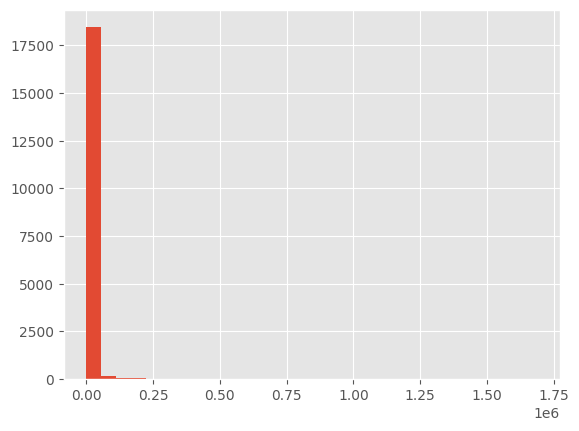

In [143]:
df.likeCount.hist(bins=30)

Если не особо виден, то можно посмотреть на лог шкалу:

<Axes: >

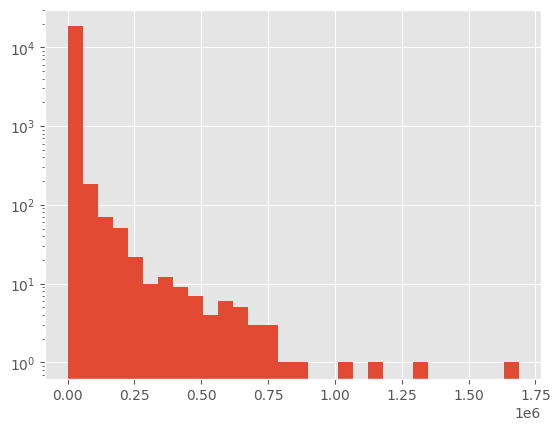

In [144]:
df.likeCount.hist(bins=30, log=True)

То есть у нас в выборке есть клипы с аномальным кол-вом лайков - так называемые хиты. Они то нам и портят всю статистику.  

Попробуем от них избавиться:

**Способ №1:** Откинем $1\%$ нашей выборки клипов, у которых больше всего лайков. Воспользуемся для этого $99\%$ персентилем.

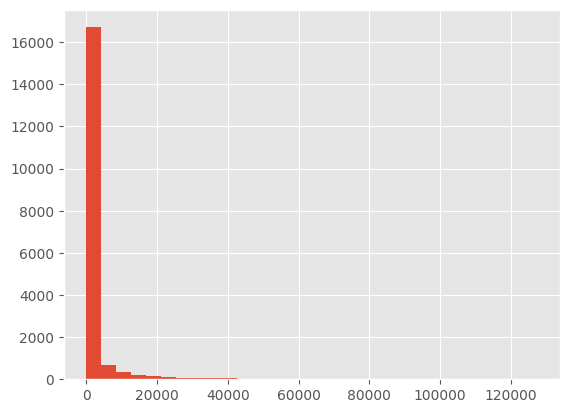

In [145]:
threshold = df.likeCount.quantile(0.99)
df_clear = df[df.likeCount <= threshold]

# визуализируем
df_clear.likeCount.hist(bins=30);

**Способ №2:** Считаем аномалиями все наблюдения, которые оказались за пределами трех межквартильных отклонений.  

### Задача №8:

Реализовать этот метод. Межквартильное отклонение - это разница между 25-м и 75-м перцентилями. 

In [52]:
## Ваш код

Стоит отметить, что иногда искать аномалии требуется не только для обработки данных. Порой, поиск аномалий $-$ это и есть задача. Так, например, аномалиями являются мошенники банка, чье поведение отличается от обычных пользователей. И поиск таких людей и является нашей задачей. 